## Interpreting abundances with chempy

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

/home/rybizki/anaconda3/lib/python3.6/site-packages/astropy/extern/bundled/six.py:60: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/rybizki/anaconda3/lib/python3.6/site-packages/astropy/extern/bundled/six.py' mode='r' encoding='utf-8'>
  class X(object):
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
data = Table.read('../data/STs_for_chempy.fits', format='fits')
el_names = data.colnames[3::2] # magic
err_names = data.colnames[4::2]
#star_name = "Proto-sun"
star_name = "Sun"
el_data = np.zeros(len(el_names))
err_data = np.zeros(len(el_names))
#el_data[0] = 0.04

In [4]:
from Chempy.solar_abundance import solar_abundances
from Chempy.parameter import ModelParameters
a = ModelParameters()
# These are the implemented solar abundances

print(a.solar_abundance_name_list)
print(a.solar_abundance_name)


# First we load the default solar abundances from Asplund 2009

basic_solar = solar_abundances()
getattr(basic_solar, a.solar_abundance_name)()

sun = basic_solar.table
for i, item in enumerate(el_names):
    #print(i,item,sun[np.where(sun['Symbol']==item)]['error'])
    err_data[i] = sun[np.where(sun['Symbol']==item)]['error']

['Lodders09', 'Asplund09', 'Asplund05_pure_solar', 'Asplund05_apogee_correction', 'AG89']
Asplund09


In [5]:
from Chempy.data_to_test import produce_wildcard_stellar_abundances

i = 0 # test
produce_wildcard_stellar_abundances(stellar_identifier = star_name, 
                                     age_of_star = 4.6,
                                     sigma_age = 0.1,
                                     element_symbols = el_names, 
                                     element_abundances = el_data,
                                     element_errors = err_data)

In [6]:
from Chempy.parameter import ModelParameters
from Chempy.cem_function import cem

a = ModelParameters()
a.testing_output = True
a.summary_pdf = True
a.stellar_identifier = star_name
a.observational_constraints_index = ['wildcard']

/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


[-2.29 -2.75 -0.8  -0.3   0.55  0.5 ]


/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


l:  -182.80779701761085 pr:  -0.000555555555556 po:  -182.808352573


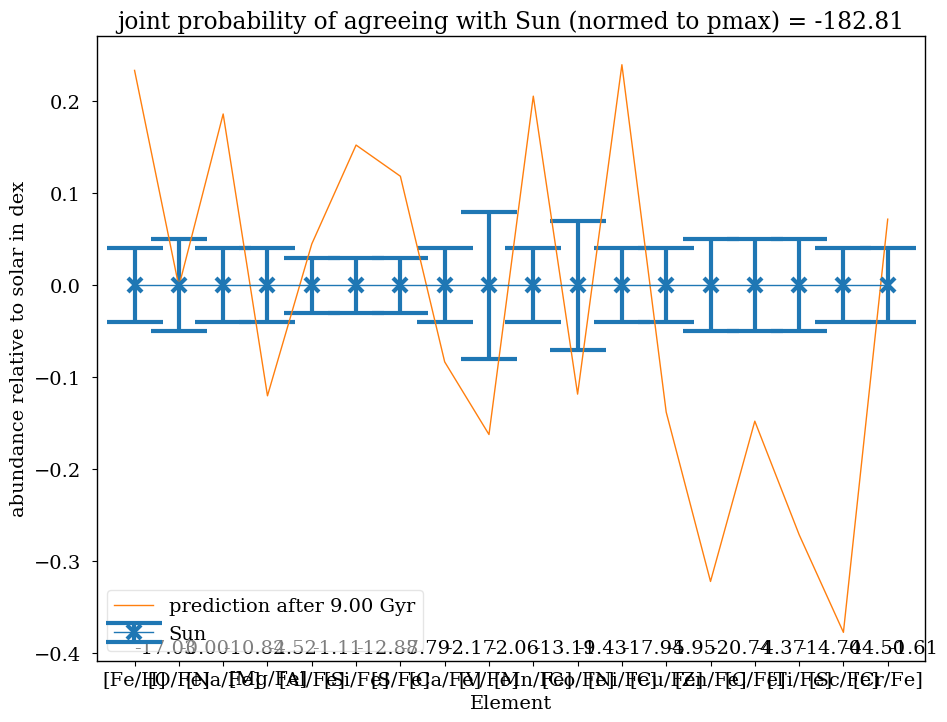

In [7]:
a.yield_table_name_sn2 = 'chieffi04_net'
a.yield_table_name_agb = 'Karakas_net_yield'
a.yield_table_name_1a = 'Seitenzahl'
a.sn2mmax = 40.
a.bhmmin = float(a.sn2mmax)
posterior, blobs = cem(a.p0,a)

In [8]:
from Chempy.wrapper import mcmc
a.testing_output = False
a.summary_pdf = False
a.nwalkers = 48
a.ndim = 6
print(a.to_optimize)
mcmc(a) 

['high_mass_slope' 'log10_N_0' 'log10_sn1a_time_delay'
 'log10_starformation_efficiency' 'log10_sfr_scale'
 'outflow_feedback_fraction']


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/optimization.py:58: DeprecationWarning: This function is deprecated. Please call randint(0, 1000000000.0 + 1) instead
  args = [(np.random.random_integers(low = 0, high = 1e9,size = 1),a,startpoint) for i in range(a.nwalkers)]
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see r

/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structu

/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structu

step  1 of  1000
9.18346071449 9.37610904251
calculation so far took 24.04317331314087  seconds
step  2 of  1000
9.18346071449 9.56661533263
calculation so far took 29.982914209365845  seconds
step  3 of  1000
9.18346071449 9.72907554364
calculation so far took 35.85127592086792  seconds
step  4 of  1000
9.18346071449 10.1006769748
calculation so far took 41.75343155860901  seconds
step  5 of  1000
9.18346071449 10.5462167144
calculation so far took 47.72042727470398  seconds
step  6 of  1000
9.18346071449 10.7416722127
calculation so far took 53.67129063606262  seconds
step  7 of  1000
9.18346071449 10.6108548898
calculation so far took 59.57367300987244  seconds
step  8 of  1000
9.18346071449 10.4720029995
calculation so far took 65.51471495628357  seconds
step  9 of  1000
9.18346071449 10.3578811018
calculation so far took 71.49070191383362  seconds
step  10 of  1000
9.18346071449 10.8056280911
calculation so far took 77.45971059799194  seconds
step  11 of  1000
9.18346071449 10.729

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 14.3799904746
calculation so far took 188.66012597084045  seconds
step  28 of  1000
9.18346071449 14.06433816
calculation so far took 194.72551560401917  seconds
step  29 of  1000


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

9.18346071449 14.1504414173
calculation so far took 200.8764352798462  seconds
step  30 of  1000
9.18346071449 14.3784877215
calculation so far took 206.94957089424133  seconds
step  31 of  1000
9.18346071449 14.4965713806
calculation so far took 213.02660632133484  seconds
step  32 of  1000
too few gas requested infall needed=  0.0192244613872 gas there =  1.63625509952e-05 total SFR =  [ 0.0001875   0.03632749  0.05895623  0.07176047  0.0776405   0.07875219
  0.07668461  0.0725971   0.06732488  0.06145998  0.05541332  0.04946195
  0.04378487  0.03849023  0.03363562  0.02924334  0.02531163  0.02182294
  0.01875   ] gas needed =  0.0192408237459 corona =  0.953942007363 sfe =  1.88804230117 dt =  0.5
too few gas requested infall needed=  0.0276968669712 gas there =  0.00352924936529 total SFR =  [ 0.0001875   0.03632749  0.05895623  0.07176047  0.0776405   0.07875219
  0.07668461  0.0725971   0.06732488  0.06145998  0.05541332  0.04946195
  0.04378487  0.03849023  0.03363562  0.0292433

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violat

9.18346071449 14.953852221
calculation so far took 231.95319747924805  seconds
step  35 of  1000


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 14.9311678439
calculation so far took 238.12767791748047  seconds
step  36 of  1000
9.18346071449 14.7975839825
calculation so far took 244.2602002620697  seconds
step  37 of  1000


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 14.9455269405
calculation so far took 250.4297740459442  seconds
step  38 of  1000
too few gas requested infall needed=  0.0167740128104 gas there =  1.22600967352e-05 total SFR =  [ 0.00017901  0.01790059  0.03129898  0.04104444  0.04784383  0.05228399
  0.05485079  0.05594516  0.05589684  0.05497594  0.05340267  0.05135568
  0.048979    0.04638792  0.04367394  0.04090896  0.03814873  0.03543577
  0.03280184] gas needed =  0.0167862727394 corona =  0.821259575751 sfe =  1.06638272809 dt =  0.5
too few gas requested infall needed=  0.0279478284438 gas there =  0.00140278078472 total SFR =  [ 0.00017901  0.01790059  0.03129898  0.04104444  0.04784383  0.05228399
  0.05485079  0.05594516  0.05589684  0.05497594  0.05340267  0.05135568
  0.048979    0.04638792  0.04367394  0.04090896  0.03814873  0.03543577
  0.03280184] gas needed =  0.0293506089491 corona =  0.83897420092 sfe =  1.06638272809 dt =  0.5
too few gas requested infall needed=  0.0359232745245 gas there =  0.00

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 15.0317422043
calculation so far took 262.87239027023315  seconds
step  40 of  1000
9.18346071449 15.3241577992
calculation so far took 268.99048042297363  seconds
step  41 of  1000
9.18346071449 15.1518198802
calculation so far took 275.11386942863464  seconds
step  42 of  1000
9.18346071449 15.1904734733
calculation so far took 281.2092390060425  seconds
step  43 of  1000
9.18346071449 15.3483196239
calculation so far took 287.30619382858276  seconds
step  44 of  1000
9.18346071449 15.2090921406
calculation so far took 293.4097318649292  seconds
step  45 of  1000
9.18346071449 15.1876881317
calculation so far took 299.51804852485657  seconds
step  46 of  1000
too few gas requested infall needed=  0.0178704977047 gas there =  2.4608579e-05 total SFR =  [ 0.00018761  0.01876098  0.03266299  0.04264986  0.04950245 

  0.0319613 ] gas needed =  0.0304861951887 corona =  1.14984784847 sfe =  1.04838613888 dt =  0.5
too few gas requested infall needed=  0.00849115716724 gas there =  1.36080162925e-05 total SFR =  [  9.61042464e-05   9.61042464e-03   1.76802390e-02   2.43946700e-02
   2.99191493e-02   3.44012965e-02   3.79727119e-02   4.07505956e-02
   4.28392112e-02   4.43312059e-02   4.53088034e-02   4.58448795e-02
   4.60039321e-02   4.58429564e-02   4.54122330e-02   4.47560384e-02
   4.39132843e-02   4.29180929e-02   4.18003151e-02] gas needed =  0.00850476509862 corona =  0.693428859156 sfe =  1.1300047125 dt =  0.5
too few gas requested infall needed=  0.0141917898929 gas there =  0.00145437416664 total SFR =  [  9.61042464e-05   9.61042464e-03   1.76802390e-02   2.43946700e-02
   2.99191493e-02   3.44012965e-02   3.79727119e-02   4.07505956e-02
   4.28392112e-02   4.43312059e-02   4.53088034e-02   4.58448795e-02
   4.60039321e-02   4.58429564e-02   4.54122330e-02   4.47560384e-02
   4.39132843e

too few gas requested infall needed=  0.0298217599695 gas there =  0.00815869508835 total SFR =  [  9.61042464e-05   9.61042464e-03   1.76802390e-02   2.43946700e-02
   2.99191493e-02   3.44012965e-02   3.79727119e-02   4.07505956e-02
   4.28392112e-02   4.43312059e-02   4.53088034e-02   4.58448795e-02
   4.60039321e-02   4.58429564e-02   4.54122330e-02   4.47560384e-02
   4.39132843e-02   4.29180929e-02   4.18003151e-02] gas needed =  0.0379804547596 corona =  0.981094215038 sfe =  1.1300047125 dt =  0.5
too few gas requested infall needed=  0.0290867707438 gas there =  0.00790450461467 total SFR =  [  9.61042464e-05   9.61042464e-03   1.76802390e-02   2.43946700e-02
   2.99191493e-02   3.44012965e-02   3.79727119e-02   4.07505956e-02
   4.28392112e-02   4.43312059e-02   4.53088034e-02   4.58448795e-02
   4.60039321e-02   4.58429564e-02   4.54122330e-02   4.47560384e-02
   4.39132843e-02   4.29180929e-02   4.18003151e-02] gas needed =  0.0369912750676 corona =  1.00016648122 sfe =  1.

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


too few gas requested infall needed=  0.0105074982354 gas there =  0.00330207980073 total SFR =  [ 0.00022665  0.02266492  0.03875271  0.04969484  0.05664584  0.06053353
  0.06210052  0.0619384   0.06051596  0.05820233  0.05528609  0.0519908
  0.04848786  0.0449069   0.04134431  0.03787014  0.03453374  0.03136827
  0.02839436] gas needed =  0.0138095779311 corona =  0.887878397872 sfe =  2.80621982714 dt =  0.5
too few gas requested infall needed=  0.0117798811627 gas there =  0.00592893939073 total SFR =  [ 0.00022665  0.02266492  0.03875271  0.04969484  0.05664584  0.06053353
  0.06210052  0.0619384   0.06051596  0.05820233  0.05528609  0.0519908
  0.04848786  0.0449069   0.04134431  0.03787014  0.03453374  0.03136827
  0.02839436] gas needed =  0.0177088204356 corona =  0.908699992678 sfe =  2.80621982714 dt =  0.5
gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


too few gas requested infall needed=  0.0122887268639 gas there =  0.00789709068618 total SFR =  [ 0.00022665  0.02266492  0.03875271  0.04969484  0.05664584  0.06053353
  0.06210052  0.0619384   0.06051596  0.05820233  0.05528609  0.0519908
  0.04848786  0.0449069   0.04134431  0.03787014  0.03453374  0.03136827
  0.02839436] gas needed =  0.0201858174272 corona =  0.930418184307 sfe =  2.80621982714 dt =  0.5
too few gas requested infall needed=  0.0123314760401 gas there =  0.00923972500073 total SFR =  [ 0.00022665  0.02266492  0.03875271  0.04969484  0.05664584  0.06053353
  0.06210052  0.0619384   0.06051596  0.05820233  0.05528609  0.0519908
  0.04848786  0.0449069   0.04134431  0.03787014  0.03453374  0.03136827
  0.02839436] gas needed =  0.0215712009176 corona =  0.95259901444 sfe =  2.80621982714 dt =  0.5
too few gas requested infall needed=  0.0119818996873 gas there =  0.0101476992103 total SFR =  [ 0.00022665  0.02266492  0.03875271  0.04969484  0.05664584  0.06053353
  

  0.03017989] gas needed =  0.054483049405 corona =  0.935676939111 sfe =  1.04988154923 dt =  0.5
too few gas requested infall needed=  0.0490563324478 gas there =  0.00734506304004 total SFR =  [ 0.00020656  0.02065584  0.03563856  0.04611674  0.05304501  0.05720075
  0.05921478  0.05959696  0.05875749  0.0570247   0.05465975  0.05186896
  0.04881388  0.04561972  0.0423823   0.03917373  0.03604714  0.03304053
  0.03017989] gas needed =  0.0564013949973 corona =  0.95893815188 sfe =  1.04988154923 dt =  0.5
too few gas requested infall needed=  0.0490348278544 gas there =  0.00773058904285 total SFR =  [ 0.00020656  0.02065584  0.03563856  0.04611674  0.05304501  0.05720075
  0.05921478  0.05959696  0.05875749  0.0570247   0.05465975  0.05186896
  0.04881388  0.04561972  0.0423823   0.03917373  0.03604714  0.03304053
  0.03017989] gas needed =  0.0567654164069 corona =  0.982074770603 sfe =  1.04988154923 dt =  0.5
too few gas requested infall needed=  0.0480379160496 gas there =  0.0

  0.032145  ] gas needed =  0.0365546225175 corona =  0.884379479157 sfe =  1.34427248315 dt =  0.5
too few gas requested infall needed=  0.0644546240611 gas there =  0.00825202838627 total SFR =  [ 0.00016907  0.03974554  0.06377376  0.07674622  0.08209551  0.08232905
  0.07926073  0.07418712  0.06802118  0.06139322  0.05472699  0.04829675
  0.0422698   0.03673804  0.03174127  0.0272842   0.02334875  0.0199029
  0.01690688] gas needed =  0.0727066518028 corona =  1.05276288203 sfe =  1.12913345776 dt =  0.5
too few gas requested infall needed=  0.0319705699777 gas there =  0.00784279096368 total SFR =  [ 0.00018571  0.0185712   0.03236284  0.04229747  0.04913937  0.05352001
  0.05595951  0.05688493  0.05664554  0.05552579  0.05375622  0.05152262
  0.04897371  0.04622763  0.04337734  0.04049511  0.03763638  0.03484282
  0.032145  ] gas needed =  0.0398133606217 corona =  0.905210169971 sfe =  1.34427248315 dt =  0.5
too few gas requested infall needed=  0.06372546029 gas there =  0.009

  0.032145  ] gas needed =  0.0343885888583 corona =  1.06819016732 sfe =  1.34427248315 dt =  0.5
too few gas requested infall needed=  0.0192200260072 gas there =  0.00494381577052 total SFR =  [ 0.00016907  0.03974554  0.06377376  0.07674622  0.08209551  0.08232905
  0.07926073  0.07418712  0.06802118  0.06139322  0.05472699  0.04829675
  0.0422698   0.03673804  0.03174127  0.0272842   0.02334875  0.0199029
  0.01690688] gas needed =  0.0241638415855 corona =  1.23691774429 sfe =  1.12913345776 dt =  0.5
too few gas requested infall needed=  0.0162517183612 gas there =  0.00442675128776 total SFR =  [ 0.00016907  0.03974554  0.06377376  0.07674622  0.08209551  0.08232905
  0.07926073  0.07418712  0.06802118  0.06139322  0.05472699  0.04829675
  0.0422698   0.03673804  0.03174127  0.0272842   0.02334875  0.0199029
  0.01690688] gas needed =  0.0206784694865 corona =  1.24594600416 sfe =  1.12913345776 dt =  0.5
too few gas requested infall needed=  0.023715184748 gas there =  0.00855

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
too few gas requested infall needed=  0.01536074627 gas there =  2.47549668128e-05 total SFR =  [ 0.00019007  0.01900747  0.03305225  0.04310612  0.04997173  0.05431015
  0.05666422  0.05747809  0.05711379  0.05586504  0.05396899  0.05161591
  0.04895746  0.04611345  0.04317764  0.04022248  0.03730304  0.03446036
  0.03172415] gas needed =  0.0153855010832 corona =  0.833347619536 sfe =  1.23541469953 dt =  0.5
too few gas requested infall needed=  0.0240926367839 gas there =  0.00266133700886 total SFR =  [ 0.00019007  0.01900747  0.03305225  0.04310612  0.04997173  0.05431015
  0.05666422  0.05747809  0.05711379  0.05586504  0.05396899  0.05161591
  0.04895746  0.04611345  0.04317764  0.04022248  0.03730304  0.03446036
  0.03172415] gas needed =  0.0267539735518 corona =  0.850993732975 sfe =  1.23541469953 dt =  0.5
too few gas requested infall needed=  0.0300607691969 gas there =  0.00483125851983 total SFR =  [ 0.00019007  0.01900747  0.03305225  0.04310612 

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
9.18346071449 15.3995867369
calculation so far took 325.10057497024536  seconds
step  50 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


9.18346071449 15.3073018176
calculation so far took 331.2670683860779  seconds
step  51 of  1000
too few gas requested infall needed=  0.00796949964783 gas there =  1.36592943503e-05 total SFR =  [ 0.00013237  0.0132371   0.02375284  0.03196684  0.03824117  0.04288782
  0.04617512  0.04833343  0.04956012  0.05002391  0.04986868  0.0492168
  0.04817201  0.04682196  0.04524047  0.04348937  0.04162024  0.03967586
  0.03769144] gas needed =  0.00798315886249 corona =  0.75938578 sfe =  1.65812793991 dt =  0.5
too few gas requested infall needed=  0.0128295653 gas there =  0.00149553130298 total SFR =  [ 0.00013237  0.0132371   0.02375284  0.03196684  0.03824117  0.04288782
  0.04617512  0.04833343  0.04956012  0.05002391  0.04986868  0.0492168
  0.04817201  0.04682196  0.04524047  0.04348937  0.04162024  0.03967586
  0.03769144] gas needed =  0.0143250964747 corona =  0.77388987366 sfe =  1.65812793991 dt =  0.5
too few gas requested infall needed=  0.0165133975488 gas there =  0.002765473

  0.03186282] gas needed =  0.0309690313633 corona =  0.849342852578 sfe =  1.05991013999 dt =  0.5
too few gas requested infall needed=  0.0355915075446 gas there =  0.00482620243344 total SFR =  [ 0.00018863  0.01886313  0.03282439  0.04283914  0.04969724  0.05404993
  0.05643249  0.0572834   0.05696047  0.05575437  0.05390006  0.05158634
  0.04896391  0.04615205  0.04324427  0.04031295  0.03741331  0.0345866
  0.03186282] gas needed =  0.0404177096221 corona =  0.868548040197 sfe =  1.05991013999 dt =  0.5
too few gas requested infall needed=  0.0403754851225 gas there =  0.00651268220689 total SFR =  [ 0.00018863  0.01886313  0.03282439  0.04283914  0.04969724  0.05404993
  0.05643249  0.0572834   0.05696047  0.05575437  0.05390006  0.05158634
  0.04896391  0.04615205  0.04324427  0.04031295  0.03741331  0.0345866
  0.03186282] gas needed =  0.0468881669256 corona =  0.889116582158 sfe =  1.05991013999 dt =  0.5
too few gas requested infall needed=  0.0432460121111 gas there =  0.0

  0.03910043] gas needed =  0.0308098999569 corona =  0.78090351476 sfe =  1.15035437204 dt =  0.5
too few gas requested infall needed=  0.0295626740845 gas there =  0.00527020549447 total SFR =  [ 0.00011976  0.01197553  0.02166276  0.02938963  0.0354423   0.04007015
  0.04349019  0.04589097  0.04743602  0.04826695  0.0485061   0.04825898
  0.04761631  0.04665594  0.04544444  0.04403855  0.04248649  0.04082901
  0.03910043] gas needed =  0.0348328792833 corona =  0.798153251527 sfe =  1.15035437204 dt =  0.5
too few gas requested infall needed=  0.0317266973618 gas there =  0.00607921279707 total SFR =  [ 0.00011976  0.01197553  0.02166276  0.02938963  0.0354423   0.04007015
  0.04349019  0.04589097  0.04743602  0.04826695  0.0485061   0.04825898
  0.04761631  0.04665594  0.04544444  0.04403855  0.04248649  0.04082901
  0.03910043] gas needed =  0.0378059098416 corona =  0.816491721836 sfe =  1.15035437204 dt =  0.5
too few gas requested infall needed=  0.0331774595962 gas there =  0.

  0.03315228] gas needed =  0.0507172902245 corona =  0.884366546855 sfe =  1.06974683891 dt =  0.5
too few gas requested infall needed=  0.0439102711826 gas there =  0.00791191860471 total SFR =  [ 0.00017548  0.01754774  0.03073719  0.04038018  0.04715415  0.05162296
  0.05425466  0.05543662  0.05548833  0.05467227  0.05320317  0.05125581
  0.04897163  0.04646433  0.04382453  0.04112381  0.03841803  0.03575007
  0.03315228] gas needed =  0.0518221893482 corona =  0.897324015535 sfe =  1.06974683891 dt =  0.5
too few gas requested infall needed=  0.0434703836438 gas there =  0.00840014008833 total SFR =  [ 0.00017548  0.01754774  0.03073719  0.04038018  0.04715415  0.05162296
  0.05425466  0.05543662  0.05548833  0.05467227  0.05320317  0.05125581
  0.04897163  0.04646433  0.04382453  0.04112381  0.03841803  0.03575007
  0.03315228] gas needed =  0.0518705232974 corona =  0.910154174062 sfe =  1.06974683891 dt =  0.5
too few gas requested infall needed=  0.0424619276689 gas there =  0

  0.04059457] gas needed =  0.0434996529041 corona =  0.834861068871 sfe =  1.03428970268 dt =  0.5
too few gas requested infall needed=  0.0395529257614 gas there =  0.0051107083849 total SFR =  [ 0.00010662  0.01066173  0.01946138  0.02664284  0.03242164  0.036988
  0.04050958  0.04313406  0.04499124  0.04619514  0.04684567  0.04703032
  0.04682548  0.04629777  0.04550514  0.04449789  0.04331955  0.04200767
  0.04059457] gas needed =  0.0446636337508 corona =  0.856180909905 sfe =  1.03428970268 dt =  0.5
too few gas requested infall needed=  0.0399905030402 gas there =  0.00530210067371 total SFR =  [ 0.00010662  0.01066173  0.01946138  0.02664284  0.03242164  0.036988
  0.04050958  0.04313406  0.04499124  0.04619514  0.04684567  0.04703032
  0.04682548  0.04629777  0.04550514  0.04449789  0.04331955  0.04200767
  0.04059457] gas needed =  0.0452926033141 corona =  0.877806916674 sfe =  1.03428970268 dt =  0.5
too few gas requested infall needed=  0.0400165796675 gas there =  0.0054

  0.03245154] gas needed =  0.0377508985723 corona =  1.01281698459 sfe =  1.41968824903 dt =  0.5
too few gas requested infall needed=  0.0265179955467 gas there =  0.00972092885947 total SFR =  [ 0.00018257  0.01825671  0.03186455  0.04171136  0.04853426  0.05294363
  0.05544345  0.0564485   0.05629886  0.05527229  0.05359451  0.05144797
  0.04897925  0.04630518  0.04351807  0.04069004  0.0378767   0.03512015
  0.03245154] gas needed =  0.036238924141 corona =  1.03339750717 sfe =  1.41968824903 dt =  0.5
too few gas requested infall needed=  0.024952958362 gas there =  0.00954704816138 total SFR =  [ 0.00018257  0.01825671  0.03186455  0.04171136  0.04853426  0.05294363
  0.05544345  0.0564485   0.05629886  0.05527229  0.05359451  0.05144797
  0.04897925  0.04630518  0.04351807  0.04069004  0.0378767   0.03512015
  0.03245154] gas needed =  0.0345000062738 corona =  1.05321336783 sfe =  1.41968824903 dt =  0.5
too few gas requested infall needed=  0.0235271546374 gas there =  0.0090

  0.04035682] gas needed =  0.029903909455 corona =  0.940621986166 sfe =  1.57059298452 dt =  0.5
too few gas requested infall needed=  0.0241519473032 gas there =  0.00537118372978 total SFR =  [ 0.0001087   0.01086963  0.01981148  0.02708199  0.03290726  0.03748643
  0.04099469  0.04358597  0.04539531  0.04654102  0.04712656  0.04724227
  0.04696687  0.04636882  0.04550751  0.04443433  0.04319363  0.04182356
  0.04035682] gas needed =  0.0295231307914 corona =  0.96362576359 sfe =  1.57059298452 dt =  0.5
too few gas requested infall needed=  0.0236504972489 gas there =  0.00532423508189 total SFR =  [ 0.0001087   0.01086963  0.01981148  0.02708199  0.03290726  0.03748643
  0.04099469  0.04358597  0.04539531  0.04654102  0.04712656  0.04724227
  0.04696687  0.04636882  0.04550751  0.04443433  0.04319363  0.04182356
  0.04035682] gas needed =  0.0289747320943 corona =  0.986227705536 sfe =  1.57059298452 dt =  0.5
too few gas requested infall needed=  0.023021404797 gas there =  0.00

  0.04132073] gas needed =  0.0388548105594 corona =  0.935887983192 sfe =  1.17015906744 dt =  0.5
too few gas requested infall needed=  0.0314746224116 gas there =  0.00669707517958 total SFR =  [ 0.00010028  0.01002829  0.01839036  0.02529385  0.03092339  0.03544301
  0.03899827  0.0417182   0.04371706  0.04509588  0.0459439   0.04633978
  0.0463528   0.04604384  0.04546631  0.04466696  0.04368663  0.04256091
  0.04132073] gas needed =  0.0381716972764 corona =  0.956158688204 sfe =  1.17015906744 dt =  0.5
too few gas requested infall needed=  0.0307545620221 gas there =  0.00657936290772 total SFR =  [ 0.00010028  0.01002829  0.01839036  0.02529385  0.03092339  0.03544301
  0.03899827  0.0417182   0.04371706  0.04509588  0.0459439   0.04633978
  0.0463528   0.04604384  0.04546631  0.04466696  0.04368663  0.04256091
  0.04132073] gas needed =  0.0373339246223 corona =  0.976027443201 sfe =  1.17015906744 dt =  0.5
too few gas requested infall needed=  0.0298836881328 gas there =  0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.0120488641534 gas there =  2.13379584237e-05 total SFR =  [ 0.00020882  0.03277645  0.05385614  0.0663697   0.07270294  0.07466298
  0.07360884  0.07055375  0.06624535  0.06122818  0.05589233  0.05051126
  0.04527101  0.04029263  0.03564952  0.03138053  0.02749998  0.02400516
  0.02088198] gas needed =  0.0120702019913 corona =  0.936421090417 sfe =  2.71548440602 dt =  0.5
too few gas requested infall needed=  0.0161634127725 gas there =  0.00366956415506 total SFR =  [ 0.00020882  0.03277645  0.05385614  0.0663697   0.07270294  0.07466298
  0.07360884  0.07055375  0.06624535  0.06122818  0.05589233  0.05051126
  0.04527101  0.04029263  0.03564952  0.03138053  0.02749998  0.02400516
  0.02088198] gas needed =  0.0198329767659 corona =  0.964572508369 sfe =  2.71548440602 dt =  0.5
too few gas requested infall needed=  0.0358697536261 gas there =  2.24519160857e-05 total SFR =  [ 0.0001851   0.03675212  0.05955952  0.07239044  0.07820936  0.07921

  0.01851032]too few gas requested infall needed=  0.0105658757655 gas there =  0.00803532244585 total SFR =  [ 0.00020882  0.03277645  0.05385614  0.0663697   0.07270294  0.07466298
  0.07360884  0.07055375  0.06624535  0.06122818  0.05589233  0.05051126
  0.04527101  0.04029263  0.03564952  0.03138053  0.02749998  0.02400516
  0.02088198] gas needed =  0.0540441918738 corona =  1.20745411505 sfe =  1.02395831726 dt =  0.5
 gas needed =  0.0186011981057 corona =  1.19028228545 sfe =  2.71548440602 dt =  0.5
too few gas requested infall needed=  0.00926513557022 gas there =  0.00740629433923 total SFR =  [ 0.00020882  0.03277645  0.05385614  0.0663697   0.07270294  0.07466298
  0.07360884  0.07055375  0.06624535  0.06122818  0.05589233  0.05051126
  0.04527101  0.04029263  0.03564952  0.03138053  0.02749998  0.02400516
  0.02088198]too few gas requested infall needed=  0.0389606258185 gas there =  0.00920979949945 total SFR =  [ 0.0001851   0.03675212  0.05955952  0.07239044  0.0782093

  0.02332147] gas needed =  0.0544753658776 corona =  1.00352538975 sfe =  1.23521593444 dt =  0.5
too few gas requested infall needed=  0.0500314666669 gas there =  0.00666834570957 total SFR =  [ 0.00023321  0.0291386   0.04852551  0.06060841  0.06728884  0.07003651
  0.06998053  0.06798223  0.06469323  0.06060142  0.05606757  0.05135419
  0.04664831  0.04207939  0.03773337  0.03366358  0.02989926  0.02645214
  0.02332147] gas needed =  0.0566998118761 corona =  1.03411051394 sfe =  1.23521593444 dt =  0.5
too few gas requested infall needed=  0.0495746605414 gas there =  0.00707982717806 total SFR =  [ 0.00023321  0.0291386   0.04852551  0.06060841  0.06728884  0.07003651
  0.06998053  0.06798223  0.06469323  0.06060142  0.05606757  0.05135419
  0.04664831  0.04207939  0.03773337  0.03366358  0.02989926  0.02645214
  0.02332147] gas needed =  0.0566544872237 corona =  1.06412955721 sfe =  1.23521593444 dt =  0.5
too few gas requested infall needed=  0.04783933324 gas there =  0.0071

  0.03596762] gas needed =  0.0459632979072 corona =  0.874699205706 sfe =  1.07328443713 dt =  0.5
too few gas requested infall needed=  0.0378026889145 gas there =  0.00985833250551 total SFR =  [ 0.00014823  0.0148234   0.02635016  0.03513014  0.04163169  0.04625295
  0.04933169  0.05115383  0.05196076  0.05195572  0.05130932  0.05016425
  0.0486394   0.0468334   0.04482763  0.04268884  0.04047142  0.0382193
  0.03596762] gas needed =  0.047661021042 corona =  0.896791682509 sfe =  1.07328443713 dt =  0.5
too few gas requested infall needed=  0.0380298905528 gas there =  0.0103829608831 total SFR =  [ 0.00014823  0.0148234   0.02635016  0.03513014  0.04163169  0.04625295
  0.04933169  0.05115383  0.05196076  0.05195572  0.05130932  0.05016425
  0.0486394   0.0468334   0.04482763  0.04268884  0.04047142  0.0382193
  0.03596762] gas needed =  0.0484128510556 corona =  0.919256921181 sfe =  1.07328443713 dt =  0.5
too few gas requested infall needed=  0.0377940948983 gas there =  0.010

   4.47463848e-02   4.44519283e-02   4.40066088e-02] gas needed =  0.0326902614007 corona =  0.717229710562 sfe =  1.09669079429 dt =  0.5
too few gas requested infall needed=  0.0303287118943 gas there =  0.00460253250812 total SFR =  [  7.66623754e-05   7.66623754e-03   1.43356035e-02   2.01053183e-02
   2.50641743e-02   2.92932211e-02   3.28663964e-02   3.58511087e-02
   3.83087738e-02   4.02953087e-02   4.18615872e-02   4.30538595e-02
   4.39141381e-02   4.44805535e-02   4.47876814e-02   4.48668435e-02
   4.47463848e-02   4.44519283e-02   4.40066088e-02] gas needed =  0.0349312440991 corona =  0.732604672259 sfe =  1.09669079429 dt =  0.5
too few gas requested infall needed=  0.0317793822144 gas there =  0.00496325232375 total SFR =  [  7.66623754e-05   7.66623754e-03   1.43356035e-02   2.01053183e-02
   2.50641743e-02   2.92932211e-02   3.28663964e-02   3.58511087e-02
   3.83087738e-02   4.02953087e-02   4.18615872e-02   4.30538595e-02
   4.39141381e-02   4.44805535e-02   4.478768

  0.02386903] gas needed =  0.039769100695 corona =  1.01238861134 sfe =  1.73881899476 dt =  0.5
too few gas requested infall needed=  0.03436965833 gas there =  0.00437709742216 total SFR =  [ 0.00023869  0.02837494  0.0473923   0.05936655  0.06610333  0.06900429
  0.06915127  0.06737359  0.06430199  0.06041152  0.05605573  0.05149386
  0.04691231  0.0424416   0.03816974  0.03415271  0.03042263  0.02699407
  0.02386903] gas needed =  0.0387467554085 corona =  1.02947590716 sfe =  1.73881899476 dt =  0.5
too few gas requested infall needed=  0.0325946583765 gas there =  0.00438561125064 total SFR =  [ 0.00023869  0.02837494  0.0473923   0.05936655  0.06610333  0.06900429
  0.06915127  0.06737359  0.06430199  0.06041152  0.05605573  0.05149386
  0.04691231  0.0424416   0.03816974  0.03415271  0.03042263  0.02699407
  0.02386903] gas needed =  0.0369802693012 corona =  1.04556149239 sfe =  1.73881899476 dt =  0.5
too few gas requested infall needed=  0.0303961928857 gas there =  0.00434

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: outflow_feedback_fraction upper border is violated


too few gas requested infall needed=  0.0207339416743 gas there =  1.41076260187e-05 total SFR =  [ 0.00025318  0.0253185   0.04280514  0.05427692  0.06117613  0.06464278
  0.06557364  0.06467019  0.06247757  0.05941617  0.05580719  0.05189325
  0.04785502  0.04382457  0.03989609  0.03613446  0.03258205  0.02926411
  0.0261931 ] gas needed =  0.020748049093 corona =  0.889417655948 sfe =  1.22028317054 dt =  0.5
9.18346071449 15.1431413836
calculation so far took 389.85983896255493  seconds
step  60 of  1000
too few gas requested infall needed=  0.0334156998434 gas there =  0.00166233857422 total SFR =  [ 0.00025318  0.0253185   0.04280514  0.05427692  0.06117613  0.06464278
  0.06557364  0.06467019  0.06247757  0.05941617  0.05580719  0.05189325
  0.04785502  0.04382457  0.03989609  0.03613446  0.03258205  0.02926411
  0.0261931 ] gas needed =  0.0350780380835 corona =  0.910571121441 sfe =  1.22028317054 dt =  0.5
too few gas requested infall needed=  0.0414489360847 gas there =  0.0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: outflow_feedback_fraction upper border is violated
Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in poster

9.18346071449 15.028789601
calculation so far took 395.9963376522064  seconds
step  61 of  1000
too few gas requested infall needed=  0.0205023529933 gas there =  2.62475399362e-05 total SFR =  [ 0.0002217   0.0221697   0.03798888  0.04882188  0.05577247  0.05973056
  0.06141076  0.06138439  0.06010582  0.0579343   0.05515183  0.05197796
  0.0485819   0.04509239  0.04160587  0.03819307  0.03490438  0.03177427
  0.02882477] gas needed =  0.0205286003282 corona =  0.863858816142 sfe =  1.07994221924 dt =  0.5
too few gas requested infall needed=  0.0323346683677 gas there =  0.00284210581606 total SFR =  [ 0.0002217   0.0221697   0.03798888  0.04882188  0.05577247  0.05973056
  0.06141076  0.06138439  0.06010582  0.0579343   0.05515183  0.05197796
  0.0485819   0.04509239  0.04160587  0.03819307  0.03490438  0.03177427
  0.02882477] gas needed =  0.0351767738604 corona =  0.883699730336 sfe =  1.07994221924 dt =  0.5
too few gas requested infall needed=  0.0401071043081 gas there =  0.00

   1.17189558e-02   9.20351682e-03   7.20299889e-03] gas needed =  0.0951665885033 corona =  1.08943645042 sfe =  1.05928074223 dt =  0.5
too few gas requested infall needed=  0.0961743844109 gas there =  0.00934001176116 total SFR =  [  7.20299889e-05   6.81914034e-02   1.00808135e-01   1.11769367e-01
   1.10153292e-01   1.01775548e-01   9.02735763e-02   7.78472707e-02
   6.57614366e-02   5.46839362e-02   4.49110504e-02   3.65158867e-02
   2.94446479e-02   2.35778623e-02   1.87683055e-02   1.48636079e-02
   1.17189558e-02   9.20351682e-03   7.20299889e-03] gas needed =  0.10551439521 corona =  1.12432138747 sfe =  1.05928074223 dt =  0.5
too few gas requested infall needed=  0.0930599492291 gas there =  0.0109288128524 total SFR =  [  7.20299889e-05   6.81914034e-02   1.00808135e-01   1.11769367e-01
   1.10153292e-01   1.01775548e-01   9.02735763e-02   7.78472707e-02
   6.57614366e-02   5.46839362e-02   4.49110504e-02   3.65158867e-02
   2.94446479e-02   2.35778623e-02   1.87683055e-0

   1.17189558e-02   9.20351682e-03   7.20299889e-03] gas needed =  0.00679989600542 corona =  1.32460370938 sfe =  1.05928074223 dt =  0.5
gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
9.18346071449 14.8708524238
calculation so far took 402.26045536994934  seconds
step  62 of  1000
too few gas requested infall needed=  0.0175476283714 gas there =  3.23399553669e-05 total SFR =  [ 0.00024997  0.0268559   0.04512296  0.05686129  0.06369177  0.06688384
  0.06742646  0.06608532  0.06344901  0.05996602  0.05597455  0.05172627
  0.04740538  0.04314372  0.03903284  0.03513349  0.03148313  0.02810184
  0.0249969 ] gas needed =  0.0175799681513 corona =  0.900478632364 sfe =  1.52764201422 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0257996381629 gas there =  0.00373801345805 total SFR =  [ 0.00024997  0.0268559   0.04512296  0.05686129  0.06369177  0.06688384
  0.06742646  0.06608532  0.06344901  0.05996602  0.05597455  0.05172627
  0.04740538  0.04314372  0.03903284  0.03513349  0.03148313  0.02810184
  0.0249969 ] gas needed =  0.029537651363 corona =  0.921953684199 sfe =  1.52764201422 dt =  0.5
gas reservoir is empty
t

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 700, in extract_parameters_and_priors
    assert False, '%s lower border is violated' %(name)
AssertionError: outflow_feedback_fraction lower border is violated


gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
gas reservoir is empty
9.18346071449 14.8359371532
calculation so far took 408.4735677242279  seconds
step  63 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 14.890522371
calculation so far took 414.68786573410034  seconds
step  64 of  1000
too few gas requested infall needed=  0.0195674045509 gas there =  3.81075582234e-05 total SFR =  [ 0.0002067   0.0206699   0.03566049  0.04614212  0.05307074  0.05722478
  0.0592358   0.05961424  0.0587707   0.0570338   0.05466492  0.05187049
  0.04881214  0.04561512  0.04237527  0.03916468  0.03603647  0.0330286
  0.03016703] gas needed =  0.0196055119134 corona =  0.850048909616 sfe =  1.05429029611 dt =  0.5
too few gas requested infall needed=  0.02981

too few gas requested infall needed=  0.0393530413106 gas there =  2.17243768218e-05 total SFR =  [ 0.00016182  0.04119523  0.0657909   0.07880358  0.08390224  0.08374762
  0.08024954  0.07476154  0.06822744  0.06129153  0.05438095  0.04776705
  0.04161078  0.03599621  0.03095497  0.02648393  0.02255797  0.01913894
  0.01618193] gas needed =  0.0393747652939 corona =  0.974419931226 sfe =  1.04623433643 dt =  0.5
too few gas requested infall needed=  0.0569540865361 gas there =  0.00592943472538 total SFR =  [ 0.00016182  0.04119523  0.0657909   0.07880358  0.08390224  0.08374762
  0.08024954  0.07476154  0.06822744  0.06129153  0.05438095  0.04776705
  0.04161078  0.03599621  0.03095497  0.02648393  0.02255797  0.01913894
  0.01618193] gas needed =  0.062883520692 corona =  1.00384055377 sfe =  1.04623433643 dt =  0.5
too few gas requested infall needed=  0.0652409038491 gas there =  0.0100802538648 total SFR =  [ 0.00016182  0.04119523  0.0657909   0.07880358  0.08390224  0.08374762


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


9.18346071449 15.1810262789
calculation so far took 433.4671025276184  seconds
step  67 of  1000
too few gas requested infall needed=  0.0296952921256 gas there =  1.34074854989e-05 total SFR =  [ 0.00014834  0.04407623  0.06975482  0.08279522  0.08735419  0.08640394
  0.08204547  0.07574277  0.06849721  0.06097688  0.05361206  0.0466654
  0.04028314  0.03453228  0.02942725  0.02494897  0.0210582   0.01770475
  0.01483383] gas needed =  0.0297086993142 corona =  0.984962152802 sfe =  1.48361349231 dt =  0.5
too few gas requested infall needed=  0.0426023703785 gas there =  0.00441446817256 total SFR =  [ 0.00014834  0.04407623  0.06975482  0.08279522  0.08735419  0.08640394
  0.08204547  0.07574277  0.06849721  0.06097688  0.05361206  0.0466654
  0.04028314  0.03453228  0.02942725  0.02494897  0.0210582   0.01770475
  0.01483383] gas needed =  0.047016838125 corona =  1.01762199094 sfe =  1.48361349231 dt =  0.5
too few gas requested infall needed=  0.0483599160113 gas there =  0.00744

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.026412542596 gas there =  3.55644879519e-05 total SFR =  [ 0.00024139  0.02800541  0.04684212  0.05876143  0.06552329  0.0684968
  0.06874104  0.06706987  0.06410384  0.06031164  0.05604323  0.05155615
  0.04703635  0.04261478  0.03838041  0.03439041  0.03067826  0.0272599
  0.02413861] gas needed =  0.0264481068198 corona =  0.908227356785 sfe =  1.05888153732 dt =  0.5
too few gas requested infall needed=  0.0398375566391 gas there =  0.00439980025568 total SFR =  [ 0.00024139  0.02800541  0.04684212  0.05876143  0.06552329  0.0684968
  0.06874104  0.06706987  0.06410384  0.06031164  0.05604323  0.05155615
  0.04703635  0.04261478  0.03838041  0.03439041  0.03067826  0.0272599
  0.02413861] gas needed =  0.0442373564964 corona =  0.929949310347 sfe =  1.0588815373

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: outflow_feedback_fraction upper border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 15.2830766649
calculation so far took 452.2180140018463  seconds
step  70 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty


/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0196651470459 gas there =  2.77215845522e-05 total SFR =  [ 0.00022503  0.02250286  0.03850301  0.0494098   0.05636102  0.06027205
  0.0618763   0.06175871  0.06038335  0.05811615  0.05524353  0.05198777
  0.04851956  0.04496825  0.04143027  0.0379759   0.03465484  0.03150068
  0.02853452] gas needed =  0.0196928684338 corona =  0.866761425564 sfe =  1.14269059447 dt =  0.5
too few gas requested infall needed=  0.0307020253623 gas there =  0.00299302154097 total SFR =  [ 0.00022503  0.02250286  0.03850301  0.0494098   0.05636102  0.06027205
  0.0618763   0.06175871  0.06038335  0.05811615  0.05524353  0.05198777
  0.04851956  0.04496825  0.04143027  0.0379759   0.03465484  0.03150068
  0.02853452] gas needed =  0.0336950465962 corona =  0.886056676263 sfe =  1.14269059447 dt =  0.5
too few gas requested infall 

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: outflow_feedback_fraction upper border is violated


too few gas requested infall needed=  0.0154084408741 gas there =  2.03081432687e-05 total SFR =  [ 0.0001758   0.01758038  0.03078921  0.04044177  0.04721818  0.05168442
  0.05431018  0.05548408  0.05552655  0.05470079  0.05322203  0.05126541
  0.04897262  0.0464575   0.04381077  0.04110403  0.03839313  0.03572093
  0.03311973] gas needed =  0.0154287488633 corona =  0.817589188452 sfe =  1.13945591837 dt =  0.5
9.18346071449 15.4949306222
calculation so far took 464.5832738876343  seconds
step  72 of  1000
too few gas requested infall needed=  0.0248176010688 gas there =  0.00220337677365 total SFR =  [ 0.0001758   0.01758038  0.03078921  0.04044177  0.04721818  0.05168442
  0.05431018  0.05548408  0.05552655  0.05470079  0.05322203  0.05126541
  0.04897262  0.0464575   0.04381077  0.04110403  0.03839313  0.03572093
  0.03311973] gas needed =  0.0270209775943 corona =  0.833768115105 sfe =  1.13945591837 dt =  0.5
too few gas requested infall needed=  0.0314332321527 gas there =  0.0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0154654830952 gas there =  1.82018777073e-05 total SFR =  [ 0.0001685   0.01685027  0.02962249  0.03905688  0.04577423  0.05029395
  0.05304955  0.05440179  0.05464996  0.05404146  0.05277998  0.05103248
  0.04893504  0.04659794  0.0441099   0.04154168  0.0389491   0.03637568
  0.03385473] gas needed =  0.0154836848182 corona =  0.808970987531 sfe =  1.08825981763 dt =  0.5
9.18346071449 15.5882023051
calculation so far took 470.8770594596863  seconds
step  73 of  1000
too few gas requested infall needed=  0.0252344913375 gas there =  0.00198556542705 total SFR =  [ 0.0001685   0.01685027  0.02962249  0.03905688  0.04577423  0.05029395
  0.05304955  0.05440179  0.05464996  0.05404146  0.05277998  0.05103248
  0.04893504  0.04659794  0.0441099   0.04154168  0.0389491   0.03637568
  0.03385473] gas needed =  0.0272200565122 corona =  0.825097233214 sfe =  1.08825981763 dt =  0.5
too few gas requested infall needed=  0.0322357829867 gas there =  0.0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.3462432393
calculation so far took 476.99219512939453  seconds
step  74 of  1000
gas reservoir is empty
gas reservoir is empty
9.18346071449 15.4762229705
calculation so far took 483.09245228767395  seconds
step  75 of  1000
too few gas requested infall needed=  0.00877900325729 gas there =  2.23259766602e-05 total SFR =  [ 0.00018874  0.01887375  0.03284115  0.04285879  0.04971745  0.0540691
  0.05644957  0.05729777  0.0569718   0.05576256  0.05390517  0.05158856
  0.04896347  0.04614924  0.04323939  0.04030631  0.0374052   0.03457731
  0.03185261] gas needed =  0.00880132914616 corona =  0.831936307568 sfe =  2.14441993198 dt =  0.5
too few gas requested infall needed=  0.00985402865396 gas there =  1.62443637104e-05 total SFR =  [ 0.0001439   0.01438993  0.02564369  0.03427391  0.04071874  0.04535198
  0.04849192  0.05040899  0.05133243  0.05145603  0.05094313  0.04993099
  0.04853451  0.04684947  0.04495533  0.04291769  0.0407903   0.03861693
  0.03643286] gas need

  0.03643286] gas needed =  0.034248432135 corona =  0.942104372545 sfe =  1.45790598333 dt =  0.5
too few gas requested infall needed=  0.0166545264358 gas there =  0.00848288839467 total SFR =  [ 0.00018874  0.01887375  0.03284115  0.04285879  0.04971745  0.0540691
  0.05644957  0.05729777  0.0569718   0.05576256  0.05390517  0.05158856
  0.04896347  0.04614924  0.04323939  0.04030631  0.0374052   0.03457731
  0.03185261] gas needed =  0.0251374146639 corona =  1.03094931043 sfe =  2.14441993198 dt =  0.5
too few gas requested infall needed=  0.0252984605978 gas there =  0.00799210269096 total SFR =  [ 0.0001439   0.01438993  0.02564369  0.03427391  0.04071874  0.04535198
  0.04849192  0.05040899  0.05133243  0.05145603  0.05094313  0.04993099
  0.04853451  0.04684947  0.04495533  0.04291769  0.0407903   0.03861693
  0.03643286] gas needed =  0.0332905630358 corona =  0.959187556024 sfe =  1.45790598333 dt =  0.5
too few gas requested infall needed=  0.0242589005107 gas there =  0.00

  0.03826883] gas needed =  0.0363878945745 corona =  0.793262901955 sfe =  1.01952652432 dt =  0.5
too few gas requested infall needed=  0.0362731313921 gas there =  0.00466918971732 total SFR =  [ 0.00012717  0.01271683  0.02289362  0.03091087  0.03709842  0.04174178
  0.04508767  0.04734892  0.04870881  0.04932482  0.04933198  0.04884575
  0.0479646   0.04677227  0.0453397   0.04372677  0.04198379  0.04015282
  0.03826883] gas needed =  0.0409423207466 corona =  0.809808606906 sfe =  1.01952652432 dt =  0.5
too few gas requested infall needed=  0.038825594485 gas there =  0.00539852773863 total SFR =  [ 0.00012717  0.01271683  0.02289362  0.03091087  0.03709842  0.04174178
  0.04508767  0.04734892  0.04870881  0.04932482  0.04933198  0.04884575
  0.0479646   0.04677227  0.0453397   0.04372677  0.04198379  0.04015282
  0.03826883] gas needed =  0.0442241218354 corona =  0.827244513586 sfe =  1.01952652432 dt =  0.5
too few gas requested infall needed=  0.0404994158936 gas there =  0.

  0.02652765] gas needed =  0.05170886465 corona =  0.970734893058 sfe =  1.23803954949 dt =  0.5
too few gas requested infall needed=  0.045175943993 gas there =  0.00736803138361 total SFR =  [ 0.00024901  0.02490135  0.04217251  0.05356701  0.06048015  0.06401762
  0.06505152  0.06426595  0.06219415  0.05924869  0.0557459   0.05192569
  0.04796754  0.0440034   0.04012801  0.03640722  0.03288463  0.02958684
  0.02652765] gas needed =  0.0525439749249 corona =  0.991325779727 sfe =  1.23803954949 dt =  0.5
too few gas requested infall needed=  0.0441947804871 gas there =  0.00771466536937 total SFR =  [ 0.00024901  0.02490135  0.04217251  0.05356701  0.06048015  0.06401762
  0.06505152  0.06426595  0.06219415  0.05924869  0.0557459   0.05192569
  0.04796754  0.0440034   0.04012801  0.03640722  0.03288463  0.02958684
  0.02652765] gas needed =  0.0519094454145 corona =  1.01141189166 sfe =  1.23803954949 dt =  0.5
too few gas requested infall needed=  0.0423938280244 gas there =  0.007

  0.03825938] gas needed =  0.0473359242401 corona =  0.845394468229 sfe =  1.00061857074 dt =  0.5
too few gas requested infall needed=  0.042274493643 gas there =  0.00641833442093 total SFR =  [ 0.00012725  0.01272531  0.02290764  0.03092815  0.03711717  0.04176063
  0.0451056   0.0473652   0.04872295  0.04933649  0.049341    0.04885205
  0.04796822  0.04677328  0.04533825  0.04372302  0.04197793  0.04014507
  0.03825938] gas needed =  0.0486928276412 corona =  0.863863756234 sfe =  1.00061857074 dt =  0.5
too few gas requested infall needed=  0.042667385617 gas there =  0.00663860723605 total SFR =  [ 0.00012725  0.01272531  0.02290764  0.03092815  0.03711717  0.04176063
  0.0451056   0.0473652   0.04872295  0.04933649  0.049341    0.04885205
  0.04796822  0.04677328  0.04533825  0.04372302  0.04197793  0.04014507
  0.03825938] gas needed =  0.0493059924264 corona =  0.882437865968 sfe =  1.00061857074 dt =  0.5
too few gas requested infall needed=  0.042473360837 gas there =  0.00

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.01395410052 gas there =  1.85466414425e-05 total SFR =  [ 0.00019635  0.03480615  0.05678339  0.06947809  0.07556522  0.07704905
  0.07541953  0.0717738   0.06691033  0.06140179  0.05565111  0.04993463
  0.04443505  0.03926658  0.03449396  0.03014683  0.02623044  0.02273369
  0.0196349 ]9.18346071449 15.466283259
calculation so far took 508.50354075431824  seconds
step  79 of  1000
 gas needed =  0.0139726470219 corona =  0.946725102011 sfe =  2.49102068533 dt =  0.5
too few gas requested infall needed=  0.0191633208777 gas there =  0.00363191010461 total SFR =  [ 0.00019635  0.03480615  0.05678339  0.06947809  0.07556522  0.07704

  0.02900195] gas needed =  0.0133200584695 corona =  0.862069432371 sfe =  1.64923619267 dt =  0.5
too few gas requested infall needed=  0.0199347145298 gas there =  0.00291037859332 total SFR =  [ 0.00021968  0.02196792  0.03767695  0.04846451  0.05541399  0.05939997
  0.06112576  0.06115442  0.05993446  0.05782104  0.05509348  0.05196964
  0.04861777  0.04516624  0.04171147  0.03832441  0.03505589  0.03194087
  0.02900195] gas needed =  0.0228450929238 corona =  0.881689514105 sfe =  1.64923619267 dt =  0.5
too few gas requested infall needed=  0.0241583485045 gas there =  0.0052276866345 total SFR =  [ 0.00021968  0.02196792  0.03767695  0.04846451  0.05541399  0.05939997
  0.06112576  0.06115442  0.05993446  0.05782104  0.05509348  0.05196964
  0.04861777  0.04516624  0.04171147  0.03832441  0.03505589  0.03194087
  0.02900195] gas needed =  0.0293860348974 corona =  0.902481419258 sfe =  1.64923619267 dt =  0.5
too few gas requested infall needed=  0.0266052842009 gas there =  0.

  0.03235821] gas needed =  0.0260969915489 corona =  0.842685082568 sfe =  1.22680472529 dt =  0.5
too few gas requested infall needed=  0.0299100261367 gas there =  0.00423521759202 total SFR =  [ 0.00018352  0.01835217  0.03201591  0.04188955  0.04871839  0.05311919
  0.05560082  0.05658176  0.05640491  0.05535004  0.05364435  0.0514713
  0.04897813  0.04628208  0.04347565  0.04063102  0.03780376  0.03503583
  0.03235821] gas needed =  0.0341452434296 corona =  0.859970723491 sfe =  1.22680472529 dt =  0.5
too few gas requested infall needed=  0.0339380756348 gas there =  0.00577353145111 total SFR =  [ 0.00018352  0.01835217  0.03201591  0.04188955  0.04871839  0.05311919
  0.05560082  0.05658176  0.05640491  0.05535004  0.05364435  0.0514713
  0.04897813  0.04628208  0.04347565  0.04063102  0.03780376  0.03503583
  0.03235821] gas needed =  0.0397116067465 corona =  0.87807438603 sfe =  1.22680472529 dt =  0.5
too few gas requested infall needed=  0.0363721636146 gas there =  0.00

  0.03201501] gas needed =  0.0360898693973 corona =  0.882443231932 sfe =  1.36870161728 dt =  0.5
too few gas requested infall needed=  0.0323714953872 gas there =  0.00690967331774 total SFR =  [ 0.00018705  0.01870539  0.03257511  0.04254674  0.04939626  0.0537642
  0.05617764  0.05706888  0.05679111  0.05563165  0.05382308  0.05155257
  0.04896976  0.04619331  0.04331645  0.04041152  0.03753384  0.0347249
  0.03201501] gas needed =  0.0392811683812 corona =  0.901173106656 sfe =  1.36870161728 dt =  0.5
too few gas requested infall needed=  0.0332932688384 gas there =  0.0077512075915 total SFR =  [ 0.00018705  0.01870539  0.03257511  0.04254674  0.04939626  0.0537642
  0.05617764  0.05706888  0.05679111  0.05563165  0.05382308  0.05155257
  0.04896976  0.04619331  0.04331645  0.04041152  0.03753384  0.0347249
  0.03201501] gas needed =  0.0410444760969 corona =  0.920187984492 sfe =  1.36870161728 dt =  0.5
too few gas requested infall needed=  0.033406691469 gas there =  0.00828

too few gas requested infall needed=  0.0125584863492 gas there =  0.0053917970073 total SFR =  [ 0.00015864  0.01586439  0.02803708  0.03716236  0.04378459  0.04836271
  0.05128273  0.05286853  0.05339105  0.05307625  0.05211192  0.05065345
  0.04882889  0.04674318  0.04448179  0.04211383  0.03969472  0.03726842
  0.03486935] gas needed =  0.0179502832309 corona =  0.842450595244 sfe =  2.43921448535 dt =  0.5
too few gas requested infall needed=  0.0132732884771 gas there =  0.00655387606607 total SFR =  [ 0.00015864  0.01586439  0.02803708  0.03716236  0.04378459  0.04836271
  0.05128273  0.05286853  0.05339105  0.05307625  0.05211192  0.05065345
  0.04882889  0.04674318  0.04448179  0.04211383  0.03969472  0.03726842
  0.03486935] gas needed =  0.0198271644104 corona =  0.859367596687 sfe =  2.43921448535 dt =  0.5
too few gas requested infall needed=  0.0135677890221 gas there =  0.00745649166449 total SFR =  [ 0.00015864  0.01586439  0.02803708  0.03716236  0.04378459  0.04836271

  0.02949533] gas needed =  0.0405104276427 corona =  0.908588600337 sfe =  1.34332841016 dt =  0.5
too few gas requested infall needed=  0.0351730862503 gas there =  0.0083599648569 total SFR =  [ 0.00021412  0.02141225  0.03681582  0.04747533  0.05441881  0.05847918
  0.06032882  0.06050815  0.05944948  0.05749669  0.05492153  0.05193708
  0.04870891  0.04536415  0.04199907  0.03868523  0.03547449  0.03240316
  0.02949533] gas needed =  0.0435330507555 corona =  0.925700056023 sfe =  1.34332841016 dt =  0.5
too few gas requested infall needed=  0.0355728300503 gas there =  0.00933712444873 total SFR =  [ 0.00021412  0.02141225  0.03681582  0.04747533  0.05441881  0.05847918
  0.06032882  0.06050815  0.05944948  0.05749669  0.05492153  0.05193708
  0.04870891  0.04536415  0.04199907  0.03868523  0.03547449  0.03240316
  0.02949533] gas needed =  0.0449099541433 corona =  0.942709240598 sfe =  1.34332841016 dt =  0.5
too few gas requested infall needed=  0.0350812774942 gas there =  0.

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.0183292308298 gas there =  0.00807867549637 total SFR =  [ 0.00021412  0.02141225  0.03681582  0.04747533  0.05441881  0.05847918
  0.06032882  0.06050815  0.05944948  0.05749669  0.05492153  0.05193708
  0.04870891  0.04536415  0.04199907  0.03868523  0.03547449  0.03240316
  0.02949533] gas needed =  0.0264079061429 corona =  1.08662517869 sfe =  1.34332841016 dt =  0.5
too few gas requested infall needed=  0.0167310070914 gas there =  0.0073905407257 total SFR =  [ 0.00021412  0.02141225  0.03681582  0.04747533  0.05441881  0.05847918
  0.06032882  0.06050815  0.05944948  0.05749669  0.05492153  0.05193708
  0.04870891  0.04536415  0.04199907  0.03868523  0.03547449  0.03240316
  0.02949533] gas needed =  0.0241215476498 corona =  1.0972387141 sfe =  1.34332841016 dt =  0.5
too few gas requested infall needed=  0.0147468525584 gas there =  0.00721004713767 total SFR =  [ 0.00021412  0.02141225  0.03681582  0.04747533  0.05441881  0.05847918
  

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0132023429231 gas there =  2.62549442254e-05 total SFR =  [ 0.00021055  0.02105491  0.0362604   0.04683527  0.05377259  0.05787888
  0.0598068   0.06008229  0.05912724  0.05727819  0.05480194  0.05190842
  0.04876133  0.04548695  0.04218137  0.03891644  0.03574464  0.03270311
  0.02981685]too few gas requested infall needed=  0.0202886510683 gas there =  2.0994980132e-05 total SFR =  [ 0.0002336   0.02336042  0.03982138  0.05091121  0.05785727  0.06164158
  0.06304648  0.06269219  0.06106764  0.05855574  0.05545399  0.05199137
  0.04834211  0.04463685  0.0409717   0.03741563  0.03401634  0.03080508
  0.02780

 gas needed =  0.0545048560294 corona =  0.999292699155 sfe =  1.15021283641 dt =  0.5
too few gas requested infall needed=  0.045397331766 gas there =  0.00769514046733 total SFR =  [ 0.0002336   0.02336042  0.03982138  0.05091121  0.05785727  0.06164158
  0.06304648  0.06269219  0.06106764  0.05855574  0.05545399  0.05199137
  0.04834211  0.04463685  0.0409717   0.03741563  0.03401634  0.03080508
  0.02780044] gas needed =  0.0530924717794 corona =  1.0192147571 sfe =  1.15021283641 dt =  0.5
too few gas requested infall needed=  0.0183742794977 gas there =  0.010204730182 total SFR =  [ 0.00021055  0.02105491  0.0362604   0.04683527  0.05377259  0.05787888
  0.0598068   0.06008229  0.05912724  0.05727819  0.05480194  0.05190842
  0.04876133  0.04548695  0.04218137  0.03891644  0.03574464  0.03270311
  0.02981685] gas needed =  0.028579009496 corona =  1.02650433968 sfe =  1.59162096572 dt =  0.5
too few gas requested infall needed=  0.0431458636772 gas there =  0.00776275016578 tota

Traceback (most recent call last):


too few gas requested infall needed=  0.0379309833503 gas there =  0.00727053776916 total SFR =  [ 0.0002336   0.02336042  0.03982138  0.05091121  0.05785727  0.06164158
  0.06304648  0.06269219  0.06106764  0.05855574  0.05545399  0.05199137
  0.04834211  0.04463685  0.0409717   0.03741563  0.03401634  0.03080508
  0.02780044] gas needed =  0.0452015207402 corona =  1.07439450237 sfe =  1.15021283641 dt =  0.5


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)


too few gas requested infall needed=  0.0149257539104 gas there =  0.00952506545085 total SFR =  [ 0.00021055  0.02105491  0.0362604   0.04683527  0.05377259  0.05787888
  0.0598068   0.06008229  0.05912724  0.05727819  0.05480194  0.05190842
  0.04876133  0.04548695  0.04218137  0.03891644  0.03574464  0.03270311
  0.02981685] gas needed =  0.024450819212 corona =  1.04913959001 sfe =  1.59162096572 dt =  0.5
too few gas requested infall needed=  0.0349970832989 gas there =  0.00703175749956 total SFR =  [ 0.0002336   0.02336042  0.03982138  0.05091121  0.05785727  0.06164158
  0.06304648  0.06269219  0.06106764  0.05855574  0.05545399  0.05199137
  0.04834211  0.04463685  0.0409717   0.03741563  0.03401634  0.03080508
  0.02780044]

  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.9000000000000004, 'model time = ', 9.0)


 gas needed =  0.0420288404485 corona =  1.09092522757 sfe =  1.15021283641 dt =  0.5
too few gas requested infall needed=  0.0137806146797 gas there =  0.00867739725488 total SFR =  [ 0.00021055  0.02105491  0.0362604   0.04683527  0.05377259  0.05787888
  0.0598068   0.06008229  0.05912724  0.05727819  0.05480194  0.05190842
  0.04876133  0.04548695  0.04218137  0.03891644  0.03574464  0.03270311
  0.02981685] gas needed =  0.0224580117967 corona =  1.05951519327 sfe =  1.59162096572 dt =  0.5
too few gas requested infall needed=  0.0321886268599 gas there =  0.00661884213441 total SFR =  [ 0.0002336   0.02336042  0.03982138  0.05091121  0.05785727  0.06164158
  0.06304648  0.06269219  0.06106764  0.05855574  0.05545399  0.05199137
  0.04834211  0.04463685  0.0409717   0.03741563  0.03401634  0.03080508
  0.02780044] gas needed =  0.0388074686725 corona =  1.10642686044 sfe =  1.15021283641 dt =  0.5
too few gas requested infall needed=  0.0293650095752 gas there =  0.00625596550768 

  0.02358507] gas needed =  0.0454618801085 corona =  1.15935587159 sfe =  1.13113760491 dt =  0.5
too few gas requested infall needed=  0.0287700563381 gas there =  0.0125842631868 total SFR =  [ 0.00023585  0.02876875  0.0479773   0.0600084   0.06671687  0.06953935
  0.06958198  0.06769062  0.06450678  0.06051218  0.05606415  0.05142364
  0.04677743  0.04225551  0.03794486  0.03390011  0.0301519   0.02671337
  0.02358507] gas needed =  0.0413543192372 corona =  1.17862527922 sfe =  1.13113760491 dt =  0.5
too few gas requested infall needed=  0.0256695434436 gas there =  0.0116871052285 total SFR =  [ 0.00023585  0.02876875  0.0479773   0.0600084   0.06671687  0.06953935
  0.06958198  0.06769062  0.06450678  0.06051218  0.05606415  0.05142364
  0.04677743  0.04225551  0.03794486  0.03390011  0.0301519   0.02671337
  0.02358507] gas needed =  0.0373566484154 corona =  1.19627484132 sfe =  1.13113760491 dt =  0.5
too few gas requested infall needed=  0.0226784641466 gas there =  0.0108

  0.02156075] gas needed =  0.0331660512105 corona =  1.15517522324 sfe =  1.53116875956 dt =  0.5
too few gas requested infall needed=  0.0232525419969 gas there =  0.00658600269581 total SFR =  [ 0.00021561  0.03172277  0.05232345  0.06472662  0.07117328  0.07337064
  0.07261041  0.06986199  0.06584582  0.06109083  0.05597948  0.05078282
  0.04568785  0.0408186   0.03625251  0.03203293  0.02817868  0.02469135
  0.02156075] gas needed =  0.0298385444602 corona =  1.17086860767 sfe =  1.53116875956 dt =  0.5
too few gas requested infall needed=  0.0205461370002 gas there =  0.0061123225439 total SFR =  [ 0.00021561  0.03172277  0.05232345  0.06472662  0.07117328  0.07337064
  0.07261041  0.06986199  0.06584582  0.06109083  0.05597948  0.05078282
  0.04568785  0.0408186   0.03625251  0.03203293  0.02817868  0.02469135
  0.02156075] gas needed =  0.0266584593386 corona =  1.18537118905 sfe =  1.53116875956 dt =  0.5
too few gas requested infall needed=  0.0181162863983 gas there =  0.005

  0.0267766 ] gas needed =  0.0287318068654 corona =  1.02457693846 sfe =  1.53603814053 dt =  0.5
too few gas requested infall needed=  0.0169793636517 gas there =  0.00925556485491 total SFR =  [ 0.00024594  0.0245943   0.04170583  0.05304204  0.05996409  0.06355263
  0.06466168  0.06396259  0.06197981  0.05912009  0.0556961   0.05194572
  0.04804748  0.04413315  0.04029785  0.03660811  0.03310841  0.02982631
  0.0267766 ] gas needed =  0.0262349283368 corona =  1.03306429148 sfe =  1.53603814053 dt =  0.5
too few gas requested infall needed=  0.0153101109344 gas there =  0.00852270554445 total SFR =  [ 0.00024594  0.0245943   0.04170583  0.05304204  0.05996409  0.06355263
  0.06466168  0.06396259  0.06197981  0.05912009  0.0556961   0.05194572
  0.04804748  0.04413315  0.04029785  0.03660811  0.03310841  0.02982631
  0.0267766 ] gas needed =  0.0238328163257 corona =  1.04117378872 sfe =  1.53603814053 dt =  0.5
too few gas requested infall needed=  0.0132401598819 gas there =  0.00

  0.0337264 ] gas needed =  0.00567132988912 corona =  1.00823703733 sfe =  8.2124482991 dt =  0.5
too few gas requested infall needed=  0.00179900259064 gas there =  0.00356595430977 total SFR =  [ 0.00016977  0.01697675  0.02982505  0.03929787  0.04602613  0.05053719
  0.05327077  0.05459243  0.0548051   0.05415894  0.05285965  0.05107562
  0.04894393  0.0465755   0.04405943  0.04146663  0.03885296  0.03626183
  0.0337264 ] gas needed =  0.00536495688242 corona =  1.02252138984 sfe =  8.2124482991 dt =  0.5
too few gas requested infall needed=  0.00163673689477 gas there =  0.00341250414298 total SFR =  [ 0.00016977  0.01697675  0.02982505  0.03929787  0.04602613  0.05053719
  0.05327077  0.05459243  0.0548051   0.05415894  0.05285965  0.05107562
  0.04894393  0.0465755   0.04405943  0.04146663  0.03885296  0.03626183
  0.0337264 ] gas needed =  0.00504924102137 corona =  1.03608949049 sfe =  8.2124482991 dt =  0.5
too few gas requested infall needed=  0.0014602545355 gas there =  0.

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.011683862218 gas there =  1.42436407133e-05 total SFR =  [ 0.00014553  0.01455267  0.0259092   0.03459607  0.04106264  0.04569181
  0.04880913  0.05069082  0.05157067  0.051646    0.05108291  0.05002071
  0.04857579  0.04684502  0.0449086   0.04283258  0.04067096  0.03846757
  0.03625767] gas needed =  0.0116981057418 corona =  0.778894859459 sfe =  1.24401894309 dt =  0.5
too few gas requested infall needed=  0.0192572803338 gas there =  0.00156973329201 total SFR =  [ 0.00014553  0.01455267  0.0259092   0.03459607  0.04106264  0.04569181
  0.04880913  0.05069082  0.05157067  0.051646    0.05108291  0.05002071
  0.04857579  0.04684502  0.0449086   0.04283258  0.04067096  0.03846757
  0.03625767] gas needed =  0.0208270134333 corona =  0.790706597924 sfe =  1.24401894309 dt =  0.5
too few gas requested infall needed=  0.0247098827453 gas there =  0.00310003592722 total SFR =  [ 0.00014553  0.01455267  0.0259092   0.03459607  0.04106264  0.0456918

  0.03544848] gas needed =  0.0108281234378 corona =  0.803655805465 sfe =  2.50680719007 dt =  0.5
too few gas requested infall needed=  0.0115328566289 gas there =  0.00286339798671 total SFR =  [ 0.00015312  0.01531225  0.02714402  0.03608863  0.04264953  0.04725299
  0.05025921  0.05197177  0.05264589  0.0524955   0.05169929  0.05040601
  0.04873893  0.04679971  0.04467174  0.04242298  0.04010836  0.03777191
  0.03544848] gas needed =  0.0143962545003 corona =  0.818787813191 sfe =  2.50680719007 dt =  0.5
too few gas requested infall needed=  0.0130595754413 gas there =  0.00395391079669 total SFR =  [ 0.00015312  0.01531225  0.02714402  0.03608863  0.04264953  0.04725299
  0.05025921  0.05197177  0.05264589  0.0524955   0.05169929  0.05040601
  0.04873893  0.04679971  0.04467174  0.04242298  0.04010836  0.03777191
  0.03544848] gas needed =  0.0170134861074 corona =  0.834715929795 sfe =  2.50680719007 dt =  0.5
too few gas requested infall needed=  0.0140121386299 gas there =  0

  0.02834664] gas needed =  0.0220830424698 corona =  0.888203268511 sfe =  1.75872250483 dt =  0.5
too few gas requested infall needed=  0.0238149131776 gas there =  0.00449658483202 total SFR =  [ 0.0002272   0.02272027  0.03883794  0.04979207  0.05674291  0.06062256
  0.06217678  0.06199943  0.0605609   0.05823144  0.05530032  0.05199158
  0.04847684  0.04488581  0.04131487  0.03783401  0.03449242  0.03132314
  0.02834664] gas needed =  0.0283114977714 corona =  0.907977091277 sfe =  1.75872250483 dt =  0.5
too few gas requested infall needed=  0.0262221660752 gas there =  0.00604154089152 total SFR =  [ 0.0002272   0.02272027  0.03883794  0.04979207  0.05674291  0.06062256
  0.06217678  0.06199943  0.0605609   0.05823144  0.05530032  0.05199158
  0.04847684  0.04488581  0.04131487  0.03783401  0.03449242  0.03132314
  0.02834664] gas needed =  0.0322637067045 corona =  0.928033227396 sfe =  1.75872250483 dt =  0.5
too few gas requested infall needed=  0.0273425578759 gas there =  0

too few gas requested infall needed=  0.0354820337618 gas there =  0.00518136544769 total SFR =  [ 0.00025177  0.02661928  0.04476762  0.05646677  0.06330957  0.06654525
  0.06714845  0.06587498  0.06330677  0.05988808  0.05595457  0.05175662
  0.04747797  0.04325058  0.03916646  0.03528704  0.03165058  0.02827798
  0.02517733] gas needed =  0.0406633988547 corona =  0.921368736967 sfe =  1.10093154421 dt =  0.5
too few gas requested infall needed=  0.01787857883 gas there =  0.00193214466885 total SFR =  [ 0.00016039  0.01603887  0.02831852  0.03749975  0.04414014  0.04870913
  0.05160101  0.05314612  0.05362041  0.05325364  0.05223642  0.05072624
  0.04885262  0.04672148  0.04441891  0.04201436  0.03956335  0.0371098
  0.03468796] gas needed =  0.0198107233201 corona =  0.813395930373 sfe =  1.42945393735 dt =  0.5
too few gas requested infall needed=  0.00555381824534 gas there =  0.00129809470203 total SFR =  [  7.19816864e-05   7.19816864e-03   1.35195469e-02   1.90442344e-02
   2

  0.02517733] gas needed =  0.0598356740268 corona =  1.05125466753 sfe =  1.10093154421 dt =  0.5
too few gas requested infall needed=  0.0115874910879 gas there =  0.00721141436168 total SFR =  [  7.19816864e-05   7.19816864e-03   1.35195469e-02   1.90442344e-02
   2.38458263e-02   2.79919087e-02   3.15445169e-02   3.45605618e-02
   3.70922231e-02   3.91873150e-02   4.08896244e-02   4.22392239e-02
   4.32727617e-02   4.40237306e-02   4.45227159e-02   4.47976254e-02
   4.48739026e-02   4.47747224e-02   4.45211741e-02]too few gas requested infall needed=  0.0291166522195 gas there =  0.00813788157291 total SFR =  [ 0.00016039  0.01603887  0.02831852  0.03749975  0.04414014  0.04870913
  0.05160101  0.05314612  0.05362041  0.05325364  0.05223642  0.05072624
  0.04885262  0.04672148  0.04441891  0.04201436  0.03956335  0.0371098
  0.03468796] gas needed =  0.0372545335012 corona =  0.931378573496 sfe =  1.42945393735 dt =  0.5
 gas needed =  0.0187989053337 corona =  0.715010517582 sfe =

  0.03468796] gas needed =  0.0293918924961 corona =  1.02732873372 sfe =  1.42945393735 dt =  0.5
too few gas requested infall needed=  0.0247198474326 gas there =  0.0108559005412 total SFR =  [ 0.00025177  0.02661928  0.04476762  0.05646677  0.06330957  0.06654525
  0.06714845  0.06587498  0.06330677  0.05988808  0.05595457  0.05175662
  0.04747797  0.04325058  0.03916646  0.03528704  0.03165058  0.02827798
  0.02517733] gas needed =  0.0355757477265 corona =  1.20113054477 sfe =  1.10093154421 dt =  0.5
too few gas requested infall needed=  0.0128196011068 gas there =  0.00974519161339 total SFR =  [  7.19816864e-05   7.19816864e-03   1.35195469e-02   1.90442344e-02
   2.38458263e-02   2.79919087e-02   3.15445169e-02   3.45605618e-02
   3.70922231e-02   3.91873150e-02   4.08896244e-02   4.22392239e-02
   4.32727617e-02   4.40237306e-02   4.45227159e-02   4.47976254e-02
   4.48739026e-02   4.47747224e-02   4.45211741e-02]too few gas requested infall needed=  0.0219828859662 gas ther

too few gas requested infall needed=  0.0532256317479 gas there =  0.00736588678649 total SFR =  [ 0.00023175  0.02317485  0.03953671  0.05058776  0.05753576  0.06134816
  0.06279664  0.06249379  0.06092317  0.05846402  0.05541149  0.05199315
  0.04838251  0.04470995  0.04107168  0.03753698  0.03415401  0.03095454
  0.02795771] gas needed =  0.0605915180021 corona =  0.9774399418 sfe =  1.03639326601 dt =  0.5
too few gas requested infall needed=  0.0525713007222 gas there =  0.00772800153647 total SFR =  [ 0.00023175  0.02317485  0.03953671  0.05058776  0.05753576  0.06134816
  0.06279664  0.06249379  0.06092317  0.05846402  0.05541149  0.05199315
  0.04838251  0.04470995  0.04107168  0.03753698  0.03415401  0.03095454
  0.02795771] gas needed =  0.0602993017329 corona =  0.99827560916 sfe =  1.03639326601 dt =  0.5
too few gas requested infall needed=  0.0509610277207 gas there =  0.00782280437362 total SFR =  [ 0.00023175  0.02317485  0.03953671  0.05058776  0.05753576  0.06134816
 

  0.03601751] gas needed =  0.0410101516301 corona =  0.904273342894 sfe =  1.24541124994 dt =  0.5
too few gas requested infall needed=  0.0294515517838 gas there =  0.0122166439162 total SFR =  [ 0.00014777  0.01477672  0.02627419  0.03503821  0.04153383  0.04615655
  0.04924204  0.0510745   0.05189404  0.05190287  0.05127082  0.05013999
  0.04862887  0.04683577  0.04484187  0.04271381  0.04050591  0.03826209
  0.03601751] gas needed =  0.0416681954055 corona =  0.928906956948 sfe =  1.24541124994 dt =  0.5
too few gas requested infall needed=  0.029069328733 gas there =  0.012605957157 total SFR =  [ 0.00014777  0.01477672  0.02627419  0.03503821  0.04153383  0.04615655
  0.04924204  0.0510745   0.05189404  0.05190287  0.05127082  0.05013999
  0.04862887  0.04683577  0.04484187  0.04271381  0.04050591  0.03826209
  0.03601751] gas needed =  0.0416752855993 corona =  0.953676297552 sfe =  1.24541124994 dt =  0.5
too few gas requested infall needed=  0.0285391068179 gas there =  0.012

  0.03427039] gas needed =  0.0528526567258 corona =  0.943991100539 sfe =  1.01516177309 dt =  0.5
too few gas requested infall needed=  0.0432660345669 gas there =  0.00846427742575 total SFR =  [ 0.00016443  0.01644346  0.02896971  0.03827861  0.0449589   0.0495047
  0.05232973  0.05377941  0.05414131  0.053654    0.05251463  0.05088547
  0.04889936  0.04666444  0.04426816  0.04178068  0.03925771  0.03674301
  0.03427039] gas needed =  0.05173031156 corona =  0.962058268945 sfe =  1.01516177309 dt =  0.5
too few gas requested infall needed=  0.0415489657568 gas there =  0.00857651645802 total SFR =  [ 0.00016443  0.01644346  0.02896971  0.03827861  0.0449589   0.0495047
  0.05232973  0.05377941  0.05414131  0.053654    0.05251463  0.05088547
  0.04889936  0.04666444  0.04426816  0.04178068  0.03925771  0.03674301
  0.03427039] gas needed =  0.0501254817993 corona =  0.979843501056 sfe =  1.01516177309 dt =  0.5
too few gas requested infall needed=  0.0398614893294 gas there =  0.008

too few gas requested infall needed=  0.0293735434488 gas there =  0.00883623452987 total SFR =  [ 0.00014814  0.01481429  0.02633533  0.0351122   0.04161259  0.04623414
  0.0493142   0.05113836  0.05194775  0.05194542  0.05130182  0.05015953
  0.04863736  0.04683388  0.04483042  0.04269372  0.04047816  0.03822766
  0.03597736] gas needed =  0.0382097776849 corona =  0.856943605549 sfe =  1.21000803336 dt =  0.5
too few gas requested infall needed=  0.00568367076974 gas there =  0.0058629695511 total SFR =  [ 0.00018356  0.01835568  0.03202148  0.04189609  0.04872515  0.05312563
  0.05560659  0.05658665  0.0564088   0.05535289  0.05364617  0.05147215
  0.04897808  0.04628122  0.04347408  0.04062885  0.03780108  0.03503273
  0.03235479] gas needed =  0.011546640264 corona =  0.90820713265 sfe =  4.81582439193 dt =  0.5
too few gas requested infall needed=  0.0307588929425 gas there =  0.0099963756767 total SFR =  [ 0.00014814  0.01481429  0.02633533  0.0351122   0.04161259  0.04623414
 

  0.03235479]too few gas requested infall needed=  0.0246649521901 gas there =  0.0106188814836 total SFR =  [ 0.00014814  0.01481429  0.02633533  0.0351122   0.04161259  0.04623414
  0.0493142   0.05113836  0.05194775  0.05194542  0.05130182  0.05015953
  0.04863736  0.04683388  0.04483042  0.04269372  0.04047816  0.03822766
  0.03597736] gas needed =  0.0352838334271 corona =  1.08876823806 sfe =  1.21000803336 dt =  0.5
 gas needed =  0.00843653093867 corona =  1.04267346979 sfe =  4.81582439193 dt =  0.5
too few gas requested infall needed=  0.0232461452497 gas there =  0.0102066559384 total SFR =  [ 0.00014814  0.01481429  0.02633533  0.0351122   0.04161259  0.04623414
  0.0493142   0.05113836  0.05194775  0.05194542  0.05130182  0.05015953
  0.04863736  0.04683388  0.04483042  0.04269372  0.04047816  0.03822766
  0.03597736] gas needed =  0.0334528009557 corona =  1.10870819591 sfe =  1.21000803336 dt =  0.5
too few gas requested infall needed=  0.021786334098 gas there =  0.0098

   4.41092258e-02   4.32398914e-02   4.22410202e-02] gas needed =  0.0379535541233 corona =  0.789391021412 sfe =  1.17760510102 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0305120946677 gas there =  0.00800658218794 total SFR =  [  9.22605723e-05   9.22605723e-03   1.70244214e-02   2.35607896e-02
   2.89837648e-02   3.34265097e-02   3.70082456e-02   3.98356133e-02
   4.20039057e-02   4.35981858e-02   4.46942989e-02   4.53597900e-02
   4.56547340e-02   4.56324875e-02   4.53403687e-02   4.48202724e-02
   4.41092258e-02   4.32398914e-02   4.22410202e-02] gas needed =  0.0385186765505 corona =  0.803442779107 sfe =  1.17760510102 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.030540234616 gas there =  0.00822890310562 total SFR =  [  9.22605723e-05   9.22605723e-03   1.70244214e-02   2.35607896e-02
   2.89837648e-02   3.34265097e-02   3.70082456e-02   3.98356133e-02
   4.20039057e-02   4.35981858e-02   4.46942989e-02   4.53597900e-02


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.0141156010235 gas there =  2.12398622319e-05 total SFR =  [ 0.00018164  0.01816408  0.03171757  0.04153822  0.0483552   0.05277277
  0.05529015  0.05631851  0.05619527  0.05519617  0.05354551  0.05142477
  0.04897987  0.04632723  0.04355898  0.04074718  0.03794748  0.03520209
  0.03254233] gas needed =  0.0141368407446 corona =  0.824196894244 sfe =  1.28487515679 dt =  0.5
too few gas requested infall needed=  0.0223828206129 gas there =  0.00230251325894 total SFR =  [ 0.00018164  0.01816408  0.03171757  0.04153822  0.0483552   0.05277277
  0.05529015  0.05631851  0.05619527  0.05519617  0.05354551  0.05142477
  0.04897987  0.04632723  0.04355898  0.04074718  0.03794748  0.03520209
  0.03254233] gas needed =  0.024685333648 corona =  0.840368006563 sfe =  1.28487515679 dt =  0.5
too few gas requested infall needed=  0.0280773408672 gas there =  0.00425125964636 total SFR =  [ 0.00018164  0.01816408  0.03171757  0.04153822  0.0483552   0.0527727

  0.03397601] gas needed =  0.022175652547 corona =  0.822821959229 sfe =  1.32720000189 dt =  0.5
too few gas requested infall needed=  0.0254071471743 gas there =  0.00384952922993 total SFR =  [ 0.00016731  0.01673114  0.02943153  0.03882946  0.04553627  0.05006391
  0.05284006  0.05422099  0.05450253  0.05392952  0.05270373  0.05099074
  0.04892572  0.04661832  0.04415691  0.04161206  0.03903959  0.03648308
  0.03397601] gas needed =  0.0292566761502 corona =  0.839180071022 sfe =  1.32720000189 dt =  0.5
too few gas requested infall needed=  0.0290258961094 gas there =  0.00528412945819 total SFR =  [ 0.00016731  0.01673114  0.02943153  0.03882946  0.04553627  0.05006391
  0.05284006  0.05422099  0.05450253  0.05392952  0.05270373  0.05099074
  0.04892572  0.04661832  0.04415691  0.04161206  0.03903959  0.03648308
  0.03397601] gas needed =  0.0343100252773 corona =  0.856505400521 sfe =  1.32720000189 dt =  0.5
too few gas requested infall needed=  0.031336224327 gas there =  0.0

   4.50047136e-02   4.53060515e-02   4.54515892e-02] gas needed =  0.00852142332198 corona =  0.616415398026 sfe =  1.40503143041 dt =  0.5
 gas needed =  0.0102839182786 corona =  0.780063574906 sfe =  1.42299792902 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0108552941676 gas there =  0.00125550151484 total SFR =  [  6.31828061e-05   6.31828061e-03   1.19728676e-02   1.70160484e-02
   2.14964489e-02   2.54592737e-02   2.89465314e-02   3.19972455e-02
   3.46476525e-02   3.69313864e-02   3.88796526e-02   4.05213900e-02
   4.18834232e-02   4.29906043e-02   4.38659468e-02   4.45307495e-02
   4.50047136e-02   4.53060515e-02   4.54515892e-02] gas needed =  0.0121107955739 corona =  0.624402398387 sfe =  1.40503143041 dt =  0.5
too few gas requested infall needed=  0.0156129888943 gas there =  0.00268764384206 total SFR =  [ 0.00014634  0.01463399  0.02604176  0.03475675  0.04123399  0.04586093
  0.04896678  0.05083067  0.05168866  0.05173987  0.05115173  0.0500

too few gas requested infall needed=  0.0247543617372 gas there =  0.00505523725775 total SFR =  [  6.31828061e-05   6.31828061e-03   1.19728676e-02   1.70160484e-02
   2.14964489e-02   2.54592737e-02   2.89465314e-02   3.19972455e-02
   3.46476525e-02   3.69313864e-02   3.88796526e-02   4.05213900e-02
   4.18834232e-02   4.29906043e-02   4.38659468e-02   4.45307495e-02
   4.50047136e-02   4.53060515e-02   4.54515892e-02] gas needed =  0.0298095987474 corona =  0.740019838358 sfe =  1.40503143041 dt =  0.5
too few gas requested infall needed=  0.0253789855645 gas there =  0.00521862508896 total SFR =  [  6.31828061e-05   6.31828061e-03   1.19728676e-02   1.70160484e-02
   2.14964489e-02   2.54592737e-02   2.89465314e-02   3.19972455e-02
   3.46476525e-02   3.69313864e-02   3.88796526e-02   4.05213900e-02
   4.18834232e-02   4.29906043e-02   4.38659468e-02   4.45307495e-02
   4.50047136e-02   4.53060515e-02   4.54515892e-02]too few gas requested infall needed=  0.0247838105123 gas there

  0.02163665] gas needed =  0.0573659786478 corona =  0.981517796524 sfe =  1.12514227672 dt =  0.5
too few gas requested infall needed=  0.0584508487081 gas there =  0.00465529100509 total SFR =  [ 0.00021637  0.03160703  0.05215454  0.06454489  0.07100339  0.07322637
  0.0724982   0.06978346  0.06579955  0.06107365  0.05598734  0.05081138
  0.04573283  0.04087602  0.03631882  0.03210506  0.02825405  0.02476784
  0.02163665] gas needed =  0.0631061391287 corona =  1.00549306178 sfe =  1.12514227672 dt =  0.5
too few gas requested infall needed=  0.0597689910656 gas there =  0.00531288966397 total SFR =  [ 0.00021637  0.03160703  0.05215454  0.06454489  0.07100339  0.07322637
  0.0724982   0.06978346  0.06579955  0.06107365  0.05598734  0.05081138
  0.04573283  0.04087602  0.03631882  0.03210506  0.02825405  0.02476784
  0.02163665] gas needed =  0.0650818801318 corona =  1.02841903726 sfe =  1.12514227672 dt =  0.5
too few gas requested infall needed=  0.0587507728842 gas there =  0.0

  0.0323855 ] gas needed =  0.0346303480204 corona =  0.893430938763 sfe =  1.53240927767 dt =  0.5
too few gas requested infall needed=  0.0264594513503 gas there =  0.00979380858986 total SFR =  [ 0.00018324  0.01832423  0.03197163  0.04183743  0.04866454  0.05306787
  0.05555483  0.05654284  0.05637395  0.05532736  0.05362983  0.05146454
  0.04897851  0.04628888  0.04348809  0.04064831  0.03782511  0.0350605
  0.0323855 ] gas needed =  0.0362532596756 corona =  0.911736747291 sfe =  1.53240927767 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0264012442507 gas there =  0.0104967547086 total SFR =  [ 0.00018324  0.01832423  0.03197163  0.04183743  0.04866454  0.05306787
  0.05555483  0.05654284  0.05637395  0.05532736  0.05362983  0.05146454
  0.04897851  0.04628888  0.04348809  0.04064831  0.03782511  0.0350605
  0.0323855 ] gas needed =  0.0368979986953 corona =  0.930169658508 sfe =  1.53240927767 dt =  0.5
gas reservoir is empty
ga

too few gas requested infall needed=  0.0494271131116 gas there =  0.0062167684367 total SFR =  [ 0.00023769  0.02376921  0.04044732  0.05162096  0.0585612   0.06228236
  0.06359038  0.06312237  0.06137907  0.05875136  0.05554187  0.05198264
  0.0482494   0.04447328  0.04075012  0.03714816  0.03371406  0.03047791
  0.02745705] gas needed =  0.0556438810541 corona =  0.987588676004 sfe =  1.14280985553 dt =  0.5
too few gas requested infall needed=  0.0487187986063 gas there =  0.00651555843818 total SFR =  [ 0.00023769  0.02376921  0.04044732  0.05162096  0.0585612   0.06228236
  0.06359038  0.06312237  0.06137907  0.05875136  0.05554187  0.05198264
  0.0482494   0.04447328  0.04075012  0.03714816  0.03371406  0.03047791
  0.02745705] gas needed =  0.0552343565573 corona =  1.00933463536 sfe =  1.14280985553 dt =  0.5
too few gas requested infall needed=  0.0470791890457 gas there =  0.00662972184581 total SFR =  [ 0.00023769  0.02376921  0.04044732  0.05162096  0.0585612   0.06228236


  0.02934746] gas needed =  0.0456796425841 corona =  0.982189436899 sfe =  1.32887969578 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0346188389281 gas there =  0.010227986809 total SFR =  [ 0.00021578  0.02157784  0.03707277  0.04777089  0.0547166   0.05875519
  0.06056818  0.06070275  0.05959604  0.05759529  0.05497453  0.05194829
  0.04868295  0.04530603  0.04191387  0.03857785  0.03534955  0.03226487
  0.02934746] gas needed =  0.0448468253909 corona =  1.00304545015 sfe =  1.32887969578 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0330128710019 gas there =  0.0103283650699 total SFR =  [ 0.00021578  0.02157784  0.03707277  0.04777089  0.0547166   0.05875519
  0.06056818  0.06070275  0.05959604  0.05759529  0.05497453  0.05194829
  0.04868295  0.04530603  0.04191387  0.03857785  0.03534955  0.03226487
  0.02934746]gas reservoir is empty
 gas needed =  0.0433412357417 corona =  1.02338899998 sfe =  1.32887969578 dt =  0.5
too 

  0.03871992] gas needed =  0.0158934343439 corona =  0.80844867328 sfe =  2.5695108314 dt =  0.5
too few gas requested infall needed=  0.0105855521695 gas there =  0.00662627525844 total SFR =  [ 0.00012314  0.01231363  0.02222513  0.03008593  0.0362018   0.04083835
  0.04422598  0.04656421  0.04802553  0.04875876  0.04889203  0.04853542
  0.04778321  0.04671597  0.04540232  0.04390048  0.04225966  0.04052126
  0.03871992] gas needed =  0.0172118273221 corona =  0.828494154572 sfe =  2.5695108314 dt =  0.5
too few gas requested infall needed=  0.0433363048299 gas there =  0.00707139105961 total SFR =  [ 0.0002338   0.02338     0.0398514   0.0509453   0.05789113  0.06167245
  0.06307273  0.06271301  0.06108277  0.05856531  0.05545838  0.0519911
  0.04833779  0.04462909  0.04096113  0.03740282  0.03400183  0.03078934
  0.0277839 ] gas needed =  0.0504076954562 corona =  0.954302851964 sfe =  1.22347293021 dt =  0.5
too few gas requested infall needed=  0.0108618812901 gas there =  0.007

  0.0277839 ] gas needed =  0.0364773844361 corona =  1.09524611733 sfe =  1.22347293021 dt =  0.5
too few gas requested infall needed=  0.00812245809676 gas there =  0.00764756963986 total SFR =  [ 0.00012314  0.01231363  0.02222513  0.03008593  0.0362018   0.04083835
  0.04422598  0.04656421  0.04802553  0.04875876  0.04889203  0.04853542
  0.04778321  0.04671597  0.04540232  0.04390048  0.04225966  0.04052126
  0.03871992] gas needed =  0.0157700276554 corona =  1.05892592772 sfe =  2.5695108314 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0265345653155 gas there =  0.00694482684455 total SFR =  [ 0.0002338   0.02338     0.0398514   0.0509453   0.05789113  0.06167245
  0.06307273  0.06271301  0.06108277  0.05856531  0.05545838  0.0519911
  0.04833779  0.04462909  0.04096113  0.03740282  0.03400183  0.03078934
  0.0277839 ] gas needed =  0.0334793918947 corona =  1.10916939376 sfe =  1.22347293021 dt =  0.5
too few gas requested infall needed=  0.007688000

too few gas requested infall needed=  0.0138355564381 gas there =  0.00549102966357 total SFR =  [ 0.00018821  0.01882081  0.03275753  0.04276075  0.04961659  0.0539734
  0.05636427  0.05722602  0.05691521  0.05572162  0.05387957  0.05157743
  0.0489656   0.04616322  0.0432637   0.04033943  0.03744565  0.03462368
  0.03190359] gas needed =  0.0193265859633 corona =  1.03911387989 sfe =  2.53358791717 dt =  0.5
too few gas requested infall needed=  0.0129709469364 gas there =  0.00524954614167 total SFR =  [ 0.00018821  0.01882081  0.03275753  0.04276075  0.04961659  0.0539734
  0.05636427  0.05722602  0.05691521  0.05572162  0.05387957  0.05157743
  0.0489656   0.04616322  0.0432637   0.04033943  0.03744565  0.03462368
  0.03190359] gas needed =  0.0182204929483 corona =  1.05554640695 sfe =  2.53358791717 dt =  0.5
too few gas requested infall needed=  0.0120287770221 gas there =  0.00504728337889 total SFR =  [ 0.00018821  0.01882081  0.03275753  0.04276075  0.04961659  0.0539734
  0

   1.48610008e-02   1.19794649e-02   9.62324236e-03] gas needed =  0.0133751208409 corona =  1.23331746014 sfe =  3.03893169642 dt =  0.5
too few gas requested infall needed=  0.00568758311473 gas there =  0.00538239338799 total SFR =  [  9.62324236e-05   5.84819377e-02   8.87385179e-02   1.00986623e-01
   1.02155795e-01   9.68798469e-02   8.82013254e-02   7.80696662e-02
   6.76915862e-02   5.77760218e-02   4.87041027e-02   4.06460787e-02
   3.36409023e-02   2.76496834e-02   2.25909903e-02   1.83636460e-02
   1.48610008e-02   1.19794649e-02   9.62324236e-03] gas needed =  0.0110699764458 corona =  1.24330857847 sfe =  3.03893169642 dt =  0.5
too few gas requested infall needed=  0.00442526084692 gas there =  0.00467322715346 total SFR =  [  9.62324236e-05   5.84819377e-02   8.87385179e-02   1.00986623e-01
   1.02155795e-01   9.68798469e-02   8.82013254e-02   7.80696662e-02
   6.76915862e-02   5.77760218e-02   4.87041027e-02   4.06460787e-02
   3.36409023e-02   2.76496834e-02   2.259099

  0.03231619] gas needed =  0.0185370582035 corona =  1.00033949515 sfe =  2.77722788498 dt =  0.5
too few gas requested infall needed=  0.0060745421849 gas there =  0.0115608369473 total SFR =  [ 0.00018395  0.01839524  0.03208417  0.04196986  0.04880133  0.05319822
  0.05567161  0.05664166  0.05645252  0.05538489  0.05366662  0.05148163
  0.04897747  0.04627153  0.04345642  0.04060435  0.03777085  0.03499783
  0.03231619] gas needed =  0.0176353790714 corona =  1.01672389336 sfe =  2.77722788498 dt =  0.5
too few gas requested infall needed=  0.00575190145536 gas there =  0.0109091471666 total SFR =  [ 0.00018395  0.01839524  0.03208417  0.04196986  0.04880133  0.05319822
  0.05567161  0.05664166  0.05645252  0.05538489  0.05366662  0.05148163
  0.04897747  0.04627153  0.04345642  0.04060435  0.03777085  0.03499783
  0.03231619] gas needed =  0.0166610485645 corona =  1.03250834827 sfe =  2.77722788498 dt =  0.5
too few gas requested infall needed=  0.0048660168222 gas there =  0.010

too few gas requested infall needed=  0.0272330834102 gas there =  0.00551463404237 total SFR =  [  7.92419623e-05   6.49875263e-02   9.68864633e-02   1.08332175e-01
   1.07671137e-01   1.00325750e-01   8.97422099e-02   7.80452812e-02
   6.64877594e-02   5.57567332e-02   4.61804235e-02   3.78663720e-02
   3.07925290e-02   2.48662655e-02   1.99617379e-02   1.59428028e-02
   1.26764164e-02   1.00398803e-02   7.92419623e-03] gas needed =  0.0327477171802 corona =  1.25997947523 sfe =  1.1563056996 dt =  0.5
too few gas requested infall needed=  0.0217471187111 gas there =  0.00488297508093 total SFR =  [  7.92419623e-05   6.49875263e-02   9.68864633e-02   1.08332175e-01
   1.07671137e-01   1.00325750e-01   8.97422099e-02   7.80452812e-02
   6.64877594e-02   5.57567332e-02   4.61804235e-02   3.78663720e-02
   3.07925290e-02   2.48662655e-02   1.99617379e-02   1.59428028e-02
   1.26764164e-02   1.00398803e-02   7.92419623e-03] gas needed =  0.0266300935745 corona =  1.2699549532 sfe =  1.15

too few gas requested infall needed=  0.0382904107987 gas there =  0.00886471742802 total SFR =  [ 0.00016355  0.04084404  0.06530365  0.07830824  0.08346894  0.08340914
  0.08001541  0.07462754  0.06818201  0.06131985  0.05446748  0.04789705
  0.04177111  0.03617569  0.03114442  0.02667609  0.02274729  0.01932134
  0.01635459] gas needed =  0.0471551278438 corona =  1.17385291195 sfe =  1.01573354253 dt =  0.5
too few gas requested infall needed=  0.032971431371 gas there =  0.00815265109667 total SFR =  [ 0.00016355  0.04084404  0.06530365  0.07830824  0.08346894  0.08340914
  0.08001541  0.07462754  0.06818201  0.06131985  0.05446748  0.04789705
  0.04177111  0.03617569  0.03114442  0.02667609  0.02274729  0.01932134
  0.01635459] gas needed =  0.041124082138 corona =  1.18614463833 sfe =  1.01573354253 dt =  0.5
too few gas requested infall needed=  0.0282034177407 gas there =  0.00741191925167 total SFR =  [ 0.00016355  0.04084404  0.06530365  0.07830824  0.08346894  0.08340914
  

  0.03745908] gas needed =  0.0356812054544 corona =  0.93229108032 sfe =  1.35219498853 dt =  0.5
too few gas requested infall needed=  0.0245375342587 gas there =  0.0100988698138 total SFR =  [ 0.00013448  0.01344791  0.02409994  0.03239204  0.03869976  0.04334604
  0.04660815  0.04872365  0.04989567  0.05029752  0.05007665  0.04935818
  0.04824795  0.04683517  0.04519475  0.04338927  0.04147079  0.03948229
  0.03745908] gas needed =  0.034636403827 corona =  0.948348703091 sfe =  1.35219498853 dt =  0.5
too few gas requested infall needed=  0.023433500898 gas there =  0.00998974706229 total SFR =  [ 0.00013448  0.01344791  0.02409994  0.03239204  0.03869976  0.04334604
  0.04660815  0.04872365  0.04989567  0.05029752  0.05007665  0.04935818
  0.04824795  0.04683517  0.04519475  0.04338927  0.04147079  0.03948229
  0.03745908] gas needed =  0.033423247726 corona =  0.96401936033 sfe =  1.35219498853 dt =  0.5
too few gas requested infall needed=  0.0223202116149 gas there =  0.00976

  0.02595703] gas needed =  0.0112816814424 corona =  1.18170445546 sfe =  3.5216292556 dt =  0.5
too few gas requested infall needed=  0.0037694059615 gas there =  0.00643611794547 total SFR =  [ 0.00025616  0.02561605  0.04325541  0.054781    0.06166901  0.06508415
  0.06594087  0.06495308  0.06267436  0.05953066  0.05584656  0.05186655
  0.04777208  0.04369528  0.0397299   0.03594007  0.03236726  0.02903575
  0.02595703] gas needed =  0.0102055238693 corona =  1.19685221147 sfe =  3.5216292556 dt =  0.5
too few gas requested infall needed=  0.00321773702575 gas there =  0.00597325257738 total SFR =  [ 0.00025616  0.02561605  0.04325541  0.054781    0.06166901  0.06508415
  0.06594087  0.06495308  0.06267436  0.05953066  0.05584656  0.05186655
  0.04777208  0.04369528  0.0397299   0.03594007  0.03236726  0.02903575
  0.02595703] gas needed =  0.00919098957096 corona =  1.21076179149 sfe =  3.5216292556 dt =  0.5
too few gas requested infall needed=  0.00277003904499 gas there =  0.00

  0.02499632] gas needed =  0.0199571055779 corona =  1.15571187963 sfe =  1.5775126353 dt =  0.5
too few gas requested infall needed=  0.0107184066652 gas there =  0.00709524898185 total SFR =  [ 0.00024996  0.02685666  0.04512411  0.05686256  0.063693    0.06688493
  0.06742735  0.066086    0.06344946  0.05996627  0.05597461  0.05172617
  0.04740514  0.04314337  0.03903241  0.03513299  0.03148259  0.02810127
  0.02499632] gas needed =  0.0178136555399 corona =  1.1660754525 sfe =  1.5775126353 dt =  0.5
too few gas requested infall needed=  0.00944410885342 gas there =  0.00640129064017 total SFR =  [ 0.00024996  0.02685666  0.04512411  0.05686256  0.063693    0.06688493
  0.06742735  0.066086    0.06344946  0.05996627  0.05597461  0.05172617
  0.04740514  0.04314337  0.03903241  0.03513299  0.03148259  0.02810127
  0.02499632] gas needed =  0.0158453993992 corona =  1.1756930478 sfe =  1.5775126353 dt =  0.5
too few gas requested infall needed=  0.0222197344113 gas there =  3.043430

  0.02828535] gas needed =  0.0276135194761 corona =  1.16133671301 sfe =  1.02432964426 dt =  0.5
9.18346071449 15.7008809149
calculation so far took 625.5723524093628  seconds
step  97 of  1000
too few gas requested infall needed=  0.0171992900013 gas there =  2.81822586548e-05 total SFR =  [ 0.0002203   0.03101361  0.05128678  0.06360917  0.0701264   0.0724794
  0.0719149   0.06937272  0.06555468  0.06097886  0.05602216  0.05095368
  0.04596075  0.04116919  0.03665895  0.03247628  0.02864297  0.02516344
  0.02203011] gas needed =  0.017227472088 corona =  0.926672816891 sfe =  1.80024177403 dt =  0.5
too few gas requested infall needed=  0.0242180253482 gas there =  0.00427080383499 total SFR =  [ 0.0002203   0.03101361  0.05128678  0.06360917  0.0701264   0.0724794
  0.0719149   0.06937272  0.06555468  0.06097886  0.05602216  0.05095368
  0.04596075  0.04116919  0.03665895  0.03247628  0.02864297  0.02516344
  0.02203011] gas needed =  0.028488828941 corona =  0.950156697874 sfe = 

  0.0277807 ] gas needed =  0.0360321802917 corona =  0.894090460905 sfe =  1.10615558261 dt =  0.5
too few gas requested infall needed=  0.0409402327675 gas there =  0.00512188794287 total SFR =  [ 0.00023384  0.02338378  0.0398572   0.05095187  0.05789766  0.06167841
  0.0630778   0.06271702  0.06108569  0.05856716  0.05545922  0.05199105
  0.04833695  0.04462759  0.04095909  0.03740035  0.03399903  0.0307863
  0.0277807 ]gas reservoir is empty
 gas needed =  0.046062120301 corona =  0.914250130247 sfe =  1.10615558261 dt =  0.5
too few gas requested infall needed=  0.00666443290652 gas there =  3.48425002553e-05 total SFR =  [ 0.00019177  0.01917661  0.03331897  0.04341827  0.05029224  0.05461358
  0.05693399  0.0577043   0.05729145  0.05599278  0.05404796  0.05164897
  0.04894857  0.0460672   0.0430989   0.04011614  0.03717385  0.03431281
  0.03156237] gas needed =  0.00669927534013 corona =  0.835115126115 sfe =  2.86248987983 dt =  0.5
gas reservoir is empty
too few gas requested

too few gas requested infall needed=  0.00527086664502 gas there =  0.0127725063476 total SFR =  [ 0.00019177  0.01917661  0.03331897  0.04341827  0.05029224  0.05461358
  0.05693399  0.0577043   0.05729145  0.05599278  0.05404796  0.05164897
  0.04894857  0.0460672   0.0430989   0.04011614  0.03717385  0.03431281
  0.03156237] gas needed =  0.0180433729399 corona =  1.03874480561 sfe =  2.86248987983 dt =  0.5
too few gas requested infall needed=  0.035168782624 gas there =  0.00852936613167 total SFR =  [ 0.00023384  0.02338378  0.0398572   0.05095187  0.05789766  0.06167841
  0.0630778   0.06271702  0.06108569  0.05856716  0.05545922  0.05199105
  0.04833695  0.04462759  0.04095909  0.03740035  0.03399903  0.0307863
  0.0277807 ] gas needed =  0.043698148404 corona =  1.085693641 sfe =  1.10615558261 dt =  0.5
too few gas requested infall needed=  0.00467127383568 gas there =  0.0124287221738 total SFR =  [ 0.00019177  0.01917661  0.03331897  0.04341827  0.05029224  0.05461358
  0.0

  0.03397371] gas needed =  0.0456405592664 corona =  0.869957649968 sfe =  1.09701267035 dt =  0.5
too few gas requested infall needed=  0.039686493565 gas there =  0.00848436093176 total SFR =  [ 0.00016733  0.01673339  0.02943514  0.03883377  0.04554078  0.05006827
  0.05284404  0.05422442  0.05450534  0.05393165  0.05270518  0.05099154
  0.0489259   0.04661794  0.04415602  0.04161073  0.03903787  0.03648104
  0.03397371] gas needed =  0.0481708540999 corona =  0.886973573423 sfe =  1.09701267035 dt =  0.5
too few gas requested infall needed=  0.0402535544908 gas there =  0.00917561153057 total SFR =  [ 0.00016733  0.01673339  0.02943514  0.03883377  0.04554078  0.05006827
  0.05284404  0.05422442  0.05450534  0.05393165  0.05270518  0.05099154
  0.0489259   0.04661794  0.04415602  0.04161073  0.03903787  0.03648104
  0.03397371] gas needed =  0.0494291656188 corona =  0.904189310076 sfe =  1.09701267035 dt =  0.5
too few gas requested infall needed=  0.0400428977654 gas there =  0.

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.00549843484684 gas there =  2.64853313594e-05 total SFR =  [ 0.00023352  0.02335175  0.0398081   0.05089612  0.05784228  0.06162791
  0.06303485  0.06268296  0.06106094  0.0585515   0.05545204  0.05199148
  0.04834402  0.04464028  0.04097638  0.0374213   0.03402276  0.03081204
  0.02780777] gas needed =  0.00552492012322 corona =  0.873948479946 sfe =  4.22662197785 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00654038306983 gas there =  0.00287803606888 total SFR =  [ 0.00023352  0.02335175  0.0398081   0.05089612  0.05784228  0.06162791
  0.06303485  0.06268296  0.06106094  0.0585515   0.05545204  0.05199148
  0.04834402  0.04464028  0.04097638  0.0374213   0.03402276  0.03081204
  0.02780777] gas needed =  0.00941841907331 corona =  0.894065495522 sfe =  4.22662197785 dt =  0.5
too few gas requested infall needed=  0.012926010428 gas there =  2.84361483019e-05 total SFR =  [ 0.00021609  0.02160861  0.03712049  0.047

  0.02932006]gas reservoir is empty
 gas needed =  0.0345394731077 corona =  0.985814236807 sfe =  1.66804593153 dt =  0.5
too few gas requested infall needed=  0.00279263252937 gas there =  0.00864534857217 total SFR =  [ 0.00023352  0.02335175  0.0398081   0.05089612  0.05784228  0.06162791
  0.06303485  0.06268296  0.06106094  0.0585515   0.05545204  0.05199148
  0.04834402  0.04464028  0.04097638  0.0374213   0.03402276  0.03081204
  0.02780777] gas needed =  0.0114379810736 corona =  1.09246419402 sfe =  4.22662197785 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0213322440388 gas there =  0.0116310036601 total SFR =  [ 0.00021609  0.02160861  0.03712049  0.04782574  0.05477183  0.05880632
  0.06061248  0.06073872  0.05962308  0.05761343  0.05498421  0.05195023
  0.04867801  0.04529515  0.04189799  0.03855789  0.03532635  0.03223922
  0.02932006] gas needed =  0.0329632474856 corona =  1.00026502345 sfe =  1.66804593153 dt =  0.5
too few gas requested in

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.00986230051025 gas there =  2.72606250323e-05 total SFR =  [ 0.00017335  0.01733547  0.03039853  0.0399789   0.04673654  0.05122166
  0.0538917   0.0551259   0.05523758  0.05448465  0.0530785   0.05119156
  0.04896366  0.0465075   0.04391316  0.04125199  0.03857986  0.03593988
  0.0333647 ] gas needed =  0.00988956103666 corona =  0.814725145057 sfe =  1.75290573989 dt =  0.5
too few gas requested infall needed=  0.0144456376286 gas there =  0.00289615636388 total SFR =  [ 0.00017335  0.01733547  0.03039853  0.0399789   0.04673654  0.05122166
  0.0538917   0.0551259   0.05523758  0.05448465  0.0530785   0.05119156
  0.04896366  0.0465075   0.04391316  0.04125199  0.03857986  0.03593988
  0.0333647 ] gas needed =  0.017341793848 corona =  0.82909788096 sfe =  1.75290573989 dt =  0.5
too few gas requested infall needed=  0.0174056429059 gas there =  0.00540157384359 total SFR =  [ 0.00017335  0.01733547  0.03039853  0.0399789   0.04673654  0.051221

  0.02713945] gas needed =  0.0227890903691 corona =  0.880447188911 sfe =  1.05979560162 dt =  0.5
9.18346071449 15.2249632446
calculation so far took 638.515453338623  seconds
step  99 of  1000
too few gas requested infall needed=  0.0228744276963 gas there =  0.00189648656308 total SFR =  [ 0.00016221  0.01622069  0.0286114   0.03785036  0.04450906  0.04906797
  0.05193008  0.0534325   0.05385638  0.05343543  0.05236324  0.05079943
  0.04887504  0.04669699  0.044352    0.04190985  0.03942617  0.03694479
  0.03449979] gas needed =  0.0247709140306 corona =  0.81629714777 sfe =  1.15504002623 dt =  0.5
too few gas requested infall needed=  0.0367300163656 gas there =  0.00198656084854 total SFR =  [ 0.00024152  0.02415178  0.04103166  0.05228177  0.05921463  0.06287514
  0.06409146  0.06351656  0.06166218  0.05892659  0.05561716  0.05196865
  0.04815817  0.04431717  0.04054121  0.03689775  0.03343248  0.03017432
  0.02713945] gas needed =  0.0387165768468 corona =  0.902671683542 sfe 

  0.03449979] gas needed =  0.0439806678356 corona =  0.979262969959 sfe =  1.15504002623 dt =  0.5
too few gas requested infall needed=  0.0399083704039 gas there =  0.00553262775043 total SFR =  [ 0.00024152  0.02415178  0.04103166  0.05228177  0.05921463  0.06287514
  0.06409146  0.06351656  0.06166218  0.05892659  0.05561716  0.05196865
  0.04815817  0.04431717  0.04054121  0.03689775  0.03343248  0.03017432
  0.02713945] gas needed =  0.0454409977552 corona =  1.11878707006 sfe =  1.05979560162 dt =  0.5
too few gas requested infall needed=  0.0345786289484 gas there =  0.00773595369866 total SFR =  [ 0.00016221  0.01622069  0.0286114   0.03785036  0.04450906  0.04906797
  0.05193008  0.0534325   0.05385638  0.05343543  0.05236324  0.05079943
  0.04887504  0.04669699  0.044352    0.04190985  0.03942617  0.03694479
  0.03449979]too few gas requested infall needed=  0.036557007206 gas there =  0.00525970986155 total SFR =  [ 0.00024152  0.02415178  0.04103166  0.05228177  0.05921463

  0.02862487] gas needed =  0.0603241932772 corona =  0.966218540723 sfe =  1.02332991944 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0507771582367 gas there =  0.00946001424245 total SFR =  [ 0.00022399  0.02239879  0.03834254  0.04922644  0.05617763  0.06010349
  0.06173155  0.0616425   0.06029738  0.05806003  0.0552155   0.05198523
  0.04853944  0.04500732  0.04148528  0.03804377  0.0347327   0.03158594
  0.02862487] gas needed =  0.0602371719714 corona =  0.986460584206 sfe =  1.02332991944 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0492425738333 gas there =  0.00968014620108 total SFR =  [ 0.00022399  0.02239879  0.03834254  0.04922644  0.05617763  0.06010349
  0.06173155  0.0616425   0.06029738  0.05806003  0.0552155   0.05198523
  0.04853944  0.04500732  0.04148528  0.03804377  0.0347327   0.03158594
  0.02862487] gas needed =  0.058922719542 corona =  1.00619477314 sfe =  1.02332991944 dt =  0.5
gas reservoir is empty
t

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0146974219374 gas there =  2.27272509049e-05 total SFR =  [ 0.00018661  0.01866114  0.03250513  0.04246459  0.04931163  0.05368378
  0.05610584  0.05700837  0.05674326  0.05559689  0.05380117  0.05154282
  0.04897116  0.04620471  0.04333658  0.04043911  0.03756765  0.03476376
  0.03205782]9.18346071449 15.5043889276
calculation so far took 644.8506076335907  seconds
step  100 of  1000
 gas needed =  0.0147201490414 corona =  0.829660991419 sfe =  1.26772774556 dt =  0.5
too few gas requested infall needed=  0.0231854432339 gas there =  0.00245502385765 total SFR =  [ 0.00018661  0.01866114  0.03250513  0.04246459  0.04931163  0.05368378
  0.05610584  0.05700837  0.05674326  0.05559689  0.05380117  0.05154282
  0.04897116  0.04620471  0.04333658  0.04043911  0.03756765  0.03476376
  0.03205782] gas needed =  0.0256404668597 corona =  0.848113637948 sfe =  1.26772774556 dt =  0.5
too few gas requested infall needed=  0.0290684507543 gas there =  0.

  0.03205782] gas needed =  0.0274221017716 corona =  1.17290390568 sfe =  1.26772774556 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0193360258562 gas there =  0.00595159963264 total SFR =  [ 0.00018661  0.01866114  0.03250513  0.04246459  0.04931163  0.05368378
  0.05610584  0.05700837  0.05674326  0.05559689  0.05380117  0.05154282
  0.04897116  0.04620471  0.04333658  0.04043911  0.03756765  0.03476376
  0.03205782] gas needed =  0.0252876252955 corona =  1.18810109173 sfe =  1.26772774556 dt =  0.5
too few gas requested infall needed=  0.0231530280795 gas there =  0.00754255898748 total SFR =  [ 0.00021861  0.02186112  0.03751168  0.04827496  0.05522361  0.05922417
  0.06097396  0.06103168  0.05984274  0.05776013  0.05506172  0.05196449
  0.04863617  0.04520491  0.04176712  0.03839387  0.0351362   0.03202933
  0.02909616]gas reservoir is empty
 gas needed =  0.0306955868354 corona =  0.920337259924 sfe =  1.79907338436 dt =  0.5
gas reservoir is empty
g

 gas needed =  0.00973023568235 corona =  0.828950890356 sfe =  1.91107189699 dt =  0.5
too few gas requested infall needed=  0.0143884691768 gas there =  0.00256577473464 total SFR =  [ 0.00018595  0.01859518  0.03240078  0.04234204  0.04918533  0.05356371
  0.05599857  0.0569179   0.05667165  0.0555448   0.05376826  0.05152805
  0.04897308  0.04622155  0.04336649  0.04048019  0.03761806  0.03482173
  0.03212174] gas needed =  0.0169542437676 corona =  0.847648402856 sfe =  1.91107189699 dt =  0.5
too few gas requested infall needed=  0.0175387879573 gas there =  0.00461738534035 total SFR =  [ 0.00018595  0.01859518  0.03240078  0.04234204  0.04918533  0.05356371
  0.05599857  0.0569179   0.05667165  0.0555448   0.05376826  0.05152805
  0.04897308  0.04622155  0.04336649  0.04048019  0.03761806  0.03482173
  0.03212174] gas needed =  0.0221561731222 corona =  0.869028055709 sfe =  1.91107189699 dt =  0.5
too few gas requested infall needed=  0.0195471929334 gas there =  0.00618984470

  0.02915948] gas needed =  0.0344462255624 corona =  0.899266605598 sfe =  1.39776499248 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0318612442072 gas there =  0.0075557857331 total SFR =  [ 0.0002179   0.02178951  0.03740081  0.04814773  0.05509574  0.059106
  0.06087183  0.06094901  0.05978085  0.05771891  0.05504009  0.05196074
  0.04864827  0.04523067  0.04180433  0.03844041  0.03519008  0.03208874
  0.02915948] gas needed =  0.0394170296217 corona =  0.919981818193 sfe =  1.39776499248 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0333802357284 gas there =  0.0089058441803 total SFR =  [ 0.0002179   0.02178951  0.03740081  0.04814773  0.05509574  0.059106
  0.06087183  0.06094901  0.05978085  0.05771891  0.05504009  0.05196074
  0.04864827  0.04523067  0.04180433  0.03844041  0.03519008  0.03208874
  0.02915948] gas needed =  0.0422860795749 corona =  0.941177196664 sfe =  1.39776499248 dt =  0.5
gas r

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0234991553418 gas there =  1.52659633779e-05 total SFR =  [ 0.00012374  0.05009703  0.07785366  0.09074179  0.09401196  0.09131249
  0.08514291  0.0771849   0.06854272  0.05991711  0.05173035  0.04421556
  0.0374801   0.03155004  0.02640108  0.02197971  0.01821746  0.0150402
  0.01237412] gas needed =  0.0235144210701 corona =  1.0040364788 sfe =  2.13048114132 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.029878221981 gas there =  0.00666453753301 total SFR =  [ 0.00012374  0.05009703  0.07785366  0.09074179  0.09401196  0.09131249
  0.08514291  0.0771849   0.06854272  0.05991711  0.05173035  0.04421556
  0.0374801   0.03155004  0.02640108  0.02197971  0.01821746  0.0150402
  0.01237412] gas needed =  0.0365427592152 corona =  1.04039501458 sfe =  2.13048114132 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0316619120425 gas 

too few gas requested infall needed=  0.0204827977127 gas there =  0.00298711094772 total SFR =  [ 0.00023251  0.02325123  0.03965393  0.050721    0.05766825  0.06146913
  0.0628997   0.06257569  0.06098287  0.058502    0.05542918  0.05199259
  0.04836601  0.04467995  0.04103057  0.03748704  0.03409731  0.03089295
  0.02789287] gas needed =  0.0234699084556 corona =  0.893714942549 sfe =  1.68956479158 dt =  0.5
too few gas requested infall needed=  0.0246810385439 gas there =  0.00533911673118 total SFR =  [ 0.00023251  0.02325123  0.03965393  0.050721    0.05766825  0.06146913
  0.0628997   0.06257569  0.06098287  0.058502    0.05542918  0.05199259
  0.04836601  0.04467995  0.04103057  0.03748704  0.03409731  0.03089295
  0.02789287] gas needed =  0.0300201550283 corona =  0.915338586523 sfe =  1.68956479158 dt =  0.5
too few gas requested infall needed=  0.0270437338786 gas there =  0.00708828260512 total SFR =  [ 0.00023251  0.02325123  0.03965393  0.050721    0.05766825  0.0614691

  0.03178508] gas needed =  0.0203071506101 corona =  0.874686339241 sfe =  2.11692679289 dt =  0.5
too few gas requested infall needed=  0.018553673819 gas there =  0.00499513154936 total SFR =  [ 0.00018944  0.01894398  0.03295205  0.04298875  0.0498511   0.05419583
  0.05656246  0.05739264  0.05704654  0.05581655  0.05393884  0.05160306
  0.04896042  0.04613053  0.04320702  0.04026231  0.03735154  0.03451585
  0.03178508] gas needed =  0.0235488051828 corona =  0.899015335698 sfe =  2.11692679289 dt =  0.5
too few gas requested infall needed=  0.0196878142111 gas there =  0.00591336935339 total SFR =  [ 0.00018944  0.01894398  0.03295205  0.04298875  0.0498511   0.05419583
  0.05656246  0.05739264  0.05704654  0.05581655  0.05393884  0.05160306
  0.04896042  0.04613053  0.04320702  0.04026231  0.03735154  0.03451585
  0.03178508] gas needed =  0.0256011833676 corona =  0.92466790529 sfe =  2.11692679289 dt =  0.5
too few gas requested infall needed=  0.0201876674455 gas there =  0.0

  0.03165266]gas reservoir is empty
 gas needed =  0.0516102185157 corona =  0.908862022169 sfe =  1.05491230341 dt =  0.5
too few gas requested infall needed=  0.00724654291699 gas there =  2.51063883761e-05 total SFR =  [ 0.00020339  0.02033886  0.03514345  0.04554318  0.05246259  0.05665621
  0.05873763  0.05920399  0.05845621  0.05681603  0.05454012  0.05183182
  0.04885092  0.04572172  0.04253975  0.0393773   0.03628794  0.03331033
  0.03047125] gas needed =  0.0072716492329 corona =  0.846856756889 sfe =  2.79700802097 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00985391168978 gas there =  0.0027107452338 total SFR =  [ 0.00020339  0.02033886  0.03514345  0.04554318  0.05246259  0.05665621
  0.05873763  0.05920399  0.05845621  0.05681603  0.05454012  0.05183182
  0.04885092  0.04572172  0.04253975  0.0393773   0.03628794  0.03331033
  0.03047125]too few gas requested infall needed=  0.0444367508519 gas there =  0.00939095188227 total SFR =  [ 0.000190

  0.03165266] gas needed =  0.0353072223371 corona =  1.11116775691 sfe =  1.05491230341 dt =  0.5
too few gas requested infall needed=  0.0248012521901 gas there =  0.00780353667839 total SFR =  [ 0.00019082  0.01908211  0.03316999  0.04324397  0.05011332  0.05444425
  0.05678351  0.05757817  0.05719245  0.05592167  0.05400408  0.05163071
  0.04895371  0.04609317  0.04314298  0.04017559  0.03724602  0.03439519
  0.03165266] gas needed =  0.0326047886204 corona =  1.12507032729 sfe =  1.05491230341 dt =  0.5
too few gas requested infall needed=  0.022628354336 gas there =  0.00737666243352 total SFR =  [ 0.00019082  0.01908211  0.03316999  0.04324397  0.05011332  0.05444425
  0.05678351  0.05757817  0.05719245  0.05592167  0.05400408  0.05163071
  0.04895371  0.04609317  0.04314298  0.04017559  0.03724602  0.03439519
  0.03165266]too few gas requested infall needed=  0.00955883860141 gas there =  0.00994061095699 total SFR =  [ 0.00020339  0.02033886  0.03514345  0.04554318  0.05246259

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 700, in extract_parameters_and_priors
    assert False, '%s lower border is violated' %(name)
AssertionError: outflow_feedback_fraction lower border is violated


too few gas requested infall needed=  0.0228632911245 gas there =  1.92751995446e-05 total SFR =  [ 0.00022286  0.03063347  0.05072935  0.06300625  0.06955934  0.07199437
  0.07153406  0.06910235  0.06539098  0.06091208  0.05603947  0.05104108
  0.0461043   0.04135582  0.0368769   0.03271529  0.02889433  0.02541995
  0.02228596] gas needed =  0.0228825660954 corona =  0.924476037868 sfe =  1.33872522691 dt =  0.5
too few gas requested infall needed=  0.0349417489636 gas there =  0.00295202158625 total SFR =  [ 0.00022286  0.03063347  0.05072935  0.06300625  0.06955934  0.07199437
  0.07153406  0.06910235  0.06539098  0.06091208  0.05603947  0.05104108
  0.0461043   0.04135582  0.0368769   0.03271529  0.02889433  0.02541995
  0.02228596] gas needed =  0.0378937702004 corona =  0.947628885838 sfe =  1.33872522691 dt =  0.5
too few gas requested infall needed=  0.0417504613084 gas there =  0.00531390070696 total SFR =  [ 0.00022286  0.03063347  0.05072935  0.06300625  0.06955934  0.071994

too few gas requested infall needed=  0.00344078332413 gas there =  0.0019339159468 total SFR =  [ 0.00014566  0.01456556  0.02593023  0.03462156  0.04108984  0.04571866
  0.04883417  0.05071304  0.05158942  0.05166093  0.05109387  0.0500277
  0.04857896  0.04684458  0.04490484  0.04282579  0.04066148  0.03845574
  0.03624381] gas needed =  0.00537469923653 corona =  0.795525659976 sfe =  4.8244978705 dt =  0.5
too few gas requested infall needed=  0.00365464589414 gas there =  0.00352155343145 total SFR =  [ 0.00014566  0.01456556  0.02593023  0.03462156  0.04108984  0.04571866
  0.04883417  0.05071304  0.05158942  0.05166093  0.05109387  0.0500277
  0.04857896  0.04684458  0.04490484  0.04282579  0.04066148  0.03845574
  0.03624381] gas needed =  0.00717619928905 corona =  0.815388886626 sfe =  4.8244978705 dt =  0.5
too few gas requested infall needed=  0.00372881144274 gas there =  0.00478810320087 total SFR =  [ 0.00014566  0.01456556  0.02593023  0.03462156  0.04108984  0.0457186

  0.03452426] gas needed =  0.015619016745 corona =  0.832384756175 sfe =  2.42042918029 dt =  0.5
too few gas requested infall needed=  0.0114813515815 gas there =  0.00688773529387 total SFR =  [ 0.00016197  0.016197    0.02857325  0.03780472  0.04446107  0.04902133
  0.05188735  0.05339535  0.0538258   0.05341192  0.05234688  0.05079005
  0.04887225  0.04670029  0.0443608   0.04192352  0.03944406  0.03696627
  0.03452426] gas needed =  0.0183690867606 corona =  0.850476200423 sfe =  2.42042918029 dt =  0.5
too few gas requested infall needed=  0.0119488328103 gas there =  0.00830432372142 total SFR =  [ 0.00016197  0.016197    0.02857325  0.03780472  0.04446107  0.04902133
  0.05188735  0.05339535  0.0538258   0.05341192  0.05234688  0.05079005
  0.04887225  0.04670029  0.0443608   0.04192352  0.03944406  0.03696627
  0.03452426] gas needed =  0.0202531564122 corona =  0.869678458405 sfe =  2.42042918029 dt =  0.5
too few gas requested infall needed=  0.0120335128361 gas there =  0.

  0.01783717] gas needed =  0.0425221019218 corona =  1.0915315055 sfe =  1.89356850443 dt =  0.5
too few gas requested infall needed=  0.0298466544605 gas there =  0.0113300839015 total SFR =  [ 0.00017837  0.03797536  0.06128975  0.07418824  0.07982332  0.08051851
  0.07797097  0.0734067   0.06769922  0.06145994  0.05510685  0.04891637
  0.04306245  0.03764583  0.0327158   0.02828634  0.02434789  0.02087595
  0.01783717] gas needed =  0.0411767380635 corona =  1.12217015883 sfe =  1.89356850443 dt =  0.5
too few gas requested infall needed=  0.0275240508785 gas there =  0.0112422803375 total SFR =  [ 0.00017837  0.03797536  0.06128975  0.07418824  0.07982332  0.08051851
  0.07797097  0.0734067   0.06769922  0.06145994  0.05510685  0.04891637
  0.04306245  0.03764583  0.0327158   0.02828634  0.02434789  0.02087595
  0.01783717] gas needed =  0.0387663309407 corona =  1.15107969136 sfe =  1.89356850443 dt =  0.5
too few gas requested infall needed=  0.0249906864429 gas there =  0.01076

  0.03482071] gas needed =  0.0180761796638 corona =  0.898615250775 sfe =  2.84176089515 dt =  0.5
too few gas requested infall needed=  0.0116357999031 gas there =  0.00699459064546 total SFR =  [ 0.00015911  0.01591111  0.02811246  0.03725278  0.04387993  0.04845565
  0.05136818  0.05294311  0.05345274  0.05312403  0.05214552  0.05067319
  0.04883546  0.04673755  0.04446508  0.04208728  0.03965958  0.03722593
  0.03482071] gas needed =  0.0186303904322 corona =  0.922286913764 sfe =  2.84176089515 dt =  0.5
too few gas requested infall needed=  0.0115268077203 gas there =  0.00728291629958 total SFR =  [ 0.00015911  0.01591111  0.02811246  0.03725278  0.04387993  0.04845565
  0.05136818  0.05294311  0.05345274  0.05312403  0.05214552  0.05067319
  0.04883546  0.04673755  0.04446508  0.04208728  0.03965958  0.03722593
  0.03482071] gas needed =  0.0188097239046 corona =  0.946067338853 sfe =  2.84176089515 dt =  0.5
too few gas requested infall needed=  0.0112409039429 gas there =  0

  0.03131968] gas needed =  0.0516539168704 corona =  0.975177828031 sfe =  1.11425299396 dt =  0.5
too few gas requested infall needed=  0.0399313122946 gas there =  0.0104895842063 total SFR =  [ 0.00019432  0.01943183  0.03372084  0.04388786  0.0507736   0.05506844
  0.0573375   0.05804173  0.05755553  0.05618163  0.05416349  0.05169566
  0.0489325   0.04599539  0.04297875  0.03995506  0.03697901  0.03409094
  0.03131968] gas needed =  0.0504208961015 corona =  0.995229588459 sfe =  1.11425299396 dt =  0.5
too few gas requested infall needed=  0.0380405182038 gas there =  0.0105691696191 total SFR =  [ 0.00019432  0.01943183  0.03372084  0.04388786  0.0507736   0.05506844
  0.0573375   0.05804173  0.05755553  0.05618163  0.05416349  0.05169566
  0.0489325   0.04599539  0.04297875  0.03995506  0.03697901  0.03409094
  0.03131968] gas needed =  0.0486096874425 corona =  1.01485810122 sfe =  1.11425299396 dt =  0.5
too few gas requested infall needed=  0.0362290670838 gas there =  0.01

  0.03405158] gas needed =  0.0262861477574 corona =  0.981705871855 sfe =  2.00317396925 dt =  0.5
too few gas requested infall needed=  0.0162772792942 gas there =  0.00916447309007 total SFR =  [ 0.00016657  0.01665709  0.02931275  0.0386879   0.04538802  0.04992047
  0.05270931  0.054108    0.05441026  0.0538593   0.05265573  0.05096426
  0.04891946  0.04663061  0.04418585  0.04165564  0.03909578  0.03654991
  0.03405158] gas needed =  0.0254417522215 corona =  1.0016212153 sfe =  2.00317396925 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.015553210835 gas there =  0.00886776259364 total SFR =  [ 0.00016657  0.01665709  0.02931275  0.0386879   0.04538802  0.04992047
  0.05270931  0.054108    0.05441026  0.0538593   0.05265573  0.05096426
  0.04891946  0.04663061  0.04418585  0.04165564  0.03909578  0.03654991
  0.03405158] gas needed =  0.0244209732731 corona =  1.02087347171 sfe =  2.00317396925 dt =  0.5
gas reservoir is empty
too few gas requested infa

   9.79535591e-03   7.55006243e-03   5.79929912e-03] gas needed =  0.0191732523629 corona =  1.33799233582 sfe =  3.33030009266 dt =  0.5
too few gas requested infall needed=  0.0075662685489 gas there =  0.00808140209861 total SFR =  [  5.79929912e-05   7.54882726e-02   1.09524396e-01   1.19180035e-01
   1.15277256e-01   1.04533388e-01   9.09992168e-02   7.70168634e-02
   6.38526841e-02   5.21114388e-02   4.20041246e-02   3.35186105e-02
   2.65262556e-02   2.08468019e-02   1.62864154e-02   1.26587293e-02
   9.79535591e-03   7.55006243e-03   5.79929912e-03]too few gas requested infall needed=  0.0360894712379 gas there =  0.00537233803923 total SFR =  [ 0.00021531  0.02153103  0.03700016  0.0476874   0.05463252  0.0586773
  0.06050067  0.06064791  0.05955478  0.05756758  0.0549597   0.05194525
  0.04869039  0.04532254  0.041938    0.03860822  0.03538485  0.03230392
  0.02938919] gas needed =  0.0414618089162 corona =  0.896506675322 sfe =  1.1501524679 dt =  0.5
 gas needed =  0.015647

  0.02938919] gas needed =  0.0451637973693 corona =  1.05773547587 sfe =  1.1501524679 dt =  0.5
too few gas requested infall needed=  0.000222672350688 gas there =  0.00151870199024 total SFR =  [  5.79929912e-05   7.54882726e-02   1.09524396e-01   1.19180035e-01
   1.15277256e-01   1.04533388e-01   9.09992168e-02   7.70168634e-02
   6.38526841e-02   5.21114388e-02   4.20041246e-02   3.35186105e-02
   2.65262556e-02   2.08468019e-02   1.62864154e-02   1.26587293e-02
   9.79535591e-03   7.55006243e-03   5.79929912e-03] gas needed =  0.0017413743387 corona =  1.44936778006 sfe =  3.33030009266 dt =  0.5
too few gas requested infall needed=  0.0329724176302 gas there =  0.00936144159281 total SFR =  [ 0.00021531  0.02153103  0.03700016  0.0476874   0.05463252  0.0586773
  0.06050067  0.06064791  0.05955478  0.05756758  0.0549597   0.05194525
  0.04869039  0.04532254  0.041938    0.03860822  0.03538485  0.03230392
  0.02938919] gas needed =  0.0423338588933 corona =  1.07519344331 sfe = 

  0.03104114] gas needed =  0.0464232768383 corona =  1.05481082942 sfe =  1.05356762526 dt =  0.5
too few gas requested infall needed=  0.0339131173214 gas there =  0.00966207057297 total SFR =  [ 0.00019727  0.01972704  0.03418482  0.04442894  0.05132702  0.05559009
  0.05779896  0.05842627  0.05785508  0.05639432  0.0542918   0.05174499
  0.04891006  0.04590941  0.04283786  0.03976787  0.03675381  0.03383551
  0.03104114] gas needed =  0.0435751875552 corona =  1.07204059116 sfe =  1.05356762526 dt =  0.5
too few gas requested infall needed=  0.0313885855624 gas there =  0.00927122194298 total SFR =  [ 0.00019727  0.01972704  0.03418482  0.04442894  0.05132702  0.05559009
  0.05779896  0.05842627  0.05785508  0.05639432  0.0542918   0.05174499
  0.04891006  0.04590941  0.04283786  0.03976787  0.03675381  0.03383551
  0.03104114] gas needed =  0.0406598071915 corona =  1.08825590576 sfe =  1.05356762526 dt =  0.5
too few gas requested infall needed=  0.0291050064222 gas there =  0.00

  0.03403095] gas needed =  0.0218169184374 corona =  1.05741656147 sfe =  2.02494110937 dt =  0.5
too few gas requested infall needed=  0.0124516797155 gas there =  0.00811374043254 total SFR =  [ 0.00016677  0.01667729  0.02934515  0.03872653  0.04542848  0.04995963
  0.05274501  0.05413886  0.05443548  0.0538785   0.05266887  0.05097152
  0.0489212   0.04662729  0.04417798  0.04164376  0.03908046  0.03653167
  0.03403095] gas needed =  0.0205654200235 corona =  1.07441500914 sfe =  2.02494110937 dt =  0.5
too few gas requested infall needed=  0.0116672127912 gas there =  0.00763234075101 total SFR =  [ 0.00016677  0.01667729  0.02934515  0.03872653  0.04542848  0.04995963
  0.05274501  0.05413886  0.05443548  0.0538785   0.05266887  0.05097152
  0.0489212   0.04662729  0.04417798  0.04164376  0.03908046  0.03653167
  0.03403095] gas needed =  0.0192995534255 corona =  1.09049207608 sfe =  2.02494110937 dt =  0.5
too few gas requested infall needed=  0.0106945049257 gas there =  0.00

  0.03085818] gas needed =  0.0374517756479 corona =  1.13147742866 sfe =  1.05852336647 dt =  0.5
too few gas requested infall needed=  0.0268080618216 gas there =  0.00777312168044 total SFR =  [ 0.00019922  0.01992231  0.0344912   0.04478559  0.0516911   0.05593253
  0.05810111  0.05867728  0.05804978  0.05653167  0.05437359  0.05177492
  0.048893    0.04585086  0.04274358  0.03964358  0.03660499  0.03366727
  0.03085818] gas needed =  0.034581183234 corona =  1.14718289698 sfe =  1.05852336647 dt =  0.5
too few gas requested infall needed=  0.0243964516517 gas there =  0.00740943474923 total SFR =  [ 0.00019922  0.01992231  0.0344912   0.04478559  0.0516911   0.05593253
  0.05810111  0.05867728  0.05804978  0.05653167  0.05437359  0.05177492
  0.048893    0.04585086  0.04274358  0.03964358  0.03660499  0.03366727
  0.03085818] gas needed =  0.031805886157 corona =  1.16200863504 sfe =  1.05852336647 dt =  0.5
too few gas requested infall needed=  0.0224590472776 gas there =  0.0066

  0.01415606] gas needed =  0.0622330807478 corona =  1.02600167218 sfe =  1.15476695135 dt =  0.5
too few gas requested infall needed=  0.00226554666113 gas there =  0.00706299019963 total SFR =  [ 0.00020595  0.02059479  0.03554327  0.04600645  0.05293313  0.05709627
  0.05912335  0.05952179  0.05869999  0.05698501  0.05463718  0.05186221
  0.04882134  0.04563961  0.04241278  0.039213    0.03609349  0.03309237
  0.03023581]too few gas requested infall needed=  0.0647066396028 gas there =  0.00880804221211 total SFR =  [ 0.00014156  0.04562723  0.0718647   0.08489232  0.08913919  0.0877486
  0.08292452  0.07618883  0.06857167  0.06075175  0.05315912  0.04605025
  0.03956235  0.03375248  0.02862542  0.02415331  0.02028929  0.01697686
  0.01415606] gas needed =  0.00932853683811 corona =  1.14494550792 sfe =  3.86914795675 dt =  0.5
 gas needed =  0.0735146811679 corona =  1.06034903097 sfe =  1.15476695135 dt =  0.5
too few gas requested infall needed=  0.0663672078345 gas there =  0.0

  0.02483109] gas needed =  0.00385911331323 corona =  0.902042604576 sfe =  7.01582516893 dt =  0.5
9.18346071449 15.4168549451
calculation so far took 692.2593569755554  seconds
step  107 of  1000
too few gas requested infall needed=  0.00461085682091 gas there =  0.00186754581471 total SFR =  [ 0.00024831  0.02707486  0.04545134  0.05722534  0.06404386  0.06719515
  0.06768144  0.0662776   0.06357833  0.06003604  0.05599122  0.05169673
  0.04733714  0.04304419  0.03890896  0.03499155  0.0313287   0.0279397
  0.02483109] gas needed =  0.00647840258951 corona =  0.929542139689 sfe =  7.01582516893 dt =  0.5
too few gas requested infall needed=  0.00491741488158 gas there =  0.00323919331277 total SFR =  [ 0.00024831  0.02707486  0.04545134  0.05722534  0.06404386  0.06719515
  0.06768144  0.0662776   0.06357833  0.06003604  0.05599122  0.05169673
  0.04733714  0.04304419  0.03890896  0.03499155  0.0313287   0.0279397
  0.02483109] gas needed =  0.00815660814518 corona =  0.95921218377

  0.0368781 ] gas needed =  0.0225648953158 corona =  0.783012883662 sfe =  1.10665708005 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0250129222706 gas there =  0.00521909056728 total SFR =  [ 0.00013979  0.01397893  0.0249716   0.03345647  0.03984385  0.04448502
  0.04768014  0.04968517  0.0507179   0.05096315  0.05057737  0.04969256
  0.04841974  0.04685188  0.04506653  0.04312805  0.04108952  0.03899442
  0.0368781 ] gas needed =  0.0302320125877 corona =  0.79692962456 sfe =  1.10665708005 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0287581670544 gas there =  0.0072456277138 total SFR =  [ 0.00013979  0.01397893  0.0249716   0.03345647  0.03984385  0.04448502
  0.04768014  0.04968517  0.0507179   0.05096315  0.05057737  0.04969256
  0.04841974  0.04685188  0.04506653  0.04312805  0.04108952  0.03899442
  0.0368781 ] gas needed =  0.0360037944806 corona =  0.812244177881 sfe =  1.10665708005 dt =  0.5
g

  0.03643191] gas needed =  0.0114010641555 corona =  0.822570567057 sfe =  3.57164939128 dt =  0.5
too few gas requested infall needed=  0.00669140093686 gas there =  0.00600688379182 total SFR =  [ 0.00014391  0.01439081  0.02564513  0.03427566  0.0407206   0.04535382
  0.04849364  0.05041053  0.05133373  0.05145706  0.0509439   0.04993149
  0.04853474  0.04684945  0.04495508  0.04291723  0.04078966  0.03861612
  0.03643191] gas needed =  0.0126982846618 corona =  0.840400037219 sfe =  3.57164939128 dt =  0.5
too few gas requested infall needed=  0.00672065440915 gas there =  0.00685672526984 total SFR =  [ 0.00014391  0.01439081  0.02564513  0.03427566  0.0407206   0.04535382
  0.04849364  0.05041053  0.05133373  0.05145706  0.0509439   0.04993149
  0.04853474  0.04684945  0.04495508  0.04291723  0.04078966  0.03861612
  0.03643191] gas needed =  0.0135773796118 corona =  0.859038274818 sfe =  3.57164939128 dt =  0.5
too few gas requested infall needed=  0.00664611351076 gas there =

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0104051235937 gas there =  3.43887401874e-05 total SFR =  [ 0.00023592  0.02875937  0.0479634   0.05999316  0.06670233  0.06952668
  0.06957181  0.06768315  0.06450198  0.06050985  0.05606401  0.05142536
  0.04678067  0.04225996  0.03795022  0.03390611  0.03015833  0.02672002
  0.02359179]too few gas requested infall needed=  0.0178894872424 gas there =  2.15776106303e-05 total SFR =  [ 0.00019328  0.01932821  0.03355777  0.04369742  0.0505785   0.05488421
  0.0571742   0.0579053   0.0574489   0.05610553  0.05411711  0.05167717
  0.0489394   0.04602483  0.04302772  0.04002054  0.0370581   0.0341809
  0.031418  ] gas needed =  0.0179110646742 corona =  0.836693739668 sfe =  1.0791212918 dt =  0.5
 gas needed =  0.0104395122299 corona =  0.913112179546 sfe =  2.75485792732 dt =  0.5
9.18346071449 15.4507940373
ca

  0.02359179] gas needed =  0.0203509606188 corona =  1.14553467081 sfe =  2.75485792732 dt =  0.5
too few gas requested infall needed=  0.0392060029432 gas there =  0.00868218718746 total SFR =  [ 0.00019328  0.01932821  0.03355777  0.04369742  0.0505785   0.05488421
  0.0571742   0.0579053   0.0574489   0.05610553  0.05411711  0.05167717
  0.0489394   0.04602483  0.04302772  0.04002054  0.0370581   0.0341809
  0.031418  ] gas needed =  0.0478881897386 corona =  1.01558173942 sfe =  1.0791212918 dt =  0.5
too few gas requested infall needed=  0.0367982296923 gas there =  0.00855293218096 total SFR =  [ 0.00019328  0.01932821  0.03355777  0.04369742  0.0505785   0.05488421
  0.0571742   0.0579053   0.0574489   0.05610553  0.05411711  0.05167717
  0.0489394   0.04602483  0.04302772  0.04002054  0.0370581   0.0341809
  0.031418  ] gas needed =  0.0453511615053 corona =  1.03180494707 sfe =  1.0791212918 dt =  0.5
too few gas requested infall needed=  0.00789947695849 gas there =  0.01076

   4.43802076e-02   4.37132515e-02   4.29073348e-02] gas needed =  0.016551829203 corona =  0.690084104885 sfe =  1.34620637282 dt =  0.5
too few gas requested infall needed=  0.0173695355491 gas there =  0.00308923727149 total SFR =  [  8.64264545e-05   8.64264545e-03   1.60240221e-02   2.22821780e-02
   2.75417301e-02   3.19150901e-02   3.55035814e-02   3.83984591e-02
   4.06818400e-02   4.24275499e-02   4.37018968e-02   4.45643745e-02
   4.50683045e-02   4.52614194e-02   4.51863952e-02   4.48813346e-02
   4.43802076e-02   4.37132515e-02   4.29073348e-02] gas needed =  0.0204587726469 corona =  0.700909325783 sfe =  1.34620637282 dt =  0.5
too few gas requested infall needed=  0.0197756960688 gas there =  0.00393173170473 total SFR =  [  8.64264545e-05   8.64264545e-03   1.60240221e-02   2.22821780e-02
   2.75417301e-02   3.19150901e-02   3.55035814e-02   3.83984591e-02
   4.06818400e-02   4.24275499e-02   4.37018968e-02   4.45643745e-02
   4.50683045e-02   4.52614194e-02   4.5186395

too few gas requested infall needed=  0.00308854603495 gas there =  0.00196441234066 total SFR =  [ 0.00014788  0.01478798  0.02629252  0.0350604   0.04155745  0.04617983
  0.04926369  0.05109367  0.05191016  0.05191564  0.05128013  0.05014587
  0.04863143  0.04683521  0.04483845  0.04270779  0.04049759  0.03825177
  0.03600547] gas needed =  0.00505295834473 corona =  0.79675711739 sfe =  5.20339158406 dt =  0.5
too few gas requested infall needed=  0.0031039135797 gas there =  0.00363407602329 total SFR =  [ 0.00014788  0.01478798  0.02629252  0.0350604   0.04155745  0.04617983
  0.04926369  0.05109367  0.05191016  0.05191564  0.05128013  0.05014587
  0.04863143  0.04683521  0.04483845  0.04270779  0.04049759  0.03825177
  0.03600547] gas needed =  0.00673798957195 corona =  0.813143194735 sfe =  5.20339158406 dt =  0.5
too few gas requested infall needed=  0.00297461365375 gas there =  0.00501199547363 total SFR =  [ 0.00014788  0.01478798  0.02629252  0.0350604   0.04155745  0.0461

  0.02931309] gas needed =  0.0269857822016 corona =  0.901669243197 sfe =  1.7727740628 dt =  0.5
too few gas requested infall needed=  0.0242477533317 gas there =  0.00665628365257 total SFR =  [ 0.00021616  0.02161644  0.03713263  0.04783969  0.05478587  0.05881933
  0.06062375  0.06074787  0.05962995  0.05761803  0.05498667  0.05195072
  0.04867675  0.04529238  0.04189395  0.0385528   0.03532044  0.03223269
  0.02931309] gas needed =  0.0309040367418 corona =  0.925431122813 sfe =  1.7727740628 dt =  0.5
too few gas requested infall needed=  0.0253756474961 gas there =  0.00780361220313 total SFR =  [ 0.00021616  0.02161644  0.03713263  0.04783969  0.05478587  0.05881933
  0.06062375  0.06074787  0.05962995  0.05761803  0.05498667  0.05195072
  0.04867675  0.04529238  0.04189395  0.0385528   0.03532044  0.03223269
  0.02931309] gas needed =  0.0331792594454 corona =  0.950022854105 sfe =  1.7727740628 dt =  0.5
too few gas requested infall needed=  0.0256272639983 gas there =  0.00

  0.03053484] gas needed =  0.0546133915293 corona =  0.935063978319 sfe =  1.03522795386 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0511932035513 gas there =  0.00544480061547 total SFR =  [ 0.0002027   0.02027006  0.03503584  0.04541834  0.05233565  0.05653731
  0.05863324  0.0591178   0.0583899   0.05676986  0.05451335  0.05182306
  0.04885839  0.04574344  0.04257367  0.03942138  0.03634027  0.03336911
  0.03053484] gas needed =  0.0566380036549 corona =  0.959281698562 sfe =  1.03522795386 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0513590457338 gas there =  0.00574702441588 total SFR =  [ 0.0002027   0.02027006  0.03503584  0.04541834  0.05233565  0.05653731
  0.05863324  0.0591178   0.0583899   0.05676986  0.05451335  0.05182306
  0.04885839  0.04574344  0.04257367  0.03942138  0.03634027  0.03336911
  0.03053484] gas needed =  0.0571060696361 corona = 

  0.03391653] gas needed =  0.0425662539435 corona =  0.899573068037 sfe =  1.24377543111 dt =  0.5
too few gas requested infall needed=  0.0349672518724 gas there =  0.0086979814217 total SFR =  [ 0.0001679   0.01678952  0.02952514  0.03894097  0.04565297  0.05017676
  0.05294286  0.05430974  0.05457494  0.05398453  0.05274125  0.05101133
  0.0489304   0.04660843  0.04413394  0.0415776   0.03899525  0.03643042
  0.03391653] gas needed =  0.0436652329444 corona =  0.920127912343 sfe =  1.24377543111 dt =  0.5
too few gas requested infall needed=  0.0347749822501 gas there =  0.00910346917463 total SFR =  [ 0.0001679   0.01678952  0.02952514  0.03894097  0.04565297  0.05017676
  0.05294286  0.05430974  0.05457494  0.05398453  0.05274125  0.05101133
  0.0489304   0.04660843  0.04413394  0.0415776   0.03899525  0.03643042
  0.03391653] gas needed =  0.043878451077 corona =  0.940712442087 sfe =  1.24377543111 dt =  0.5
too few gas requested infall needed=  0.034093133004 gas there =  0.00

  0.01385152] gas needed =  0.024521533328 corona =  1.22959620986 sfe =  2.79716074573 dt =  0.5
too few gas requested infall needed=  0.0142569818312 gas there =  0.00742031625029 total SFR =  [ 0.00013852  0.04634897  0.07284086  0.08585613  0.08995287  0.08835478
  0.08331368  0.07637797  0.06859067  0.06063489  0.05294014  0.04575966
  0.03922621  0.03339208  0.02825746  0.02379038  0.01994045  0.01664827
  0.01385152] gas needed =  0.0216772979389 corona =  1.25350131266 sfe =  2.79716074573 dt =  0.5
too few gas requested infall needed=  0.012196584508 gas there =  0.00672979922929 total SFR =  [ 0.00013852  0.04634897  0.07284086  0.08585613  0.08995287  0.08835478
  0.08331368  0.07637797  0.06859067  0.06063489  0.05294014  0.04575966
  0.03922621  0.03339208  0.02825746  0.02379038  0.01994045  0.01664827
  0.01385152] gas needed =  0.0189263836153 corona =  1.2748341077 sfe =  2.79716074573 dt =  0.5
too few gas requested infall needed=  0.0103172589083 gas there =  0.00604

  0.02547925] gas needed =  0.0546904276862 corona =  1.00717973509 sfe =  1.02242498323 dt =  0.5
too few gas requested infall needed=  0.0384659453464 gas there =  0.012201083541 total SFR =  [ 0.00025479  0.02622708  0.04417752  0.05581026  0.06267209  0.06597898
  0.06668195  0.0655204   0.06306522  0.05975357  0.05591686  0.05180324
  0.04759561  0.04342606  0.03938733  0.03554194  0.03192944  0.02857207
  0.02547925] gas needed =  0.0506670285027 corona =  1.01658931502 sfe =  1.02242498323 dt =  0.5
too few gas requested infall needed=  0.0347930030208 gas there =  0.011758684481 total SFR =  [ 0.00025479  0.02622708  0.04417752  0.05581026  0.06267209  0.06597898
  0.06668195  0.0655204   0.06306522  0.05975357  0.05591686  0.05180324
  0.04759561  0.04342606  0.03938733  0.03554194  0.03192944  0.02857207
  0.02547925] gas needed =  0.0465516871539 corona =  1.02545358929 sfe =  1.02242498323 dt =  0.5
too few gas requested infall needed=  0.0308910917276 gas there =  0.011582

  0.03264529] gas needed =  0.0336395825168 corona =  1.01374646376 sfe =  1.45602243516 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0215785492277 gas there =  0.0102559345247 total SFR =  [ 0.00018059  0.01805931  0.03155124  0.04134212  0.04815225  0.05257892
  0.05511604  0.05617071  0.05607729  0.05510926  0.05348934  0.05139786
  0.04897999  0.04635172  0.04360494  0.04081163  0.0380275   0.03529489
  0.03264529] gas needed =  0.0318344835366 corona =  1.02964968904 sfe =  1.45602243516 dt =  0.5
too few gas requested infall needed=  0.0201372604035 gas there =  0.00981072409969 total SFR =  [ 0.00018059  0.01805931  0.03155124  0.04134212  0.04815225  0.05257892
  0.05511604  0.05617071  0.05607729  0.05510926  0.05348934  0.05139786
  0.04897999  0.04635172  0.04360494  0.04081163  0.0380275   0.03529489
  0.03264529] gas needed =  0.0299479843018 corona =  1.04487650144 sfe =  1.45602243516 dt =  0.5
too few gas requested infall needed=  0.018647809

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.7559861021
calculation so far took 720.6441349983215  seconds
step  111 of  1000
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0244632596135 gas there =  1.38735926148e-05 total SFR =  [ 0.00021599  0.03166365  0.05223719  0.06463382  0.07108655  0.07329701
  0.07255316  0.06982194  0.06582225  0.06108211  0.05598354  0.05079744
  0.04571084  0.04084794  0.03628638  0.03206976  0.02821716  0.02473039
  0.02159949] gas needed =  0.0244771329615 corona =  0.930378534808 sfe =  1.29360119897 dt =  0.5
too few gas requested infall needed=  0.0380354031674 gas there =  0.00234581051308 total SFR =  [ 0.00021599  0.03166365  0.05223719  0.06463382  0.07108655  0.07329701
  0.07255316  0.06982194  0.06582225  0.06108211  0.05598354  0.05079744
  0.04571084  0.04084794  0.03628638  0.03206976  0.02821716  0.02473039
  0.02159949] gas needed =  0.0403812133001 corona =  0.959174550673 sfe =  1.29360119897 dt =  0.5
too few gas requested i

  0.01538894] gas needed =  0.0273213265188 corona =  1.01721963664 sfe =  2.49208157352 dt =  0.5
too few gas requested infall needed=  0.0259010012241 gas there =  0.00665169249682 total SFR =  [ 0.00015389  0.04285881  0.06808697  0.08112397  0.08591753  0.0853072
  0.08131316  0.07535317  0.06840492  0.0611271   0.05394922  0.04713806
  0.04084644  0.03514877  0.03006691  0.02558856  0.02168046  0.01829748
  0.01538894] gas needed =  0.0325526934619 corona =  1.05333945246 sfe =  2.49208157352 dt =  0.5
too few gas requested infall needed=  0.0262740665963 gas there =  0.00820214650553 total SFR =  [ 0.00015389  0.04285881  0.06808697  0.08112397  0.08591753  0.0853072
  0.08131316  0.07535317  0.06840492  0.0611271   0.05394922  0.04713806
  0.04084644  0.03514877  0.03006691  0.02558856  0.02168046  0.01829748
  0.01538894] gas needed =  0.0344762128391 corona =  1.08849356932 sfe =  2.49208157352 dt =  0.5
too few gas requested infall needed=  0.0253247872397 gas there =  0.0089

  0.03652196] gas needed =  0.01613958482 corona =  0.817046148236 sfe =  2.51206937927 dt =  0.5
too few gas requested infall needed=  0.015660895622 gas there =  0.00232382238803 total SFR =  [ 0.00014307  0.01430738  0.02550889  0.03411018  0.04054376  0.04517886
  0.04833011  0.05026501  0.0512105   0.05135855  0.05087115  0.04988448
  0.04851268  0.04685098  0.04497846  0.04296048  0.04085066  0.03869272
  0.03652196] gas needed =  0.0179847178534 corona =  0.831664147449 sfe =  2.51206937927 dt =  0.5
too few gas requested infall needed=  0.0165611855591 gas there =  0.00267797575473 total SFR =  [ 0.00014307  0.01430738  0.02550889  0.03411018  0.04054376  0.04517886
  0.04833011  0.05026501  0.0512105   0.05135855  0.05087115  0.04988448
  0.04851268  0.04685098  0.04497846  0.04296048  0.04085066  0.03869272
  0.03652196] gas needed =  0.0192391611482 corona =  0.846566023155 sfe =  2.51206937927 dt =  0.5
too few gas requested infall needed=  0.0170692839728 gas there =  0.00

  0.03979216] gas needed =  0.0402557092907 corona =  0.801753246611 sfe =  1.0465508289 dt =  0.5
too few gas requested infall needed=  0.0350826791068 gas there =  0.00757019604048 total SFR =  [ 0.00011365  0.01136492  0.02064289  0.02812132  0.03405246  0.03865739
  0.04212965  0.0446384   0.04633131  0.04733705  0.04776752  0.04771989
  0.04727832  0.04651555  0.04549429  0.04426843  0.04288416  0.04138089
  0.03979216] gas needed =  0.0426528747965 corona =  0.820256406633 sfe =  1.0465508289 dt =  0.5
too few gas requested infall needed=  0.0361149659278 gas there =  0.00815552045837 total SFR =  [ 0.00011365  0.01136492  0.02064289  0.02812132  0.03405246  0.03865739
  0.04212965  0.0446384   0.04633131  0.04733705  0.04776752  0.04771989
  0.04727832  0.04651555  0.04549429  0.04426843  0.04288416  0.04138089
  0.03979216] gas needed =  0.044270486025 corona =  0.839427738248 sfe =  1.0465508289 dt =  0.5
too few gas requested infall needed=  0.0366996080424 gas there =  0.008

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

9.18346071449 15.640527856
calculation so far took 733.1989376544952  seconds
step  113 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00415211403677 gas there =  1.72520935138e-05 total SFR =  [ 0.00011287  0.01128653  0.02051155  0.02795747  0.03387229  0.03847358
  0.04195193  0.04447406  0.04618562  0.04721362  0.04766865  0.04764678
  0.04723133  0.04649437  0.04549808  0.04429598  0.04293397  0.04145129
  0.03988134] gas needed =  0.00416936608876 corona =  0.726454319022 sfe =  2.7070135714 dt =  0.5
too few gas requested infall needed=  0.00574235395597 gas there =  0.00183483419875 total SFR =  [ 0.00011287  0.01128653  0.02051155  0.02795747  0.03387229  0.03847358
  0.04195193  0.04447406  0.04618562  0.04721362  0.04766865  0.04764678
  0.04723133  0.04649437  0.04549808  0.04429598  0.04293397  0.04145129
  0.03988134] gas needed =  0.00757718809729 corona =  0.738227677511 sfe =  2.7070135714 dt =  0.5

  0.02981229] gas needed =  0.0205336528203 corona =  0.85377062561 sfe =  1.02563139647 dt =  0.5
too few gas requested infall needed=  0.00476226919526 gas there =  1.51457605295e-05 total SFR =  [ 0.00016128  0.01612818  0.02846243  0.03767209  0.04432155  0.04888566
  0.05176298  0.05328716  0.0537367   0.05334332  0.05229908  0.05076253
  0.04886392  0.04670969  0.04438622  0.04196313  0.039496    0.03702871
  0.03459542] gas needed =  0.00477741490817 corona =  0.80000900038 sfe =  3.37592262039 dt =  0.5
9.18346071449 15.6387683022
calculation so far took 739.5112526416779  seconds
step  114 of  1000
too few gas requested infall needed=  0.0320193123482 gas there =  0.00334256803073 total SFR =  [ 0.0002106   0.02105996  0.03626825  0.04684433  0.05378175  0.0578874
  0.05981422  0.06008836  0.05913185  0.05728133  0.05480368  0.05190887
  0.04876063  0.04548524  0.04217881  0.03891318  0.03574082  0.03269886
  0.02981229] gas needed =  0.0353618800587 corona =  0.872815223426 s

  0.02981229] gas needed =  0.0558498247748 corona =  1.03169010164 sfe =  1.02563139647 dt =  0.5
too few gas requested infall needed=  0.00616270194552 gas there =  0.00767342270484 total SFR =  [ 0.00016128  0.01612818  0.02846243  0.03767209  0.04432155  0.04888566
  0.05176298  0.05328716  0.0537367   0.05334332  0.05229908  0.05076253
  0.04886392  0.04670969  0.04438622  0.04196313  0.039496    0.03702871
  0.03459542] gas needed =  0.0138361245887 corona =  0.961419088516 sfe =  3.37592262039 dt =  0.5
too few gas requested infall needed=  0.0055353476515 gas there =  0.0076125302343 total SFR =  [ 0.00016128  0.01612818  0.02846243  0.03767209  0.04432155  0.04888566
  0.05176298  0.05328716  0.0537367   0.05334332  0.05229908  0.05076253
  0.04886392  0.04670969  0.04438622  0.04196313  0.039496    0.03702871
  0.03459542] gas needed =  0.0131478778305 corona =  0.97341471868 sfe =  3.37592262039 dt =  0.5
too few gas requested infall needed=  0.0424476207778 gas there =  0.0

  0.0347082 ] gas needed =  0.0478067438677 corona =  0.867123024962 sfe =  1.01806785481 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0437129712728 gas there =  0.00693744323363 total SFR =  [ 0.00016019  0.01601937  0.02828708  0.03746209  0.04410048  0.04867051
  0.05156556  0.05311523  0.05359492  0.05323396  0.05222264  0.05071823
  0.04885008  0.04672399  0.044426    0.04202551  0.03957805  0.03712751
  0.0347082 ] gas needed =  0.0506504140693 corona =  0.886569385935 sfe =  1.01806785481 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0446970279817 gas there =  0.0074755603126 total SFR =  [ 0.00016019  0.01601937  0.02828708  0.03746209  0.04410048  0.04867051
  0.05156556  0.05311523  0.05359492  0.05323396  0.05222264  0.05071823
  0.04885008  0.04672399  0.044426    0.04202551  0.03957805  0.03712751
  0.0347082 ] gas needed =  0.0521725878473 corona =  0.906319905162 sfe =  1.01806785481 dt =  0.5
too few gas requested i

  0.0213118 ] gas needed =  0.0264456141444 corona =  1.05720380661 sfe =  2.75953586288 dt =  0.5
too few gas requested infall needed=  0.0102888185006 gas there =  0.0151204915661 total SFR =  [ 0.00021312  0.03210527  0.05288089  0.06532545  0.07173211  0.07384414
  0.07297762  0.0701179   0.06599534  0.06114462  0.05595104  0.05068661
  0.04553803  0.04062831  0.03603345  0.0317952   0.02793076  0.02444016
  0.0213118 ] gas needed =  0.0254093099638 corona =  1.08063570196 sfe =  2.75953586288 dt =  0.5
too few gas requested infall needed=  0.00903453729139 gas there =  0.0148808404128 total SFR =  [ 0.00021312  0.03210527  0.05288089  0.06532545  0.07173211  0.07384414
  0.07297762  0.0701179   0.06599534  0.06114462  0.05595104  0.05068661
  0.04553803  0.04062831  0.03603345  0.0317952   0.02793076  0.02444016
  0.0213118 ] gas needed =  0.0239153776138 corona =  1.10292418348 sfe =  2.75953586288 dt =  0.5
too few gas requested infall needed=  0.00777645229665 gas there =  0.01

  0.02950408] gas needed =  0.0526370810833 corona =  0.989776175511 sfe =  1.14931529993 dt =  0.5
too few gas requested infall needed=  0.0402882932016 gas there =  0.0114301283454 total SFR =  [ 0.00021402  0.02140247  0.03680064  0.04745786  0.05440119  0.05846284
  0.06031463  0.0604966   0.05944077  0.05749082  0.05491835  0.05193638
  0.04871041  0.04536756  0.04200409  0.03869157  0.03548187  0.03241134
  0.02950408] gas needed =  0.0517184211441 corona =  1.01286576664 sfe =  1.14931529993 dt =  0.5
too few gas requested infall needed=  0.0384872194475 gas there =  0.0115345784656 total SFR =  [ 0.00021402  0.02140247  0.03680064  0.04745786  0.05440119  0.05846284
  0.06031463  0.0604966   0.05944077  0.05749082  0.05491835  0.05193638
  0.04871041  0.04536756  0.04200409  0.03869157  0.03548187  0.03241134
  0.02950408] gas needed =  0.0500217975283 corona =  1.03541263935 sfe =  1.14931529993 dt =  0.5
too few gas requested infall needed=  0.0365967761868 gas there =  0.011

too few gas requested infall needed=  0.0325371321593 gas there =  0.011611091243 total SFR =  [ 0.000196    0.01959988  0.03398508  0.04419615  0.05108908  0.05536598
  0.05760088  0.05826138  0.05772682  0.05630346  0.05423722  0.05172435
  0.04892023  0.04594682  0.04289879  0.03984861  0.03685079  0.03394538
  0.03116084] gas needed =  0.0441482230769 corona =  0.982701765216 sfe =  1.27532781265 dt =  0.5
too few gas requested infall needed=  0.0310716933895 gas there =  0.011456370904 total SFR =  [ 0.000196    0.01959988  0.03398508  0.04419615  0.05108908  0.05536598
  0.05760088  0.05826138  0.05772682  0.05630346  0.05423722  0.05172435
  0.04892023  0.04594682  0.04289879  0.03984861  0.03685079  0.03394538
  0.03116084] gas needed =  0.0425280639828 corona =  1.00028436473 sfe =  1.27532781265 dt =  0.5
too few gas requested infall needed=  0.0291453210158 gas there =  0.0114123674241 total SFR =  [ 0.000196    0.01959988  0.03398508  0.04419615  0.05108908  0.05536598
  0.

  0.03116084] gas needed =  0.0244335891983 corona =  1.11545397279 sfe =  1.27532781265 dt =  0.5
too few gas requested infall needed=  0.00926856982323 gas there =  0.0098697143078 total SFR =  [ 0.00025436  0.02628315  0.04426197  0.05590432  0.06276354  0.06606033
  0.06674909  0.06557155  0.0631002   0.05977321  0.05592261  0.05179686
  0.047579    0.0434011   0.0393558   0.03550547  0.03188948  0.02852986
  0.02543587] gas needed =  0.0191382840383 corona =  1.07306312365 sfe =  2.70645259138 dt =  0.5
too few gas requested infall needed=  0.00789178749598 gas there =  0.00968805136652 total SFR =  [ 0.00025436  0.02628315  0.04426197  0.05590432  0.06276354  0.06606033
  0.06674909  0.06557155  0.0631002   0.05977321  0.05592261  0.05179686
  0.047579    0.0434011   0.0393558   0.03550547  0.03188948  0.02852986
  0.02543587] gas needed =  0.0175798387836 corona =  1.08677049649 sfe =  2.70645259138 dt =  0.5
too few gas requested infall needed=  0.0070716488919 gas there =  0.0

  0.03114838] gas needed =  0.0208213906956 corona =  1.06412135812 sfe =  2.48429778551 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0103845663228 gas there =  0.00930679581675 total SFR =  [ 0.00019613  0.01961309  0.03400584  0.04422036  0.05111383  0.05538931
  0.05762151  0.05827857  0.0577402   0.05631295  0.05424294  0.05172653
  0.04891921  0.04594296  0.04289248  0.03984023  0.03684071  0.03393395
  0.03114838] gas needed =  0.0196913620357 corona =  1.08489974802 sfe =  2.48429778551 dt =  0.5
too few gas requested infall needed=  0.00964082147332 gas there =  0.00885251741741 total SFR =  [ 0.00019613  0.01961309  0.03400584  0.04422036  0.05111383  0.05538931
  0.05762151  0.05827857  0.0577402   0.05631295  0.05424294  0.05172653
  0.04891921  0.04594296  0.04289248  0.03984023  0.03684071  0.03393395
  0.03114838] gas needed =  0.0184933387943 corona =  1.10451692532 sfe =  2.48429778551 dt =  0.5
gas reservoir is empty
too few gas requested in

  0.03014831] gas needed =  0.0453999601647 corona =  1.10846303132 sfe =  1.00459157904 dt =  0.5
too few gas requested infall needed=  0.032922030776 gas there =  0.00924936035568 total SFR =  [ 0.0002069   0.02069038  0.03569244  0.04617907  0.05310822  0.05725976
  0.0592664   0.05963937  0.05878991  0.05704704  0.05467243  0.05187269
  0.04880959  0.04560842  0.04236502  0.0391515   0.03602093  0.03301123
  0.03014831] gas needed =  0.0421713908025 corona =  1.12615798546 sfe =  1.00459157904 dt =  0.5
too few gas requested infall needed=  0.0302537494528 gas there =  0.00871880925564 total SFR =  [ 0.0002069   0.02069038  0.03569244  0.04617907  0.05310822  0.05725976
  0.0592664   0.05963937  0.05878991  0.05704704  0.05467243  0.05187269
  0.04880959  0.04560842  0.04236502  0.0391515   0.03602093  0.03301123
  0.03014831] gas needed =  0.0389725584059 corona =  1.14274132836 sfe =  1.00459157904 dt =  0.5
too few gas requested infall needed=  0.0276294417616 gas there =  0.008

  0.03385318] gas needed =  0.0146762646553 corona =  1.02741312494 sfe =  2.83047312158 dt =  0.5
too few gas requested infall needed=  0.00426003149272 gas there =  0.00950019149494 total SFR =  [ 0.00016852  0.0168518   0.02962494  0.0390598   0.04577728  0.0502969
  0.05305223  0.0544041   0.05465184  0.05404289  0.05278096  0.05103301
  0.04893515  0.04659767  0.0441093   0.04154077  0.03894794  0.0363743
  0.03385318] gas needed =  0.0137602229451 corona =  1.04053653716 sfe =  2.83047312158 dt =  0.5
too few gas requested infall needed=  0.0036839669582 gas there =  0.00916699454336 total SFR =  [ 0.00016852  0.0168518   0.02962494  0.0390598   0.04577728  0.0502969
  0.05305223  0.0544041   0.05465184  0.05404289  0.05278096  0.05103301
  0.04893515  0.04659767  0.0441093   0.04154077  0.03894794  0.0363743
  0.03385318] gas needed =  0.0128509614647 corona =  1.0531802498 sfe =  2.83047312158 dt =  0.5
too few gas requested infall needed=  0.00348140668654 gas there =  0.00847

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0209386647917 gas there =  2.49927235637e-05 total SFR =  [ 0.0002159   0.02159049  0.03709239  0.04779344  0.05473931  0.05877621
  0.0605864   0.06071755  0.05960716  0.05760275  0.05497851  0.05194909
  0.04868092  0.04530156  0.04190735  0.03856965  0.03534001  0.03225432
  0.02933619]gas reservoir is empty
 gas needed =  0.0209636573059 corona =  0.858677360298 sfe =  1.02990091112 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0333047499704 gas there =  0.00271074021962 total SFR =  [ 0.0002159   0.02159049  0.03709239  0.04779344  0.05473931  0.05877621
  0.0605864   0.06071755  0.05960716  0.05760275  0.05497851  0.05194909
  0.04868092  0.04

  0.03032569]9.18346071449 15.5762300319
calculation so far took 771.7237091064453  seconds
step  119 of  1000
 gas needed =  0.0161382826055 corona =  0.848405719279 sfe =  1.27007684244 dt =  0.5
too few gas requested infall needed=  0.02443094173 gas there =  0.00343379971821 total SFR =  [ 0.00020497  0.02049686  0.03539036  0.04582938  0.05275339  0.05692829
  0.05897624  0.0594007   0.05860723  0.05692086  0.0546005   0.05185099
  0.04883299  0.04567127  0.04246151  0.03927592  0.03616786  0.03317565
  0.03032569] gas needed =  0.0278647412039 corona =  0.866939844119 sfe =  1.27007684244 dt =  0.5
too few gas requested infall needed=  0.0299168873903 gas there =  0.00616705480079 total SFR =  [ 0.00020497  0.02049686  0.03539036  0.04582938  0.05275339  0.05692829
  0.05897624  0.0594007   0.05860723  0.05692086  0.0546005   0.05185099
  0.04883299  0.04567127  0.04246151  0.03927592  0.03616786  0.03317565
  0.03032569] gas needed =  0.0360839418919 corona =  0.887397694483 sfe

gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0121575417607 gas there =  0.00604265868663 total SFR =  [ 0.00021927  0.02192684  0.0376134   0.04839164  0.05534081  0.05933242
  0.06106745  0.06110729  0.05989926  0.05779769  0.05508134  0.05196772
  0.0486249   0.04518115  0.04173289  0.03835113  0.03508677  0.03197487
  0.02903815]gas reservoir is empty
 gas needed =  0.0182002003258 corona =  0.897266806871 sfe =  2.65885180037 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0126601310334 gas there =  0.00815366995322 total SFR =  [ 0.00021927  0.02192684  0.0376134   0.04839164  0.05534081  0.05933242
  0.06106745  0.06110729  0.05989926  0.05779769  0.05508134  0.05196772
  0.0486249   0.04518115  0.04173289  0.03835113  0.03508677  0.03197487
  0.02903815] gas needed =  0.0208138008601 corona =  0.91540628673 sfe =  2.65885180037 dt =  0.5
gas reservoir is empty
too few gas requested infall ne

too few gas requested infall needed=  0.0392866784005 gas there =  0.00480549387614 total SFR =  [ 0.00021803  0.02180274  0.0374213   0.04817124  0.05511938  0.05912785
  0.06089072  0.06096431  0.05979231  0.05772655  0.05504411  0.05196145
  0.04864605  0.04522593  0.04179746  0.03843181  0.03518012  0.03207776
  0.02914777] gas needed =  0.0440921718838 corona =  0.902768914982 sfe =  1.09251231737 dt =  0.5
too few gas requested infall needed=  0.0440426026369 gas there =  0.00640935066767 total SFR =  [ 0.00021803  0.02180274  0.0374213   0.04817124  0.05511938  0.05912785
  0.06089072  0.06096431  0.05979231  0.05772655  0.05504411  0.05196145
  0.04864605  0.04522593  0.04179746  0.03843181  0.03518012  0.03207776
  0.02914777] gas needed =  0.0504519528641 corona =  0.925867786413 sfe =  1.09251231737 dt =  0.5
too few gas requested infall needed=  0.0466156353103 gas there =  0.00750535702607 total SFR =  [ 0.00021803  0.02180274  0.0374213   0.04817124  0.05511938  0.0591278

  0.03398762] gas needed =  0.0117880513852 corona =  0.820317701357 sfe =  2.49517563939 dt =  0.5
too few gas requested infall needed=  0.0128140455899 gas there =  0.00724732714752 total SFR =  [ 0.00025512  0.02551248  0.04309878  0.05460577  0.06149779  0.06493095
  0.06581354  0.06485512  0.06260637  0.05949127  0.05583326  0.05187618
  0.0478012   0.04374044  0.03978781  0.03600771  0.03244192  0.02911506
  0.02603896] gas needed =  0.0200613726093 corona =  0.937496843208 sfe =  2.7219356629 dt =  0.5
too few gas requested infall needed=  0.0108404929798 gas there =  0.00471259860965 total SFR =  [ 0.0001672   0.01671975  0.02941326  0.03880769  0.04551348  0.05004187
  0.05281997  0.05420364  0.05448837  0.05391875  0.05269637  0.05098669
  0.04892478  0.04662023  0.04416137  0.04161877  0.03904823  0.03649335
  0.03398762] gas needed =  0.015553091481 corona =  0.832693592103 sfe =  2.49517563939 dt =  0.5
too few gas requested infall needed=  0.0115696696805 gas there =  0.0

  0.03398762] gas needed =  0.0196077491264 corona =  0.941293388669 sfe =  2.49517563939 dt =  0.5
too few gas requested infall needed=  0.00623215928484 gas there =  0.00983744860563 total SFR =  [ 0.00025512  0.02551248  0.04309878  0.05460577  0.06149779  0.06493095
  0.06581354  0.06485512  0.06260637  0.05949127  0.05583326  0.05187618
  0.0478012   0.04374044  0.03978781  0.03600771  0.03244192  0.02911506
  0.02603896] gas needed =  0.0160696078281 corona =  1.17096565801 sfe =  2.7219356629 dt =  0.5
too few gas requested infall needed=  0.00707563312233 gas there =  0.0116085147876 total SFR =  [ 0.0001672   0.01671975  0.02941326  0.03880769  0.04551348  0.05004187
  0.05281997  0.05420364  0.05448837  0.05391875  0.05269637  0.05098669
  0.04892478  0.04662023  0.04416137  0.04161877  0.03904823  0.03649335
  0.03398762] gas needed =  0.0186841478392 corona =  0.952532741921 sfe =  2.49517563939 dt =  0.5
too few gas requested infall needed=  0.00544145333019 gas there =  0

   4.38506709e-02   4.28179853e-02   4.16649495e-02] gas needed =  0.0313935292748 corona =  0.766254449588 sfe =  1.21886861642 dt =  0.5
too few gas requested infall needed=  0.0271832748183 gas there =  0.00647625014658 total SFR =  [  9.72838053e-05   9.72838053e-03   1.78809913e-02   2.46492608e-02
   3.02039459e-02   3.46972251e-02   3.82645876e-02   4.10265383e-02
   4.30901363e-02   4.45503826e-02   4.54914705e-02   4.59879138e-02
   4.61055616e-02   4.59025138e-02   4.54299439e-02   4.47328400e-02
   4.38506709e-02   4.28179853e-02   4.16649495e-02] gas needed =  0.033659524693 corona =  0.78461003764 sfe =  1.21886861642 dt =  0.5
too few gas requested infall needed=  0.0282946767059 gas there =  0.00705789214834 total SFR =  [  9.72838053e-05   9.72838053e-03   1.78809913e-02   2.46492608e-02
   3.02039459e-02   3.46972251e-02   3.82645876e-02   4.10265383e-02
   4.30901363e-02   4.45503826e-02   4.54914705e-02   4.59879138e-02
   4.61055616e-02   4.59025138e-02   4.54299439

  0.03205517] gas needed =  0.0250839753447 corona =  0.894014184655 sfe =  1.96607101336 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0225931552242 gas there =  0.00471448922453 total SFR =  [ 0.00018664  0.01866388  0.03250947  0.04246968  0.04931688  0.05368877
  0.05611029  0.05701212  0.05674623  0.05559905  0.05380253  0.05154342
  0.04897108  0.04620401  0.04333534  0.0404374   0.03756556  0.03476135
  0.03205517] gas needed =  0.0273076442228 corona =  0.918473207037 sfe =  1.96607101336 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0233065976617 gas there =  0.00523270409137 total SFR =  [ 0.00018664  0.01866388  0.03250947  0.04246968  0.04931688  0.05368877
  0.05611029  0.05701212  0.05674623  0.05559905  0.05380253  0.05154342
  0.04897108  0.04620401  0.04333534  0.0404374   0.03756556  0.03476135
  0.03205517] gas needed =  0.02853930152 corona =  0.943547549382 sfe =  1.96607101336 dt =  0.5
gas reservoir is empty
t

too few gas requested infall needed=  0.0369598882125 gas there =  0.0104765249305 total SFR =  [ 0.00020644  0.02064426  0.03562048  0.04609582  0.05302379  0.05718094
  0.05919746  0.05958272  0.0587466   0.05701719  0.05465549  0.0518677
  0.0488153   0.0456235   0.04238808  0.03918118  0.03605593  0.03305036
  0.0301905 ] gas needed =  0.0474364127734 corona =  0.957730705192 sfe =  1.24793279484 dt =  0.5
too few gas requested infall needed=  0.0367281890637 gas there =  0.0110169461786 total SFR =  [ 0.00020644  0.02064426  0.03562048  0.04609582  0.05302379  0.05718094
  0.05919746  0.05958272  0.0587466   0.05701719  0.05465549  0.0518677
  0.0488153   0.0456235   0.04238808  0.03918118  0.03605593  0.03305036
  0.0301905 ] gas needed =  0.047745134875 corona =  0.981274897985 sfe =  1.24793279484 dt =  0.5
too few gas requested infall needed=  0.0358325236624 gas there =  0.0112426109117 total SFR =  [ 0.00020644  0.02064426  0.03562048  0.04609582  0.05302379  0.05718094
  0.

  0.03650357] gas needed =  0.0457400495924 corona =  0.883348162775 sfe =  1.09957833723 dt =  0.5
too few gas requested infall needed=  0.0368785674055 gas there =  0.00971721284116 total SFR =  [ 0.00014324  0.01432441  0.0255367   0.03414397  0.04057988  0.04521461
  0.04836353  0.05029477  0.05123571  0.05137872  0.05088606  0.04989413
  0.04851724  0.04685071  0.04497372  0.04295167  0.04083822  0.03867709
  0.03650357] gas needed =  0.0465957798778 corona =  0.904480169333 sfe =  1.09957833723 dt =  0.5
too few gas requested infall needed=  0.0366325356017 gas there =  0.0100933044116 total SFR =  [ 0.00014324  0.01432441  0.0255367   0.03414397  0.04057988  0.04521461
  0.04836353  0.05029477  0.05123571  0.05137872  0.05088606  0.04989413
  0.04851724  0.04685071  0.04497372  0.04295167  0.04083822  0.03867709
  0.03650357] gas needed =  0.046725839647 corona =  0.925721486128 sfe =  1.09957833723 dt =  0.5
too few gas requested infall needed=  0.0360528163318 gas there =  0.0

  0.03396533]gas reservoir is empty
 gas needed =  0.0306900339051 corona =  0.965249922792 sfe =  1.77632748824 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0228743843887 gas there =  0.00749130742378 total SFR =  [ 0.00016742  0.01674162  0.02944833  0.03884948  0.04555723  0.05008418
  0.05285853  0.05423694  0.05451555  0.05393941  0.05271048  0.05099446
  0.04892657  0.04661656  0.04415279  0.04160588  0.03903163  0.03647362
  0.03396533] gas needed =  0.0303656915837 corona =  0.990046429126 sfe =  1.77632748824 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0222278401642 gas there =  0.00744601390302 total SFR =  [ 0.00016742  0.01674162  0.02944833  0.03884948  0.04555723  0.05008418
  0.05285853  0.05423694  0.05451555  0.05393941  0.05271048  0.05099446
  0.04892657  0.04661656  0.04415279  0.04160588  0.03903163  0.03647362
  0.03396533] gas needed =  0.029673853845 corona =  1.01425092923 sfe =  1.

  0.0374275 ] gas needed =  0.00741105901876 corona =  0.919612473356 sfe =  6.79179254005 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00319122817642 gas there =  0.00418599453631 total SFR =  [ 0.00013477  0.01347662  0.02414717  0.03244985  0.03876203  0.04340819
  0.0466668   0.04877642  0.04994098  0.05033438  0.05010457  0.04937705
  0.04825794  0.04683667  0.04518829  0.04337547  0.04145034  0.03945592
  0.0374275 ] gas needed =  0.00737722268081 corona =  0.941558445045 sfe =  6.79179254005 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00303981912852 gas there =  0.0042302863215 total SFR =  [ 0.00013477  0.01347662  0.02414717  0.03244985  0.03876203  0.04340819
  0.0466668   0.04877642  0.04994098  0.05033438  0.05010457  0.04937705
  0.04825794  0.04683667  0.04518829  0.04337547  0.04145034  0.03945592
  0.0374275 ] gas needed =  0.00727010541963 corona =  0.963331079351 sfe =  6.79179254005 dt =  0.5
gas reservoir is e

  0.03603037] gas needed =  0.00301061440154 corona =  0.825779091359 sfe =  13.7874219018 dt =  0.5
 gas needed =  0.0174319956431 corona =  0.781985149829 sfe =  2.0327172059 dt =  0.5
too few gas requested infall needed=  0.024880366348 gas there =  0.00330600365724 total SFR =  [ 0.00010463  0.01046346  0.01912684  0.02622239  0.03195574  0.03650872
  0.04004199  0.04269728  0.0445995   0.04585854  0.046571    0.04682157
  0.04668446  0.0462245   0.04549825  0.04455492  0.04343724  0.04218217
  0.04082162] gas needed =  0.0281863697565 corona =  0.738986490683 sfe =  1.13373014475 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00626747569708 total SFR =  [ 0.00014765  0.01476469  0.02625461  0.03501452  0.04150861  0.0461317
  0.04921891  0.05105404  0.05187682  0.05188922  0.05126086  0.05013372
  0.04862613  0.04683636  0.04484552  0.04272023  0.04051479  0.03827312
  0.03603037] gas needed =  0.00334592677936 corona =  0.842302273627 sfe =  13.7874219018 dt =

  0.03910442]too few gas requested infall needed=  0.0339512596463 gas there =  0.00712641393484 total SFR =  [ 0.00010463  0.01046346  0.01912684  0.02622239  0.03195574  0.03650872
  0.04004199  0.04269728  0.0445995   0.04585854  0.046571    0.04682157
  0.04668446  0.0462245   0.04549825  0.04455492  0.04343724  0.04218217
  0.04082162] gas needed =  0.0237396558391 corona =  0.912097884214 sfe =  2.0327172059 dt =  0.5
 gas needed =  0.0410776732416 corona =  0.803075863779 sfe =  1.13373014475 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00873540849067 total SFR =  [ 0.00014765  0.01476469  0.02625461  0.03501452  0.04150861  0.0461317
  0.04921891  0.05105404  0.05187682  0.05188922  0.05126086  0.05013372
  0.04862613  0.04683636  0.04484552  0.04272023  0.04051479  0.03827312
  0.03603037] gas needed =  0.00352684740725 corona =  0.963928146395 sfe =  13.7874219018 dt =  0.5
too few gas requested infall needed=  0.0338605805282 gas there =  0.007438112234

  0.04082162]too few gas requested infall needed=  0.0176091809663 gas there =  0.00247832615695 total SFR =  [ 0.00011972  0.01197199  0.02165687  0.02938232  0.03543432  0.04006206
  0.04348243  0.04588385  0.04742977  0.04826171  0.04850198  0.04825601
  0.04761449  0.04665525  0.04544482  0.04403996  0.04248884  0.04083222
  0.03910442] gas needed =  0.0372065344481 corona =  0.881633981756 sfe =  1.13373014475 dt =  0.5
 gas needed =  0.0200875069471 corona =  1.01941767763 sfe =  2.0327172059 dt =  0.5
too few gas requested infall needed=  0.0283078165953 gas there =  0.00769865685026 total SFR =  [ 0.00010463  0.01046346  0.01912684  0.02622239  0.03195574  0.03650872
  0.04004199  0.04269728  0.0445995   0.04585854  0.046571    0.04682157
  0.04668446  0.0462245   0.04549825  0.04455492  0.04343724  0.04218217
  0.04082162] gas needed =  0.0360064731624 corona =  0.892295919584 sfe =  1.13373014475 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested in

   4.48419502e-02   4.46871677e-02   4.43788263e-02] gas needed =  0.0311178527928 corona =  0.733635553713 sfe =  1.36489919883 dt =  0.5
too few gas requested infall needed=  0.0276154740639 gas there =  0.00422412463638 total SFR =  [  7.32864236e-05   7.32864236e-03   1.37474745e-02   1.93412073e-02
   2.41875409e-02   2.83577081e-02   3.19169786e-02   3.49251243e-02
   3.74368506e-02   3.95021949e-02   4.11668955e-02   4.24727323e-02
   4.34578424e-02   4.41570107e-02   4.46019398e-02   4.48214982e-02
   4.48419502e-02   4.46871677e-02   4.43788263e-02] gas needed =  0.0318395984241 corona =  0.745348694864 sfe =  1.36489919883 dt =  0.5
too few gas requested infall needed=  0.0279748304684 gas there =  0.00437701729648 total SFR =  [  7.32864236e-05   7.32864236e-03   1.37474745e-02   1.93412073e-02
   2.41875409e-02   2.83577081e-02   3.19169786e-02   3.49251243e-02
   3.74368506e-02   3.95021949e-02   4.11668955e-02   4.24727323e-02
   4.34578424e-02   4.41570107e-02   4.460193

  0.03783782] gas needed =  0.0204813658095 corona =  0.893560745887 sfe =  2.42832161038 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0126958550917 gas there =  0.00753434401029 total SFR =  [ 0.00013105  0.01310473  0.02353459  0.03169907  0.03795192  0.04259831
  0.045901    0.04808587  0.04934669  0.0498493   0.04973534  0.04912543
  0.04812198  0.04681167  0.04526759  0.0435511   0.04171348  0.03979733
  0.03783782] gas needed =  0.020230198975 corona =  0.909960884871 sfe =  2.42832161038 dt =  0.5
too few gas requested infall needed=  0.0122703403328 gas there =  0.00754663061308 total SFR =  [ 0.00013105  0.01310473  0.02353459  0.03169907  0.03795192  0.04259831
  0.045901    0.04808587  0.04934669  0.0498493   0.04973534  0.04912543
  0.04812198  0.04681167  0.04526759  0.0435511   0.04171348  0.03979733
  0.03783782] gas needed =  0.0198169708232 corona =  0.926176006576 sfe =  2.42832161038 dt =  0.5
gas reservoir is empty
too few gas requested i

  0.01911771] gas needed =  0.0252899590185 corona =  1.20074891273 sfe =  1.74223011992 dt =  0.5
too few gas requested infall needed=  0.0118788532644 gas there =  0.0104016710801 total SFR =  [ 0.00019118  0.03568663  0.05804311  0.07080389  0.07677344  0.0780434
  0.076161    0.07225944  0.06715861  0.06144257  0.05551905  0.04966494
  0.04406093  0.0388178   0.03399623  0.02962165  0.02569526  0.02220226
  0.01911771] gas needed =  0.0222805242257 corona =  1.2153883076 sfe =  1.74223011992 dt =  0.5
too few gas requested infall needed=  0.0100686522788 gas there =  0.00944440249114 total SFR =  [ 0.00019118  0.03568663  0.05804311  0.07080389  0.07677344  0.0780434
  0.076161    0.07225944  0.06715861  0.06144257  0.05551905  0.04966494
  0.04406093  0.0388178   0.03399623  0.02962165  0.02569526  0.02220226
  0.01911771] gas needed =  0.0195130546693 corona =  1.22866659281 sfe =  1.74223011992 dt =  0.5
too few gas requested infall needed=  0.00862594120047 gas there =  0.00837

  0.03627388] gas needed =  0.0185691215398 corona =  1.0351621122 sfe =  2.41869254305 dt =  0.5
too few gas requested infall needed=  0.010733563317 gas there =  0.00697869578944 total SFR =  [ 0.00014538  0.01453758  0.0258846   0.03456624  0.04103083  0.04566039
  0.04877983  0.05066481  0.0515487   0.05162852  0.05107008  0.0500125
  0.04857206  0.04684551  0.044913    0.04284051  0.04068204  0.03848141
  0.03627388] gas needed =  0.0177122589992 corona =  1.05377724472 sfe =  2.41869254305 dt =  0.5
too few gas requested infall needed=  0.0102130084162 gas there =  0.00660683902043 total SFR =  [ 0.00014538  0.01453758  0.0258846   0.03456624  0.04103083  0.04566039
  0.04877983  0.05066481  0.0515487   0.05162852  0.05107008  0.0500125
  0.04857206  0.04684551  0.044913    0.04284051  0.04068204  0.03848141
  0.03627388] gas needed =  0.0168198473345 corona =  1.07146183538 sfe =  2.41869254305 dt =  0.5
too few gas requested infall needed=  0.00946988615769 gas there =  0.00644

gas reservoir is empty
too few gas requested infall needed=  0.00769797191274 gas there =  0.00789292216564 total SFR =  [ 0.00018659  0.01865879  0.03250142  0.04246023  0.04930714  0.05367951
  0.05610203  0.05700515  0.05674071  0.05559504  0.05380001  0.0515423
  0.04897124  0.04620531  0.04333765  0.04044058  0.03756945  0.03476582
  0.0320601 ] gas needed =  0.0155908940014 corona =  1.07988419289 sfe =  2.96360901349 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00709780889601 gas there =  0.00752545965744 total SFR =  [ 0.00018659  0.01865879  0.03250142  0.04246023  0.04930714  0.05367951
  0.05610203  0.05700515  0.05674071  0.05559504  0.05380001  0.0515423
  0.04897124  0.04620531  0.04333765  0.04044058  0.03756945  0.03476582
  0.0320601 ] gas needed =  0.0146232684825 corona =  1.09779256624 sfe =  2.96360901349 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00643086790435 gas there =  0.00721485

  0.02921455] gas needed =  0.0290082330161 corona =  1.04837778428 sfe =  1.67740747352 dt =  0.5
too few gas requested infall needed=  0.0190104975026 gas there =  0.00796739850904 total SFR =  [ 0.00021727  0.02172736  0.03730454  0.04803719  0.0549846   0.05900323
  0.06078294  0.06087699  0.05972688  0.05768289  0.05502109  0.0519573
  0.04865863  0.04525292  0.04183657  0.03848079  0.03523687  0.03214038
  0.02921455] gas needed =  0.0269778958215 corona =  1.06228348786 sfe =  1.67740747352 dt =  0.5
too few gas requested infall needed=  0.0171362993665 gas there =  0.00780490674005 total SFR =  [ 0.00021727  0.02172736  0.03730454  0.04803719  0.0549846   0.05900323
  0.06078294  0.06087699  0.05972688  0.05768289  0.05502109  0.0519573
  0.04865863  0.04525292  0.04183657  0.03848079  0.03523687  0.03214038
  0.02921455] gas needed =  0.0249412059352 corona =  1.0755809396 sfe =  1.67740747352 dt =  0.5
too few gas requested infall needed=  0.0157756133058 gas there =  0.00716

too few gas requested infall needed=  0.0248178397071 gas there =  0.00846715429568 total SFR =  [ 0.00016543  0.01654265  0.02912904  0.0384688   0.0451584   0.0496981
  0.0525064   0.05393246  0.05426669  0.05374983  0.05258063  0.05092249
  0.04890907  0.04664904  0.04423017  0.04172276  0.03918257  0.0366533
  0.03416865] gas needed =  0.0332849937546 corona =  1.01989045519 sfe =  1.4015036395 dt =  0.5
too few gas requested infall needed=  0.0232700188348 gas there =  0.00828906334172 total SFR =  [ 0.00016543  0.01654265  0.02912904  0.0384688   0.0451584   0.0496981
  0.0525064   0.05393246  0.05426669  0.05374983  0.05258063  0.05092249
  0.04890907  0.04664904  0.04423017  0.04172276  0.03918257  0.0366533
  0.03416865] gas needed =  0.0315590819438 corona =  1.0363054921 sfe =  1.4015036395 dt =  0.5
too few gas requested infall needed=  0.0219097276386 gas there =  0.00786026899419 total SFR =  [ 0.00016543  0.01654265  0.02912904  0.0384688   0.0451584   0.0496981
  0.0525

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00621990535136 gas there =  1.90814155019e-05 total SFR =  [ 0.00024866  0.0248664   0.04211945  0.05350737  0.06042158  0.06396491
  0.06500739  0.06423168  0.06217     0.05923428  0.05574043  0.05192813
  0.04797677  0.04401825  0.04014738  0.03643008  0.03291005  0.02961401
  0.02655587] gas needed =  0.00623898670467 corona =  0.885992152709 sfe =  3.98564780211 dt =  0.5
too few gas requested infall needed=  0.00841305006629 gas there =  0.00215472994501 total SFR =  [ 0.00024866  0.0248664   0.04211945  0.05350737  0.06042158  0.06396491
  0.06500739  0.06423168  0.06217     0.05923428  0.05574043  0.05192813
  0.04797677  0.04401825  0.04014738  

  0.03311595] gas needed =  0.0413004256697 corona =  0.94793773211 sfe =  1.34456182578 dt =  0.5
too few gas requested infall needed=  0.0052381965464 gas there =  0.00679918594016 total SFR =  [ 0.00024866  0.0248664   0.04211945  0.05350737  0.06042158  0.06396491
  0.06500739  0.06423168  0.06217     0.05923428  0.05574043  0.05192813
  0.04797677  0.04401825  0.04014738  0.03643008  0.03291005  0.02961401
  0.02655587] gas needed =  0.0120373824342 corona =  1.07165647162 sfe =  3.98564780211 dt =  0.5
too few gas requested infall needed=  0.00477659787561 gas there =  0.00626759217387 total SFR =  [ 0.00024866  0.0248664   0.04211945  0.05350737  0.06042158  0.06396491
  0.06500739  0.06423168  0.06217     0.05923428  0.05574043  0.05192813
  0.04797677  0.04401825  0.04014738  0.03643008  0.03291005  0.02961401
  0.02655587] gas needed =  0.0110441900017 corona =  1.08422804206 sfe =  3.98564780211 dt =  0.5
too few gas requested infall needed=  0.0319764339458 gas there =  0.0

  0.03687038] gas needed =  0.0281527191279 corona =  0.801080487628 sfe =  1.18889508255 dt =  0.5
too few gas requested infall needed=  0.0276817841603 gas there =  0.00584433265739 total SFR =  [ 0.00013986  0.01398602  0.02498322  0.03347063  0.03985904  0.0445001
  0.04769429  0.04969782  0.05072867  0.05097182  0.05058384  0.04969682
  0.04842185  0.04685195  0.0450647   0.04312448  0.04108438  0.0389879
  0.03687038] gas needed =  0.0335261165408 corona =  0.819419580318 sfe =  1.18889508255 dt =  0.5
too few gas requested infall needed=  0.0303311297229 gas there =  0.00709866394704 total SFR =  [ 0.00013986  0.01398602  0.02498322  0.03347063  0.03985904  0.0445001
  0.04769429  0.04969782  0.05072867  0.05097182  0.05058384  0.04969682
  0.04842185  0.04685195  0.0450647   0.04312448  0.04108438  0.0389879
  0.03687038] gas needed =  0.0374297933666 corona =  0.839296062892 sfe =  1.18889508255 dt =  0.5
too few gas requested infall needed=  0.0320411403424 gas there =  0.008

  0.02843317] gas needed =  0.0424178510269 corona =  0.938577431525 sfe =  1.3335643546 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0382758345213 gas there =  0.00706215559811 total SFR =  [ 0.0002262   0.02261996  0.03868347  0.04961584  0.05656693  0.06046113
  0.06203847  0.06188871  0.06047933  0.05817858  0.05527442  0.05199007
  0.04849674  0.04492398  0.04136819  0.03789949  0.03456731  0.03140495
  0.02843317] gas needed =  0.0453379897367 corona =  0.964512198155 sfe =  1.3335643546 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0388067153924 gas there =  0.00771407596117 total SFR =  [ 0.0002262   0.02261996  0.03868347  0.04961584  0.05656693  0.06046113
  0.06203847  0.06188871  0.06047933  0.05817858  0.05527442  0.05199007
  0.04849674  0.04492398  0.04136819  0.03789949  0.03456731  0.03140495
  0.02843317] gas needed =  0.0465207909655 corona =  0.990674698053 sfe =  1.

too few gas requested infall needed=  0.0264610638177 gas there =  0.00889894331387 total SFR =  [ 0.0001756   0.01756009  0.03075688  0.0404035   0.04717839  0.05164623
  0.05427568  0.05545459  0.0555028   0.05468307  0.05321032  0.05125945
  0.04897202  0.04646175  0.04381932  0.04111633  0.0384086   0.03573904
  0.03313996] gas needed =  0.035360006867 corona =  0.884769090573 sfe =  1.46058305073 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0271462351954 gas there =  0.0100140500195 total SFR =  [ 0.0001756   0.01756009  0.03075688  0.0404035   0.04717839  0.05164623
  0.05427568  0.05545459  0.0555028   0.05468307  0.05321032  0.05125945
  0.04897202  0.04646175  0.04381932  0.04111633  0.0384086   0.03573904
  0.03313996] gas needed =  0.0371602849434 corona =  0.903506515144 sfe =  1.46058305073 dt =  0.5
too few gas requested infall needed=  0.0271387296095 gas there =  0.0108287070398 total SFR =  [ 0.0001756   0.01756009  0.03075688  0.0404035   0

  0.03066243] gas needed =  0.0240663032299 corona =  0.926440532573 sfe =  2.42760787362 dt =  0.5
too few gas requested infall needed=  0.0168594703827 gas there =  0.00742140217665 total SFR =  [ 0.00020132  0.02013243  0.03482044  0.04516828  0.05208113  0.05629873
  0.05842355  0.05894444  0.0582563   0.05667656  0.05445893  0.05180479
  0.04887273  0.04578643  0.04264122  0.03950945  0.03644499  0.03348689
  0.03066243] gas needed =  0.0242808723907 corona =  0.942243223654 sfe =  2.42760787362 dt =  0.5
too few gas requested infall needed=  0.0162789361388 gas there =  0.00771847260842 total SFR =  [ 0.00020132  0.02013243  0.03482044  0.04516828  0.05208113  0.05629873
  0.05842355  0.05894444  0.0582563   0.05667656  0.05445893  0.05180479
  0.04887273  0.04578643  0.04264122  0.03950945  0.03644499  0.03348689
  0.03066243] gas needed =  0.0239974085844 corona =  0.957744332115 sfe =  2.42760787362 dt =  0.5
too few gas requested infall needed=  0.0154883926007 gas there =  0

gas reservoir is empty
too few gas requested infall needed=  0.0071268141646 gas there =  0.0055039024455 total SFR =  [ 0.00020132  0.02013243  0.03482044  0.04516828  0.05208113  0.05629873
  0.05842355  0.05894444  0.0582563   0.05667656  0.05445893  0.05180479
  0.04887273  0.04578643  0.04264122  0.03950945  0.03644499  0.03348689
  0.03066243] gas needed =  0.0126307165388 corona =  1.08326173493 sfe =  2.42760787362 dt =  0.5
too few gas requested infall needed=  0.0491098385757 gas there =  0.00873587535216 total SFR =  [ 0.00017409  0.03877889  0.06242019  0.0753557   0.08086389  0.08135128
  0.07856794  0.07377206  0.06785527  0.06143783  0.05494056  0.0486391
  0.04270452  0.03723366  0.03227157  0.02782807  0.02388975  0.02042868
  0.01740859] gas needed =  0.0578457134368 corona =  1.18244532768 sfe =  1.0620982294 dt =  0.5
too few gas requested infall needed=  0.0437079540605 gas there =  0.00802037187993 total SFR =  [ 0.00017409  0.03877889  0.06242019  0.0753557   0.0

  0.03044847] gas needed =  0.0490501610424 corona =  1.02532609192 sfe =  1.15866100118 dt =  0.5
too few gas requested infall needed=  0.0394416501121 gas there =  0.00763825333273 total SFR =  [ 0.00020364  0.02036354  0.03518203  0.04558792  0.05250808  0.05669879
  0.058775    0.05923482  0.05847991  0.05683251  0.05454965  0.0518349
  0.04884819  0.04571389  0.04252756  0.03936148  0.03626918  0.03328927
  0.03044847] gas needed =  0.0470799030504 corona =  1.04704929983 sfe =  1.15866100118 dt =  0.5
too few gas requested infall needed=  0.0373665644204 gas there =  0.00737033491314 total SFR =  [ 0.00020364  0.02036354  0.03518203  0.04558792  0.05250808  0.05669879
  0.058775    0.05923482  0.05847991  0.05683251  0.05454965  0.0518349
  0.04884819  0.04571389  0.04252756  0.03936148  0.03626918  0.03328927
  0.03044847] gas needed =  0.0447368989599 corona =  1.06772318269 sfe =  1.15866100118 dt =  0.5
too few gas requested infall needed=  0.0349938247239 gas there =  0.0071

Traceback (most recent call last):
AssertionError: log10_sfr_scale upper border is violated
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)


9.18346071449 15.9142551719
calculation so far took 851.1057198047638  seconds
step  131 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00978144500905 gas there =  1.52460122376e-05 total SFR =  [ 0.00011006  0.01100561  0.02004012  0.02736829  0.0332233   0.0378102
  0.04130917  0.04387827  0.04565598  0.04676344  0.04730643  0.04737716
  0.04705587  0.0464122   0.04550647  0.04439076  0.04310995  0.04170256
  0.04020153] gas needed =  0.00979669092347 corona =  0.721247829075 sfe =  1.12340045538 dt =  0.5
too few gas requested infall needed=  0.0162063302064 gas there =  0.00163247006153 total SFR =  [ 0.00011006  0.01100561  0.02004012  0.02736829  0.0332233   0.0378102
  0.04130917  0.04387827  0.04565598  0.04676344  0.04730643  0.04737716
  0.04705587  0.0464122   0.04550647  0.04439076  0.04310995  0.04170256
  0.0402

  0.03669718] gas needed =  0.00890159897952 corona =  0.773075498512 sfe =  1.58909652196 dt =  0.5
too few gas requested infall needed=  0.0145157144121 gas there =  0.00137020118646 total SFR =  [ 0.00014145  0.0141455   0.02524425  0.03378843  0.04019953  0.04483789
  0.04801099  0.04998063  0.05096921  0.05116519  0.05072784  0.04979127
  0.0484681   0.04685246  0.04502267  0.04304361  0.04096865  0.0388414
  0.03669718] gas needed =  0.0158859154534 corona =  0.787412959114 sfe =  1.58909652196 dt =  0.5
too few gas requested infall needed=  0.0187054642153 gas there =  0.00255720268803 total SFR =  [ 0.00014145  0.0141455   0.02524425  0.03378843  0.04019953  0.04483789
  0.04801099  0.04998063  0.05096921  0.05116519  0.05072784  0.04979127
  0.0484681   0.04685246  0.04502267  0.04304361  0.04096865  0.0388414
  0.03669718] gas needed =  0.0212626667163 corona =  0.80344236769 sfe =  1.58909652196 dt =  0.5
too few gas requested infall needed=  0.021774297361 gas there =  0.00

  0.02656923] gas needed =  0.0102027878693 corona =  0.932441572113 sfe =  5.24162073067 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00649671035128 gas there =  0.00502527038006 total SFR =  [ 0.0002485   0.02484987  0.04209433  0.05347914  0.06039385  0.06393995
  0.06498649  0.06421544  0.06215856  0.05922744  0.05573783  0.05192928
  0.04798112  0.04402527  0.04015654  0.0364409   0.03292208  0.02962687
  0.02656923] gas needed =  0.0115219806664 corona =  0.95661535222 sfe =  5.24162073067 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00634687117258 gas there =  0.00585163656009 total SFR =  [ 0.0002485   0.02484987  0.04209433  0.05347914  0.06039385  0.06393995
  0.06498649  0.06421544  0.06215856  0.05922744  0.05573783  0.05192928
  0.04798112  0.04402527  0.04015654  0.0364409   0.03292208  0.02962687
  0.02656923] gas needed =  0.0121985076692 corona =  0.980926400539 sfe =  5.24162073067 dt =  0.

   4.48658184e-02   4.47519911e-02   4.44839942e-02] gas needed =  0.00351784309199 corona =  0.642435634469 sfe =  3.86010864555 dt =  0.5
too few gas requested infall needed=  0.0494305229827 gas there =  0.00315731788864 total SFR =  [ 0.00018661  0.03648397  0.0591787   0.07199297  0.07785064  0.07892337
  0.07681044  0.07267757  0.06736367  0.0614627   0.05538632  0.04941156
  0.04371702  0.03841015  0.03354781  0.02915149  0.02521871  0.02173127
  0.01866131] gas needed =  0.0525878403771 corona =  1.00484929354 sfe =  1.36900409639 dt =  0.5
too few gas requested infall needed=  0.00320149167425 gas there =  0.00175227510016 total SFR =  [  7.23232889e-05   7.23232889e-03   1.35792565e-02   1.91220778e-02
   2.39354528e-02   2.80879142e-02   3.16423380e-02   3.46563791e-02
   3.71828746e-02   3.92702181e-02   4.09627056e-02   4.23008553e-02
   4.33217048e-02   4.40590851e-02   4.45438743e-02   4.48042323e-02
   4.48658184e-02   4.47519911e-02   4.44839942e-02] gas needed =  0.00

  0.01866131] gas needed =  0.0360930731089 corona =  1.12448957046 sfe =  1.36900409639 dt =  0.5
too few gas requested infall needed=  0.00326671185996 gas there =  0.00795621188065 total SFR =  [  7.23232889e-05   7.23232889e-03   1.35792565e-02   1.91220778e-02
   2.39354528e-02   2.80879142e-02   3.16423380e-02   3.46563791e-02
   3.71828746e-02   3.92702181e-02   4.09627056e-02   4.23008553e-02
   4.33217048e-02   4.40590851e-02   4.45438743e-02   4.48042323e-02
   4.48658184e-02   4.47519911e-02   4.44839942e-02] gas needed =  0.0112229237079 corona =  0.717572653687 sfe =  3.86010864555 dt =  0.5
too few gas requested infall needed=  0.00305150721565 gas there =  0.0083624423086 total SFR =  [  7.23232889e-05   7.23232889e-03   1.35792565e-02   1.91220778e-02
   2.39354528e-02   2.80879142e-02   3.16423380e-02   3.46563791e-02
   3.71828746e-02   3.92702181e-02   4.09627056e-02   4.23008553e-02
   4.33217048e-02   4.40590851e-02   4.45438743e-02   4.48042323e-02
   4.48658184e-

  0.02722395]gas reservoir is empty
 gas needed =  0.0506155560186 corona =  0.937394865948 sfe =  1.16645059999 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0417976327318 gas there =  0.0119701044335 total SFR =  [ 0.0002405   0.02404956  0.04087567  0.05210554  0.05904055  0.06271741
  0.06395833  0.06341202  0.06158732  0.05888051  0.05559769  0.05197293
  0.04818296  0.04435916  0.04059717  0.03696466  0.03350758  0.03025518
  0.02722395] gas needed =  0.0537677367473 corona =  0.957268817774 sfe =  1.16645059999 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.041586884572 gas there =  0.0132446923914 total SFR =  [ 0.0002405   0.02404956  0.04087567  0.05210554  0.05904055  0.06271741
  0.06395833  0.06341202  0.06158732  0.05888051  0.05559769  0.05197293
  0.04818296  0.04435916  0.04059717  0.03696466  0.03350758  0.03025518
  0.02722395] gas needed =  0.0548315765475 corona =  0.

  0.03400005] gas needed =  0.0280784033588 corona =  0.875989216436 sfe =  1.7813791427 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0223318041747 gas there =  0.00730729941855 total SFR =  [ 0.00016708  0.01670756  0.02939372  0.03878441  0.0454891   0.05001828
  0.05279848  0.05418507  0.05447321  0.05390722  0.0526885   0.05098236
  0.04892376  0.04662227  0.04416614  0.04162594  0.03905748  0.03650435
  0.03400005] gas needed =  0.0296391033699 corona =  0.895227499739 sfe =  1.7813791427 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0225637098185 gas there =  0.00785377227351 total SFR =  [ 0.00016708  0.01670756  0.02939372  0.03878441  0.0454891   0.05001828
  0.05279848  0.05418507  0.05447321  0.05390722  0.0526885   0.05098236
  0.04892376  0.04662227  0.04416614  0.04162594  0.03905748  0.03650435
  0.03400005] gas needed =  0.0304174818663 corona =  0.914672407084 sfe =  1.7813791427 dt =  0.5
gas reservoir is empty
to

  0.02697997] gas needed =  0.0142767806264 corona =  0.881965471082 sfe =  1.70525503391 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.032950031572 gas there =  0.00619906923447 total SFR =  [ 0.00014007  0.01400747  0.02501835  0.03351342  0.03990491  0.04454564
  0.04773702  0.04973601  0.05076118  0.05099799  0.05060337  0.04970968
  0.04842821  0.04685213  0.04505914  0.04311367  0.04106885  0.0389682
  0.03684705] gas needed =  0.0391491004769 corona =  0.861879497728 sfe =  1.21936434474 dt =  0.5
too few gas requested infall needed=  0.0214167620482 gas there =  0.00281837828588 total SFR =  [ 0.00024346  0.02434555  0.04132709  0.05261522  0.05954364  0.06317288
  0.06434238  0.06371317  0.06180255  0.05901252  0.05565279  0.05195949
  0.04811037  0.04423704  0.04043486  0.03677091  0.03329035  0.03002151
  0.02697997] gas needed =  0.0242351401199 corona =  0.903141291999 sfe =  1.70525503391 dt =  0.5
gas reservoir is empty
t

  0.02697997] gas needed =  0.0326360480423 corona =  1.07339436806 sfe =  1.70525503391 dt =  0.5
too few gas requested infall needed=  0.0269631787763 gas there =  0.00671736075301 total SFR =  [ 0.00014007  0.01400747  0.02501835  0.03351342  0.03990491  0.04454564
  0.04773702  0.04973601  0.05076118  0.05099799  0.05060337  0.04970968
  0.04842821  0.04685213  0.04505914  0.04311367  0.04106885  0.0389682
  0.03684705] gas needed =  0.0336805392597 corona =  1.07176095153 sfe =  1.21936434474 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.025477570127 gas there =  0.00648022661298 total SFR =  [ 0.00014007  0.01400747  0.02501835  0.03351342  0.03990491  0.04454564
  0.04773702  0.04973601  0.05076118  0.05099799  0.05060337  0.04970968
  0.04842821  0.04685213  0.04505914  0.04311367  0.04106885  0.0389682
  0.03684705] gas needed =  0.0319577964852 corona =  1.08957055743 sfe =  1.21936434474 dt =  0.5
too few gas requested infall needed=  0.02198836778

too few gas requested infall needed=  0.00766144082762 gas there =  0.00209079829077 total SFR =  [  8.34703567e-05   8.34703567e-03   1.55147641e-02   2.16281486e-02
   2.68003825e-02   3.11339279e-02   3.47214675e-02   3.76467745e-02
   3.99855091e-02   4.18059467e-02   4.31696436e-02   4.41320457e-02
   4.47430444e-02   4.50474848e-02   4.50856298e-02   4.48935837e-02
   4.45036784e-02   4.39448269e-02   4.32428443e-02] gas needed =  0.00975223904178 corona =  0.688917377467 sfe =  2.74812608373 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0214551787484 gas there =  0.0132881591199 total SFR =  [ 0.00023941  0.0239406   0.04070927  0.05191741  0.05885457  0.06254874
  0.0638158   0.06329996  0.06150689  0.05883079  0.05557642  0.05197705
  0.04820906  0.0444037   0.04065671  0.03703598  0.03358775  0.03034159
  0.02731431]too few gas requested infall needed=  0.00860425638821 gas there =  0.00272489198753 tota

   4.45036784e-02   4.39448269e-02   4.32428443e-02] gas needed =  0.0162812924139 corona =  0.76941519511 sfe =  2.74812608373 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0107960123179 gas there =  0.0138684752318 total SFR =  [ 0.00023941  0.0239406   0.04070927  0.05191741  0.05885457  0.06254874
  0.0638158   0.06329996  0.06150689  0.05883079  0.05557642  0.05197705
  0.04820906  0.0444037   0.04065671  0.03703598  0.03358775  0.03034159
  0.02731431]gas reservoir is empty
 gas needed =  0.0246644874417 corona =  1.08386857817 sfe =  1.80030893515 dt =  0.5
too few gas requested infall needed=  0.0107036089476 gas there =  0.00568846467266 total SFR =  [  8.34703567e-05   8.34703567e-03   1.55147641e-02   2.16281486e-02
   2.68003825e-02   3.11339279e-02   3.47214675e-02   3.76467745e-02
   3.99855091e-02   4.18059467e-02   4.31696436e-02   4.41320457e-02
   4.47430444e-02   4.50474848e-02   4.50856298e-02   4.48935837e-02
   4.45036784e-02   4.3944826

  0.02849291] gas needed =  0.00616037983097 corona =  0.966794102233 sfe =  10.0550463683 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.000552282681786 gas there =  0.00559509099523 total SFR =  [ 0.00022551  0.02255089  0.03857705  0.04949434  0.05644554  0.06034968
  0.0619429   0.06181213  0.06042282  0.05814185  0.05525628  0.05198878
  0.04851026  0.04495013  0.04140483  0.03794456  0.03461893  0.03146139
  0.02849291]gas reservoir is empty
 gas needed =  0.00614737367149 corona =  0.986071072479 sfe =  10.0550463683 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.000297812388316 gas there =  0.00571139085194 total SFR =  [ 0.00022551  0.02255089  0.03857705  0.04949434  0.05644554  0.06034968
  0.0619429   0.06181213  0.06042282  0.05814185  0.05525628  0.05198878
  0.04851026  0.04495013  0.04140483  0.03794456  0.03461893  0.03146139
  0.02849291] gas needed =  0.00600920323728 co

  0.02969524] gas needed =  0.0512951652358 corona =  0.919145505562 sfe =  1.05305847239 dt =  0.5
too few gas requested infall needed=  0.0198839601203 gas there =  0.00359722941722 total SFR =  [ 0.0001306   0.01305999  0.02346077  0.03160842  0.03785393  0.04250014
  0.04580796  0.04800175  0.04927406  0.04978979  0.04968978  0.04909408
  0.04810465  0.04680784  0.04527647  0.04357177  0.04174489  0.03983837
  0.03788737] gas needed =  0.0234811893387 corona =  0.799570518354 sfe =  1.61209581021 dt =  0.5
too few gas requested infall needed=  0.0478887208995 gas there =  0.00728957245886 total SFR =  [ 0.0002119   0.02118964  0.03646996  0.04707696  0.05401681  0.05810597
  0.0600045   0.06024381  0.0592497   0.0573615   0.05484788  0.05191996
  0.04874215  0.04544108  0.0421129   0.03882935  0.03564271  0.03258978
  0.02969524] gas needed =  0.0551782928794 corona =  0.942627043713 sfe =  1.05305847239 dt =  0.5
too few gas requested infall needed=  0.0219378867942 gas there =  0

  0.03788737] gas needed =  0.0290353927513 corona =  0.961565471271 sfe =  1.61209581021 dt =  0.5
too few gas requested infall needed=  0.0300882945166 gas there =  0.00678463618576 total SFR =  [ 0.0002119   0.02118964  0.03646996  0.04707696  0.05401681  0.05810597
  0.0600045   0.06024381  0.0592497   0.0573615   0.05484788  0.05191996
  0.04874215  0.04544108  0.0421129   0.03882935  0.03564271  0.03258978
  0.02969524] gas needed =  0.0368729304015 corona =  1.1507730953 sfe =  1.05305847239 dt =  0.5
too few gas requested infall needed=  0.0217274905951 gas there =  0.0063579831012 total SFR =  [ 0.0001306   0.01305999  0.02346077  0.03160842  0.03785393  0.04250014
  0.04580796  0.04800175  0.04927406  0.04978979  0.04968978  0.04909408
  0.04810465  0.04680784  0.04527647  0.04357177  0.04174489  0.03983837
  0.03788737] gas needed =  0.028085473479 corona =  0.97886687378 sfe =  1.61209581021 dt =  0.5
too few gas requested infall needed=  0.0275459563648 gas there =  0.0063

  0.02290409] gas needed =  0.0445891663251 corona =  1.15611339048 sfe =  1.14906286167 dt =  0.5
too few gas requested infall needed=  0.0351244758092 gas there =  0.00528769751988 total SFR =  [ 0.00022904  0.02973292  0.04940397  0.06156691  0.06819938  0.0708247
  0.07060903  0.06843863  0.06498118  0.06073435  0.05606427  0.05123576
  0.04643613  0.04179385  0.03739309  0.03328502  0.0294966   0.02603725
  0.02290409] gas needed =  0.0404121729779 corona =  1.1733854543 sfe =  1.14906286167 dt =  0.5
too few gas requested infall needed=  0.0315744254231 gas there =  0.00479769356159 total SFR =  [ 0.00022904  0.02973292  0.04940397  0.06156691  0.06819938  0.0708247
  0.07060903  0.06843863  0.06498118  0.06073435  0.05606427  0.05123576
  0.04643613  0.04179385  0.03739309  0.03328502  0.0294966   0.02603725
  0.02290409] gas needed =  0.0363721186689 corona =  1.1889749211 sfe =  1.14906286167 dt =  0.5
too few gas requested infall needed=  0.0280089960651 gas there =  0.004533

  0.01119988] gas needed =  0.00608463358136 corona =  1.22412615311 sfe =  4.92489592198 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00919696651188 total SFR =  [ 0.000112    0.05341723  0.08221706  0.09490821  0.09738523  0.09368146
  0.08651381  0.07767528  0.06831645  0.05914641  0.05057507  0.0428134
  0.03594337  0.02996619  0.02483515  0.02047767  0.01680969  0.01374483
  0.01119988] gas needed =  0.00504277597131 corona =  1.23299660181 sfe =  4.92489592198 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00796412538927 total SFR =  [ 0.000112    0.05341723  0.08221706  0.09490821  0.09738523  0.09368146
  0.08651381  0.07767528  0.06831645  0.05914641  0.05057507  0.0428134
  0.03594337  0.02996619  0.02483515  0.02047767  0.01680969  0.01374483
  0.01119988] gas needed =  0.00415799018215 corona =  1.24080240319 sfe =  4.92489592198 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas th

   1.25019153e-02   9.88681130e-03   7.79167055e-03] gas needed =  0.0161190366389 corona =  1.21815770372 sfe =  1.89537751494 dt =  0.5
too few gas requested infall needed=  0.00698598991757 gas there =  0.00601127418012 total SFR =  [  7.79167055e-05   6.55534091e-02   9.75834190e-02   1.08947694e-01
   1.08120372e-01   1.00593124e-01   8.98463203e-02   7.80185434e-02
   6.63652198e-02   5.55704370e-02   4.59570407e-02   3.76266448e-02
   3.05516596e-02   2.46347220e-02   1.97461805e-02   1.57469728e-02
   1.25019153e-02   9.88681130e-03   7.79167055e-03] gas needed =  0.0129972640278 corona =  1.22559686355 sfe =  1.89537751494 dt =  0.5
too few gas requested infall needed=  0.00533875392953 gas there =  0.00507931867034 total SFR =  [  7.79167055e-05   6.55534091e-02   9.75834190e-02   1.08947694e-01
   1.08120372e-01   1.00593124e-01   8.98463203e-02   7.80185434e-02
   6.63652198e-02   5.55704370e-02   4.59570407e-02   3.76266448e-02
   3.05516596e-02   2.46347220e-02   1.974618

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0131043092763 gas there =  2.04660270762e-05 total SFR =  [ 0.00016616  0.01661564  0.02924622  0.03860858  0.04530492  0.04984002
  0.05263593  0.05404455  0.0543584   0.05381979  0.05262865  0.05094925
  0.0489158   0.04663737  0.04420196  0.04167999  0.03912723  0.03658734
  0.03409394]gas reservoir is empty
 gas needed =  0.0131247751723 corona =  0.806109313021 sfe =  1.26597493855 dt =  0.5
too few gas requested infall needed=  0.0208924123756 gas there =  0.00220932705832 total SFR =  [ 0.00016616  0.01661564  0.02924622  0.03860858  0.04530492  0.04984002
  0.05263593  0.05404455  0.0543584   0.05381979  0.05262865  0.05094925
  0.0489158   0.04663737  0.04420196  0.04167999  0.03912723  0.03658734
  0.03409394]gas reservoir is empty
 gas needed =  0.023101739225 corona =  0.82178501218 sfe =  1.26597493855 dt =  0.5
too few gas requested infall needed=  0.026433785399 gas there =  0.00406332899938 total SFR =  [ 0.00016616  0.01661564  0

  0.03711502] gas needed =  0.0108967361193 corona =  0.780844255895 sfe =  2.25897422455 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0121145541378 gas there =  0.0025036464742 total SFR =  [ 0.00013762  0.01376168  0.02461545  0.03302214  0.03937768  0.04402166
  0.04724478  0.04929545  0.05038544  0.05069484  0.05037644  0.04955944
  0.04835275  0.04684783  0.04512118  0.04323643  0.04124628  0.03919403
  0.03711502] gas needed =  0.0146182004909 corona =  0.79553609864 sfe =  2.25897422455 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0139583334404 gas there =  0.00347333172061 total SFR =  [ 0.00013762  0.01376168  0.02461545  0.03302214  0.03937768  0.04402166
  0.04724478  0.04929545  0.05038544  0.05069484  0.05037644  0.04955944
  0.04835275  0.04684783  0.04512118  0.04323643  0.04124628  0.03919403
  0.03711502] gas needed =  0.0174316650214 corona =  0.811331141944 sfe =  2.25897422455 dt =  0.5
too few gas requested in

  0.02376679] gas needed =  0.0381244005467 corona =  1.08737170362 sfe =  1.5855541505 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0146399285024 gas there =  0.00609861369966 total SFR =  [ 0.00013762  0.01376168  0.02461545  0.03302214  0.03937768  0.04402166
  0.04724478  0.04929545  0.05038544  0.05069484  0.05037644  0.04955944
  0.04835275  0.04684783  0.04512118  0.04323643  0.04124628  0.03919403
  0.03711502]too few gas requested infall needed=  0.0263648709513 gas there =  0.0089914268657 total SFR =  [ 0.00023767  0.02851619  0.04760228  0.05959712  0.06632393  0.06919688
  0.06930651  0.06748808  0.0643762   0.0604483   0.05605932  0.05146913
  0.04686425  0.04237503  0.03808912  0.03406202  0.03032532  0.02689309
  0.02376679] gas needed =  0.0207385420556 corona =  0.970178368314 sfe =  2.25897422455 dt =  0.5
 gas needed =  0.0353562975534 corona =  1.10547221406 sfe =  1.5855541505 dt =  0.5
gas reservoir is empty
too 

gas reservoir is empty
too few gas requested infall needed=  0.0253973065185 gas there =  0.00826309556507 total SFR =  [ 0.00024995  0.02499543  0.04231534  0.05372746  0.06063764  0.06415928
  0.06517003  0.06435791  0.06225885  0.05928718  0.05576035  0.05191889
  0.04794255  0.04396332  0.04007582  0.03634568  0.03281623  0.02951378
  0.02645183] gas needed =  0.0336604018296 corona =  0.925554253814 sfe =  1.59616228094 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0270076729938 gas there =  0.0109819724736 total SFR =  [ 0.00024995  0.02499543  0.04231534  0.05372746  0.06063764  0.06415928
  0.06517003  0.06435791  0.06225885  0.05928718  0.05576035  0.05191889
  0.04794255  0.04396332  0.04007582  0.03634568  0.03281623  0.02951378
  0.02645183] gas needed =  0.0379896451973 corona =  0.945286877773 sfe =  1.59616228094 dt =  0.5
too few gas requested infall needed=  0.0394384906755 gas there =  0.00617887686429 total SFR =  [ 0.00023795  0.02847746  

  0.02379478] gas needed =  0.0359194470927 corona =  1.0626028335 sfe =  1.30507185987 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0149985724985 gas there =  0.0125445671023 total SFR =  [ 0.00024995  0.02499543  0.04231534  0.05372746  0.06063764  0.06415928
  0.06517003  0.06435791  0.06225885  0.05928718  0.05576035  0.05191889
  0.04794255  0.04396332  0.04007582  0.03634568  0.03281623  0.02951378
  0.02645183] gas needed =  0.0275431394509 corona =  1.1063071519 sfe =  1.59616228094 dt =  0.5
too few gas requested infall needed=  0.0224686387843 gas there =  0.0100148599903 total SFR =  [ 0.00023795  0.02847746  0.04754472  0.05953394  0.06626351  0.06914416
  0.06926403  0.06745678  0.06435594  0.06043829  0.0560584   0.05147596
  0.04687746  0.0423933   0.03811123  0.03408688  0.03035198  0.02692074
  0.02379478] gas needed =  0.0324834985499 corona =  1.07224592566 sfe =  1.30507185987 dt =  0.5
gas reservoir is empty
too few gas requested infall 

  0.03438278] gas needed =  0.0241133590916 corona =  0.934026411356 sfe =  2.23950882595 dt =  0.5
too few gas requested infall needed=  0.0155573660428 gas there =  0.00835293491586 total SFR =  [ 0.00016334  0.01633416  0.02879398  0.03806867  0.04473849  0.04929083
  0.05213413  0.05360974  0.05400208  0.05354733  0.0524409   0.05084375
  0.04888785  0.04668076  0.04430955  0.04184421  0.03934041  0.03684195
  0.03438278] gas needed =  0.0239103008031 corona =  0.95429989276 sfe =  2.23950882595 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0150047449614 gas there =  0.00841150453756 total SFR =  [ 0.00016334  0.01633416  0.02879398  0.03806867  0.04473849  0.04929083
  0.05213413  0.05360974  0.05400208  0.05354733  0.0524409   0.05084375
  0.04888785  0.04668076  0.04430955  0.04184421  0.03934041  0.03684195
  0.03438278] gas needed =  0.0234162493489 corona =  0.974220704301 sfe =  2.23950882595 dt =  0.5
gas reservoir is empty
too few gas requested i

  0.03756461] gas needed =  0.0240766260421 corona =  0.821839265132 sfe =  1.79170178852 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0207949865446 gas there =  0.00510876387973 total SFR =  [ 0.00013352  0.01335206  0.0239422   0.0321989   0.03849157  0.04313813
  0.0464118   0.04854684  0.04974376  0.05017379  0.04998276  0.04929452
  0.04821398  0.04682964  0.04521591  0.04343505  0.04153888  0.03957032
  0.03756461]too few gas requested infall needed=  0.0036789994169 gas there =  0.00581844271843 total SFR =  [ 0.00022276  0.03064881  0.05075186  0.06303063  0.0695823   0.07201404
  0.07154954  0.06911337  0.06539769  0.06091487  0.05603885  0.05103761
  0.04609855  0.04134831  0.03686811  0.03270563  0.02888415  0.02540955
  0.02227558] gas needed =  0.00949744209853 corona =  1.01743098579 sfe =  7.58246729224 dt =  0.5
 gas needed =  0.0259037502164 corona =  0.839567196375 sfe =  1.79170178852 dt =  0.5
gas reservoir is empty
too few gas requested 

  0.02227558] gas needed =  0.00486228405103 corona =  1.1632393693 sfe =  7.58246729224 dt =  0.5
too few gas requested infall needed=  0.000240881075951 gas there =  0.00407244165935 total SFR =  [ 0.00022276  0.03064881  0.05075186  0.06303063  0.0695823   0.07201404
  0.07154954  0.06911337  0.06539769  0.06091487  0.05603885  0.05103761
  0.04609855  0.04134831  0.03686811  0.03270563  0.02888415  0.02540955
  0.02227558] gas needed =  0.00431332273289 corona =  1.1739588848 sfe =  7.58246729224 dt =  0.5
too few gas requested infall needed=  0.0171833634312 gas there =  0.00600067464675 total SFR =  [ 0.00013352  0.01335206  0.0239422   0.0321989   0.03849157  0.04313813
  0.0464118   0.04854684  0.04974376  0.05017379  0.04998276  0.04929452
  0.04821398  0.04682964  0.04521591  0.04343505  0.04153888  0.03957032
  0.03756461] gas needed =  0.0231840379061 corona =  1.01804546557 sfe =  1.79170178852 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.003829513482

   4.50105848e-02   4.54401366e-02   4.57150549e-02] gas needed =  0.00733487641026 corona =  0.683110297016 sfe =  5.2122551738 dt =  0.5
too few gas requested infall needed=  0.00493636763873 gas there =  0.00272985667238 total SFR =  [  6.05695245e-05   6.05695245e-03   1.15101291e-02   1.64046696e-02
   2.07827138e-02   2.46835889e-02   2.81439846e-02   3.11981188e-02
   3.38778928e-02   3.62130367e-02   3.82312475e-02   3.99583171e-02
   4.14182537e-02   4.26333956e-02   4.36245179e-02   4.44109331e-02
   4.50105848e-02   4.54401366e-02   4.57150549e-02] gas needed =  0.00766622426175 corona =  0.695196400454 sfe =  5.2122551738 dt =  0.5
too few gas requested infall needed=  0.0050872227517 gas there =  0.00285909847401 total SFR =  [  6.05695245e-05   6.05695245e-03   1.15101291e-02   1.64046696e-02
   2.07827138e-02   2.46835889e-02   2.81439846e-02   3.11981188e-02
   3.38778928e-02   3.62130367e-02   3.82312475e-02   3.99583171e-02
   4.14182537e-02   4.26333956e-02   4.36245

  0.0350827 ] gas needed =  0.033294634108 corona =  0.969170182166 sfe =  1.56069001258 dt =  0.5
too few gas requested infall needed=  0.0244264254789 gas there =  0.00797268900034 total SFR =  [ 0.0001566   0.01566012  0.02770711  0.0367662   0.04336643  0.04795456
  0.05090698  0.05254003  0.05311883  0.05286487  0.0519626   0.05056497
  0.04879828  0.04676628  0.0445537   0.04222923  0.03984815  0.03745444
  0.0350827 ] gas needed =  0.0323991142349 corona =  0.989495853073 sfe =  1.56069001258 dt =  0.5
too few gas requested infall needed=  0.0235125306132 gas there =  0.00775459127595 total SFR =  [ 0.0001566   0.01566012  0.02770711  0.0367662   0.04336643  0.04795456
  0.05090698  0.05254003  0.05311883  0.05286487  0.0519626   0.05056497
  0.04879828  0.04676628  0.0445537   0.04222923  0.03984815  0.03745444
  0.0350827 ] gas needed =  0.0312671216541 corona =  1.00912607799 sfe =  1.56069001258 dt =  0.5
too few gas requested infall needed=  0.0222256846925 gas there =  0.0

  0.02826113]gas reservoir is empty
 gas needed =  0.0246143597448 corona =  1.00817844501 sfe =  2.5232660411 dt =  0.5
too few gas requested infall needed=  0.0138296498949 gas there =  0.00466301283331 total SFR =  [ 0.00011843  0.01184315  0.02144212  0.02911585  0.03514299  0.03976667
  0.04319874  0.04562348  0.04720097  0.04806998  0.04835061  0.04814655
  0.04754713  0.04662909  0.04545819  0.04409059  0.04257407  0.04094913
  0.03924992] gas needed =  0.0184926625899 corona =  0.810075197797 sfe =  2.33599341966 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0164888410477 gas there =  0.00754396271128 total SFR =  [ 0.0002282   0.0228197   0.03899095  0.04996651  0.05691696  0.06078209
  0.06231331  0.06210858  0.06064116  0.05828328  0.0553255   0.05199266
  0.04845678  0.04484774  0.0412619   0.03776908  0.03441827  0.03124222
  0.02826113] gas needed =  0.0240328035941 corona =  1.03131948745 sfe =  2.5232660411 dt =  0.5
gas reservoir is empty
too

  0.03924992] gas needed =  0.0194598981809 corona =  0.955734271602 sfe =  2.33599341966 dt =  0.5
too few gas requested infall needed=  0.0128744501619 gas there =  0.00600000098244 total SFR =  [ 0.00011843  0.01184315  0.02144212  0.02911585  0.03514299  0.03976667
  0.04319874  0.04562348  0.04720097  0.04806998  0.04835061  0.04814655
  0.04754713  0.04662909  0.04545819  0.04409059  0.04257407  0.04094913
  0.03924992] gas needed =  0.0188744510156 corona =  0.973039845356 sfe =  2.33599341966 dt =  0.5
too few gas requested infall needed=  0.0122887400551 gas there =  0.00593651423761 total SFR =  [ 0.00011843  0.01184315  0.02144212  0.02911585  0.03514299  0.03976667
  0.04319874  0.04562348  0.04720097  0.04806998  0.04835061  0.04814655
  0.04754713  0.04662909  0.04545819  0.04409059  0.04257407  0.04094913
  0.03924992] gas needed =  0.0182252541698 corona =  0.989964518546 sfe =  2.33599341966 dt =  0.5
too few gas requested infall needed=  0.0117427497773 gas there =  0

  0.02498927] gas needed =  0.0231173987182 corona =  1.11232124211 sfe =  1.36157342405 dt =  0.5
too few gas requested infall needed=  0.0171944725606 gas there =  0.00343929064526 total SFR =  [ 0.00024989  0.02686594  0.04513802  0.056878    0.06370795  0.06689816
  0.06743819  0.06609419  0.06345498  0.05996928  0.05597535  0.05172495
  0.04740227  0.04313917  0.03902717  0.03512698  0.03147604  0.02809438
  0.02498927] gas needed =  0.0206337630339 corona =  1.12072206928 sfe =  1.36157342405 dt =  0.5
too few gas requested infall needed=  0.0152181186197 gas there =  0.00313511370999 total SFR =  [ 0.00024989  0.02686594  0.04513802  0.056878    0.06370795  0.06689816
  0.06743819  0.06609419  0.06345498  0.05996928  0.05597535  0.05172495
  0.04740227  0.04313917  0.03902717  0.03512698  0.03147604  0.02809438
  0.02498927] gas needed =  0.0183532321775 corona =  1.1283118776 sfe =  1.36157342405 dt =  0.5
too few gas requested infall needed=  0.00287975526633 gas there =  2.57

  0.02799368] gas needed =  0.00351611182661 corona =  1.08132404578 sfe =  7.96154401188 dt =  0.5
too few gas requested infall needed=  0.0171036126977 gas there =  2.1256749759e-05 total SFR =  [ 0.00018073  0.01807308  0.03157309  0.04136789  0.04817893  0.05260442
  0.05513896  0.05619018  0.05609283  0.05512073  0.05349676  0.05140143
  0.04898001  0.04634853  0.04359892  0.04080318  0.03801699  0.03528269
  0.03263175] gas needed =  0.0171248692765 corona =  0.823187963448 sfe =  1.05537012234 dt =  0.5
too few gas requested infall needed=  0.0276136800431 gas there =  0.00230292530509 total SFR =  [ 0.00018073  0.01807308  0.03157309  0.04136789  0.04817893  0.05260442
  0.05513896  0.05619018  0.05609283  0.05512073  0.05349676  0.05140143
  0.04898001  0.04634853  0.04359892  0.04080318  0.03801699  0.03528269
  0.03263175]gas reservoir is empty
 gas needed =  0.029916605072 corona =  0.839901390451 sfe =  1.05537012234 dt =  0.5
gas reservoir is empty
gas reservoir is empty


too few gas requested infall needed=  0.0267350180906 gas there =  0.00669656587543 total SFR =  [ 0.00018073  0.01807308  0.03157309  0.04136789  0.04817893  0.05260442
  0.05513896  0.05619018  0.05609283  0.05512073  0.05349676  0.05140143
  0.04898001  0.04634853  0.04359892  0.04080318  0.03801699  0.03528269
  0.03263175] gas needed =  0.0334315836987 corona =  1.11542815642 sfe =  1.05537012234 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0195079209157 gas there =  0.00450161567438 total SFR =  [ 0.00017217  0.01721737  0.0302099   0.0397551   0.04650332  0.0509972
  0.05368834  0.05495144  0.05509642  0.05437863  0.0530076   0.05115442
  0.04895805  0.04653059  0.04396181  0.04132294  0.03866983  0.03604571
  0.0334834 ] gas needed =  0.024009536395 corona =  0.865561012009 sfe =  1.93686880859 dt =  0.5
too few gas requested infall needed=  0.0245649804011 gas there =  0.00635474192585 total SFR =  [ 0.00018073  0.01807308  0.03157309  0.04136789  0

 gas needed =  0.0172873846289 corona =  1.11101141477 sfe =  1.93686880859 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00952868255014 gas there =  0.0037336505381 total SFR =  [ 0.00015117  0.01511747  0.02682807  0.03570762  0.04224544  0.04685653
  0.04989208  0.05164861  0.05237582  0.05228337  0.05154675  0.05031231
  0.04870158  0.04681504  0.0447353   0.04252985  0.04025342  0.03795001
  0.03565462] gas needed =  0.0132623329929 corona =  0.834979790931 sfe =  3.1853703053 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0101590340487 gas there =  0.00455088177742 total SFR =  [ 0.00015117  0.01511747  0.02682807  0.03570762  0.04224544  0.04685653
  0.04989208  0.05164861  0.05237582  0.05228337  0.05154675  0.05031231
  0.04870158  0.04681504  0.0447353   0.04252985  0.04025342  0.03795001
  0.03565462]gas reservoir is empty
 gas needed =  0.0147099157245 corona =  0.853192214865 sfe =  3.1853703053 dt

  0.03288521] gas needed =  0.0150452411037 corona =  0.820290451835 sfe =  1.18418472887 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0237823688347 gas there =  0.00253529642474 total SFR =  [ 0.00017816  0.01781634  0.03116498  0.04088616  0.04767967  0.05212685
  0.05470927  0.05582463  0.05580024  0.05490435  0.0533559   0.05133261
  0.0489779   0.04640667  0.04371025  0.04096045  0.03821305  0.03551067
  0.03288521] gas needed =  0.0263176650216 corona =  0.836553619088 sfe =  1.18418472887 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0298801072895 gas there =  0.00464673213146 total SFR =  [ 0.00017816  0.01781634  0.03116498  0.04088616  0.04767967  0.05212685
  0.05470927  0.05582463  0.05580024  0.05490435  0.0533559   0.05133261
  0.0489779   0.04640667  0.04371025  0.04096045  0.03821305  0.03551067
  0.03288521]gas reservoir is 

  0.03288521] gas needed =  0.0277703390146 corona =  1.12442994656 sfe =  1.18418472887 dt =  0.5
 gas needed =  0.029816837154 corona =  0.84152983203 sfe =  1.06688115889 dt =  0.5
too few gas requested infall needed=  0.0341467561329 gas there =  0.00489069120845 total SFR =  [ 0.00018223  0.01822297  0.03181102  0.04164832  0.04846908  0.05288145
  0.05538768  0.05640123  0.05626121  0.05524464  0.05357673  0.05143959
  0.04897953  0.04631325  0.043533    0.04071087  0.03790248  0.03514999
  0.03248459] gas needed =  0.0390374469999 corona =  0.859730734557 sfe =  1.06688115889 dt =  0.5
too few gas requested infall needed=  0.0387997804176 gas there =  0.00663084578754 total SFR =  [ 0.00018223  0.01822297  0.03181102  0.04164832  0.04846908  0.05288145
  0.05538768  0.05640123  0.05626121  0.05524464  0.05357673  0.05143959
  0.04897953  0.04631325  0.043533    0.04071087  0.03790248  0.03514999
  0.03248459] gas needed =  0.0454306258172 corona =  0.87921410656 sfe =  1.0668811

  0.03773857] gas needed =  0.0329611036312 corona =  0.800630830402 sfe =  1.15736593329 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0314501930407 gas there =  0.00552572305003 total SFR =  [ 0.00013194  0.01319444  0.02368253  0.0318806   0.03814806  0.04279467
  0.04608696  0.04825386  0.04949156  0.04996787  0.04982594  0.04918757
  0.04815608  0.04681882  0.04524934  0.04350936  0.04165035  0.03971501
  0.03773857] gas needed =  0.0369759157763 corona =  0.816928125525 sfe =  1.15736593329 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0334609912336 gas there =  0.00635956936743 total SFR =  [ 0.00013194  0.01319444  0.02368253  0.0318806   0.03814806  0.04279467
  0.04608696  0.04825386  0.04949156  0.04996787  0.04982594  0.04918757
  0.04815608  0.04681882  0.04524934  0.04350936  0.04165035  0.03971501
  0.03773857] gas needed =  0.0398205602664 corona =  0.834019652541 sfe =  1.15736593329 dt =  0.5
gas reservoir is empty

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 700, in extract_parameters_and_priors
    assert False, '%s lower border is violated' %(name)
AssertionError: outflow_feedback_fraction lower border is violated


too few gas requested infall needed=  0.0252496148671 gas there =  3.87590327762e-05 total SFR =  [ 0.00022457  0.03038209  0.05036006  0.06260603  0.06918208  0.07167081
  0.07127911  0.06892039  0.06527973  0.06086527  0.05604872  0.0510972
  0.04619812  0.0414787   0.03702103  0.03287384  0.02906149  0.02559089
  0.02245679] gas needed =  0.0252883736473 corona =  0.922992476084 sfe =  1.20142503637 dt =  0.5
too few gas requested infall needed=  0.0363775545644 gas there =  0.00553938658044 total SFR =  [ 0.00022457  0.03038209  0.05036006  0.06260603  0.06918208  0.07167081
  0.07127911  0.06892039  0.06527973  0.06086527  0.05604872  0.0510972
  0.04619812  0.0414787   0.03702103  0.03287384  0.02906149  0.02559089
  0.02245679] gas needed =  0.041916940781 corona =  0.944525129267 sfe =  1.20142503637 dt =  0.5
too few gas requested infall needed=  0.0423086690057 gas there =  0.00980114526733 total SFR =  [ 0.00022457  0.03038209  0.05036006  0.06260603  0.06918208  0.07167081


  0.03170225] gas needed =  0.0214080570354 corona =  0.850710080229 sfe =  1.54560026801 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0230838565589 gas there =  0.00483302080321 total SFR =  [ 0.0001903   0.01903032  0.0330883   0.04314833  0.05001509  0.05435123
  0.05670077  0.05750877  0.05713791  0.05588242  0.05397977  0.05162048
  0.04895634  0.04610726  0.04316705  0.04020813  0.03728558  0.0344404
  0.03170225] gas needed =  0.0279168771313 corona =  0.869069846056 sfe =  1.54560026801 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0258178604677 gas there =  0.00654179567855 total SFR =  [ 0.0001903   0.01903032  0.0330883   0.04314833  0.05001509  0.05435123
  0.05670077  0.05750877  0.05713791  0.05588242  0.05397977  0.05162048
  0.04895634  0.04610726  0.04316705  0.04020813  0.03728558  0.0344404
  0.03170225] gas needed =  0.0323596558881 corona =  0.88848398493 sfe =  1.5

  0.03569551] gas needed =  0.00684037206567 corona =  0.814374404092 sfe =  5.20908787135 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00410047971983 gas there =  0.00399407929324 total SFR =  [ 0.00015079  0.01507894  0.0267655   0.0356321   0.04216527  0.04677778
  0.04981907  0.05158425  0.05232193  0.05224095  0.05151613  0.05029336
  0.04869383  0.04681778  0.04474765  0.04255084  0.04028206  0.03798528
  0.03569551] gas needed =  0.00809455897206 corona =  0.829395503295 sfe =  5.20908787135 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00407285440277 gas there =  0.00490717867606 total SFR =  [ 0.00015079  0.01507894  0.0267655   0.0356321   0.04216527  0.04677778
  0.04981907  0.05158425  0.05232193  0.05224095  0.05151613  0.05029336
  0.04869383  0.04681778  0.04474765  0.04255084  0.04028206  0.03798528
  0.03569551] gas needed =  0.0089800330381 corona =  0.844947774044 sfe =  5.20908787135 dt =  0.5
too few gas reques

  0.03307745] gas needed =  0.0169521718864 corona =  0.851637113089 sfe =  2.39035912066 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0134436702263 gas there =  0.00634470980712 total SFR =  [ 0.00017623  0.0176228   0.03085681  0.04052178  0.04730133  0.05176421
  0.05438222  0.05554563  0.05557609  0.05473772  0.05324641  0.05127778
  0.04897381  0.04644855  0.04379283  0.04107829  0.03836076  0.03568308
  0.03307745] gas needed =  0.0197883798989 corona =  0.870318197465 sfe =  2.39035912066 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0140441724232 gas there =  0.00761123758423 total SFR =  [ 0.00017623  0.0176228   0.03085681  0.04052178  0.04730133  0.05176421
  0.05438222  0.05554563  0.05557609  0.05473772  0.05324641  0.05127778
  0.04897381  0.04644855  0.04379283  0.04107829  0.03836076  0.03568308
  0.03307745] gas needed =  0.021655409867 corona =  0.889860160957 sfe =  2.39035912066 dt =  0.5
gas reservoir is empty


gas reservoir is empty
too few gas requested infall needed=  0.00705643912841 gas there =  0.00408860653206 total SFR =  [ 0.00015891  0.01589119  0.02808033  0.03721424  0.0438393   0.04841605
  0.05133177  0.05291134  0.05342647  0.05310369  0.05213122  0.05066479
  0.04883268  0.04673996  0.04447222  0.04209861  0.03967456  0.03724404
  0.03484144] gas needed =  0.0111450455899 corona =  0.866110043714 sfe =  4.34417661335 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00718125896712 gas there =  0.00463496763192 total SFR =  [ 0.00015891  0.01589119  0.02808033  0.03721424  0.0438393   0.04841605
  0.05133177  0.05291134  0.05342647  0.05310369  0.05213122  0.05066479
  0.04883268  0.04673996  0.04447222  0.04209861  0.03967456  0.03724404
  0.03484144]gas reservoir is empty
 gas needed =  0.0118162265272 corona =  0.885423812481 sfe =  4.34417661335 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00717874380321 gas there =  0.0050

gas reservoir is empty
too few gas requested infall needed=  0.0265812744133 gas there =  0.00532595710214 total SFR =  [ 0.00023167  0.02316694  0.03952458  0.05057397  0.05752204  0.06133562
  0.06278596  0.0624853   0.06091697  0.05846007  0.05540964  0.0519932
  0.0483842   0.04471304  0.04107593  0.03754215  0.03415988  0.03096092
  0.02796443] gas needed =  0.0319072312496 corona =  0.913322139651 sfe =  1.5850314617 dt =  0.5
too few gas requested infall needed=  0.00016439845492 gas there =  0.00456893238129 total SFR =  [ 0.00013919  0.01391924  0.02487382  0.0333373   0.03971604  0.04435808
  0.04756097  0.0495786   0.05062709  0.05088998  0.0505227   0.04965649
  0.04840178  0.04685114  0.04508184  0.04315803  0.04113269  0.03904926
  0.03694308] gas needed =  0.00473333083457 corona =  0.818550521919 sfe =  9.37143008815 dt =  0.5
too few gas requested infall needed=  0.00368450528491 gas there =  0.00433575787214 total SFR =  [ 0.00015891  0.01589119  0.02808033  0.0372142

  0.02796443] gas needed =  0.0305257058285 corona =  1.09495807201 sfe =  1.5850314617 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00701659317102 total SFR =  [ 0.00013919  0.01391924  0.02487382  0.0333373   0.03971604  0.04435808
  0.04756097  0.0495786   0.05062709  0.05088998  0.0505227   0.04965649
  0.04840178  0.04685114  0.04508184  0.04315803  0.04113269  0.03904926
  0.03694308] gas needed =  0.00481056130916 corona =  0.931474163287 sfe =  9.37143008815 dt =  0.5
too few gas requested infall needed=  0.0198199330726 gas there =  0.00838962843437 total SFR =  [ 0.00023167  0.02316694  0.03952458  0.05057397  0.05752204  0.06133562
  0.06278596  0.0624853   0.06091697  0.05846007  0.05540964  0.0519932
  0.0483842   0.04471304  0.04107593  0.03754215  0.03415988  0.03096092
  0.02796443] gas needed =  0.0282095613088 corona =  1.11122935301 sfe =  1.5850314617 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00693385653654 total SFR = 

  0.03175961] gas needed =  0.0421586214325 corona =  0.970416497204 sfe =  1.3244466548 dt =  0.5
too few gas requested infall needed=  0.0314789735226 gas there =  0.00925612976019 total SFR =  [ 0.00018971  0.01897051  0.03299392  0.0430378   0.04990151  0.05424362
  0.056605    0.05742838  0.05707467  0.05583685  0.05395147  0.05160846
  0.04895921  0.04612341  0.04319476  0.04024567  0.03733128  0.03449266
  0.03175961] gas needed =  0.040735102968 corona =  0.987073230574 sfe =  1.3244466548 dt =  0.5
too few gas requested infall needed=  0.029772509832 gas there =  0.0091935446642 total SFR =  [ 0.00018971  0.01897051  0.03299392  0.0430378   0.04990151  0.05424362
  0.056605    0.05742838  0.05707467  0.05583685  0.05395147  0.05160846
  0.04895921  0.04612341  0.04319476  0.04024567  0.03733128  0.03449266
  0.03175961] gas needed =  0.0389660541985 corona =  1.00320786775 sfe =  1.3244466548 dt =  0.5
too few gas requested infall needed=  0.0279552607987 gas there =  0.009010

  0.0227788 ] gas needed =  0.0208802229725 corona =  1.09033301935 sfe =  2.45199324473 dt =  0.5
too few gas requested infall needed=  0.00825457876213 gas there =  0.0106568010866 total SFR =  [ 0.00022779  0.02991345  0.04967021  0.06185671  0.0684739   0.07106153
  0.07079708  0.06857434  0.06506585  0.06077223  0.05606117  0.05119817
  0.04637058  0.04170654  0.03728965  0.03317043  0.0293751   0.02591241
  0.0227788 ] gas needed =  0.0189113797661 corona =  1.10275981603 sfe =  2.45199324473 dt =  0.5
too few gas requested infall needed=  0.00715841425699 gas there =  0.0098508233136 total SFR =  [ 0.00022779  0.02991345  0.04967021  0.06185671  0.0684739   0.07106153
  0.07079708  0.06857434  0.06506585  0.06077223  0.05606117  0.05119817
  0.04637058  0.04170654  0.03728965  0.03317043  0.0293751   0.02591241
  0.0227788 ] gas needed =  0.017009237499 corona =  1.11448015911 sfe =  2.45199324473 dt =  0.5
too few gas requested infall needed=  0.00609628316166 gas there =  0.00

  0.01962238] gas needed =  0.00654582392757 corona =  1.11854552502 sfe =  6.78695060177 dt =  0.5
too few gas requested infall needed=  0.00113355997694 gas there =  0.00465046282203 total SFR =  [ 0.00019622  0.03482719  0.05681357  0.06950994  0.07559433  0.07707309
  0.07543755  0.0717857   0.06691654  0.061403    0.05564814  0.04992831
  0.04442618  0.03925588  0.03448204  0.0301342   0.02621755  0.02272085
  0.01962238] gas needed =  0.00578402278763 corona =  1.12773891403 sfe =  6.78695060177 dt =  0.5
too few gas requested infall needed=  0.000680754952686 gas there =  0.00439988301073 total SFR =  [ 0.00019622  0.03482719  0.05681357  0.06950994  0.07559433  0.07707309
  0.07543755  0.0717857   0.06691654  0.061403    0.05564814  0.04992831
  0.04442618  0.03925588  0.03448204  0.0301342   0.02621755  0.02272085
  0.01962238] gas needed =  0.00508063795661 corona =  1.13639298303 sfe =  6.78695060177 dt =  0.5
too few gas requested infall needed=  0.000440622973031 gas there

  0.0381819 ] gas needed =  0.033106848083 corona =  0.96753829147 sfe =  1.36908547763 dt =  0.5
too few gas requested infall needed=  0.024491108355 gas there =  0.00742222970464 total SFR =  [ 0.00012795  0.01279485  0.0230227   0.03106982  0.03727079  0.04191504
  0.04525247  0.04749853  0.04883861  0.04943187  0.04941465  0.04890345
  0.04799757  0.04678133  0.0453261   0.04369209  0.04192979  0.04008139
  0.0381819 ] gas needed =  0.0319133378148 corona =  0.983999506471 sfe =  1.36908547763 dt =  0.5
too few gas requested infall needed=  0.0233807652162 gas there =  0.00724536511689 total SFR =  [ 0.00012795  0.01279485  0.0230227   0.03106982  0.03727079  0.04191504
  0.04525247  0.04749853  0.04883861  0.04943187  0.04941465  0.04890345
  0.04799757  0.04678133  0.0453261   0.04369209  0.04192979  0.04008139
  0.0381819 ] gas needed =  0.0306261300993 corona =  0.999947092985 sfe =  1.36908547763 dt =  0.5
too few gas requested infall needed=  0.022175423256 gas there =  0.007

  0.03910265] gas needed =  0.0437860377835 corona =  0.959773795381 sfe =  1.00578485046 dt =  0.5
too few gas requested infall needed=  0.0333254431051 gas there =  0.00891798022976 total SFR =  [ 0.00011974  0.01197356  0.02165948  0.02938556  0.03543786  0.04006565
  0.04348587  0.045887    0.04743254  0.04826403  0.04850381  0.04825732
  0.0476153   0.04665556  0.04544465  0.04403933  0.04248779  0.0408308
  0.03910265] gas needed =  0.0422434230016 corona =  0.97571580626 sfe =  1.00578485046 dt =  0.5
too few gas requested infall needed=  0.0319603235577 gas there =  0.00863563262452 total SFR =  [ 0.00011974  0.01197356  0.02165948  0.02938556  0.03543786  0.04006565
  0.04348587  0.045887    0.04743254  0.04826403  0.04850381  0.04825732
  0.0476153   0.04665556  0.04544465  0.04403933  0.04248779  0.0408308
  0.03910265] gas needed =  0.0405959558626 corona =  0.991279130905 sfe =  1.00578485046 dt =  0.5
too few gas requested infall needed=  0.0305478837517 gas there =  0.00

  0.02259839] gas needed =  0.0122681607891 corona =  1.22027268646 sfe =  2.38011417714 dt =  0.5
too few gas requested infall needed=  0.00724259671849 gas there =  0.00356881037725 total SFR =  [ 0.00022598  0.03017519  0.05005573  0.06227574  0.06887021  0.0714028
  0.07106738  0.06876872  0.06518635  0.06082513  0.056055    0.05114237
  0.04627466  0.04157949  0.03713964  0.03300462  0.02919962  0.02573238
  0.02259839] gas needed =  0.0108114070233 corona =  1.23084104089 sfe =  2.38011417714 dt =  0.5
too few gas requested infall needed=  0.00635237724391 gas there =  0.00314228727614 total SFR =  [ 0.00022598  0.03017519  0.05005573  0.06227574  0.06887021  0.0714028
  0.07106738  0.06876872  0.06518635  0.06082513  0.056055    0.05114237
  0.04627466  0.04157949  0.03713964  0.03300462  0.02919962  0.02573238
  0.02259839] gas needed =  0.00949466445653 corona =  1.24017040578 sfe =  2.38011417714 dt =  0.5
too few gas requested infall needed=  0.00895413600511 gas there =  1.

too few gas requested infall needed=  0.0380178781346 gas there =  0.00886028774318 total SFR =  [ 0.00016026  0.01602643  0.02829845  0.03747571  0.04411482  0.04868448
  0.05157838  0.05312641  0.05360415  0.05324108  0.05222763  0.05072113
  0.048851    0.04672309  0.04442344  0.04202148  0.03957273  0.03712111
  0.03470088]gas reservoir is empty
 gas needed =  0.0468781654976 corona =  0.905656136022 sfe =  1.13328688263 dt =  0.5
too few gas requested infall needed=  0.0271282708027 gas there =  0.00688120094756 total SFR =  [ 0.00012944  0.01294354  0.0232685   0.03137218  0.03759833  0.04224387
  0.04556486  0.04778174  0.04908389  0.0496337   0.04957004  0.0490114
  0.04805856  0.046797    0.04529891  0.04362507  0.04182635  0.03994515
  0.03801655] gas needed =  0.034009471479 corona =  0.865308335906 sfe =  1.44324190694 dt =  0.5
too few gas requested infall needed=  0.0173558194501 gas there =  0.00997407119455 total SFR =  [ 0.0002121   0.02121039  0.03650222  0.04711415  

  0.02967655]too few gas requested infall needed=  0.0320501428967 gas there =  0.00917780005125 total SFR =  [ 0.00016026  0.01602643  0.02829845  0.03747571  0.04411482  0.04868448
  0.05157838  0.05312641  0.05360415  0.05324108  0.05222763  0.05072113
  0.048851    0.04672309  0.04442344  0.04202148  0.03957273  0.03712111
  0.03470088] gas needed =  0.0412279426274 corona =  1.02057925071 sfe =  1.13328688263 dt =  0.5
 gas needed =  0.0244064658988 corona =  1.05786282045 sfe =  2.12737286641 dt =  0.5
too few gas requested infall needed=  0.0230096915701 gas there =  0.0072174447219 total SFR =  [ 0.00012944  0.01294354  0.0232685   0.03137218  0.03759833  0.04224387
  0.04556486  0.04778174  0.04908389  0.0496337   0.04957004  0.0490114
  0.04805856  0.046797    0.04529891  0.04362507  0.04182635  0.03994515
  0.03801655] gas needed =  0.0302271360619 corona =  0.988304686692 sfe =  1.44324190694 dt =  0.5
too few gas requested infall needed=  0.0301535172032 gas there =  0.009

  0.03829207] gas needed =  0.0273017411497 corona =  0.774109329752 sfe =  1.13063765372 dt =  0.5
too few gas requested infall needed=  0.0283179784102 gas there =  0.00445319591963 total SFR =  [ 0.00012696  0.01269599  0.02285913  0.03086838  0.03705232  0.04169542
  0.04504354  0.04730883  0.04867401  0.0492961   0.04930977  0.04883021
  0.04795568  0.04676975  0.04534325  0.04373598  0.04199818  0.0401719
  0.03829207] gas needed =  0.0327711740467 corona =  0.786825950911 sfe =  1.13063765372 dt =  0.5
too few gas requested infall needed=  0.0313339457149 gas there =  0.00554384848534 total SFR =  [ 0.00012696  0.01269599  0.02285913  0.03086838  0.03705232  0.04169542
  0.04504354  0.04730883  0.04867401  0.0492961   0.04930977  0.04883021
  0.04795568  0.04676975  0.04534325  0.04373598  0.04199818  0.0401719
  0.03829207] gas needed =  0.0368777938869 corona =  0.800190323136 sfe =  1.13063765372 dt =  0.5
too few gas requested infall needed=  0.0333845418463 gas there =  0.0

  0.02913118] gas needed =  0.0470081948221 corona =  0.933638404914 sfe =  1.2584785608 dt =  0.5
too few gas requested infall needed=  0.0393488682114 gas there =  0.00905678373516 total SFR =  [ 0.00021821  0.02182149  0.03745033  0.04820456  0.05515287  0.05915881
  0.06091747  0.06098597  0.05980853  0.05773736  0.05504979  0.05196244
  0.04864289  0.04521919  0.04178772  0.03841963  0.03516601  0.0320622
  0.02913118] gas needed =  0.048405651553 corona =  0.951963410901 sfe =  1.2584785608 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0388533689854 gas there =  0.00960670953414 total SFR =  [ 0.00021821  0.02182149  0.03745033  0.04820456  0.05515287  0.05915881
  0.06091747  0.06098597  0.05980853  0.05773736  0.05504979  0.05196244
  0.04864289  0.04521919  0.04178772  0.03841963  0.03516601  0.0320622
  0.02913118] gas needed =  0.048460078131 corona =  0.970093145397 sfe =  1.2584785608 dt =  0.5
too few gas requested infall needed=  0.037672462871

  0.03298283] gas needed =  0.0272004394654 corona =  0.851778673964 sfe =  1.49633698267 dt =  0.5
too few gas requested infall needed=  0.0412414919698 gas there =  0.0053038418576 total SFR =  [ 0.00017306  0.01730568  0.03035096  0.03992248  0.04667777  0.05116511
  0.05384049  0.05508199  0.05520208  0.05445801  0.05306072  0.05118228
  0.04896233  0.04651339  0.04392548  0.04126992  0.03860256  0.03596656
  0.03339461] gas needed =  0.0465453334149 corona =  0.86344122437 sfe =  1.00284529247 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0248977692822 gas there =  0.00683807692437 total SFR =  [ 0.00017718  0.01771794  0.03100835  0.04070102  0.04748752  0.05194275
  0.05454332  0.05568315  0.05568666  0.05482001  0.05330059  0.05130505
  0.04897609  0.04642818  0.04375239  0.04102045  0.03828816  0.03559827
  0.03298283] gas needed =  0.0317358459576 corona =  0.869761418287 sfe =  1.49633698267 dt =  0.5
too few gas requested infall needed=  0.0446177

  0.03339461] gas needed =  0.0327306560673 corona =  1.02047920431 sfe =  1.49633698267 dt =  0.5
 gas needed =  0.043800855421 corona =  1.03605201906 sfe =  1.00284529247 dt =  0.5
too few gas requested infall needed=  0.021119494825 gas there =  0.00990839508436 total SFR =  [ 0.00017718  0.01771794  0.03100835  0.04070102  0.04748752  0.05194275
  0.05454332  0.05568315  0.05568666  0.05482001  0.05330059  0.05130505
  0.04897609  0.04642818  0.04375239  0.04102045  0.03828816  0.03559827
  0.03298283] gas needed =  0.0310278896982 corona =  1.03758335816 sfe =  1.49633698267 dt =  0.5
too few gas requested infall needed=  0.0196411145678 gas there =  0.00959854737864 total SFR =  [ 0.00017718  0.01771794  0.03100835  0.04070102  0.04748752  0.05194275
  0.05454332  0.05568315  0.05568666  0.05482001  0.05330059  0.05130505
  0.04897609  0.04642818  0.04375239  0.04102045  0.03828816  0.03559827
  0.03298283] gas needed =  0.02923966175 corona =  1.05376868851 sfe =  1.49633698267

  0.02515471] gas needed =  0.0387429379172 corona =  1.09260977502 sfe =  1.54603517436 dt =  0.5
too few gas requested infall needed=  0.0324347147564 gas there =  0.00375927233879 total SFR =  [ 0.00025155  0.02664884  0.04481204  0.05651612  0.06335742  0.06658768
  0.06718333  0.06590141  0.06332468  0.05989794  0.05595718  0.05175292
  0.04746897  0.04323727  0.03914978  0.03526785  0.03162963  0.02825592
  0.02515471] gas needed =  0.0361939867709 corona =  1.11275501934 sfe =  1.54603517436 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0298946866877 gas there =  0.0035799208896 total SFR =  [ 0.00025155  0.02664884  0.04481204  0.05651612  0.06335742  0.06658768
  0.06718333  0.06590141  0.06332468  0.05989794  0.05595718  0.05175292
  0.04746897  0.04323727  0.03914978  0.03526785  0.03162963  0.02825592
  0.02515471]gas reservoir is empty
 gas needed =  0.0334746072784 corona =  1.13159746376 sfe =  1.54603517436 dt =  0.5
too few gas requested infa

   4.41071866e-02   4.32364671e-02   4.22362827e-02] gas needed =  0.0101610423348 corona =  0.776301589809 sfe =  4.13471768878 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0042562695216 gas there =  0.00629009285486 total SFR =  [  9.23019344e-05   9.23019344e-03   1.70314923e-02   2.35697983e-02
   2.89938914e-02   3.34370863e-02   3.70187352e-02   3.98455908e-02
   4.20130415e-02   4.36062309e-02   4.47010727e-02   4.53651692e-02
   4.56586431e-02   4.56348904e-02   4.53412616e-02   4.48196776e-02
   4.41071866e-02   4.32364671e-02   4.22362827e-02]gas reservoir is empty
 gas needed =  0.0105463623339 corona =  0.792810141041 sfe =  4.13471768878 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00429823079131 gas there =  0.00651292398813 total SFR =  [  9.23019344e-05   9.23019344e-03   1.70314923e-02   2.35697983e-0

  0.01793719] gas needed =  0.0198707813862 corona =  1.09832007555 sfe =  3.91685603225 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0102924872138 gas there =  0.00842661955933 total SFR =  [ 0.00017937  0.03779065  0.06102921  0.07391837  0.07958194  0.08032448
  0.07783099  0.07332005  0.06766094  0.06146303  0.05514357  0.04897911
  0.04314424  0.03774056  0.03281833  0.02839246  0.02445429  0.0209801
  0.01793719] gas needed =  0.0187191066702 corona =  1.12144625011 sfe =  3.91685603225 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00913021916393 gas there =  0.00814408063095 total SFR =  [ 0.00017937  0.03779065  0.06102921  0.07391837  0.07958194  0.08032448
  0.07783099  0.07332005  0.06766094  0.06146303  0.05514357  0.04897911
  0.04314424  0.03774056  0.03281833  0.02839246  0.02445429  0.0209801
  0.01793719] gas needed =  0.0172742997036 corona =  1.14283514483 sfe =  3.91685603225 dt =  0.5
gas

too few gas requested infall needed=  0.00697294130694 gas there =  0.00802476102311 total SFR =  [ 0.0001828   0.01828035  0.03190204  0.04175551  0.0485799   0.05298716
  0.05548249  0.05648157  0.0563252   0.05529161  0.05360691  0.05145381
  0.04897902  0.04629949  0.04350758  0.04067544  0.03785864  0.03509926
  0.0324284 ] gas needed =  0.0149977022603 corona =  0.950557994567 sfe =  3.75558839524 dt =  0.5
too few gas requested infall needed=  0.00652238978334 gas there =  0.00820010081804 total SFR =  [ 0.0001828   0.01828035  0.03190204  0.04175551  0.0485799   0.05298716
  0.05548249  0.05648157  0.0563252   0.05529161  0.05360691  0.05145381
  0.04897902  0.04629949  0.04350758  0.04067544  0.03785864  0.03509926
  0.0324284 ] gas needed =  0.0147224905362 corona =  0.968726067995 sfe =  3.75558839524 dt =  0.5
too few gas requested infall needed=  0.0060570690662 gas there =  0.00821683619781 total SFR =  [ 0.0001828   0.01828035  0.03190204  0.04175551  0.0485799   0.05298

  0.03195044] gas needed =  0.0448214105075 corona =  0.968776590518 sfe =  1.24235007729 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0346202407013 gas there =  0.00872978731436 total SFR =  [ 0.00018772  0.01877224  0.03268078  0.04267073  0.04952394  0.05388545
  0.05628584  0.05716001  0.05686311  0.05568388  0.05385591  0.05156707
  0.04896743  0.04617595  0.04328594  0.04036979  0.03748276  0.03466625
  0.03195044] gas needed =  0.0433500276695 corona =  0.985564838604 sfe =  1.24235007729 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0329737949083 gas there =  0.00853388286597 total SFR =  [ 0.00018772  0.01877224  0.03268078  0.04267073  0.04952394  0.05388545
  0.05628584  0.05716001  0.05686311  0.05568388  0.05385591  0.05156707
  0.04896743  0.04617595  0.04328594  0.04036979  0.03748276  0.03466625
  0.03195044] gas needed =  0.0415076774445 corona =  1.0017597875 sfe =  1.24235007729 dt =  0.5
too few gas requested in

  0.03414935] gas needed =  0.0344849060944 corona =  0.87649381213 sfe =  1.44221851723 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0120241869875 gas there =  0.0052395351075 total SFR =  [ 0.00012749  0.01274922  0.02294721  0.03097688  0.03717002  0.04181376
  0.04515615  0.04741111  0.04876279  0.04936936  0.04936639  0.04886979
  0.04797837  0.0467761   0.04533411  0.04371241  0.0419614   0.04012318
  0.03823273] gas needed =  0.0172637219747 corona =  0.824271327357 sfe =  2.61566725286 dt =  0.5
too few gas requested infall needed=  0.0282674317414 gas there =  0.00816246819787 total SFR =  [ 0.00016561  0.01656149  0.0291593   0.0385049   0.04519625  0.04973477
  0.05253988  0.05396144  0.05429041  0.05376793  0.05259307  0.05092944
  0.04891084  0.04664605  0.04422291  0.04171173  0.03916829  0.03663627
  0.03414935]gas reservoir is empty
 gas needed =  0.0364298996565 corona =  0.896827795569 sfe =  1.44221851723 dt =  0.5
too few gas requested in

too few gas requested infall needed=  0.00909103071278 gas there =  0.00624852591043 total SFR =  [ 0.00012749  0.01274922  0.02294721  0.03097688  0.03717002  0.04181376
  0.04515615  0.04741111  0.04876279  0.04936936  0.04936639  0.04886979
  0.04797837  0.0467761   0.04533411  0.04371241  0.0419614   0.04012318
  0.03823273] gas needed =  0.0153395565323 corona =  1.00719471736 sfe =  2.61566725286 dt =  0.5
too few gas requested infall needed=  0.0220348608507 gas there =  0.00862825003455 total SFR =  [ 0.00016561  0.01656149  0.0291593   0.0385049   0.04519625  0.04973477
  0.05253988  0.05396144  0.05429041  0.05376793  0.05259307  0.05092944
  0.04891084  0.04664605  0.04422291  0.04171173  0.03916829  0.03663627
  0.03414935] gas needed =  0.0306631106649 corona =  1.05427233289 sfe =  1.44221851723 dt =  0.5
too few gas requested infall needed=  0.00862976448343 gas there =  0.00598705279157 total SFR =  [ 0.00012749  0.01274922  0.02294721  0.03097688  0.03717002  0.0418137

  0.03754326] gas needed =  0.0359775764595 corona =  0.937903476763 sfe =  1.30166705394 dt =  0.5
too few gas requested infall needed=  0.0240108260583 gas there =  0.0107228538044 total SFR =  [ 0.00013371  0.01337143  0.02397409  0.03223797  0.03853369  0.04318022
  0.04645156  0.04858266  0.04977456  0.05019889  0.05000182  0.04930747
  0.04822092  0.04683083  0.04521169  0.04342583  0.04152514  0.03955252
  0.03754326] gas needed =  0.0347336796225 corona =  0.95285423258 sfe =  1.30166705394 dt =  0.5
too few gas requested infall needed=  0.0229171746194 gas there =  0.0104445295039 total SFR =  [ 0.00013371  0.01337143  0.02397409  0.03223797  0.03853369  0.04318022
  0.04645156  0.04858266  0.04977456  0.05019889  0.05000182  0.04930747
  0.04822092  0.04683083  0.04521169  0.04342583  0.04152514  0.03955252
  0.03754326] gas needed =  0.0333617038941 corona =  0.967445985305 sfe =  1.30166705394 dt =  0.5
too few gas requested infall needed=  0.0216129890358 gas there =  0.01

  0.02629533] gas needed =  0.0299661097126 corona =  1.16289521389 sfe =  1.3337535749 dt =  0.5
too few gas requested infall needed=  0.0187458310624 gas there =  0.00840922118224 total SFR =  [ 0.0002519   0.02519047  0.04261116  0.05405945  0.06096315  0.06445171
  0.06541431  0.06454708  0.06239153  0.05936564  0.05578915  0.05190384
  0.04789003  0.04387976  0.03996741  0.03621815  0.03267473  0.02936284
  0.02629533] gas needed =  0.0271550520572 corona =  1.17766813265 sfe =  1.3337535749 dt =  0.5
too few gas requested infall needed=  0.0165762495348 gas there =  0.00792207690448 total SFR =  [ 0.0002519   0.02519047  0.04261116  0.05405945  0.06096315  0.06445171
  0.06541431  0.06454708  0.06239153  0.05936564  0.05578915  0.05190384
  0.04789003  0.04387976  0.03996741  0.03621815  0.03267473  0.02936284
  0.02629533] gas needed =  0.0244983262735 corona =  1.19125515446 sfe =  1.3337535749 dt =  0.5
too few gas requested infall needed=  0.0147888752322 gas there =  0.00722

  0.03341546] gas needed =  0.0231466922385 corona =  0.95187291819 sfe =  2.35193079397 dt =  0.5
too few gas requested infall needed=  0.0129257784297 gas there =  0.00962943113813 total SFR =  [ 0.00017285  0.01728492  0.03031782  0.03988316  0.0466368   0.0511257
  0.05380479  0.05505137  0.05517731  0.05443942  0.05304829  0.05117579
  0.04896137  0.04651747  0.04393404  0.04128239  0.03861838  0.03598516
  0.03341546]too few gas requested infall needed=  0.032000248168 gas there =  0.00704277637503 total SFR =  [ 0.00013856  0.01385581  0.02476983  0.03321051  0.03957998  0.04422285
  0.04743395  0.04946492  0.05053014  0.05081176  0.05046415  0.04961773
  0.04838232  0.04685005  0.04509786  0.04318972  0.04117849  0.03910755
  0.03701224] gas needed =  0.0225552094386 corona =  0.969414630826 sfe =  2.35193079397 dt =  0.5
 gas needed =  0.039043024223 corona =  0.883087725054 sfe =  1.29421678492 dt =  0.5
too few gas requested infall needed=  0.0122549687803 gas there =  0.009

  0.03701224] gas needed =  0.028598178987 corona =  1.05070913406 sfe =  1.29421678492 dt =  0.5
9.18346071449 15.4517675522
calculation so far took 950.9772846698761  seconds
step  146 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00352680356317 gas there =  3.91208935343e-06 total SFR =  [  9.79355465e-05   9.79355465e-03   1.79918123e-02   2.47896693e-02
   3.03608576e-02   3.48600986e-02   3.84250482e-02   4.11780499e-02
   4.32277157e-02   4.46703518e-02   4.55912424e-02   4.60658062e-02
   4.61606378e-02   4.59344448e-02   4.54388905e-02   4.47193525e-02
   4.38156031e-02   4.27624222e-02   4.15901459e-02] gas need

   4.38156031e-02   4.27624222e-02   4.15901459e-02] gas needed =  0.0161219620227 corona =  0.92716398309 sfe =  2.77381576691 dt =  0.5
too few gas requested infall needed=  0.0130038192183 gas there =  0.00279232844775 total SFR =  [  9.79355465e-05   9.79355465e-03   1.79918123e-02   2.47896693e-02
   3.03608576e-02   3.48600986e-02   3.84250482e-02   4.11780499e-02
   4.32277157e-02   4.46703518e-02   4.55912424e-02   4.60658062e-02
   4.61606378e-02   4.59344448e-02   4.54388905e-02   4.47193525e-02
   4.38156031e-02   4.27624222e-02   4.15901459e-02] gas needed =  0.015796147536 corona =  0.944970300757 sfe =  2.77381576691 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0126781407911 gas there =  0.00273832017714 total SFR =  [  9.79355465e-05   9.79355465e-03   1.79918123e-02   2.47896693e-02
   3.03608576e-02   3.48600986e-02   3.84250482e-02   4.11780499e-02
   4.32277157e-02   4.46703518e-02   4.55912424e-02   4.60658062e-02
 

too few gas requested infall needed=  0.0153983218964 gas there =  0.00769839854577 total SFR =  [ 0.00021189  0.02118875  0.03646859  0.04707537  0.05401521  0.05810448
  0.06000321  0.06024275  0.0592489   0.05736096  0.05484758  0.05191988
  0.04874228  0.04544138  0.04211334  0.03882992  0.03564337  0.03259052
  0.02969603] gas needed =  0.0230967202882 corona =  1.11568005298 sfe =  1.54322230311 dt =  0.5
too few gas requested infall needed=  0.0139514736186 gas there =  0.00716701420304 total SFR =  [ 0.00021189  0.02118875  0.03646859  0.04707537  0.05401521  0.05810448
  0.06000321  0.06024275  0.0592489   0.05736096  0.05484758  0.05191988
  0.04874228  0.04544138  0.04211334  0.03882992  0.03564337  0.03259052
  0.02969603] gas needed =  0.0211184876821 corona =  1.12786494162 sfe =  1.54322230311 dt =  0.5
too few gas requested infall needed=  0.0125530247335 gas there =  0.00668985042511 total SFR =  [ 0.00021189  0.02118875  0.03646859  0.04707537  0.05401521  0.05810448


  0.02254021] gas needed =  0.0175526340357 corona =  1.2322224726 sfe =  1.4627017067 dt =  0.5
too few gas requested infall needed=  0.00718786042871 gas there =  0.00822212085085 total SFR =  [ 0.0002254   0.03026004  0.05018059  0.0624113   0.06899827  0.07151291
  0.07115442  0.06883113  0.06522485  0.06084177  0.05605257  0.05112396
  0.04624335  0.04153819  0.037091    0.03295095  0.02914291  0.02567427
  0.02254021] gas needed =  0.0154099812077 corona =  1.24238558456 sfe =  1.4627017067 dt =  0.5


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: outflow_feedback_fraction upper border is violated


too few gas requested infall needed=  0.0189921612643 gas there =  2.19118761907e-05 total SFR =  [ 0.00020945  0.0209453   0.03608977  0.04663831  0.05357337  0.05769344
  0.05964515  0.05995002  0.05902673  0.05720958  0.05476381  0.05189838
  0.0487764   0.04552389  0.04223684  0.03898721  0.03582765  0.03279553
  0.02991615] gas needed =  0.0190140729505 corona =  0.852681093059 sfe =  1.10156852119 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0303643603337 gas there =  0.00239780503353 total SFR =  [ 0.00020945  0.0209453   0.03608977  0.04663831  0.05357337  0.05769344
  0.05964515  0.05995002  0.05902673  0.05720958  0.05476381  0.05189838
  0.0487764   0.04552389  0.04223684  0.03898721  0.03582765  0.03279553
  0.02991615] gas needed =  0.0327621650635 corona =  0.870513881699 sfe =  1.10156852119 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0379382918355 gas there =  0.00439980185155 total SFR =  [ 0.00020945  0.0209453 

  0.03264732] gas needed =  0.00905758246735 corona =  0.823009616484 sfe =  1.99360585369 dt =  0.5
too few gas requested infall needed=  0.0137701148243 gas there =  0.00205445501613 total SFR =  [ 0.00018057  0.01805725  0.03154795  0.04133825  0.04814824  0.0525751
  0.0551126   0.05616779  0.05607495  0.05510754  0.05348822  0.05139732
  0.04897998  0.0463522   0.04360584  0.0408129   0.03802908  0.03529672
  0.03264732] gas needed =  0.0158245697027 corona =  0.839585955484 sfe =  1.99360585369 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0169531821979 gas there =  0.00378223554951 total SFR =  [ 0.00018057  0.01805725  0.03154795  0.04133825  0.04814824  0.0525751
  0.0551126   0.05616779  0.05607495  0.05510754  0.05348822  0.05139732
  0.04897998  0.0463522   0.04360584  0.0408129   0.03802908  0.03529672
  0.03264732] gas needed =  0.0207354175779 corona =  0.857178307049 sfe =  1.99360585369 dt =  0.5
gas reservoir is empty
too few gas requested i

  0.02493668] gas needed =  0.0126653078469 corona =  0.926200172077 sfe =  3.57212198998 dt =  0.5
too few gas requested infall needed=  0.0106164488289 gas there =  0.00533859082199 total SFR =  [ 0.00024937  0.02693526  0.04524202  0.05699335  0.06381956  0.06699689
  0.06751912  0.06615527  0.06349613  0.05999163  0.05598079  0.05171572
  0.04738076  0.04310772  0.03898797  0.03508203  0.0314271   0.02804298
  0.02493668] gas needed =  0.0159550395447 corona =  0.953069709676 sfe =  3.57212198998 dt =  0.5
too few gas requested infall needed=  0.0109473130965 gas there =  0.00691869390015 total SFR =  [ 0.00024937  0.02693526  0.04524202  0.05699335  0.06381956  0.06699689
  0.06751912  0.06615527  0.06349613  0.05999163  0.05598079  0.05171572
  0.04738076  0.04310772  0.03898797  0.03508203  0.0314271   0.02804298
  0.02493668] gas needed =  0.0178660068872 corona =  0.980974215621 sfe =  3.57212198998 dt =  0.5
too few gas requested infall needed=  0.0108235779847 gas there =  0

  0.02136328] gas needed =  0.0456608229663 corona =  0.981184047969 sfe =  1.42794751791 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0388284127228 gas there =  0.0113249264645 total SFR =  [ 0.00021363  0.0320258   0.05276517  0.06520126  0.07161634  0.07374617
  0.07290178  0.07006519  0.0659647   0.06113382  0.05595725  0.05070683
  0.0455693   0.04066791  0.03607895  0.03184451  0.02798212  0.02449215
  0.02136328] gas needed =  0.050153338799 corona =  1.0052454394 sfe =  1.42794751791 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0388063187094 gas there =  0.012838558018 total SFR =  [ 0.00021363  0.0320258   0.05276517  0.06520126  0.07161634  0.07374617
  0.07290178  0.07006519  0.0659647   0.06113382  0.05595725  0.05070683
  0.0455693   0.04066791  0.03607895  0.03184451  0.02798212  0.02449215
  0.02136328] gas needed =  0.0516448763393 corona =  1.02884082099 sfe =  1.42794751791 dt =  0.5
gas reservoir is empty
too fe

  0.04009499] gas needed =  0.0175289200819 corona =  0.77647939769 sfe =  2.16964574106 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0125283655224 gas there =  0.00661018274877 total SFR =  [ 0.00011099  0.011099    0.02019697  0.0275645   0.03343962  0.03803155
  0.04152387  0.04407752  0.04583336  0.04691447  0.04742823  0.04746813
  0.04711545  0.04644062  0.0455046   0.04435995  0.0430519   0.04161922
  0.04009499] gas needed =  0.0191385481459 corona =  0.793116468959 sfe =  2.16964574106 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0129952030794 gas there =  0.00732033658277 total SFR =  [ 0.00011099  0.011099    0.02019697  0.0275645   0.03343962  0.03803155
  0.04152387  0.04407752  0.04583336  0.04691447  0.04742823  0.04746813
  0.04711545  0.04644062  0.0455046   0.04435995  0.0430519   0.04161922
  0.04009499] gas needed =  0.0203155395322 corona =  0.810560055014 sfe =  2.16964574106 dt =  0.5


  0.04001837] gas needed =  0.035247163883 corona =  0.791169668288 sfe =  1.18244239659 dt =  0.5
too few gas requested infall needed=  0.0302862828492 gas there =  0.0071110364652 total SFR =  [ 0.00011166  0.0111662   0.02030977  0.02770548  0.03359494  0.03819033
  0.04167774  0.04422018  0.0459602   0.04702231  0.04751502  0.04753277
  0.04715754  0.04646038  0.04550268  0.04433735  0.04300985  0.04155912
  0.04001837] gas needed =  0.0373973190115 corona =  0.807573049229 sfe =  1.18244239659 dt =  0.5
too few gas requested infall needed=  0.0311804807454 gas there =  0.00768838980546 total SFR =  [ 0.00011166  0.0111662   0.02030977  0.02770548  0.03359494  0.03819033
  0.04167774  0.04422018  0.0459602   0.04702231  0.04751502  0.04753277
  0.04715754  0.04646038  0.04550268  0.04433735  0.04300985  0.04155912
  0.04001837] gas needed =  0.0388688702391 corona =  0.824517142722 sfe =  1.18244239659 dt =  0.5
too few gas requested infall needed=  0.0316875413935 gas there =  0.0

  0.03367777] gas needed =  0.0309755472211 corona =  0.862238841995 sfe =  1.48896769796 dt =  0.5
too few gas requested infall needed=  0.0261613448066 gas there =  0.00784160651348 total SFR =  [ 0.00017025  0.01702478  0.02990192  0.03938927  0.04612159  0.0506293
  0.05335446  0.05466447  0.05486365  0.05420319  0.05288956  0.05109169
  0.04894704  0.04656677  0.04404011  0.04143804  0.03881643  0.03621864
  0.03367777] gas needed =  0.0340029510585 corona =  0.881636625144 sfe =  1.48896769796 dt =  0.5
too few gas requested infall needed=  0.0259042664074 gas there =  0.00335923610534 total SFR =  [ 0.00010122  0.0101225   0.01855006  0.02549555  0.03114804  0.03567536
  0.03922629  0.04193259  0.04391079  0.04526384  0.04608256  0.04644692
  0.04642726  0.04608534  0.04547526  0.0446443   0.04363374  0.04247946
  0.04121262] gas needed =  0.0292635022537 corona =  0.754645930682 sfe =  1.21910762602 dt =  0.5
too few gas requested infall needed=  0.0270108423024 gas there =  0.

  0.04121262]too few gas requested infall needed=  0.01879896822 gas there =  0.00903108051869 total SFR =  [ 0.00017025  0.01702478  0.02990192  0.03938927  0.04612159  0.0506293
  0.05335446  0.05466447  0.05486365  0.05420319  0.05288956  0.05109169
  0.04894704  0.04656677  0.04404011  0.04143804  0.03881643  0.03621864
  0.03367777] gas needed =  0.0378025233002 corona =  0.892983297212 sfe =  1.21910762602 dt =  0.5
 gas needed =  0.0278300485507 corona =  1.07192074376 sfe =  1.48896769796 dt =  0.5
too few gas requested infall needed=  0.0183009675081 gas there =  0.00543187123158 total SFR =  [ 0.00020215  0.03384691  0.05540406  0.06801823  0.07422609  0.075938
  0.07458181  0.07121512  0.06661264  0.06133406  0.05577656  0.0502154
  0.04483509  0.03975325  0.03503885  0.03072597  0.0268242   0.02332643
  0.02021456] gas needed =  0.0237328385567 corona =  0.967381014585 sfe =  2.33448922957 dt =  0.5
too few gas requested infall needed=  0.0316694047412 gas there =  0.005632

  0.02021456] gas needed =  0.0192055231713 corona =  1.17625316296 sfe =  2.33448922957 dt =  0.5
too few gas requested infall needed=  0.00969239725895 gas there =  1.30045258675e-05 total SFR =  [ 0.00012057  0.01205732  0.02179895  0.02955846  0.03562668  0.04025689
  0.04366931  0.04605513  0.04758004  0.04838739  0.04860092  0.04832725
  0.04765797  0.04667158  0.04543515  0.04400582  0.04243202  0.04075468
  0.0390082 ]too few gas requested infall needed=  0.00656395632944 gas there =  0.0104647152944 total SFR =  [ 0.00020215  0.03384691  0.05540406  0.06801823  0.07422609  0.075938
  0.07458181  0.07121512  0.06661264  0.06133406  0.05577656  0.0502154
  0.04483509  0.03975325  0.03503885  0.03072597  0.0268242   0.02332643
  0.02021456] gas needed =  0.0170286715582 corona =  1.19036736012 sfe =  2.33448922957 dt =  0.5
 gas needed =  0.0097054016879 corona =  0.740084376115 sfe =  1.24233081731 dt =  0.5
too few gas requested infall needed=  0.00560434989459 gas there =  0.0

  0.0390082 ] gas needed =  0.0365725089673 corona =  0.953796897718 sfe =  1.24233081731 dt =  0.5
too few gas requested infall needed=  0.0283751674628 gas there =  0.00704681337864 total SFR =  [ 0.00012057  0.01205732  0.02179895  0.02955846  0.03562668  0.04025689
  0.04366931  0.04605513  0.04758004  0.04838739  0.04860092  0.04832725
  0.04765797  0.04667158  0.04543515  0.04400582  0.04243202  0.04075468
  0.0390082 ] gas needed =  0.0354219805577 corona =  0.970670612021 sfe =  1.24233081731 dt =  0.5
too few gas requested infall needed=  0.0273740633832 gas there =  0.0067811048898 total SFR =  [ 0.00012057  0.01205732  0.02179895  0.02955846  0.03562668  0.04025689
  0.04366931  0.04605513  0.04758004  0.04838739  0.04860092  0.04832725
  0.04765797  0.04667158  0.04543515  0.04400582  0.04243202  0.04075468
  0.0390082 ] gas needed =  0.0341551679992 corona =  0.986981425168 sfe =  1.24233081731 dt =  0.5
too few gas requested infall needed=  0.0261503637958 gas there =  0.

  0.02804357] gas needed =  0.00371124348617 corona =  1.16340147291 sfe =  10.1321655779 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00127471984638 gas there =  0.00210352884974 total SFR =  [ 0.00023074  0.02307397  0.03938181  0.05041159  0.05736045  0.06118797
  0.06266005  0.06238511  0.0608438   0.05841338  0.05538769  0.05199354
  0.04840401  0.04474937  0.04112587  0.03760293  0.03422898  0.03103604
  0.02804357] gas needed =  0.00337824868337 corona =  1.17726595297 sfe =  10.1321655779 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00112622663087 gas there =  0.00193689329702 total SFR =  [ 0.00023074  0.02307397  0.03938181  0.05041159  0.05736045  0.06118797
  0.06266005  0.06238511  0.0608438   0.05841338  0.05538769  0.05199354
  0.04840401  0.04474937  0.04112587  0.03760293  0.03422898  0.03103604
  0.02804357]gas reservoir is empty
 gas needed =  0.00306311991663 corona =  1.19002336599 sfe =

too few gas requested infall needed=  0.0335853854998 gas there =  0.00636726702669 total SFR =  [ 0.0001665   0.01665044  0.02930207  0.03867518  0.0453747   0.04990757
  0.05269754  0.05409783  0.05440195  0.05385297  0.05265139  0.05096186
  0.04891888  0.0466317   0.04418844  0.04165955  0.03910083  0.03655591
  0.03405837] gas needed =  0.0399526521906 corona =  0.898677042593 sfe =  1.31899986922 dt =  0.5
too few gas requested infall needed=  0.0188346434934 gas there =  0.019574019817 total SFR =  [ 0.00014096  0.04576715  0.07205423  0.08507977  0.08929777  0.08786708
  0.08300094  0.07622639  0.06857611  0.06072968  0.05311706  0.04599412
  0.03949721  0.03368248  0.02855383  0.02408259  0.02022122  0.01691266
  0.01409649]gas reservoir is empty
too few gas requested infall needed=  0.0315885283037 gas there =  0.00604811925401 total SFR =  [ 0.00012251  0.01225112  0.02212127  0.02995751  0.03606191  0.04069706
  0.04409085  0.04644079  0.04791768  0.04866902  0.04882187  0.

  0.03879013] gas needed =  0.0448393516312 corona =  0.909378643032 sfe =  1.08131457109 dt =  0.5
too few gas requested infall needed=  0.00418427197917 gas there =  0.0102033219125 total SFR =  [ 0.00014096  0.04576715  0.07205423  0.08507977  0.08929777  0.08786708
  0.08300094  0.07622639  0.06857611  0.06072968  0.05311706  0.04599412
  0.03949721  0.03368248  0.02855383  0.02408259  0.02022122  0.01691266
  0.01409649] gas needed =  0.0143875938498 corona =  1.26798318901 sfe =  1.98461452427 dt =  0.5
too few gas requested infall needed=  0.0299227024487 gas there =  0.00716515451458 total SFR =  [ 0.0001665   0.01665044  0.02930207  0.03867518  0.0453747   0.04990757
  0.05269754  0.05409783  0.05440195  0.05385297  0.05265139  0.05096186
  0.04891888  0.0466317   0.04418844  0.04165955  0.03910083  0.03655591
  0.03405837]too few gas requested infall needed=  0.035098156523 gas there =  0.00906419337022 total SFR =  [ 0.00012251  0.01225112  0.02212127  0.02995751  0.03606191

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)


gas reservoir is empty


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)


gas reservoir is empty


AssertionError: outflow_feedback_fraction upper border is violated


too few gas requested infall needed=  0.0107988996842 gas there =  1.6363503793e-05 total SFR =  [ 0.00010944  0.01094358  0.01993586  0.02723779  0.03307929  0.03766272
  0.04116599  0.04374525  0.04553743  0.04666235  0.04722475  0.04731599
  0.04701561  0.04639271  0.04550719  0.04441083  0.04314825  0.04175781
  0.04027234] gas needed =  0.01081526308 corona =  0.720086446689 sfe =  1.01186436124 dt =  0.5
too few gas requested infall needed=  0.0179589588046 gas there =  0.00174314821816 total SFR =  [ 0.00010944  0.01094358  0.01993586  0.02723779  0.03307929  0.03766272
  0.04116599  0.04374525  0.04553743  0.04666235  0.04722475  0.04731599
  0.04701561  0.04639271  0.04550719  0.04441083  0.04314825  0.04175781
  0.04027234] gas needed =  0.0197021068431 corona =  0.730752976057 sfe =  1.01186436124 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0235989472752 gas there =  0.00331946986749 total SFR =  [ 0.00010944  0.01094358  0.01993586  0.02723779  

  0.0408126 ] gas needed =  0.00483882104181 corona =  0.711011430957 sfe =  2.1640277624 dt =  0.5
too few gas requested infall needed=  0.00729112663475 gas there =  0.00155356022556 total SFR =  [ 0.00010471  0.01047134  0.01914015  0.02623913  0.0319743   0.03652784
  0.04006066  0.04271475  0.04461518  0.04587205  0.04658204  0.04682999
  0.04669018  0.04622752  0.04549861  0.04455273  0.04343261  0.04217526
  0.0408126 ] gas needed =  0.0088446867874 corona =  0.721431186447 sfe =  2.1640277624 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00916150572886 gas there =  0.00296363037593 total SFR =  [ 0.00010471  0.01047134  0.01914015  0.02623913  0.0319743   0.03652784
  0.04006066  0.04271475  0.04461518  0.04587205  0.04658204  0.04682999
  0.04669018  0.04622752  0.04549861  0.04455273  0.04343261  0.04217526
  0.0408126 ] gas needed =  0.0121251360132 corona =  0.733449838806 sfe =  2.1640277624 dt =  0.5
gas reservoir is empty
too few gas requested 

  0.02408372] gas needed =  0.0139569344418 corona =  0.931237781671 sfe =  3.36418737793 dt =  0.5
too few gas requested infall needed=  0.0113555684602 gas there =  0.00614771314691 total SFR =  [ 0.00024084  0.02808032  0.04695374  0.05888432  0.06564121  0.0686001
  0.06882468  0.06713193  0.06414448  0.06033231  0.05604613  0.05154381
  0.04701141  0.04257979  0.03833773  0.03434218  0.03062631  0.02720582
  0.02408372] gas needed =  0.0175032814936 corona =  0.953197331863 sfe =  3.36418737793 dt =  0.5
too few gas requested infall needed=  0.0114237614298 gas there =  0.00808799635877 total SFR =  [ 0.00024084  0.02808032  0.04695374  0.05888432  0.06564121  0.0686001
  0.06882468  0.06713193  0.06414448  0.06033231  0.05604613  0.05154381
  0.04701141  0.04257979  0.03833773  0.03434218  0.03062631  0.02720582
  0.02408372] gas needed =  0.0195117576743 corona =  0.974854272916 sfe =  3.36418737793 dt =  0.5
too few gas requested infall needed=  0.0110361431075 gas there =  0.0

  0.03190184] gas needed =  0.00608625440177 corona =  0.831371532648 sfe =  3.09264612467 dt =  0.5
 gas needed =  0.0113847553845 corona =  0.819180855917 sfe =  2.56058731799 dt =  0.5
too few gas requested infall needed=  0.0123371967708 gas there =  0.00269677150992 total SFR =  [ 0.00016557  0.01655673  0.02915166  0.03849579  0.0451867   0.04972552
  0.05253143  0.05395413  0.05428443  0.05376337  0.05258993  0.05092769
  0.0489104   0.04664681  0.04422474  0.04171451  0.03917189  0.03664057
  0.03415422] gas needed =  0.0150339681573 corona =  0.832347700783 sfe =  2.56058731799 dt =  0.5
too few gas requested infall needed=  0.00871308881543 gas there =  0.00187991413376 total SFR =  [ 0.00018823  0.01882263  0.03276041  0.04276412  0.04962006  0.0539767
  0.05636721  0.05722849  0.05691717  0.05572304  0.05388046  0.05157781
  0.04896553  0.04616274  0.04326286  0.04033829  0.03744426  0.03462208
  0.03190184] gas needed =  0.0105930028621 corona =  0.847633004419 sfe =  3.09

  0.0406882 ] gas needed =  0.030603561935 corona =  0.770634683938 sfe =  1.31740471552 dt =  0.5
too few gas requested infall needed=  0.0137793552042 gas there =  0.00675887499931 total SFR =  [ 0.00016557  0.01655673  0.02915166  0.03849579  0.0451867   0.04972552
  0.05253143  0.05395413  0.05428443  0.05376337  0.05258993  0.05092769
  0.0489104   0.04664681  0.04422474  0.04171451  0.03917189  0.03664057
  0.03415422] gas needed =  0.0205382300657 corona =  0.919823877351 sfe =  2.56058731799 dt =  0.5
too few gas requested infall needed=  0.0104867675787 gas there =  0.00753114818033 total SFR =  [ 0.00018823  0.01882263  0.03276041  0.04276412  0.04962006  0.0539767
  0.05636721  0.05722849  0.05691717  0.05572304  0.05388046  0.05157781
  0.04896553  0.04616274  0.04326286  0.04033829  0.03744426  0.03462208
  0.03190184]too few gas requested infall needed=  0.0280261465829 gas there =  0.00457929659243 total SFR =  [ 0.0001058   0.01057994  0.01932345  0.02646959  0.03222977

  0.0406882 ] gas needed =  0.0345397715972 corona =  0.882805268026 sfe =  1.31740471552 dt =  0.5
 gas needed =  0.0139889474052 corona =  1.03527367484 sfe =  3.09264612467 dt =  0.5
too few gas requested infall needed=  0.00903033342578 gas there =  0.00626767794762 total SFR =  [ 0.00016557  0.01655673  0.02915166  0.03849579  0.0451867   0.04972552
  0.05253143  0.05395413  0.05428443  0.05376337  0.05258993  0.05092769
  0.0489104   0.04664681  0.04422474  0.04171451  0.03917189  0.03664057
  0.03415422] gas needed =  0.0152980112831 corona =  0.985123759318 sfe =  2.56058731799 dt =  0.5
too few gas requested infall needed=  0.0277388135277 gas there =  0.00605630902749 total SFR =  [ 0.0001058   0.01057994  0.01932345  0.02646959  0.03222977  0.03679075
  0.04031728  0.04295456  0.0448304   0.04605709  0.04673318  0.046945
  0.04676804  0.04626821  0.04550286  0.04452185  0.04336839  0.04207979
  0.0406882 ] gas needed =  0.0337951222778 corona =  0.896793129974 sfe =  1.31740

   4.38258057e-02   4.27785516e-02   4.16118371e-02]gas reservoir is empty
 gas needed =  0.0128314372601 corona =  0.760531063167 sfe =  2.99098050408 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00723656365114 gas there =  0.00651617929607 total SFR =  [  9.77465622e-05   9.77465622e-03   1.79596851e-02   2.47489743e-02
   3.03153907e-02   3.48129168e-02   3.83785787e-02   4.11341858e-02
   4.31878994e-02   4.46356469e-02   4.55623958e-02   4.60433025e-02
   4.61447456e-02   4.59252566e-02   4.54363571e-02   4.47233118e-02
   4.38258057e-02   4.27785516e-02   4.16118371e-02] gas needed =  0.0137527428748 corona =  0.776762440049 sfe =  2.99098050408 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00741368550835 gas there =  0.00702569301865 total SFR =  [  9.77465622e-05   9.77465622e-03   1.79596851e-02   2.47489743e-02
   3.03153907e-02   3.48129168e-02   3.83785787e-02   4.11341858e-02
   4.31878994e-02   

  0.03413158] gas needed =  0.0444220515423 corona =  0.85369350516 sfe =  1.01821312085 dt =  0.5
too few gas requested infall needed=  0.0199629396851 gas there =  0.00358593431023 total SFR =  [ 0.0001095   0.01095009  0.01994681  0.02725149  0.03309442  0.03767822
  0.04118104  0.04375924  0.0455499   0.04667299  0.04723335  0.04732244
  0.04701986  0.04639478  0.04550714  0.04440873  0.04314424  0.04175201
  0.0402649 ]too few gas requested infall needed=  0.00624360627769 gas there =  0.008409048867 total SFR =  [  9.77465622e-05   9.77465622e-03   1.79596851e-02   2.47489743e-02
   3.03153907e-02   3.48129168e-02   3.83785787e-02   4.11341858e-02
   4.31878994e-02   4.46356469e-02   4.55623958e-02   4.60433025e-02
   4.61447456e-02   4.59252566e-02   4.54363571e-02   4.47233118e-02
   4.38258057e-02   4.27785516e-02   4.16118371e-02] gas needed =  0.0235488737957 corona =  0.771413679465 sfe =  1.60000107878 dt =  0.5
 gas needed =  0.0146526550823 corona =  0.936654566412 sfe =

  0.03413158] gas needed =  0.0500247084238 corona =  0.985807682958 sfe =  1.01821312085 dt =  0.5
too few gas requested infall needed=  0.0235831849344 gas there =  0.00580421045031 total SFR =  [ 0.0001095   0.01095009  0.01994681  0.02725149  0.03309442  0.03767822
  0.04118104  0.04375924  0.0455499   0.04667299  0.04723335  0.04732244
  0.04701986  0.04639478  0.04550714  0.04440873  0.04314424  0.04175201
  0.0402649 ] gas needed =  0.0293873951489 corona =  0.887076994691 sfe =  1.60000107878 dt =  0.5
too few gas requested infall needed=  0.0251467426431 gas there =  0.00486665858822 total SFR =  [ 0.00019338  0.0193383   0.03357366  0.04371598  0.05059753  0.05490218
  0.05719014  0.05791862  0.05745932  0.05611297  0.05412166  0.05167899
  0.04893875  0.04602198  0.04302296  0.04001417  0.03705039  0.03417213
  0.03140841] gas needed =  0.0300134009799 corona =  0.872622419151 sfe =  1.45654878459 dt =  0.5
too few gas requested infall needed=  0.0231263574362 gas there =  0

  0.03140841] gas needed =  0.0385246098132 corona =  0.993905821076 sfe =  1.45654878459 dt =  0.5
too few gas requested infall needed=  0.0273821251036 gas there =  0.00977533668043 total SFR =  [ 0.00019338  0.0193383   0.03357366  0.04371598  0.05059753  0.05490218
  0.05719014  0.05791862  0.05745932  0.05611297  0.05412166  0.05167899
  0.04893875  0.04602198  0.04302296  0.04001417  0.03705039  0.03417213
  0.03140841] gas needed =  0.0371574615102 corona =  1.01341044779 sfe =  1.45654878459 dt =  0.5
too few gas requested infall needed=  0.024772856619 gas there =  0.00874819613942 total SFR =  [ 0.00016579  0.01657885  0.02918718  0.03853816  0.04523112  0.04976854
  0.0525707   0.05398812  0.05431224  0.05378459  0.05260451  0.05093581
  0.04891245  0.04664329  0.0442162   0.04170156  0.03915512  0.03662057
  0.03413158] gas needed =  0.0335210525107 corona =  1.09674644437 sfe =  1.01821312085 dt =  0.5
too few gas requested infall needed=  0.0260102162475 gas there =  0.00

  0.02731293] gas needed =  0.0174088463303 corona =  1.15782926256 sfe =  3.19244308202 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0124768494166 gas there =  0.00380441022247 total SFR =  [ 0.00023942  0.02394227  0.04071183  0.0519203   0.05885742  0.06255133
  0.06381799  0.06330168  0.06150813  0.05883156  0.05557675  0.05197699
  0.04820866  0.04440302  0.0406558   0.03703489  0.03358652  0.03034026
  0.02731293] gas needed =  0.0162812595143 corona =  1.18486704822 sfe =  3.19244308202 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0115081984357 gas there =  0.00359266864368 total SFR =  [ 0.00023942  0.02394227  0.04071183  0.0519203   0.05885742  0.06255133
  0.06381799  0.06330168  0.06150813  0.05883156  0.05557675  0.05197699
  0.04820866  0.04440302  0.0406558   0.03703489  0.03358652  0.03034026
  0.02731293] gas needed =  0.0151008669643 corona =  1.21011528931 sfe =  3.19244308202 dt =  0.5
ga

  0.02017476] gas needed =  0.0133442801473 corona =  1.10397675664 sfe =  3.3578628448 dt =  0.5
too few gas requested infall needed=  0.00707436470356 gas there =  0.00475470105561 total SFR =  [ 0.00020175  0.03391188  0.0554977   0.06811762  0.07431755  0.07601417
  0.07463955  0.07125395  0.06663373  0.06133944  0.0557687   0.05019684
  0.04480826  0.03972038  0.03500187  0.03068652  0.02678364  0.02328583
  0.02017476] gas needed =  0.0118290656884 corona =  1.11301162338 sfe =  3.3578628448 dt =  0.5
too few gas requested infall needed=  0.0061894685633 gas there =  0.00423438533892 total SFR =  [ 0.00020175  0.03391188  0.0554977   0.06811762  0.07431755  0.07601417
  0.07463955  0.07125395  0.06663373  0.06133944  0.0557687   0.05019684
  0.04480826  0.03972038  0.03500187  0.03068652  0.02678364  0.02328583
  0.02017476] gas needed =  0.0104238538403 corona =  1.1210650284 sfe =  3.3578628448 dt =  0.5
too few gas requested infall needed=  0.00502990419358 gas there =  0.0041

  0.0326528 ] gas needed =  0.0425779409364 corona =  1.05595810602 sfe =  1.08867374129 dt =  0.5
too few gas requested infall needed=  0.0340244552605 gas there =  0.00603187026164 total SFR =  [ 0.00018052  0.01805169  0.03153912  0.04132783  0.04813746  0.05256479
  0.05510334  0.05615992  0.05606866  0.05510291  0.05348522  0.05139587
  0.04897997  0.04635349  0.04360827  0.04081632  0.03803333  0.03530165
  0.0326528 ] gas needed =  0.0400563251819 corona =  1.07276170764 sfe =  1.08867374129 dt =  0.5
too few gas requested infall needed=  0.0318065271713 gas there =  0.00568525599518 total SFR =  [ 0.00018052  0.01805169  0.03153912  0.04132783  0.04813746  0.05256479
  0.05510334  0.05615992  0.05606866  0.05510291  0.05348522  0.05139587
  0.04897997  0.04635349  0.04360827  0.04081632  0.03803333  0.03530165
  0.0326528 ] gas needed =  0.0374917828484 corona =  1.08862055557 sfe =  1.08867374129 dt =  0.5
too few gas requested infall needed=  0.0295171144795 gas there =  0.00

  0.03407766] gas needed =  0.0398927515817 corona =  1.05435310032 sfe =  1.04456665942 dt =  0.5
too few gas requested infall needed=  0.0278278144983 gas there =  0.00961848052978 total SFR =  [ 0.00016632  0.01663156  0.02927178  0.03863906  0.04533686  0.04987094
  0.05266413  0.05406894  0.05437834  0.05383498  0.05263907  0.05095503
  0.04891722  0.04663478  0.04419578  0.04167064  0.03911515  0.03657296
  0.03407766] gas needed =  0.0374462947498 corona =  1.06957709044 sfe =  1.04456665942 dt =  0.5
too few gas requested infall needed=  0.0256831850474 gas there =  0.00932937999227 total SFR =  [ 0.00016632  0.01663156  0.02927178  0.03863906  0.04533686  0.04987094
  0.05266413  0.05406894  0.05437834  0.05383498  0.05263907  0.05095503
  0.04891722  0.04663478  0.04419578  0.04167064  0.03911515  0.03657296
  0.03407766] gas needed =  0.0350125647828 corona =  1.08394922596 sfe =  1.04456665942 dt =  0.5
too few gas requested infall needed=  0.0238929697343 gas there =  0.00

  0.02594116] gas needed =  0.0217867075082 corona =  1.24065657139 sfe =  1.33202261198 dt =  0.5
too few gas requested infall needed=  0.0149366564606 gas there =  0.00453835779901 total SFR =  [ 0.00025636  0.02563615  0.04328579  0.05481497  0.06170219  0.06511382
  0.06596552  0.06497202  0.0626875   0.05953825  0.05584909  0.05186464
  0.0477664   0.0436865   0.03971865  0.03592695  0.03235278  0.02902039
  0.02594116] gas needed =  0.0194750141102 corona =  1.25286441067 sfe =  1.33202261198 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas

  0.02765626] gas needed =  0.00871266566412 corona =  0.893816467263 sfe =  4.60059742675 dt =  0.5
too few gas requested infall needed=  0.0101924876231 gas there =  0.00845575343478 total SFR =  [ 0.00011198  0.01119777  0.02036272  0.02777164  0.0336678   0.03826477
  0.04174984  0.04428697  0.04601954  0.04707272  0.04755554  0.04756289
  0.0471771   0.04646947  0.04550162  0.0443266   0.04299001  0.04153086
  0.03998241] gas needed =  0.018648240956 corona =  0.932834480344 sfe =  2.43999510035 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0028320930159 gas there =  0.00829877184836 total SFR =  [ 0.00023531  0.02353145  0.04008347  0.05120863  0.05815251  0.06191061
  0.06327511  0.06287331  0.06119908  0.05863866  0.05549171  0.05198851
  0.04830394  0.04456883  0.04087921  0.03730374  0.0338897   0.03066784
  0.02765626]too few gas requested infall needed=  0.0113991693228 gas there =  0.00221844211298 total SFR =  [  9.65124337e-05   9.65124337e-03 

  0.02765626] gas needed =  0.0127458783827 corona =  1.03183505424 sfe =  4.60059742675 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0185271227125 gas there =  0.00617271069589 total SFR =  [  9.65124337e-05   9.65124337e-03   1.77497361e-02   2.44828403e-02
   3.00178218e-02   3.45038714e-02   3.80739303e-02   4.08463392e-02
   4.29263265e-02   4.44073529e-02   4.53723230e-02   4.58946792e-02
   4.60393876e-02   4.58638262e-02   4.54185856e-02   4.47481894e-02
   4.38917432e-02   4.28835181e-02   4.17534753e-02] gas needed =  0.0246998332231 corona =  0.802569953305 sfe =  1.79788067786 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0148202019434 total SFR =  [ 0.00023531  0.02353145  0.04008347  0.05120863  0.05815251  0.06191061
  0.06327511  0.06287331  0.06119908  0.05863866  0.05549171  0.05198851
  0.04830394  0.04456883  0.04087921  0.03730374  0.0338897   0.03066784
  0.02765626] gas needed =  0.0120618482

  0.02987911] gas needed =  0.0557979168031 corona =  0.957715754175 sfe =  1.07003039325 dt =  0.5
too few gas requested infall needed=  0.0178673192784 gas there =  0.00702209092942 total SFR =  [  9.65124337e-05   9.65124337e-03   1.77497361e-02   2.44828403e-02
   3.00178218e-02   3.45038714e-02   3.80739303e-02   4.08463392e-02
   4.29263265e-02   4.44073529e-02   4.53723230e-02   4.58946792e-02
   4.60393876e-02   4.58638262e-02   4.54185856e-02   4.47481894e-02
   4.38917432e-02   4.28835181e-02   4.17534753e-02] gas needed =  0.0248894100292 corona =  0.903724315153 sfe =  1.79788067786 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0105740364589 total SFR =  [ 0.00023531  0.02353145  0.04008347  0.05120863  0.05815251  0.06191061
  0.06327511  0.06287331  0.06119908  0.05863866  0.05549171  0.05198851
  0.04830394  0.04456883  0.04087921  0.03730374  0.0338897   0.03066784
  0.02765626] gas needed =  0.0073663686786 corona =  1.1410088545 sfe =  4.600597426

  0.02987911] gas needed =  0.0279236121245 corona =  1.17314699152 sfe =  1.07003039325 dt =  0.5
9.18346071449 15.5406847882
calculation so far took 1011.7323477268219  seconds
step  155 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0199354841936 gas there =  2.12887132133e-05 total SFR =  [ 0.00020899  0.02089886  0.03601744  0.04655477  0.05348882  0.05761468
  0.05957644  0.05989375  0.05898391  0.05718027  0.05474744  0.05189394
  0.04878265  0.04553943  0.04226028  0.03901717  0.03586284  0.03283475
  0.02995832] gas needed =  0.0199567727075 corona =  0.852246584083 sfe =  1.04720653648 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0320590044171 gas there =  0.0023348178878 total SFR =  [ 0.00020899  0.02089886  0.03601744  0.04655477  0.05348882  0.05761468
  0.05957644  0.05989375  0.0589

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: outflow_feedback_fraction upper border is violated


too few gas requested infall needed=  0.0144587234436 gas there =  2.86595029852e-05 total SFR =  [ 0.00022847  0.022847    0.03903295  0.05001438  0.0569647   0.06082583
  0.06235072  0.06213845  0.0606631   0.05829742  0.05533234  0.05199288
  0.04845121  0.04483725  0.04124733  0.03775124  0.03439792  0.03122003
  0.02823768] gas needed =  0.014487382802 corona =  0.86972154926 sfe =  1.57702755279 dt =  0.5
too few gas requested infall needed=  0.00399095472347 gas there =  3.08845049252e-05 total SFR =  [ 0.00020136  0.02013649  0.03482681  0.04517568  0.05208867  0.05630579
  0.05842976  0.05894958  0.05826027  0.05667934  0.05446056  0.05180534
  0.04887232  0.04578517  0.04263923  0.03950685  0.03644189  0.03348341
  0.03065865] gas needed =  0.00402183918849 corona =  0.844875479441 sfe =  5.00678730559 dt =  0.5
too few gas requested infall needed=  0.0216613707785 gas there =  0.00308959405477 total SFR =  [ 0.00022847  0.022847    0.03903295  0.05001438  0.0569647   0.06082

  0.03065865] gas needed =  0.0108773458364 corona =  1.02833709058 sfe =  5.00678730559 dt =  0.5
too few gas requested infall needed=  0.0234154387837 gas there =  0.00955347231888 total SFR =  [ 0.00022847  0.022847    0.03903295  0.05001438  0.0569647   0.06082583
  0.06235072  0.06213845  0.0606631   0.05829742  0.05533234  0.05199288
  0.04845121  0.04483725  0.04124733  0.03775124  0.03439792  0.03122003
  0.02823768] gas needed =  0.0329689108685 corona =  1.08772476531 sfe =  1.57702755279 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0112268520016 total SFR =  [ 0.00020136  0.02013649  0.03482681  0.04517568  0.05208867  0.05630579
  0.05842976  0.05894958  0.05826027  0.05667934  0.05446056  0.05180534
  0.04887232  0.04578517  0.04263923  0.03950685  0.03644189  0.03348341
  0.03065865] gas needed =  0.0103470232717 corona =  1.04774831826 sfe =  5.00678730559 dt =  0.5
too few gas requested infall needed=  0.0217315401766 gas there =  0.00899158301954 

  0.02970025] gas needed =  0.0357926259707 corona =  0.873744004526 sfe =  1.01868244585 dt =  0.5
too few gas requested infall needed=  0.0275606812764 gas there =  0.00315103305173 total SFR =  [ 0.0001563   0.04234403  0.06737858  0.0804105   0.08530042  0.08483222
  0.08099193  0.07517756  0.0683565   0.06118318  0.05408654  0.04733491
  0.04108372  0.03541046  0.03034002  0.02586299  0.02194862  0.01855392
  0.01563   ] gas needed =  0.0307117140525 corona =  1.03143577374 sfe =  2.61823558103 dt =  0.5
too few gas requested infall needed=  0.0285124232271 gas there =  0.00406693020564 total SFR =  [ 0.0001563   0.04234403  0.06737858  0.0804105   0.08530042  0.08483222
  0.08099193  0.07517756  0.0683565   0.06118318  0.05408654  0.04733491
  0.04108372  0.03541046  0.03034002  0.02586299  0.02194862  0.01855392
  0.01563   ] gas needed =  0.0325793531476 corona =  1.05052991482 sfe =  2.61823558103 dt =  0.5
too few gas requested infall needed=  0.0405040124024 gas there =  0.0

  0.02970025] gas needed =  0.0446095628753 corona =  1.10136739938 sfe =  1.01868244585 dt =  0.5
too few gas requested infall needed=  0.0121480332223 gas there =  0.00354334303897 total SFR =  [ 0.0001563   0.04234403  0.06737858  0.0804105   0.08530042  0.08483222
  0.08099193  0.07517756  0.0683565   0.06118318  0.05408654  0.04733491
  0.04108372  0.03541046  0.03034002  0.02586299  0.02194862  0.01855392
  0.01563   ] gas needed =  0.0156913761398 corona =  1.14393539394 sfe =  2.61823558103 dt =  0.5
too few gas requested infall needed=  0.0323674108021 gas there =  0.00897592139565 total SFR =  [ 0.00021184  0.02118408  0.03646132  0.04706699  0.05400675  0.05809662
  0.05999636  0.06023717  0.05924467  0.05735809  0.054846    0.0519195
  0.04874296  0.04544298  0.04211573  0.03883295  0.03564691  0.03259445
  0.02970025] gas needed =  0.0413433318741 corona =  1.11800014064 sfe =  1.01868244585 dt =  0.5
too few gas requested infall needed=  0.0296264036519 gas there =  0.008

  0.03239694] gas needed =  0.015407746449 corona =  0.935634049348 sfe =  3.65796291393 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00907599269102 gas there =  0.00604658935129 total SFR =  [ 0.00018313  0.01831253  0.03195307  0.04181559  0.04864198  0.05304635
  0.05553555  0.05652651  0.05636097  0.05531784  0.05362373  0.05146169
  0.04897866  0.04629172  0.04349329  0.04065555  0.03783405  0.03507083
  0.03239694] gas needed =  0.0151225819516 corona =  0.950675685443 sfe =  3.65796291393 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00855855744858 gas there =  0.00610089472612 total SFR =  [ 0.00018313  0.01831253  0.03195307  0.04181559  0.04864198  0.05304635
  0.05553555  0.05652651  0.05636097  0.05531784  0.05362373  0.05146169
  0.04897866  0.04629172  0.04349329  0.04065555  0.03783405  0.03507083
  0.03239694]gas reservoir is empty
 gas needed =  0.0146594520891 corona =  0.965299142755 sfe =  3.65796291393 dt =  0.

  0.03900701] gas needed =  0.0484569808972 corona =  0.882607874253 sfe =  1.00299580771 dt =  0.5
too few gas requested infall needed=  0.0388211342813 gas there =  0.0093626460991 total SFR =  [ 0.00012058  0.01205838  0.02180072  0.02956065  0.03562907  0.04025931
  0.04367163  0.04605725  0.0475819   0.04838894  0.04860215  0.04832813
  0.0476585   0.04667177  0.04543503  0.04400539  0.04243131  0.04075371
  0.03900701] gas needed =  0.0481837799922 corona =  0.900782561182 sfe =  1.00299580771 dt =  0.5
too few gas requested infall needed=  0.0381981053288 gas there =  0.00931804652055 total SFR =  [ 0.00012058  0.01205838  0.02180072  0.02956065  0.03562907  0.04025931
  0.04367163  0.04605725  0.0475819   0.04838894  0.04860215  0.04832813
  0.0476585   0.04667177  0.04543503  0.04400539  0.04243131  0.04075371
  0.03900701] gas needed =  0.0475161514674 corona =  0.918800056172 sfe =  1.00299580771 dt =  0.5
too few gas requested infall needed=  0.03713316858 gas there =  0.00

  0.02369922] gas needed =  0.0280024994333 corona =  1.14471548428 sfe =  1.67242827458 dt =  0.5
too few gas requested infall needed=  0.0210202067849 gas there =  0.00429075511732 total SFR =  [ 0.00023699  0.02860987  0.04774145  0.05974982  0.06646991  0.0693242
  0.06940901  0.06756354  0.06442495  0.06047228  0.05606135  0.05145244
  0.04683217  0.04233077  0.03803563  0.03400193  0.03026091  0.02682629
  0.02369922] gas needed =  0.025310961692 corona =  1.15913553801 sfe =  1.67242827458 dt =  0.5
too few gas requested infall needed=  0.0187236521927 gas there =  0.00401910300346 total SFR =  [ 0.00023699  0.02860987  0.04774145  0.05974982  0.06646991  0.0693242
  0.06940901  0.06756354  0.06442495  0.06047228  0.05606135  0.05145244
  0.04683217  0.04233077  0.03803563  0.03400193  0.03026091  0.02682629
  0.02369922] gas needed =  0.022742755009 corona =  1.17255059963 sfe =  1.67242827458 dt =  0.5
too few gas requested infall needed=  0.0166328625048 gas there =  0.003698

  0.03459362] gas needed =  0.043619476245 corona =  1.01480871916 sfe =  1.07083935361 dt =  0.5
too few gas requested infall needed=  0.0302640928536 gas there =  0.0111852415886 total SFR =  [ 0.0001613   0.01612992  0.02846523  0.03767544  0.04432508  0.04888909
  0.05176613  0.0532899   0.05373896  0.05334506  0.05230029  0.05076323
  0.04886414  0.04670945  0.04438558  0.04196213  0.03949469  0.03702713
  0.03459362] gas needed =  0.0414493341396 corona =  1.03168001052 sfe =  1.07083935361 dt =  0.5
too few gas requested infall needed=  0.0287632095208 gas there =  0.0104229961115 total SFR =  [ 0.0001613   0.01612992  0.02846523  0.03767544  0.04432508  0.04888909
  0.05176613  0.0532899   0.05373896  0.05334506  0.05230029  0.05076323
  0.04886414  0.04670945  0.04438558  0.04196213  0.03949469  0.03702713
  0.03459362] gas needed =  0.0391862053446 corona =  1.04782213597 sfe =  1.07083935361 dt =  0.5
too few gas requested infall needed=  0.0265443034906 gas there =  0.01033

too few gas requested infall needed=  0.0079752935553 gas there =  0.00429874389112 total SFR =  [ 0.00016238  0.0162385   0.02864006  0.03788464  0.0445451   0.04910299
  0.05196217  0.05346039  0.05387932  0.05345307  0.0523755   0.05080645
  0.04887711  0.04669449  0.04434538  0.04189957  0.03941272  0.03692864
  0.03448141] gas needed =  0.0122740373667 corona =  0.996507423603 sfe =  3.41367500555 dt =  0.5
too few gas requested infall needed=  0.00738388316103 gas there =  0.0041616556417 total SFR =  [ 0.00016238  0.0162385   0.02864006  0.03788464  0.0445451   0.04910299
  0.05196217  0.05346039  0.05387932  0.05345307  0.0523755   0.05080645
  0.04887711  0.04669449  0.04434538  0.04189957  0.03941272  0.03692864
  0.03448141] gas needed =  0.0115455387289 corona =  1.00803202332 sfe =  3.41367500555 dt =  0.5
too few gas requested infall needed=  0.00689549574954 gas there =  0.00392235989052 total SFR =  [ 0.00016238  0.0162385   0.02864006  0.03788464  0.0445451   0.0491029

too few gas requested infall needed=  0.028417214257 gas there =  0.00867492607536 total SFR =  [ 0.00012516  0.01251596  0.02256086  0.03050061  0.03665295  0.04129339
  0.04466048  0.0469604   0.04837103  0.04904553  0.0491155   0.0486937
  0.04787657  0.04674624  0.04537253  0.0438145   0.04212192  0.04033655
  0.03849319]gas reservoir is empty
 gas needed =  0.0370921400482 corona =  1.00000929084 sfe =  1.13560229357 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0270480884432 gas there =  0.00847186925692 total SFR =  [ 0.00012516  0.01251596  0.02256086  0.03050061  0.03665295  0.04129339
  0.04466048  0.0469604   0.04837103  0.04904553  0.0491155   0.0486937
  0.04787657  0.04674624  0.04537253  0.0438145   0.04212192  0.04033655
  0.03849319] gas needed =  0.0355199574297 corona =  1.01602988107 sfe =  1.13560229357 dt =  0.5
too few gas requested infall needed=  0.0256512392131 gas there =  0.00824547725107 total SFR =  [ 0.00012516  0.01251596  0.02

  0.02921746] gas needed =  0.0339376736025 corona =  1.12427944877 sfe =  1.03835468991 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0248070087297 gas there =  0.00614879634296 total SFR =  [ 0.00021724  0.02172408  0.03729946  0.04803136  0.05497873  0.0589978
  0.06077824  0.06087318  0.05972402  0.05768099  0.05502009  0.05195712
  0.04865917  0.0452541   0.04183826  0.03848292  0.03523934  0.03214311
  0.02921746] gas needed =  0.0309558048246 corona =  1.13619379301 sfe =  1.03835468991 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0222536406685 gas there =  0.00588458960977 total SFR =  [ 0.00021724  0.02172408  0.03729946  0.04803136  0.05497873  0.0589978
  0.06077824  0.06087318  0.05972402  0.05768099  0.05502009  0.05195712
  0.04865917  0.0452541   0.04183826  0.03848292  0.03523934  0.03214311
  0.02921746] gas needed =  0.0281382300557 corona =  1.14747396071 sfe =  1.03835468991 dt =  0.5
gas reservoir is empty
gas 

too few gas requested infall needed=  0.0247990171483 gas there =  0.01067671286 total SFR =  [ 0.00014266  0.01426561  0.02544063  0.03402724  0.04045507  0.04509106
  0.04824799  0.05019189  0.05114851  0.05130894  0.05083444  0.04986069
  0.04850141  0.04685155  0.04499002  0.04298203  0.04088115  0.03873108
  0.03656712] gas needed =  0.0354757297603 corona =  1.0384867417 sfe =  1.09176272831 dt =  0.5
too few gas requested infall needed=  0.0233195271699 gas there =  0.0101741201496 total SFR =  [ 0.00014266  0.01426561  0.02544063  0.03402724  0.04045507  0.04509106
  0.04824799  0.05019189  0.05114851  0.05130894  0.05083444  0.04986069
  0.04850141  0.04685155  0.04499002  0.04298203  0.04088115  0.03873108
  0.03656712] gas needed =  0.0334936470862 corona =  1.05266778961 sfe =  1.09176272831 dt =  0.5
too few gas requested infall needed=  0.0251741924951 gas there =  2.78748636086e-05 total SFR =  [ 0.00023111  0.02943666  0.04896645  0.06108997  0.06774679  0.07043343
  0.

  0.0231112 ] gas needed =  0.0224681042514 corona =  1.27118997818 sfe =  1.16802553989 dt =  0.5
too few gas requested infall needed=  0.0129513085769 gas there =  0.00218744507109 total SFR =  [ 0.00018069  0.01806907  0.03156672  0.04136039  0.04817116  0.052597
  0.05513228  0.05618451  0.05608831  0.05511739  0.0534946   0.05140039
  0.04898     0.04634946  0.04360067  0.04080564  0.03802005  0.03528625
  0.03263569] gas needed =  0.0151387535185 corona =  0.838789491772 sfe =  2.08516011031 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0148912383589 gas there =  0.00489531275977 total SFR =  [ 0.00023111  0.02943666  0.04896645  0.06108997  0.06774679  0.07043343
  0.07029755  0.06821298  0.06483941  0.06066968  0.05606725  0.05129583
  0.0465426   0.04193657  0.03756277  0.03347349  0.02969681  0.02624332
  0.0231112 ] gas needed =  0.0197865509698 corona =  1.2823050436 sfe =  1.16802553989 dt =  0.5
too few gas requested infall needed=  0.0157661739

too few gas requested infall needed=  0.00097241124394 gas there =  0.00091945621671 total SFR =  [  8.14235874e-05   8.14235874e-03   1.51611990e-02   2.11727919e-02
   2.62827127e-02   3.05867632e-02   3.41718183e-02   3.71166011e-02
   3.94923946e-02   4.13636935e-02   4.27888015e-02   4.38203789e-02
   4.45059433e-02   4.48883289e-02   4.50061064e-02   4.48939674e-02
   4.45830763e-02   4.41013914e-02   4.34739595e-02] gas needed =  0.00189186745093 corona =  0.667798452865 sfe =  8.01388016868 dt =  0.5
too few gas requested infall needed=  0.000818133297738 gas there =  0.00182388175002 total SFR =  [  8.14235874e-05   8.14235874e-03   1.51611990e-02   2.11727919e-02
   2.62827127e-02   3.05867632e-02   3.41718183e-02   3.71166011e-02
   3.94923946e-02   4.13636935e-02   4.27888015e-02   4.38203789e-02
   4.45059433e-02   4.48883289e-02   4.50061064e-02   4.48939674e-02
   4.45830763e-02   4.41013914e-02   4.34739595e-02] gas needed =  0.00264201503957 corona =  0.676725381109 sf

   4.45830763e-02   4.41013914e-02   4.34739595e-02] gas needed =  0.00542483273658 corona =  0.878318163849 sfe =  8.01388016868 dt =  0.5
too few gas requested infall needed=  0.0190151708633 gas there =  2.27669803654e-05 total SFR =  [ 0.00022107  0.02210731  0.03789248  0.04871149  0.05566179  0.05962855
  0.06132289  0.06131355  0.0600531   0.05789953  0.05513402  0.05197558
  0.04859315  0.04511534  0.04163858  0.03823369  0.0349512   0.03182571
  0.02887944] gas needed =  0.0190379376536 corona =  0.863300924469 sfe =  1.16122417919 dt =  0.5
too few gas requested infall needed=  0.0301369987023 gas there =  0.00249449637094 total SFR =  [ 0.00022107  0.02210731  0.03789248  0.04871149  0.05566179  0.05962855
  0.06132289  0.06131355  0.0600531   0.05789953  0.05513402  0.05197558
  0.04859315  0.04511534  0.04163858  0.03823369  0.0349512   0.03182571
  0.02887944] gas needed =  0.0326314947718 corona =  0.882398380088 sfe =  1.16122417919 dt =  0.5
gas reservoir is empty
too 

   4.35714410e-03   3.10622216e-03   2.20677344e-03] gas needed =  0.0715680773 corona =  1.1032322996 sfe =  1.51299614592 dt =  0.5
too few gas requested infall needed=  0.0816403125554 gas there =  0.0143994329457 total SFR =  [  2.20677344e-05   1.08282225e-01   1.45307764e-01   1.46245236e-01
   1.30834451e-01   1.09732123e-01   8.83520597e-02   6.91616139e-02
   5.30345292e-02   4.00325165e-02   2.98450309e-02   2.20275588e-02
   1.61233983e-02   1.17198037e-02   8.46850355e-03   6.08795661e-03
   4.35714410e-03   3.10622216e-03   2.20677344e-03] gas needed =  0.0960397446847 corona =  1.15431951078 sfe =  1.51299614592 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0758219480425 gas there =  0.0208374109143 total SFR =  [  2.20677344e-05   1.08282225e-01   1.45307764e-01   1.46245236e-01
   1.30834451e-01   1.09732123e-01   8.83520597e-02   6.91616139e-02
   5.30345292e-02   4.00325165e-02   2.98450309e-02   2.20275588e-02
   1.61233983e-02   1.17198037

   4.35714410e-03   3.10622216e-03   2.20677344e-03] gas needed =  0.00205302714515 corona =  1.35737442361 sfe =  1.51299614592 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00186946363881 total SFR =  [  2.20677344e-05   1.08282225e-01   1.45307764e-01   1.46245236e-01
   1.30834451e-01   1.09732123e-01   8.83520597e-02   6.91616139e-02
   5.30345292e-02   4.00325165e-02   2.98450309e-02   2.20275588e-02
   1.61233983e-02   1.17198037e-02   8.46850355e-03   6.08795661e-03
   4.35714410e-03   3.10622216e-03   2.20677344e-03] gas needed =  0.00145854531518 corona =  1.3611338943 sfe =  1.51299614592 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is 

too few gas requested infall needed=  0.00879457888891 gas there =  0.00252429118148 total SFR =  [ 0.00015229  0.04320507  0.0685624   0.08160158  0.08632938  0.08562291
  0.08152532  0.07546762  0.06843431  0.06108685  0.05385506  0.04700462
  0.04068651  0.03497308  0.02988408  0.0254053   0.02150178  0.01812695
  0.01522894] gas needed =  0.0113188699825 corona =  1.3491231423 sfe =  1.60148023063 dt =  0.5
too few gas requested infall needed=  0.0136577073462 gas there =  1.99472631209e-05 total SFR =  [ 0.00021762  0.0217624   0.03735881  0.04809951  0.05504727  0.05906118
  0.06083307  0.06091762  0.05975733  0.05770323  0.05503183  0.05195926
  0.04865281  0.04524039  0.0418184   0.03845803  0.03521049  0.03211126
  0.0291835 ] gas needed =  0.0136776544727 corona =  0.860220019338 sfe =  1.59109116717 dt =  0.5
too few gas requested infall needed=  0.0140911786919 gas there =  2.86268955257e-05 total SFR =  [ 0.00018018  0.01801811  0.03148577  0.0412649   0.04807228  0.052502

  0.03268587] gas needed =  0.043908145235 corona =  0.951440309289 sfe =  1.27608750454 dt =  0.5
too few gas requested infall needed=  0.0250225309636 gas there =  0.00763384078298 total SFR =  [ 0.00021762  0.0217624   0.03735881  0.04809951  0.05504727  0.05906118
  0.06083307  0.06091762  0.05975733  0.05770323  0.05503183  0.05195926
  0.04865281  0.04524039  0.0418184   0.03845803  0.03521049  0.03211126
  0.0291835 ] gas needed =  0.0326563714964 corona =  1.04251241825 sfe =  1.59109116717 dt =  0.5
too few gas requested infall needed=  0.0233083522895 gas there =  0.00726991365987 total SFR =  [ 0.00021762  0.0217624   0.03735881  0.04809951  0.05504727  0.05906118
  0.06083307  0.06091762  0.05975733  0.05770323  0.05503183  0.05195926
  0.04865281  0.04524039  0.0418184   0.03845803  0.03521049  0.03211126
  0.0291835 ] gas needed =  0.0305782657163 corona =  1.05789661373 sfe =  1.59109116717 dt =  0.5
too few gas requested infall needed=  0.0315458270674 gas there =  0.01

  0.04035591] gas needed =  0.0090441014184 corona =  0.74080324845 sfe =  2.99462220948 dt =  0.5
too few gas requested infall needed=  0.0171716765049 gas there =  0.00844245306842 total SFR =  [ 0.00018018  0.01801811  0.03148577  0.0412649   0.04807228  0.0525025
  0.05504735  0.05611234  0.05603064  0.05507484  0.05346702  0.05138707
  0.04897987  0.04636123  0.04362293  0.04083694  0.03805898  0.03533143
  0.03268587] gas needed =  0.0256141294016 corona =  1.11710476482 sfe =  1.27608750454 dt =  0.5
too few gas requested infall needed=  0.00743260680121 gas there =  0.0035567951196 total SFR =  [ 0.0001087   0.01087042  0.01981282  0.02708367  0.03290911  0.03748832
  0.04099653  0.04358769  0.04539684  0.04654233  0.04712762  0.04724306
  0.0469674   0.04636908  0.04550751  0.04443408  0.04319314  0.04182285
  0.04035591] gas needed =  0.0109894018465 corona =  0.753492508664 sfe =  2.99462220948 dt =  0.5
too few gas requested infall needed=  0.00806368259736 gas there =  0.0

   4.19999116e-03   2.98415665e-03   2.11295137e-03] gas needed =  0.0568886056642 corona =  1.19688143946 sfe =  2.58850156384 dt =  0.5
too few gas requested infall needed=  0.0306397287527 gas there =  0.0200836682098 total SFR =  [  2.11295137e-05   1.09764995e-01   1.46804092e-01   1.47256245e-01
   1.31297592e-01   1.09751654e-01   8.80717494e-02   6.87112287e-02
   5.25126535e-02   3.95057934e-02   2.93536817e-02   2.15923329e-02
   1.57518813e-02   1.14113977e-02   8.21803194e-03   5.88810235e-03
   4.19999116e-03   2.98415665e-03   2.11295137e-03] gas needed =  0.0507233966561 corona =  1.22633739374 sfe =  2.58850156384 dt =  0.5
too few gas requested infall needed=  0.0235645096696 gas there =  0.0188351768416 total SFR =  [  2.11295137e-05   1.09764995e-01   1.46804092e-01   1.47256245e-01
   1.31297592e-01   1.09751654e-01   8.80717494e-02   6.87112287e-02
   5.25126535e-02   3.95057934e-02   2.93536817e-02   2.15923329e-02
   1.57518813e-02   1.14113977e-02   8.21803194e-

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00753461313971 gas there =  1.20158946427e-05 total SFR =  [ 0.00015101  0.01510052  0.02680054  0.0356744   0.04221018  0.04682189
  0.04985997  0.05162031  0.05235213  0.05226472  0.0515333   0.05030399
  0.04869819  0.04681626  0.04474074  0.04253909  0.04026602  0.03796553
  0.03567261] gas needed =  0.00754662895901 corona =  0.786509701629 sfe =  2.00096172859 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0120424042907 gas there =  0.00135142607776 total SFR =  [ 0.00015101  0.01510052  0.02680054  0.0356744   0.04221018  0.04682189
  0.04985997  0.05162031  0.05235213  0.05226472  0.0515333   0.05030399
  0.04869819  0.04681626  0.04474074  0.04253909  0.04026602  0.03796553
  0.03567261] gas needed =  0.01339

  0.02457694] gas needed =  0.0259884568808 corona =  0.904313898543 sfe =  1.05482719641 dt =  0.5
9.18346071449 15.7002008633
calculation so far took 1050.9875991344452  seconds
step  161 of  1000
too few gas requested infall needed=  0.0401404888351 gas there =  0.00342882285859 total SFR =  [ 0.00024577  0.02741333  0.04595809  0.05778611  0.06458511  0.06767257
  0.06807131  0.06657039  0.06377394  0.06014035  0.05601362  0.05164836
  0.04722972  0.04288917  0.03871707  0.0347725   0.03109101  0.02769071
  0.02457694] gas needed =  0.0435693112923 corona =  0.928679404914 sfe =  1.05482719641 dt =  0.5
too few gas requested infall needed=  0.0487848769628 gas there =  0.0059976629962 total SFR =  [ 0.00024577  0.02741333  0.04595809  0.05778611  0.06458511  0.06767257
  0.06807131  0.06657039  0.06377394  0.06014035  0.05601362  0.05164836
  0.04722972  0.04288917  0.03871707  0.0347725   0.03109101  0.02769071
  0.02457694] gas needed =  0.0547825394712 corona =  0.954225284836 s

  0.03675961] gas needed =  0.0188892896283 corona =  0.798858968291 sfe =  1.78269483991 dt =  0.5
too few gas requested infall needed=  0.0191017692295 gas there =  0.00337925894036 total SFR =  [ 0.00014088  0.01408795  0.02515009  0.03367384  0.04007681  0.04471621
  0.04789697  0.04987887  0.05088273  0.05109574  0.0506762   0.04975749
  0.04845168  0.0468525   0.04503802  0.04307292  0.04101048  0.03889426
  0.03675961] gas needed =  0.0224810279788 corona =  0.813098980523 sfe =  1.78269483991 dt =  0.5
too few gas requested infall needed=  0.0209171391042 gas there =  0.00416635231193 total SFR =  [ 0.00014088  0.01408795  0.02515009  0.03367384  0.04007681  0.04471621
  0.04789697  0.04987887  0.05088273  0.05109574  0.0506762   0.04975749
  0.04845168  0.0468525   0.04503802  0.04307292  0.04101048  0.03889426
  0.03675961] gas needed =  0.025083491207 corona =  0.827868993716 sfe =  1.78269483991 dt =  0.5
too few gas requested infall needed=  0.0220457722887 gas there =  0.

  0.03675961] gas needed =  0.0367487873501 corona =  0.807135767677 sfe =  1.13226623805 dt =  0.5
 gas needed =  0.020620250349 corona =  1.01655686955 sfe =  1.78269483991 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0325518659656 gas there =  0.00715757174176 total SFR =  [ 0.00012657  0.01265738  0.02279519  0.03078959  0.03696682  0.04160941
  0.04496166  0.04723442  0.04860937  0.04924271  0.04926845  0.04880127
  0.04793902  0.04676498  0.04534975  0.04375297  0.04202481  0.04020723
  0.03833516] gas needed =  0.0397094373818 corona =  0.824254269835 sfe =  1.13226623805 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0338187550948 gas there =  0.00789795027797 total SFR =  [ 0.00012657  0.01265738  0.02279519  0.03078959  0.03696682  0.04160941
  0.04496166  0.04723442  0.04860937  0.04924271  0.04926845  0.04880127
  0.04793902  0.04676498  0.04534975  0.04375297  0.04202481  0.04020723
  0.03833516] gas needed =  0.0417167

gas reservoir is empty
too few gas requested infall needed=  0.0149217220763 gas there =  0.00376188998724 total SFR =  [  7.20082624e-05   7.20082624e-03   1.35241930e-02   1.90502928e-02
   2.38528032e-02   2.79993837e-02   3.15521350e-02   3.45680256e-02
   3.70992864e-02   3.91937766e-02   4.08953225e-02   4.22440314e-02
   4.32765819e-02   4.40264929e-02   4.45243727e-02   4.47981486e-02
   4.48732809e-02   4.47729589e-02   4.45182839e-02] gas needed =  0.0186836119143 corona =  0.675129673097 sfe =  1.49860657584 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.016553737344 gas there =  0.00450057789757 total SFR =  [  7.20082624e-05   7.20082624e-03   1.35241930e-02   1.90502928e-02
   2.38528032e-02   2.79993837e-02   3.15521350e-02   3.45680256e-02
   3.70992864e-02   3.91937766e-02   4.08953225e-02   4.22440314e-02
   4.32765819e-02   4.40264929e-02   4.45243727e-02   4.47981486e-02
   4.48732809e-02   4.47729589e-02   4.45182839e-02] gas needed =  0.0

  0.03546619] gas needed =  0.0340365390874 corona =  0.817702900962 sfe =  1.05932856309 dt =  0.5
too few gas requested infall needed=  0.0214160050968 gas there =  0.00401589447275 total SFR =  [ 0.00015097  0.0150968   0.02679451  0.03566712  0.04220245  0.04681431
  0.04985294  0.05161411  0.05234694  0.05226064  0.05153035  0.05030216
  0.04869744  0.04681652  0.04474193  0.04254111  0.04026878  0.03796893
  0.03567655] gas needed =  0.0254318993554 corona =  0.815171062781 sfe =  1.4024560206 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0319419462428 gas there =  0.00828619299143 total SFR =  [ 0.00015295  0.01529548  0.02711684  0.03605588  0.04261482  0.04721896
  0.05022772  0.05194409  0.05262279  0.05247739  0.05168631  0.05039808
  0.04873583  0.04680112  0.04467729  0.04243223  0.04012087  0.03778723
  0.03546619]too few gas requested infall needed=  0.021724814587 gas there =  0.00815157857489 total SFR =  [  7.20082624e-05   7.20082624e-03   

  0.03546619] gas needed =  0.0441799887117 corona =  1.00481415563 sfe =  1.05932856309 dt =  0.5
too few gas requested infall needed=  0.0292888223807 gas there =  0.0128862753751 total SFR =  [ 0.00015295  0.01529548  0.02711684  0.03605588  0.04261482  0.04721896
  0.05022772  0.05194409  0.05262279  0.05247739  0.05168631  0.05039808
  0.04873583  0.04680112  0.04467729  0.04243223  0.04012087  0.03778723
  0.03546619] gas needed =  0.0421750974629 corona =  1.02239241744 sfe =  1.05932856309 dt =  0.5
too few gas requested infall needed=  0.0273778013811 gas there =  0.00936513358094 total SFR =  [ 0.00015097  0.0150968   0.02679451  0.03566712  0.04220245  0.04681431
  0.04985294  0.05161411  0.05234694  0.05226064  0.05153035  0.05030216
  0.04869744  0.04681652  0.04474193  0.04254111  0.04026878  0.03796893
  0.03567655] gas needed =  0.0367429346882 corona =  0.937665396231 sfe =  1.4024560206 dt =  0.5
too few gas requested infall needed=  0.0277280359454 gas there =  0.012

  0.01997892] gas needed =  0.0749688957004 corona =  1.02525225726 sfe =  1.01894580935 dt =  0.5
too few gas requested infall needed=  0.060425586131 gas there =  0.0131045262895 total SFR =  [ 0.00019979  0.03423345  0.05596076  0.06860847  0.07476861  0.07638924
  0.0749232   0.07144403  0.06673609  0.06136435  0.05572839  0.05010396
  0.04467489  0.03955747  0.03481898  0.03049173  0.0265836   0.02308583
  0.01997892] gas needed =  0.0735301118162 corona =  1.04205762335 sfe =  1.01894580935 dt =  0.5
too few gas requested infall needed=  0.0567765102618 gas there =  0.0133391271021 total SFR =  [ 0.00019979  0.03423345  0.05596076  0.06860847  0.07476861  0.07638924
  0.0749232   0.07144403  0.06673609  0.06136435  0.05572839  0.05010396
  0.04467489  0.03955747  0.03481898  0.03049173  0.0265836   0.02308583
  0.01997892] gas needed =  0.0701156367962 corona =  1.05804260816 sfe =  1.01894580935 dt =  0.5
too few gas requested infall needed=  0.0522639777463 gas there =  0.01323

  0.03213433] gas needed =  0.055423287702 corona =  0.943476184287 sfe =  1.02664529654 dt =  0.5
too few gas requested infall needed=  0.0489106390928 gas there =  0.00627640682572 total SFR =  [ 0.00018582  0.0185822   0.03238024  0.04231792  0.04916046  0.05354006
  0.05597744  0.05690006  0.05665752  0.05553452  0.05376175  0.05152512
  0.04897342  0.04622485  0.04337236  0.04048827  0.03762798  0.03483315
  0.03213433] gas needed =  0.0551870454294 corona =  0.963352867033 sfe =  1.02664529654 dt =  0.5
too few gas requested infall needed=  0.0477543460059 gas there =  0.00633884257981 total SFR =  [ 0.00018582  0.0185822   0.03238024  0.04231792  0.04916046  0.05354006
  0.05597744  0.05690006  0.05665752  0.05553452  0.05376175  0.05152512
  0.04897342  0.04622485  0.04337236  0.04048827  0.03762798  0.03483315
  0.03213433] gas needed =  0.0540931881082 corona =  0.982766705707 sfe =  1.02664529654 dt =  0.5
too few gas requested infall needed=  0.0460481562454 gas there =  0.

   6.12982033e-03   4.51135056e-03   3.30872027e-03] gas needed =  0.125233931865 corona =  1.1679435792 sfe =  1.08602144099 dt =  0.5
too few gas requested infall needed=  0.0706640692081 gas there =  0.00508079546925 total SFR =  [ 0.00014574  0.04466143  0.07055284  0.08359065  0.08803358  0.08691811
  0.08238411  0.07591754  0.06853083  0.06089624  0.05344411  0.04643489
  0.04001151  0.03423726  0.02912296  0.02464624  0.02076497  0.01742658
  0.0145743 ] gas needed =  0.0757448639707 corona =  1.11709651099 sfe =  1.00227976563 dt =  0.5
too few gas requested infall needed=  0.100169670017 gas there =  0.015492316941 total SFR =  [  3.30872027e-05   9.44885916e-02   1.30899885e-01   1.36006735e-01
   1.25611397e-01   1.08759938e-01   9.04024267e-02   7.30561481e-02
   5.78333847e-02   4.50672465e-02   3.46855358e-02   2.64284069e-02
   1.99705230e-02   1.49858519e-02   1.11788213e-02   8.29638942e-03
   6.12982033e-03   4.51135056e-03   3.30872027e-03] gas needed =  0.1156619859

  0.0145743 ] gas needed =  0.0245901816519 corona =  1.19898673919 sfe =  1.00227976563 dt =  0.5
too few gas requested infall needed=  0.0096523302097 gas there =  0.00414652446879 total SFR =  [  3.30872027e-05   9.44885916e-02   1.30899885e-01   1.36006735e-01
   1.25611397e-01   1.08759938e-01   9.04024267e-02   7.30561481e-02
   5.78333847e-02   4.50672465e-02   3.46855358e-02   2.64284069e-02
   1.99705230e-02   1.49858519e-02   1.11788213e-02   8.29638942e-03
   6.12982033e-03   4.51135056e-03   3.30872027e-03] gas needed =  0.013798854582 corona =  1.29999669005 sfe =  1.08602144099 dt =  0.5
too few gas requested infall needed=  0.0111896847076 gas there =  1.59173172308e-05 total SFR =  [ 0.00017099  0.0170988   0.03002034  0.03953     0.04626851  0.05077097
  0.05348311  0.05477513  0.05495349  0.054271    0.05293528  0.05111612
  0.04895154  0.04655308  0.04401017  0.04139389  0.0387601   0.03615212
  0.03360295] gas needed =  0.0112056019129 corona =  0.811937106571 sfe =

  0.03679823] gas needed =  0.0358965688515 corona =  0.903628064146 sfe =  1.5259154878 dt =  0.5
too few gas requested infall needed=  0.0289239597339 gas there =  0.00697260940689 total SFR =  [ 0.00017099  0.0170988   0.03002034  0.03953     0.04626851  0.05077097
  0.05348311  0.05477513  0.05495349  0.054271    0.05293528  0.05111612
  0.04895154  0.04655308  0.04401017  0.04139389  0.0387601   0.03615212
  0.03360295] gas needed =  0.0303524439413 corona =  0.831092395423 sfe =  1.47075136853 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00137726300656 gas there =  0.00166938060686 total SFR =  [  3.30872027e-05   9.44885916e-02   1.30899885e-01   1.36006735e-01
   1.25611397e-01   1.08759938e-01   9.04024267e-02   7.30561481e-02
   5.78333847e-02   4.50672465e-02   3.46855358e-02   2.64284069e-02
   1.99705230e-02   1.49858519e-02   1.11788213e-02   8.29638942e-03
   6.12982033e-03   4.51135056e-03   3.30872027e-03]too few gas requested infall needed=

too few gas requested infall needed=  0.0177136299728 gas there =  0.0141424675963 total SFR =  [ 0.00014052  0.01405239  0.02509189  0.03360298  0.0400009   0.0446409
  0.04782636  0.04981583  0.05082911  0.05105264  0.0506441   0.04973645
  0.04844138  0.0468524   0.0450474   0.04309096  0.04103629  0.03892693
  0.03679823] gas needed =  0.031856097392 corona =  0.982354741521 sfe =  1.47075136853 dt =  0.5
too few gas requested infall needed=  0.0160442822621 gas there =  0.00597721651659 total SFR =  [ 0.00017099  0.0170988   0.03002034  0.03953     0.04626851  0.05077097
  0.05348311  0.05477513  0.05495349  0.054271    0.05293528  0.05111612
  0.04895154  0.04655308  0.04401017  0.04139389  0.0387601   0.03615212
  0.03360295] gas needed =  0.0220214986183 corona =  1.0525255678 sfe =  1.5259154878 dt =  0.5
too few gas requested infall needed=  0.0168338019218 gas there =  0.0137950311398 total SFR =  [ 0.00014052  0.01405239  0.02509189  0.03360298  0.0400009   0.0446409
  0.04

  0.03074007] gas needed =  0.0305699857871 corona =  1.01419563824 sfe =  1.4986009751 dt =  0.5
too few gas requested infall needed=  0.0235805321427 gas there =  0.00490070202497 total SFR =  [ 0.00020049  0.02004894  0.03468967  0.04501636  0.05192637  0.0561535
  0.05829576  0.05883864  0.05817461  0.05661935  0.05442535  0.05179321
  0.04888102  0.04581221  0.042682    0.03956279  0.03650854  0.03355848
  0.03074007] gas needed =  0.0284812339318 corona =  1.02532939419 sfe =  1.4986009751 dt =  0.5
too few gas requested infall needed=  0.021733821212 gas there =  0.00466599531304 total SFR =  [ 0.00020049  0.02004894  0.03468967  0.04501636  0.05192637  0.0561535
  0.05829576  0.05883864  0.05817461  0.05661935  0.05442535  0.05179321
  0.04888102  0.04581221  0.042682    0.03956279  0.03650854  0.03355848
  0.03074007] gas needed =  0.0263998163077 corona =  1.03598451393 sfe =  1.4986009751 dt =  0.5
too few gas requested infall needed=  0.0199417213518 gas there =  0.00442003

  0.03216412] gas needed =  0.0363984538332 corona =  1.08171285059 sfe =  1.11288683094 dt =  0.5
too few gas requested infall needed=  0.0247068241133 gas there =  0.00912539434779 total SFR =  [ 0.00018552  0.01855151  0.03233167  0.04226084  0.04910161  0.05348408
  0.0559274   0.05685782  0.05662406  0.05551014  0.0537463   0.05151813
  0.04897422  0.04623261  0.04338623  0.04050736  0.03765143  0.03486015
  0.03216412] gas needed =  0.0338322182141 corona =  1.09618943517 sfe =  1.11288683094 dt =  0.5
too few gas requested infall needed=  0.0227611994758 gas there =  0.0085628736529 total SFR =  [ 0.00018552  0.01855151  0.03233167  0.04226084  0.04910161  0.05348408
  0.0559274   0.05685782  0.05662406  0.05551014  0.0537463   0.05151813
  0.04897422  0.04623261  0.04338623  0.04050736  0.03765143  0.03486015
  0.03216412] gas needed =  0.0313240729011 corona =  1.10986573531 sfe =  1.11288683094 dt =  0.5
too few gas requested infall needed=  0.0208608576092 gas there =  0.008

too few gas requested infall needed=  0.0290320208959 gas there =  0.00483758594479 total SFR =  [ 0.00018687  0.01868726  0.03254644  0.04251308  0.04936159  0.05373126
  0.05614823  0.0570441   0.05677152  0.05561743  0.05381412  0.05154859
  0.04897035  0.04619799  0.04332471  0.04042283  0.0375477   0.03474082
  0.03203255] gas needed =  0.0338696065504 corona =  1.11454479544 sfe =  1.02572259484 dt =  0.5
too few gas requested infall needed=  0.0266877744307 gas there =  0.00454147784177 total SFR =  [ 0.00018687  0.01868726  0.03254644  0.04251308  0.04936159  0.05373126
  0.05614823  0.0570441   0.05677152  0.05561743  0.05381412  0.05154859
  0.04897035  0.04619799  0.04332471  0.04042283  0.0375477   0.03474082
  0.03203255] gas needed =  0.0312292520056 corona =  1.12705466296 sfe =  1.02572259484 dt =  0.5
too few gas requested infall needed=  0.00691185372432 gas there =  1.05840639784e-05 total SFR =  [  8.59867180e-05   8.59867180e-03   1.59483695e-02   2.21851551e-02
  

   4.43992022e-02   4.37480828e-02   4.29573547e-02] gas needed =  0.036413418936 corona =  0.844971952153 sfe =  1.24214505817 dt =  0.5
too few gas requested infall needed=  0.00840621556122 gas there =  0.00219130244886 total SFR =  [ 0.00014953  0.01495293  0.0265608   0.03538484  0.04190258  0.04651956
  0.04957944  0.0513728   0.05214468  0.05210115  0.05141497  0.05023046
  0.04866766  0.04682604  0.04478751  0.04261917  0.04037555  0.03810064
  0.03582949] gas needed =  0.010597517926 corona =  0.81006197057 sfe =  3.33897384011 dt =  0.5
too few gas requested infall needed=  0.0288196751098 gas there =  0.00754678802114 total SFR =  [  8.59867180e-05   8.59867180e-03   1.59483695e-02   2.21851551e-02
   2.74319150e-02   3.17995563e-02   3.53880985e-02   3.82876699e-02
   4.05794171e-02   4.23363339e-02   4.36240175e-02   4.45013581e-02
   4.50211668e-02   4.52307484e-02   4.51724221e-02   4.48839967e-02
   4.43992022e-02   4.37480828e-02   4.29573547e-02] gas needed =  0.03636

  0.03582949] gas needed =  0.0120922039069 corona =  0.966376785972 sfe =  3.33897384011 dt =  0.5
too few gas requested infall needed=  0.00614980710578 gas there =  0.00526107494787 total SFR =  [ 0.00014953  0.01495293  0.0265608   0.03538484  0.04190258  0.04651956
  0.04957944  0.0513728   0.05214468  0.05210115  0.05141497  0.05023046
  0.04866766  0.04682604  0.04478751  0.04261917  0.04037555  0.03810064
  0.03582949] gas needed =  0.0114108819922 corona =  0.976594146336 sfe =  3.33897384011 dt =  0.5
too few gas requested infall needed=  0.00567861411544 gas there =  0.00505207501478 total SFR =  [ 0.00014953  0.01495293  0.0265608   0.03538484  0.04190258  0.04651956
  0.04957944  0.0513728   0.05214468  0.05210115  0.05141497  0.05023046
  0.04866766  0.04682604  0.04478751  0.04261917  0.04037555  0.03810064
  0.03582949] gas needed =  0.0107306890734 corona =  0.986401998939 sfe =  3.33897384011 dt =  0.5
gas reservoir is empty
9.18346071449 15.644955059
calculation so f

  0.02998496] gas needed =  0.0360427780027 corona =  1.04933157691 sfe =  1.35357326649 dt =  0.5
too few gas requested infall needed=  0.0123488452373 gas there =  0.00454716148441 total SFR =  [ 0.00014552  0.01455177  0.02590774  0.03459429  0.04106075  0.04568994
  0.04880739  0.05068928  0.05156936  0.05164496  0.05108215  0.05002022
  0.04857556  0.04684505  0.04490886  0.04283305  0.04067162  0.0384684
  0.03625863] gas needed =  0.0168960065982 corona =  0.849962572589 sfe =  2.88869387637 dt =  0.5
too few gas requested infall needed=  0.0262940403415 gas there =  0.00735704364572 total SFR =  [ 0.0002087   0.02086955  0.03597177  0.04650202  0.05343542  0.05756492
  0.05953302  0.05985816  0.05895681  0.05716171  0.05473705  0.05189109
  0.04878654  0.04554921  0.04227506  0.03903607  0.03588505  0.03285952
  0.02998496] gas needed =  0.0336510837243 corona =  1.06425991845 sfe =  1.35357326649 dt =  0.5
too few gas requested infall needed=  0.0125160556239 gas there =  0.00

  0.0328503 ] gas needed =  0.00666460033263 corona =  0.820705675415 sfe =  2.67857081445 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0109516165317 gas there =  0.000704252850998 total SFR =  [ 0.00017852  0.0178516   0.03122107  0.04095242  0.04774841  0.05219267
  0.05476856  0.05587514  0.05584074  0.05493438  0.05337554  0.05134233
  0.04897841  0.04639886  0.04369508  0.04093892  0.03818613  0.03547931
  0.0328503 ] gas needed =  0.0116558692732 corona =  0.838461437769 sfe =  2.67857081445 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0140001757857 gas there =  0.00128873311084 total SFR =  [ 0.00017852  0.0178516   0.03122107  0.04095242  0.04774841  0.05219267
  0.05476856  0.05587514  0.05584074  0.05493438  0.05337554  0.05134233
  0.04897841  0.04639886  0.04369508  0.04093892  0.03818613  0.03547931
  0.0328503 ] gas needed =  0.0152889087566 corona =  0.857121061043 sfe =  2.67857081445 dt =  0.5
gas reservoir is emp

 gas needed =  0.00884009792846 corona =  0.80566465896 sfe =  1.87552147267 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0127593226643 gas there =  0.00280364856054 total SFR =  [ 0.0001658   0.01657979  0.02918869  0.03853996  0.045233    0.04977037
  0.05257237  0.05398956  0.05431342  0.05378549  0.05260513  0.05093616
  0.04891254  0.04664314  0.04421584  0.04170101  0.03915441  0.03661972
  0.03413061] gas needed =  0.0155629710972 corona =  0.82091589718 sfe =  1.87552147267 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0154070202887 gas there =  0.00514190969624 total SFR =  [ 0.0001658   0.01657979  0.02918869  0.03853996  0.045233    0.04977037
  0.05257237  0.05398956  0.05431342  0.05378549  0.05260513  0.05093616
  0.04891254  0.04664314  0.04421584  0.04170101  0.03915441  0.03661972
  0.03413061] gas nee

  0.03694999] gas needed =  0.00887753660815 corona =  0.769642800515 sfe =  1.56720344496 dt =  0.5
too few gas requested infall needed=  0.0134027253048 gas there =  0.00246211285027 total SFR =  [ 0.00013913  0.01391291  0.02486343  0.03332464  0.03970246  0.04434458
  0.0475483   0.04956726  0.05061743  0.05088219  0.05051687  0.04965263
  0.04839985  0.04685105  0.04508345  0.0431612   0.04113727  0.03905508
  0.03694999] gas needed =  0.015864838021 corona =  0.782493271665 sfe =  1.56720344496 dt =  0.5
too few gas requested infall needed=  0.0279414063505 gas there =  0.00295062217505 total SFR =  [ 0.0001843   0.01843032  0.03213975  0.04203524  0.04886883  0.05326251
  0.05572917  0.05669035  0.0564912   0.05541317  0.05368466  0.05148996
  0.04897685  0.04626288  0.04344072  0.04058261  0.03774404  0.03496689
  0.03228199] gas needed =  0.0308920282462 corona =  0.843362902141 sfe =  1.0403898566 dt =  0.5
too few gas requested infall needed=  0.0166712676906 gas there =  0.

  0.03694999] gas needed =  0.031682314816 corona =  0.942883197204 sfe =  1.56720344496 dt =  0.5
too few gas requested infall needed=  0.0363066329474 gas there =  0.0107688454875 total SFR =  [ 0.0001843   0.01843032  0.03213975  0.04203524  0.04886883  0.05326251
  0.05572917  0.05669035  0.0564912   0.05541317  0.05368466  0.05148996
  0.04897685  0.04626288  0.04344072  0.04058261  0.03774404  0.03496689
  0.03228199] gas needed =  0.0470754780718 corona =  1.03418576541 sfe =  1.0403898566 dt =  0.5
too few gas requested infall needed=  0.0199934145383 gas there =  0.0108895258821 total SFR =  [ 0.00013913  0.01391291  0.02486343  0.03332464  0.03970246  0.04434458
  0.0475483   0.04956726  0.05061743  0.05088219  0.05051687  0.04965263
  0.04839985  0.04685105  0.04508345  0.0431612   0.04113727  0.03905508
  0.03694999] gas needed =  0.0308829402205 corona =  0.961499822589 sfe =  1.56720344496 dt =  0.5
too few gas requested infall needed=  0.0343239088269 gas there =  0.0101

  0.0263897 ] gas needed =  0.0454923874739 corona =  0.962395690847 sfe =  1.4346808841 dt =  0.5
too few gas requested infall needed=  0.0359685068635 gas there =  0.0089426029839 total SFR =  [ 0.00025073  0.02507272  0.04243261  0.05385912  0.06076678  0.06427536
  0.06526706  0.06443311  0.06231166  0.05931849  0.05577195  0.05191308
  0.04792186  0.04393028  0.04003289  0.03629514  0.03276012  0.02945389
  0.0263897 ] gas needed =  0.0449111094877 corona =  0.974499996691 sfe =  1.4346808841 dt =  0.5
too few gas requested infall needed=  0.0340726252669 gas there =  0.00935979182647 total SFR =  [ 0.00025073  0.02507272  0.04243261  0.05385912  0.06076678  0.06427536
  0.06526706  0.06443311  0.06231166  0.05931849  0.05577195  0.05191308
  0.04792186  0.04393028  0.04003289  0.03629514  0.03276012  0.02945389
  0.0263897 ] gas needed =  0.0434324167526 corona =  0.986123645279 sfe =  1.4346808841 dt =  0.5
too few gas requested infall needed=  0.0320426251147 gas there =  0.009

  0.0316378 ] gas needed =  0.0479492230233 corona =  0.970098315924 sfe =  1.19311173253 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0412357270498 gas there =  0.00564455332635 total SFR =  [ 0.00019098  0.01909765  0.0331945   0.04327265  0.05014277  0.05447214
  0.05680829  0.05759896  0.05720878  0.05593341  0.05401133  0.05163375
  0.04895289  0.04608892  0.04313575  0.04016582  0.03723415  0.03438163
  0.0316378 ]gas reservoir is empty
 gas needed =  0.0468802799638 corona =  0.989351372786 sfe =  1.19311173253 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0396063623423 gas there =  0.00566293889118 total SFR =  [ 0.00019098  0.01909765  0.0331945   0.04327265  0.05014277  0.05447214
  0.05680829  0.05759896  0.05720878  0.05593341  0.05401133  0.05163375
  0.04895289  0.04608892  0.04313575  0.04016582  0.03723415  0.03438163
  0.0316378 ] gas needed =  0.0452693008374 corona = 

   4.50084915e-02   4.54843066e-02   4.58061029e-02] gas needed =  0.0223370857937 corona =  0.660712451017 sfe =  1.38389251122 dt =  0.5
too few gas requested infall needed=  0.019987903392 gas there =  0.00429254179561 total SFR =  [  5.96488035e-05   5.96488035e-03   1.13467089e-02   1.61882296e-02
   2.05294009e-02   2.44075659e-02   2.78576129e-02   3.09121258e-02
   3.36015260e-02   3.59542063e-02   3.79966562e-02   3.97535802e-02
   4.12480090e-02   4.25014042e-02   4.35337566e-02   4.43636787e-02
   4.50084915e-02   4.54843066e-02   4.58061029e-02] gas needed =  0.0242804449877 corona =  0.67546375056 sfe =  1.38389251122 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0212687596791 gas there =  0.00471173107402 total SFR =  [  5.96488035e-05   5.96488035e-03   1.13467089e-02   1.61882296e-02
   2.05294009e-02   2.44075659e-02   2.78576129e-02   3.09121258e-02
   3.36015260e-02   3.59542063e-02   3.79966562e-02   3.97535802e-02
   4.12480090e-02   4.25

  0.01613304] gas needed =  0.0823298792931 corona =  1.10975528898 sfe =  1.01838517052 dt =  0.5
too few gas requested infall needed=  0.0655038734446 gas there =  0.0133618479793 total SFR =  [ 0.00016133  0.04129537  0.06592967  0.07894447  0.08402528  0.08384353
  0.08031568  0.07479915  0.06823987  0.06128303  0.05435598  0.04772979
  0.04156499  0.03594507  0.03090107  0.02642934  0.02250425  0.01908724
  0.01613304] gas needed =  0.0788657207688 corona =  1.14098365741 sfe =  1.01838517052 dt =  0.5
too few gas requested infall needed=  0.0603166599505 gas there =  0.0131321260629 total SFR =  [ 0.00016133  0.04129537  0.06592967  0.07894447  0.08402528  0.08384353
  0.08031568  0.07479915  0.06823987  0.06128303  0.05435598  0.04772979
  0.04156499  0.03594507  0.03090107  0.02642934  0.02250425  0.01908724
  0.01613304] gas needed =  0.0734487854102 corona =  1.17021099591 sfe =  1.01838517052 dt =  0.5
too few gas requested infall needed=  0.0545617589368 gas there =  0.0124

  0.03248282] gas needed =  0.0547693078065 corona =  0.937882021307 sfe =  1.02984223692 dt =  0.5
too few gas requested infall needed=  0.0485473497018 gas there =  0.00608550225016 total SFR =  [ 0.00018225  0.01822476  0.03181387  0.04165168  0.04847255  0.05288476
  0.05539065  0.05640375  0.05626322  0.05524612  0.05357768  0.05144004
  0.04897952  0.04631283  0.0435322   0.04070976  0.03790111  0.0351484
  0.03248282] gas needed =  0.0546328514665 corona =  0.957494169 sfe =  1.02984223692 dt =  0.5
too few gas requested infall needed=  0.0474756532789 gas there =  0.00616957081377 total SFR =  [ 0.00018225  0.01822476  0.03181387  0.04165168  0.04847255  0.05288476
  0.05539065  0.05640375  0.05626322  0.05524612  0.05357768  0.05144004
  0.04897952  0.04631283  0.0435322   0.04070976  0.03790111  0.0351484
  0.03248282] gas needed =  0.0536452236179 corona =  0.976660078355 sfe =  1.02984223692 dt =  0.5
too few gas requested infall needed=  0.0458496452562 gas there =  0.0061

too few gas requested infall needed=  0.034104617558 gas there =  0.010412839575 total SFR =  [ 0.00017469  0.01746916  0.03061188  0.04023178  0.0469998   0.05147472
  0.05412068  0.05532202  0.05539595  0.05460325  0.05315743  0.0512324
  0.048969    0.04648056  0.04385751  0.04117136  0.03847795  0.03582027
  0.03323078] gas needed =  0.0445174567919 corona =  0.951188700303 sfe =  1.24436456132 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0333231748323 gas there =  0.0105572546879 total SFR =  [ 0.00017469  0.01746916  0.03061188  0.04023178  0.0469998   0.05147472
  0.05412068  0.05532202  0.05539595  0.05460325  0.05315743  0.0512324
  0.048969    0.04648056  0.04385751  0.04117136  0.03847795  0.03582027
  0.03323078]gas reservoir is empty
 gas needed =  0.043880429187 corona =  0.971911435836 sfe =  1.24436456132 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0321980067021 gas there =  0.010520529127 total SFR =  [ 0.0001746

too few gas requested infall needed=  0.0123026879767 gas there =  0.00687717533123 total SFR =  [ 0.00025627  0.02603683  0.04389077  0.05549062  0.06236106  0.065702
  0.06645306  0.06534569  0.06294541  0.05968589  0.05589646  0.05182415
  0.04765142  0.04351041  0.03949417  0.03566575  0.03206529  0.02871569
  0.02562701] gas needed =  0.0191798631849 corona =  0.973382434762 sfe =  3.42557212047 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0118434675339 gas there =  0.00755564661109 total SFR =  [ 0.00025627  0.02603683  0.04389077  0.05549062  0.06236106  0.065702
  0.06645306  0.06534569  0.06294541  0.05968589  0.05589646  0.05182415
  0.04765142  0.04351041  0.03949417  0.03566575  0.03206529  0.02871569
  0.02562701] gas needed =  0.0193991140265 corona =  0.991437106003 sfe =  3.42557212047 dt =  0.5
too few gas requested infall needed=  0.036763589476 gas there =  0.00878611002011 total SFR =  [ 0.00017833  0.01783305  0.03119156  0.04091756  0.0

  0.02562701] gas needed =  0.0104116175803 corona =  1.11963718653 sfe =  3.42557212047 dt =  0.5
too few gas requested infall needed=  0.0278982225348 gas there =  0.0102677359933 total SFR =  [ 0.00017833  0.01783305  0.03119156  0.04091756  0.04771225  0.05215804
  0.05473737  0.05584858  0.05581944  0.05491859  0.05336522  0.05133723
  0.04897815  0.04640298  0.04370307  0.04095025  0.03820029  0.03549581
  0.03286866]too few gas requested infall needed=  0.00383902116941 gas there =  0.00552154415188 total SFR =  [ 0.00025627  0.02603683  0.04389077  0.05549062  0.06236106  0.065702
  0.06645306  0.06534569  0.06294541  0.05968589  0.05589646  0.05182415
  0.04765142  0.04351041  0.03949417  0.03566575  0.03206529  0.02871569
  0.02562701] gas needed =  0.0093605652829 corona =  1.12989358974 sfe =  3.42557212047 dt =  0.5
 gas needed =  0.0381659582492 corona =  1.05602984469 sfe =  1.14507988784 dt =  0.5
too few gas requested infall needed=  0.00323057732246 gas there =  0.005

  0.03100404] gas needed =  0.00882164535441 corona =  0.994215718017 sfe =  5.8663901811 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00512008842932 gas there =  0.00321668252572 total SFR =  [ 0.00019767  0.01976654  0.03424684  0.04450117  0.0514008   0.05565954
  0.05786028  0.05847726  0.05789469  0.05642232  0.05430854  0.05175121
  0.04890675  0.04589767  0.04281885  0.03974275  0.0367237   0.03380143
  0.03100404]gas reservoir is empty
 gas needed =  0.00833677090384 corona =  1.00683529833 sfe =  5.8663901811 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00464878149003 gas there =  0.00317505360025 total SFR =  [ 0.00019767  0.01976654  0.03424684  0.04450117  0.0514008   0.05565954
  0.05786028  0.05847726  0.05789469  0.05642232  0.05430854  0.05175121
  0.04890675  0.04589767  0.04281885  0.03974275  0.0367237   0.03380143
  0.03100404]gas reservoir is empty
 gas needed =  0.00782383504378 corona =  1.01913137219 sfe = 

  0.03634504] gas needed =  0.00974334243785 corona =  0.969367984397 sfe =  4.98345115523 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0094292264795 total SFR =  [ 0.00014471  0.01447143  0.02577671  0.03443536  0.04089115  0.04552241
  0.04865108  0.05055047  0.0514521   0.05155153  0.05101349  0.04997625
  0.04855547  0.04684748  0.04493212  0.04287519  0.04073059  0.03854212
  0.03634504] gas needed =  0.00940060973718 corona =  0.987026454307 sfe =  4.98345115523 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00907361552204 total SFR =  [ 0.00014471  0.01447143  0.02577671  0.03443536  0.04089115  0.04552241
  0.04865108  0.05055047  0.0514521   0.05155153  0.05101349  0.04997625
  0.04855547  0.04684748  0.04493212  0.04287519  0.04073059  0.03854212
  0.03634504] gas needed =  0.00901626479039 corona =  1.00408028399 sfe =  4.98345115523 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00899698379538 total SFR =  [ 0.00

  0.03083829] gas needed =  0.010367444615 corona =  1.06037478944 sfe =  4.42195792855 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0107783066212 total SFR =  [ 0.00019944  0.0199436   0.03452458  0.04482442  0.0517307   0.05596974
  0.05813391  0.05870448  0.05807085  0.05654649  0.05438237  0.05177806
  0.04889104  0.0458444   0.04273325  0.03963001  0.03658877  0.03364897
  0.03083829] gas needed =  0.00966387641135 corona =  1.07574581547 sfe =  4.42195792855 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0100733824971 total SFR =  [ 0.00019944  0.0199436   0.03452458  0.04482442  0.0517307   0.05596974
  0.05813391  0.05870448  0.05807085  0.05654649  0.05438237  0.05177806
  0.04889104  0.0458444   0.04273325  0.03963001  0.03658877  0.03364897
  0.03083829] gas needed =  0.00896209515117 corona =  1.09029364713 sfe =  4.42195792855 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0096499847112 total SFR =  [ 0.00019944

  0.03145458] gas needed =  0.0262518945853 corona =  1.07145120324 sfe =  1.63972307767 dt =  0.5
too few gas requested infall needed=  0.0201165991122 gas there =  0.00430510367204 total SFR =  [ 0.0001929   0.01928974  0.03349719  0.04362663  0.05050594  0.05481565
  0.05711338  0.05785444  0.0574091   0.05607707  0.0540997   0.05167014
  0.04894183  0.04603566  0.04304584  0.04004483  0.03708747  0.03421435
  0.03145458] gas needed =  0.0244217025831 corona =  1.08561150455 sfe =  1.63972307767 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0185451891937 gas there =  0.00407294247709 total SFR =  [ 0.0001929   0.01928974  0.03349719  0.04362663  0.05050594  0.05481565
  0.05711338  0.05785444  0.0574091   0.05607707  0.0540997   0.05167014
  0.04894183  0.04603566  0.04304584  0.04004483  0.03708747  0.03421435
  0.03145458] gas needed =  0.0226181314853 corona =  1.09889854291 sfe =  1.63972307767 dt =  0.5
gas reservoir is empty
too few gas requested inf

too few gas requested infall needed=  0.0111721045445 gas there =  0.0091495301777 total SFR =  [ 0.00017359  0.01735881  0.03043579  0.04002308  0.04678256  0.05126592
  0.05393177  0.05516024  0.05526533  0.05450546  0.05309238  0.05119878
  0.04896467  0.04650286  0.04390349  0.04123794  0.03856208  0.03591898
  0.03334129] gas needed =  0.0203216346105 corona =  1.08878173114 sfe =  2.02926305086 dt =  0.5
too few gas requested infall needed=  0.0103916468935 gas there =  0.00861134863224 total SFR =  [ 0.00017359  0.01735881  0.03043579  0.04002308  0.04678256  0.05126592
  0.05393177  0.05516024  0.05526533  0.05450546  0.05309238  0.05119878
  0.04896467  0.04650286  0.04390349  0.04123794  0.03856208  0.03591898
  0.03334129] gas needed =  0.0190029954218 corona =  1.10494102783 sfe =  2.02926305086 dt =  0.5
too few gas requested infall needed=  0.0093501018164 gas there =  0.00835040519888 total SFR =  [ 0.00017359  0.01735881  0.03043579  0.04002308  0.04678256  0.05126592
 

  0.02282409] gas needed =  0.0237352275394 corona =  1.34844145258 sfe =  1.23946787051 dt =  0.5
too few gas requested infall needed=  0.012732414988 gas there =  2.80670245587e-05 total SFR =  [ 0.00017731  0.01773123  0.03102951  0.04072604  0.0475135   0.05196765
  0.05456577  0.0557023   0.05570205  0.05483145  0.0533081   0.05130881
  0.04897637  0.0464253   0.04374672  0.04101236  0.03827802  0.03558643
  0.03296963]too few gas requested infall needed=  0.00525312609289 gas there =  1.54061301538e-05 total SFR =  [ 0.00022333  0.03056355  0.05062669  0.06289506  0.0694546   0.07190461
  0.07146341  0.06905199  0.06536028  0.06089928  0.05604222  0.05105682
  0.04613049  0.04139004  0.03691699  0.03275935  0.02894074  0.02546738
  0.02233334] gas needed =  0.00526853217051 corona =  0.924067390853 sfe =  5.80115166318 dt =  0.5
too few gas requested infall needed=  0.0171148392302 gas there =  0.00382765967604 total SFR =  [ 0.00022824  0.02984807  0.04957383  0.06175184  0.0683

  0.02233334] gas needed =  0.00966053401129 corona =  1.07403059966 sfe =  5.80115166318 dt =  0.5
too few gas requested infall needed=  0.028029668829 gas there =  0.0114304078328 total SFR =  [ 0.00017731  0.01773123  0.03102951  0.04072604  0.0475135   0.05196765
  0.05456577  0.0557023   0.05570205  0.05483145  0.0533081   0.05130881
  0.04897637  0.0464253   0.04374672  0.04101236  0.03827802  0.03558643
  0.03296963] gas needed =  0.0394600763815 corona =  0.966462243181 sfe =  1.38954235462 dt =  0.5
too few gas requested infall needed=  0.00182376245419 gas there =  0.00697738995777 total SFR =  [ 0.00022333  0.03056355  0.05062669  0.06289506  0.0694546   0.07190461
  0.07146341  0.06905199  0.06536028  0.06089928  0.05604222  0.05105682
  0.04613049  0.04139004  0.03691699  0.03275935  0.02894074  0.02546738
  0.02233334]too few gas requested infall needed=  0.0269176201475 gas there =  0.0114461656332 total SFR =  [ 0.00017731  0.01773123  0.03102951  0.04072604  0.0475135 

  0.01222589]gas reservoir is empty
 gas needed =  0.0405225004121 corona =  1.00518578951 sfe =  1.24617198009 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0578797693528 gas there =  0.00502039072273 total SFR =  [ 0.00012226  0.050498    0.07838442  0.09125286  0.09443017  0.09161072
  0.08532043  0.07725478  0.06852402  0.05983025  0.05159455  0.04404758
  0.03729376  0.03135622  0.026208    0.02179328  0.01804168  0.01487755
  0.01222589] gas needed =  0.0629001594968 corona =  1.04137394553 sfe =  1.24617198009 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.064920136151 gas there =  0.00830640576197 total SFR =  [ 0.00012226  0.050498    0.07838442  0.09125286  0.09443017  0.09161072
  0.08532043  0.07725478  0.06852402  0.05983025  0.05159455  0.04404758
  0.03729376  0.03135622  0.026208    0.02179328  0.01804168  0.01487755
  0.01222589] gas needed =  0.0732265412638 corona =  1.07327991647 sfe =  1.24617198009 dt =  0.5
gas

too few gas requested infall needed=  0.0290213686142 gas there =  0.00690716650652 total SFR =  [ 0.00022501  0.02250148  0.03850089  0.04940737  0.0563586   0.06026982
  0.06187438  0.06175717  0.06038222  0.05811541  0.05524316  0.05198774
  0.04851982  0.04496877  0.041431    0.0379768   0.03465587  0.03150181
  0.02853572] gas needed =  0.0359285348306 corona =  0.93918750076 sfe =  1.67749173208 dt =  0.5
too few gas requested infall needed=  0.0291767716771 gas there =  0.00770828719415 total SFR =  [ 0.00022501  0.02250148  0.03850089  0.04940737  0.0563586   0.06026982
  0.06187438  0.06175717  0.06038222  0.05811541  0.05524316  0.05198774
  0.04851982  0.04496877  0.041431    0.0379768   0.03465587  0.03150181
  0.02853572]too few gas requested infall needed=  0.0085723220293 gas there =  0.00336627822466 total SFR =  [ 0.00012226  0.050498    0.07838442  0.09125286  0.09443017  0.09161072
  0.08532043  0.07725478  0.06852402  0.05983025  0.05159455  0.04404758
  0.03729376 

too few gas requested infall needed=  0.00866196090943 gas there =  0.00263811392615 total SFR =  [ 0.00016634  0.01663397  0.02927565  0.03864367  0.04534169  0.04987562
  0.0526684   0.05407263  0.05438136  0.05383728  0.05264065  0.0509559
  0.04891743  0.04663439  0.04419484  0.04166922  0.03911332  0.03657078
  0.0340752 ] gas needed =  0.011300074749 corona =  0.820847054856 sfe =  2.59074846939 dt =  0.5
too few gas requested infall needed=  0.00571864692417 gas there =  0.0044194047114 total SFR =  [ 0.00022134  0.03085871  0.05105978  0.06336383  0.06989583  0.07228238
  0.0717604   0.06926324  0.06548863  0.06095223  0.05602969  0.05098965
  0.04601949  0.04124535  0.03674776  0.03257356  0.02874519  0.02526767
  0.022134  ]too few gas requested infall needed=  0.010015924999 gas there =  0.00490010196164 total SFR =  [ 0.00016634  0.01663397  0.02927565  0.03864367  0.04534169  0.04987562
  0.0526684   0.05407263  0.05438136  0.05383728  0.05264065  0.0509559
  0.04891743  0

 gas needed =  0.0188815820703 corona =  0.993794976858 sfe =  2.59074846939 dt =  0.5
too few gas requested infall needed=  0.00750054159976 gas there =  0.0104998133924 total SFR =  [ 0.00016634  0.01663397  0.02927565  0.03864367  0.04534169  0.04987562
  0.0526684   0.05407263  0.05438136  0.05383728  0.05264065  0.0509559
  0.04891743  0.04663439  0.04419484  0.04166922  0.03911332  0.03657078
  0.0340752 ]too few gas requested infall needed=  0.000757008805502 gas there =  0.00660599247614 total SFR =  [ 0.00022134  0.03085871  0.05105978  0.06336383  0.06989583  0.07228238
  0.0717604   0.06926324  0.06548863  0.06095223  0.05602969  0.05098965
  0.04601949  0.04124535  0.03674776  0.03257356  0.02874519  0.02526767
  0.022134  ] gas needed =  0.0180003549171 corona =  1.01001066008 sfe =  2.59074846939 dt =  0.5
 gas needed =  0.00736300127407 corona =  1.09483918564 sfe =  6.25009897409 dt =  0.5
too few gas requested infall needed=  0.0070625048917 gas there =  0.009996210946

  0.02765453] gas needed =  0.0404524837375 corona =  1.00238331078 sfe =  1.55430454772 dt =  0.5
too few gas requested infall needed=  0.0340890645912 gas there =  0.00528587609926 total SFR =  [ 0.00023534  0.02353351  0.04008662  0.0512122   0.05815606  0.06191384
  0.06327786  0.06287548  0.06120065  0.05863964  0.05549215  0.05198847
  0.04830347  0.04456801  0.0408781   0.03730239  0.03388818  0.03066619
  0.02765453] gas needed =  0.0393749403496 corona =  1.0222593486 sfe =  1.55430454772 dt =  0.5
too few gas requested infall needed=  0.0324469703991 gas there =  0.00528028438323 total SFR =  [ 0.00023534  0.02353351  0.04008662  0.0512122   0.05815606  0.06191384
  0.06327786  0.06287548  0.06120065  0.05863964  0.05549215  0.05198847
  0.04830347  0.04456801  0.0408781   0.03730239  0.03388818  0.03066619
  0.02765453] gas needed =  0.0377272544579 corona =  1.04140458735 sfe =  1.55430454772 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.030577677

  0.03547828]gas reservoir is empty
 gas needed =  0.049990212452 corona =  0.896679641672 sfe =  1.05234599518 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0423539890483 gas there =  0.00750129118984 total SFR =  [ 0.00015284  0.01528403  0.02709827  0.03603351  0.04259111  0.04719572
  0.05020622  0.05192517  0.052607    0.052465    0.05167742  0.05039265
  0.0487337   0.04680208  0.04468106  0.04243853  0.04012941  0.0377977
  0.03547828] gas needed =  0.0498552798146 corona =  0.91300182808 sfe =  1.05234599518 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0414941935817 gas there =  0.0076126822751 total SFR =  [ 0.00015284  0.01528403  0.02709827  0.03603351  0.04259111  0.04719572
  0.05020622  0.05192517  0.052607    0.052465    0.05167742  0.05039265
  0.0487337   0.04680208  0.04468106  0.04243853  0.04012941  0.0377977
  0.03547828] gas needed =  0.0491068754419 corona =  0.929075034264 sfe =  1.052

  0.02622701] gas needed =  0.0291673052563 corona =  1.09296368682 sfe =  1.9131446828 dt =  0.5
too few gas requested infall needed=  0.0175678627352 gas there =  0.00955859029647 total SFR =  [ 0.00025276  0.02527598  0.04274074  0.05420474  0.06110546  0.06457941
  0.06552082  0.0646294   0.06244908  0.05939948  0.05580127  0.05189683
  0.04786669  0.04384293  0.03991979  0.03616225  0.03261281  0.02929687
  0.02622701] gas needed =  0.027126452856 corona =  1.11219776437 sfe =  1.9131446828 dt =  0.5
too few gas requested infall needed=  0.0157199327573 gas there =  0.00929996824743 total SFR =  [ 0.00025276  0.02527598  0.04274074  0.05420474  0.06110546  0.06457941
  0.06552082  0.0646294   0.06244908  0.05939948  0.05580127  0.05189683
  0.04786669  0.04384293  0.03991979  0.03616225  0.03261281  0.02929687
  0.02622701] gas needed =  0.0250199008476 corona =  1.13041885567 sfe =  1.9131446828 dt =  0.5
too few gas requested infall needed=  0.0143663923847 gas there =  0.008550

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.5297202774
calculation so far took 1120.1562893390656  seconds
step  171 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00523572812183 gas there =  2.65872872034e-05 total SFR =  [ 0.00017748  0.01774807  0.03105632  0.04075774  0.0475464   0.05199918
  0.0545942   0.05572655  0.05572152  0.05484592  0.05331761  0.05131356
  0.0489767   0.04642164  0.04373952  0.0410021   0.03826517  0.03557144
  0.03295291] gas needed =  0.00526231535668 corona =  0.81950222729 sfe =  3.37267311259 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00637564546475 gas there =  0

  0.03295291] gas needed =  0.00977056255064 corona =  1.0921712089 sfe =  3.37267311259 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0137604404832 gas there =  2.10196783586e-05 total SFR =  [ 0.00022157  0.022157    0.03796926  0.0487994   0.05574994  0.0597098
  0.06139288  0.06136998  0.06009511  0.05792724  0.05514822  0.05197749
  0.0485842   0.04509707  0.04161254  0.03820134  0.03491391  0.03178474
  0.02883589] gas needed =  0.0137814600239 corona =  0.863731324386 sfe =  1.60773950114 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0212953398791 gas there =  0.00232120729859 total SFR =  [ 0.00022157  0.022157    0.03796926  0.0487994   0.05574994  0.0597098
  0.06139288  0.06136998  0.06009511  0.05792724  0.05514822  0.05197749
  0.0485842  

  0.0336167 ] gas needed =  0.0181326350151 corona =  0.841978791361 sfe =  2.17861988144 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0166122417515 gas there =  0.0046128914583 total SFR =  [ 0.00017085  0.01708518  0.02999856  0.03950412  0.0462415   0.05074493
  0.05345947  0.0547548   0.054937    0.05425856  0.0529269   0.05111165
  0.04895074  0.04655562  0.0440157   0.04140202  0.03877047  0.03616436
  0.0336167 ] gas needed =  0.0212251330437 corona =  0.857557975441 sfe =  2.17861988144 dt =  0.5
too few gas requested infall needed=  0.0138942087715 gas there =  0.00587562085524 total SFR =  [ 0.00022157  0.022157    0.03796926  0.0487994   0.05574994  0.0597098
  0.06139288  0.06136998  0.06009511  0.05792724  0.05514822  0.05197749
  0.0485842   0.04509707  0.04161254  0.03820134  0.03491391  0.03178474
  0.02883589]gas reservoir is empty
 gas needed =  0.0197698294878 corona =  1.10410050933 sfe =  1.60773950114 dt =  0.5
gas reservoir is empty
to

too few gas requested infall needed=  0.0121854717452 gas there =  0.00681831302628 total SFR =  [ 0.00017085  0.01708518  0.02999856  0.03950412  0.0462415   0.05074493
  0.05345947  0.0547548   0.054937    0.05425856  0.0529269   0.05111165
  0.04895074  0.04655562  0.0440157   0.04140202  0.03877047  0.03616436
  0.0336167 ] gas needed =  0.0190037846496 corona =  1.0238865818 sfe =  2.17861988144 dt =  0.5
too few gas requested infall needed=  0.049461099847 gas there =  0.0104073555051 total SFR =  [ 0.00022455  0.02245508  0.03842936  0.04932565  0.05627688  0.06019473
  0.06180992  0.06170544  0.06034396  0.05809046  0.05523073  0.05198666
  0.04852873  0.04498622  0.04145555  0.03800706  0.03469058  0.0315398
  0.02857597] gas needed =  0.0598684548575 corona =  0.999551346271 sfe =  1.03068364497 dt =  0.5
too few gas requested infall needed=  0.011162110644 gas there =  0.00663377438726 total SFR =  [ 0.00017085  0.01708518  0.02999856  0.03950412  0.0462415   0.05074493
  0.

  0.03161222] gas needed =  0.00728370366699 corona =  0.850496543268 sfe =  4.56315584437 dt =  0.5
too few gas requested infall needed=  0.0286848396185 gas there =  0.00382507387663 total SFR =  [ 0.00020735  0.02073507  0.03576215  0.0462597   0.05318995  0.05733603
  0.05933308  0.05969415  0.05883174  0.05707583  0.05468872  0.05187743
  0.04880396  0.04559374  0.04234264  0.03912273  0.03598702  0.03297334
  0.03010749] gas needed =  0.0325099132083 corona =  0.888207167247 sfe =  1.42294147815 dt =  0.5
too few gas requested infall needed=  0.0322378139921 gas there =  0.00514246826065 total SFR =  [ 0.00020735  0.02073507  0.03576215  0.0462597   0.05318995  0.05733603
  0.05933308  0.05969415  0.05883174  0.05707583  0.05468872  0.05187743
  0.04880396  0.04559374  0.04234264  0.03912273  0.03598702  0.03297334
  0.03010749] gas needed =  0.0373802819304 corona =  0.907691315868 sfe =  1.42294147815 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0038

  0.03010749] gas needed =  0.0342979398811 corona =  1.056941374 sfe =  1.42294147815 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0110098269068 total SFR =  [ 0.00019124  0.0191244   0.03323667  0.043322    0.05019344  0.0545201
  0.05685093  0.0576347   0.05723684  0.05595358  0.05402379  0.05163895
  0.04895146  0.04608159  0.04312328  0.040149    0.03721372  0.03435831
  0.03161222]too few gas requested infall needed=  0.0253313609801 gas there =  0.00671053235717 total SFR =  [ 0.00020735  0.02073507  0.03576215  0.0462597   0.05318995  0.05733603
  0.05933308  0.05969415  0.05883174  0.05707583  0.05468872  0.05187743
  0.04880396  0.04559374  0.04234264  0.03912273  0.03598702  0.03297334
  0.03010749] gas needed =  0.010098622531 corona =  1.03875541292 sfe =  4.56315584437 dt =  0.5
 gas needed =  0.032041893084 corona =  1.07256412676 sfe =  1.42294147815 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0104007090388 total SFR =  [ 0.0

gas reservoir is empty
too few gas requested infall needed=  0.0482479386514 gas there =  0.014381359463 total SFR =  [ 0.00021025  0.03255087  0.05352877  0.06601966  0.07237802  0.07438947
  0.07339854  0.07040912  0.06616306  0.06120161  0.05591329  0.0505711
  0.04536132  0.04040569  0.03577848  0.03151954  0.02764415  0.02415055
  0.02102545]gas reservoir is empty
gas reservoir is empty
 gas needed =  0.062629297632 corona =  1.07354149237 sfe =  1.0564234523 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0440161000099 gas there =  0.0139167352362 total SFR =  [ 0.00021025  0.03255087  0.05352877  0.06601966  0.07237802  0.07438947
  0.07339854  0.07040912  0.06616306  0.06120161  0.05591329  0.0505711
  0.04536132  0.04040569  0.03577848  0.03151954  0.02764415  0.02415055
  0.02102545] gas needed =  0.0579328348059 corona =  1.08960857321 sfe =  1.0564234523 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas reque

  0.03323333] gas needed =  0.0273941024771 corona =  0.955039241046 sfe =  2.02207530433 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0226468733184 gas there =  0.00435558422398 total SFR =  [ 0.00017467  0.01746661  0.03060781  0.04022696  0.04699478  0.0514699
  0.05411632  0.05531829  0.05539294  0.054601    0.05315594  0.05123163
  0.04896891  0.04648108  0.04385858  0.0411729   0.0384799   0.03582255
  0.03323333] gas needed =  0.0270024573159 corona =  0.975511846787 sfe =  2.02207530433 dt =  0.5
too few gas requested infall needed=  0.0219439348045 gas there =  0.00434387913006 total SFR =  [ 0.00017467  0.01746661  0.03060781  0.04022696  0.04699478  0.0514699
  0.05411632  0.05531829  0.05539294  0.054601    0.05315594  0.05123163
  0.04896891  0.04648108  0.04385858  0.0411729   0.0384799   0.03582255
  0.03323333] gas needed =  0.0262878137152 corona =  0.995372671421 sfe =  2.02207530433 dt =  0.5
gas reservoir is empty
t

  0.02709935] gas needed =  0.0391486615083 corona =  0.958962099877 sfe =  1.60797316115 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00862072873459 total SFR =  [ 0.00016684  0.01668394  0.02935582  0.03873924  0.0454418   0.04997252
  0.05275676  0.05414902  0.05444377  0.05388482  0.05267318  0.05097391
  0.04892177  0.04662619  0.04417538  0.04163985  0.03907541  0.03652567
  0.03402416] gas needed =  0.00452575149151 corona =  0.86563313593 sfe =  11.041816521 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00985150858035 total SFR =  [ 0.00016684  0.01668394  0.02935582  0.03873924  0.0454418   0.04997252
  0.05275676  0.05414902  0.05444377  0.05388482  0.05267318  0.05097391
  0.04892177  0.04662619  0.04417538  0.04163985  0.03907541  0.03652567
  0.03402416] gas needed =  0.00477790618708 corona =  0.881504505718 sfe =  11.041816521 dt =  0.5
too few gas requested infall needed=  0.032128185671 gas there =  0.00776961785591 total SFR 

too few gas requested infall needed=  0.0 gas there =  0.0103231292517 total SFR =  [ 0.00016684  0.01668394  0.02935582  0.03873924  0.0454418   0.04997252
  0.05275676  0.05414902  0.05444377  0.05388482  0.05267318  0.05097391
  0.04892177  0.04662619  0.04417538  0.04163985  0.03907541  0.03652567
  0.03402416] gas needed =  0.00353885721604 corona =  1.03117662358 sfe =  11.041816521 dt =  0.5
too few gas requested infall needed=  0.0164528200535 gas there =  0.00647413464049 total SFR =  [ 0.000242    0.02420039  0.04110581  0.05236551  0.05929729  0.06295
  0.0641546   0.06356607  0.06169758  0.05894833  0.05562625  0.05196648
  0.04814628  0.04429713  0.04051456  0.03686593  0.03339679  0.03013592
  0.02709935] gas needed =  0.0229269545295 corona =  1.11562541345 sfe =  1.60797316115 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00992779119862 total SFR =  [ 0.00016684  0.01668394  0.02935582  0.03873924  0.0454418   0.04997252
  0.05275676  0.05414902  0.

  0.0295593 ] gas needed =  0.0402129679434 corona =  1.06576765599 sfe =  1.12871472128 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0305845601404 gas there =  0.00665750383502 total SFR =  [ 0.00021341  0.02134086  0.03670496  0.04734771  0.0542901   0.05835977
  0.06022513  0.06042372  0.05938576  0.05745367  0.05489821  0.05193185
  0.04871978  0.04538897  0.04203567  0.03873148  0.03552841  0.03246292
  0.0295593 ] gas needed =  0.0372420636696 corona =  1.07951160197 sfe =  1.12871472128 dt =  0.5
too few gas requested infall needed=  0.0279999753556 gas there =  0.00631469983457 total SFR =  [ 0.00021341  0.02134086  0.03670496  0.04734771  0.0542901   0.05835977
  0.06022513  0.06042372  0.05938576  0.05745367  0.05489821  0.05193185
  0.04871978  0.04538897  0.04203567  0.03873148  0.03552841  0.03246292
  0.0295593 ] gas needed =  0.0343146749102 corona =  1.09241118418 sfe =  1.12871472128 dt =  0.5
gas reservoir is empty
too few gas requested inf

  0.03058905] gas needed =  0.0323020841484 corona =  1.12398634236 sfe =  1.22155768536 dt =  0.5
too few gas requested infall needed=  0.0219278275303 gas there =  0.00785774924507 total SFR =  [ 0.00020212  0.02021151  0.03494424  0.04531204  0.05222748  0.05643595
  0.05854419  0.05904422  0.05833323  0.05673033  0.05449034  0.05181541
  0.04886459  0.0457618   0.04260245  0.03945886  0.0363848   0.03341917
  0.03058905] gas needed =  0.0297855765561 corona =  1.1389613536 sfe =  1.22155768536 dt =  0.5
too few gas requested infall needed=  0.0199373564176 gas there =  0.00742047671962 total SFR =  [ 0.00020212  0.02021151  0.03494424  0.04531204  0.05222748  0.05643595
  0.05854419  0.05904422  0.05833323  0.05673033  0.05449034  0.05181541
  0.04886459  0.0457618   0.04260245  0.03945886  0.0363848   0.03341917
  0.03058905] gas needed =  0.0273578329379 corona =  1.15304328303 sfe =  1.22155768536 dt =  0.5
too few gas requested infall needed=  0.0182120223289 gas there =  0.006

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_starformation_efficiency upper border is violated


too few gas requested infall needed=  0.0147352355927 gas there =  2.16981314372e-05 total SFR =  [ 0.00022773  0.02277313  0.03891929  0.04988483  0.05683548  0.06070743
  0.06224943  0.06205752  0.06060363  0.05825906  0.05531377  0.05199221
  0.04846621  0.0448656   0.04128673  0.03779949  0.034453    0.03128011
  0.02830115] gas needed =  0.0147569335768 corona =  0.869081312855 sfe =  1.5432153153 dt =  0.5
too few gas requested infall needed=  0.0228248706402 gas there =  0.00239474205477 total SFR =  [ 0.00022773  0.02277313  0.03891929  0.04988483  0.05683548  0.06070743
  0.06224943  0.06205752  0.06060363  0.05825906  0.05531377  0.05199221
  0.04846621  0.0448656   0.04128673  0.03779949  0.034453    0.03128011
  0.02830115] gas needed =  0.0252196124667 corona =  0.888257817553 sfe =  1.5432153153 dt =  0.5
too few gas requested infall needed=  0.0279468654338 gas there =  0.00437838976715 total SFR =  [ 0.00022773  0.02277313  0.03891929  0.04988483  0.05683548  0.06070743

  0.03299525] gas needed =  0.0119343196908 corona =  0.834783285941 sfe =  2.59658217969 dt =  0.5
too few gas requested infall needed=  0.0132765128672 gas there =  0.00238926643794 total SFR =  [ 0.00017705  0.01770544  0.03098844  0.04067748  0.04746308  0.05191932
  0.05452219  0.05566512  0.05567217  0.05480924  0.05329351  0.0513015
  0.04897582  0.04643088  0.04375772  0.04102806  0.03829771  0.03560941
  0.03299525] gas needed =  0.0156657791724 corona =  0.850511702356 sfe =  2.59658217969 dt =  0.5
too few gas requested infall needed=  0.0149843437166 gas there =  0.00329471443555 total SFR =  [ 0.00017705  0.01770544  0.03098844  0.04067748  0.04746308  0.05191932
  0.05452219  0.05566512  0.05567217  0.05480924  0.05329351  0.0513015
  0.04897582  0.04643088  0.04375772  0.04102806  0.03829771  0.03560941
  0.03299525] gas needed =  0.0182790580023 corona =  0.866357136407 sfe =  2.59658217969 dt =  0.5
too few gas requested infall needed=  0.0160026961842 gas there =  0.0

  0.02882825] gas needed =  0.0257039700116 corona =  0.917337563755 sfe =  2.16952564307 dt =  0.5
too few gas requested infall needed=  0.0211350215989 gas there =  0.00639360582102 total SFR =  [ 0.00022166  0.02216573  0.03798274  0.04881485  0.05576542  0.05972406
  0.06140517  0.06137988  0.06010247  0.05793209  0.0551507   0.05197782
  0.04858262  0.04509386  0.04160796  0.03819565  0.03490736  0.03177754
  0.02882825] gas needed =  0.0275286272086 corona =  0.93455888179 sfe =  2.16952564307 dt =  0.5
too few gas requested infall needed=  0.0211708295878 gas there =  0.00713267016204 total SFR =  [ 0.00022166  0.02216573  0.03798274  0.04881485  0.05576542  0.05972406
  0.06140517  0.06137988  0.06010247  0.05793209  0.0551507   0.05197782
  0.04858262  0.04509386  0.04160796  0.03819565  0.03490736  0.03177754
  0.02882825] gas needed =  0.0283034995381 corona =  0.951515138657 sfe =  2.16952564307 dt =  0.5
too few gas requested infall needed=  0.0207267598208 gas there =  0.

   1.37302495e-02   1.09701989e-02   8.73464429e-03]gas reservoir is empty
 gas needed =  0.0483296868075 corona =  1.12428014758 sfe =  2.04190703641 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0298345350983 gas there =  0.0137770996757 total SFR =  [  8.73464429e-05   6.17236210e-02   9.28300379e-02   1.04709702e-01
   1.04986340e-01   9.86847276e-02   8.90509033e-02   7.81254003e-02
   6.71415463e-02   5.68003482e-02   4.74586768e-02   3.92568499e-02
   3.22040984e-02   2.62349589e-02   2.12457569e-02   1.71175879e-02
   1.37302495e-02   1.09701989e-02   8.73464429e-03] gas needed =  0.0436116344756 corona =  1.13686722729 sfe =  2.04190703641 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0250700952241 gas there =  0.0131909026513 total SFR =  [  8.73464429e-05   6.17236210e-02   9.28300379e-02   1.04709702e-01
   1.04986340e-01   9.86847276e-02   8.90509033e-02   7.81254003e-02
   6.71415463e-02   5.68003482e-02   4.74586768e-

  0.02796526] gas needed =  0.031560467401 corona =  0.908940467841 sfe =  1.60239257903 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0292782538943 gas there =  0.00661827997562 total SFR =  [ 0.00023166  0.02316597  0.03952308  0.05057226  0.05752034  0.06133407
  0.06278464  0.06248425  0.0609162   0.05845958  0.05540941  0.0519932
  0.04838441  0.04471343  0.04107646  0.03754279  0.03416061  0.03096171
  0.02796526]gas reservoir is empty
 gas needed =  0.0358965335771 corona =  0.926574301224 sfe =  1.60239257903 dt =  0.5
too few gas requested infall needed=  0.0304230912435 gas there =  0.00785346679759 total SFR =  [ 0.00023166  0.02316597  0.03952308  0.05057226  0.05752034  0.06133407
  0.06278464  0.06248425  0.0609162   0.05845958  0.05540941  0.0519932
  0.04838441  0.04471343  0.04107646  0.03754279  0.03416061  0.03096171
  0.02796526] gas needed =  0.0382765577368 corona =  0.943957715187 sfe =  1.60239257903 dt =  0.5
gas reservoir is empty
to

 gas needed =  0.0402724163918 corona =  0.911911533521 sfe =  1.07666705901 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00601275444797 total SFR =  [ 0.00019463  0.01946283  0.03376962  0.0439448   0.05083189  0.05512345
  0.05738623  0.05808241  0.05758729  0.05620426  0.05417723  0.05170108
  0.04893034  0.04598651  0.04296405  0.03993544  0.03695535  0.03406405
  0.03129032] gas needed =  0.00336979027246 corona =  0.870527629011 sfe =  13.040810977 dt =  0.5
too few gas requested infall needed=  0.0453344049055 gas there =  0.00565436307403 total SFR =  [ 0.00025685  0.02568524  0.04335998  0.05489793  0.06178318  0.06518622
  0.06602564  0.06501821  0.06271949  0.0595567   0.05585521  0.05185993
  0.04775249  0.04366502  0.03969118  0.0358949   0.03231745  0.02898288
  0.02590244] gas needed =  0.0509887675262 corona =  0.930477522988 sfe =  1.07666705901 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00818834139374 total SFR =  [ 0.0001

too few gas requested infall needed=  0.0 gas there =  0.0115332562668 total SFR =  [ 0.00019463  0.01946283  0.03376962  0.0439448   0.05083189  0.05512345
  0.05738623  0.05808241  0.05758729  0.05620426  0.05417723  0.05170108
  0.04893034  0.04598651  0.04296405  0.03993544  0.03695535  0.03406405
  0.03129032] gas needed =  0.00352635330369 corona =  1.04037413942 sfe =  13.040810977 dt =  0.5
too few gas requested infall needed=  0.0314926868606 gas there =  0.00906304891138 total SFR =  [ 0.00025685  0.02568524  0.04335998  0.05489793  0.06178318  0.06518622
  0.06602564  0.06501821  0.06271949  0.0595567   0.05585521  0.05185993
  0.04775249  0.04366502  0.03969118  0.0358949   0.03231745  0.02898288
  0.02590244] gas needed =  0.040555735457 corona =  1.0834687361 sfe =  1.07666705901 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0109053062383 total SFR =  [ 0.00019463  0.01946283  0.03376962  0.0439448   0.05083189  0.05512345
  0.05738623  0.05808241  0.

   9.45923457e-03   7.26501155e-03   5.56046700e-03] gas needed =  0.0474733620271 corona =  1.1783740277 sfe =  1.91833090618 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0248205557349 gas there =  0.0152152115822 total SFR =  [  5.56046700e-05   7.69069145e-02   1.11185143e-01   1.20556156e-01
   1.16192877e-01   1.04988297e-01   9.10696176e-02   7.68018493e-02
   6.34475709e-02   5.15963401e-02   4.14407649e-02   3.29512446e-02
   2.59843441e-02   2.03481645e-02   1.58402232e-02   1.22680601e-02
   9.45923457e-03   7.26501155e-03   5.56046700e-03]gas reservoir is empty
gas reservoir is empty
 gas needed =  0.0400357670689 corona =  1.19082547241 sfe =  1.91833090618 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0191703780458 gas there =  0.0139039841713 total SFR =  [  5.56046700e-05   7.69069145e-02   1.11185143e-01   1.20556156e-01
   1.16192877e-01   1.04988297e-01   9.10696176e-0

  0.03021437] gas needed =  0.0237612062277 corona =  0.903689317723 sfe =  2.22951741268 dt =  0.5
too few gas requested infall needed=  0.0189834286272 gas there =  0.00664379014856 total SFR =  [ 0.00020618  0.02061818  0.03557979  0.04604873  0.05297602  0.05713633
  0.05915842  0.05955063  0.05872206  0.05700025  0.05464585  0.05186482
  0.0488185   0.045632    0.0424011   0.03919795  0.03607572  0.0330725
  0.03021437] gas needed =  0.025627218586 corona =  0.922171831988 sfe =  2.22951741268 dt =  0.5
too few gas requested infall needed=  0.0191171381282 gas there =  0.00741704358194 total SFR =  [ 0.00020618  0.02061818  0.03557979  0.04604873  0.05297602  0.05713633
  0.05915842  0.05955063  0.05872206  0.05700025  0.05464585  0.05186482
  0.0488185   0.045632    0.0424011   0.03919795  0.03607572  0.0330725
  0.03021437] gas needed =  0.0265341815189 corona =  0.940667724 sfe =  2.22951741268 dt =  0.5
too few gas requested infall needed=  0.0187979348894 gas there =  0.00791

  0.03211628] gas needed =  0.0409468692338 corona =  0.920862229242 sfe =  1.36781508837 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.033630210364 gas there =  0.00798772023169 total SFR =  [ 0.00018601  0.01860081  0.03240969  0.04235251  0.04919612  0.05357397
  0.05600775  0.05692563  0.05667778  0.05554926  0.05377108  0.05152933
  0.04897292  0.04622012  0.04336394  0.04047669  0.03761376  0.03481678
  0.03211628] gas needed =  0.0416179302594 corona =  0.940417947805 sfe =  1.36781508837 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00353357133951 gas there =  1.31140313278e-05 total SFR =  [ 0.00017266  0.03905114  0.06280212  0.07574886  0.08121298  0.08162929
  0.07876583  0.07389162  0.06790437  0.06142722  0.05488187  0.04854362
  0.04258251  0.03709403  0.03212175  0.02767407  0.02373626  0.02027925
  0.01726577] gas needed =  0.0035466853355 corona =  0.965859280462 sfe =  11.0106013794 dt =  0.5
too few gas requested

  0.01726577] gas needed =  0.00440880735889 corona =  1.15690069085 sfe =  11.0106013794 dt =  0.5
too few gas requested infall needed=  0.0207162821383 gas there =  0.00678287016738 total SFR =  [ 0.00018601  0.01860081  0.03240969  0.04235251  0.04919612  0.05357397
  0.05600775  0.05692563  0.05667778  0.05554926  0.05377108  0.05152933
  0.04897292  0.04622012  0.04336394  0.04047669  0.03761376  0.03481678
  0.03211628] gas needed =  0.0274991520985 corona =  1.09405085479 sfe =  1.36781508837 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00676787876331 total SFR =  [ 0.00017266  0.03905114  0.06280212  0.07574886  0.08121298  0.08162929
  0.07876583  0.07389162  0.06790437  0.06142722  0.05488187  0.04854362
  0.04258251  0.03709403  0.03212175  0.02767407  0.02373626  0.02027925
  0.01726577] gas needed =  0.00386741040785 corona =  1.16871049277 sfe =  11.0106013794 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00596649130508 total SFR

  0.0328353 ] gas needed =  0.00382501350882 corona =  0.951645197796 sfe =  14.365246064 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.013335689086 total SFR =  [ 0.00017867  0.01786676  0.03124518  0.0409809   0.04777794  0.05222094
  0.05479402  0.05589683  0.05585812  0.05494726  0.05338396  0.05134648
  0.04897861  0.04639549  0.04368855  0.04092965  0.03817456  0.03546583
  0.0328353 ] gas needed =  0.0037161880185 corona =  0.968282158903 sfe =  14.365246064 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0131559800739 total SFR =  [ 0.00017867  0.01786676  0.03124518  0.0409809   0.04777794  0.05222094
  0.05479402  0.05589683  0.05585812  0.05494726  0.05338396  0.05134648
  0.04897861  0.04639549  0.04368855  0.04092965  0.03817456  0.03546583
  0.0328353 ] gas needed =  0.00357435413586 corona =  0.984591096202 sfe =  14.365246064 dt =  0.5
too few gas requested infall needed=  0.0 gas ther

too few gas requested infall needed=  0.0239720264796 gas there =  0.00851246516472 total SFR =  [ 0.0002197   0.02197026  0.03768058  0.04846867  0.05541816  0.05940382
  0.06112908  0.0611571   0.05993646  0.05782237  0.05509417  0.05196975
  0.04861736  0.04516539  0.04171024  0.03832289  0.03505413  0.03193893
  0.02899988] gas needed =  0.0324844914046 corona =  0.967436607457 sfe =  1.881792693 dt =  0.5
too few gas requested infall needed=  0.0313875690234 gas there =  0.0073930532663 total SFR =  [ 0.00021873  0.02187304  0.03753014  0.04829614  0.05524489  0.05924383
  0.06099094  0.06104542  0.05985301  0.05776696  0.0550653   0.05196509
  0.04863414  0.04520061  0.04176091  0.03838612  0.03512723  0.03201944
  0.02908562] gas needed =  0.0387806219759 corona =  0.932577229546 sfe =  1.52766572499 dt =  0.5
too few gas requested infall needed=  0.0235708347606 gas there =  0.00892854893973 total SFR =  [ 0.0002197   0.02197026  0.03768058  0.04846867  0.05541816  0.05940382
 

too few gas requested infall needed=  0.0118930038796 gas there =  0.0067350470368 total SFR =  [ 0.0002197   0.02197026  0.03768058  0.04846867  0.05541816  0.05940382
  0.06112908  0.0611571   0.05993646  0.05782237  0.05509417  0.05196975
  0.04861736  0.04516539  0.04171024  0.03832289  0.03505413  0.03193893
  0.02899988] gas needed =  0.0186280507975 corona =  1.14914516195 sfe =  1.881792693 dt =  0.5
too few gas requested infall needed=  0.0178244429384 gas there =  0.00730285801533 total SFR =  [ 0.00021873  0.02187304  0.03753014  0.04829614  0.05524489  0.05924383
  0.06099094  0.06104542  0.05985301  0.05776696  0.0550653   0.05196509
  0.04863414  0.04520061  0.04176091  0.03838612  0.03512723  0.03201944
  0.02908562] gas needed =  0.0251273007755 corona =  1.08467722558 sfe =  1.52766572499 dt =  0.5
too few gas requested infall needed=  0.0107865056893 gas there =  0.00618610368442 total SFR =  [ 0.0002197   0.02197026  0.03768058  0.04846867  0.05541816  0.05940382
  0

gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0107278545652 total SFR =  [ 0.00018136  0.01813619  0.03167331  0.04148605  0.04830123  0.05272123
  0.05524388  0.05627925  0.05616395  0.05517312  0.05353064  0.05141768
  0.04897996  0.0463338   0.04357124  0.04076435  0.03796878  0.03522678
  0.03256971] gas needed =  0.00871351103035 corona =  1.02021571731 sfe =  5.31746566341 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0103871674369 total SFR =  [ 0.00018136  0.01813619  0.03167331  0.04148605  0.04830123  0.05272123
  0.05524388  0.05627925  0.05616395  0.05517312  0.05353064  0.05141768
  0.04897996  0.0463338   0.04357124  0.04076435  0.03796878  0.03522678
  0.03256971] gas needed =  0.00819398644853 corona =  1.03460385291 sfe =  5.31746566341 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00994510132978 total SFR =  [ 0.00018136  0.01813619  0.03167331  0.04148605  0.04830123  0.05272123
  0.05524388 

too few gas requested infall needed=  0.012704536708 gas there =  0.0095485010758 total SFR =  [ 0.00015794  0.01579423  0.0279238   0.03702643  0.0436412   0.04822284
  0.05115406  0.05275613  0.053298    0.05300411  0.05206107  0.05062346
  0.04881873  0.0467514   0.0445067   0.0421536   0.03974746  0.03733227
  0.03494251] gas needed =  0.0222530376568 corona =  1.05470353546 sfe =  1.89428510834 dt =  0.5
too few gas requested infall needed=  0.0119234712113 gas there =  0.0090593602518 total SFR =  [ 0.00015794  0.01579423  0.0279238   0.03702643  0.0436412   0.04822284
  0.05115406  0.05275613  0.053298    0.05300411  0.05206107  0.05062346
  0.04881873  0.0467514   0.0445067   0.0421536   0.03974746  0.03733227
  0.03494251] gas needed =  0.0209828313438 corona =  1.07086718214 sfe =  1.89428510834 dt =  0.5
too few gas requested infall needed=  0.0108004691026 gas there =  0.00890737392094 total SFR =  [ 0.00015794  0.01579423  0.0279238   0.03702643  0.0436412   0.04822284
  0

  0.02605135] gas needed =  0.0304147059399 corona =  0.969339851104 sfe =  2.13409191269 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0353918691113 gas there =  0.00687229282204 total SFR =  [ 0.0001992   0.01991952  0.03448683  0.04478051  0.05168591  0.05592766
  0.05809682  0.05867371  0.05804702  0.05652973  0.05437244  0.05177451
  0.04889326  0.04585171  0.04274493  0.03964536  0.03660711  0.03366967
  0.03086078] gas needed =  0.0422641615794 corona =  0.929947861731 sfe =  1.37461180907 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0118128770303 total SFR =  [ 0.00020493  0.02049272  0.03538389  0.04582188  0.05274578  0.05692117
  0.05897     0.05939557  0.0586033   0.05691813  0.05459894  0.0518505
  0.04883347  0.0456726   0.04246357  0.03927858  0.03617101  0.03317918
  0.0303295 ] gas needed =  0.00599123504239 corona =  0.926106161594 sfe =  9.84271252869 dt =  0.5
too few gas requested infall needed=  0.023632648117 gas t

  0.02605135] gas needed =  0.0224008958194 corona =  1.08155962546 sfe =  2.13409191269 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0128728874301 total SFR =  [ 0.00020493  0.02049272  0.03538389  0.04582188  0.05274578  0.05692117
  0.05897     0.05939557  0.0586033   0.05691813  0.05459894  0.0518505
  0.04883347  0.0456726   0.04246357  0.03927858  0.03617101  0.03317918
  0.0303295 ] gas needed =  0.00496138329664 corona =  1.01424521963 sfe =  9.84271252869 dt =  0.5
too few gas requested infall needed=  0.02620607975 gas there =  0.00715003551042 total SFR =  [ 0.0001992   0.01991952  0.03448683  0.04478051  0.05168591  0.05592766
  0.05809682  0.05867371  0.05804702  0.05652973  0.05437244  0.05177451
  0.04889326  0.04585171  0.04274493  0.03964536  0.03660711  0.03366967
  0.03086078] gas needed =  0.0333561149983 corona =  1.0427057879 sfe =  1.37461180907 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0123630524492 total SFR =  [ 0

  0.01620144] gas needed =  0.0306524774056 corona =  0.974260620901 sfe =  1.34264370885 dt =  0.5
gas reservoir is empty
 gas needed =  0.048959838361 corona =  1.00213903097 sfe =  1.34264370885 dt =  0.5
too few gas requested infall needed=  0.0437138599957 gas there =  0.00524597880245 total SFR =  [ 0.00016201  0.04115536  0.06573562  0.07874743  0.08385318  0.08370935
  0.08022313  0.07474649  0.06822242  0.06129486  0.05439086  0.04778186
  0.041629    0.03601658  0.03097645  0.0265057   0.0225794   0.01915957
  0.01620144]too few gas requested infall needed=  0.0495638816933 gas there =  0.00908714741137 total SFR =  [ 0.00016201  0.04115536  0.06573562  0.07874743  0.08385318  0.08370935
  0.08022313  0.07474649  0.06822242  0.06129486  0.05439086  0.04778186
  0.041629    0.03601658  0.03097645  0.0265057   0.0225794   0.01915957
  0.01620144] gas needed =  0.058651028609 corona =  1.02626673824 sfe =  1.34264370885 dt =  0.5
gas reservoir is empty
too few gas requested infa

  0.03328586]gas reservoir is empty
 gas needed =  0.00891075693217 corona =  0.830028693389 sfe =  3.42552895496 dt =  0.5
too few gas requested infall needed=  0.00783913372036 gas there =  0.00387517865826 total SFR =  [ 0.00017414  0.01741411  0.03052406  0.04012772  0.0468915   0.05137065
  0.05402655  0.05524144  0.05533092  0.0545546   0.0531251   0.05121573
  0.04896693  0.04649176  0.0438805   0.0412046   0.03851992  0.0358695
  0.03328586] gas needed =  0.0117143123002 corona =  0.844140842599 sfe =  3.42552895496 dt =  0.5
too few gas requested infall needed=  0.00831767110898 gas there =  0.00537116358781 total SFR =  [ 0.00017414  0.01741411  0.03052406  0.04012772  0.0468915   0.05137065
  0.05402655  0.05524144  0.05533092  0.0545546   0.0531251   0.05121573
  0.04896693  0.04649176  0.0438805   0.0412046   0.03851992  0.0358695
  0.03328586] gas needed =  0.0136888346136 corona =  0.85826401861 sfe =  3.42552895496 dt =  0.5
too few gas requested infall needed=  0.00841

  0.03596237] gas needed =  0.0147623041422 corona =  0.832821431185 sfe =  2.82083278944 dt =  0.5
too few gas requested infall needed=  0.0117572939942 gas there =  0.00464321499791 total SFR =  [ 0.00014828  0.01482832  0.02635817  0.03513982  0.04164199  0.04626309
  0.04934113  0.05116218  0.05196778  0.05196128  0.05131336  0.05016679
  0.0486405   0.04683314  0.04482612  0.0426862   0.04046778  0.03821479
  0.03596237] gas needed =  0.0164005088745 corona =  0.852248040856 sfe =  2.82083278944 dt =  0.5
too few gas requested infall needed=  0.0122163766866 gas there =  0.0052753118064 total SFR =  [ 0.00014828  0.01482832  0.02635817  0.03513982  0.04164199  0.04626309
  0.04934113  0.05116218  0.05196778  0.05196128  0.05131336  0.05016679
  0.0486405   0.04683314  0.04482612  0.0426862   0.04046778  0.03821479
  0.03596237] gas needed =  0.0174916883708 corona =  0.872493646883 sfe =  2.82083278944 dt =  0.5
too few gas requested infall needed=  0.0124140207167 gas there =  0.

  0.01586018] gas needed =  0.0153616572083 corona =  1.00608358757 sfe =  4.34267961235 dt =  0.5
too few gas requested infall needed=  0.0374813171372 gas there =  0.00430624872548 total SFR =  [ 0.0002367   0.02865076  0.04780218  0.05981642  0.06653355  0.06937967
  0.06945363  0.06759635  0.06444611  0.06048264  0.05606215  0.05144509
  0.04681812  0.04231142  0.03801227  0.03397571  0.03023283  0.02679719
  0.02366978]too few gas requested infall needed=  0.0343022048319 gas there =  0.00647678282649 total SFR =  [ 0.00024174  0.02417445  0.04106624  0.05232082  0.05925318  0.06291006
  0.06412092  0.06353966  0.0616787   0.05893674  0.05562141  0.05196765
  0.04815263  0.04430783  0.04052879  0.03688291  0.03341583  0.03015641
  0.02712074] gas needed =  0.0407789873154 corona =  0.923403374906 sfe =  1.28303389153 dt =  0.5
 gas needed =  0.0417875654878 corona =  0.957716901261 sfe =  1.43144075123 dt =  0.5
too few gas requested infall needed=  0.0111561760836 gas there =  0.

  0.02366978] gas needed =  0.0422529818998 corona =  1.07238013596 sfe =  1.43144075123 dt =  0.5
too few gas requested infall needed=  0.00336404454126 gas there =  0.00911964495201 total SFR =  [ 0.0001586   0.04185998  0.06671076  0.07973591  0.08471486  0.0843794
  0.08068347  0.07500638  0.06830571  0.06123171  0.05421266  0.04751823
  0.04130624  0.03565699  0.03059822  0.0261232   0.02220352  0.01879826
  0.01586018] gas needed =  0.0124836894596 corona =  1.15155550366 sfe =  4.34267961235 dt =  0.5
too few gas requested infall needed=  0.0346020745107 gas there =  0.0113333790409 total SFR =  [ 0.00024174  0.02417445  0.04106624  0.05232082  0.05925318  0.06291006
  0.06412092  0.06353966  0.0616787   0.05893674  0.05562141  0.05196765
  0.04815263  0.04430783  0.04052879  0.03688291  0.03341583  0.03015641
  0.02712074] gas needed =  0.0459354532056 corona =  1.0595113489 sfe =  1.28303389153 dt =  0.5
too few gas requested infall needed=  0.0321432877864 gas there =  0.0070

  0.01586018] gas needed =  0.00511286235899 corona =  1.21095952368 sfe =  4.34267961235 dt =  0.5
too few gas requested infall needed=  0.0164267710386 gas there =  0.004693786835 total SFR =  [ 0.0002367   0.02865076  0.04780218  0.05981642  0.06653355  0.06937967
  0.06945363  0.06759635  0.06444611  0.06048264  0.05606215  0.05144509
  0.04681812  0.04231142  0.03801227  0.03397571  0.03023283  0.02679719
  0.02366978]too few gas requested infall needed=  0.0183356523284 gas there =  0.00770873717919 total SFR =  [ 0.00024174  0.02417445  0.04106624  0.05232082  0.05925318  0.06291006
  0.06412092  0.06353966  0.0616787   0.05893674  0.05562141  0.05196765
  0.04815263  0.04430783  0.04052879  0.03688291  0.03341583  0.03015641
  0.02712074] gas needed =  0.0260443893243 corona =  1.1793506399 sfe =  1.28303389153 dt =  0.5
 gas needed =  0.0211205577093 corona =  1.16299353284 sfe =  1.43144075123 dt =  0.5
too few gas requested infall needed=  0.00236896035252 gas there =  3.885

  0.02962844] gas needed =  0.00551808401433 corona =  1.05305308192 sfe =  8.83119567387 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0129639709767 total SFR =  [ 0.00021264  0.02126386  0.03658533  0.04720991  0.05415105  0.05823068
  0.06011295  0.06033229  0.05931666  0.05740691  0.05487274  0.05192593
  0.04873128  0.04541558  0.04207504  0.03878133  0.03558659  0.03252747
  0.02962844] gas needed =  0.00514263111465 corona =  1.06868133895 sfe =  8.83119567387 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0123812828495 total SFR =  [ 0.00021264  0.02126386  0.03658533  0.04720991  0.05415105  0.05823068
  0.06011295  0.06033229  0.05931666  0.05740691  0.05487274  0.05192593
  0.04873128  0.04541558  0.04207504  0.03878133  0.03558659  0.03252747
  0.02962844] gas needed =  0.00476436488309 corona =  1.08336644893 sfe =  8.83119567387 dt =  0.5
gas reservoir is empty
too few gas requested inf

gas reservoir is empty
too few gas requested infall needed=  0.0158149035324 gas there =  0.00486159036217 total SFR =  [ 0.00015931  0.01593082  0.02814426  0.03729091  0.04392012  0.04849482
  0.05140418  0.05297453  0.05347871  0.05314412  0.05215964  0.05068146
  0.04883818  0.04673513  0.04445801  0.04207606  0.03964474  0.03720801
  0.03480021] gas needed =  0.0206764937364 corona =  0.893442423674 sfe =  2.58644944127 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0324371595805 gas there =  0.0104539872501 total SFR =  [ 0.00022422  0.0304326   0.05043431  0.06268655  0.06925804  0.07173601
  0.07133054  0.06895716  0.06530228  0.06087485  0.05604701  0.05108603
  0.04617934  0.04145404  0.03699207  0.03284195  0.02902784  0.02555646
  0.02242236] gas needed =  0.0428911465062 corona =  1.02302154156 sfe =  1.67251325182 dt =  0.5
too few gas requested infall needed=  0.0154614901202 gas there =  0.00508564421821 total SFR =  [ 0.

too few gas requested infall needed=  0.0143094484232 gas there =  0.00780820600477 total SFR =  [ 0.00022422  0.0304326   0.05043431  0.06268655  0.06925804  0.07173601
  0.07133054  0.06895716  0.06530228  0.06087485  0.05604701  0.05108603
  0.04617934  0.04145404  0.03699207  0.03284195  0.02902784  0.02555646
  0.02242236] gas needed =  0.0221176542849 corona =  1.19720411588 sfe =  1.67251325182 dt =  0.5
too few gas requested infall needed=  0.0124724431796 gas there =  0.0071638421304 total SFR =  [ 0.00022422  0.0304326   0.05043431  0.06268655  0.06925804  0.07173601
  0.07133054  0.06895716  0.06530228  0.06087485  0.05604701  0.05108603
  0.04617934  0.04145404  0.03699207  0.03284195  0.02902784  0.02555646
  0.02242236] gas needed =  0.0196362851853 corona =  1.21010377471 sfe =  1.67251325182 dt =  0.5
too few gas requested infall needed=  0.00913375835062 gas there =  0.00432105941669 total SFR =  [ 0.00015931  0.01593082  0.02814426  0.03729091  0.04392012  0.04849482


  0.02516421]too few gas requested infall needed=  0.0422332046881 gas there =  0.00333574332843 total SFR =  [ 0.00015019  0.01501947  0.02666893  0.03551548  0.0420414   0.04665606
  0.04970616  0.05148465  0.05223849  0.05217518  0.05146859  0.05026386
  0.04868164  0.04682181  0.04476656  0.04258315  0.04032621  0.03803971
  0.03575869] gas needed =  0.0455689475942 corona =  0.833036108552 sfe =  1.02385647372 dt =  0.5
gas reservoir is empty
 gas needed =  0.00453212407381 corona =  0.976748208658 sfe =  14.6884441618 dt =  0.5
too few gas requested infall needed=  0.0480659957774 gas there =  0.00793284363563 total SFR =  [ 0.00023471  0.02347138  0.03999145  0.05110424  0.05804893  0.06181627
  0.06319498  0.06280988  0.0611531   0.05860971  0.05547862  0.05198965
  0.04831745  0.04459279  0.04091174  0.03734304  0.03393415  0.03071599
  0.02770682] gas needed =  0.0559988389324 corona =  0.987398659028 sfe =  1.12850527068 dt =  0.5
too few gas requested infall needed=  0.0446

  0.02516421] gas needed =  0.00352348272815 corona =  1.07649552428 sfe =  14.6884441618 dt =  0.5
too few gas requested infall needed=  0.042463954322 gas there =  0.00508337882196 total SFR =  [ 0.00015019  0.01501947  0.02666893  0.03551548  0.0420414   0.04665606
  0.04970616  0.05148465  0.05223849  0.05217518  0.05146859  0.05026386
  0.04868164  0.04682181  0.04476656  0.04258315  0.04032621  0.03803971
  0.03575869] gas needed =  0.0475473327193 corona =  0.908988512133 sfe =  1.02385647372 dt =  0.5
too few gas requested infall needed=  0.0324502549733 gas there =  0.00706466176437 total SFR =  [ 0.00023471  0.02347138  0.03999145  0.05110424  0.05804893  0.06181627
  0.06319498  0.06280988  0.0611531   0.05860971  0.05547862  0.05198965
  0.04831745  0.04459279  0.04091174  0.03734304  0.03393415  0.03071599
  0.02770682] gas needed =  0.0395149164131 corona =  1.12845705032 sfe =  1.12850527068 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0104279487951

 gas needed =  0.0245517829992 corona =  1.19735353592 sfe =  1.12850527068 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0116002084714 gas there =  1.97726187524e-05 total SFR =  [ 0.00014967  0.01496656  0.02658295  0.0354116   0.04193103  0.04654754
  0.04960542  0.05139574  0.05216393  0.05211635  0.05142599  0.05023733
  0

  0.03581498] gas needed =  0.0295715031282 corona =  1.03895876556 sfe =  1.28800199784 dt =  0.5
too few gas requested infall needed=  0.0190462207513 gas there =  0.0017049045047 total SFR =  [ 0.00014291  0.0142909   0.02548195  0.03407745  0.04050876  0.04514422
  0.04829771  0.05023617  0.05118605  0.05133899  0.05085668  0.04987511
  0.04850825  0.04685122  0.04498304  0.04296899  0.0408627   0.03870786
  0.03653978] gas needed =  0.0207511250655 corona =  0.78954516179 sfe =  1.22797906609 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0245839629227 gas there =  0.00316687407235 total SFR =  [ 0.00014291  0.0142909   0.02548195  0.03407745  0.04050876  0.04514422
  0.04829771  0.05023617  0.05118605  0.05133899  0.05085668  0.04987511
  0.04850825  0.04685122  0.04498304  0.04296899  0.0408627   0.03870786
  0.03653978] gas needed =  0.0277508367492 corona =  0.805792689999 sfe =  1.22797906609 dt =  0.5
gas reservoir is empty
too few gas requested inf

   4.39527521e-02   4.29818239e-02   4.18869031e-02] gas needed =  0.00656606353361 corona =  0.691803400559 sfe =  1.45215707716 dt =  0.5
9.18346071449 15.3706518259
calculation so far took 1188.5059912204742  seconds
step  181 of  1000
too few gas requested infall needed=  0.0110684647502 gas there =  0.0010181563561 total SFR =  [  9.53495563e-05   9.53495563e-03   1.75516722e-02   2.42314602e-02
   2.97363836e-02   3.42111751e-02   3.77849686e-02   4.05728656e-02
   4.26773512e-02   4.41895732e-02   4.51904978e-02   4.57519531e-02
   4.59375709e-02   4.58036366e-02   4.53998556e-02   4.47700442e-02
   4.39527521e-02   4.29818239e-02   4.18869031e-02] gas needed =  0.0120866209956 corona =  0.700498902598 sfe =  1.45215707716 dt =  0.5
too few gas requested infall needed=  0.0146526312171 gas there =  0.00203389728215 total SFR =  [  9.53495563e-05   9.53495563e-03   1.75516722e-02   2.42314602e-02
   2.97363836e-02   3.42111751e-02   3.77849686e-02   4.05728656e-02
   4.26773512e-

   4.39527521e-02   4.29818239e-02   4.18869031e-02] gas needed =  0.0295986051143 corona =  0.871531494818 sfe =  1.45215707716 dt =  0.5
too few gas requested infall needed=  0.0213925537468 gas there =  0.00745205545015 total SFR =  [  9.53495563e-05   9.53495563e-03   1.75516722e-02   2.42314602e-02
   2.97363836e-02   3.42111751e-02   3.77849686e-02   4.05728656e-02
   4.26773512e-02   4.41895732e-02   4.51904978e-02   4.57519531e-02
   4.59375709e-02   4.58036366e-02   4.53998556e-02   4.47700442e-02
   4.39527521e-02   4.29818239e-02   4.18869031e-02] gas needed =  0.0288446089831 corona =  0.883380227169 sfe =  1.45215707716 dt =  0.5
too few gas requested infall needed=  0.00192296598178 gas there =  2.70706699773e-05 total SFR =  [ 0.00017504  0.01750366  0.0306669   0.04029696  0.0470676   0.05153985
  0.05417956  0.0553724   0.05543657  0.05463362  0.05317757  0.05124273
  0.0489702   0.04647347  0.04384306  0.0411505   0.03845165  0.03578944
  0.03319629] gas needed =  0.0

  0.02665757] gas needed =  0.0147909481532 corona =  0.885040821399 sfe =  1.67269565812 dt =  0.5
too few gas requested infall needed=  0.0218807844986 gas there =  0.00318566270803 total SFR =  [ 0.00024741  0.02474075  0.04192854  0.0532927   0.06021064  0.06377494
  0.06484822  0.06410791  0.06208266  0.059182    0.05572035  0.05193658
  0.04800966  0.04407147  0.04021694  0.03651228  0.03300156  0.02971188
  0.02665757] gas needed =  0.0250664469879 corona =  0.906605574324 sfe =  1.67269565812 dt =  0.5
too few gas requested infall needed=  0.0261980448021 gas there =  0.00566232496196 total SFR =  [ 0.00024741  0.02474075  0.04192854  0.0532927   0.06021064  0.06377494
  0.06484822  0.06410791  0.06208266  0.059182    0.05572035  0.05193658
  0.04800966  0.04407147  0.04021694  0.03651228  0.03300156  0.02971188
  0.02665757] gas needed =  0.031860369502 corona =  0.929015687962 sfe =  1.67269565812 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.028499

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00282655951258 gas there =  1.4578635389e-05 total SFR =  [ 0.00016498  0.01649782  0.02905704  0.03838287  0.04506829  0.04961077
  0.05242664  0.05386339  0.05421013  0.05370662  0.0525509   0.05090586
  0.04890476  0.04665607  0.04424739  0.04174897  0.03921654  0.03669384
  0.03421461] gas needed =  0.0028411381197 corona =  0.804662638651 sfe =  5.80676369037 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0033837147544 gas there =  0.00162028409355 total SFR =  [ 0.00016498  0.01649782  0.02905704  0.03838287  0.04506829  0.04961077
  0.05242664  0.05386339  0.05421013  0.05370662  0.0525509   0.05090586
  0.04890476  0.04665607  0.04424739  0.04174897  0.03921654  0.03669384
  0.03421461] gas needed =  0.00500399881411 corona =  0.820

too few gas requested infall needed=  0.0258127099887 gas there =  0.00803982200636 total SFR =  [ 0.00025802  0.02581251  0.04355224  0.05511276  0.0619928   0.06537348
  0.06618099  0.0651374   0.06280189  0.05960403  0.05587062  0.05184734
  0.04771616  0.04360918  0.03961986  0.03581183  0.03222594  0.02888584
  0.02580233] gas needed =  0.0338525317369 corona =  1.07767866636 sfe =  1.76069630579 dt =  0.5
too few gas requested infall needed=  0.00208917147301 gas there =  0.00633286276624 total SFR =  [ 0.00016498  0.01649782  0.02905704  0.03838287  0.04506829  0.04961077
  0.05242664  0.05386339  0.05421013  0.05370662  0.0525509   0.05090586
  0.04890476  0.04665607  0.04424739  0.04174897  0.03921654  0.03669384
  0.03421461] gas needed =  0.00842203421835 corona =  1.01777941826 sfe =  5.80676369037 dt =  0.5
too few gas requested infall needed=  0.023940572226 gas there =  0.00779154247415 total SFR =  [ 0.00025802  0.02581251  0.04355224  0.05511276  0.0619928   0.06537348

  0.02842551] gas needed =  0.0233007803415 corona =  0.907203959345 sfe =  2.13003295779 dt =  0.5
too few gas requested infall needed=  0.0201956700635 gas there =  0.00636847777943 total SFR =  [ 0.00022629  0.02262883  0.03869714  0.04963143  0.05658251  0.06047542
  0.06205072  0.06189853  0.06048657  0.05818327  0.05527673  0.05199022
  0.048495    0.04492062  0.04136348  0.0378937   0.03456069  0.03139771
  0.02842551] gas needed =  0.026564147641 corona =  0.927446586783 sfe =  2.13003295779 dt =  0.5
too few gas requested infall needed=  0.0209312895257 gas there =  0.00746048808131 total SFR =  [ 0.00022629  0.02262883  0.03869714  0.04963143  0.05658251  0.06047542
  0.06205072  0.06189853  0.06048657  0.05818327  0.05527673  0.05199022
  0.048495    0.04492062  0.04136348  0.0378937   0.03456069  0.03139771
  0.02842551] gas needed =  0.0283917773977 corona =  0.947784346633 sfe =  2.13003295779 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.020817

  0.03258464] gas needed =  0.0300589885978 corona =  0.892879837245 sfe =  1.75299032729 dt =  0.5
too few gas requested infall needed=  0.0220328012975 gas there =  0.00946687719563 total SFR =  [ 0.00018121  0.01812099  0.03164917  0.0414576   0.04827179  0.05269312
  0.05521863  0.05625782  0.05614685  0.05516053  0.0535225   0.05141379
  0.04897999  0.04633736  0.04357792  0.04077371  0.03798039  0.03524024
  0.03258464] gas needed =  0.0314996782728 corona =  0.911877112656 sfe =  1.75299032729 dt =  0.5
too few gas requested infall needed=  0.0219496927907 gas there =  0.0101427975393 total SFR =  [ 0.00018121  0.01812099  0.03164917  0.0414576   0.04827179  0.05269312
  0.05521863  0.05625782  0.05614685  0.05516053  0.0535225   0.05141379
  0.04897999  0.04633736  0.04357792  0.04077371  0.03798039  0.03524024
  0.03258464] gas needed =  0.0320924901105 corona =  0.93103612079 sfe =  1.75299032729 dt =  0.5
too few gas requested infall needed=  0.0214936363558 gas there =  0.0

  0.01706258] gas needed =  0.0442413986812 corona =  1.1483489956 sfe =  1.67399330553 dt =  0.5
too few gas requested infall needed=  0.0295818880032 gas there =  0.0110226179103 total SFR =  [ 0.00017063  0.03944245  0.06335011  0.07631186  0.0817117   0.08202527
  0.07904645  0.07405981  0.06797167  0.06140926  0.05479549  0.04840508
  0.04240655  0.03689338  0.03190704  0.02745385  0.02351719  0.02006632
  0.01706258] gas needed =  0.0406045056176 corona =  1.1732134379 sfe =  1.67399330553 dt =  0.5
too few gas requested infall needed=  0.0262993481157 gas there =  0.0103849474682 total SFR =  [ 0.00017063  0.03944245  0.06335011  0.07631186  0.0817117   0.08202527
  0.07904645  0.07405981  0.06797167  0.06140926  0.05479549  0.04840508
  0.04240655  0.03689338  0.03190704  0.02745385  0.02351719  0.02006632
  0.01706258] gas needed =  0.0366842953209 corona =  1.19605767533 sfe =  1.67399330553 dt =  0.5
too few gas requested infall needed=  0.0231261578579 gas there =  0.009607

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00418765638 gas there =  1.00785155001e-05 total SFR =  [ 0.0001094   0.0109401   0.01993     0.02723045  0.03307119  0.03765443
  0.04115794  0.04373777  0.04553075  0.04665665  0.04722014  0.04731254
  0.04701333  0.0463916   0.04550722  0.04441194  0.04315039  0.04176091
  0.04027632] gas needed =  0.00419773485363 corona =  0.720014792485 sfe =  2.60619022651 dt =  0.5
too few gas requested infall needed=  0.00653083889852 gas there =  0.00111633992649 total SFR =  [ 0.0001094   0.0109401   0.01993     0.02723045  0.03307119  0.03765443
  0.04115794  0.04373777  0.04553075  0.04665665  0.04722014  0.04731254
  0.04701333  0.0463916   0.04550722  0.04441194  0.04315039  0.04176091
  0.04027632] gas needed =  0.0076471787597 corona =  0.7300

  0.0106222 ] gas needed =  0.0289254580575 corona =  1.01770821311 sfe =  1.90777767604 dt =  0.5
9.18346071449 15.7717888426
calculation so far took 1201.7344856262207  seconds
step  183 of  1000
too few gas requested infall needed=  0.0386471414972 gas there =  0.00565012797978 total SFR =  [ 0.00010622  0.05518334  0.08450934  0.09706501  0.09909874  0.09485164
  0.0871551   0.07785855  0.06813417  0.05869272  0.04993539  0.04205986
  0.03513364  0.02914418  0.02403274  0.01971666  0.01610381  0.0131016
  0.0106222 ] gas needed =  0.0442972690905 corona =  1.05682900347 sfe =  1.90777767604 dt =  0.5
too few gas requested infall needed=  0.0416812788227 gas there =  0.00919729484715 total SFR =  [ 0.00010622  0.05518334  0.08450934  0.09706501  0.09909874  0.09485164
  0.0871551   0.07785855  0.06813417  0.05869272  0.04993539  0.04205986
  0.03513364  0.02914418  0.02403274  0.01971666  0.01610381  0.0131016
  0.0106222 ] gas needed =  0.050878573253 corona =  1.09129434412 sfe = 

  0.0106222 ] gas needed =  0.00556784142645 corona =  1.32956071829 sfe =  1.90777767604 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00754725698572 gas there =  0.00493970267088 total SFR =  [ 0.00017511  0.01751066  0.03067806  0.04031018  0.04708135  0.05155305
  0.05419149  0.05538261  0.0554448   0.05463976  0.05318165  0.05124482
  0.04897044  0.04647202  0.04384012  0.04114627  0.03844631  0.03578319
  0.0331893 ] gas needed =  0.0124869595811 corona =  0.84796597799 sfe =  3.22818175577 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0078145822269 gas there =  0.00676989690082 total SFR =  [ 0.00017511  0.01751066  0.03067806  0.04031018  0.04708135  0.05155305
  0.05419149  0.05538261  0.0554448   0.05463976  0.05318165  0.05124482
  0.04897044  0.04647202  0.04384012  0.04114627  0.03844631  0.03578319
  0.0331893 ]gas reservoir is empty
 gas needed =  0.0145844790496 corona =  0.864843365069 sfe =  3.22818175577 dt =  0.5

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.00919680987762 gas there =  2.07726450326e-05 total SFR =  [ 0.00018387  0.03697339  0.05987333  0.07271749  0.078504    0.07945405
  0.07719896  0.07292433  0.06748055  0.06146747  0.05529896  0.049252
  0.04350374  0.03815952  0.03327375  0.02886551  0.02492999  0.02144694
  0.01838667] gas needed =  0.00921758243069 corona =  0.956889944243 sfe =  4.0111804673 dt =  0.5
too few gas requested infall needed=  0.0103884487769 gas there =  0.00453816253472 total SFR =  [ 0.00018387  0.03697339  0.05987333  0.07271749  0.078504    0.07945405
  0.07719896  0.07292433  0.06748055  0.06146747  0.05529896  0.049252
  0.04350374  0.03815952  0.03327375  0.02886551  0.02492999  0.02144694
  0.01838667] gas needed =  0.0149266112078 corona =  0.983864638861 sfe =  4.0111804673 dt =  0.5
too few gas requested infall needed=  0.0102382364415 gas there =  0.00789046420329 total SFR =  [ 0.00018387  0.03697339  0.05987333  0.07271749  0.078504    0.07945405
 

  0.04080245] gas needed =  0.0127942696102 corona =  0.721249687579 sfe =  1.4971623539 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0155435524197 gas there =  0.00199491825335 total SFR =  [ 0.0001048   0.0104802   0.0191551   0.02625794  0.03199516  0.03654932
  0.04008164  0.04273436  0.0446328   0.04588721  0.04659444  0.04683944
  0.0466966   0.0462309   0.04549901  0.04455025  0.0434274   0.04216749
  0.04080245] gas needed =  0.0175384705176 corona =  0.732133087686 sfe =  1.4971623539 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0185041445243 gas there =  0.0028663915834 total SFR =  [ 0.0001048   0.0104802   0.0191551   0.02625794  0.03199516  0.03654932
  0.04008164  0.04273436  0.0446328   0.04588721  0.04659444  0.04683944
  0.0466966   0.0462309   0.04549901  0.04455025  0.0434274   0.04216749
  0.04080245] gas needed =  0.0213705359226 corona =  0.743873478317 sfe =  1.4

  0.02976565] gas needed =  0.013079837889 corona =  0.889729630673 sfe =  3.58849770298 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00906674321732 gas there =  0.0059466101388 total SFR =  [ 0.00021112  0.02111157  0.03634856  0.04693697  0.05387538  0.0579745
  0.05989007  0.06015036  0.05917889  0.05731337  0.05482139  0.05191338
  0.04875335  0.04546772  0.04215261  0.03887983  0.03570176  0.03265541
  0.02976565] gas needed =  0.0150133532655 corona =  0.907573429654 sfe =  3.58849770298 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0090638165186 gas there =  0.0070918293491 total SFR =  [ 0.00021112  0.02111157  0.03634856  0.04693697  0.05387538  0.0579745
  0.05989007  0.06015036  0.05917889  0.05731337  0.05482139  0.05191338
  0.04875335  0.04546772  0.04215261  0.03887983  0.03570176  0.03265541
  0.02976565]gas reservoir is empty
 gas needed =  0.0161556457771 corona =  0.925475588156 sfe =  3.58849770298 dt =  0.5
too

  0.03773233] gas needed =  0.0351228936895 corona =  0.804420038384 sfe =  1.21877816139 dt =  0.5
too few gas requested infall needed=  0.0297491536676 gas there =  0.00807450617127 total SFR =  [ 0.000132    0.01320009  0.02369185  0.03189203  0.0381604   0.04280702
  0.04609865  0.04826441  0.04950066  0.04997531  0.04983162  0.04919146
  0.0481582   0.04681924  0.04524818  0.04350672  0.04164636  0.03970983
  0.03773233] gas needed =  0.0378236595414 corona =  0.816734598452 sfe =  1.21877816139 dt =  0.5
too few gas requested infall needed=  0.0306541474967 gas there =  0.00894650567217 total SFR =  [ 0.000132    0.01320009  0.02369185  0.03189203  0.0381604   0.04280702
  0.04609865  0.04826441  0.04950066  0.04997531  0.04983162  0.04919146
  0.0481582   0.04681924  0.04524818  0.04350672  0.04164636  0.03970983
  0.03773233] gas needed =  0.0396006528623 corona =  0.829398224519 sfe =  1.21877816139 dt =  0.5
too few gas requested infall needed=  0.0310216909981 gas there =  0

  0.0116884 ] gas needed =  0.0578048623523 corona =  1.18042590246 sfe =  1.34053326762 dt =  0.5
too few gas requested infall needed=  0.0425087055847 gas there =  0.00854027933297 total SFR =  [ 0.00011688  0.05199471  0.08035631  0.09314124  0.09596471  0.09269416
  0.08595366  0.07748934  0.06843286  0.05949055  0.05107828  0.043417
  0.03659983  0.03063882  0.02549691  0.02110967  0.01739967  0.01428567
  0.0116884 ] gas needed =  0.0510489844926 corona =  1.19955300585 sfe =  1.34053326762 dt =  0.5
too few gas requested infall needed=  0.0365081966202 gas there =  0.00787007889009 total SFR =  [ 0.00011688  0.05199471  0.08035631  0.09314124  0.09596471  0.09269416
  0.08595366  0.07748934  0.06843286  0.05949055  0.05107828  0.043417
  0.03659983  0.03063882  0.02549691  0.02110967  0.01739967  0.01428567
  0.0116884 ] gas needed =  0.0443782751452 corona =  1.21673036279 sfe =  1.34053326762 dt =  0.5
too few gas requested infall needed=  0.030947446628 gas there =  0.0071555

 gas needed =  0.0392358851563 corona =  1.0966062126 sfe =  1.65333203297 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0255221154493 gas there =  0.0111817858403 total SFR =  [ 0.00023067  0.02949985  0.04905983  0.06119185  0.06784355  0.07051716
  0.07036429  0.06826142  0.06486995  0.06068374  0.05606684  0.05128318
  0.04652001  0.04190619  0.03752659  0.03343325  0.02965402  0.02619924
  0.02306686]gas reservoir is empty
 gas needed =  0.0367039010343 corona =  1.11926052307 sfe =  1.65333203297 dt =  0.5
too few gas requested infall needed=  0.0231913598015 gas there =  0.0107200595059 total SFR =  [ 0.00023067  0.02949985  0.04905983  0.06119185  0.06784355  0.07051716
  0.07036429  0.06826142  0.06486995  0.06068374  0.05606684  0.05128318
  0.04652001  0.04190619  0.03752659  0.03343325  0.02965402  0.02619924
  0.02306686] gas needed =  0.0339114190755 corona =  1.14049586772 sfe =  1.65333203297 dt =  0.5
too few gas reques

  0.02908672]gas reservoir is empty
 gas needed =  0.0252379090283 corona =  0.879928348242 sfe =  1.48697782847 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0349536921227 gas there =  0.00553693745561 total SFR =  [ 0.00013135  0.01313462  0.0235839   0.03175959  0.03801733  0.04266381
  0.04596306  0.04814195  0.04939507  0.04988892  0.04976564  0.04914624
  0.04813344  0.04681413  0.04526157  0.04353724  0.04169247  0.0397699
  0.03780473] gas needed =  0.0404906292288 corona =  0.848248047067 sfe =  1.18896522395 dt =  0.5
too few gas requested infall needed=  0.0276845830394 gas there =  0.0047933239145 total SFR =  [ 0.00021872  0.0218718   0.03752821  0.04829393  0.05524267  0.05924178
  0.06098917  0.06104399  0.05985194  0.05776625  0.05506493  0.05196503
  0.04863435  0.04520106  0.04176156  0.03838693  0.03512816  0.03202048
  0.02908672] gas needed =  0.0324779066771 corona =  0.898985693711 sfe =  1.48697782847 dt =  0.5
gas reservoir is empty
g

  0.02908672] gas needed =  0.0327068425493 corona =  1.06514682189 sfe =  1.48697782847 dt =  0.5
too few gas requested infall needed=  0.0290072646975 gas there =  0.00605891430075 total SFR =  [ 0.00013135  0.01313462  0.0235839   0.03175959  0.03801733  0.04266381
  0.04596306  0.04814195  0.04939507  0.04988892  0.04976564  0.04914624
  0.04813344  0.04681413  0.04526157  0.04353724  0.04169247  0.0397699
  0.03780473] gas needed =  0.0350661787082 corona =  0.997606567471 sfe =  1.18896522395 dt =  0.5
too few gas requested infall needed=  0.0221675137751 gas there =  0.00823042455701 total SFR =  [ 0.00021872  0.0218718   0.03752821  0.04829393  0.05524267  0.05924178
  0.06098917  0.06104399  0.05985194  0.05776625  0.05506493  0.05196503
  0.04863435  0.04520106  0.04176156  0.03838693  0.03512816  0.03202048
  0.02908672] gas needed =  0.0303979381105 corona =  1.08043761911 sfe =  1.48697782847 dt =  0.5
too few gas requested infall needed=  0.0275886339137 gas there =  0.00

  0.03042965] gas needed =  0.0420465211704 corona =  1.07024401544 sfe =  1.2975508587 dt =  0.5
too few gas requested infall needed=  0.0314889215992 gas there =  0.00846128326713 total SFR =  [ 0.00020384  0.02038394  0.03521392  0.0456249   0.05254567  0.05673397
  0.05880587  0.05926029  0.05849947  0.05684611  0.0545575   0.05183742
  0.04884591  0.04570741  0.04251748  0.03934839  0.03625367  0.03327187
  0.03042965] gas needed =  0.0399502045514 corona =  1.09371527101 sfe =  1.2975508587 dt =  0.5
too few gas requested infall needed=  0.00860614834509 gas there =  2.74108732654e-05 total SFR =  [ 0.00019494  0.01949441  0.03381928  0.04400276  0.05089122  0.05517943
  0.0574358   0.05812376  0.05761956  0.05622723  0.05419116  0.05170653
  0.04892809  0.04597742  0.04294905  0.03991545  0.03693125  0.03403668
  0.03126044] gas needed =  0.00863355913229 corona =  0.838404839553 sfe =  2.2579808421 dt =  0.5
too few gas requested infall needed=  0.0294879009979 gas there =  0.0

  0.03126044] gas needed =  0.0216689563753 corona =  1.03914025691 sfe =  2.2579808421 dt =  0.5
too few gas requested infall needed=  0.0103515463006 gas there =  0.0100106380781 total SFR =  [ 0.00019494  0.01949441  0.03381928  0.04400276  0.05089122  0.05517943
  0.0574358   0.05812376  0.05761956  0.05622723  0.05419116  0.05170653
  0.04892809  0.04597742  0.04294905  0.03991545  0.03693125  0.03403668
  0.03126044] gas needed =  0.0203621842753 corona =  1.05519819841 sfe =  2.2579808421 dt =  0.5
too few gas requested infall needed=  0.00957606287626 gas there =  0.00944493560676 total SFR =  [ 0.00019494  0.01949441  0.03381928  0.04400276  0.05089122  0.05517943
  0.0574358   0.05812376  0.05761956  0.05622723  0.05419116  0.05170653
  0.04892809  0.04597742  0.04294905  0.03991545  0.03693125  0.03403668
  0.03126044] gas needed =  0.0190209983873 corona =  1.0704183486 sfe =  2.2579808421 dt =  0.5
too few gas requested infall needed=  0.00839184729886 gas there =  0.00928

too few gas requested infall needed=  0.0189804528724 gas there =  0.00846023748779 total SFR =  [  9.78872525e-05   5.79120573e-02   8.80126595e-02   1.00318853e-01
   1.01640654e-01   9.65436289e-02   8.80341186e-02   7.80447988e-02
   6.77769572e-02   5.79403008e-02   4.89197683e-02   4.08905763e-02
   3.38967412e-02   2.79039837e-02   2.28347914e-02   1.85911574e-02
   1.50688915e-02   1.21662406e-02   9.78872525e-03] gas needed =  0.0274406901704 corona =  1.16082612854 sfe =  1.49014387286 dt =  0.5
too few gas requested infall needed=  0.0149322335158 gas there =  0.00781506093352 total SFR =  [  9.78872525e-05   5.79120573e-02   8.80126595e-02   1.00318853e-01
   1.01640654e-01   9.65436289e-02   8.80341186e-02   7.80447988e-02
   6.77769572e-02   5.79403008e-02   4.89197683e-02   4.08905763e-02
   3.38967412e-02   2.79039837e-02   2.28347914e-02   1.85911574e-02
   1.50688915e-02   1.21662406e-02   9.78872525e-03] gas needed =  0.0227472943 corona =  1.16778513293 sfe =  1.490

  0.03081646] gas needed =  0.0199478667919 corona =  0.999014525861 sfe =  2.72670598985 dt =  0.5
too few gas requested infall needed=  0.00737630453481 gas there =  0.0116141816049 total SFR =  [ 0.00019967  0.01996698  0.03456124  0.04486705  0.05177417  0.05601058
  0.05816989  0.05873433  0.05809395  0.05656273  0.05439197  0.05178147
  0.04888886  0.04583729  0.0427219   0.0396151   0.03657096  0.03362887
  0.03081646] gas needed =  0.018990486066 corona =  1.01530653472 sfe =  2.72670598985 dt =  0.5
too few gas requested infall needed=  0.00666324535905 gas there =  0.0112663950434 total SFR =  [ 0.00019967  0.01996698  0.03456124  0.04486705  0.05177417  0.05601058
  0.05816989  0.05873433  0.05809395  0.05656273  0.05439197  0.05178147
  0.04888886  0.04583729  0.0427219   0.0396151   0.03657096  0.03362887
  0.03081646] gas needed =  0.0179296403358 corona =  1.03091132673 sfe =  2.72670598985 dt =  0.5
too few gas requested infall needed=  0.00582682685837 gas there =  0.0

  0.0249031 ] gas needed =  0.0459873364692 corona =  1.14231161027 sfe =  1.0299999995 dt =  0.5
too few gas requested infall needed=  0.0327225835074 gas there =  0.00911001322244 total SFR =  [ 0.00024903  0.02697958  0.0453085   0.05706704  0.06389083  0.06705992
  0.06757075  0.06619421  0.06352233  0.06000582  0.05598418  0.05170975
  0.04736696  0.04308757  0.03896289  0.0350533   0.03139584  0.02801015
  0.0249031 ] gas needed =  0.0418325964026 corona =  1.15870468546 sfe =  1.0299999995 dt =  0.5
too few gas requested infall needed=  0.0293483168403 gas there =  0.00847973409109 total SFR =  [ 0.00024903  0.02697958  0.0453085   0.05706704  0.06389083  0.06705992
  0.06757075  0.06619421  0.06352233  0.06000582  0.05598418  0.05170975
  0.04736696  0.04308757  0.03896289  0.0350533   0.03139584  0.02801015
  0.0249031 ] gas needed =  0.0378280506379 corona =  1.17378195738 sfe =  1.0299999995 dt =  0.5
too few gas requested infall needed=  0.0261910480097 gas there =  0.00784

  0.02952709] gas needed =  0.00997798921733 corona =  1.04486378965 sfe =  4.54765930366 dt =  0.5
too few gas requested infall needed=  0.00118046820555 gas there =  0.00805884776768 total SFR =  [ 0.00021377  0.02137678  0.03676076  0.04741195  0.05435489  0.05841989
  0.06027734  0.06046625  0.05941787  0.05747536  0.05490998  0.05193451
  0.04871433  0.0453765   0.04201726  0.03870821  0.03550127  0.03243284
  0.02952709] gas needed =  0.00923931596143 corona =  1.05727253781 sfe =  4.54765930366 dt =  0.5
too few gas requested infall needed=  0.000783772982553 gas there =  0.0077279042859 total SFR =  [ 0.00021377  0.02137678  0.03676076  0.04741195  0.05435489  0.05841989
  0.06027734  0.06046625  0.05941787  0.05747536  0.05490998  0.05193451
  0.04871433  0.0453765   0.04201726  0.03870821  0.03550127  0.03243284
  0.02952709] gas needed =  0.00851167726061 corona =  1.06894163364 sfe =  4.54765930366 dt =  0.5
too few gas requested infall needed=  0.00067910697156 gas there =

  0.02937474] gas needed =  0.0195773114956 corona =  1.11984326288 sfe =  2.14174741431 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00991069862992 gas there =  0.00811090127888 total SFR =  [ 0.00021547  0.02154723  0.03702529  0.0477163   0.05466163  0.05870427
  0.06052405  0.0606669   0.05956907  0.05757719  0.05496484  0.05194632
  0.04868783  0.04531683  0.04192966  0.03859771  0.03537263  0.0322904
  0.02937474]gas reservoir is empty
 gas needed =  0.0180215998097 corona =  1.13511834517 sfe =  2.14174741431 dt =  0.5
too few gas requested infall needed=  0.00878311736153 gas there =  0.00773266436107 total SFR =  [ 0.00021547  0.02154723  0.03702529  0.0477163   0.05466163  0.05870427
  0.06052405  0.0606669   0.05956907  0.05757719  0.05496484  0.05194632
  0.04868783  0.04531683  0.04192966  0.03859771  0.03537263  0.0322904
  0.02937474] gas needed =  0.0165157816348 corona =  1.14947923687 sfe =  2.14174741431 dt =  0.5
too few gas requested inf

  0.03265877] gas needed =  0.00994836885351 corona =  1.08904291024 sfe =  3.82353743318 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00930718368679 total SFR =  [ 0.00018046  0.01804563  0.03152949  0.04131647  0.04812569  0.05255354
  0.05509324  0.05615134  0.0560618   0.05509784  0.05348194  0.05139428
  0.04897996  0.04635489  0.04361092  0.04082005  0.03803796  0.03530703
  0.03265877] gas needed =  0.00923412690584 corona =  1.10294805424 sfe =  3.82353743318 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00866264116072 total SFR =  [ 0.00018046  0.01804563  0.03152949  0.04131647  0.04812569  0.05255354
  0.05509324  0.05615134  0.0560618   0.05509784  0.05348194  0.05139428
  0.04897996  0.04635489  0.04361092  0.04082005  0.03803796  0.03530703
  0.03265877] gas needed =  0.00854150586659 corona =  1.11610202214 sfe =  3.82353743318 dt =  0.5
too few gas requested infall needed=  0.0227450208924 gas there =  1.87410593405e-05 total S

  0.01531908] gas needed =  0.00810796546955 corona =  1.28309960056 sfe =  1.88938641653 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00566465206795 gas there =  1.36039267015e-05 total SFR =  [ 0.00021341  0.03206092  0.05281631  0.06525616  0.07166752  0.07378949
  0.07293532  0.07008851  0.06597827  0.06113861  0.05595453  0.05069791
  0.04555549  0.04065042  0.03605885  0.03182271  0.02795941  0.02446916
  0.02134051] gas needed =  0.005678255938 corona =  0.932537515243 sfe =  5.64626139232 dt =  0.5
too few gas requested infall needed=  0.00972913372811 gas there =  7

  0.02134051] gas needed =  0.00991001329322 corona =  1.08315344171 sfe =  5.64626139232 dt =  0.5
too few gas requested infall needed=  0.0343270004738 gas there =  0.00394424123626 total SFR =  [ 0.00012488  0.01248799  0.02251449  0.03044338  0.03659074  0.0412307
  0.04460067  0.04690593  0.04832359  0.04900622  0.04908494  0.04867214
  0.04786394  0.0467423   0.04537685  0.04382653  0.04214104  0.0403621
  0.03852448]too few gas requested infall needed=  0.00233001437226 gas there =  0.00664900823059 total SFR =  [ 0.00021341  0.03206092  0.05281631  0.06525616  0.07166752  0.07378949
  0.07293532  0.07008851  0.06597827  0.06113861  0.05595453  0.05069791
  0.04555549  0.04065042  0.03605885  0.03182271  0.02795941  0.02446916
  0.02134051] gas needed =  0.00897902257956 corona =  1.09484346811 sfe =  5.64626139232 dt =  0.5
 gas needed =  0.0382712413668 corona =  0.933179476561 sfe =  1.28255403511 dt =  0.5
too few gas requested infall needed=  0.0019992350934 gas there =  0.

  0.03344447] gas needed =  0.0159141418569 corona =  0.81379700041 sfe =  1.08432277908 dt =  0.5
9.18346071449 15.6832454708
calculation so far took 1235.5716619491577  seconds
step  188 of  1000
 gas needed =  0.0368702707968 corona =  0.972733052528 sfe =  1.10540355064 dt =  0.5
too few gas requested infall needed=  0.00834399850027 gas there =  0.00299742054195 total SFR =  [ 0.00025121  0.02512074  0.04250543  0.05394085  0.06084691  0.06434735
  0.06532719  0.06447967  0.06234431  0.0593378   0.05577903  0.05190937
  0.04790892  0.04390971  0.0400062   0.03626374  0.03272528  0.02941673
  0.02635118] gas needed =  0.0113414189588 corona =  0.909220898015 sfe =  3.74780536502 dt =  0.5
too few gas requested infall needed=  0.0536072870532 gas there =  0.00535949524492 total SFR =  [ 0.00016398  0.04075653  0.06518209  0.0781845   0.08336053  0.08332429
  0.07995653  0.07459365  0.06817025  0.06132655  0.05448878  0.04792928
  0.041811    0.03622044  0.03119174  0.02672415  0.022

  0.01639791] gas needed =  0.0616700122227 corona =  1.17432522106 sfe =  1.10540355064 dt =  0.5
too few gas requested infall needed=  0.00702108995122 gas there =  0.00961379515443 total SFR =  [ 0.00025121  0.02512074  0.04250543  0.05394085  0.06084691  0.06434735
  0.06532719  0.06447967  0.06234431  0.0593378   0.05577903  0.05190937
  0.04790892  0.04390971  0.0400062   0.03626374  0.03272528  0.02941673
  0.02635118]gas reservoir is empty
 gas needed =  0.0166348850354 corona =  1.0368843412 sfe =  3.74780536502 dt =  0.5
too few gas requested infall needed=  0.0462107440404 gas there =  0.00464385727563 total SFR =  [ 0.00017256  0.01725607  0.03027172  0.03982847  0.04657981  0.05107084
  0.05375508  0.05500873  0.0551428   0.0544135   0.05303095  0.0511667
  0.04895998  0.0465231   0.04394593  0.04129972  0.03864036  0.03601102
  0.03344447] gas needed =  0.050854600854 corona =  0.909343653998 sfe =  1.08432277908 dt =  0.5
too few gas requested infall needed=  0.044179846

  0.02635118]too few gas requested infall needed=  0.0335416352619 gas there =  0.00454639941542 total SFR =  [ 0.00017256  0.01725607  0.03027172  0.03982847  0.04657981  0.05107084
  0.05375508  0.05500873  0.0551428   0.0544135   0.05303095  0.0511667
  0.04895998  0.0465231   0.04394593  0.04129972  0.03864036  0.03601102
  0.03344447] gas needed =  0.0106745670892 corona =  1.13837878128 sfe =  3.74780536502 dt =  0.5
 gas needed =  0.0380880343419 corona =  0.990756538373 sfe =  1.08432277908 dt =  0.5
too few gas requested infall needed=  0.0180341711474 gas there =  0.00614174997151 total SFR =  [ 0.00016398  0.04075653  0.06518209  0.0781845   0.08336053  0.08332429
  0.07995653  0.07459365  0.06817025  0.06132655  0.05448878  0.04792928
  0.041811    0.03622044  0.03119174  0.02672415  0.02279469  0.01936706
  0.01639791]too few gas requested infall needed=  0.0313119526745 gas there =  0.00432352450336 total SFR =  [ 0.00017256  0.01725607  0.03027172  0.03982847  0.04657981

  0.03276174] gas needed =  0.00803240962891 corona =  0.948134171208 sfe =  6.96468240801 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0125165869955 total SFR =  [ 0.00017941  0.01794118  0.03136352  0.04112063  0.04792281  0.05235956
  0.05491879  0.05600302  0.05594318  0.05501022  0.05342501  0.05136663
  0.04897939  0.04637877  0.04365637  0.04088411  0.03811773  0.03539971
  0.03276174] gas needed =  0.00789845419477 corona =  0.967323839186 sfe =  6.96468240801 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0122770940037 total SFR =  [ 0.00017941  0.01794118  0.03136352  0.04112063  0.04792281  0.05235956
  0.05491879  0.05600302  0.05594318  0.05501022  0.05342501  0.05136663
  0.04897939  0.04637877  0.04365637  0.04088411  0.03811773  0.03539971
  0.03276174] gas needed =  0.00767084712861 corona =  0.986171292819 sfe =  6.96468240801 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.01237748996

  0.02441367] gas needed =  0.024513520073 corona =  1.13327445121 sfe =  2.28551395681 dt =  0.5
too few gas requested infall needed=  0.0129760603083 gas there =  0.00960762183265 total SFR =  [ 0.00024414  0.02763262  0.04628587  0.05814818  0.06493386  0.06797945
  0.06832117  0.06675725  0.06389793  0.06020543  0.05602599  0.05161532
  0.04715889  0.04278801  0.03859252  0.03463082  0.03093769  0.02753044
  0.02441367] gas needed =  0.0225836820111 corona =  1.15411383699 sfe =  2.28551395681 dt =  0.5
too few gas requested infall needed=  0.0116357545269 gas there =  0.00899806839804 total SFR =  [ 0.00024414  0.02763262  0.04628587  0.05814818  0.06493386  0.06797945
  0.06832117  0.06675725  0.06389793  0.06020543  0.05602599  0.05161532
  0.04715889  0.04278801  0.03859252  0.03463082  0.03093769  0.02753044
  0.02441367] gas needed =  0.0206338228086 corona =  1.17344642874 sfe =  2.28551395681 dt =  0.5
too few gas requested infall needed=  0.0103842814429 gas there =  0.008

  0.02821101] gas needed =  0.0123146005419 corona =  1.06606436735 sfe =  3.93393545805 dt =  0.5
too few gas requested infall needed=  0.00397752398914 gas there =  0.00741698847788 total SFR =  [ 0.00022878  0.0228781   0.03908078  0.05006887  0.05701903  0.06087558
  0.06239326  0.06217242  0.06068803  0.05831347  0.05534007  0.0519931
  0.04844484  0.04482528  0.04123072  0.03773093  0.03437475  0.03119477
  0.02821101] gas needed =  0.0113945124272 corona =  1.08026754124 sfe =  3.93393545805 dt =  0.5
too few gas requested infall needed=  0.00352721023757 gas there =  0.00695357308335 total SFR =  [ 0.00022878  0.0228781   0.03908078  0.05006887  0.05701903  0.06087558
  0.06239326  0.06217242  0.06068803  0.05831347  0.05534007  0.0519931
  0.04844484  0.04482528  0.04123072  0.03773093  0.03437475  0.03119477
  0.02821101] gas needed =  0.0104807832856 corona =  1.09359098875 sfe =  3.93393545805 dt =  0.5
too few gas requested infall needed=  0.00306041419604 gas there =  0.0

  0.02872102] gas needed =  0.0249197908415 corona =  1.06741619063 sfe =  1.66708788028 dt =  0.5
too few gas requested infall needed=  0.0160970220296 gas there =  0.00676663846259 total SFR =  [ 0.00022288  0.0222884   0.03817219  0.04903165  0.05598264  0.05992411
  0.06157734  0.06151852  0.06020547  0.05799982  0.05518516  0.05198201
  0.04856013  0.04504847  0.04154348  0.03811573  0.03481538  0.03167657
  0.02872102] gas needed =  0.0228636603312 corona =  1.07873603237 sfe =  1.66708788028 dt =  0.5
too few gas requested infall needed=  0.0143716753865 gas there =  0.00651227387269 total SFR =  [ 0.00022288  0.0222884   0.03817219  0.04903165  0.05598264  0.05992411
  0.06157734  0.06151852  0.06020547  0.05799982  0.05518516  0.05198201
  0.04856013  0.04504847  0.04154348  0.03811573  0.03481538  0.03167657
  0.02872102] gas needed =  0.0208839491155 corona =  1.08959528616 sfe =  1.66708788028 dt =  0.5
too few gas requested infall needed=  0.0130407671185 gas there =  0.00

  0.03484802] gas needed =  0.0375592164925 corona =  1.05334130414 sfe =  1.12095513875 dt =  0.5
too few gas requested infall needed=  0.026350533467 gas there =  0.00904724017396 total SFR =  [ 0.00015885  0.01588487  0.02807013  0.03720201  0.0438264   0.04840347
  0.05132022  0.05290125  0.05341812  0.05309723  0.05212667  0.05066212
  0.04883179  0.04674073  0.04447448  0.0421022   0.03967932  0.03724979
  0.03484802] gas needed =  0.0353977733774 corona =  1.06933666456 sfe =  1.12095513875 dt =  0.5
too few gas requested infall needed=  0.024437158124 gas there =  0.00879324296914 total SFR =  [ 0.00015885  0.01588487  0.02807013  0.03720201  0.0438264   0.04840347
  0.05132022  0.05290125  0.05341812  0.05309723  0.05212667  0.05066212
  0.04883179  0.04674073  0.04447448  0.0421022   0.03967932  0.03724979
  0.03484802] gas needed =  0.0332304008488 corona =  1.08448716229 sfe =  1.12095513875 dt =  0.5
too few gas requested infall needed=  0.0227774967097 gas there =  0.0083

  0.03264624] gas needed =  0.00230437834503 corona =  1.08508108015 sfe =  15.3168183281 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00992860679463 total SFR =  [ 0.00018058  0.01805835  0.03154971  0.04134032  0.04815038  0.05257714
  0.05511444  0.05616935  0.0560762   0.05510846  0.05348882  0.05139761
  0.04897999  0.04635194  0.04360536  0.04081223  0.03802824  0.03529574
  0.03264624] gas needed =  0.0021313980963 corona =  1.09758393197 sfe =  15.3168183281 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 

   4.39852069e-02   4.30346173e-02   4.19588809e-02] gas needed =  0.0426333630183 corona =  0.821443833759 sfe =  1.07618972106 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00673488964683 total SFR =  [ 0.00012471  0.01247097  0.02248626  0.03040853  0.03655285  0.04119251
  0.04456423  0.04687273  0.04829467  0.04898224  0.04906628  0.04865896
  0.04785622  0.04673987  0.04537944  0.04383382  0.04215267  0.04037765
  0.03854354] gas needed =  0.000736006608015 corona =  0.790095146424 sfe =  49.6637479675 dt =  0.5
too few gas requested infall needed=  0.0322421853827 gas there =  0.010287686 total SFR =  [  9.47220616e-05   9.47220616e-03   1.74447000e-02   2.40955660e-02
   2.95840914e-02   3.40526266e-02   3.76282682e-02   4.04243819e-02
   4.25419803e-02   4.40709683e-02   4.50912682e-02   4.56738376e-02
   4.58815871e-02   4.57702101e-02   4.53889312e-02   4.47811815e-02
   4.39852069e-02   4.30346173e-02   4.19588809e-02]too few gas requested infall needed

  0.03854354]too few gas requested infall needed=  0.0335767489011 gas there =  0.00592900912594 total SFR =  [ 0.00022625  0.02262477  0.03869088  0.04962429  0.05657538  0.06046888
  0.06204511  0.06189403  0.06048326  0.05818112  0.05527567  0.05199015
  0.0484958   0.04492216  0.04136564  0.03789635  0.03456372  0.03140103
  0.02842902] gas needed =  0.0395057576913 corona =  0.907957520731 sfe =  1.25612811459 dt =  0.5
 gas needed =  0.00091373374247 corona =  0.994811931812 sfe =  49.6637479675 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0114825748021 total SFR =  [ 0.00012471  0.01247097  0.02248626  0.03040853  0.03655285  0.04119251
  0.04456423  0.04687273  0.04829467  0.04898224  0.04906628  0.04865896
  0.04785622  0.04673987  0.04537944  0.04383382  0.04215267  0.04037765
  0.03854354] gas needed =  0.000882612099464 corona =  1.0145993143 sfe =  49.6637479675 dt =  0.5
too few gas requested infall needed=  0.0371374097838 gas there =  0.00790208957

  0.02842902] gas needed =  0.0226322600545 corona =  1.17884138726 sfe =  1.25612811459 dt =  0.5
too few gas requested infall needed=  0.0417953285567 gas there =  8.03104298562e-06 total SFR =  [ 0.00014226  0.04546307  0.07164217  0.08467204  0.08895262  0.08760901
  0.08283426  0.0761442   0.06856599  0.06077729  0.05320823  0.04611598
  0.03963876  0.03383469  0.02870958  0.02423651  0.02036943  0.01705249
  0.01422628] gas needed =  0.0418033591818 corona =  0.989665068184 sfe =  1.08754581933 dt =  0.5
too few gas requested infall needed=  0.0628582587545 gas there =  0.00301682595087 total SFR =  [ 0.00014226  0.04546307  0.07164217  0.08467204  0.08895262  0.08760901
  0.08283426  0.0761442   0.06856599  0.06077729  0.05320823  0.04611598
  0.03963876  0.03383469  0.02870958  0.02423651  0.02036943  0.01705249
  0.01422628] gas needed =  0.0658750840768 corona =  1.01767751573 sfe =  1.08754581933 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.072399

too few gas requested infall needed=  0.022190074348 gas there =  0.00462302870134 total SFR =  [ 0.0001966   0.03476451  0.05672367  0.06941506  0.07550759  0.07700142
  0.07538382  0.07175019  0.06689801  0.06139936  0.05565696  0.0499471
  0.04445259  0.03928776  0.03451756  0.03017182  0.02625599  0.02275912
  0.01965971] gas needed =  0.0268131028275 corona =  0.973928906929 sfe =  2.11552041943 dt =  0.5
too few gas requested infall needed=  0.0248512492699 gas there =  0.00796103640929 total SFR =  [ 0.0001966   0.03476451  0.05672367  0.06941506  0.07550759  0.07700142
  0.07538382  0.07175019  0.06689801  0.06139936  0.05565696  0.0499471
  0.04445259  0.03928776  0.03451756  0.03017182  0.02625599  0.02275912
  0.01965971] gas needed =  0.0328122854307 corona =  1.00072270866 sfe =  2.11552041943 dt =  0.5
too few gas requested infall needed=  0.0255182849424 gas there =  0.0101739192199 total SFR =  [ 0.0001966   0.03476451  0.05672367  0.06941506  0.07550759  0.07700142
  0

  0.0205982 ] gas needed =  0.00120636145496 corona =  0.962971357719 sfe =  45.1848048829 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00905741754901 total SFR =  [ 0.00020598  0.0332273   0.05450921  0.06706654  0.0733482   0.07520458
  0.07402362  0.07083729  0.06640468  0.06127679  0.0558468   0.050389
  0.04508885  0.040066    0.03539203  0.03110381  0.02721367  0.02371706
  0.0205982 ]too few gas requested infall needed=  0.022045104205 gas there =  0.00243401734407 total SFR =  [ 0.00018587  0.01858692  0.03238771  0.04232669  0.0491695   0.05354866
  0.05598512  0.05690654  0.05666266  0.05553826  0.05376412  0.05152619
  0.0489733   0.04622365  0.04337023  0.04048534  0.03762437  0.034829
  0.03212975] gas needed =  0.00148427205943 corona =  0.985913060074 sfe =  45.1848048829 dt =  0.5
 gas needed =  0.0244791213287 corona =  0.846168240213 sfe =  1.32307476894 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0117338862121 total SFR = 

too few gas requested infall needed=  0.0 gas there =  0.0123999498795 total SFR =  [ 0.00020598  0.0332273   0.05450921  0.06706654  0.0733482   0.07520458
  0.07402362  0.07083729  0.06640468  0.06127679  0.0558468   0.050389
  0.04508885  0.040066    0.03539203  0.03110381  0.02721367  0.02371706
  0.0205982 ] gas needed =  0.00111517583105 corona =  1.13787747531 sfe =  45.1848048829 dt =  0.5
too few gas requested infall needed=  0.0250044069428 gas there =  0.00777547169022 total SFR =  [ 0.00018587  0.01858692  0.03238771  0.04232669  0.0491695   0.05354866
  0.05598512  0.05690654  0.05666266  0.05553826  0.05376412  0.05152619
  0.0489733   0.04622365  0.04337023  0.04048534  0.03762437  0.034829
  0.03212975] gas needed =  0.032779878383 corona =  1.08644836425 sfe =  1.32307476894 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0115942079796 total SFR =  [ 0.00020598  0.0332273   0.05450921  0.06706654  0.0733482   0.07520458
  0.07402362  0.07083729  0.06

too few gas requested infall needed=  0.0465472074936 gas there =  0.0109596626858 total SFR =  [ 0.00023237  0.02323713  0.0396323   0.05069642  0.05764382  0.06144683
  0.06288071  0.0625606   0.06097188  0.05849501  0.05542594  0.05199271
  0.04836907  0.04468549  0.04103817  0.03749625  0.03410777  0.03090431
  0.02790482] gas needed =  0.057506869714 corona =  1.02243007353 sfe =  1.06025385412 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0442780342482 gas there =  0.0108927264892 total SFR =  [ 0.00023237  0.02323713  0.0396323   0.05069642  0.05764382  0.06144683
  0.06288071  0.0625606   0.06097188  0.05849501  0.05542594  0.05199271
  0.04836907  0.04468549  0.04103817  0.03749625  0.03410777  0.03090431
  0.02790482] gas needed =  0.0551707602946 corona =  1.04286078345 sfe =  1.06025385412 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.04146283381 gas there =  0.0108132663252 total SFR =  [ 0.00023237  0.02323713  0.03963

  0.02430487] gas needed =  0.0601217497076 corona =  1.0635368578 sfe =  1.06417104406 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0455220777557 gas there =  0.0110928442011 total SFR =  [ 0.00024305  0.02777958  0.04650529  0.05839026  0.06516673  0.06818404
  0.06848741  0.06688124  0.06397983  0.06024796  0.05603335  0.05159244
  0.0471109   0.04271991  0.03850896  0.03453598  0.03083523  0.02742351
  0.02430487] gas needed =  0.0566149215016 corona =  1.08349646631 sfe =  1.06417104406 dt =  0.5
too few gas requested infall needed=  0.0420910079694 gas there =  0.0105634539827 total SFR =  [ 0.00024305  0.02777958  0.04650529  0.05839026  0.06516673  0.06818404
  0.06848741  0.06688124  0.06397983  0.06024796  0.05603335  0.05159244
  0.0471109   0.04271991  0.03850896  0.03453598  0.03083523  0.02742351
  0.02430487] gas needed =  0.0526544615312 corona =  1.1021682404 sfe =  1.06417104406 dt =  0.5
too few gas requested infall needed=  0.038194650421

  0.03106997] gas needed =  0.0454306981043 corona =  0.964924146757 sfe =  1.28517960694 dt =  0.5
too few gas requested infall needed=  0.0140898502494 gas there =  0.00320501771573 total SFR =  [  9.95664540e-05   9.95664540e-03   1.82688174e-02   2.51402210e-02
   3.07521317e-02   3.52657104e-02   3.88240896e-02   4.15542520e-02
   4.35687213e-02   4.49670849e-02   4.58373628e-02   4.62572389e-02
   4.62951681e-02   4.60113705e-02   4.54587250e-02   4.46835709e-02
   4.37264272e-02   4.26226385e-02   4.14029525e-02] gas needed =  0.0172948678242 corona =  0.7216177462 sfe =  1.45362319394 dt =  0.5
too few gas requested infall needed=  0.0342570546232 gas there =  0.0107360737223 total SFR =  [ 0.00019696  0.01969637  0.03413666  0.04437283  0.05126969  0.05553612
  0.05775128  0.05838661  0.05782425  0.05637251  0.05427873  0.05174009
  0.04891258  0.04591848  0.04285259  0.03978736  0.0367772   0.03386199
  0.03106997] gas needed =  0.0449931280029 corona =  0.987011368882 sfe = 

   4.37264272e-02   4.26226385e-02   4.14029525e-02] gas needed =  0.0318481214746 corona =  0.865650309767 sfe =  1.45362319394 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0204198527154 gas there =  0.00819653584485 total SFR =  [ 0.00019696  0.01969637  0.03413666  0.04437283  0.05126969  0.05553612
  0.05775128  0.05838661  0.05782425  0.05637251  0.05427873  0.05174009
  0.04891258  0.04591848  0.04285259  0.03978736  0.0367772   0.03386199
  0.03106997] gas needed =  0.028616388356 corona =  1.1367612548 sfe =  1.28517960694 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0183410179219 gas there =  0.00800703897254 total SFR =  [ 0.00019696  0.01969637  0.03413666  0.04437283  0.05126969  0.05553612
  0.05775128  0.05838661  0.05782425  0.05637251  0.05427873  0.05174009
  0.04891258  0.04591848  0.04285259  0.03978736  0.0367772   0.03386199
  0.03106997]gas reservoir is empty
too few gas requested infall needed=  0.0220220619

  0.03045049] gas needed =  0.0331256058566 corona =  1.0021001436 sfe =  1.71562304894 dt =  0.5
too few gas requested infall needed=  0.0208522642026 gas there =  0.0109430691161 total SFR =  [ 0.00020361  0.02036136  0.03517862  0.04558396  0.05250406  0.05669503
  0.0587717   0.0592321   0.05847781  0.05683105  0.05454881  0.05183463
  0.04884843  0.04571458  0.04252864  0.03936287  0.03627084  0.03329113
  0.03045049] gas needed =  0.0317953331101 corona =  1.02099529475 sfe =  1.71562304894 dt =  0.5
too few gas requested infall needed=  0.0195455806214 gas there =  0.0106677167993 total SFR =  [ 0.00020361  0.02036136  0.03517862  0.04558396  0.05250406  0.05669503
  0.0587717   0.0592321   0.05847781  0.05683105  0.05454881  0.05183463
  0.04884843  0.04571458  0.04252864  0.03936287  0.03627084  0.03329113
  0.03045049] gas needed =  0.0302132972252 corona =  1.03906245762 sfe =  1.71562304894 dt =  0.5
too few gas requested infall needed=  0.0180216208596 gas there =  0.01045

  0.0251507 ] gas needed =  0.0481494927841 corona =  1.15649134861 sfe =  1.07482461148 dt =  0.5
too few gas requested infall needed=  0.0371092206962 gas there =  0.00705367575786 total SFR =  [ 0.00025151  0.0266541   0.04481993  0.05652489  0.06336592  0.06659522
  0.06718952  0.0659061   0.06332786  0.05989969  0.05595764  0.05175226
  0.04746737  0.04323491  0.03914682  0.03526444  0.0316259   0.028252
  0.0251507 ] gas needed =  0.0441628960829 corona =  1.17664320802 sfe =  1.07482461148 dt =  0.5
too few gas requested infall needed=  0.0336366531257 gas there =  0.00658842752031 total SFR =  [ 0.00025151  0.0266541   0.04481993  0.05652489  0.06336592  0.06659522
  0.06718952  0.0659061   0.06332786  0.05989969  0.05595764  0.05175226
  0.04746737  0.04323491  0.03914682  0.03526444  0.0316259   0.028252
  0.0251507 ] gas needed =  0.0402250803096 corona =  1.19529751467 sfe =  1.07482461148 dt =  0.5
too few gas requested infall needed=  0.0302475354485 gas there =  0.006174

Traceback (most recent call last):


 gas needed =  0.00973761433564 corona =  0.810461193811 sfe =  1.74313299734 dt =  0.5


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_starformation_efficiency upper border is violated


too few gas requested infall needed=  0.0272720126378 gas there =  0.00553746880366 total SFR =  [ 0.00025151  0.0266541   0.04481993  0.05652489  0.06336592  0.06659522
  0.06718952  0.0659061   0.06332786  0.05989969  0.05595764  0.05175226
  0.04746737  0.04323491  0.03914682  0.03526444  0.0316259   0.028252
  0.0251507 ] gas needed =  0.0328094811687 corona =  1.22831474553 sfe =  1.07482461148 dt =  0.5
too few gas requested infall needed=  0.0149416935307 gas there =  0.00216576727699 total SFR =  [ 0.00016974  0.01697396  0.02982058  0.03929256  0.04602057  0.05053183
  0.0532659   0.05458823  0.05480169  0.05415636  0.05285791  0.05107468
  0.04894374  0.04657601  0.04406055  0.04146829  0.03885508  0.03626434
  0.03372922] gas needed =  0.0171074606583 corona =  0.826751619192 sfe =  1.74313299734 dt =  0.5
too few gas requested infall needed=  0.0242273797718 gas there =  0.00519686725722 total SFR =  [ 0.00025151  0.0266541   0.04481993  0.05652489  0.06336592  0.06659522
 

  0.02837524]too few gas requested infall needed=  0.0141263650256 gas there =  0.00667774979034 total SFR =  [ 0.00016974  0.01697396  0.02982058  0.03929256  0.04602057  0.05053183
  0.0532659   0.05458823  0.05480169  0.05415636  0.05285791  0.05107468
  0.04894374  0.04657601  0.04406055  0.04146829  0.03885508  0.03626434
  0.03372922] gas needed =  0.0222124751701 corona =  0.868350033617 sfe =  1.02136696248 dt =  0.5
too few gas requested infall needed=  0.0346661774659 gas there =  0.00330925563603 total SFR =  [ 0.00022687  0.02268709  0.03878685  0.04973379  0.05668473  0.06056921
  0.06213108  0.06196286  0.06053398  0.05821401  0.05529181  0.05199113
  0.04848346  0.04489846  0.04133253  0.03785567  0.03451719  0.03135019
  0.02837524] gas needed =  0.0208041146747 corona =  1.11592326973 sfe =  1.74313299734 dt =  0.5
 gas needed =  0.0379754327552 corona =  0.887927875212 sfe =  1.02136696248 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.013140

  0.02837524] gas needed =  0.0277816305195 corona =  1.17865696207 sfe =  1.02136696248 dt =  0.5
too few gas requested infall needed=  0.0102546687644 gas there =  3.29046299582e-05 total SFR =  [ 0.00022857  0.02980064  0.04950387  0.06167569  0.06830246  0.07091368
  0.07067973  0.0684897   0.06501309  0.06074869  0.05606322  0.05122174
  0.0464116   0.04176113  0.03735429  0.03324202  0.02945098  0.02599036
  0.02285701] gas needed =  0.0102875732918 corona =  0.919544067591 sfe =  2.89676063193 dt =  0.5
too few gas requested infall needed=  0.0125093571299 gas there =  0.00458003249356 total SFR =  [ 0.00022857  0.02980064  0.04950387  0.06167569  0.06830246  0.07091368
  0.07067973  0.0684897   0.06501309  0.06074869  0.05606322  0.05122174
  0.0464116   0.04176113  0.03735429  0.03324202  0.02945098  0.02599036
  0.02285701] gas needed =  0.0170893894983 corona =  0.943533959205 sfe =  2.89676063193 dt =  0.5
too few gas requested infall needed=  0.0132758259121 gas there =  0

  0.02306702] gas needed =  0.0199106770826 corona =  0.91774062251 sfe =  1.48159823961 dt =  0.5
9.18346071449 15.2607088847
calculation so far took 1269.932361125946  seconds
step  193 of  1000
too few gas requested infall needed=  0.0300409389519 gas there =  0.00307161263854 total SFR =  [ 0.00023067  0.02949962  0.0490595   0.06119148  0.0678432   0.07051686
  0.07036405  0.06826125  0.06486984  0.06068369  0.05606684  0.05128323
  0.04652009  0.0419063   0.03752672  0.03343339  0.02965417  0.0261994
  0.02306702] gas needed =  0.03311255129 corona =  0.945156176233 sfe =  1.48159823961 dt =  0.5
too few gas requested infall needed=  0.0359908112124 gas there =  0.00531018490409 total SFR =  [ 0.00023067  0.02949962  0.0490595   0.06119148  0.0678432   0.07051686
  0.07036405  0.06826125  0.06486984  0.06068369  0.05606684  0.05128323
  0.04652009  0.0419063   0.03752672  0.03343339  0.02965417  0.0261994
  0.02306702] gas needed =  0.0413009957566 corona =  0.974098325412 sfe = 

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_starformation_efficiency upper border is violated


too few gas requested infall needed=  0.0329759805691 gas there =  0.00798227932394 total SFR =  [ 0.00023067  0.02949962  0.0490595   0.06119148  0.0678432   0.07051686
  0.07036405  0.06826125  0.06486984  0.06068369  0.05606684  0.05128323
  0.04652009  0.0419063   0.03752672  0.03343339  0.02965417  0.0261994
  0.02306702] gas needed =  0.0409582595632 corona =  1.14305837334 sfe =  1.48159823961 dt =  0.5
too few gas requested infall needed=  0.00181198661456 gas there =  1.55669573649e-05 total SFR =  [ 0.00013824  0.01382427  0.02471812  0.03314744  0.03951226  0.04415553
  0.04737067  0.04940825  0.05048177  0.05077271  0.05043488  0.04959831
  0.04837251  0.04684939  0.04510574  0.04320542  0.04120122  0.03913652
  0.03704665]too few gas requested infall needed=  0.0302579396323 gas there =  0.00758419333633 total SFR =  [ 0.00023067  0.02949962  0.0490595   0.06119148  0.0678432   0.07051686
  0.07036405  0.06826125  0.06486984  0.06068369  0.05606684  0.05128323
  0.04652009

  0.03704665] gas needed =  0.00666743516264 corona =  0.945054172181 sfe =  7.56435994858 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00733255231774 total SFR =  [ 0.00013824  0.01382427  0.02471812  0.03314744  0.03951226  0.04415553
  0.04737067  0.04940825  0.05048177  0.05077271  0.05043488  0.04959831
  0.04837251  0.04684939  0.04510574  0.04320542  0.04120122  0.03913652
  0.03704665] gas needed =  0.00655684132506 corona =  0.966660389303 sfe =  7.56435994858 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00720183087888 total SFR =  [ 0.00013824  0.01382427  0.02471812  0.03314744  0.03951226  0.04415553
  0.04737067  0.04940825  0.05048177  0.05077271  0.05043488  0.04959831
  0.04837251  0.04684939  0.04510574  0.04320542  0.04120122  0.03913652
  0.03704665] gas needed =  0.00639479199227 corona =  0.987716860973 sfe =  7.56435994858 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00720293520327 total SFR =  [ 0.

too few gas requested infall needed=  0.0242394189482 gas there =  0.00604077994058 total SFR =  [  9.90802933e-05   9.90802933e-03   1.81862907e-02   2.50358440e-02
   3.06357011e-02   3.51450921e-02   3.87055088e-02   4.14425452e-02
   4.34675554e-02   4.48791464e-02   4.57645218e-02   4.62006901e-02
   4.62555526e-02   4.59888796e-02   4.54531893e-02   4.46945362e-02
   4.37532187e-02   4.26644151e-02   4.14587524e-02] gas needed =  0.0302801986464 corona =  0.790331370123 sfe =  1.48212853414 dt =  0.5
too few gas requested infall needed=  0.0245238966955 gas there =  0.00635366963918 total SFR =  [  9.90802933e-05   9.90802933e-03   1.81862907e-02   2.50358440e-02
   3.06357011e-02   3.51450921e-02   3.87055088e-02   4.14425452e-02
   4.34675554e-02   4.48791464e-02   4.57645218e-02   4.62006901e-02
   4.62555526e-02   4.59888796e-02   4.54531893e-02   4.46945362e-02
   4.37532187e-02   4.26644151e-02   4.14587524e-02] gas needed =  0.0308775660894 corona =  0.803577690335 sfe =  

  0.0327653 ] gas needed =  0.00660639105931 corona =  0.871448274881 sfe =  7.2529461389 dt =  0.5
 gas needed =  0.0260828311712 corona =  0.863904790565 sfe =  1.76288415915 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00975367928082 total SFR =  [ 0.00017938  0.01793758  0.03135779  0.04111387  0.0479158   0.05235286
  0.05491276  0.05599789  0.05593907  0.05500719  0.05342304  0.05136566
  0.04897936  0.04637958  0.04365793  0.04088632  0.03812048  0.03540291
  0.0327653 ] gas needed =  0.00721815042577 corona =  0.890050904032 sfe =  7.2529461389 dt =  0.5
too few gas requested infall needed=  0.0221789575278 gas there =  0.00646367577187 total SFR =  [ 0.00016954  0.01695407  0.02978874  0.03925469  0.04598101  0.05049364
  0.05323119  0.05455834  0.05477738  0.05413797  0.05284546  0.05106797
  0.04894241  0.04657959  0.04406852  0.04148011  0.03887021  0.03628223
  0.03374938]too few gas requested infall needed=  0.0 gas there =  0.0109932447359 total SFR

 gas needed =  0.0264223753476 corona =  1.04871211709 sfe =  1.76288415915 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0103524854697 total SFR =  [ 0.00017938  0.01793758  0.03135779  0.04111387  0.0479158   0.05235286
  0.05491276  0.05599789  0.05593907  0.05500719  0.05342304  0.05136566
  0.04897936  0.04637958  0.04365793  0.04088632  0.03812048  0.03540291
  0.0327653 ] gas needed =  0.00525586160972 corona =  1.08487505039 sfe =  7.2529461389 dt =  0.5
too few gas requested infall needed=  0.0174258644257 gas there =  0.00757210545098 total SFR =  [ 0.00016954  0.01695407  0.02978874  0.03925469  0.04598101  0.05049364
  0.05323119  0.05455834  0.05477738  0.05413797  0.05284546  0.05106797
  0.04894241  0.04657959  0.04406852  0.04148011  0.03887021  0.03628223
  0.03374938] gas needed =  0.0249979697024 corona =  1.06671507408 sfe =  1.76288415915 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00971789383921 total SFR =  [ 0.00017938

  0.0298172 ]too few gas requested infall needed=  0.0198874849132 gas there =  0.0112508422248 total SFR =  [ 0.00013768  0.01376765  0.02462524  0.03303409  0.03939052  0.04403443
  0.0472568   0.04930622  0.05039464  0.05070228  0.05038203  0.04956316
  0.04835465  0.04684799  0.04511971  0.04323348  0.04124199  0.03918855
  0.0371085 ] gas needed =  0.0311383269391 corona =  0.871912843926 sfe =  1.618411918 dt =  0.5
 gas needed =  0.0500042360363 corona =  0.931099431581 sfe =  1.15746666683 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0196806319156 gas there =  0.0116477855564 total SFR =  [ 0.00013768  0.01376765  0.02462524  0.03303409  0.03939052  0.04403443
  0.0472568   0.04930622  0.05039464  0.05070228  0.05038203  0.04956316
  0.04835465  0.04684799  0.04511971  0.04323348  0.04124199  0.03918855
  0.0371085 ]too few gas requested infall needed=  0.0425414263741 gas there =  0.00912851561971 total SFR =  [ 0.00021055  0.02105453  0.03625981  0

  0.0371085 ]too few gas requested infall needed=  0.0233755818248 gas there =  0.0075064584113 total SFR =  [ 0.00021055  0.02105453  0.03625981  0.04683459  0.0537719   0.05787824
  0.05980624  0.06008183  0.05912689  0.05727796  0.05480181  0.05190839
  0.04876138  0.04548708  0.04218156  0.03891668  0.03574493  0.03270343
  0.0298172 ] gas needed =  0.0308820400024 corona =  1.12422129425 sfe =  1.15746666683 dt =  0.5
 gas needed =  0.0242142003086 corona =  1.0167667624 sfe =  1.618411918 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0124124591903 gas there =  0.0105165017679 total SFR =  [ 0.00013768  0.01376765  0.02462524  0.03303409  0.03939052  0.04403443
  0.0472568   0.04930622  0.05039464  0.05070228  0.05038203  0.04956316
  0.04835465  0.04684799  0.04511971  0.04323348  0.04124199  0.03918855
  0.0371085 ]gas reservoir is empty
 gas needed =  0.0229289608341 corona =  1.03058112076 sfe =  1.618411918 dt =  0.5
too few gas requested infall nee

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0323453905238 gas there =  0.00688562371636 total SFR =  [ 0.0002443   0.02760999  0.04625207  0.05811086  0.06489795  0.06794787
  0.06829548  0.06673807  0.06388523  0.06019881  0.05602479  0.05161879
  0.04716624  0.04279847  0.03860538  0.03464543  0.03095348  0.02754694
  0.02443047] gas needed =  0.0392310139167 corona =  1.18777289625 sfe =  1.20226924988 dt =  0.5
too few gas requested infall needed=  0.0291683885249 gas there =  0.00642968738583 total SFR =  [ 0.0002443   0.02760999  0.04625207  0.05811086  0.06489795  0.06794787
  0.06829548  0.06673807  0.06388523  0.06019881  0.05602479  0.05161879
  0.04716624  0.04279847  0.03860538  0.03464543  0.03095348  0.02754694
  0.02443047] gas needed =  0.035598075619 corona =  1.20631419355 sfe =  1.20226924988 dt =  0.5
too few gas requested infall needed=  0.00406980788641 gas there =  2.10106533021e-05 total SFR =  [ 0.00021028  0.0210282   0.03621883  0.0467873   0.05372409  0.05783375

  0.02984102] gas needed =  0.0116821299091 corona =  0.996741186868 sfe =  5.1403411053 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0126746144343 total SFR =  [ 0.00020935  0.02093548  0.03607448  0.04662065  0.0535555   0.0576768
  0.05963063  0.05993814  0.05901769  0.05720339  0.05476036  0.05189745
  0.04877773  0.04552718  0.0422418   0.03899354  0.03583509  0.03280382
  0.02992506]gas reservoir is empty
 gas needed =  0.00679607110365 corona =  0.968021513462 sfe =  8.81952749507 dt =  0.5
too few gas requested infall needed=  0.00388780074279 gas there =  0.0076100396733 total SFR =  [ 0.00021028  0.0210282   0.03621883  0.0467873   0.05372409  0.05783375
  0.05976747  0.06005013  0.05910282  0.05726154  0.05479272  0.05190603
  0.04876505  0.04549598  0.04219491  0.03893369  0.03576486  0.03272562
  0.02984102] gas needed =  0.0114978403772 corona =  1.02164891079 sfe =  5.1403411053 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  

  0.02984102]too few gas requested infall needed=  0.0 gas there =  0.00876591349968 total SFR =  [ 0.00020935  0.02093548  0.03607448  0.04662065  0.0535555   0.0576768
  0.05963063  0.05993814  0.05901769  0.05720339  0.05476036  0.05189745
  0.04877773  0.04552718  0.0422418   0.03899354  0.03583509  0.03280382
  0.02992506] gas needed =  0.00695768310388 corona =  1.18415944456 sfe =  5.1403411053 dt =  0.5
 gas needed =  0.00339304595707 corona =  1.14690631087 sfe =  8.81952749507 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00121449566432 gas there =  0.00515193305079 total SFR =  [ 0.00021028  0.0210282   0.03621883  0.0467873   0.05372409  0.05783375
  0.05976747  0.06005013  0.05910282  0.05726154  0.05479272  0.05190603
  0.04876505  0.04549598  0.04219491  0.03893369  0.03576486  0.03272562
  0.02984102]gas reservoir is empty
 gas needed =  0.00636642870296 corona =  1.19927333761 sfe =  5.1403411053 dt =  0.5
gas reservoir is empty
gas reservoir

too few gas requested infall needed=  0.00827948266773 gas there =  0.0118894547278 total SFR =  [ 0.0002097   0.03263729  0.05365424  0.06615387  0.07250266  0.07449445
  0.07347932  0.07046475  0.06619479  0.06121196  0.0559054   0.05054828
  0.04532679  0.0403624   0.03572907  0.03146624  0.02758885  0.02409475
  0.02097037] gas needed =  0.0201689373127 corona =  1.06266242995 sfe =  3.28201682458 dt =  0.5
too few gas requested infall needed=  0.0374637801683 gas there =  0.00951318229234 total SFR =  [ 0.00019549  0.0195486   0.03390448  0.04410216  0.05099294  0.05527535
  0.05752071  0.05819457  0.05767477  0.05626649  0.05421492  0.05171577
  0.04892412  0.04596175  0.04292326  0.03988112  0.03688991  0.03398975
  0.03120923]too few gas requested infall needed=  0.00690845486086 gas there =  0.0117422611482 total SFR =  [ 0.0002097   0.03263729  0.05365424  0.06615387  0.07250266  0.07449445
  0.07347932  0.07046475  0.06619479  0.06121196  0.0559054   0.05054828
  0.04532679 

  0.03120923] gas needed =  0.0270426435734 corona =  1.14910212583 sfe =  1.15407459312 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0227155501408 gas there =  1.68205043753e-05 total SFR =  [ 0.0002066   0.03312853  0.05436628  0.0669142   0.07320731  0.0750865
  0.07393338  0.0707758   0.06637035  0.06126664  0.05585718  0.05041609
  0.04512894  0.04011572  0.03544841  0.0311643   0.02727618  0.02377989
  0.02066003]9.18346071449 14.8945568223
calculation so far took 1290.5505335330963  seconds
step  196 of  1000
 gas needed =  0.022732370418 corona =  0.938292742247 sfe =  1.45732843739 dt =  0.5
too few gas requested infall needed=  0.0342833830786 gas there =

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_starformation_efficiency upper border is violated


too few gas requested infall needed=  0.0284077544181 gas there =  0.00618711406421 total SFR =  [ 0.0002066   0.03312853  0.05436628  0.0669142   0.07320731  0.0750865
  0.07393338  0.0707758   0.06637035  0.06126664  0.05585718  0.05041609
  0.04512894  0.04011572  0.03544841  0.0311643   0.02727618  0.02377989
  0.02066003] gas needed =  0.0345948681983 corona =  1.2261245315 sfe =  1.45732843739 dt =  0.5
too few gas requested infall needed=  0.0252770955409 gas there =  0.00568980019618 total SFR =  [ 0.0002066   0.03312853  0.05436628  0.0669142   0.07320731  0.0750865
  0.07393338  0.0707758   0.06637035  0.06126664  0.05585718  0.05041609
  0.04512894  0.04011572  0.03544841  0.0311643   0.02727618  0.02377989
  0.02066003] gas needed =  0.0309668954843 corona =  1.24588783827 sfe =  1.45732843739 dt =  0.5
too few gas requested infall needed=  0.0223474921884 gas there =  0.00517940147746 total SFR =  [ 0.0002066   0.03312853  0.05436628  0.0669142   0.07320731  0.0750865
  0.

  0.03364968] gas needed =  0.0487147934722 corona =  0.904671798842 sfe =  1.12298631322 dt =  0.5
too few gas requested infall needed=  0.0412980039137 gas there =  0.0085270042906 total SFR =  [ 0.0001964   0.01964012  0.0340483   0.04426986  0.05116444  0.05543699
  0.05766367  0.05831368  0.05776753  0.05633233  0.05425461  0.05173098
  0.04891709  0.04593504  0.04287955  0.03982308  0.0368201   0.03391058
  0.03112291] gas needed =  0.0498250077913 corona =  0.940623359026 sfe =  1.15732390937 dt =  0.5
too few gas requested infall needed=  0.0378104588917 gas there =  0.0110747484014 total SFR =  [ 0.00017053  0.01705255  0.02994636  0.03944209  0.04617675  0.0506825
  0.05340278  0.05470605  0.05489742  0.05422869  0.05290677  0.0511009
  0.04894877  0.04656167  0.0440289   0.04142149  0.0387953   0.03619367
  0.03364968] gas needed =  0.048885206915 corona =  0.921234773037 sfe =  1.12298631322 dt =  0.5
too few gas requested infall needed=  0.0413120757095 gas there =  0.0090

  0.03112291] gas needed =  0.0370506029266 corona =  1.09816884361 sfe =  1.15732390937 dt =  0.5
too few gas requested infall needed=  0.0266250090911 gas there =  0.00778461247345 total SFR =  [ 0.0001964   0.01964012  0.0340483   0.04426986  0.05116444  0.05543699
  0.05766367  0.05831368  0.05776753  0.05633233  0.05425461  0.05173098
  0.04891709  0.04593504  0.04287955  0.03982308  0.0368201   0.03391058
  0.03112291] gas needed =  0.0344096212983 corona =  1.11411145233 sfe =  1.15732390937 dt =  0.5
too few gas requested infall needed=  0.0246083831346 gas there =  0.00720647637463 total SFR =  [ 0.0001964   0.01964012  0.0340483   0.04426986  0.05116444  0.05543699
  0.05766367  0.05831368  0.05776753  0.05633233  0.05425461  0.05173098
  0.04891709  0.04593504  0.04287955  0.03982308  0.0368201   0.03391058
  0.03112291] gas needed =  0.0318148592632 corona =  1.12902240588 sfe =  1.15732390937 dt =  0.5
too few gas requested infall needed=  0.0223421253883 gas there =  0.00

  0.02448979] gas needed =  0.0241227273413 corona =  1.27090656954 sfe =  1.43835163109 dt =  0.5
too few gas requested infall needed=  0.0179130774662 gas there =  0.00364578797012 total SFR =  [ 0.0002449   0.02753021  0.04613285  0.05797921  0.06477118  0.06783636
  0.06820474  0.06667026  0.06384029  0.06017528  0.05602042  0.05163092
  0.04719209  0.04283532  0.03865071  0.03469696  0.03100923  0.02760519
  0.02448979] gas needed =  0.0215588652572 corona =  1.28625399541 sfe =  1.43835163109 dt =  0.5
too few gas requested infall needed=  0.0159010991377 gas there =  0.00329113826318 total SFR =  [ 0.0002449   0.02753021  0.04613285  0.05797921  0.06477118  0.06783636
  0.06820474  0.06667026  0.06384029  0.06017528  0.05602042  0.05163092
  0.04719209  0.04283532  0.03865071  0.03469696  0.03100923  0.02760519
  0.02448979] gas needed =  0.0191922372419 corona =  1.30004080661 sfe =  1.43835163109 dt =  0.5
too few gas requested infall needed=  0.0139934930726 gas there =  0.00

  0.03443169] gas needed =  0.0192415414589 corona =  0.9428120227 sfe =  2.78047690152 dt =  0.5
too few gas requested infall needed=  0.00894875407262 gas there =  0.00853286151156 total SFR =  [ 0.00023435  0.02897863  0.04828855  0.06034922  0.06704196  0.06982211
  0.06980885  0.06785683  0.06461328  0.06056345  0.05606662  0.05138464
  0.04670444  0.04215572  0.03782487  0.03376579  0.03000834  0.02656484
  0.02343511] gas needed =  0.0174816154947 corona =  1.10076065291 sfe =  3.46440786447 dt =  0.5
too few gas requested infall needed=  0.00740937462996 gas there =  0.0114393869742 total SFR =  [ 0.00016287  0.01628669  0.02871761  0.03797739  0.04464258  0.0491977
  0.05204889  0.05353573  0.05394127  0.05350066  0.05240855  0.05082534
  0.0488826   0.04668763  0.04432738  0.04187171  0.0393763   0.03688496
  0.03443169] gas needed =  0.0188487615301 corona =  0.961456939461 sfe =  2.78047690152 dt =  0.5
too few gas requested infall needed=  0.00797453499225 gas there =  0.0

  0.0235651 ] gas needed =  0.0234451525267 corona =  0.913337740757 sfe =  1.22825481823 dt =  0.5
too few gas requested infall needed=  0.0358113833855 gas there =  0.0032836510903 total SFR =  [ 0.00023565  0.02879662  0.04801866  0.06005371  0.06676013  0.069577
  0.06961222  0.06771281  0.06452103  0.06051909  0.05606456  0.05141852
  0.04676777  0.04224228  0.03792893  0.03388226  0.03013281  0.0266936
  0.0235651 ] gas needed =  0.0390950341177 corona =  0.936979506144 sfe =  1.22825481823 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0430854451361 gas there =  0.00580808534072 total SFR =  [ 0.00023565  0.02879662  0.04801866  0.06005371  0.06676013  0.069577
  0.06961222  0.06771281  0.06452103  0.06051909  0.05606456  0.05141852
  0.04676777  0.04224228  0.03792893  0.03388226  0.03013281  0.0266936
  0.0235651 ] gas needed =  0.048893530046 corona =  0.960230128496 sfe =  1.22825481823 dt =  0.5
gas reservoir is empty
too few gas requested infall n

gas reservoir is empty
too few gas requested infall needed=  0.0133641262343 gas there =  0.00294354200647 total SFR =  [ 0.000238    0.02846965  0.04753311  0.0595212   0.06625132  0.06913352
  0.06925546  0.06745046  0.06435184  0.06043627  0.05605821  0.05147733
  0.04688012  0.04239698  0.03811569  0.03409189  0.03035736  0.02692632
  0.02380043] gas needed =  0.0163076681072 corona =  0.965220842519 sfe =  3.64989005735 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0143366203683 gas there =  0.00381497180954 total SFR =  [ 0.000238    0.02846965  0.04753311  0.0595212   0.06625132  0.06913352
  0.06925546  0.06745046  0.06435184  0.06043627  0.05605821  0.05147733
  0.04688012  0.04239698  0.03811569  0.03409189  0.03035736  0.02692632
  0.02380043] gas needed =  0.0181515920344 corona =  0.992651987898 sfe =  3.64989005735 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0145810356391 gas there =  0.00436022410418 total SFR =  [ 

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
too few gas requested infall needed=  0.00630187456769 gas there =  0.00303865128223 total SFR =  [ 0.000238    0.02846965  0.04753311  0.0595212   0.06625132  0.06913352
  0.06925546  0.06745046  0.06435184  0.06043627  0.05605821  0.05147733
  0.04688012  0.04239698  0.03811569  0.03409189  0.03035736  0.02692632
  0.02380043] gas needed =  0.00934052578691 corona =  1.22438374247 sfe =  3.64989005735 dt =  0.5
too few gas requested infall needed=  0.00556564852953 gas there =  0.00275168603928 total SFR =  [ 0.000238    0.02846965  0.04753311  0.0595212   0.06625132  0.06913352
  0.06925546  0.06745046  0.06435184  0.06043627  0.05605821  0.05147733
  0.04688012  0.04239698  0.03811569  0.03409189  0.03035736  0.02692632
  0.02380043]gas reservoir is empty
 gas needed =  0.00831733451315 corona =  1.2371437785 sfe =  3.64989005735 dt =  0.5
too few gas requested infall needed=  0.00201737372461 gas there =  2.28646358635e-05 total SFR =  [ 0.00021321  0.021321

  0.02957694] gas needed =  0.00568097614188 corona =  0.990387695053 sfe =  10.4503429475 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0122869165444 total SFR =  [ 0.0001691   0.01691031  0.02971867  0.03917134  0.0458939   0.05040954
  0.05315471  0.05449245  0.05472378  0.0540974   0.05281797  0.0510531
  0.04893938  0.04658739  0.04408602  0.0415061   0.03890348  0.03632161
  0.03379376] gas needed =  0.0090695597754 corona =  0.951999403174 sfe =  5.96472170234 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00884777299353 total SFR =  [ 0.00021321  0.02132119  0.03667441  0.04731253  0.05425461  0.05832683
  0.06019651  0.0604004   0.05936815  0.05744176  0.05489174  0.05193037
  0.04872274  0.04539578  0.04204573  0.03874421  0.03554326  0.0324794
  0.02957694]too few gas requested infall needed=  0.0 gas there =  0.0121754582093 total SFR =  [ 0.0001691   0.01691031  0.02971867  0.03917134  0.0458939   0.05040954
  0.05315471  0.05449245

  0.03906059] gas needed =  0.0116133203024 corona =  0.739277368223 sfe =  1.03423032643 dt =  0.5
too few gas requested infall needed=  0.0188065508619 gas there =  0.00219610438889 total SFR =  [ 0.00012011  0.01201085  0.02172158  0.02946256  0.03552197  0.04015086
  0.04356763  0.04596196  0.04749832  0.04831907  0.04854716  0.04828857
  0.0476344   0.04666278  0.0454405   0.04402447  0.042463    0.04079692
  0.03906059] gas needed =  0.0210026550628 corona =  0.750208147922 sfe =  1.03423032643 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0243225211065 gas there =  0.00416490832583 total SFR =  [ 0.00012011  0.01201085  0.02172158  0.02946256  0.03552197  0.04015086
  0.04356763  0.04596196  0.04749832  0.04831907  0.04854716  0.04828857
  0.0476344   0.04666278  0.0454405   0.04402447  0.042463    0.04079692
  0.03906059] gas needed =  0.0284874291891 corona =  0.762472172416 sfe =  1.03423032643 dt =  0.5
gas reservoir is empty
gas reservoir is empty

  0.01468081] gas needed =  0.0545177905758 corona =  1.01296484924 sfe =  1.28809122661 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0569649657278 gas there =  0.00767571520498 total SFR =  [ 0.00014681  0.04441999  0.07022389  0.08326309  0.08775416  0.08670699
  0.08224543  0.0758464   0.06851779  0.06093015  0.05351385  0.04653024
  0.04012363  0.03435886  0.02924825  0.02477077  0.02088549  0.01754082
  0.01468081] gas needed =  0.0646406803631 corona =  1.03229013315 sfe =  1.28809122661 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0580614461311 gas there =  0.0100658373244 total SFR =  [ 0.00014681  0.04441999  0.07022389  0.08326309  0.08775416  0.08670699
  0.08224543  0.0758464   0.06851779  0.06093015  0.05351385  0.04653024
  0.04012363  0.03435886  0.02924825  0.02477077  0.02088549  0.01754082
  0.01468081] gas needed =  0.0681272828749 corona =  1.04726025383 sfe =  1.28809122661 dt =  0.5
gas reservoir is empty
too

  0.01940949] gas needed =  0.0482738494753 corona =  1.01549130781 sfe =  1.45116202698 dt =  0.5
too few gas requested infall needed=  0.045915235982 gas there =  0.00651876558883 total SFR =  [ 0.00019409  0.03518697  0.05732898  0.07005318  0.07609023  0.07748208
  0.0757434   0.07198698  0.06702059  0.06142188  0.05559592  0.04981933
  0.044274    0.03907268  0.03427838  0.02991891  0.02599782  0.02250236
  0.01940949] gas needed =  0.0524340011117 corona =  1.04983941421 sfe =  1.45116202698 dt =  0.5
too few gas requested infall needed=  0.0461644469923 gas there =  0.00722867875477 total SFR =  [ 0.00019409  0.03518697  0.05732898  0.07005318  0.07609023  0.07748208
  0.0757434   0.07198698  0.06702059  0.06142188  0.05559592  0.04981933
  0.044274    0.03907268  0.03427838  0.02991891  0.02599782  0.02250236
  0.01940949] gas needed =  0.0533931252854 corona =  1.08351540534 sfe =  1.45116202698 dt =  0.5
too few gas requested infall needed=  0.0446507810317 gas there =  0.007

Traceback (most recent call last):


too few gas requested infall needed=  0.0192897009309 gas there =  0.00433162929351 total SFR =  [ 0.00019409  0.03518697  0.05732898  0.07005318  0.07609023  0.07748208
  0.0757434   0.07198698  0.06702059  0.06142188  0.05559592  0.04981933
  0.044274    0.03907268  0.03427838  0.02991891  0.02599782  0.02250236
  0.01940949]

  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)


 gas needed =  0.0236213300315 corona =  1.30148599318 sfe =  1.45116202698 dt =  0.5


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0166544727633 gas there =  0.00396273772544 total SFR =  [ 0.00019409  0.03518697  0.05732898  0.07005318  0.07609023  0.07748208
  0.0757434   0.07198698  0.06702059  0.06142188  0.05559592  0.04981933
  0.044274    0.03907268  0.03427838  0.02991891  0.02599782  0.02250236
  0.01940949] gas needed =  0.0206172103222 corona =  1.31599638793 sfe =  1.45116202698 dt =  0.5
too few gas requested infall needed=  0.0144535343343 gas there =  0.00346163670635 total SFR =  [ 0.00019409  0.03518697  0.05732898  0.07005318  0.07609023  0.07748208
  0.0757434   0.07198698  0.06702059  0.06142188  0.05559592  0.04981933
  0.044274    0.03907268  0.03427838  0.02991891  0.02599782  0.02250236
  0.01940949] gas needed =  0.0179151708961 corona =  1.32874814043 sfe =  1.45116202698 dt =  0.5
too few gas requested infall needed=  0.00564510284821 gas there =  1.44140408502e-05 total SFR =  [ 0.00016782  0.01678183  0.0295128   0.03892628  0.0456376   0.0501619

  0.03573113] gas needed =  0.0120842246616 corona =  0.906525110997 sfe =  4.32588047076 dt =  0.5
too few gas requested infall needed=  0.0122730825019 gas there =  0.00593026430378 total SFR =  [ 0.00016782  0.01678183  0.0295128   0.03892628  0.0456376   0.0501619
  0.05292933  0.05429806  0.05456541  0.0539773   0.05273632  0.05100863
  0.0489298   0.04660974  0.04413697  0.04158215  0.0390011   0.03643736
  0.03392436] gas needed =  0.0182033466829 corona =  0.99441185694 sfe =  2.9652403741 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.000819327783447 gas there =  0.0112484807756 total SFR =  [ 0.00015045  0.0150454   0.02671104  0.03556633  0.04209543  0.04670916
  0.04975542  0.05152812  0.05227491  0.0522039   0.05148936  0.05027676
  0.04868699  0.04682008  0.04475834  0.04256908  0.04030696  0.03801597
  0.03573113]too few gas requested infall needed=  0.0118519912603 gas there =  0.00593284641321 total SFR =  [ 0.00016782  

  0.03392436] gas needed =  0.0114406785345 corona =  1.18234383844 sfe =  2.9652403741 dt =  0.5
too few gas requested infall needed=  0.0253697007687 gas there =  2.52599343447e-05 total SFR =  [ 0.00020949  0.0326713   0.0537036   0.06620666  0.07255167  0.07453571
  0.07351105  0.07048657  0.06620721  0.06121598  0.05590225  0.05053927
  0.04531317  0.04034536  0.03570962  0.03144528  0.0275671   0.02407282
  0.02094873] gas needed =  0.0253949604494 corona =  0.935853852593 sfe =  1.2865270573 dt =  0.5
too few gas requested infall needed=  0.0374852508911 gas there =  0.00425783187396 total SFR =  [ 0.00020949  0.0326713   0.0537036   0.06620666  0.07255167  0.07453571
  0.07351105  0.07048657  0.06620721  0.06121598  0.05590225  0.05053927
  0.04531317  0.04034536  0.03570962  0.03144528  0.0275671   0.02407282
  0.02094873] gas needed =  0.0417430823902 corona =  0.962766144666 sfe =  1.2865270573 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested inf

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0397512967479 gas there =  1.57262763843e-05 total SFR =  [ 0.00015369  0.04290074  0.06814458  0.08118189  0.08596754  0.08534559
  0.08133901  0.07536718  0.06840862  0.06112233  0.05393789  0.04712195
  0.04082708  0.03512749  0.03004473  0.02556631  0.02165875  0.01827675
  0.01536948] gas needed =  0.0397670226267 corona =  0.980765348672 sfe =  1.078801872 dt =  0.5
too few gas requested infall needed=  0.058355103768 gas there =  0.00481180937006 total SFR =  [ 0.00015369  0.04290074  0.06814458  0.08118189  0.08596754  0.08534559
  0.08133901  0.07536718  0.06840862  0.06112233  0.05393789  0.0471219

  0.01536948] gas needed =  0.0142468026712 corona =  1.15155024921 sfe =  1.078801872 dt =  0.5
too few gas requested infall needed=  0.0327794470346 gas there =  1.67951377623e-05 total SFR =  [ 0.00015789  0.04200845  0.06691577  0.07994321  0.08489501  0.08451893
  0.08077875  0.07505951  0.06832184  0.06121726  0.05417429  0.04746219
  0.04123806  0.03558133  0.03051889  0.02604317  0.02212505  0.01872299
  0.01578922] gas needed =  0.0327962418446 corona =  0.977518287947 sfe =  1.2808920506 dt =  0.5
too few gas requested infall needed=  0.00434137395485 gas there =  4.86163147539e-06 total SFR =  [ 0.00022479  0.03034986  0.05031268  0.06255464  0.06913358  0.07162917
  0.07124624  0.06889688  0.06526529  0.06085911  0.05604978  0.0511043
  0.04621009  0.04149442  0.03703951  0.03289419  0.02908297  0.02561288
  0.02247879] gas needed =  0.00434623554291 corona =  0.92288976836 sfe =  6.98302185934 dt =  0.5
9.18346071449 15.2901316906
calculation so far took 1318.079871892929 

  0.01578922] gas needed =  0.0422941913361 corona =  1.24096810074 sfe =  1.2808920506 dt =  0.5
too few gas requested infall needed=  0.0290383780871 gas there =  0.00801563612243 total SFR =  [ 0.00015789  0.04200845  0.06691577  0.07994321  0.08489501  0.08451893
  0.08077875  0.07505951  0.06832184  0.06121726  0.05417429  0.04746219
  0.04123806  0.03558133  0.03051889  0.02604317  0.02212505  0.01872299
  0.01578922] gas needed =  0.0370540139192 corona =  1.25986707378 sfe =  1.2808920506 dt =  0.5
too few gas requested infall needed=  0.00535215953954 gas there =  0.00196620465349 total SFR =  [ 0.00022479  0.03034986  0.05031268  0.06255464  0.06913358  0.07162917
  0.07124624  0.06889688  0.06526529  0.06085911  0.05604978  0.0511043
  0.04621009  0.04149442  0.03703951  0.03289419  0.02908297  0.02561288
  0.02247879]too few gas requested infall needed=  0.0248836826966 gas there =  0.00731111304313 total SFR =  [ 0.00015789  0.04200845  0.06691577  0.07994321  0.08489501  

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)


 gas needed =  0.0277785534531 corona =  1.29231278467 sfe =  1.2808920506 dt =  0.5


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)


too few gas requested infall needed=  0.00380215009497 gas there =  0.0015020730919 total SFR =  [ 0.00022479  0.03034986  0.05031268  0.06255464  0.06913358  0.07162917
  0.07124624  0.06889688  0.06526529  0.06085911  0.05604978  0.0511043
  0.04621009  0.04149442  0.03703951  0.03289419  0.02908297  0.02561288
  0.02247879]

AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0181849270547 gas there =  0.00564134863427 total SFR =  [ 0.00015789  0.04200845  0.06691577  0.07994321  0.08489501  0.08451893
  0.08077875  0.07505951  0.06832184  0.06121726  0.05417429  0.04746219
  0.04123806  0.03558133  0.03051889  0.02604317  0.02212505  0.01872299
  0.01578922] gas needed =  0.0238262755071 corona =  1.30562986914 sfe =  1.2808920506 dt =  0.5
 gas needed =  0.00530422314885 corona =  1.32212891011 sfe =  6.98302185934 dt =  0.5
too few gas requested infall needed=  0.0151918630841 gas there =  0.00514019002293 total SFR =  [ 0.00015789  0.04200845  0.06691577  0.07994321  0.08489501  0.08451893
  0.08077875  0.07505951  0.06832184  0.06121726  0.05417429  0.04746219
  0.04123806  0.03558133  0.03051889  0.02604317  0.02212505  0.01872299
  0.01578922] gas needed =  0.0203320529551 corona =  1.31762792569 sfe =  1.2808920506 dt =  0.5
too few gas requested infall needed=  0.0033638470633 gas there =  0.00134674851524 t

  0.03296059] gas needed =  0.0316904177259 corona =  0.890447610967 sfe =  1.64039187145 dt =  0.5
too few gas requested infall needed=  0.0182035282995 gas there =  0.00738959430696 total SFR =  [ 0.00015057  0.01505664  0.02672929  0.03558838  0.04211884  0.04673216
  0.04977676  0.05154694  0.05229068  0.05221633  0.05149835  0.05028234
  0.0486893   0.04681932  0.04475476  0.04256297  0.04029862  0.03800569
  0.03571919] gas needed =  0.0255931224244 corona =  0.870823849048 sfe =  2.01409344783 dt =  0.5
too few gas requested infall needed=  0.0180999552616 gas there =  0.00786243681763 total SFR =  [ 0.00015057  0.01505664  0.02672929  0.03558838  0.04211884  0.04673216
  0.04977676  0.05154694  0.05229068  0.05221633  0.05149835  0.05028234
  0.0486893   0.04681932  0.04475476  0.04256297  0.04029862  0.03800569
  0.03571919] gas needed =  0.0259623918982 corona =  0.885910298388 sfe =  2.01409344783 dt =  0.5
too few gas requested infall needed=  0.0225893551856 gas there =  0

  0.03296059] gas needed =  0.0266660818989 corona =  1.06478556441 sfe =  1.64039187145 dt =  0.5
too few gas requested infall needed=  0.0106572243983 gas there =  0.00707740115783 total SFR =  [ 0.00015057  0.01505664  0.02672929  0.03558838  0.04211884  0.04673216
  0.04977676  0.05154694  0.05229068  0.05221633  0.05149835  0.05028234
  0.0486893   0.04681932  0.04475476  0.04256297  0.04029862  0.03800569
  0.03571919]too few gas requested infall needed=  0.0146603911697 gas there =  0.0103377863124 total SFR =  [ 0.0001774   0.01774034  0.03104401  0.04074319  0.04753129  0.0519847
  0.05458116  0.05571542  0.05571258  0.05483928  0.05331325  0.05131138
  0.04897655  0.04642332  0.04374282  0.04100681  0.03827107  0.03557832
  0.03296059] gas needed =  0.0177346254495 corona =  1.0218322937 sfe =  2.01409344783 dt =  0.5
 gas needed =  0.0249981773355 corona =  1.08095518817 sfe =  1.64039187145 dt =  0.5
too few gas requested infall needed=  0.0222025607372 gas there =  3.19789

gas reservoir is empty
too few gas requested infall needed=  0.0218098996599 gas there =  0.00742281350788 total SFR =  [ 0.00025065  0.02676671  0.04498907  0.05671271  0.06354791  0.06675648
  0.06732197  0.06600635  0.0633957   0.05993692  0.05596726  0.05173791
  0.04743288  0.04318409  0.03908324  0.03519135  0.03154618  0.02816812
  0.02506476] gas needed =  0.0292327129497 corona =  1.19970749012 sfe =  1.20383450163 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0194777159262 gas there =  0.00672703113021 total SFR =  [ 0.00025065  0.02676671  0.04498907  0.05671271  0.06354791  0.06675648
  0.06732197  0.06600635  0.0633957   0.05993692  0.05596726  0.05173791
  0.04743288  0.04318409  0.03908324  0.03519135  0.03154618  0.02816812
  0.02506476] gas needed =  0.0262047468616 corona =  1.21311474292 sfe =  1.20383450163 dt =  0.5
too few gas requested infall needed=  0.0171759424609 gas there =  0.00622272006882 total SFR =  [ 0.00025065  0.02676671  0

too few gas requested infall needed=  0.0191277584104 gas there =  0.00911543770211 total SFR =  [ 0.00023685  0.02862925  0.04777024  0.0597814   0.06650008  0.0693505
  0.06943017  0.0675791   0.06443499  0.0604772   0.05606174  0.05144896
  0.04682552  0.0423216   0.03802455  0.0339895   0.0302476   0.02681249
  0.02368526] gas needed =  0.0282431959212 corona =  1.10146891547 sfe =  1.07096931294 dt =  0.5
too few gas requested infall needed=  0.01667449601 gas there =  0.00836122886308 total SFR =  [ 0.00023685  0.02862925  0.04777024  0.0597814   0.06650008  0.0693505
  0.06943017  0.0675791   0.06443499  0.0604772   0.05606174  0.05144896
  0.04682552  0.0423216   0.03802455  0.0339895   0.0302476   0.02681249
  0.02368526] gas needed =  0.0250357247063 corona =  1.10926331624 sfe =  1.07096931294 dt =  0.5
too few gas requested infall needed=  0.0145281762315 gas there =  0.00758754687928 total SFR =  [ 0.00023685  0.02862925  0.04777024  0.0597814   0.06650008  0.0693505
  0.0

  0.0199158 ] gas needed =  0.00827723830613 corona =  1.34063793417 sfe =  2.7812781515 dt =  0.5
too few gas requested infall needed=  0.00495021128682 gas there =  0.00221045353048 total SFR =  [ 0.00019916  0.03433778  0.0561108   0.06876731  0.07491436  0.07651021
  0.07501445  0.07150493  0.0667686   0.06137183  0.05571484  0.05007349
  0.04463142  0.03950455  0.03475971  0.03042872  0.02651897  0.0230213
  0.0199158 ] gas needed =  0.0071606647678 corona =  1.35101481687 sfe =  2.7812781515 dt =  0.5
too few gas requested infall needed=  0.0178655040889 gas there =  2.81106626523e-05 total SFR =  [ 0.00018169  0.0181691   0.03172554  0.0415476   0.04836492  0.05278204
  0.05529847  0.05632557  0.0562009   0.05520031  0.05354818  0.05142605
  0.04897984  0.04632604  0.04355676  0.04074408  0.03794364  0.03519765
  0.03253741] gas needed =  0.0178936145729 corona =  0.824254434946 sfe =  1.01539549841 dt =  0.5
too few gas requested infall needed=  0.0282563652927 gas there =  0.0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0306497208274 gas there =  0.00947659816557 total SFR =  [ 0.00018169  0.0181691   0.03172554  0.0415476   0.04836492  0.05278204
  0.05529847  0.05632557  0.0562009   0.05520031  0.05354818  0.05142605
  0.04897984  0.04632604  0.04355676  0.04074408  0.03794364  0.03519765
  0.03253741] gas needed =  0.0401263186865 corona =  1.0921815266 sfe =  1.01539549841 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0369813674858 gas there =  1.1207842268e-05 total SFR =  [ 0.00012695  0.04924466  0.07672189  0.08964803  0.09311285  0.09066711
  0.08475419  0.07702614  0.06857412  0.06009563  0.05201523  0.0445711
  0.0378767   0.03196424  0.02681509  0.02238064  0.01859651  0.01539184
  0.01269534] gas needed =  0.0369925749582 corona =  1.00155648086 sfe =  1.33120397474 dt =  0.5
too few gas requested infall needed=  0.0284089680666 gas there =  0.00895936780802 total SFR =  [ 0.00018169  0.0181691   0.03172554  0.0415476   0.

too few gas requested infall needed=  0.0106517242536 gas there =  0.00331796855253 total SFR =  [ 0.00012695  0.04924466  0.07672189  0.08964803  0.09311285  0.09066711
  0.08475419  0.07702614  0.06857412  0.06009563  0.05201523  0.0445711
  0.0378767   0.03196424  0.02681509  0.02238064  0.01859651  0.01539184
  0.01269534] gas needed =  0.0139696926996 corona =  1.36013068491 sfe =  1.33120397474 dt =  0.5
too few gas requested infall needed=  0.0086046259753 gas there =  0.0029577196834 total SFR =  [ 0.00012695  0.04924466  0.07672189  0.08964803  0.09311285  0.09066711
  0.08475419  0.07702614  0.06857412  0.06009563  0.05201523  0.0445711
  0.0378767   0.03196424  0.02681509  0.02238064  0.01859651  0.01539184
  0.01269534] gas needed =  0.0115623455727 corona =  1.36848567454 sfe =  1.33120397474 dt =  0.5
too few gas requested infall needed=  0.00708303497144 gas there =  0.00245369939568 total SFR =  [ 0.00012695  0.04924466  0.07672189  0.08964803  0.09311285  0.09066711
  

gas reservoir is empty
too few gas requested infall needed=  0.0215395140371 gas there =  0.0122660375191 total SFR =  [  6.25111369e-05   6.25111369e-03   1.18540869e-02   1.68593211e-02
   2.13137336e-02   2.52609838e-02   2.87416847e-02   3.17936014e-02
   3.44518372e-02   3.67490082e-02   3.87154069e-02   4.03791551e-02
   4.17663481e-02   4.29011885e-02   4.38061133e-02   4.45019109e-02
   4.50078325e-02   4.53416950e-02   4.55199786e-02] gas needed =  0.0338055513407 corona =  0.745679750052 sfe =  1.29582602744 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0218186059591 gas there =  0.0125238985533 total SFR =  [  6.25111369e-05   6.25111369e-03   1.18540869e-02   1.68593211e-02
   2.13137336e-02   2.52609838e-02   2.87416847e-02   3.17936014e-02
   3.44518372e-02   3.67490082e-02   3.87154069e-02   4.03791551e-02
   4.17663481e-02   4.29011885e-02   4.38061133e-02   4.45019109e-02
   4.50078325e-02   4.53416950e-02   4.55199786e-02]gas reservoir is em

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 15.1735744437
calculation so far took 1330.9695365428925  seconds
step  202 of  1000


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0139467520521 gas there =  2.66698151909e-05 total SFR =  [ 0.00024463  0.02446286  0.04150577  0.05281668  0.05974219  0.06335231
  0.06449336  0.06383121  0.06188655  0.05906363  0.05567355  0.05195327
  0.04808092  0.04418818  0.04037031  0.03669414  0.03320448  0.02992932
  0.02688387] gas needed =  0.0139734217278 corona =  0.882892788761 sfe =  1.75067071287 dt =  0.5
too few gas requested infall needed=  0.0208015440465 gas there =  0.00290695517213 total SFR =  [ 0.00024463  0.02446286  0.04150577  0.05281668  0.05974219  0.06335231
  0.06449336  0.06383121  0.06188655  0.05906363  0.05567355  0.05195327
  0.04808092  0.04418818  0.04037031  0.03669414  0.03320448  0.02992932
  0.02688387] gas needed =  0.0237084990106 corona =  0.904979770971 sfe =  1.75067071287 dt =  0.5
too few gas requested infall needed=  0.0250043725184 gas there =  0.00516502376181 total SFR =  [ 0.00024463  0.02446286  0.04150577  0.05281668  0.05974219  0.063352

  0.01127646] gas needed =  0.0484006587007 corona =  1.01256585739 sfe =  1.09895449027 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00695423093303 gas there =  0.00169922398991 total SFR =  [  9.96890910e-05   9.96890910e-03   1.82896290e-02   2.51665347e-02
   3.07814746e-02   3.52960982e-02   3.88539530e-02   4.15823725e-02
   4.35941763e-02   4.49891993e-02   4.58556675e-02   4.62714351e-02
   4.63050966e-02   4.60169856e-02   4.54600715e-02   4.46807652e-02
   4.37196414e-02   4.26120860e-02   4.13888770e-02] gas needed =  0.0086534548534 corona =  0.710152472043 sfe =  2.11356381054 dt =  0.5
too few gas requested infall needed=  0.0695856146707 gas there =  0.00495873917112 total SFR =  [ 0.00011276  0.05319012  0.08192085  0.0946279   0.09716088  0.09352655
  0.08642704  0.07764794  0.06833691  0.05920268  0.05065617  0.04291
  0.03604795  0.03007296  0.02493988  0.02057742  0.01690259  0.01382979
  0.01127646] gas needed =  0.074544353146 corona = 

gas reservoir is empty
too few gas requested infall needed=  0.0436014083646 gas there =  0.0102704115054 total SFR =  [ 0.00011276  0.05319012  0.08192085  0.0946279   0.09716088  0.09352655
  0.08642704  0.07764794  0.06833691  0.05920268  0.05065617  0.04291
  0.03604795  0.03007296  0.02493988  0.02057742  0.01690259  0.01382979
  0.01127646] gas needed =  0.053871819434 corona =  1.15430818883 sfe =  1.09895449027 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0116895901855 gas there =  0.0102189496305 total SFR =  [  9.96890910e-05   9.96890910e-03   1.82896290e-02   2.51665347e-02
   3.07814746e-02   3.52960982e-02   3.88539530e-02   4.15823725e-02
   4.35941763e-02   4.49891993e-02   4.58556675e-02   4.62714351e-02
   4.63050966e-02   4.60169856e-02   4.54600715e-02   4.46807652e-02
   4.37196414e-02   4.26120860e-02   4.13888770e-02] gas needed =  0.021908539699 corona =  0.849008016342 sfe =  2.11356381054 dt =  0.5
too few gas requested infall neede

  0.02833091]too few gas requested infall needed=  0.0128118470443 gas there =  2.08496887359e-05 total SFR =  [ 0.00018694  0.01869407  0.03255721  0.04252573  0.04937462  0.05374364
  0.05615929  0.05705342  0.05677889  0.05562278  0.05381749  0.05155008
  0.04897013  0.04619624  0.04332161  0.04041858  0.03754249  0.03473484
  0.03202596] gas needed =  0.00268394575019 corona =  0.868815589851 sfe =  8.47205788669 dt =  0.5
 gas needed =  0.0128326966049 corona =  0.830005466282 sfe =  1.4567534162 dt =  0.5
9.18346071449 15.3009247209
calculation so far took 1337.288200378418  seconds
step  203 of  1000
too few gas requested infall needed=  0.00353401368508 gas there =  0.00105354563553 total SFR =  [ 0.00022739  0.02273854  0.03886607  0.04982414  0.05677492  0.06065191
  0.06220191  0.06201953  0.06057569  0.058241    0.05530499  0.05199181
  0.04847317  0.04487883  0.04130515  0.03782208  0.03447879  0.03130826
  0.02833091] gas needed =  0.00458755928527 corona =  0.89090954982

  0.03202596]too few gas requested infall needed=  0.00295244214382 gas there =  0.00318441519914 total SFR =  [ 0.00022739  0.02273854  0.03886607  0.04982414  0.05677492  0.06065191
  0.06220191  0.06201953  0.06057569  0.058241    0.05530499  0.05199181
  0.04847317  0.04487883  0.04130515  0.03782208  0.03447879  0.03130826
  0.02833091] gas needed =  0.00613685731344 corona =  1.09083160924 sfe =  8.47205788669 dt =  0.5
 gas needed =  0.0353869667265 corona =  1.03074230475 sfe =  1.4567534162 dt =  0.5
too few gas requested infall needed=  0.00272249456809 gas there =  0.00299904030598 total SFR =  [ 0.00022739  0.02273854  0.03886607  0.04982414  0.05677492  0.06065191
  0.06220191  0.06201953  0.06057569  0.058241    0.05530499  0.05199181
  0.04847317  0.04487883  0.04130515  0.03782208  0.03447879  0.03130826
  0.02833091] gas needed =  0.00572153484684 corona =  1.10880703561 sfe =  8.47205788669 dt =  0.5
too few gas requested infall needed=  0.0255642315348 gas there =  0

  0.03273215] gas needed =  0.0478543855559 corona =  0.893169128641 sfe =  1.09530839685 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.039951556752 gas there =  0.0102342590469 total SFR =  [ 0.00017971  0.01797116  0.03141117  0.04117688  0.04798109  0.05241531
  0.05496895  0.05604569  0.05597732  0.05503547  0.05344144  0.05137464
  0.04897961  0.04637196  0.04364336  0.04086574  0.03809483  0.03537309
  0.03273215] gas needed =  0.0501858153994 corona =  0.913196587198 sfe =  1.09530839685 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0403061683417 gas there =  0.0108626953 total SFR =  [ 0.00017971  0.01797116  0.03141117  0.04117688  0.04798109  0.05241531
  0.05496895  0.05604569  0.05597732  0.05503547  0.05344144  0.05137464
  0.04897961  0.04637196  0.04364336  0.04086574  0.03809483  0.03537309
  0.03273215] gas needed =  0.0511688632387 corona =  0.933448047031 sfe =  1.0953

   4.42335427e-02   4.34521796e-02   4.25369213e-02] gas needed =  0.0318533826527 corona =  0.714403506927 sfe =  1.02850461277 dt =  0.5
too few gas requested infall needed=  0.0445001740616 gas there =  0.00986418478685 total SFR =  [ 0.00024497  0.02752093  0.04611898  0.05796389  0.06475642  0.06782338
  0.06819417  0.06666235  0.06383504  0.06017253  0.0560199   0.05163232
  0.04719508  0.0428396   0.03865598  0.03470296  0.03101571  0.02761197
  0.02449669]too few gas requested infall needed=  0.0253903212211 gas there =  0.00938968573163 total SFR =  [ 0.00017971  0.01797116  0.03141117  0.04117688  0.04798109  0.05241531
  0.05496895  0.05604569  0.05597732  0.05503547  0.05344144  0.05137464
  0.04897961  0.04637196  0.04364336  0.04086574  0.03809483  0.03537309
  0.03273215] gas needed =  0.0543643584035 corona =  1.00449112908 sfe =  1.24757072733 dt =  0.5
 gas needed =  0.0347800066989 corona =  1.09577261076 sfe =  1.09530839685 dt =  0.5
gas reservoir is empty
too few 

   4.42335427e-02   4.34521796e-02   4.25369213e-02] gas needed =  0.0441451632772 corona =  0.799522207151 sfe =  1.02850461277 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0311350666968 gas there =  0.0130805962133 total SFR =  [  8.96743387e-05   8.96743387e-03   1.65817011e-02   2.29959442e-02
   2.83478996e-02   3.27613510e-02   3.63474504e-02   3.92059197e-02
   4.14261427e-02   4.30881575e-02   4.42635577e-02   4.50163114e-02
   4.54035041e-02   4.54760129e-02   4.52791190e-02   4.48530619e-02
   4.42335427e-02   4.34521796e-02   4.25369213e-02] gas needed =  0.0442156625988 corona =  0.812987654241 sfe =  1.02850461277 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0257389086556 gas there =  0.00859950715447 total SFR =  [ 0.00024497  0.02752093  0.04611898  0.05796389  0.06475642  0.06782338
  0.06819417  0.06666235  0.06383504  0.06017253  0.0560199   0.05163232
  0.04719508  0.0428396   0.03865598  

  0.02200738] gas needed =  0.00578984996282 corona =  0.926917578322 sfe =  5.36242076983 dt =  0.5
9.18346071449 15.4222302886
calculation so far took 1344.1398122310638  seconds
step  204 of  1000
too few gas requested infall needed=  0.024585898036 gas there =  0.00423038514353 total SFR =  [ 0.00017285  0.03901404  0.06275011  0.07569536  0.08116551  0.08159153
  0.07873899  0.07387546  0.06789779  0.06142875  0.05488994  0.04855667
  0.04259916  0.03711305  0.03214215  0.02769502  0.02375712  0.02029955
  0.01728516] gas needed =  0.0288162829337 corona =  1.00019031345 sfe =  2.17759213291 dt =  0.5
too few gas requested infall needed=  0.0221101007358 gas there =  0.00179751903979 total SFR =  [ 0.00021079  0.02107886  0.03629766  0.04687826  0.05381605  0.05791931
  0.05984202  0.06011109  0.05914909  0.05729308  0.05481018  0.05191054
  0.04875797  0.04547884  0.04216922  0.03890097  0.03572652  0.03268295
  0.0297952 ] gas needed =  0.0239076195545 corona =  0.872826536555 s

  0.02200738]too few gas requested infall needed=  0.0194592104802 gas there =  0.00875027500073 total SFR =  [ 0.00017285  0.03901404  0.06275011  0.07569536  0.08116551  0.08159153
  0.07873899  0.07387546  0.06789779  0.06142875  0.05488994  0.04855667
  0.04259916  0.03711305  0.03214215  0.02769502  0.02375712  0.02029955
  0.01728516] gas needed =  0.0282094852863 corona =  1.22228092599 sfe =  2.17759213291 dt =  0.5
 gas needed =  0.0129412858302 corona =  1.11683139694 sfe =  5.36242076983 dt =  0.5
too few gas requested infall needed=  0.0312912094524 gas there =  0.00644513903796 total SFR =  [ 0.00021079  0.02107886  0.03629766  0.04687826  0.05381605  0.05791931
  0.05984202  0.06011109  0.05914909  0.05729308  0.05481018  0.05191054
  0.04875797  0.04547884  0.04216922  0.03890097  0.03572652  0.03268295
  0.0297952 ] gas needed =  0.0377363481775 corona =  1.00735768571 sfe =  1.51824661868 dt =  0.5
too few gas requested infall needed=  0.0171078967157 gas there =  0.00

  0.02200738] gas needed =  0.0256222972898 corona =  1.1011758044 sfe =  1.51824661868 dt =  0.5
 gas needed =  0.00767423018491 corona =  1.25894140533 sfe =  5.36242076983 dt =  0.5
too few gas requested infall needed=  0.00671763881473 gas there =  0.00419217468634 total SFR =  [ 0.00017285  0.03901404  0.06275011  0.07569536  0.08116551  0.08159153
  0.07873899  0.07387546  0.06789779  0.06142875  0.05488994  0.04855667
  0.04259916  0.03711305  0.03214215  0.02769502  0.02375712  0.02029955
  0.01728516] gas needed =  0.0109098134339 corona =  1.3431591128 sfe =  2.17759213291 dt =  0.5
too few gas requested infall needed=  0.0186962103203 gas there =  0.00483522224391 total SFR =  [ 0.00021079  0.02107886  0.03629766  0.04687826  0.05381605  0.05791931
  0.05984202  0.06011109  0.05914909  0.05729308  0.05481018  0.05191054
  0.04875797  0.04547884  0.04216922  0.03890097  0.03572652  0.03268295
  0.0297952 ]too few gas requested infall needed=  0.00357487212099 gas there =  0.0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 700, in extract_parameters_and_priors
    assert False, '%s lower border is violated' %(name)
AssertionError: outflow_feedback_fraction lower border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 15.5319051975
posterior -1, -100, -200 15.5319051975 15.3541157642 10.5462167144
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1350.554939508438  seconds
step  205 of  1000
too few gas requested infall needed=  0.0217324864795 gas there =  3.78887054754e-05 total SFR =  [ 0.0002324   0.02323985  0.03963647  0.05070115  0.05764852  0.06145112
  0.06288437  0.06256351  0.060974    0.05849636  0.05542656  0.05199269
  0.04836848  0.04468442  0.0410367   0.0374

too few gas requested infall needed=  0.0211721484548 gas there =  0.00777600339524 total SFR =  [ 0.0002324   0.02323985  0.03963647  0.05070115  0.05764852  0.06145112
  0.06288437  0.06256351  0.060974    0.05849636  0.05542656  0.05199269
  0.04836848  0.04468442  0.0410367   0.03749448  0.03410576  0.03090212
  0.02790252] gas needed =  0.0289481516384 corona =  1.20902942603 sfe =  1.06749881091 dt =  0.5
too few gas requested infall needed=  0.0171180541619 gas there =  2.64683784118e-05 total SFR =  [ 0.00023084  0.02308382  0.03939695  0.05042881  0.0573776   0.06120364
  0.06267342  0.06239576  0.06085158  0.05841835  0.05539004  0.05199352
  0.04840193  0.04474553  0.04112058  0.03759649  0.03422165  0.03102807
  0.02803517] gas needed =  0.0171445223691 corona =  0.871704577204 sfe =  1.34642551016 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0186620370045 gas there =  0.00747618553808 total SFR =  [ 0.0002324   0.02323985  0.03963647  0.05070115

too few gas requested infall needed=  0.0142506968946 gas there =  0.00657122770118 total SFR =  [ 0.00023084  0.02308382  0.03939695  0.05042881  0.0573776   0.06120364
  0.06267342  0.06239576  0.06085158  0.05841835  0.05539004  0.05199352
  0.04840193  0.04474553  0.04112058  0.03759649  0.03422165  0.03102807
  0.02803517] gas needed =  0.0208219244533 corona =  1.13370071742 sfe =  1.34642551016 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00924018013222 gas there =  1.3012537765e-05 total SFR =  [ 0.00012069  0.01206908  0.02181853  0.02958272  0.03565316  0.0402837
  0.04369501  0.04607867  0.04760068  0.04840463  0.04861449  0.04833699
  0.04766389  0.04667377  0.04543377  0.044

gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00808985750557 gas there =  2.53186662774e-05 total SFR =  [ 0.00015229  0.01522872  0.02700858  0.03592538  0.04247647  0.04708329
  0.05010215  0.05183362  0.05253054  0.052405    0.05163433  0.05036625
  0.04872328  0.04680659  0.04469923  0.04246896  0.04017063  0.03784826
  0.03553676] gas needed =  0.00811517609095 corona =  0.788242839936 sfe =  1.87657289491 dt =  0.5
too few gas requested infall needed=  0.0117116506886 gas there =  0.00268085134868 total SFR =  [ 0.00015229  0.01522872  0.02700858  0.03592538  0.04247647  0.04708329
  0.05010215  0.05183362  0.05253054  0.052405    0.05163433  0.05036625
  0.04872328  0.04680659  0.04469923  0.04246896  0.04017063  0.03784826
  0.03553676] gas needed =  0.0143925019202 corona =  0.80127438709 sfe =  1.87657289491 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0141091044468 gas there =  0.00503503771912 total SFR =  

too few gas requested infall needed=  0.0233559423386 gas there =  0.0015632780291 total SFR =  [ 0.00015816  0.01581603  0.027959    0.03706867  0.04368577  0.04826632
  0.05119407  0.05279109  0.05332696  0.05302657  0.05207691  0.05063282
  0.04882192  0.04674888  0.04449898  0.04214126  0.03973109  0.03731243
  0.03491977] gas needed =  0.0249192201341 corona =  0.81095925295 sfe =  1.12198526287 dt =  0.5
too few gas requested infall needed=  0.0301176178771 gas there =  0.00292085102561 total SFR =  [ 0.00015816  0.01581603  0.027959    0.03706867  0.04368577  0.04826632
  0.05119407  0.05279109  0.05332696  0.05302657  0.05207691  0.05063282
  0.04882192  0.04674888  0.04449898  0.04214126  0.03973109  0.03731243
  0.03491977] gas needed =  0.0330384686015 corona =  0.826923203833 sfe =  1.12198526287 dt =  0.5
too few gas requested infall needed=  0.0349232806409 gas there =  0.00401285554283 total SFR =  [ 0.00015816  0.01581603  0.027959    0.03706867  0.04368577  0.04826632


  0.03476279] gas needed =  0.00451979379229 corona =  0.826450501897 sfe =  8.26597522397 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00704472845332 total SFR =  [ 0.00015967  0.01596681  0.02820231  0.0373605   0.04399346  0.04856629
  0.05146984  0.0530318   0.05352603  0.05318072  0.05218533  0.05069648
  0.04884309  0.04673066  0.04444504  0.04205554  0.03961765  0.03717529
  0.03476279] gas needed =  0.00532223524936 corona =  0.842176057552 sfe =  8.26597522397 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00853179919896 total SFR =  [ 0.00015967  0.01596681  0.02820231  0.0373605   0.04399346  0.04856629
  0.05146984  0.0530318   0.05352603  0.05318072  0.05218533  0.05069648
  0.04884309  0.04673066  0.04444504  0.04205554  0.03961765  0.03717529
  0.03476279] gas needed =  0.0058754453227 corona =  0.858663755058 sfe =  8.26597522397 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00976114141758 total SFR =  [ 0.0

too few gas requested infall needed=  0.00919740318092 gas there =  0.0081791137862 total SFR =  [ 0.00022738  0.02273843  0.03886589  0.04982393  0.05677471  0.06065172
  0.06220174  0.0620194   0.06057559  0.05824094  0.05530496  0.05199181
  0.0484732   0.04487888  0.04130521  0.03782215  0.03447888  0.03130836
  0.02833101] gas needed =  0.0173765168751 corona =  0.951083680717 sfe =  3.57964399685 dt =  0.5
too few gas requested infall needed=  0.00855541875681 gas there =  0.00877015813046 total SFR =  [ 0.00022738  0.02273843  0.03886589  0.04982393  0.05677471  0.06065172
  0.06220174  0.0620194   0.06057559  0.05824094  0.05530496  0.05199181
  0.0484732   0.04487888  0.04130521  0.03782215  0.03447888  0.03130836
  0.02833101] gas needed =  0.0173255768017 corona =  0.966160853253 sfe =  3.57964399685 dt =  0.5
too few gas requested infall needed=  0.00789235942586 gas there =  0.00902988006024 total SFR =  [ 0.00022738  0.02273843  0.03886589  0.04982393  0.05677471  0.06065

   4.44811506e-02   4.39015984e-02   4.31796678e-02]too few gas requested infall needed=  0.0223636512913 gas there =  0.00264478002076 total SFR =  [ 0.00023286  0.02918932  0.0486006   0.06069048  0.06736696  0.07010429
  0.07003473  0.06802177  0.06471836  0.06061326  0.05606771  0.05134441
  0.04663042  0.04205514  0.03770435  0.03363119  0.02986474  0.0264165
  0.02328555] gas needed =  0.0163670337341 corona =  0.684729680062 sfe =  1.3290072788 dt =  0.5
 gas needed =  0.0250084310884 corona =  0.938205318265 sfe =  1.94336865983 dt =  0.5
 gas needed =  0.0542177789833 corona =  0.971470926423 sfe =  1.18126669759 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.052404626221 gas there =  0.00730750434859 total SFR =  [ 0.00021846  0.0312899   0.05169116  0.06404566  0.07053595  0.07282871
  0.07218816  0.06956566  0.06567029  0.06102441  0.05600711  0.0508883
  0.0458552   0.04103296  0.03650057  0.03230315  0.02846137  0.02497853
  0.02184603]too few ga

  0.02328555] gas needed =  0.0333021529727 corona =  1.04417676023 sfe =  1.94336865983 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.038331929074 gas there =  0.00908082690081 total SFR =  [ 0.00021846  0.0312899   0.05169116  0.06404566  0.07053595  0.07282871
  0.07218816  0.06956566  0.06567029  0.06102441  0.05600711  0.0508883
  0.0458552   0.04103296  0.03650057  0.03230315  0.02846137  0.02497853
  0.02184603] gas needed =  0.0474127555915 corona =  1.0797586662 sfe =  1.18126669759 dt =  0.5
too few gas requested infall needed=  0.0265492260771 gas there =  0.00499671730823 total SFR =  [  8.40282504e-05   8.40282504e-03   1.56109991e-02   2.17519070e-02
   2.69408600e-02   3.12821683e-02   3.48701226e-02   3.77898915e-02
   4.01183416e-02   4.19247880e-02   4.32716790e-02   4.42152223e-02
   4.48059566e-02   4.50892738e-02   4.51058950e-02   4.48923054e-02
   4.44811506e-02   4.39015984e-02   4.31796678e-02]too few gas requested infall needed=  0.0

  0.02328555] gas needed =  0.0173056175654 corona =  1.12971971911 sfe =  1.94336865983 dt =  0.5
too few gas requested infall needed=  0.027735237864 gas there =  0.00604358824254 total SFR =  [  8.40282504e-05   8.40282504e-03   1.56109991e-02   2.17519070e-02
   2.69408600e-02   3.12821683e-02   3.48701226e-02   3.77898915e-02
   4.01183416e-02   4.19247880e-02   4.32716790e-02   4.42152223e-02
   4.48059566e-02   4.50892738e-02   4.51058950e-02   4.48923054e-02
   4.44811506e-02   4.39015984e-02   4.31796678e-02] gas needed =  0.0337788258292 corona =  0.863122802154 sfe =  1.3290072788 dt =  0.5
too few gas requested infall needed=  0.0101076614642 gas there =  0.00525984746151 total SFR =  [ 0.00023286  0.02918932  0.0486006   0.06069048  0.06736696  0.07010429
  0.07003473  0.06802177  0.06471836  0.06061326  0.05606771  0.05134441
  0.04663042  0.04205514  0.03770435  0.03363119  0.02986474  0.0264165
  0.02328555] gas needed =  0.0153675088246 corona =  1.13861086048 sfe =  1

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

9.18346071449 15.5291514839
posterior -1, -100, -200 15.5291514839 15.4507940373 10.6108548898
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1363.9687700271606  seconds
step  207 of  1000
too few gas requested infall needed=  0.014616458262 gas there =  3.00054426475e-05 total SFR =  [ 0.00019277  0.01927706  0.03347723  0.04360331  0.05048203  0.05479305
  0.05709333  0.05783767  0.05739597  0.05606767  0.05409395  0.0516678
  0.04894262  0.04603922  0.0430518   0.04005283  0.03709715  0.03422537
  0.03146664] gas needed =  0.0146464635585 corona =  0.836158063934 sfe =  1.31615823122 dt =  0.5
too few gas requested infall needed=  0.0222465820152 gas there =  0.00318898473661 total SFR =  [ 0.00019277  0.01927706  0.03347723  0.04360331  0.05048203  0.05479305
  0.05709333  0.05783767  0.05739597  0.05606767  0.05409395  0.0516678
  0.04894262  0.04603922  0.0430518   0.04005283  0.03709715  0.03422537
  0.03146664] gas needed =  0.0254355665

  0.04106981] gas needed =  0.00698806212935 corona =  0.706568475815 sfe =  1.46635531715 dt =  0.5
too few gas requested infall needed=  0.0120135005126 gas there =  0.00078070953784 total SFR =  [ 0.00010247  0.01024698  0.01876086  0.02576147  0.03144388  0.03598097
  0.03952581  0.04221379  0.04416447  0.04548333  0.04626328  0.04658605
  0.04652337  0.04613813  0.04548533  0.04461299  0.0435629   0.04237136
  0.04106981] gas needed =  0.0127942099303 corona =  0.717408315416 sfe =  1.46635531715 dt =  0.5
too few gas requested infall needed=  0.0160725561176 gas there =  0.00149581328945 total SFR =  [ 0.00010247  0.01024698  0.01876086  0.02576147  0.03144388  0.03598097
  0.03952581  0.04221379  0.04416447  0.04548333  0.04626328  0.04658605
  0.04652337  0.04613813  0.04548533  0.04461299  0.0435629   0.04237136
  0.04106981] gas needed =  0.0175683692463 corona =  0.729708024712 sfe =  1.46635531715 dt =  0.5
too few gas requested infall needed=  0.019318360429 gas there =  0

too few gas requested infall needed=  0.0581568906467 gas there =  0.00719925427946 total SFR =  [ 0.00017748  0.038141    0.06152317  0.07442977  0.08003908  0.08069168
  0.07809563  0.07348356  0.06773277  0.06145653  0.05507344  0.04885979
  0.04298895  0.03756087  0.03262398  0.02819141  0.02425282  0.02078298
  0.01774795] gas needed =  0.0653561443446 corona =  1.02907100862 sfe =  1.13883353092 dt =  0.5
too few gas requested infall needed=  0.0612867412452 gas there =  0.00899489209706 total SFR =  [ 0.00017748  0.038141    0.06152317  0.07442977  0.08003908  0.08069168
  0.07809563  0.07348356  0.06773277  0.06145653  0.05507344  0.04885979
  0.04298895  0.03756087  0.03262398  0.02819141  0.02425282  0.02078298
  0.01774795] gas needed =  0.0702816327294 corona =  1.06283013749 sfe =  1.13883353092 dt =  0.5
too few gas requested infall needed=  0.0609564247276 gas there =  0.00989825529814 total SFR =  [ 0.00017748  0.038141    0.06152317  0.07442977  0.08003908  0.08069168


  0.03572946] gas needed =  0.00782347804495 corona =  0.828212582414 sfe =  5.38107446064 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00528342259684 gas there =  0.00339744434746 total SFR =  [ 0.00015047  0.01504698  0.0267136   0.03556943  0.04209872  0.04671239
  0.04975842  0.05153076  0.05227713  0.05220565  0.05149063  0.05027755
  0.04868732  0.04681997  0.04475784  0.04256822  0.04030579  0.03801453
  0.03572946] gas needed =  0.00868086689146 corona =  0.843021309947 sfe =  5.38107446064 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00532821402574 gas there =  0.00391871579102 total SFR =  [ 0.00015047  0.01504698  0.0267136   0.03556943  0.04209872  0.04671239
  0.04975842  0.05153076  0.05227713  0.05220565  0.05149063  0.05027755
  0.04868732  0.04681997  0.04475784  0.04256822  0.04030579  0.03801453
  0.03572946] gas needed =  0.00924692976348 corona =  0.85811833801 sfe =  5.38107446064 dt = 

  0.03544189] gas needed =  0.0289545275596 corona =  0.817757108005 sfe =  1.24681054529 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0267506427236 gas there =  0.00746661005533 total SFR =  [ 0.00015318  0.01531849  0.02715412  0.03610081  0.04266243  0.04726564
  0.0502709   0.05198205  0.05265447  0.05250222  0.05170411  0.05040896
  0.04874007  0.04679918  0.04466968  0.04241954  0.04010371  0.03776621
  0.03544189] gas needed =  0.0342172525114 corona =  0.833918166204 sfe =  1.24681054529 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0288656780368 gas there =  0.00904356093932 total SFR =  [ 0.00015318  0.01531849  0.02715412  0.03610081  0.04266243  0.04726564
  0.0502709   0.05198205  0.05265447  0.05250222  0.05170411  0.05040896
  0.04874007  0.04679918  0.04466968  0.04241954  0.04010371  0.03776621
  0.03544189] gas needed =  0.0379092386875 corona =  0.851090494865 sfe =  1.24681054529 dt =  0.5
gas reservoir is empty

  0.0172536 ] gas needed =  0.0379131353075 corona =  1.0593631629 sfe =  2.14286639203 dt =  0.5
too few gas requested infall needed=  0.0289762673232 gas there =  0.00912829996052 total SFR =  [ 0.00017254  0.03907445  0.06283479  0.07578247  0.08124278  0.081653
  0.07878267  0.07390176  0.06790849  0.06142624  0.05487679  0.04853541
  0.04257205  0.03708207  0.03210894  0.02766092  0.02372316  0.0202665
  0.0172536 ] gas needed =  0.0381045669939 corona =  1.08819755861 sfe =  2.14286639203 dt =  0.5
too few gas requested infall needed=  0.0272950467475 gas there =  0.00947004017582 total SFR =  [ 0.00017254  0.03907445  0.06283479  0.07578247  0.08124278  0.081653
  0.07878267  0.07390176  0.06790849  0.06142624  0.05487679  0.04853541
  0.04257205  0.03708207  0.03210894  0.02766092  0.02372316  0.0202665
  0.0172536 ] gas needed =  0.0367650866503 corona =  1.11549527747 sfe =  2.14286639203 dt =  0.5
too few gas requested infall needed=  0.0251435547244 gas there =  0.009343785

  0.03792908] gas needed =  0.00197469326644 corona =  0.812510830031 sfe =  23.1578102988 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00693656039737 total SFR =  [ 0.00013022  0.01302237  0.02339867  0.03153216  0.03777144  0.04241747
  0.04572957  0.04793084  0.04921281  0.04973955  0.04965129  0.04906755
  0.04808992  0.04680447  0.04528383  0.04358906  0.04177125  0.03987287
  0.03792908] gas needed =  0.00206974856668 corona =  0.824437864764 sfe =  23.1578102988 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0075761245249 total SFR =  [ 0.00013022  0.01302237  0.02339867  0.03153216  0.03777144  0.04241747
  0.04572957  0.04793084  0.04921281  0.04973955  0.04965129  0.04906755
  0.04808992  0.04680447  0.04528383  0.04358906  0.04177125  0.03987287
  0.03792908] gas needed =  0.00212510646797 corona =  0.8364600072 sfe =  23.1578102988 dt =  0.5
too few gas requested infall needed=  0.0 gas 

  0.03424318] gas needed =  0.0346767841379 corona =  0.867347481852 sfe =  1.42909601336 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0273103493064 gas there =  0.00934010785784 total SFR =  [ 0.0001647   0.01646997  0.0290123   0.03832947  0.04501227  0.04955645
  0.05237702  0.0538204   0.05417491  0.0536797   0.05253236  0.05089544
  0.04890202  0.04666038  0.04425805  0.04176522  0.03923764  0.03671902
  0.03424318] gas needed =  0.0366504568911 corona =  0.884922789805 sfe =  1.42909601336 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0275635586989 gas there =  0.0100968924057 total SFR =  [ 0.0001647   0.01646997  0.0290123   0.03832947  0.04501227  0.04955645
  0.05237702  0.0538204   0.05417491  0.0536797   0.05253236  0.05089544
  0.04890202  0.04666038  0.04425805  0.04176522  0.03923764  0.03671902
  0.03424318] gas needed =  0.0376604508289 corona =  0.902781364197 sfe =  1.42909601336 dt =  0.5


   1.21087386e-02   9.54296213e-03   7.49483615e-03] gas needed =  0.0673103093717 corona =  1.1443579516 sfe =  1.63945282268 dt =  0.5
too few gas requested infall needed=  0.0298210316957 gas there =  0.00229914027581 total SFR =  [ 0.00011009  0.011009    0.02004581  0.02737542  0.03323116  0.03781825
  0.04131698  0.04388552  0.04566244  0.04676894  0.04731087  0.04738049
  0.04705806  0.04641325  0.04550641  0.04438965  0.04310785  0.04169954
  0.04019766] gas needed =  0.0321201716733 corona =  0.756632278092 sfe =  1.03458837951 dt =  0.5
too few gas requested infall needed=  0.0549143526658 gas there =  0.0116552072136 total SFR =  [  7.49483615e-05   6.68572545e-02   9.91822355e-02   1.10352077e-01
   1.09137652e-01   1.01190555e-01   9.00692575e-02   7.79432895e-02
   6.60733059e-02   5.51358302e-02   4.54408836e-02   3.70761654e-02
   3.00012072e-02   2.41077232e-02   1.92573373e-02   1.53043476e-02
   1.21087386e-02   9.54296213e-03   7.49483615e-03]too few gas requested i

   1.21087386e-02   9.54296213e-03   7.49483615e-03]too few gas requested infall needed=  0.0400937930164 gas there =  0.00476777342646 total SFR =  [ 0.00011009  0.011009    0.02004581  0.02737542  0.03323116  0.03781825
  0.04131698  0.04388552  0.04566244  0.04676894  0.04731087  0.04738049
  0.04705806  0.04641325  0.04550641  0.04438965  0.04310785  0.04169954
  0.04019766] gas needed =  0.044861566042 corona =  0.891083934333 sfe =  1.03458837951 dt =  0.5
 gas needed =  0.0182995245877 corona =  1.39848266702 sfe =  1.63945282268 dt =  0.5
too few gas requested infall needed=  0.0392452637251 gas there =  0.00473978015929 total SFR =  [ 0.00011009  0.011009    0.02004581  0.02737542  0.03323116  0.03781825
  0.04131698  0.04388552  0.04566244  0.04676894  0.04731087  0.04738049
  0.04705806  0.04641325  0.04550641  0.04438965  0.04310785  0.04169954
  0.04019766] gas needed =  0.043985043492 corona =  0.906127912432 sfe =  1.03458837951 dt =  0.5
too few gas requested infall nee

  0.01704829] gas needed =  0.0354294895815 corona =  1.06130157391 sfe =  2.31595605477 dt =  0.5
too few gas requested infall needed=  0.0221841106574 gas there =  0.0119556312109 total SFR =  [ 0.00017048  0.03947016  0.06338886  0.07635162  0.08174687  0.08205314
  0.07906614  0.07407155  0.06797629  0.06140788  0.05478929  0.04839521
  0.04239407  0.03687918  0.03189187  0.02743831  0.02350175  0.02005133
  0.01704829] gas needed =  0.0341397416465 corona =  1.08007339509 sfe =  2.31595605477 dt =  0.5
too few gas requested infall needed=  0.0199907537722 gas there =  0.0119923871132 total SFR =  [ 0.00017048  0.03947016  0.06338886  0.07635162  0.08174687  0.08205314
  0.07906614  0.07407155  0.06797629  0.06140788  0.05478929  0.04839521
  0.04239407  0.03687918  0.03189187  0.02743831  0.02350175  0.02005133
  0.01704829] gas needed =  0.0319831406854 corona =  1.09756633417 sfe =  2.31595605477 dt =  0.5
too few gas requested infall needed=  0.017749034323 gas there =  0.01160

  0.01099242] gas needed =  0.0614661866948 corona =  1.13704432791 sfe =  1.26485547686 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0443125791624 gas there =  0.00965149393291 total SFR =  [ 0.00010992  0.0540406   0.08302839  0.0956741   0.09799629  0.09410141
  0.08674688  0.07774584  0.06825675  0.05898949  0.05035106  0.04254787
  0.03565684  0.02967437  0.0245495   0.0202061   0.01655723  0.01351428
  0.01099242] gas needed =  0.0539640726522 corona =  1.14857956856 sfe =  1.26485547686 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0375580904912 gas there =  0.00907924658257 total SFR =  [ 0.00010992  0.0540406   0.08302839  0.0956741   0.09799629  0.09410141
  0.08674688  0.07774584  0.06825675  0.05898949  0.05035106  0.04254787
  0.03565684  0.02967437  0.0245495   0.0202061   0.01655723  0.01351428
  0.01099242] gas needed =  0.0466373366982 corona =  1.15924316348 sfe =  1.26485547686 dt =  0.5
ga

gas reservoir is empty
too few gas requested infall needed=  0.0223922382348 gas there =  0.0123722066417 total SFR =  [ 0.00022427  0.02242708  0.03838618  0.04927631  0.05622753  0.06014937
  0.06177096  0.06167416  0.06032082  0.05807535  0.05522317  0.05198596
  0.04853407  0.04499672  0.04147034  0.03802532  0.03471153  0.03156274
  0.02860028] gas needed =  0.0347644446526 corona =  1.00240937202 sfe =  1.73512963249 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0211485290544 gas there =  0.0123217922434 total SFR =  [ 0.00022427  0.02242708  0.03838618  0.04927631  0.05622753  0.06014937
  0.06177096  0.06167416  0.06032082  0.05807535  0.05522317  0.05198596
  0.04853407  0.04499672  0.04147034  0.03802532  0.03471153  0.03156274
  0.02860028] gas needed =  0.0334703210863 corona =  1.02125648931 sfe =  1.73512963249 dt =  0.5
too few gas requested infall needed=  0.0195654445358 gas there =  0.0122610958148 total SFR =  [ 0.00022427  0.02242708  0.03

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0108920421033 gas there =  0.00911310617895 total SFR =  [ 0.00022427  0.02242708  0.03838618  0.04927631  0.05622753  0.06014937
  0.06177096  0.06167416  0.06032082  0.05807535  0.05522317  0.05198596
  0.04853407  0.04499672  0.04147034  0.03802532  0.03471153  0.03156274
  0.02860028] gas needed =  0.0200051481733 corona =  1.13042092863 sfe =  1.73512963249 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00971763226572 gas there =  0.00847278969997 total SFR =  [ 0.00022427  0.02242708  0.03838618  0.04927631  0.05622753  0.06014937
  0.06177096  0.06167416  0.06032082  0.05807535  0.05522317  0.05198596
  0.04853407  0.04499672  0.04147034  0.03802532  0.03471153  0.03156274
  0.02860028] gas needed =  0.0181904218685 corona =  1.1425126109 sfe =  1.73512963249 dt =  0.5
too few gas requested infall needed=  0.00882357604971 gas there =  0.00765950588282 total SFR =  [ 0.00022427  0.02242708  0.03838618  0.04927631 

too few gas requested infall needed=  0.0132221756633 gas there =  0.00628703927416 total SFR =  [ 0.00019528  0.03498574  0.05704082  0.06974961  0.07581327  0.07725382
  0.07557287  0.07187493  0.06696288  0.06141173  0.05562545  0.04988052
  0.04435925  0.03917519  0.03439224  0.0300392   0.02612052  0.02262432
  0.01952827] gas needed =  0.0195092148052 corona =  1.22999656024 sfe =  1.15967348626 dt =  0.5
too few gas requested infall needed=  0.0110771656049 gas there =  0.00576229194931 total SFR =  [ 0.00019528  0.03498574  0.05704082  0.06974961  0.07581327  0.07725382
  0.07557287  0.07187493  0.06696288  0.06141173  0.05562545  0.04988052
  0.04435925  0.03917519  0.03439224  0.0300392   0.02612052  0.02262432
  0.01952827] gas needed =  0.0168394574435 corona =  1.23851773493 sfe =  1.15967348626 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reser

  0.02469938] gas needed =  0.0113207451475 corona =  1.15147388382 sfe =  3.08091606723 dt =  0.5
too few gas requested infall needed=  0.00132820502817 gas there =  0.00880049536952 total SFR =  [ 0.00024699  0.02724983  0.04571343  0.05751552  0.06432411  0.06744251
  0.06788362  0.06642962  0.06368009  0.06009055  0.05600331  0.05167213
  0.0472819   0.04296423  0.03880982  0.03487827  0.03120568  0.02781074
  0.02469938] gas needed =  0.0101287003844 corona =  1.1627929768 sfe =  3.08091606723 dt =  0.5
too few gas requested infall needed=  0.00100548479304 gas there =  0.00802129090414 total SFR =  [ 0.00024699  0.02724983  0.04571343  0.05751552  0.06432411  0.06744251
  0.06788362  0.06642962  0.06368009  0.06009055  0.05600331  0.05167213
  0.0472819   0.04296423  0.03880982  0.03487827  0.03120568  0.02781074
  0.02469938] gas needed =  0.00902677568713 corona =  1.17332502552 sfe =  3.08091606723 dt =  0.5
too few gas requested infall needed=  0.000531636458145 gas there =  

  0.02166641] gas needed =  0.0282114959247 corona =  1.24598956509 sfe =  1.00255432134 dt =  0.5
too few gas requested infall needed=  0.0184224335377 gas there =  0.00631218590905 total SFR =  [ 0.00021666  0.03156177  0.05208847  0.06447376  0.07093686  0.07316984
  0.0724542   0.06975262  0.06578133  0.06106682  0.05599033  0.05082248
  0.04575037  0.04089845  0.03634475  0.03213329  0.02828356  0.0247978
  0.02166641] gas needed =  0.0247346192625 corona =  1.25708792126 sfe =  1.00255432134 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.015950270834 gas there =  0.00566093462496 total SFR =  [ 0.00021666  0.03156177  0.05208847  0.06447376  0.07093686  0.07316984
  0.0724542   0.06975262  0.06578133  0.06106682  0.05599033  0.05082248
  0.04575037  0.04089845  0.03634475  0.03213329  0.02828356  0.0247978
  0.02166641] gas needed =  0.0216112052994 corona =  1.26710602461 sfe =  1.00255432134 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas r

too few gas requested infall needed=  0.00694152665058 gas there =  0.00555491045134 total SFR =  [ 0.0002118   0.03230992  0.05317865  0.06564474  0.07202944  0.07409543
  0.07317185  0.07025257  0.06607323  0.06117154  0.05593431  0.05063401
  0.04545716  0.04052619  0.03591632  0.03166842  0.02779883  0.02430674
  0.02117979] gas needed =  0.0124964370325 corona =  1.20929640842 sfe =  1.94509394611 dt =  0.5
too few gas requested infall needed=  0.00578267851395 gas there =  0.00510615007993 total SFR =  [ 0.0002118   0.03230992  0.05317865  0.06564474  0.07202944  0.07409543
  0.07317185  0.07025257  0.06607323  0.06117154  0.05593431  0.05063401
  0.04545716  0.04052619  0.03591632  0.03166842  0.02779883  0.02430674
  0.02117979] gas needed =  0.0108888285361 corona =  1.21789093176 sfe =  1.94509394611 dt =  0.5
too few gas requested infall needed=  0.0072858369342 gas there =  9.60360495992e-06 total SFR =  [ 0.00015068  0.01506762  0.02674713  0.03560991  0.04214171  0.046754

  0.01770046] gas needed =  0.0386426578583 corona =  0.99301058007 sfe =  1.59533068074 dt =  0.5
too few gas requested infall needed=  0.0141119174672 gas there =  0.00428480957242 total SFR =  [ 0.00015068  0.01506762  0.02674713  0.03560991  0.04214171  0.04675464
  0.0497976   0.05156532  0.05230608  0.05222846  0.05150711  0.05028777
  0.04869154  0.04681856  0.04475126  0.042557    0.04029046  0.03799563
  0.03570753] gas needed =  0.0183967268985 corona =  1.0359910014 sfe =  2.06534747816 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0379598184136 gas there =  0.00877572284228 total SFR =  [ 0.000177    0.03822951  0.06164782  0.07455864  0.0801541   0.0807839
  0.07816189  0.0735243   0.0677504   0.06145446  0.0550554   0.04882943
  0.04294961  0.03751546  0.03257497  0.02814079  0.02420215  0.02073347
  0.01770046] gas needed =  0.0467355408763 corona =  1.02343476982 sfe =  1.59533068074 dt =  0.5
gas reservoir is empty
too few gas requested infal

  0.01770046] gas needed =  0.0317071364475 corona =  0.975152128371 sfe =  1.80836770223 dt =  0.5
 gas needed =  0.0129963464992 corona =  1.30036348002 sfe =  1.59533068074 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00658412805532 gas there =  0.00451104019514 total SFR =  [ 0.000177    0.03822951  0.06164782  0.07455864  0.0801541   0.0807839
  0.07816189  0.0735243   0.0677504   0.06145446  0.0550554   0.04882943
  0.04294961  0.03751546  0.03257497  0.02814079  0.02420215  0.02073347
  0.01770046]too few gas requested infall needed=  0.0316966859383 gas there =  0.00704700511243 total SFR =  [ 0.00019406  0.03519339  0.05733816  0.07006284  0.07609904  0.07748933
  0.07574882  0.07199053  0.0670224   0.06142218  0.05559496  0.04981737
  0.04427128  0.03906942  0.03427475  0.02991508  0.02599391  0.02249849
  0.01940571] gas needed =  0.0110951681846 corona =  1.3090943855 sfe =  1.59533068074 dt =  0.5
 gas needed =  0.0387436907337 corona =  0.99971

  0.01351434]too few gas requested infall needed=  0.0139436286739 gas there =  0.00160150630125 total SFR =  [ 0.00012492  0.01249226  0.02252156  0.03045211  0.03660022  0.04124026
  0.0446098   0.04691424  0.04833083  0.04901222  0.0490896   0.04867543
  0.04786587  0.04674291  0.04537619  0.04382469  0.04213813  0.0403582
  0.03851971] gas needed =  0.0297439992142 corona =  1.02743504539 sfe =  2.48598846996 dt =  0.5
 gas needed =  0.0155451348357 corona =  0.759046468363 sfe =  1.44878514986 dt =  0.5
too few gas requested infall needed=  0.0179630132013 gas there =  0.0030560513194 total SFR =  [ 0.00012492  0.01249226  0.02252156  0.03045211  0.03660022  0.04124026
  0.0446098   0.04691424  0.04833083  0.04901222  0.0490896   0.04867543
  0.04786587  0.04674291  0.04537619  0.04382469  0.04213813  0.0403582
  0.03851971] gas needed =  0.021019064341 corona =  0.771701408112 sfe =  1.44878514986 dt =  0.5
too few gas requested infall needed=  0.0248160230356 gas there =  0.0101

  0.01351434] gas needed =  0.0182733134015 corona =  1.21169951099 sfe =  2.48598846996 dt =  0.5
 gas needed =  0.0330386288624 corona =  0.911849327637 sfe =  1.44878514986 dt =  0.5
too few gas requested infall needed=  0.00659603246825 gas there =  0.00902947845666 total SFR =  [ 0.00013514  0.0471672   0.07394324  0.08693969  0.09086261  0.08902737
  0.08374004  0.07657876  0.06860071  0.06049361  0.05268602  0.04542725
  0.03884484  0.03298556  0.02784433  0.02338452  0.01955174  0.01628331
  0.01351434]gas reservoir is empty
too few gas requested infall needed=  0.0240633035561 gas there =  0.00820021675326 total SFR =  [ 0.00012492  0.01249226  0.02252156  0.03045211  0.03660022  0.04124026
  0.0446098   0.04691424  0.04833083  0.04901222  0.0490896   0.04867543
  0.04786587  0.04674291  0.04537619  0.04382469  0.04213813  0.0403582
  0.03851971] gas needed =  0.0322635200688 corona =  0.927729638205 sfe =  1.44878514986 dt =  0.5
 gas needed =  0.015625510859 corona =  1.2240

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py:373: RuntimeWarning: divide by zero encountered in double_scalars
  abundance_list.append(cube1['sn2'][-1]/cube1['sn1a'][-1])


too few gas requested infall needed=  0.0488481166214 gas there =  1.0698178118e-05 total SFR =  [ 0.00011933  0.0513064   0.07945127  0.09227657  0.09526415  0.09220167
  0.08566815  0.07738655  0.06847889  0.05964974  0.05131749  0.04370764
  0.0369186   0.03096754  0.02582205  0.02142166  0.01769218  0.01455491
  0.01193253] gas needed =  0.0488588143111 corona =  1.00744807327 sfe =  1.05009505604 dt =  0.5
too few gas requested infall needed=  0.0705575993106 gas there =  0.00510342888544 total SFR =  [ 0.00011933  0.0513064   0.07945127  0.09227657  0.09526415  0.09220167
  0.08566815  0.07738655  0.06847889  0.05964974  0.05131749  0.04370764
  0.0369186   0.03096754  0.02582205  0.02142166  0.01769218  0.01455491
  0.01193253] gas needed =  0.0756610274904 corona =  1.03696622395 sfe =  1.05009505604 dt =  0.5
too few gas requested infall needed=  0.0788971755739 gas there =  0.00897731359999 total SFR =  [ 0.00011933  0.0513064   0.07945127  0.09227657  0.09526415  0.09220167


  0.01193253] gas needed =  0.0203997385762 corona =  1.16461716101 sfe =  1.05009505604 dt =  0.5
too few gas requested infall needed=  0.0412907305481 gas there =  0.00724934648082 total SFR =  [ 0.00024502  0.02450231  0.04156583  0.05288436  0.05980885  0.06341251
  0.06454397  0.06387074  0.06191464  0.05908066  0.0556804   0.05195107
  0.04807093  0.0441717   0.04034858  0.03666832  0.03317563  0.02989838
  0.02685163] gas needed =  0.048540076616 corona =  0.977226533576 sfe =  1.32970470196 dt =  0.5
too few gas requested infall needed=  0.0110107965737 gas there =  0.00583736986186 total SFR =  [ 0.00011933  0.0513064   0.07945127  0.09227657  0.09526415  0.09220167
  0.08566815  0.07738655  0.06847889  0.05964974  0.05131749  0.04370764
  0.0369186   0.03096754  0.02582205  0.02142166  0.01769218  0.01455491
  0.01193253] gas needed =  0.0168481663255 corona =  1.17026102791 sfe =  1.05009505604 dt =  0.5
too few gas requested infall needed=  0.00804100461102 gas there =  0.0

too few gas requested infall needed=  0.00969951579864 gas there =  0.00287160593883 total SFR =  [ 0.00022293  0.02229277  0.03817893  0.04903936  0.05599036  0.05993121
  0.06158345  0.06152344  0.06020912  0.05800221  0.05518637  0.05198215
  0.04855932  0.04504685  0.04154118  0.03811289  0.03481211  0.03167299
  0.02871722] gas needed =  0.0125711216405 corona =  0.927824447106 sfe =  4.45388755389 dt =  0.5
too few gas requested infall needed=  0.010067895404 gas there =  0.00338803708305 total SFR =  [ 0.00022293  0.02229277  0.03817893  0.04903936  0.05599036  0.05993121
  0.06158345  0.06152344  0.06020912  0.05800221  0.05518637  0.05198215
  0.04855932  0.04504685  0.04154118  0.03811289  0.03481211  0.03167299
  0.02871722] gas needed =  0.0134559323864 corona =  0.949011494386 sfe =  4.45388755389 dt =  0.5
too few gas requested infall needed=  0.0100904236395 gas there =  0.00373647565965 total SFR =  [ 0.00022293  0.02229277  0.03817893  0.04903936  0.05599036  0.0599312

  0.02627478] gas needed =  0.0578320537755 corona =  1.0298114252 sfe =  1.1165410813 dt =  0.5
 gas needed =  0.00781611739664 corona =  1.13836339576 sfe =  4.45388755389 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0443304506564 gas there =  0.0115643725469 total SFR =  [ 0.00025216  0.02521617  0.04265011  0.05410314  0.06100595  0.06449013
  0.06544636  0.06457186  0.06240887  0.05937585  0.05579282  0.05190176
  0.04788303  0.0438687   0.0399531   0.03620135  0.03265611  0.02934299
  0.02627478] gas needed =  0.05589482276 corona =  1.05293062611 sfe =  1.1165410813 dt =  0.5
too few gas requested infall needed=  0.00443869576098 gas there =  0.00267261683673 total SFR =  [ 0.00022293  0.02229277  0.03817893  0.04903936  0.05599036  0.05993121
  0.06158345  0.06152344  0.06020912  0.05800221  0.05518637  0.05198215
  0.04855932  0.04504685  0.04154118  0.03811289  0.03481211  0.03167299
  0.02871722] gas needed =  0.00711131255332 corona =  1.15009264

  0.03321559] gas needed =  0.0345242180085 corona =  0.896561796615 sfe =  1.15675764443 dt =  0.5
gas reservoir is empty
 gas needed =  0.0254788228266 corona =  0.834766672095 sfe =  1.20241440801 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0376143445038 gas there =  0.0065102787471 total SFR =  [ 0.00023435  0.02343529  0.03993615  0.05104149  0.05798665  0.06175952
  0.06314676  0.06277168  0.06112538  0.05859223  0.05547067  0.05199026
  0.04832551  0.04460715  0.04093125  0.03736665  0.03396087  0.03074494
  0.02773723]gas reservoir is empty
 gas needed =  0.0441246228747 corona =  0.920956561755 sfe =  1.15675764443 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0297406356778 gas there =  0.00374239371545 total SFR =  [ 0.00017484  0.01748435  0.0306361   0.04026048  0.04702965  0.0515034
  0.05414661  0.05534421  0.05541384  0.05461663  0.05316631  0.05123696
  0.04896954  0.04647744  0.04385116  0.04116218  0.03846637  0.

too few gas requested infall needed=  0.0292427176655 gas there =  0.00931950686232 total SFR =  [ 0.00023435  0.02343529  0.03993615  0.05104149  0.05798665  0.06175952
  0.06314676  0.06277168  0.06112538  0.05859223  0.05547067  0.05199026
  0.04832551  0.04460715  0.04093125  0.03736665  0.03396087  0.03074494
  0.02773723]gas reservoir is empty
 gas needed =  0.0385622242354 corona =  1.17017887642 sfe =  1.15675764443 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0266987636632 gas there =  0.00868570344377 total SFR =  [ 0.00023435  0.02343529  0.03993615  0.05104149  0.05798665  0.06175952
  0.06314676  0.06277168  0.06112538  0.05859223  0.05547067  0.05199026
  0.04832551  0.04460715  0.04093125  0.03736665  0.03396087  0.03074494
  0.02773723] gas needed =  0.03538446684 corona =  1.18896577608 sfe =  1.15675764443 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0352785697044 gas there =  0.00733315897397 total SFR =  [ 0.00

gas reservoir is empty
too few gas requested infall needed=  0.0130139693388 gas there =  0.00642257577107 total SFR =  [ 0.00025457  0.02545709  0.04301496  0.05451194  0.06140606  0.06484882
  0.06574522  0.06480251  0.06256978  0.05947001  0.05582597  0.05188118
  0.04781666  0.04376452  0.03981876  0.0360439   0.0324819   0.02915756
  0.02608288]gas reservoir is empty
gas reservoir is empty
 gas needed =  0.0194365449797 corona =  0.953508798535 sfe =  3.33643771249 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0124331223369 gas there =  0.00727209198077 total SFR =  [ 0.00025457  0.02545709  0.04301496  0.05451194  0.06140606  0.06484882
  0.06574522  0.06480251  0.06256978  0.05947001  0.05582597  0.05188118
  0.04781666  0.04376452  0.03981876  0.0360439   0.0324819   0.02915756
  0.02608288] gas needed =  0.0197052141934 corona =  0.96608879952 sfe =  3.33643771249 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0116657335701 

too few gas requested infall needed=  0.0221236787036 gas there =  0.00563715770588 total SFR =  [ 0.00020929  0.02092918  0.03606466  0.04660932  0.05354403  0.05766612
  0.05962132  0.05993051  0.05901189  0.05719942  0.05475814  0.05189685
  0.04877858  0.04552929  0.04224498  0.03899761  0.03583986  0.03280914
  0.02993078] gas needed =  0.0277608361882 corona =  0.954728531078 sfe =  2.14767723174 dt =  0.5
too few gas requested infall needed=  0.0219184046638 gas there =  0.00598639690237 total SFR =  [ 0.00020929  0.02092918  0.03606466  0.04660932  0.05354403  0.05766612
  0.05962132  0.05993051  0.05901189  0.05719942  0.05475814  0.05189685
  0.04877858  0.04552929  0.04224498  0.03899761  0.03583986  0.03280914
  0.02993078] gas needed =  0.027904801347 corona =  0.975614506358 sfe =  2.14767723174 dt =  0.5
too few gas requested infall needed=  0.0213445724343 gas there =  0.00613250183232 total SFR =  [ 0.00020929  0.02092918  0.03606466  0.04660932  0.05354403  0.05766612

  0.02437588] gas needed =  0.0275776021773 corona =  1.04946427991 sfe =  2.42226903329 dt =  0.5
too few gas requested infall needed=  0.0142780597816 gas there =  0.0121130814928 total SFR =  [ 0.00024376  0.0276836   0.04636201  0.0582322   0.06501472  0.06805051
  0.06837894  0.06680037  0.06392644  0.06022028  0.05602863  0.05160745
  0.04714229  0.04276441  0.03856354  0.03459791  0.03090212  0.02749331
  0.02437588] gas needed =  0.0263911411316 corona =  1.07210345623 sfe =  2.42226903329 dt =  0.5
too few gas requested infall needed=  0.0130763607801 gas there =  0.0117847434147 total SFR =  [ 0.00024376  0.0276836   0.04636201  0.0582322   0.06501472  0.06805051
  0.06837894  0.06680037  0.06392644  0.06022028  0.05602863  0.05160745
  0.04714229  0.04276441  0.03856354  0.03459791  0.03090212  0.02749331
  0.02437588] gas needed =  0.024861104064 corona =  1.09366569485 sfe =  2.42226903329 dt =  0.5
too few gas requested infall needed=  0.0118593153739 gas there =  0.01127

  0.03355532] gas needed =  0.0227391979856 corona =  0.907855566673 sfe =  2.41919363387 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0143619654279 gas there =  0.0080893080729 total SFR =  [ 0.00017146  0.01714599  0.0300958   0.03961964  0.04636204  0.05086111
  0.05356491  0.05484544  0.05501052  0.05431398  0.0529642   0.05113149
  0.04895424  0.04654421  0.04399099  0.04136569  0.03872418  0.03610975
  0.03355532] gas needed =  0.0224512733572 corona =  0.921036826258 sfe =  2.41919363387 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0137832132606 gas there =  0.00811011472109 total SFR =  [ 0.00017146  0.01714599  0.0300958   0.03961964  0.04636204  0.05086111
  0.05356491  0.05484544  0.05501052  0.05431398  0.0529642   0.05113149
  0.04895424  0.04654421  0.04399099  0.04136569  0.03872418  0.03610975
  0.03355532] gas needed =  0.0218933278438 corona =  0.933960586665 sfe =  2.41919363387 dt =  0.5
gas reservoir is empty


  0.03593892] gas needed =  0.0373126240389 corona =  0.921618152907 sfe =  1.39325638823 dt =  0.5
too few gas requested infall needed=  0.0310148674516 gas there =  0.00582787666669 total SFR =  [ 0.0001485   0.01485029  0.0263939   0.03518305  0.04168798  0.04630838
  0.04938323  0.05119942  0.05199908  0.05198605  0.05133139  0.05017812
  0.04864538  0.04683197  0.04481937  0.04267443  0.04045154  0.03819467
  0.03593892] gas needed =  0.0368427438082 corona =  0.940099127881 sfe =  1.39325638823 dt =  0.5
too few gas requested infall needed=  0.0302096298719 gas there =  0.00580536343091 total SFR =  [ 0.0001485   0.01485029  0.0263939   0.03518305  0.04168798  0.04630838
  0.04938323  0.05119942  0.05199908  0.05198605  0.05133139  0.05017812
  0.04864538  0.04683197  0.04481937  0.04267443  0.04045154  0.03819467
  0.03593892] gas needed =  0.0360149930007 corona =  0.958192116912 sfe =  1.39325638823 dt =  0.5
too few gas requested infall needed=  0.0291891919979 gas there =  0

  0.03072623]gas reservoir is empty
 gas needed =  0.0138951659314 corona =  1.01323716172 sfe =  3.91728757645 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00588264682815 gas there =  0.00733958844031 total SFR =  [ 0.00020064  0.0200638   0.03471295  0.04504341  0.05195394  0.05617938
  0.05831854  0.05885751  0.05818918  0.05662957  0.05443136  0.0517953
  0.04887957  0.04580764  0.04267476  0.0395533   0.03649723  0.03354573
  0.03072623] gas needed =  0.0132222352096 corona =  1.03048026498 sfe =  3.91728757645 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00536978878548 gas there =  0.00710812260732 total SFR =  [ 0.00020064  0.0200638   0.03471295  0.04504341  0.05195394  0.05617938
  0.05831854  0.05885751  0.05818918  0.05662957  0.05443136  0.0517953
  0.04887957  0.04580764  0.04267476  0.0395533   0.03649723  0.03354573
  0.03072623] gas needed =  0.0124779113391 corona =  1.04698163815 sfe =  3.9

too few gas requested infall needed=  0.0265625199355 gas there =  0.00821757375215 total SFR =  [ 0.0002025   0.02024986  0.03500423  0.04538167  0.05229834  0.05650235
  0.05860254  0.05909243  0.05837037  0.05675624  0.05450543  0.05182044
  0.04886055  0.04574979  0.04258361  0.03943432  0.03635563  0.03338638
  0.03055354] gas needed =  0.0347800934221 corona =  1.07068508369 sfe =  1.40484239225 dt =  0.5
too few gas requested infall needed=  0.0247197172331 gas there =  0.00784606437261 total SFR =  [ 0.0002025   0.02024986  0.03500423  0.04538167  0.05229834  0.05650235
  0.05860254  0.05909243  0.05837037  0.05675624  0.05450543  0.05182044
  0.04886055  0.04574979  0.04258361  0.03943432  0.03635563  0.03338638
  0.03055354] gas needed =  0.0325657813586 corona =  1.08824927038 sfe =  1.40484239225 dt =  0.5
too few gas requested infall needed=  0.022777782214 gas there =  0.00753423519482 total SFR =  [ 0.0002025   0.02024986  0.03500423  0.04538167  0.05229834  0.05650235
 

gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00565882763418 gas there =  0.00921168873635 total SFR =  [ 0.00025614  0.02561426  0.04325271  0.05477798  0.06166605  0.0650815
  0.06593868  0.06495139  0.06267319  0.05952998  0.05584634  0.05186672
  0.04777259  0.04369606  0.0397309   0.03594124  0.03236855  0.02903712
  0.02595844] gas needed =  0.0148705163139 corona =  1.13820492054 sfe =  3.21257095531 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00506574273929 gas there =  0.0085358441138 total SFR =  [ 0.00025614  0.02561426  0.04325271  0.05477798  0.06166605  0.0650815
  0.06593868  0.06495139  0.06267319  0.05952998  0.05584634  0.05186672
  0.04777259  0.04369606  0.0397309   0.03594124  0.03236855  0.02903712
  0.02595844] gas needed =  0.0136015868024 corona =  1.15543725586 sfe =  3.21257095531 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall need

  0.01481547] gas needed =  0.0375203824707 corona =  1.16196597301 sfe =  1.24330524192 dt =  0.5
too few gas requested infall needed=  0.0237642212414 gas there =  0.00862050059101 total SFR =  [ 0.00014815  0.04411729  0.06981089  0.0828512   0.0874021   0.08644029
  0.08206951  0.07575529  0.0684998   0.0609714   0.05360039  0.04664929
  0.04026409  0.03451154  0.02940583  0.02492763  0.0210375   0.01768509
  0.01481547] gas needed =  0.0323847215948 corona =  1.17238404951 sfe =  1.24330524192 dt =  0.5
too few gas requested infall needed=  0.0201067914951 gas there =  0.00765110982124 total SFR =  [ 0.00014815  0.04411729  0.06981089  0.0828512   0.0874021   0.08644029
  0.08206951  0.07575529  0.0684998   0.0609714   0.05360039  0.04664929
  0.04026409  0.03451154  0.02940583  0.02492763  0.0210375   0.01768509
  0.01481547] gas needed =  0.0277579011153 corona =  1.18182240179 sfe =  1.24330524192 dt =  0.5
too few gas requested infall needed=  0.0167152274264 gas there =  0.00

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0341642384909 gas there =  2.07036155908e-05 total SFR =  [ 0.00018318  0.03709745  0.06004912  0.07290051  0.07866869  0.07958744
  0.07729625  0.0729857   0.06750911  0.06146778  0.05527613  0.04921108
  0.04344943  0.03809595  0.03320444  0.02879334  0.02485726  0.02137543
  0.01831771]9.18346071449 15.320022852
posterior -1, -100, -200 15.320022852 15.4991932195 13.7592404913
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1445.061524629593  seconds
step  219 of  1000
 gas needed =  0.0341849417648 corona =  0.957459634066 sfe =  1.08519855707 dt =  0.5
too few gas requested infall needed=  0.0507806193022 gas there =  0.00455406837736 total SFR =  [ 0.00018318  0.03709745  0.06004912  0.07290051  0.07866869  0.07958744
  0.07729625  0.0729857   0.06750911  0.06146778  0.05527613  0.04921108
  0.04344943  0.03809595  0.03320444  0.02879334  0.02485726  0.02137543
  0.01831771] gas needed =  0.0553346871

  0.02836478] gas needed =  0.0185092235263 corona =  0.887110822272 sfe =  2.09655083546 dt =  0.5
too few gas requested infall needed=  0.0176771646264 gas there =  0.00605471695261 total SFR =  [ 0.00022699  0.02269922  0.03880553  0.0497551   0.056706    0.06058871
  0.06214779  0.06197624  0.06054382  0.05822039  0.05529493  0.0519913
  0.04848104  0.04489384  0.04132607  0.03784775  0.03450814  0.0313403
  0.02836478] gas needed =  0.0237318814022 corona =  0.90608848991 sfe =  2.09655083546 dt =  0.5
too few gas requested infall needed=  0.0189275182327 gas there =  0.00811976314179 total SFR =  [ 0.00022699  0.02269922  0.03880553  0.0497551   0.056706    0.06058871
  0.06214779  0.06197624  0.06054382  0.05822039  0.05529493  0.0519913
  0.04848104  0.04489384  0.04132607  0.03784775  0.03450814  0.0313403
  0.02836478] gas needed =  0.0270472811852 corona =  0.925449996202 sfe =  2.09655083546 dt =  0.5
too few gas requested infall needed=  0.0193234909117 gas there =  0.0095

too few gas requested infall needed=  0.0229988943311 gas there =  0.00305054497892 total SFR =  [ 0.00021666  0.02166586  0.03720923  0.04792772  0.05487446  0.05890133
  0.06069476  0.06080549  0.05967323  0.05764702  0.05500209  0.05195372
  0.04866873  0.04527484  0.04186841  0.03852073  0.0352832   0.03219154
  0.02926915] gas needed =  0.0260494390801 corona =  0.87828431971 sfe =  1.42840809026 dt =  0.5
too few gas requested infall needed=  0.0280494862309 gas there =  0.00550375268117 total SFR =  [ 0.00021666  0.02166586  0.03720923  0.04792772  0.05487446  0.05890133
  0.06069476  0.06080549  0.05967323  0.05764702  0.05500209  0.05195372
  0.04866873  0.04527484  0.04186841  0.03852073  0.0352832   0.03219154
  0.02926915] gas needed =  0.0335532386316 corona =  0.898230699088 sfe =  1.42840809026 dt =  0.5
too few gas requested infall needed=  0.0140843707632 gas there =  1.74482760189e-05 total SFR =  [ 0.00019575  0.01957465  0.03394544  0.04414992  0.0510418   0.0553214

  0.03118463] gas needed =  0.0405486133961 corona =  1.00369009426 sfe =  1.38809425429 dt =  0.5
too few gas requested infall needed=  0.0225212923627 gas there =  0.0091747216565 total SFR =  [ 0.00021666  0.02166586  0.03720923  0.04792772  0.05487446  0.05890133
  0.06069476  0.06080549  0.05967323  0.05764702  0.05500209  0.05195372
  0.04866873  0.04527484  0.04186841  0.03852073  0.0352832   0.03219154
  0.02926915] gas needed =  0.0316960137939 corona =  1.09726862558 sfe =  1.42840809026 dt =  0.5
too few gas requested infall needed=  0.0321155157167 gas there =  0.00694975132619 total SFR =  [ 0.00019575  0.01957465  0.03394544  0.04414992  0.0510418   0.05532141
  0.05756146  0.05822854  0.05770124  0.0562853   0.05422627  0.05172014
  0.04892216  0.04595418  0.04291084  0.03986461  0.03687003  0.0339672
  0.03118463] gas needed =  0.0390652667217 corona =  1.02375551607 sfe =  1.38809425429 dt =  0.5
too few gas requested infall needed=  0.020735311403 gas there =  0.00857

  0.01981114] gas needed =  0.0478490513702 corona =  1.02241554691 sfe =  1.57069863981 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0346641553442 gas there =  0.0141745465752 total SFR =  [ 0.00019811  0.03451151  0.05636048  0.0690314   0.07515644  0.07671088
  0.07516558  0.07160553  0.06682197  0.06138363  0.05569174  0.05002237
  0.04455881  0.03941635  0.03466106  0.03032396  0.02641164  0.02291422
  0.01981114] gas needed =  0.0488387015728 corona =  1.04724295759 sfe =  1.57069863981 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.032843057645 gas there =  0.0150118103326 total SFR =  [ 0.00019811  0.03451151  0.05636048  0.0690314   0.07515644  0.07671088
  0.07516558  0.07160553  0.06682197  0.06138363  0.05569174  0.05002237
  0.04455881  0.03941635  0.03466106  0.03032396  0.02641164  0.02291422
  0.01981114] gas needed =  0.0478548676491 corona =  1.07121505801 sfe =  1.57069863981 dt =  0.5
gas r

too few gas requested infall needed=  0.0388948093526 gas there =  0.0122679901081 total SFR =  [ 0.00016109  0.04134574  0.06599944  0.07901527  0.08408709  0.08389167
  0.08034884  0.07481798  0.06824604  0.06127869  0.05434336  0.04771102
  0.04154194  0.03591935  0.03087398  0.02640191  0.02247728  0.01906128
  0.01610851] gas needed =  0.0511627990717 corona =  1.08868857786 sfe =  1.63970061006 dt =  0.5
too few gas requested infall needed=  0.0362445721136 gas there =  0.0127575711634 total SFR =  [ 0.00016109  0.04134574  0.06599944  0.07901527  0.08408709  0.08389167
  0.08034884  0.07481798  0.06824604  0.06127869  0.05434336  0.04771102
  0.04154194  0.03591935  0.03087398  0.02640191  0.02247728  0.01906128
  0.01610851] gas needed =  0.0490021429146 corona =  1.11331517083 sfe =  1.63970061006 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0330850313877 gas there =  0.0125440153307 total SFR =  [ 0.00016109  0.04134574  0.06599944  0.07901527  0.0

  0.03430281]gas reservoir is empty
 gas needed =  0.0265131081825 corona =  0.846665052536 sfe =  1.69332546045 dt =  0.5
too few gas requested infall needed=  0.00666976543173 gas there =  0.0049550904774 total SFR =  [ 0.00016109  0.04134574  0.06599944  0.07901527  0.08408709  0.08389167
  0.08034884  0.07481798  0.06824604  0.06127869  0.05434336  0.04771102
  0.04154194  0.03591935  0.03087398  0.02640191  0.02247728  0.01906128
  0.01610851] gas needed =  0.0116248558424 corona =  1.27821437201 sfe =  1.63970061006 dt =  0.5
too few gas requested infall needed=  0.0756364614771 gas there =  0.020964766342 total SFR =  [  4.32141736e-05   8.54295787e-02   1.20938468e-01   1.28404997e-01
   1.21184441e-01   1.07221796e-01   9.10731856e-02   7.52079100e-02
   6.08389443e-02   4.84462755e-02   3.81016767e-02   2.96662720e-02
   2.29075023e-02   1.75657237e-02   1.33898876e-02   1.01546827e-02
   7.66692623e-03   5.76602374e-03   4.32141736e-03]gas reservoir is empty
 gas needed =  0

too few gas requested infall needed=  0.0222916212001 gas there =  0.00775194026972 total SFR =  [ 0.00016412  0.01641191  0.02891899  0.03821803  0.04489532  0.04944303
  0.05227335  0.05373053  0.05410123  0.05362331  0.05249345  0.05087353
  0.04889612  0.04666922  0.04428017  0.04179906  0.0392816   0.03677157
  0.03430281] gas needed =  0.0300435612469 corona =  0.950531469927 sfe =  1.69332546045 dt =  0.5
too few gas requested infall needed=  0.00650182767774 gas there =  0.00750055131947 total SFR =  [  4.32141736e-05   8.54295787e-02   1.20938468e-01   1.28404997e-01
   1.21184441e-01   1.07221796e-01   9.10731856e-02   7.52079100e-02
   6.08389443e-02   4.84462755e-02   3.81016767e-02   2.96662720e-02
   2.29075023e-02   1.75657237e-02   1.33898876e-02   1.01546827e-02
   7.66692623e-03   5.76602374e-03   4.32141736e-03] gas needed =  0.0140023789322 corona =  1.25783885495 sfe =  1.25448138311 dt =  0.5
too few gas requested infall needed=  0.0211235487687 gas there =  0.007

  0.02516031] gas needed =  0.00933216063135 corona =  0.962767012782 sfe =  6.78787912651 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.000929865690289 gas there =  0.00887837919785 total SFR =  [ 0.0002516   0.02664152  0.04480105  0.05650391  0.06334558  0.06657718
  0.0671747   0.06589487  0.06332025  0.05989551  0.05595653  0.05175384
  0.0474712   0.04324057  0.03915391  0.0352726   0.03163481  0.02826138
  0.02516031] gas needed =  0.00980824487884 corona =  0.983448895202 sfe =  6.78787912651 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.000220713217738 gas there =  0.00967555888559 total SFR =  [ 0.0002516   0.02664152  0.04480105  0.05650391  0.06334558  0.06657718
  0.0671747   0.06589487  0.06332025  0.05989551  0.05595653  0.05175384
  0.0474712   0.04324057  0.03915391  0.0352726   0.03163481  0.02826138
  0.02516031]gas reservoir is empty
 gas needed

too few gas requested infall needed=  0.00305302400339 gas there =  0.00429893026943 total SFR =  [ 0.00014328  0.0452264   0.07132103  0.08435376  0.08868268  0.08740664
  0.082703    0.0760788   0.0685569   0.0608134   0.05327855  0.0462105
  0.03974887  0.03395334  0.02883121  0.02435688  0.02048547  0.0171621
  0.01432814] gas needed =  0.00735195424229 corona =  1.05167459516 sfe =  11.4736518452 dt =  0.5
too few gas requested infall needed=  0.0192050651755 gas there =  0.00262247003905 total SFR =  [ 0.0002513   0.02513036  0.04252002  0.05395722  0.06086297  0.06436176
  0.06533922  0.06448899  0.06235084  0.05934165  0.05578044  0.05190861
  0.04790632  0.04390558  0.04000085  0.03625745  0.0327183   0.02940929
  0.02634346] gas needed =  0.0218275350225 corona =  0.948250329487 sfe =  2.78835724539 dt =  0.5
too few gas requested infall needed=  0.0200144821273 gas there =  0.00306784093367 total SFR =  [ 0.0002513   0.02513036  0.04252002  0.05395722  0.06086297  0.06436176

too few gas requested infall needed=  0.0126679335888 gas there =  0.00307810458319 total SFR =  [ 0.0002513   0.02513036  0.04252002  0.05395722  0.06086297  0.06436176
  0.06533922  0.06448899  0.06235084  0.05934165  0.05578044  0.05190861
  0.04790632  0.04390558  0.04000085  0.03625745  0.0327183   0.02940929
  0.02634346]too few gas requested infall needed=  0.0 gas there =  0.00318854190356 total SFR =  [ 0.00014328  0.0452264   0.07132103  0.08435376  0.08868268  0.08740664
  0.082703    0.0760788   0.0685569   0.0608134   0.05327855  0.0462105
  0.03974887  0.03395334  0.02883121  0.02435688  0.02048547  0.0171621
  0.01432814] gas needed =  0.0157460380453 corona =  1.08481940774 sfe =  2.78835724539 dt =  0.5
 gas needed =  0.00251281863329 corona =  1.23124141303 sfe =  11.4736518452 dt =  0.5
too few gas requested infall needed=  0.0115357316038 gas there =  0.00280993679751 total SFR =  [ 0.0002513   0.02513036  0.04252002  0.05395722  0.06086297  0.06436176
  0.06533922 

too few gas requested infall needed=  0.043824581521 gas there =  0.0116153832356 total SFR =  [ 0.00024841  0.02706237  0.04543261  0.05720458  0.0640238   0.06717743
  0.06766694  0.06626669  0.06357101  0.0600321   0.05599032  0.05169845
  0.04734106  0.04304989  0.03891604  0.03499965  0.0313375   0.02794893
  0.02484052] gas needed =  0.0554399643183 corona =  1.02296463152 sfe =  1.22054446789 dt =  0.5
too few gas requested infall needed=  0.00863937295531 gas there =  0.00655572008089 total SFR =  [ 0.00018288  0.01828829  0.03191464  0.04177035  0.04859523  0.05300178
  0.05549559  0.05649267  0.05633404  0.0552981   0.05361107  0.05145576
  0.04897894  0.04629758  0.04350406  0.04067053  0.03785257  0.03509224
  0.03242063] gas needed =  0.0151950929498 corona =  0.88736121682 sfe =  3.48808522501 dt =  0.5
too few gas requested infall needed=  0.0423282825614 gas there =  0.0119644427531 total SFR =  [ 0.00024841  0.02706237  0.04543261  0.05720458  0.0640238   0.06717743
  

  0.02484052]too few gas requested infall needed=  0.00336185441766 gas there =  0.00749010723981 total SFR =  [ 0.00018288  0.01828829  0.03191464  0.04177035  0.04859523  0.05300178
  0.05549559  0.05649267  0.05633404  0.0552981   0.05361107  0.05145576
  0.04897894  0.04629758  0.04350406  0.04067053  0.03785257  0.03509224
  0.03242063] gas needed =  0.0108519616239 corona =  1.04306004239 sfe =  3.48808522501 dt =  0.5
 gas needed =  0.0318841604018 corona =  1.18331787975 sfe =  1.22054446789 dt =  0.5
too few gas requested infall needed=  0.00315406805501 gas there =  0.00690653465895 total SFR =  [ 0.00018288  0.01828829  0.03191464  0.04177035  0.04859523  0.05300178
  0.05549559  0.05649267  0.05633404  0.0552981   0.05361107  0.05145576
  0.04897894  0.04629758  0.04350406  0.04067053  0.03785257  0.03509224
  0.03242063] gas needed =  0.0100606026824 corona =  1.05419845424 sfe =  3.48808522501 dt =  0.5
too few gas requested infall needed=  0.0205214401901 gas there =  0.

  0.02711625] gas needed =  0.0400915834752 corona =  1.13397498072 sfe =  1.20103260065 dt =  0.5
too few gas requested infall needed=  0.0290170823065 gas there =  0.00787249819074 total SFR =  [ 0.0002418   0.02417989  0.04107455  0.05233021  0.05926245  0.06291845
  0.06412799  0.06354521  0.06168267  0.05893918  0.05562243  0.05196741
  0.0481513   0.04430559  0.0405258   0.03687935  0.03341184  0.03015211
  0.02711625] gas needed =  0.0368895802071 corona =  1.15208580499 sfe =  1.20103260065 dt =  0.5
too few gas requested infall needed=  0.0263026373739 gas there =  0.00743982692333 total SFR =  [ 0.0002418   0.02417989  0.04107455  0.05233021  0.05926245  0.06291845
  0.06412799  0.06354521  0.06168267  0.05893918  0.05562243  0.05196741
  0.0481513   0.04430559  0.0405258   0.03687935  0.03341184  0.03015211
  0.02711625] gas needed =  0.0337424640342 corona =  1.1690405304 sfe =  1.20103260065 dt =  0.5
too few gas requested infall needed=  0.0239255338344 gas there =  0.006

too few gas requested infall needed=  0.0335956683282 gas there =  0.00593866353951 total SFR =  [ 0.00021079  0.02107875  0.03629749  0.04687806  0.05381584  0.05791912
  0.05984185  0.06011095  0.05914899  0.05729301  0.05481014  0.05191053
  0.04875799  0.04547887  0.04216928  0.03890104  0.0357266   0.03268304
  0.02979531] gas needed =  0.0395343315318 corona =  1.09405781227 sfe =  1.06664961353 dt =  0.5
too few gas requested infall needed=  0.030692126225 gas there =  0.00577818129751 total SFR =  [ 0.00021079  0.02107875  0.03629749  0.04687806  0.05381584  0.05791912
  0.05984185  0.06011095  0.05914899  0.05729301  0.05481014  0.05191053
  0.04875799  0.04547887  0.04216928  0.03890104  0.0357266   0.03268304
  0.02979531] gas needed =  0.0364703072156 corona =  1.10807788879 sfe =  1.06664961353 dt =  0.5
too few gas requested infall needed=  0.0281383407912 gas there =  0.00535588528639 total SFR =  [ 0.00021079  0.02107875  0.03629749  0.04687806  0.05381584  0.05791912
 

gas reservoir is empty
too few gas requested infall needed=  0.0104739494226 gas there =  0.00728489186559 total SFR =  [ 0.00020142  0.03396468  0.05557379  0.06819834  0.0743918   0.07607599
  0.07468637  0.07128541  0.06665076  0.06134373  0.05576223  0.0501817
  0.04478643  0.03969365  0.03497182  0.03065448  0.02675071  0.02325288
  0.02014247] gas needed =  0.0177588411835 corona =  1.20481563093 sfe =  1.72615333687 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00874141462377 gas there =  0.00675587910093 total SFR =  [ 0.00020142  0.03396468  0.05557379  0.06819834  0.0743918   0.07607599
  0.07468637  0.07128541  0.06665076  0.06134373  0.05576223  0.0501817
  0.04478643  0.03969365  0.03497182  0.03065448  0.02675071  0.02325288
  0.02014247] gas needed =  0.0154972936373 corona =  1.21502660891 sfe =  1.72615333687 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00742277429899 gas there =  0.006048147

  0.03751811] gas needed =  0.0336271980341 corona =  0.950935606227 sfe =  1.43422758209 dt =  0.5
too few gas requested infall needed=  0.0251136764321 gas there =  0.00753956320773 total SFR =  [ 0.00013394  0.01339427  0.02401169  0.032284    0.03858332  0.04322979
  0.04649838  0.04862483  0.0498108   0.05022843  0.05002424  0.04932268
  0.04822905  0.04683218  0.04520667  0.04341494  0.04150892  0.03953155
  0.03751811] gas needed =  0.0326532393887 corona =  0.968732338546 sfe =  1.43422758209 dt =  0.5
too few gas requested infall needed=  0.0241158563592 gas there =  0.00740401551473 total SFR =  [ 0.00013394  0.01339427  0.02401169  0.032284    0.03858332  0.04322979
  0.04649838  0.04862483  0.0498108   0.05022843  0.05002424  0.04932268
  0.04822905  0.04683218  0.04520667  0.04341494  0.04150892  0.03953155
  0.03751811] gas needed =  0.0315198716328 corona =  0.986131991271 sfe =  1.43422758209 dt =  0.5
too few gas requested infall needed=  0.0230545014653 gas there =  0

too few gas requested infall needed=  0.013856531361 gas there =  0.005591161743 total SFR =  [ 0.00023509  0.02350947  0.0400498   0.05117044  0.05811463  0.06187611
  0.06324582  0.06285013  0.06118228  0.05862809  0.05548694  0.05198894
  0.04830889  0.04457761  0.04089112  0.03731812  0.03390596  0.03068545
  0.02767475] gas needed =  0.0194476929655 corona =  1.16552391317 sfe =  2.10262049122 dt =  0.5
too few gas requested infall needed=  0.0125506412897 gas there =  0.00519774463373 total SFR =  [ 0.00023509  0.02350947  0.0400498   0.05117044  0.05811463  0.06187611
  0.06324582  0.06285013  0.06118228  0.05862809  0.05548694  0.05198894
  0.04830889  0.04457761  0.04089112  0.03731812  0.03390596  0.03068545
  0.02767475] gas needed =  0.0177483857979 corona =  1.18122832404 sfe =  2.10262049122 dt =  0.5
too few gas requested infall needed=  0.0136766333706 gas there =  2.1258055582e-05 total SFR =  [ 0.00020159  0.02015867  0.03486153  0.045216    0.05212972  0.0563443
  0.

too few gas requested infall needed=  0.0190483007037 gas there =  0.00570263029356 total SFR =  [ 0.00020159  0.02015867  0.03486153  0.045216    0.05212972  0.0563443
  0.05846362  0.05897759  0.05828188  0.05669445  0.0544694   0.05180835
  0.04887006  0.04577828  0.04262837  0.03949267  0.03642501  0.03346441
  0.03063806] gas needed =  0.0247509308068 corona =  1.187562608 sfe =  1.4716622826 dt =  0.5
too few gas requested infall needed=  0.017358418812 gas there =  0.00538077172019 total SFR =  [ 0.00020159  0.02015867  0.03486153  0.045216    0.05212972  0.0563443
  0.05846362  0.05897759  0.05828188  0.05669445  0.0544694   0.05180835
  0.04887006  0.04577828  0.04262837  0.03949267  0.03642501  0.03346441
  0.03063806] gas needed =  0.0227391903586 corona =  1.20371385415 sfe =  1.4716622826 dt =  0.5
too few gas requested infall needed=  0.0159216827314 gas there =  0.0048969932969 total SFR =  [ 0.00020159  0.02015867  0.03486153  0.045216    0.05212972  0.0563443
  0.05846

  0.03091592] gas needed =  0.00855836255595 corona =  0.992986019033 sfe =  6.60038923926 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0332309983331 gas there =  0.00417741211905 total SFR =  [ 0.00011963  0.01196295  0.0216418   0.02936364  0.0354139   0.04004138
  0.04346258  0.04586564  0.04741378  0.04824833  0.04849143  0.0482484
  0.04760983  0.04665347  0.04544581  0.04404355  0.04249484  0.04084043
  0.03911462] gas needed =  0.0374084101199 corona =  0.831823122865 sfe =  1.22607828075 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00321978886026 gas there =  0.00501426962471 total SFR =  [ 0.00019861  0.01986056  0.03439436  0.04467292  0.05157614  0.05582447
  0.05800583  0.05859819  0.05798851  0.05648852  0.05434799  0.05176568
  0.04889858  0.04586952  0.04277348  0.03968292  0.03665204  0.03372041
  0.03091592] gas needed =  0.00823405845277 corona =  1.01052752354 sfe =  6.60038923926 dt =  0.5
too few gas requested

  0.03091592] gas needed =  0.0046839542894 corona =  1.12391922323 sfe =  6.60038923926 dt =  0.5
too few gas requested infall needed=  0.0273710968456 gas there =  0.0045311255294 total SFR =  [ 0.00011963  0.01196295  0.0216418   0.02936364  0.0354139   0.04004138
  0.04346258  0.04586564  0.04741378  0.04824833  0.04849143  0.0482484
  0.04760983  0.04665347  0.04544581  0.04404355  0.04249484  0.04084043
  0.03911462] gas needed =  0.0319022221013 corona =  1.0274863776 sfe =  1.22607828075 dt =  0.5
9.18346071449 15.7117471084
posterior -1, -100, -200 15.7117471084 15.7163537133 14.3333323561
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1481.8373987674713  seconds
step  224 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas re

   1.11279179e-02   8.69158231e-03   6.76516553e-03] gas needed =  0.016816441062 corona =  1.32541913796 sfe =  1.07145980676 dt =  0.5
too few gas requested infall needed=  0.00849907553636 gas there =  0.00474596560838 total SFR =  [  6.76516553e-05   7.02997838e-02   1.03357020e-01   1.13969131e-01
   1.11707406e-01   1.02647406e-01   9.05493256e-02   7.76583226e-02
   6.52433044e-02   5.39565866e-02   4.40715123e-02   3.56374511e-02
   2.85792740e-02   2.27598447e-02   1.80181407e-02   1.41915291e-02
   1.11279179e-02   8.69158231e-03   6.76516553e-03] gas needed =  0.0132450410598 corona =  1.3325445211 sfe =  1.07145980676 dt =  0.5
too few gas requested infall needed=  0.00585930616774 gas there =  0.00452644782036 total SFR =  [  6.76516553e-05   7.02997838e-02   1.03357020e-01   1.13969131e-01
   1.11707406e-01   1.02647406e-01   9.05493256e-02   7.76583226e-02
   6.52433044e-02   5.39565866e-02   4.40715123e-02   3.56374511e-02
   2.85792740e-02   2.27598447e-02   1.80181407

  0.01411849]gas reservoir is empty
 gas needed =  0.0346885867951 corona =  1.24368315921 sfe =  1.13931695777 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.020377557609 gas there =  0.00920890253456 total SFR =  [ 0.00014118  0.04571542  0.07198417  0.0850105   0.08923918  0.08782333
  0.08297274  0.07621255  0.06857452  0.06073787  0.05313263  0.04601488
  0.0395213   0.03370836  0.02858028  0.02410871  0.02024637  0.01693637
  0.01411849] gas needed =  0.0295864599398 corona =  1.2563515793 sfe =  1.13931695777 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0166570905564 gas there =  0.00842836437812 total SFR =  [ 0.00014118  0.04571542  0.07198417  0.0850105   0.08923918  0.08782333
  0.08297274  0.07621255  0.06857452  0.06073787  0.05313263  0.04601488
  0.0395213   0.03370836  0.02858028  0.02410871  0.02024637  0.01693637
  0.01411849] gas needed =  0.0250854547679 corona =  1.26776485935 sfe =  1.139

  0.02875761] gas needed =  0.0369561167675 corona =  1.0986128706 sfe =  1.21939272254 dt =  0.5
too few gas requested infall needed=  0.0251792890345 gas there =  0.00890778891277 total SFR =  [ 0.00022246  0.02224649  0.03810748  0.04895762  0.05590849  0.05985584
  0.06151861  0.06147125  0.06017038  0.05797678  0.05517347  0.05198066
  0.04856787  0.04506402  0.04156553  0.03814304  0.03484679  0.03171104
  0.02875761] gas needed =  0.0340870776955 corona =  1.11399510673 sfe =  1.21939272254 dt =  0.5
too few gas requested infall needed=  0.0228583124329 gas there =  0.00842204835389 total SFR =  [ 0.00022246  0.02224649  0.03810748  0.04895762  0.05590849  0.05985584
  0.06151861  0.06147125  0.06017038  0.05797678  0.05517347  0.05198066
  0.04856787  0.04506402  0.04156553  0.03814304  0.03484679  0.03171104
  0.02875761] gas needed =  0.0312803605582 corona =  1.12837208799 sfe =  1.21939272254 dt =  0.5
too few gas requested infall needed=  0.0207083239736 gas there =  0.007

   4.47989137e-02   4.45772093e-02   4.42031191e-02] gas needed =  0.0207579778787 corona =  0.695193789505 sfe =  1.55936993299 dt =  0.5
too few gas requested infall needed=  0.0257097444617 gas there =  0.00903949772782 total SFR =  [ 0.00025648  0.0256484   0.04330431  0.05483568  0.0617224   0.06513189
  0.06598053  0.06498356  0.06269549  0.05954286  0.05585063  0.05186347
  0.04776294  0.04368114  0.0397118   0.03591895  0.03234396  0.02901102
  0.02593149] gas needed =  0.0347492419324 corona =  1.04771529355 sfe =  1.80422610394 dt =  0.5
too few gas requested infall needed=  0.0239908254479 gas there =  0.00901105833248 total SFR =  [ 0.00025648  0.0256484   0.04330431  0.05483568  0.0617224   0.06513189
  0.06598053  0.06498356  0.06269549  0.05954286  0.05585063  0.05186347
  0.04776294  0.04368114  0.0397118   0.03591895  0.03234396  0.02901102
  0.02593149] gas needed =  0.0330018835404 corona =  1.0681096479 sfe =  1.80422610394 dt =  0.5
too few gas requested infall nee

  0.02593149] gas needed =  0.016079483745 corona =  1.19062030853 sfe =  1.80422610394 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0207473789309 gas there =  0.00801157939165 total SFR =  [  7.48860073e-05   7.48860073e-03   1.40264293e-02   1.97040200e-02
   2.46042444e-02   2.88029188e-02   3.23693666e-02   3.53669367e-02
   3.78534831e-02   3.98818068e-02   4.15000644e-02   4.27521451e-02
   4.36780184e-02   4.43140545e-02   4.46933209e-02   4.48458546e-02
   4.47989137e-02   4.45772093e-02   4.42031191e-02] gas needed =  0.0287589581151 corona =  0.841450915627 sfe =  1.55936993299 dt =  0.5
too few gas requested infall needed=  0.00936950822324 gas there =  0.00500313210991 total SFR =  [ 0.00025648  0.0256484   0.04330431  0.05483568  0.0617224   0.06513189
  0.06598053  0.06498356  0.06269549  0.05954286  0.05585063  0.05186347
  0.04776294  0.04368114  0.0397118   0.03591895  0.03234396  0.02901102
  0.02593149]gas reservoir is empty
 gas needed = 

   1.19380428e-02   9.39413325e-03   7.36673327e-03] gas needed =  0.0361365723292 corona =  1.17875595509 sfe =  1.52035911611 dt =  0.5
too few gas requested infall needed=  0.0185812885276 gas there =  0.0111558444522 total SFR =  [  7.36673327e-05   6.74362579e-02   9.98891010e-02   1.10969597e-01
   1.09581538e-01   1.01447664e-01   9.01608385e-02   7.79039319e-02
   6.59395487e-02   5.49405672e-02   4.52111209e-02   3.68326194e-02
   2.97588272e-02   2.38766044e-02   1.90437246e-02   1.51115761e-02
   1.19380428e-02   9.39413325e-03   7.36673327e-03] gas needed =  0.0297371327939 corona =  1.18730548166 sfe =  1.52035911611 dt =  0.5
too few gas requested infall needed=  0.0140813791232 gas there =  0.0101448837678 total SFR =  [  7.36673327e-05   6.74362579e-02   9.98891010e-02   1.10969597e-01
   1.09581538e-01   1.01447664e-01   9.01608385e-02   7.79039319e-02
   6.59395487e-02   5.49405672e-02   4.52111209e-02   3.68326194e-02
   2.97588272e-02   2.38766044e-02   1.90437246e-

  0.0286081 ] gas needed =  0.0513452828336 corona =  1.01867758376 sfe =  1.1746623135 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.040682226554 gas there =  0.00875366520489 total SFR =  [ 0.00022418  0.02241809  0.0383723   0.04926045  0.05621166  0.06013478
  0.06175843  0.06166409  0.06031337  0.05807048  0.05522074  0.05198573
  0.04853578  0.0450001   0.0414751   0.03803119  0.03471826  0.03157012
  0.0286081 ] gas needed =  0.0494358913521 corona =  1.03975231028 sfe =  1.1746623135 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0384244595432 gas there =  0.00858542227208 total SFR =  [ 0.00022418  0.02241809  0.0383723   0.04926045  0.05621166  0.06013478
  0.06175843  0.06166409  0.06031337  0.05807048  0.05522074  0.05198573
  0.04853578  0.0450001   0.0414751   0.03803119  0.03471826  0.03157012
  0.0286081 ] gas needed =  0.0470098814311 corona =  1.05998361974 sfe =  1.1746623135 dt =  0.5
gas reservoir is empty
too fe

too few gas requested infall needed=  0.0130559541875 gas there =  0.00438108031382 total SFR =  [  6.83401093e-05   6.83401093e-03   1.28814862e-02   1.82103184e-02
   2.28831909e-02   2.69579526e-02   3.04879665e-02   3.35224349e-02
   3.61067011e-02   3.82825308e-02   4.00883738e-02   4.15596070e-02
   4.27287611e-02   4.36257307e-02   4.42779704e-02   4.47106761e-02
   4.49469543e-02   4.50079793e-02   4.49131387e-02] gas needed =  0.0174370343708 corona =  0.692201591385 sfe =  2.07069048035 dt =  0.5
too few gas requested infall needed=  0.0136839997011 gas there =  0.00480380977927 total SFR =  [  6.83401093e-05   6.83401093e-03   1.28814862e-02   1.82103184e-02
   2.28831909e-02   2.69579526e-02   3.04879665e-02   3.35224349e-02
   3.61067011e-02   3.82825308e-02   4.00883738e-02   4.15596070e-02
   4.27287611e-02   4.36257307e-02   4.42779704e-02   4.47106761e-02
   4.49469543e-02   4.50079793e-02   4.49131387e-02] gas needed =  0.0184878093436 corona =  0.704842462708 sfe =  

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 700, in extract_parameters_and_priors
    assert False, '%s lower border is violated' %(name)
AssertionError: outflow_feedback_fraction lower border is violated


gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0211035012863 gas there =  2.99814240366e-05 total SFR =  [ 0.00022308  0.02230773  0.03820203  0.04906578  0.05601682  0.05995556
  0.0616044   0.06154028  0.06022162  0.05801041  0.05519051  0.05198262
  0.04855653  0.04504129  0.0415333   0.03810313  0.0348009   0.03166069
  0.02870417] gas needed =  0.0211334824993 corona =  0.865063063029 sfe =  1.05556355131 dt =  0.5
too few gas requested infall needed=  0.0329745058067 

  0.03194726] gas needed =  0.0467926348609 corona =  0.984262972067 sfe =  1.19006868204 dt =  0.5
 gas needed =  0.0522853545415 corona =  1.04814066812 sfe =  1.05556355131 dt =  0.5
too few gas requested infall needed=  0.0388586261814 gas there =  0.010387689489 total SFR =  [ 0.00022308  0.02230773  0.03820203  0.04906578  0.05601682  0.05995556
  0.0616044   0.06154028  0.06022162  0.05801041  0.05519051  0.05198262
  0.04855653  0.04504129  0.0415333   0.03810313  0.0348009   0.03166069
  0.02870417]too few gas requested infall needed=  0.0383030869843 gas there =  0.00695272234774 total SFR =  [ 0.00018776  0.01877553  0.03268599  0.04267684  0.04953023  0.05389142
  0.05629117  0.0571645   0.05686665  0.05568645  0.05385752  0.05156777
  0.04896731  0.04617509  0.04328444  0.04036773  0.03748024  0.03466336
  0.03194726] gas needed =  0.045255808949 corona =  1.00300365253 sfe =  1.19006868204 dt =  0.5
 gas needed =  0.0492463152818 corona =  1.06648812559 sfe =  1.055563551

   4.44822185e-02   4.39036367e-02   4.31826409e-02] gas needed =  0.0151279202936 corona =  0.674058230873 sfe =  1.03163380706 dt =  0.5
too few gas requested infall needed=  0.019797014598 gas there =  0.00128225746754 total SFR =  [  8.40020102e-05   8.40020102e-03   1.56064740e-02   2.17460895e-02
   2.69342586e-02   3.12752044e-02   3.48631418e-02   3.77831733e-02
   4.01121089e-02   4.19192145e-02   4.32668966e-02   4.42113269e-02
   4.48030137e-02   4.50873233e-02   4.51049551e-02   4.48923765e-02
   4.44822185e-02   4.39036367e-02   4.31826409e-02] gas needed =  0.0210792718676 corona =  0.682459158395 sfe =  1.03163380706 dt =  0.5
too few gas requested infall needed=  0.024221044516 gas there =  0.0018873077796 total SFR =  [  8.40020102e-05   8.40020102e-03   1.56064740e-02   2.17460895e-02
   2.69342586e-02   3.12752044e-02   3.48631418e-02   3.77831733e-02
   4.01121089e-02   4.19192145e-02   4.32668966e-02   4.42113269e-02
   4.48030137e-02   4.50873233e-02   4.51049551e

   4.44822185e-02   4.39036367e-02   4.31826409e-02] gas needed =  0.0418584972322 corona =  0.850070008518 sfe =  1.03163380706 dt =  0.5


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 700, in extract_parameters_and_priors
    assert False, '%s lower border is violated' %(name)
AssertionError: outflow_feedback_fraction lower border is violated


too few gas requested infall needed=  0.022237405482 gas there =  5.0173688472e-06 total SFR =  [  4.35657900e-05   8.51551438e-02   1.20630272e-01   1.28163096e-01
   1.21036721e-01   1.07162438e-01   9.10834045e-02   7.52664562e-02
   6.09268660e-02   4.85486083e-02   3.82075948e-02   2.97685587e-02
   2.30017984e-02   1.76497811e-02   1.34629251e-02   1.02168749e-02
   7.71902103e-03   5.80906969e-03   4.35657900e-03] gas needed =  0.0222424226285 corona =  1.07336905708 sfe =  3.82850129389 dt =  0.5
too few gas requested infall needed=  0.0208816201418 gas there =  0.0106268640529 total SFR =  [  4.35657900e-05   8.51551438e-02   1.20630272e-01   1.28163096e-01
   1.21036721e-01   1.07162438e-01   9.10834045e-02   7.52664562e-02
   6.09268660e-02   4.85486083e-02   3.82075948e-02   2.97685587e-02
   2.30017984e-02   1.76497811e-02   1.34629251e-02   1.02168749e-02
   7.71902103e-03   5.80906969e-03   4.35657900e-03] gas needed =  0.0315084839859 corona =  1.11801139889 sfe =  3.82

   7.71902103e-03   5.80906969e-03   4.35657900e-03] gas needed =  0.0020161991427 corona =  1.31418735417 sfe =  3.82850129389 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00291582025493 total SFR =  [  4.35657900e-05   8.51551438e-02   1.20630272e-01   1.28163096e-01
   1.21036721e-01   1.07162438e-01   9.10834045e-02   7.52664562e-02
   6.09268660e-02   4.85486083e-02   3.82075948e-02   2.97685587e-02
   2.30017984e-02   1.76497811e-02   1.34629251e-02   1.02168749e-02
   7.71902103e-03   5.80906969e-03   4.35657900e-03] gas needed =  0.00151732211634 corona =  1.31883270292 sfe =  3.82850129389 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00291344250519 total SFR =  [  4.35657900e-05   8.51551438e-02   1.20630272e-01   1.28163096e-01
   1.21036721e-01   1.07162438e-01   9.10834045e-02   7.52664562e-02
   6.09268660e-02   4.85486083e-02   3.82075948e-02   2.97685587e-02
 

  0.02675903] gas needed =  0.0227718273205 corona =  1.16217522032 sfe =  1.45322792152 dt =  0.5
too few gas requested infall needed=  0.0138097404893 gas there =  0.00670282162943 total SFR =  [ 0.00024616  0.02461588  0.04173865  0.05307901  0.06000046  0.06358544
  0.06468924  0.06398408  0.06199504  0.05912927  0.05569973  0.05194442
  0.04804194  0.04412409  0.04028594  0.03659399  0.03309266  0.02980943
  0.02675903] gas needed =  0.0205125619806 corona =  1.17393062616 sfe =  1.45322792152 dt =  0.5
too few gas requested infall needed=  0.0122739933673 gas there =  0.00613951649104 total SFR =  [ 0.00024616  0.02461588  0.04173865  0.05307901  0.06000046  0.06358544
  0.06468924  0.06398408  0.06199504  0.05912927  0.05569973  0.05194442
  0.04804194  0.04412409  0.04028594  0.03659399  0.03309266  0.02980943
  0.02675903] gas needed =  0.0184135097356 corona =  1.18474730536 sfe =  1.45322792152 dt =  0.5
9.18346071449 15.314683622
posterior -1, -100, -200 15.314683622 15.824

  0.02924431] gas needed =  0.0192538120917 corona =  1.17036166148 sfe =  1.67074798746 dt =  0.5
too few gas requested infall needed=  0.0109969131692 gas there =  0.00650681174657 total SFR =  [ 0.00021694  0.02169382  0.03725257  0.04797751  0.05492456  0.05894769
  0.06073488  0.06083803  0.05969765  0.05766336  0.05501076  0.05195537
  0.04866415  0.04526489  0.04185394  0.03850257  0.03526213  0.03216827
  0.02924431] gas needed =  0.0175037248058 corona =  1.18292913124 sfe =  1.67074798746 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas

  0.02085337] gas needed =  0.00707161068822 corona =  1.25256583417 sfe =  3.88471371342 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00717988003991 total SFR =  [ 0.00020853  0.03282162  0.05392164  0.06643968  0.07276783  0.07471755
  0.07365072  0.07058249  0.06626163  0.06123331  0.05588798  0.05049917
  0.04525286  0.04026996  0.03562371  0.03135274  0.02747118  0.02397615
  0.02085337] gas needed =  0.00617192219615 corona =  1.26340290415 sfe =  3.88471371342 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00643990065072 total SFR =  [ 0.00020853  0.03282162  0.05392164  0.06643968  0.07276783  0.07471755
  0.07365072  0.07058249  0.06626163  0.06123331  0.05588798  0.05049917
  0.04525286  0.04026996  0.03562371  0.03135274  0.02747118  0.02397615
  0.02085337] gas needed =  0.00536805784183 corona =  1.27310830587 sfe =  3.88471371342 dt =  0.5
9.18346071449 15.4543643642
posterior -1, -100, -200 15.4543643642 15.9142551719 14.37848772

  0.02911249] gas needed =  0.0273570431779 corona =  1.17679170573 sfe =  1.17134950041 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0185332847998 gas there =  0.00632051820515 total SFR =  [ 0.00021843  0.02184263  0.03748306  0.04824213  0.05519062  0.05919369
  0.06094762  0.06101037  0.0598268   0.05774952  0.05505617  0.05196354
  0.04863931  0.04521158  0.04177673  0.03840588  0.0351501   0.03204466
  0.02911249]gas reservoir is empty
 gas needed =  0.0248538028196 corona =  1.18933234953 sfe =  1.17134950041 dt =  0.5
too few gas requested infall needed=  0.0184945267896 gas there =  1.81702205892e-05 total SFR =  [ 0.00019187  0.0191875   0.03333613  0.04343834  0.05031283  0.05463307
  0.0569513   0.05771879  0.05730282  0.05600094  0.05405298  0.05165104
  0.04894794  0.04606418  0.04309381  0.04010928  0.03716554  0.03430332
  0.03155197] gas needed =  0.0185126968252 corona =  0.835230446225 sfe =  1.03645081889 dt =  0.5
gas reservoir is empty


  0.02699583] gas needed =  0.0132611557412 corona =  0.881788663566 sfe =  1.83439766956 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0198277175756 gas there =  0.00268520716699 total SFR =  [ 0.00024326  0.02432623  0.04129766  0.05258201  0.0595109   0.06314327
  0.06431745  0.06369366  0.06178864  0.05900404  0.05564931  0.05196046
  0.04811518  0.04424506  0.04044548  0.03678356  0.03330451  0.03003672
  0.02699583] gas needed =  0.0225129245444 corona =  0.900461987002 sfe =  1.83439766956 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0236849675447 gas there =  0.0049794897029 total SFR =  [ 0.00024326  0.02432623  0.04129766  0.05258201  0.0595109   0.06314327
  0.06431745  0.06369366  0.06178864  0.05900404  0.05564931  0.05196046
  0.04811518  0.04424506  0.04044548  0.03678356  0.03330451  0.03003672
  0.02699583] gas needed =  0.0286644570107 corona =  0.917657542503 sfe =  1

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0266079657455 gas there =  1.28347538822e-05 total SFR =  [ 0.00017157  0.03926009  0.06309486  0.07604979  0.08147972  0.08184126
  0.07891622  0.07398196  0.06794078  0.06141802  0.05483604  0.04846983
  0.04248864  0.03698688  0.03200701  0.02755631  0.02361906  0.02016528
  0.01715697] gas needed =  0.0266208002333 corona =  0.966739057534 sfe =  1.4747898607 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0394600276064 gas there =  0.00332224641167 total SFR =  [ 0.00017157  0.03926009  0.06309486  0.07604979  0.08147972  0.08184126
  0.07891622  0.07398196  0.06794078  0.06141802  0.05483604  0.04846983
  0.04248864  0.03698688  0.03200701  0.02755631  0.02361906  0.02016528
  0.01715697] gas needed =  0.0427822736235 corona =  0.999018422041 sfe =  1.4747898607 dt =  0.5
gas reservoir is empty
gas rese

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0134614446176 gas there =  2.46969254578e-05 total SFR =  [ 0.00021115  0.03241107  0.05332569  0.06580226  0.07217597  0.07421911
  0.07326728  0.07031855  0.06611118  0.06118438  0.05592566  0.050607

  0.02111486] gas needed =  0.0232704824465 corona =  1.1193585085 sfe =  2.4032873876 dt =  0.5
 gas needed =  0.0249503652897 corona =  1.19903562256 sfe =  2.43592825595 dt =  0.5
too few gas requested infall needed=  0.0109956322082 gas there =  0.0100620782557 total SFR =  [ 0.00021115  0.03241107  0.05332569  0.06580226  0.07217597  0.07421911
  0.07326728  0.07031855  0.06611118  0.06118438  0.05592566  0.05060773
  0.045417    0.04047564  0.03585844  0.03160587  0.02773381  0.02424106
  0.02111486] gas needed =  0.021057710354 corona =  1.13446958286 sfe =  2.4032873876 dt =  0.5
too few gas requested infall needed=  0.012665948053 gas there =  0.00917716503413 total SFR =  [ 0.00014226  0.04546297  0.07164204  0.08467191  0.08895251  0.08760893
  0.08283421  0.07614417  0.06856599  0.0607773   0.05320826  0.04611602
  0.0396388   0.03383473  0.02870963  0.02423656  0.02036947  0.01705253
  0.01422632] gas needed =  0.0218431129605 corona =  1.21620660172 sfe =  2.43592825595 d

  0.02029228] gas needed =  0.0536643434621 corona =  0.968954736951 sfe =  1.02901920184 dt =  0.5
too few gas requested infall needed=  0.0588629757049 gas there =  0.00704884006315 total SFR =  [ 0.00020292  0.03372043  0.05522164  0.06782452  0.07404772  0.0757893
  0.07446897  0.07113909  0.06657121  0.06132325  0.0557916   0.05025135
  0.0448872   0.03981721  0.03511087  0.03080286  0.02690333  0.02340567
  0.02029228] gas needed =  0.0659118151794 corona =  0.996364858757 sfe =  1.02901920184 dt =  0.5
too few gas requested infall needed=  0.0629666520801 gas there =  0.00899285917464 total SFR =  [ 0.00020292  0.03372043  0.05522164  0.06782452  0.07404772  0.0757893
  0.07446897  0.07113909  0.06657121  0.06132325  0.0557916   0.05025135
  0.0448872   0.03981721  0.03511087  0.03080286  0.02690333  0.02340567
  0.02029228] gas needed =  0.071959510625 corona =  1.02344124035 sfe =  1.02901920184 dt =  0.5
too few gas requested infall needed=  0.0635169245187 gas there =  0.010

  0.03740835] gas needed =  0.0031926076774 corona =  0.804086356222 sfe =  12.1530129503 dt =  0.5
too few gas requested infall needed=  0.000189905093193 gas there =  0.00338500069764 total SFR =  [ 0.00013494  0.01349405  0.02417583  0.03248492  0.0387998   0.04344588
  0.04670236  0.04880841  0.04996842  0.05035669  0.05012146  0.04938846
  0.04826397  0.04683755  0.04518434  0.04336708  0.04143792  0.03943991
  0.03740835] gas needed =  0.00357490578893 corona =  0.819009943457 sfe =  12.1530129503 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00391388579912 total SFR =  [ 0.00013494  0.01349405  0.02417583  0.03248492  0.0387998   0.04344588
  0.04670236  0.04880841  0.04996842  0.05035669  0.05012146  0.04938846
  0.04826397  0.04683755  0.04518434  0.04336708  0.04143792  0.03943991
  0.03740835] gas needed =  0.00384286282045 corona =  0.834432857572 sfe =  12.1530129503 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00431205911446 tota

  0.02546888] gas needed =  0.0455673764951 corona =  0.938210207663 sfe =  1.22527874454 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0304734776084 gas there =  0.00256893782278 total SFR =  [ 0.00021931  0.02193089  0.03761965  0.04839881  0.05534802  0.05933907
  0.06107319  0.06111194  0.05990273  0.0578      0.05508254  0.05196791
  0.0486242   0.04517969  0.04173078  0.0383485   0.03508373  0.03197152
  0.02903458] gas needed =  0.0330424151265 corona =  0.883090667803 sfe =  1.13852618238 dt =  0.5
too few gas requested infall needed=  0.0428073262937 gas there =  0.00835976676715 total SFR =  [ 0.00025469  0.02624048  0.0441977   0.05583274  0.06269395  0.06599843
  0.06669801  0.06553263  0.06307359  0.05975828  0.05591824  0.05180172
  0.04759165  0.0434201   0.0393798   0.03553323  0.03191989  0.02856198
  0.02546888]gas reservoir is empty
 gas needed =  0.0511670926328 corona =  0.959095785467 sfe =  1.22527874454 dt =  0.5

 gas needed =  0.0456448976108 corona =  1.10599168991 sfe =  1.13852618238 dt =  0.5
too few gas requested infall needed=  0.026374349558 gas there =  0.00906256606485 total SFR =  [ 0.00025469  0.02624048  0.0441977   0.05583274  0.06269395  0.06599843
  0.06669801  0.06553263  0.06307359  0.05975828  0.05591824  0.05180172
  0.04759165  0.0434201   0.0393798   0.03553323  0.03191989  0.02856198
  0.02546888] gas needed =  0.0354369153591 corona =  1.12107867563 sfe =  1.22527874454 dt =  0.5
too few gas requested infall needed=  0.0353263953778 gas there =  0.00738162509241 total SFR =  [ 0.00021931  0.02193089  0.03761965  0.04839881  0.05534802  0.05933907
  0.06107319  0.06111194  0.05990273  0.0578      0.05508254  0.05196791
  0.0486242   0.04517969  0.04173078  0.0383485   0.03508373  0.03197152
  0.02903458] gas needed =  0.0427080201169 corona =  1.12722448592 sfe =  1.13852618238 dt =  0.5
too few gas requested infall needed=  0.0233835529934 gas there =  0.00875590708714 t

too few gas requested infall needed=  0.0197098770346 gas there =  0.0118854886215 total SFR =  [ 0.00012165  0.05066344  0.07860309  0.09146309  0.09460183  0.09173277
  0.08539269  0.07728273  0.06851558  0.05979389  0.0515382   0.04397815
  0.03721692  0.03127645  0.02612866  0.02171677  0.01796962  0.01481095
  0.01216526] gas needed =  0.0315953654591 corona =  1.17614613099 sfe =  2.44601477208 dt =  0.5
too few gas requested infall needed=  0.0167762284273 gas there =  0.0112348794995 total SFR =  [ 0.00012165  0.05066344  0.07860309  0.09146309  0.09460183  0.09173277
  0.08539269  0.07728273  0.06851558  0.05979389  0.0515382   0.04397815
  0.03721692  0.03127645  0.02612866  0.02171677  0.01796962  0.01481095
  0.01216526] gas needed =  0.028011107759 corona =  1.19628164326 sfe =  2.44601477208 dt =  0.5
too few gas requested infall needed=  0.0142276176404 gas there =  0.0102178169968 total SFR =  [ 0.00012165  0.05066344  0.07860309  0.09146309  0.09460183  0.09173277
  0.

  0.02760171] gas needed =  0.0233111847458 corona =  0.98278890942 sfe =  2.6274319842 dt =  0.5
too few gas requested infall needed=  0.0150091954318 gas there =  0.0073204912105 total SFR =  [ 0.00023596  0.02359639  0.0401829   0.05132138  0.05826434  0.06201241
  0.06336152  0.06294165  0.06124855  0.05866973  0.05550567  0.05198712
  0.04828921  0.04454285  0.04084401  0.03726125  0.03384168  0.03061587
  0.02760171] gas needed =  0.0223296864922 corona =  0.995453184964 sfe =  2.6274319842 dt =  0.5
too few gas requested infall needed=  0.0138196284274 gas there =  0.00730581705894 total SFR =  [ 0.00023596  0.02359639  0.0401829   0.05132138  0.05826434  0.06201241
  0.06336152  0.06294165  0.06124855  0.05866973  0.05550567  0.05198712
  0.04828921  0.04454285  0.04084401  0.03726125  0.03384168  0.03061587
  0.02760171] gas needed =  0.0211254453481 corona =  1.0075837816 sfe =  2.6274319842 dt =  0.5
too few gas requested infall needed=  0.0125426884656 gas there =  0.007243

   4.45026287e-02   4.39428018e-02   4.32398789e-02] gas needed =  0.0196659939836 corona =  0.737462213881 sfe =  2.03354900685 dt =  0.5
too few gas requested infall needed=  0.0154199093529 gas there =  0.00514096448467 total SFR =  [  8.34965582e-05   8.34965582e-03   1.55192851e-02   2.16339644e-02
   2.68069860e-02   3.11408986e-02   3.47284601e-02   3.76535092e-02
   3.99917625e-02   4.18115443e-02   4.31744525e-02   4.41359689e-02
   4.47460152e-02   4.50494624e-02   4.50865949e-02   4.48935347e-02
   4.45026287e-02   4.39428018e-02   4.32398789e-02] gas needed =  0.0205608736833 corona =  0.750302770009 sfe =  2.03354900685 dt =  0.5
too few gas requested infall needed=  0.015794926789 gas there =  0.00543615871411 total SFR =  [  8.34965582e-05   8.34965582e-03   1.55192851e-02   2.16339644e-02
   2.68069860e-02   3.11408986e-02   3.47284601e-02   3.76535092e-02
   3.99917625e-02   4.18115443e-02   4.31744525e-02   4.41359689e-02
   4.47460152e-02   4.50494624e-02   4.5086594

  0.01484226] gas needed =  0.021137653409 corona =  1.10952586846 sfe =  3.88096163971 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00683809098723 gas there =  0.0126769195958 total SFR =  [ 0.00014842  0.04405739  0.06972908  0.08276952  0.0873322   0.08638725
  0.08203442  0.07573701  0.06849602  0.06097939  0.0536174   0.04667278
  0.04029188  0.03454179  0.02943708  0.02495877  0.0210677   0.01771378
  0.01484226] gas needed =  0.0195150105146 corona =  1.12853774515 sfe =  3.88096163971 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00538230616424 gas there =  0.0122669320687 total SFR =  [ 0.00014842  0.04405739  0.06972908  0.08276952  0.0873322   0.08638725
  0.08203442  0.07573701  0.06849602  0.06097939  0.0536174   0.04667278
  0.04029188  0.03454179  0.02943708  0.02495877  0.0210677   0.01771378
  0.01484226]gas reservoir is empty
 gas needed =  0.0176492381791 corona =  1.14604552242 sfe =  3.88

  0.01513625] gas needed =  0.0605714262586 corona =  1.13040806243 sfe =  1.347959515 dt =  0.5
too few gas requested infall needed=  0.0427594693751 gas there =  0.0132756904183 total SFR =  [ 0.00015136  0.04340735  0.06883975  0.08187977  0.08656879  0.08580595
  0.08164783  0.07553313  0.06845031  0.06106241  0.05379941  0.04692629
  0.04059297  0.03487056  0.02977759  0.02529874  0.02139802  0.01802804
  0.01513625]gas reservoir is empty
 gas needed =  0.0560351593658 corona =  1.15491554427 sfe =  1.347959515 dt =  0.5
too few gas requested infall needed=  0.0381189399172 gas there =  0.0126617484162 total SFR =  [ 0.00015136  0.04340735  0.06883975  0.08187977  0.08656879  0.08580595
  0.08164783  0.07553313  0.06845031  0.06106241  0.05379941  0.04692629
  0.04059297  0.03487056  0.02977759  0.02529874  0.02139802  0.01802804
  0.01513625] gas needed =  0.0507806879523 corona =  1.17749987295 sfe =  1.347959515 dt =  0.5
gas reservoir is empty
too few gas requested infall need

  0.01325486] gas needed =  0.0213865219456 corona =  1.09190682265 sfe =  4.18702736404 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0301496340319 gas there =  0.0075621534349 total SFR =  [ 0.00018764  0.03630276  0.05892105  0.07172368  0.07760722  0.07872506
  0.07666465  0.07258431  0.06731868  0.06145949  0.05541755  0.04946988
  0.04379558  0.03850288  0.03364951  0.02925788  0.02532634  0.02183747
  0.01876405]too few gas requested infall needed=  0.00670215197699 gas there =  0.0133752765719 total SFR =  [ 0.00013255  0.04781116  0.07480763  0.08778572  0.09156917  0.08954595
  0.08406474  0.07672685  0.06860029  0.06037612  0.05248188  0.04516362
  0.03854464  0.03266726  0.02752226  0.02306928  0.01925083  0.01600166
  0.01325486] gas needed =  0.0200774284819 corona =  1.10871076427 sfe =  4.18702736404 dt =  0.5
 gas needed =  0.0377117871653 corona =  1.01224526933 sfe =  1.90189021905 dt =  0.5
gas reservoir is empty
too few gas requested infa

  0.01325486] gas needed =  0.00550970332436 corona =  1.20874406112 sfe =  4.18702736404 dt =  0.5
too few gas requested infall needed=  0.0128648826675 gas there =  0.00737965196738 total SFR =  [ 0.00018764  0.03630276  0.05892105  0.07172368  0.07760722  0.07872506
  0.07666465  0.07258431  0.06731868  0.06145949  0.05541755  0.04946988
  0.04379558  0.03850288  0.03364951  0.02925788  0.02532634  0.02183747
  0.01876405] gas needed =  0.0202445345063 corona =  1.23384084645 sfe =  1.90189021905 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00572445437326 total SFR =  [ 0.00013255  0.04781116  0.07480763  0.08778572  0.09156917  0.08954595
  0.08406474  0.07672685  0.06860029  0.06037612  0.05248188  0.04516362
  0.03854464  0.03266726  0.02752226  0.02306928  0.01925083  0.01600166
  0.01325486] gas needed =  0.00459773162982 corona =  1.21563581155 sfe =  4.18702736404 dt =  0.5
too few gas requested infall needed=  0.0108922197011 gas there =  0.006800448768

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0169492007486 gas there =  9.98369930527e-06 total SFR =  [ 0.00013716  0.04667572  0.07328163  0.08629     0.09031779  0.08862523
  0.08348581  0.07645987  0.06859612  0.06057957  0.05283938  0.04562727
  0.03907393  0.03322946  0.02809196  0.02362759  0.01978437  0.01650157
  0.01371585] gas needed =  0.0169591842784 corona =  0.993653746314 sfe =  2.75223874512 dt =  0.5
9.18346071449 15.4032558873
posterior -1, -100, -200 15.4032558873 15.3106630251 14.9311678439
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1554.1421163082123  seconds
step  235 of  1000
too few gas requested infall needed=  0.0227714221394 gas there =  0.00385476827679 total SFR =  [ 0.00013716  0.04667572  0.07328163  0.08629     0.09031779  0.08862523
  0.08348581  0.07645987  0.06859612  0.06057957  0.05283938  0.04562727
  0.03907393  0.03322946  0.02809196  0.02362759  0.01978437  0.01650157
  0.01371585] gas needed =  0.0266261

  0.01534728] gas needed =  0.0287229596646 corona =  0.980960652964 sfe =  1.49527153063 dt =  0.5
too few gas requested infall needed=  0.0396291036397 gas there =  0.00598827631755 total SFR =  [ 0.00015347  0.04294862  0.06821037  0.08124802  0.08602461  0.08538938
  0.08136849  0.07538313  0.06841279  0.06111685  0.05392493  0.04710353
  0.04080498  0.03510318  0.03001942  0.02554092  0.02163398  0.0182531
  0.01534728] gas needed =  0.0456173795609 corona =  1.01278626648 sfe =  1.49527153063 dt =  0.5
too few gas requested infall needed=  0.0442838488616 gas there =  0.0100527870369 total SFR =  [ 0.00015347  0.04294862  0.06821037  0.08124802  0.08602461  0.08538938
  0.08136849  0.07538313  0.06841279  0.06111685  0.05392493  0.04710353
  0.04080498  0.03510318  0.03001942  0.02554092  0.02163398  0.0182531
  0.01534728] gas needed =  0.0543366354557 corona =  1.04301975689 sfe =  1.49527153063 dt =  0.5
too few gas requested infall needed=  0.0450089633758 gas there =  0.0125

  0.01534728] gas needed =  0.0144682639218 corona =  1.28656631596 sfe =  1.49527153063 dt =  0.5
 gas needed =  0.0255058105527 corona =  0.779579026659 sfe =  1.50364352169 dt =  0.5
too few gas requested infall needed=  0.00703606614061 gas there =  0.00517114660956 total SFR =  [ 0.00015347  0.04294862  0.06821037  0.08124802  0.08602461  0.08538938
  0.08136849  0.07538313  0.06841279  0.06111685  0.05392493  0.04710353
  0.04080498  0.03510318  0.03001942  0.02554092  0.02163398  0.0182531
  0.01534728]gas reservoir is empty
 gas needed =  0.0122072126798 corona =  1.2951277475 sfe =  1.49527153063 dt =  0.5
too few gas requested infall needed=  0.0236281250659 gas there =  0.00419359004473 total SFR =  [ 0.00011235  0.01123466  0.02042459  0.02784891  0.03375285  0.03835165
  0.04183394  0.04436486  0.04608871  0.04713143  0.0476027   0.0475979
  0.04719977  0.04647994  0.04550024  0.04431395  0.04296677  0.04149781
  0.03994039]gas reservoir is empty
 gas needed =  0.027821714

  0.02715443]too few gas requested infall needed=  0.0212108481748 gas there =  0.00535155670833 total SFR =  [ 0.00011235  0.01123466  0.02042459  0.02784891  0.03375285  0.03835165
  0.04183394  0.04436486  0.04608871  0.04713143  0.0476027   0.0475979
  0.04719977  0.04647994  0.04550024  0.04431395  0.04296677  0.04149781
  0.03994039] gas needed =  0.026562404671 corona =  1.0037533612 sfe =  1.50364352169 dt =  0.5
 gas needed =  0.0617864191458 corona =  0.961531966698 sfe =  1.01716820926 dt =  0.5
too few gas requested infall needed=  0.014205495246 gas there =  8.03901508751e-06 total SFR =  [  9.47288008e-05   5.90084704e-02   8.94074031e-02   1.01600037e-01
   1.02627023e-01   9.71853658e-02   8.83509549e-02   7.80885153e-02
   6.76095804e-02   5.76222074e-02   4.85038832e-02   4.04201874e-02
   3.34053489e-02   2.74161992e-02   2.23676860e-02   1.81557172e-02
   1.46713900e-02   1.18094406e-02   9.47288008e-03] gas needed =  0.014213534119 corona =  1.02684750242 sfe =  4.

  0.02715443] gas needed =  0.0435765079743 corona =  1.10740668696 sfe =  1.01716820926 dt =  0.5
too few gas requested infall needed=  0.00441226352209 gas there =  0.00727100156317 total SFR =  [  9.47288008e-05   5.90084704e-02   8.94074031e-02   1.01600037e-01
   1.02627023e-01   9.71853658e-02   8.83509549e-02   7.80885153e-02
   6.76095804e-02   5.76222074e-02   4.85038832e-02   4.04201874e-02
   3.34053489e-02   2.74161992e-02   2.23676860e-02   1.81557172e-02
   1.46713900e-02   1.18094406e-02   9.47288008e-03] gas needed =  0.0116832650411 corona =  1.2905710095 sfe =  4.15156919508 dt =  0.5
too few gas requested infall needed=  0.0309560710649 gas there =  0.00891063627125 total SFR =  [ 0.00024134  0.02413364  0.04100398  0.05225051  0.05918376  0.06284718
  0.06406787  0.06349804  0.06164893  0.05891845  0.05561374  0.05196944
  0.04816259  0.04432464  0.04055115  0.03690962  0.0334458   0.03018866
  0.02715443] gas needed =  0.0398667070266 corona =  1.12165153881 sfe = 

too few gas requested infall needed=  0.0522175651233 gas there =  0.0122172383967 total SFR =  [ 0.00010457  0.05570781  0.08518628  0.09769774  0.09959713  0.0951876
  0.08733437  0.07790325  0.0680724   0.05855273  0.04974257  0.04183546
  0.03489447  0.02890296  0.02379855  0.01949563  0.01589973  0.01291642
  0.01045657] gas needed =  0.0644348029979 corona =  1.12348861401 sfe =  1.5457038905 dt =  0.5
too few gas requested infall needed=  0.0485454798207 gas there =  0.0130365633558 total SFR =  [ 0.00010457  0.05570781  0.08518628  0.09769774  0.09959713  0.0951876
  0.08733437  0.07790325  0.0680724   0.05855273  0.04974257  0.04183546
  0.03489447  0.02890296  0.02379855  0.01949563  0.01589973  0.01291642
  0.01045657] gas needed =  0.061582042691 corona =  1.15170232344 sfe =  1.5457038905 dt =  0.5
too few gas requested infall needed=  0.0435624711579 gas there =  0.01293889024 total SFR =  [ 0.00010457  0.05570781  0.08518628  0.09769774  0.09959713  0.0951876
  0.0873343

  0.02169161] gas needed =  0.0687150579303 corona =  1.005532077 sfe =  1.0315138779 dt =  0.5
too few gas requested infall needed=  0.0589594806478 gas there =  0.0119285326875 total SFR =  [ 0.00021692  0.0315235   0.05203257  0.06441357  0.07088054  0.07312197
  0.07241691  0.06972647  0.06576586  0.06106099  0.05599281  0.05083183
  0.04576518  0.04091742  0.03636669  0.03215717  0.02830854  0.02482317
  0.02169161] gas needed =  0.0708880127458 corona =  1.03058200309 sfe =  1.0315138779 dt =  0.5
too few gas requested infall needed=  0.0575114523164 gas there =  0.0126930432021 total SFR =  [ 0.00021692  0.0315235   0.05203257  0.06441357  0.07088054  0.07312197
  0.07241691  0.06972647  0.06576586  0.06106099  0.05599281  0.05083183
  0.04576518  0.04091742  0.03636669  0.03215717  0.02830854  0.02482317
  0.02169161] gas needed =  0.0702044949434 corona =  1.05493459135 sfe =  1.0315138779 dt =  0.5
too few gas requested infall needed=  0.0547014355533 gas there =  0.012894811

   7.71282325e-03   5.80394675e-03   4.35239301e-03] gas needed =  0.0100931047197 corona =  1.24720254219 sfe =  10.6180926084 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0108763027239 total SFR =  [  4.35239301e-05   8.51876973e-02   1.20666850e-01   1.28191827e-01
   1.21054287e-01   1.07169521e-01   9.10822259e-02   7.52595342e-02
   6.09164483e-02   4.85364712e-02   3.81950242e-02   2.97564129e-02
   2.29905964e-02   1.76397914e-02   1.34542418e-02   1.02094784e-02
   7.71282325e-03   5.80394675e-03   4.35239301e-03] gas needed =  0.00857802142166 corona =  1.27525618508 sfe =  10.6180926084 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00950330713773 total SFR =  [  4.35239301e-05   8.51876973e-02   1.20666850e-01   1.28191827e-01
   1.21054287e-01   1.07169521e-01   9.10822259e-02   7.52595342e-02
   6.09164483e-02   4.85364712e-02   3.81950242e-02   2.97564129e-02
   2.29905964e-02   1.76397914e-02   1.34542418e-02   1.02094784e-02
  

  0.01377508] gas needed =  0.0334228086327 corona =  1.08355056455 sfe =  2.69750821863 dt =  0.5
too few gas requested infall needed=  0.0204081839933 gas there =  0.0124025179438 total SFR =  [ 0.00013775  0.04653268  0.07308876  0.08610025  0.0901583   0.08850714
  0.08341077  0.0764243   0.06859397  0.06060397  0.05288361  0.04568529
  0.0391406   0.03330061  0.02816433  0.02369874  0.01985256  0.01656563
  0.01377508] gas needed =  0.0328107017331 corona =  1.10887960057 sfe =  2.69750821863 dt =  0.5
too few gas requested infall needed=  0.0182758543637 gas there =  0.0126455586078 total SFR =  [ 0.00013775  0.04653268  0.07308876  0.08610025  0.0901583   0.08850714
  0.08341077  0.0764243   0.06859397  0.06060397  0.05288361  0.04568529
  0.0391406   0.03330061  0.02816433  0.02369874  0.01985256  0.01656563
  0.01377508] gas needed =  0.0309214127887 corona =  1.13225387628 sfe =  2.69750821863 dt =  0.5
too few gas requested infall needed=  0.0160013224069 gas there =  0.0123

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)


gas reservoir is empty


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
too few gas requested infall needed=  0.00170399544491 gas there =  0.00443709084139 total SFR =  [ 0.00013775  0.04653268  0.07308876  0.08610025  0.0901583   0.08850714
  0.08341077  0.0764243   0.06859397  0.06060397  0.05288361  0.04568529
  0.0391406   0.03330061  0.02816433  0.02369874  0.01985256  0.01656563
  0.01377508] gas needed =  0.00614108626926 corona =  1.28193214176 sfe =  2.69750821863 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00129327591596 gas there =  0.0038133182731 total SFR =  [ 0.00013775  0.04653268  0.07308876  0.08610025  0.0901583   0.08850714
  0.08341077  0.0764243   0.06859397  0.06060397  0.05288361  0.04568529
  0.0391406   0.03330061  0.02816433  0.02369874  0.01985256  0.01656563
  0.01377508] gas needed =  0.00510659417612 corona =  1.28868553442 sfe =  2.69750821863 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas re

  0.03148677] gas needed =  0.0359494766601 corona =  1.04682667979 sfe =  1.03237366728 dt =  0.5
too few gas requested infall needed=  0.0241616833786 gas there =  0.00900824495267 total SFR =  [ 0.00019256  0.01925592  0.03344392  0.04356438  0.05044211  0.05475532
  0.05705984  0.05780966  0.05737403  0.05605197  0.05408432  0.05166389
  0.04894391  0.04604514  0.04306173  0.04006616  0.03711329  0.03424376
  0.03148677] gas needed =  0.0331699280897 corona =  1.05758063103 sfe =  1.03237366728 dt =  0.5
too few gas requested infall needed=  0.0223678091163 gas there =  0.00813157964449 total SFR =  [ 0.00019256  0.01925592  0.03344392  0.04356438  0.05044211  0.05475532
  0.05705984  0.05780966  0.05737403  0.05605197  0.05408432  0.05166389
  0.04894391  0.04604514  0.04306173  0.04006616  0.03711329  0.03424376
  0.03148677] gas needed =  0.0304993885371 corona =  1.06762330743 sfe =  1.03237366728 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
ga

  0.01653711] gas needed =  0.00706648493902 corona =  1.30087935737 sfe =  2.34021710943 dt =  0.5
too few gas requested infall needed=  0.0125487024879 gas there =  1.10042294438e-05 total SFR =  [ 0.00013722  0.04666033  0.07326088  0.08626959  0.09030064  0.08861254
  0.08347776  0.07645606  0.06859591  0.06058221  0.05284415  0.04563352
  0.03908111  0.03323712  0.02809974  0.02363523  0.0197917   0.01650845
  0.01372221] gas needed =  0.0125597065918 corona =  0.993597108278 sfe =  3.71508123756 dt =  0.5
9.18346071449 15.160063409
posterior -1, -100, -200 15.160063409 15.7681767434 15.0360568294
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1575.1125869750977  seconds
step  238 of  1000
too few gas requested infall needed=  0.0128278639207 gas there =  2.23705051229e-05 total SFR =  [ 0.00013333  0.01333341  0.02391149  0.03216128  0.03845099  0.04309759
  0.04637348  0.04851231  0.04971407  0.05014959  0.04996436  0.04928201
  0.0482072

too few gas requested infall needed=  0.006905799686 gas there =  0.00731842542364 total SFR =  [ 0.00013722  0.04666033  0.07326088  0.08626959  0.09030064  0.08861254
  0.08347776  0.07645606  0.06859591  0.06058221  0.05284415  0.04563352
  0.03908111  0.03323712  0.02809974  0.02363523  0.0197917   0.01650845
  0.01372221] gas needed =  0.0142242250406 corona =  1.23776369529 sfe =  3.71508123756 dt =  0.5
too few gas requested infall needed=  0.00587559713989 gas there =  0.00640771953821 total SFR =  [ 0.00013722  0.04666033  0.07326088  0.08626959  0.09030064  0.08861254
  0.08347776  0.07645606  0.06859591  0.06058221  0.05284415  0.04563352
  0.03908111  0.03323712  0.02809974  0.02363523  0.0197917   0.01650845
  0.01372221] gas needed =  0.0122833166193 corona =  1.25385476408 sfe =  3.71508123756 dt =  0.5
too few gas requested infall needed=  0.0362977541523 gas there =  0.0111983891112 total SFR =  [ 0.00013333  0.01333341  0.02391149  0.03216128  0.03845099  0.04309759
 

  0.01908638] gas needed =  0.00369365130262 corona =  1.32614881398 sfe =  3.71508123756 dt =  0.5
 gas needed =  0.0305710952593 corona =  1.03478735379 sfe =  2.55482284232 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0279766157417 gas there =  0.0101762662011 total SFR =  [ 0.00013333  0.01333341  0.02391149  0.03216128  0.03845099  0.04309759
  0.04637348  0.04851231  0.04971407  0.05014959  0.04996436  0.04928201
  0.04820726  0.04682848  0.04521996  0.04344391  0.04155211  0.03958744
  0.03758517] gas needed =  0.038152881663 corona =  1.01460986504 sfe =  1.03760033125 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0264164897308 gas there =  0.00980667521943 total SFR =  [ 0.00013333  0.01333341  0.02391149  0.03216128  0.03845099  0.04309759
  0.04637348  0.04851231  0.04971407  0.05014959  0.04996436  0.04928201
  0.04820726  0.04682848  0.04521996  0.04344391  0.04155211  0.03958744
  0.03758517] gas needed =  0.036223164

  0.01908638] gas needed =  0.0529751856366 corona =  1.04553595843 sfe =  1.54210034058 dt =  0.5
 gas needed =  0.00747072653098 corona =  1.19507841063 sfe =  2.55482284232 dt =  0.5
too few gas requested infall needed=  0.047678838547 gas there =  0.00550219687578 total SFR =  [ 0.0001707   0.03942778  0.06332957  0.07629079  0.08169305  0.08201049
  0.079036    0.07405357  0.06796922  0.06140999  0.05479877  0.0484103
  0.04241316  0.03690091  0.03191509  0.02746209  0.02352537  0.02007427
  0.01707016] gas needed =  0.053181034946 corona =  1.06610951656 sfe =  1.54210034058 dt =  0.5
too few gas requested infall needed=  0.0454100288796 gas there =  0.00584214834714 total SFR =  [ 0.0001707   0.03942778  0.06332957  0.07629079  0.08169305  0.08201049
  0.079036    0.07405357  0.06796922  0.06140999  0.05479877  0.0484103
  0.04241316  0.03690091  0.03191509  0.02746209  0.02352537  0.02007427
  0.01707016] gas needed =  0.0512521767726 corona =  1.08515026031 sfe =  1.5421003405

  0.01979807] gas needed =  0.051442562875 corona =  1.07660339362 sfe =  1.4615217015 dt =  0.5
too few gas requested infall needed=  0.0362710325231 gas there =  0.0127313514582 total SFR =  [ 0.00019798  0.03453326  0.05639172  0.06906443  0.07518669  0.07673594
  0.07518442  0.07161805  0.06682858  0.06138505  0.0556888   0.05001594
  0.0445497   0.03940531  0.03464872  0.03031086  0.02639823  0.02290085
  0.01979807] gas needed =  0.0490023836186 corona =  1.10028151352 sfe =  1.4615217015 dt =  0.5
too few gas requested infall needed=  0.0332688989693 gas there =  0.0124564443768 total SFR =  [ 0.00019798  0.03453326  0.05639172  0.06906443  0.07518669  0.07673594
  0.07518442  0.07161805  0.06682858  0.06138505  0.0556888   0.05001594
  0.0445497   0.03940531  0.03464872  0.03031086  0.02639823  0.02290085
  0.01979807] gas needed =  0.0457253430134 corona =  1.12255099571 sfe =  1.4615217015 dt =  0.5
too few gas requested infall needed=  0.0301209812985 gas there =  0.01187979

   1.23361095e-02   9.74163131e-03   7.66619401e-03] gas needed =  0.0540388635676 corona =  1.18557527853 sfe =  1.66440090657 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0346624466899 gas there =  0.0121948827976 total SFR =  [  7.66619401e-05   6.60982915e-02   9.82527609e-02   1.09536928e-01
   1.08548500e-01   1.00845929e-01   8.99423335e-02   7.79893811e-02
   6.62448246e-02   5.53896996e-02   4.57415665e-02   3.73962671e-02
   3.03208482e-02   2.44133842e-02   1.95405689e-02   1.55605506e-02
   1.23361095e-02   9.74163131e-03   7.66619401e-03] gas needed =  0.0468573291409 corona =  1.2036161469 sfe =  1.66440090657 dt =  0.5
too few gas requested infall needed=  0.0286936136795 gas there =  0.0111073890579 total SFR =  [  7.66619401e-05   6.60982915e-02   9.82527609e-02   1.09536928e-01
   1.08548500e-01   1.00845929e-01   8.99423335e-02   7.79893811e-02
   6.62448246e-02   5.53896996e-02   4.57415665e-02   3.73962671e-02
   3.03208482e-02   2.44133

  0.02012466] gas needed =  0.065853465384 corona =  1.02226101159 sfe =  1.13027879549 dt =  0.5
too few gas requested infall needed=  0.0549814095748 gas there =  0.0123560363841 total SFR =  [ 0.00020125  0.03399384  0.05561581  0.0682429   0.07443278  0.07611009
  0.07471219  0.07130274  0.06666013  0.06134606  0.05575864  0.05017332
  0.04477436  0.03967889  0.03495523  0.0306368   0.02673253  0.0232347
  0.02012466] gas needed =  0.067337445409 corona =  1.0479576951 sfe =  1.13027879549 dt =  0.5
too few gas requested infall needed=  0.0530561984061 gas there =  0.0130444737695 total SFR =  [ 0.00020125  0.03399384  0.05561581  0.0682429   0.07443278  0.07611009
  0.07471219  0.07130274  0.06666013  0.06134606  0.05575864  0.05017332
  0.04477436  0.03967889  0.03495523  0.0306368   0.02673253  0.0232347
  0.02012466] gas needed =  0.0661006716451 corona =  1.07273328622 sfe =  1.13027879549 dt =  0.5
too few gas requested infall needed=  0.0499381832818 gas there =  0.013146024

  0.0267308 ] gas needed =  0.0464549588756 corona =  0.923701823443 sfe =  1.14386950462 dt =  0.5
too few gas requested infall needed=  0.00958157053545 gas there =  0.00278915628825 total SFR =  [ 0.00012018  0.01201754  0.02173273  0.02947638  0.03553706  0.04016615
  0.04358229  0.04597539  0.04751011  0.04832893  0.04855493  0.04829416
  0.04763781  0.04666406  0.04543974  0.04402179  0.04245854  0.04079084
  0.03905304] gas needed =  0.0123707267279 corona =  0.780168968488 sfe =  2.87267386172 dt =  0.5
too few gas requested infall needed=  0.0431339924227 gas there =  0.00937104389768 total SFR =  [ 0.00024651  0.02465057  0.04179142  0.05313841  0.06005891  0.06363816
  0.06473348  0.06401856  0.06201946  0.059144    0.05570553  0.0519423
  0.04803301  0.0441095   0.04026678  0.03657129  0.03306733  0.0297823
  0.0267308 ] gas needed =  0.0525050358891 corona =  0.943725970884 sfe =  1.14386950462 dt =  0.5
too few gas requested infall needed=  0.0105289849909 gas there =  0.

  0.0267308 ] gas needed =  0.0385616500139 corona =  1.10562961123 sfe =  1.14386950462 dt =  0.5
too few gas requested infall needed=  0.0250356495986 gas there =  0.0101666016439 total SFR =  [ 0.00024651  0.02465057  0.04179142  0.05313841  0.06005891  0.06363816
  0.06473348  0.06401856  0.06201946  0.059144    0.05570553  0.0519423
  0.04803301  0.0441095   0.04026678  0.03657129  0.03306733  0.0297823
  0.0267308 ]too few gas requested infall needed=  0.0105962569279 gas there =  0.00522166903245 total SFR =  [ 0.00012018  0.01201754  0.02173273  0.02947638  0.03553706  0.04016615
  0.04358229  0.04597539  0.04751011  0.04832893  0.04855493  0.04829416
  0.04763781  0.04666406  0.04543974  0.04402179  0.04245854  0.04079084
  0.03905304] gas needed =  0.0352022509921 corona =  1.11950916469 sfe =  1.14386950462 dt =  0.5
 gas needed =  0.0158179258544 corona =  0.955228415381 sfe =  2.87267386172 dt =  0.5
too few gas requested infall needed=  0.0224854109215 gas there =  0.0094

  0.0233807 ] gas needed =  0.0446784470215 corona =  1.12068674443 sfe =  1.25490422455 dt =  0.5
too few gas requested infall needed=  0.0286933197592 gas there =  0.0122421986065 total SFR =  [ 0.00023381  0.02905513  0.04840189  0.06047323  0.06716011  0.06992476
  0.06989108  0.06791694  0.06465164  0.06058172  0.05606717  0.05137015
  0.04667765  0.04211925  0.03778112  0.0337169   0.02995614  0.02651089
  0.0233807 ] gas needed =  0.0409355180788 corona =  1.13923754915 sfe =  1.25490422455 dt =  0.5
too few gas requested infall needed=  0.0257624151415 gas there =  0.0114337692566 total SFR =  [ 0.00023381  0.02905513  0.04840189  0.06047323  0.06716011  0.06992476
  0.06989108  0.06791694  0.06465164  0.06058172  0.05606717  0.05137015
  0.04667765  0.04211925  0.03778112  0.0337169   0.02995614  0.02651089
  0.0233807 ] gas needed =  0.0371961841405 corona =  1.15652816582 sfe =  1.25490422455 dt =  0.5
too few gas requested infall needed=  0.0229020923446 gas there =  0.0106

  0.04085817] gas needed =  0.0223452013132 corona =  0.865839812074 sfe =  2.09384460366 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0116019382362 gas there =  0.0106830013775 total SFR =  [ 0.00010432  0.01043157  0.01907297  0.02615461  0.03188054  0.03643127
  0.03996632  0.04262649  0.04453589  0.04580378  0.04652618  0.04678738
  0.0466612   0.0462122   0.04549671  0.04456376  0.04345594  0.04221013
  0.04085817] gas needed =  0.0222849394977 corona =  0.884456899233 sfe =  2.09384460366 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0113417355001 gas there =  0.0107287656449 total SFR =  [ 0.00010432  0.01043157  0.01907297  0.02615461  0.03188054  0.03643127
  0.03996632  0.04262649  0.04453589  0.04580378  0.04652618  0.04678738
  0.0466612   0.0462122   0.04549671  0.04456376  0.04345594  0.04221013
  0.04085817] gas needed =  0.0220705010316 corona =  0.903041838757 sfe =  2.09384460366 dt =  0.5
too few gas requested in

gas reservoir is empty
too few gas requested infall needed=  0.00459952428481 gas there =  0.00960498566173 total SFR =  [ 0.00013272  0.04776904  0.07475119  0.08773057  0.09152321  0.08951233
  0.0840438   0.07671743  0.06860054  0.06038397  0.05249533  0.04518091
  0.03856427  0.03268803  0.02754324  0.02308978  0.01927037  0.01601993
  0.01327168] gas needed =  0.0142045099005 corona =  1.24371631242 sfe =  2.7149312774 dt =  0.5
too few gas requested infall needed=  0.00382279854361 gas there =  0.00821729702129 total SFR =  [ 0.00013272  0.04776904  0.07475119  0.08773057  0.09152321  0.08951233
  0.0840438   0.07671743  0.06860054  0.06038397  0.05249533  0.04518091
  0.03856427  0.03268803  0.02754324  0.02308978  0.01927037  0.01601993
  0.01327168] gas needed =  0.0120400955267 corona =  1.25564425024 sfe =  2.7149312774 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0026549646766 gas there =  0.00749013199477 total SFR =  [ 0.00013272  0.04776904  0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

9.18346071449 15.1944323105
posterior -1, -100, -200 15.1944323105 15.6729550062 15.1518198802
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1594.928096294403  seconds
step  241 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0211738631619 gas there =  1.35569522669e-05 total SFR =  [ 0.00010718  0.05488325  0.08412124  0.09670138  0.09881144  0.09465706
  0.08705026  0.07783101  0.06816797  0.05877176  0.05004515  0.04218815
  0.03527076  0.02928281  0.02416758  0.01984414  0.01622171  0.01320874
  0.01071817] gas needed =  0.0211874199024 corona =  1.01695608194 sfe =  2.59036987223 dt =  0.5
too few gas requested infall needed=  0.0250037160194 gas there =  0.00747088803221 total SFR =  [ 0.00010718  0.05488325  0.

  0.01445933]gas reservoir is empty
 gas needed =  0.0267375141335 corona =  0.987868369118 sfe =  1.68018870727 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0372057427339 gas there =  0.00499798658257 total SFR =  [ 0.00014459  0.04492407  0.07091023  0.08394599  0.08833615  0.08714617
  0.08253333  0.07599341  0.06854372  0.06085833  0.05336756  0.0463308
  0.03988946  0.03410516  0.02898709  0.02451137  0.0206346   0.01730314
  0.01445933] gas needed =  0.0422037289444 corona =  1.01955879536 sfe =  1.68018870727 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0414964192066 gas there =  0.00846581950543 total SFR =  [ 0.00014459  0.04492407  0.07091023  0.08394599  0.08833615  0.08714617
  0.08253333  0.07599341  0.06854372  0.06085833  0.05336756  0.0463308
  0.03988946  0.03410516  0.02898709  0.02451137  0.0206346   0.01730314
  0.01445933] gas needed =  0.0499622382971 corona =  1.

  0.04023807] gas needed =  0.00541638859154 corona =  0.730628106903 sfe =  3.68996944905 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00363383020749 gas there =  0.00376486192095 total SFR =  [ 0.00010974  0.01097359  0.01998631  0.02730095  0.03314899  0.03773412
  0.04123532  0.04380967  0.04559486  0.04671133  0.04726434  0.04734566
  0.04703516  0.04640221  0.04550689  0.04440116  0.04312975  0.04173109
  0.04023807] gas needed =  0.0073986920921 corona =  0.74178174504 sfe =  3.68996944905 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00363280147342 gas there =  0.00535073990206 total SFR =  [ 0.00010974  0.01097359  0.01998631  0.02730095  0.03314899  0.03773412
  0.04123532  0.04380967  0.04559486  0.04671133  0.04726434  0.04734566
  0.04703516  0.04640221  0.04550689  0.04440116  0.04312975  0.04173109
  0.04023807] gas needed =  0.00898354133915 corona =  0.754099570404 sfe =  3.68996944905 dt =  0.5
gas reservoir is em

   4.49774921e-02   4.51348334e-02   4.51360030e-02] gas needed =  0.00903378775122 corona =  0.625484334127 sfe =  1.3848667511 dt =  0.5
too few gas requested infall needed=  0.0116055551395 gas there =  0.00119264258321 total SFR =  [  6.62308312e-05   6.62308312e-03   1.25105923e-02   1.77237983e-02
   2.23194355e-02   2.63500164e-02   2.98641257e-02   3.29066949e-02
   3.55192577e-02   3.77401893e-02   3.96049285e-02   4.11461864e-02
   4.23941390e-02   4.33766088e-02   4.41192325e-02   4.46456183e-02
   4.49774921e-02   4.51348334e-02   4.51360030e-02] gas needed =  0.0127981976066 corona =  0.632944311997 sfe =  1.3848667511 dt =  0.5
too few gas requested infall needed=  0.0143440306963 gas there =  0.00177263589871 total SFR =  [  6.62308312e-05   6.62308312e-03   1.25105923e-02   1.77237983e-02
   2.23194355e-02   2.63500164e-02   2.98641257e-02   3.29066949e-02
   3.55192577e-02   3.77401893e-02   3.96049285e-02   4.11461864e-02
   4.23941390e-02   4.33766088e-02   4.4119232

   4.49774921e-02   4.51348334e-02   4.51360030e-02] gas needed =  0.0325923075028 corona =  0.81567851647 sfe =  1.3848667511 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.011382871286 gas there =  1.27199220917e-05 total SFR =  [ 0.0001372   0.04666557  0.07326794  0.08627653  0.09030647  0.08861686
  0.0834805   0.07645736  0.06859598  0.06058131  0.05284253  0.04563139
  0.03907867  0.03323451  0.0280971   0.02363263  0.0197892   0.01650611
  0.01372005] gas needed =  0.0113955910943 corona =  0.993596943454 sfe =  4.09505440044 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.013108949372 gas there =  0.00478286189365 total SFR =  [ 0.0001372   0.04666557  0.07326794  0.08627653  0.09030647  0.08861686
  0.0834805   0.07645736  0.06859598  0.06058131  0.05284253  0.0456313

too few gas requested infall needed=  0.0412848642866 gas there =  1.46435042276e-05 total SFR =  [ 0.00012581  0.04954637  0.07712304  0.09003632  0.09343269  0.09089734
  0.08489356  0.07708394  0.06856432  0.06003341  0.051915    0.04444551
  0.03773625  0.03181729  0.02666799  0.022238    0.0184615   0.01526645
  0.01258068] gas needed =  0.041299507378 corona =  1.002436083 sfe =  1.19968425648 dt =  0.5
9.18346071449 14.8055177695
posterior -1, -100, -200 14.8055177695 15.373695931 15.3483196239
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1608.911211490631  seconds
step  243 of  1000
too few gas requested infall needed=  0.0580393929376 gas there =  0.00624672606387 total SFR =  [ 0.00012581  0.04954637  0.07712304  0.09003632  0.09343269  0.09089734
  0.08489356  0.07708394  0.06856432  0.06003341  0.051915    0.04444551
  0.03773625  0.03181729  0.02666799  0.022238    0.0184615   0.01526645
  0.01258068]too few gas requested infall n

  0.01258068] gas needed =  0.0500410110759 corona =  1.2319487957 sfe =  1.19968425648 dt =  0.5
too few gas requested infall needed=  0.0300007413706 gas there =  0.011232646667 total SFR =  [ 0.00012946  0.01294613  0.02327277  0.03137743  0.03760401  0.04224957
  0.04557027  0.04778664  0.04908814  0.04963719  0.04957272  0.04901325
  0.0480596   0.04679725  0.04529843  0.04362389  0.04182455  0.03994278
  0.03801368]too few gas requested infall needed=  0.0332451763293 gas there =  0.0100287106825 total SFR =  [ 0.00012581  0.04954637  0.07712304  0.09003632  0.09343269  0.09089734
  0.08489356  0.07708394  0.06856432  0.06003341  0.051915    0.04444551
  0.03773625  0.03181729  0.02666799  0.022238    0.0184615   0.01526645
  0.01258068] gas needed =  0.0412333877375 corona =  0.943077282688 sfe =  1.13493587883 dt =  0.5
 gas needed =  0.0432738866793 corona =  1.25030400711 sfe =  1.19968425648 dt =  0.5
too few gas requested infall needed=  0.0281565032891 gas there =  0.00889

  0.01877732] gas needed =  0.0682641472296 corona =  1.03680098168 sfe =  1.13640681607 dt =  0.5
too few gas requested infall needed=  0.0565471461286 gas there =  0.0127057610857 total SFR =  [ 0.00018777  0.03627944  0.05888787  0.07168899  0.07757584  0.07869948
  0.07664581  0.07257224  0.06731282  0.06145902  0.05542152  0.04947735
  0.04380567  0.03851481  0.03366261  0.02927159  0.02534022  0.02185117
  0.01877732] gas needed =  0.0692529066488 corona =  1.06318847101 sfe =  1.13640681607 dt =  0.5
too few gas requested infall needed=  0.0541297044242 gas there =  0.0133160441853 total SFR =  [ 0.00018777  0.03627944  0.05888787  0.07168899  0.07757584  0.07869948
  0.07664581  0.07257224  0.06731282  0.06145902  0.05542152  0.04947735
  0.04380567  0.03851481  0.03366261  0.02927159  0.02534022  0.02185117
  0.01877732] gas needed =  0.0674457480681 corona =  1.08845167909 sfe =  1.13640681607 dt =  0.5
too few gas requested infall needed=  0.0505397011558 gas there =  0.0133

  0.04019018] gas needed =  0.0223396241798 corona =  0.792379808768 sfe =  1.85016851624 dt =  0.5
too few gas requested infall needed=  0.0186114772391 gas there =  0.00511583899135 total SFR =  [ 0.00011016  0.01101555  0.02005682  0.02738919  0.03324635  0.0378338
  0.04133207  0.04389953  0.04567492  0.04677958  0.04731946  0.04738691
  0.04706228  0.04641528  0.04550631  0.04438751  0.04310379  0.0416937
  0.04019018] gas needed =  0.0237273160444 corona =  0.809790060607 sfe =  1.85016851624 dt =  0.5
too few gas requested infall needed=  0.0191637073911 gas there =  0.00552319091873 total SFR =  [ 0.00011016  0.01101555  0.02005682  0.02738919  0.03324635  0.0378338
  0.04133207  0.04389953  0.04567492  0.04677958  0.04731946  0.04738691
  0.04706228  0.04641528  0.04550631  0.04438751  0.04310379  0.0416937
  0.04019018] gas needed =  0.0246868981182 corona =  0.827763450663 sfe =  1.85016851624 dt =  0.5
too few gas requested infall needed=  0.0194427802482 gas there =  0.005

  0.02095763] gas needed =  0.0513834563589 corona =  1.12500158702 sfe =  1.28839336314 dt =  0.5
too few gas requested infall needed=  0.0394127315312 gas there =  0.00809941250985 total SFR =  [ 0.00020958  0.0326573   0.05368328  0.06618493  0.0725315   0.07451873
  0.07349799  0.07047759  0.0662021   0.06121433  0.05590355  0.05054298
  0.04531878  0.04035238  0.03571763  0.03145391  0.02757605  0.02408185
  0.02095763] gas needed =  0.0475121436469 corona =  1.14739959033 sfe =  1.28839336314 dt =  0.5
too few gas requested infall needed=  0.0356921869288 gas there =  0.00769793875779 total SFR =  [ 0.00020958  0.0326573   0.05368328  0.06618493  0.0725315   0.07451873
  0.07349799  0.07047759  0.0662021   0.06121433  0.05590355  0.05054298
  0.04531878  0.04035238  0.03571763  0.03145391  0.02757605  0.02408185
  0.02095763] gas needed =  0.0433901253296 corona =  1.16822805064 sfe =  1.28839336314 dt =  0.5
too few gas requested infall needed=  0.0321122255162 gas there =  0.00

too few gas requested infall needed=  0.0205249474938 gas there =  0.00283488280165 total SFR =  [ 0.0001192   0.01191961  0.02156958  0.02927405  0.035316    0.03994214
  0.0433673   0.04577824  0.04733702  0.04818405  0.04844072  0.04821178
  0.04758736  0.04664483  0.04545044  0.04406068  0.04252357  0.04087978
  0.03916355] gas needed =  0.0233598300902 corona =  0.767900969163 sfe =  1.51182588268 dt =  0.5
too few gas requested infall needed=  0.0106290731422 gas there =  0.00724557588144 total SFR =  [ 0.00010686  0.01068597  0.01950223  0.02669414  0.03247842  0.03704633
  0.04056642  0.04318707  0.04503871  0.04623583  0.0468788   0.04705539
  0.0468423   0.04630635  0.04550567  0.04449068  0.04330499  0.04198626
  0.04056683] gas needed =  0.0178746489173 corona =  0.786413033988 sfe =  2.41610718673 dt =  0.5
too few gas requested infall needed=  0.0227955501527 gas there =  0.00362425166482 total SFR =  [ 0.0001192   0.01191961  0.02156958  0.02927405  0.035316    0.0399421

  0.04056683] gas needed =  0.0179234574262 corona =  0.918077323364 sfe =  2.41610718673 dt =  0.5
too few gas requested infall needed=  0.00829450350479 gas there =  0.00908314416875 total SFR =  [ 0.00010686  0.01068597  0.01950223  0.02669414  0.03247842  0.03704633
  0.04056642  0.04318707  0.04503871  0.04623583  0.0468788   0.04705539
  0.0468423   0.04630635  0.04550567  0.04449068  0.04330499  0.04198626
  0.04056683]too few gas requested infall needed=  0.0236800875061 gas there =  0.00638318955581 total SFR =  [ 0.0001192   0.01191961  0.02156958  0.02927405  0.035316    0.03994214
  0.0433673   0.04577824  0.04733702  0.04818405  0.04844072  0.04821178
  0.04758736  0.04664483  0.04545044  0.04406068  0.04252357  0.04087978
  0.03916355] gas needed =  0.0173776475906 corona =  0.931988187033 sfe =  2.41610718673 dt =  0.5
 gas needed =  0.0300632768251 corona =  0.870707456373 sfe =  1.51182588268 dt =  0.5
too few gas requested infall needed=  0.0226679665513 gas there =  

too few gas requested infall needed=  0.0242239247025 gas there =  0.011280458349 total SFR =  [ 0.00017448  0.03870394  0.06231496  0.07524726  0.08076748  0.08127438
  0.07851308  0.07373877  0.06784142  0.06144048  0.05495652  0.04866525
  0.04273805  0.0372721   0.03231288  0.02787058  0.02393216  0.02047
  0.01744812] gas needed =  0.0355043828092 corona =  1.19944013602 sfe =  1.37068296472 dt =  0.5
too few gas requested infall needed=  0.0209697209799 gas there =  0.0102103889302 total SFR =  [ 0.00017448  0.03870394  0.06231496  0.07524726  0.08076748  0.08127438
  0.07851308  0.07373877  0.06784142  0.06144048  0.05495652  0.04866525
  0.04273805  0.0372721   0.03231288  0.02787058  0.02393216  0.02047
  0.01744812] gas needed =  0.0311801097004 corona =  1.21464239837 sfe =  1.37068296472 dt =  0.5
too few gas requested infall needed=  0.017780402748 gas there =  0.00941195456783 total SFR =  [ 0.00017448  0.03870394  0.06231496  0.07524726  0.08076748  0.08127438
  0.078513

too few gas requested infall needed=  0.0165453276478 gas there =  0.00599041345688 total SFR =  [ 0.00020121  0.03400003  0.05562472  0.06825236  0.07444147  0.07611732
  0.07471766  0.07130642  0.06666212  0.06134655  0.05575787  0.05017154
  0.0447718   0.03967575  0.03495171  0.03063305  0.02672868  0.02323084
  0.02012088] gas needed =  0.0225357409392 corona =  1.16843647145 sfe =  1.76057016873 dt =  0.5
too few gas requested infall needed=  0.0144304166139 gas there =  0.00542207726513 total SFR =  [ 0.00020121  0.03400003  0.05562472  0.06825236  0.07444147  0.07611732
  0.07471766  0.07130642  0.06666212  0.06134655  0.05575787  0.05017154
  0.0447718   0.03967575  0.03495171  0.03063305  0.02672868  0.02323084
  0.02012088] gas needed =  0.0198524937347 corona =  1.17965432703 sfe =  1.76057016873 dt =  0.5
too few gas requested infall needed=  0.0124143481428 gas there =  0.00498515459921 total SFR =  [ 0.00020121  0.03400003  0.05562472  0.06825236  0.07444147  0.07611732


too few gas requested infall needed=  0.000289610928522 gas there =  0.00509949288262 total SFR =  [  8.37001184e-05   8.37001184e-03   1.55544043e-02   2.16791355e-02
   2.68582686e-02   3.11950253e-02   3.47827491e-02   3.77057870e-02
   4.00402954e-02   4.18549774e-02   4.32117564e-02   4.41663917e-02
   4.47690416e-02   4.50647763e-02   4.50940477e-02   4.48931169e-02
   4.44944455e-02   4.39270516e-02   4.32168346e-02] gas needed =  0.00538910380824 corona =  0.721368137297 sfe =  6.99667112525 dt =  0.5
too few gas requested infall needed=  0.034547011426 gas there =  0.0129587188984 total SFR =  [ 0.00011406  0.05281009  0.08142446  0.09415733  0.0967834   0.09326504
  0.0862796   0.07760021  0.06836957  0.05929572  0.05079125  0.04307145
  0.03622314  0.03025215  0.02511591  0.02074532  0.01705913  0.01397313
  0.01140579] gas needed =  0.0475057299789 corona =  1.17688703739 sfe =  1.81619354716 dt =  0.5
too few gas requested infall needed=  2.26474100152e-05 gas there =  0.0

   4.44944455e-02   4.39270516e-02   4.32168346e-02] gas needed =  0.00617677090137 corona =  0.858385027599 sfe =  6.99667112525 dt =  0.5
too few gas requested infall needed=  0.0125877943971 gas there =  0.00735674319322 total SFR =  [ 0.00011406  0.05281009  0.08142446  0.09415733  0.0967834   0.09326504
  0.0862796   0.07760021  0.06836957  0.05929572  0.05079125  0.04307145
  0.03622314  0.03025215  0.02511591  0.02074532  0.01705913  0.01397313
  0.01140579] gas needed =  0.0199445374644 corona =  1.2924873073 sfe =  1.81619354716 dt =  0.5
too few gas requested infall needed=  0.0104770364748 gas there =  0.00617985952784 total SFR =  [ 0.00011406  0.05281009  0.08142446  0.09415733  0.0967834   0.09326504
  0.0862796   0.07760021  0.06836957  0.05929572  0.05079125  0.04307145
  0.03622314  0.03025215  0.02511591  0.02074532  0.01705913  0.01397313
  0.01140579] gas needed =  0.0166568958978 corona =  1.30451578841 sfe =  1.81619354716 dt =  0.5
too few gas requested infall ne

  0.01261211] gas needed =  0.0138831991575 corona =  1.135681479 sfe =  6.54274397867 dt =  0.5
 gas needed =  0.0586298426619 corona =  1.13284848548 sfe =  1.32353336177 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0394603537061 gas there =  0.0121973108761 total SFR =  [ 0.0001141   0.05279722  0.08140763  0.09414136  0.09677057  0.09325613
  0.08627456  0.07759855  0.06837064  0.05929885  0.05079581  0.04307692
  0.03622908  0.03025823  0.02512189  0.02075102  0.01706445  0.01397801
  0.01141019] gas needed =  0.0516576641877 corona =  1.1452272891 sfe =  1.32353336177 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0160122087466 total SFR =  [ 0.00012612  0.04946339  0.07701277  0.08992966  0.09334489  0.09083422
  0.08485543  0.07706822  0.06856716  0.06005063  0.05194264  0.04448008
  0.03777487  0.03185767  0.02670838  0.02227716  0.01849854  0.01530084
  0.01261211] gas needed =  0.0129693944842 corona =  1

  0.01141019] gas needed =  0.00862101048082 corona =  1.22446578197 sfe =  1.32353336177 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00634631915919 total SFR =  [ 0.00012612  0.04946339  0.07701277  0.08992966  0.09334489  0.09083422
  0.08485543  0.07706822  0.06856716  0.06005063  0.05194264  0.04448008
  0.03777487  0.03185767  0.02670838  0.02227716  0.01849854  0.01530084
  0.01261211] gas needed =  0.00340486433524 corona =  1.32179030188 sfe =  6.54274397867 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00537395899774 total SFR =  [ 0.00012612  0.04946339  0.07701277  0.08992966  0.09334489  0.09083422
  0.08485543  0.07706822  0.06856716  0.06005063  0.05194264  0.04448008
  0.03777487  0.03185767  0.02670838  0.02227716  0.01849854  0.01530084
  0.01261211] gas needed =  0.00282733608701 corona =  1.33078522849 sfe =  6.54274397867 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00488214157028 total SFR =  [ 0.000

   5.16282800e-03   3.73872436e-03   2.69807416e-03] gas needed =  0.0109098585658 corona =  1.25788501741 sfe =  8.2041064466 dt =  0.5
too few gas requested infall needed=  0.00395982243095 gas there =  0.00855981410109 total SFR =  [ 0.00013581  0.04700446  0.07372434  0.08672494  0.09068274  0.08889483
  0.08365648  0.07653996  0.06859967  0.06052244  0.05273704  0.0454936
  0.0389207   0.03306623  0.02792616  0.02346477  0.01962849  0.01635527
  0.01358073]too few gas requested infall needed=  0.0435568405595 gas there =  0.00601836400186 total SFR =  [ 0.00022658  0.03008806  0.04992746  0.0621364   0.06873851  0.07128948
  0.07097771  0.06870433  0.06514654  0.06080778  0.05605727  0.05116111
  0.0463067   0.04162184  0.03718958  0.03305977  0.02925795  0.02579218
  0.02265828] gas needed =  0.0125196364924 corona =  1.15995248352 sfe =  5.47936592138 dt =  0.5
 gas needed =  0.0495752041257 corona =  0.965905165913 sfe =  1.25337652899 dt =  0.5
gas reservoir is empty
too few g

   5.16282800e-03   3.73872436e-03   2.69807416e-03] gas needed =  0.00218720870978 corona =  1.32079294884 sfe =  8.2041064466 dt =  0.5
too few gas requested infall needed=  0.00058483379596 gas there =  0.00544984771199 total SFR =  [ 0.00013581  0.04700446  0.07372434  0.08672494  0.09068274  0.08889483
  0.08365648  0.07653996  0.06859967  0.06052244  0.05273704  0.0454936
  0.0389207   0.03306623  0.02792616  0.02346477  0.01962849  0.01635527
  0.01358073] gas needed =  0.0060346815021 corona =  1.22346621363 sfe =  5.47936592138 dt =  0.5
too few gas requested infall needed=  0.0351066243127 gas there =  0.00961838369273 total SFR =  [ 0.00022658  0.03008806  0.04992746  0.0621364   0.06873851  0.07128948
  0.07097771  0.06870433  0.06514654  0.06080778  0.05605727  0.05116111
  0.0463067   0.04162184  0.03718958  0.03305977  0.02925795  0.02579218
  0.02265828] gas needed =  0.0447250076544 corona =  1.09222870574 sfe =  1.25337652899 dt =  0.5
too few gas requested infall nee

  0.02265828] gas needed =  0.0233433006637 corona =  1.1643020173 sfe =  1.25337652899 dt =  0.5
too few gas requested infall needed=  0.0145722829047 gas there =  0.00600587593807 total SFR =  [ 0.00022658  0.03008806  0.04992746  0.0621364   0.06873851  0.07128948
  0.07097771  0.06870433  0.06514654  0.06080778  0.05605727  0.05116111
  0.0463067   0.04162184  0.03718958  0.03305977  0.02925795  0.02579218
  0.02265828] gas needed =  0.0205781586971 corona =  1.17348324067 sfe =  1.25337652899 dt =  0.5
too few gas requested infall needed=  0.0128078608431 gas there =  0.00526993212996 total SFR =  [ 0.00022658  0.03008806  0.04992746  0.0621364   0.06873851  0.07128948
  0.07097771  0.06870433  0.06514654  0.06080778  0.05605727  0.05116111
  0.0463067   0.04162184  0.03718958  0.03305977  0.02925795  0.02579218
  0.02265828] gas needed =  0.018077792845 corona =  1.18201339546 sfe =  1.25337652899 dt =  0.5
too few gas requested infall needed=  0.0112533901042 gas there =  1.9927

  0.03962518] gas needed =  0.0403938055996 corona =  0.973031728388 sfe =  1.02116178854 dt =  0.5
too few gas requested infall needed=  0.0284000850767 gas there =  0.01040393672 total SFR =  [ 0.00011512  0.01151188  0.02088886  0.02842787  0.03438915  0.03900047
  0.04246093  0.0449443   0.04660204  0.04756592  0.04795034  0.0478545
  0.04736415  0.04655327  0.04548553  0.04421554  0.04278997  0.04124861
  0.03962518] gas needed =  0.0388040215126 corona =  0.987854952586 sfe =  1.02116178854 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas r

  0.03825708] gas needed =  0.0379975234815 corona =  1.01023273171 sfe =  1.05646815141 dt =  0.5
too few gas requested infall needed=  0.0300319842212 gas there =  0.00618025479767 total SFR =  [ 0.00012727  0.01272737  0.02291107  0.03093236  0.03712174  0.04176522
  0.04510997  0.04736918  0.04872639  0.04933934  0.0493432   0.04885359
  0.0479691   0.04677353  0.04533789  0.0437221   0.0419765   0.04014317
  0.03825708] gas needed =  0.0362122387186 corona =  1.02479777849 sfe =  1.05646815141 dt =  0.5
too few gas requested infall needed=  0.0243367742872 gas there =  2.56098262294e-05 total SFR =  [ 0.00021549  0.03174029  0.05234901  0.06475412  0.07119897  0.07339244
  0.07262735  0.06987384  0.06585278  0.0610934   0.05597826  0.05077847
  0.04568102  0.0408099   0.03624247  0.03202201  0.02816728  0.02467979
  0.02154928] gas needed =  0.0243623838701 corona =  0.93078721236 sfe =  1.30284013872 dt =  0.5
too few gas requested infall needed=  0.0360989726895 gas there =  0.0

  0.04105515] gas needed =  0.00542538438064 corona =  0.706810399821 sfe =  1.89106659159 dt =  0.5
9.18346071449 15.818451782
posterior -1, -100, -200 15.818451782 15.6943506966 15.1574417778
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1635.8668851852417  seconds
step  247 of  1000
too few gas requested infall needed=  0.00805744913956 gas there =  0.00187476938993 total SFR =  [ 0.0001026   0.01025976  0.01878249  0.02578874  0.03147419  0.03601226
  0.03955645  0.04224253  0.04419037  0.04550571  0.04628168  0.04660018
  0.04653309  0.04614342  0.04548625  0.04460968  0.04355556  0.04236023
  0.04105515] gas needed =  0.00993221844892 corona =  0.716276529735 sfe =  1.89106659159 dt =  0.5
too few gas requested infall needed=  0.0100215049824 gas there =  0.00361563440542 total SFR =  [ 0.0001026   0.01025976  0.01878249  0.02578874  0.03147419  0.03601226
  0.03955645  0.04224253  0.04419037  0.04550571  0.04628168  0.04660018
  0.046533

gas reservoir is empty
too few gas requested infall needed=  0.0153428622932 gas there =  0.00633612270209 total SFR =  [ 0.00023236  0.02925889  0.04870356  0.06080297  0.06747398  0.0701971
  0.07010892  0.06807582  0.06475266  0.06062936  0.05606777  0.05133089
  0.04660582  0.04202184  0.03766453  0.0335868   0.02981743  0.02636768
  0.02323637] gas needed =  0.0216789848419 corona =  0.957750743505 sfe =  2.80469640147 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0156253395225 gas there =  0.00843216076956 total SFR =  [ 0.00023236  0.02925889  0.04870356  0.06080297  0.06747398  0.0701971
  0.07010892  0.06807582  0.06475266  0.06062936  0.05606777  0.05133089
  0.04660582  0.04202184  0.03766453  0.0335868   0.02981743  0.02636768
  0.02323637] gas needed =  0.0240575001358 corona =  0.976447182545 sfe =  2.80469640147 dt =  0.5
too few gas requested infall needed=  0.015215103352 gas there =  0.0098133107084 total SFR =  [ 0.00

  0.01934613] gas needed =  0.0219666285958 corona =  1.03505272325 sfe =  3.47063917968 dt =  0.5
too few gas requested infall needed=  0.00770001619727 gas there =  0.0146600990453 total SFR =  [ 0.00019346  0.03529483  0.05748329  0.07021559  0.07623824  0.07760389
  0.07583424  0.07204648  0.06705101  0.06142688  0.05557975  0.0497863
  0.04422818  0.03901771  0.03421741  0.02985458  0.02593225  0.02243726
  0.01934613] gas needed =  0.0223601151655 corona =  1.06378608343 sfe =  3.47063917968 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00641141590165 gas there =  0.015438808384 total SFR =  [ 0.00019346  0.03529483  0.05748329  0.07021559  0.07623824  0.07760389
  0.07583424  0.07204648  0.06705101  0.06142688  0.05557975  0.0497863
  0.04422818  0.03901771  0.03421741  0.02985458  0.02593225  0.02243726
  0.01934613] gas needed =  0.0218502242215 corona =  1.09169963571 sfe =  3.47063917968 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too f

  0.02018841] gas needed =  0.0689844297242 corona =  1.05106864319 sfe =  1.1015248105 dt =  0.5
too few gas requested infall needed=  0.0570622549394 gas there =  0.0106799878582 total SFR =  [ 0.00020188  0.0338896   0.05546559  0.06808354  0.07428619  0.07598806
  0.07461976  0.07124065  0.06662651  0.06133761  0.0557714   0.05020321
  0.04481747  0.03973165  0.03501455  0.03070005  0.02679755  0.02329975
  0.02018841] gas needed =  0.0677422422269 corona =  1.07654264063 sfe =  1.1015248105 dt =  0.5
too few gas requested infall needed=  0.0539231047844 gas there =  0.0107514732121 total SFR =  [ 0.00020188  0.0338896   0.05546559  0.06808354  0.07428619  0.07598806
  0.07461976  0.07124065  0.06662651  0.06133761  0.0557714   0.05020321
  0.04481747  0.03973165  0.03501455  0.03070005  0.02679755  0.02329975
  0.02018841] gas needed =  0.0646745774573 corona =  1.10074523217 sfe =  1.1015248105 dt =  0.5
too few gas requested infall needed=  0.0499398583919 gas there =  0.0105458

  0.03975356] gas needed =  0.0436136284277 corona =  0.807778775789 sfe =  1.0251224946 dt =  0.5
too few gas requested infall needed=  0.0353789679116 gas there =  0.00987818476442 total SFR =  [ 0.00011399  0.01139886  0.02069973  0.0281922   0.03413035  0.03873681
  0.04220638  0.04470931  0.04639412  0.0473902   0.04781004  0.04775126
  0.0472984   0.04652449  0.04549246  0.04425636  0.04286249  0.04135037
  0.03975356] gas needed =  0.0452571523222 corona =  0.823856156072 sfe =  1.0251224946 dt =  0.5
too few gas requested infall needed=  0.0358948412167 gas there =  0.010333978672 total SFR =  [ 0.00011399  0.01139886  0.02069973  0.0281922   0.03413035  0.03873681
  0.04220638  0.04470931  0.04639412  0.0473902   0.04781004  0.04775126
  0.0472984   0.04652449  0.04549246  0.04425636  0.04286249  0.04135037
  0.03975356] gas needed =  0.0462288195298 corona =  0.840296938278 sfe =  1.0251224946 dt =  0.5
too few gas requested infall needed=  0.0358118586854 gas there =  0.0108

   1.32421132e-02   1.05380221e-02   8.35709918e-03] gas needed =  0.0698577804648 corona =  1.202308171 sfe =  1.27951413954 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0441814332358 gas there =  0.0168613665725 total SFR =  [  8.35709918e-05   6.32039581e-02   9.46775784e-02   1.06368068e-01
   1.06224055e-01   9.94502221e-02   8.93840179e-02   7.81051249e-02
   6.68566093e-02   5.63338897e-02   4.68813488e-02   3.86247474e-02
   3.15592797e-02   2.56071979e-02   2.06547342e-02   1.65750827e-02
   1.32421132e-02   1.05380221e-02   8.35709918e-03] gas needed =  0.0610427993664 corona =  1.22624602817 sfe =  1.27951413954 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0370598688128 gas there =  0.0151916911639 total SFR =  [  8.35709918e-05   6.32039581e-02   9.46775784e-02   1.06368068e-01
   1.06224055e-01   9.94502221e-02   8.93840179e-02   7.81051249e-02
   6.68566093e-02   5.63338897e-02   4.68813488e-02

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.00959879070689 gas there =  0.00654384788084 total SFR =  [  8.35709918e-05   6.32039581e-02   9.46775784e-02   1.06368068e-01
   1.06224055e-01   9.94502221e-02   8.93840179e-02   7.81051249e-02
   6.68566093e-02   5.63338897e-02   4.68813488e-02   3.86247474e-02
   3.15592797e-02   2.56071979e-02   2.06547342e-02   1.65750827e-02
   1.32421132e-02   1.05380221e-02   8.35709918e-03] gas needed =  0.0161426384917 corona =  1.32932057509 sfe =  1.27951413954 dt =  0.5
too few gas requested infall needed=  0.00735574776658 gas there =  0.00559845277329 total SFR =  [  8.35709918e-05   6.32039581e-02   9.46775784e-02   1.06368068e-01
   1.06224055e-01   9.94502221e-02   8.93840179e-02   7.81051249e-02
   6.68566093e-02   5.63338897e-02   4.68813488e-02   3.86247474e-02
   3.15592797e-02   2.56071979e-02   2.06547342e-02   1.65750827e-02
   1.32421132e-02   1.05380221e-02   8.35709918e-03] gas needed =  0.0129542004663 corona =  1.33769117688 sfe =  

  0.01260948] gas needed =  0.0237190930916 corona =  1.30872482312 sfe =  1.12588650344 dt =  0.5
too few gas requested infall needed=  0.0156450345905 gas there =  0.00413838213074 total SFR =  [ 0.00012609  0.04947032  0.07702199  0.08993857  0.09335224  0.0908395
  0.08485862  0.07706954  0.06856693  0.0600492   0.05194033  0.04447719
  0.03777165  0.0318543   0.02670501  0.02227388  0.01849544  0.01529796
  0.01260948] gas needed =  0.0197834165648 corona =  1.31865094252 sfe =  1.12588650344 dt =  0.5
too few gas requested infall needed=  0.0127924430996 gas there =  0.00363500165843 total SFR =  [ 0.00012609  0.04947032  0.07702199  0.08993857  0.09335224  0.0908395
  0.08485862  0.07706954  0.06856693  0.0600492   0.05194033  0.04447719
  0.03777165  0.0318543   0.02670501  0.02227388  0.01849544  0.01529796
  0.01260948] gas needed =  0.0164274446301 corona =  1.32744463133 sfe =  1.12588650344 dt =  0.5
too few gas requested infall needed=  0.0105399997687 gas there =  0.0030

too few gas requested infall needed=  0.0166296121561 gas there =  0.00733013693857 total SFR =  [ 0.00022248  0.02224828  0.03811024  0.04896078  0.05591166  0.05985875
  0.06152112  0.06147327  0.06017188  0.05797776  0.05517397  0.05198071
  0.04856754  0.04506336  0.04156459  0.03814188  0.03484545  0.03170957
  0.02875605] gas needed =  0.0239597489284 corona =  1.15668283302 sfe =  1.45433298775 dt =  0.5
too few gas requested infall needed=  0.0150038288559 gas there =  0.00679968645575 total SFR =  [ 0.00022248  0.02224828  0.03811024  0.04896078  0.05591166  0.05985875
  0.06152112  0.06147327  0.06017188  0.05797776  0.05517397  0.05198071
  0.04856754  0.04506336  0.04156459  0.03814188  0.03484545  0.03170957
  0.02875605] gas needed =  0.0218035151617 corona =  1.16978084792 sfe =  1.45433298775 dt =  0.5
too few gas requested infall needed=  0.0133889350696 gas there =  0.00638373945237 total SFR =  [ 0.00022248  0.02224828  0.03811024  0.04896078  0.05591166  0.05985875


too few gas requested infall needed=  0.0117000266007 gas there =  0.00492712546712 total SFR =  [ 0.00017268  0.0390474   0.06279688  0.07574347  0.08120819  0.08162549
  0.07876313  0.07389     0.06790371  0.06142737  0.05488268  0.04854494
  0.04258419  0.03709594  0.03212381  0.02767618  0.02373836  0.02028129
  0.01726773] gas needed =  0.0166271519508 corona =  1.27099700435 sfe =  1.42768674926 dt =  0.5
too few gas requested infall needed=  0.00973707062781 gas there =  0.00446863201185 total SFR =  [ 0.00017268  0.0390474   0.06279688  0.07574347  0.08120819  0.08162549
  0.07876313  0.07389     0.06790371  0.06142737  0.05488268  0.04854494
  0.04258419  0.03709594  0.03212381  0.02767618  0.02373836  0.02028129
  0.01726773] gas needed =  0.0142057025423 corona =  1.28006425922 sfe =  1.42768674926 dt =  0.5
too few gas requested infall needed=  0.00818793654711 gas there =  0.00390696159976 total SFR =  [ 0.00017268  0.0390474   0.06279688  0.07574347  0.08120819  0.0816254

  0.04064086] gas needed =  0.0349907938917 corona =  0.95847657268 sfe =  1.2015548315 dt =  0.5
too few gas requested infall needed=  0.0231669625222 gas there =  0.0106565996033 total SFR =  [ 0.00010621  0.01062129  0.01939318  0.0265572   0.03232682  0.03689053
  0.04041459  0.04304542  0.04491184  0.04612701  0.04679018  0.04698826
  0.0467972   0.04628326  0.04550411  0.04450982  0.04334375  0.04204336
  0.04064086] gas needed =  0.0338235618938 corona =  0.97417657513 sfe =  1.2015548315 dt =  0.5
too few gas requested infall needed=  0.00855155145544 gas there =  2.66526311693e-06 total SFR =  [  8.95069923e-05   8.95069923e-03   1.65530133e-02   2.29592886e-02
   2.83065713e-02   3.27180480e-02   3.63043558e-02   3.91647743e-02
   4.13883087e-02   4.30546741e-02   4.42351904e-02   4.49935945e-02
   4.53867782e-02   4.54654575e-02   4.52747805e-02   4.48548781e-02
   4.42413640e-02   4.34657874e-02   4.25560430e-02] gas needed =  0.00855421663304 corona =  0.67892443824 sfe = 

   4.42413640e-02   4.34657874e-02   4.25560430e-02] gas needed =  0.0428679742858 corona =  0.823057907102 sfe =  1.04634937495 dt =  0.5
too few gas requested infall needed=  0.0395121817375 gas there =  0.00276945526064 total SFR =  [  8.95069923e-05   8.95069923e-03   1.65530133e-02   2.29592886e-02
   2.83065713e-02   3.27180480e-02   3.63043558e-02   3.91647743e-02
   4.13883087e-02   4.30546741e-02   4.42351904e-02   4.49935945e-02
   4.53867782e-02   4.54654575e-02   4.52747805e-02   4.48548781e-02
   4.42413640e-02   4.34657874e-02   4.25560430e-02] gas needed =  0.042281636603 corona =  0.834121662875 sfe =  1.04634937495 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0387875147021 gas there =  0.00275290080087 total SFR =  [  8.95069923e-05   8.95069923e-03   1.65530133e-02   2.29592886e-02
   2.83065713e-02   3.27180480e-02   3.63043558e-02   3.91647743e-02
   4.13883087e-02   4.30546741e-02   4.42351904e-02   4.49935945e-02
   4.53867782e-02   4.5

  0.01329063] gas needed =  0.0149519695416 corona =  1.31706834801 sfe =  1.29029123867 dt =  0.5
too few gas requested infall needed=  0.00666454522999 gas there =  0.00576716074907 total SFR =  [ 0.00013291  0.04772164  0.07468765  0.08766847  0.09147144  0.08947443
  0.08402017  0.07670678  0.06860078  0.06039277  0.05251046  0.04520036
  0.03858637  0.03271142  0.02756687  0.02311288  0.0192924   0.01604052
  0.01329063] gas needed =  0.0124317059124 corona =  1.32513277369 sfe =  1.29029123867 dt =  0.5
too few gas requested infall needed=  0.00527224891429 gas there =  0.00502823668175 total SFR =  [ 0.00013291  0.04772164  0.07468765  0.08766847  0.09147144  0.08947443
  0.08402017  0.07670678  0.06860078  0.06039277  0.05251046  0.04520036
  0.03858637  0.03271142  0.02756687  0.02311288  0.0192924   0.01604052
  0.01329063] gas needed =  0.0103004855433 corona =  1.33243194393 sfe =  1.29029123867 dt =  0.5
too few gas requested infall needed=  0.0137872329072 gas there =  1.

  0.03616403] gas needed =  0.047212733629 corona =  0.946530054206 sfe =  1.06047067096 dt =  0.5
 gas needed =  0.0493204697351 corona =  0.869537572981 sfe =  1.03205425412 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0373188109316 gas there =  0.0085070311665 total SFR =  [ 0.0001464   0.01463989  0.02605136  0.03476838  0.04124639  0.04587316
  0.04897818  0.05084078  0.05169718  0.05174664  0.05115668  0.05006772
  0.04859696  0.04684184  0.04488295  0.04278656  0.04060681  0.03838756
  0.03616403] gas needed =  0.0458258417249 corona =  0.963587337262 sfe =  1.06047067096 dt =  0.5
too few gas requested infall needed=  0.0391406825284 gas there =  0.0110003659789 total SFR =  [ 0.00014675  0.01467527  0.02610901  0.03483822  0.04132082  0.04594658
  0.04904658  0.0509014   0.05174828  0.05178723  0.05118639  0.05008658
  0.04860537  0.0468404   0.04487242  0.04276781  0.04058074  0.03835511
  0.0361261 ] gas needed =  0.0501410481159 corona =  0.88618

   4.37834862e-02   4.27118356e-02   4.15222403e-02] gas needed =  0.0272039638545 corona =  0.99233271596 sfe =  1.70082005231 dt =  0.5
too few gas requested infall needed=  0.037613876406 gas there =  0.00606218780988 total SFR =  [ 0.00022552  0.03024252  0.05015481  0.06238332  0.06897185  0.0714902
  0.07113648  0.06881827  0.06521693  0.06083835  0.05605309  0.05112777
  0.04624982  0.04154672  0.03710104  0.03296203  0.02915461  0.02568626
  0.0225522 ] gas needed =  0.00570127561233 corona =  0.698515699835 sfe =  1.72816000348 dt =  0.5
too few gas requested infall needed=  0.0268098528546 gas there =  0.0103539935038 total SFR =  [ 0.00014675  0.01467527  0.02610901  0.03483822  0.04132082  0.04594658
  0.04904658  0.0509014   0.05174828  0.05178723  0.05118639  0.05008658
  0.04860537  0.0468404   0.04487242  0.04276781  0.04058074  0.03835511
  0.0361261 ] gas needed =  0.0436760638397 corona =  0.970424284883 sfe =  1.42831832729 dt =  0.5
 gas needed =  0.0371638460903 c

   4.37834862e-02   4.27118356e-02   4.15222403e-02] gas needed =  0.0239069308028 corona =  0.773145417613 sfe =  1.72816000348 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0357634570978 gas there =  0.00989648039132 total SFR =  [ 0.00022552  0.03024252  0.05015481  0.06238332  0.06897185  0.0714902
  0.07113648  0.06881827  0.06521693  0.06083835  0.05605309  0.05112777
  0.04624982  0.04154672  0.03710104  0.03296203  0.02915461  0.02568626
  0.0225522 ]too few gas requested infall needed=  0.0189880091274 gas there =  0.00609760472508 total SFR =  [  9.85271648e-05   9.85271648e-03   1.80923483e-02   2.49169658e-02
   3.05030208e-02   3.50075584e-02   3.85702120e-02   4.13150016e-02
   4.33519542e-02   4.47785637e-02   4.56811058e-02   4.61358208e-02
   4.62099789e-02   4.59628378e-02   4.54465035e-02   4.47067045e-02
   4.37834862e-02   4.27118356e-02   4.15222403e-02] gas needed =  0.0456599371315 corona =  1.07958414211 sfe =  1.42831832729 dt =  0.5

too few gas requested infall needed=  0.0188675909449 gas there =  0.00743003414199 total SFR =  [  9.85271648e-05   9.85271648e-03   1.80923483e-02   2.49169658e-02
   3.05030208e-02   3.50075584e-02   3.85702120e-02   4.13150016e-02
   4.33519542e-02   4.47785637e-02   4.56811058e-02   4.61358208e-02
   4.62099789e-02   4.59628378e-02   4.54465035e-02   4.47067045e-02
   4.37834862e-02   4.27118356e-02   4.15222403e-02] gas needed =  0.0262976248982 corona =  0.885584185954 sfe =  1.72816000348 dt =  0.5
too few gas requested infall needed=  0.0189332815187 gas there =  0.00704204782885 total SFR =  [ 0.00022552  0.03024252  0.05015481  0.06238332  0.06897185  0.0714902
  0.07113648  0.06881827  0.06521693  0.06083835  0.05605309  0.05112777
  0.04624982  0.04154672  0.03710104  0.03296203  0.02915461  0.02568626
  0.0225522 ] gas needed =  0.0259753291582 corona =  1.17542660532 sfe =  1.42831832729 dt =  0.5
too few gas requested infall needed=  0.0126520191481 gas there =  0.00700

   4.48542936e-02   4.47202910e-02   4.44324096e-02]gas reservoir is empty
 gas needed =  0.00199092220343 corona =  0.644337513547 sfe =  6.8620913125 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.000745094572125 gas there =  0.00205722210304 total SFR =  [  7.27962699e-05   7.27962699e-03   1.36618900e-02   1.92297529e-02
   2.40593616e-02   2.82205695e-02   3.17774234e-02   3.47886144e-02
   3.73078944e-02   3.93844625e-02   4.10633214e-02   4.23856083e-02
   4.33889002e-02   4.41074965e-02   4.45726806e-02   4.48129606e-02
   4.48542936e-02   4.47202910e-02   4.44324096e-02] gas needed =  0.00280231666771 corona =  0.652045043425 sfe =  6.8620913125 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.000462221588263 gas there =  0.00304390512715 total SFR =  [  7.27962699e-05   7.27962699e-03   1.36618900e-02   1.92297529e-02
   2.40593616e-02   2.82205695e-02   3.17774234e-02   3.47886144

   4.48542936e-02   4.47202910e-02   4.44324096e-02] gas needed =  0.00651700611248 corona =  0.822752634576 sfe =  6.8620913125 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0092760869591 total SFR =  [  7.27962699e-05   7.27962699e-03   1.36618900e-02   1.92297529e-02
   2.40593616e-02   2.82205695e-02   3.17774234e-02   3.47886144e-02
   3.73078944e-02   3.93844625e-02   4.10633214e-02   4.23856083e-02
   4.33889002e-02   4.41074965e-02   4.45726806e-02   4.48129606e-02
   4.48542936e-02   4.47202910e-02   4.44324096e-02] gas needed =  0.00647505367563 corona =  0.83704799243 sfe =  6.8620913125 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is e

  0.03747245] gas needed =  0.0337069518289 corona =  1.01087089456 sfe =  1.23058991449 dt =  0.5
too few gas requested infall needed=  0.0256653740733 gas there =  0.00642773674503 total SFR =  [ 0.00013436  0.01343575  0.02407994  0.03236756  0.03867338  0.04331971
  0.04658329  0.04870128  0.04987647  0.05028189  0.0500648   0.04935016
  0.04824369  0.04683451  0.04519747  0.0433951   0.04147943  0.03949346
  0.03747245] gas needed =  0.0320931105617 corona =  1.02605703797 sfe =  1.23058991449 dt =  0.5
too few gas requested infall needed=  0.0244266921609 gas there =  0.00602411385483 total SFR =  [ 0.00013436  0.01343575  0.02407994  0.03236756  0.03867338  0.04331971
  0.04658329  0.04870128  0.04987647  0.05028189  0.0500648   0.04935016
  0.04824369  0.04683451  0.04519747  0.0433951   0.04147943  0.03949346
  0.03747245] gas needed =  0.0304508057715 corona =  1.04042627148 sfe =  1.23058991449 dt =  0.5


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.00201015171533 gas there =  1.24401143381e-05 total SFR =  [  7.12307203e-05   7.12307203e-03   1.33881972e-02   1.88728779e-02
   2.36483931e-02   2.77802671e-02   3.13287042e-02   3.43489916e-02
   3.68918732e-02   3.90038968e-02   4.07277350e-02   4.21024834e-02
   4.31639363e-02   4.39448431e-02   4.44751448e-02   4.47821936e-02
   4.48909562e-02   4.48242017e-02   4.46026761e-02] gas needed =  0.00202259180956 corona =  0.633100369828 sfe =  3.52175461254 dt =  0.5
9.18346071449 15.4361333968
posterior -1, -100, -200 15.4361333968 15.9350176278 15.3530112936
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1668.825351715088  seconds
step  252 of  1000
too few gas requested infall needed=  0.00248790654399 gas there =  0.00131366363226 total SFR =  [  7.12307203e-05   7.12307203e-03   1.33881972e-02   1.88728779e-02
   2.36483931e-02   2.77802671e-02   3.13287042e-02   3.43489916e-02
   3.68918732e-02   

   4.48909562e-02   4.48242017e-02   4.46026761e-02] gas needed =  0.012746758683 corona =  0.818048273889 sfe =  3.52175461254 dt =  0.5
too few gas requested infall needed=  0.00160559707518 gas there =  0.011122206736 total SFR =  [  7.12307203e-05   7.12307203e-03   1.33881972e-02   1.88728779e-02
   2.36483931e-02   2.77802671e-02   3.13287042e-02   3.43489916e-02
   3.68918732e-02   3.90038968e-02   4.07277350e-02   4.21024834e-02
   4.31639363e-02   4.39448431e-02   4.44751448e-02   4.47821936e-02
   4.48909562e-02   4.48242017e-02   4.46026761e-02] gas needed =  0.0127278037951 corona =  0.833669583551 sfe =  3.52175461254 dt =  0.5
too few gas requested infall needed=  0.0201300351567 gas there =  1.90845037231e-05 total SFR =  [ 0.00019116  0.0356894   0.05804706  0.07080803  0.07677721  0.07804649
  0.07616329  0.07226092  0.06715935  0.06144267  0.05551861  0.04966407
  0.04405974  0.03881639  0.03399467  0.02962     0.0256936   0.02220061
  0.01911611] gas needed =  0.0201

too few gas requested infall needed=  0.00569394777936 gas there =  0.0050984111351 total SFR =  [ 0.00019116  0.0356894   0.05804706  0.07080803  0.07677721  0.07804649
  0.07616329  0.07226092  0.06715935  0.06144267  0.05551861  0.04966407
  0.04405974  0.03881639  0.03399467  0.02962     0.0256936   0.02220061
  0.01911611] gas needed =  0.0107923588575 corona =  1.19523920804 sfe =  1.77126326478 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reserv

  0.02504087] gas needed =  0.0396722753477 corona =  1.11498051978 sfe =  1.30403007019 dt =  0.5
too few gas requested infall needed=  0.0263156125325 gas there =  0.0117239878598 total SFR =  [ 0.00012599  0.0494985   0.07705944  0.0899748   0.09338206  0.09086095
  0.08487158  0.07707489  0.06856597  0.06004336  0.05193095  0.04446545
  0.03775853  0.03184058  0.02669129  0.02226058  0.01848285  0.01528628
  0.0125988 ]too few gas requested infall needed=  0.0284854169198 gas there =  0.00788125153864 total SFR =  [ 0.00025041  0.02679807  0.04503617  0.05676499  0.06359854  0.06680131
  0.06735876  0.06603417  0.06341449  0.05994719  0.05596986  0.05173384
  0.04742323  0.0431699   0.03906552  0.035171    0.03152399  0.02814479
  0.02504087] gas needed =  0.0363666681735 corona =  1.13170671675 sfe =  1.30403007019 dt =  0.5
 gas needed =  0.0380396001291 corona =  1.19097515036 sfe =  2.02617497832 dt =  0.5
too few gas requested infall needed=  0.0256865131692 gas there =  0.007

   4.44059608e-02   4.37605405e-02   4.29752814e-02] gas needed =  0.00375861347284 corona =  0.670414094019 sfe =  2.28352941301 dt =  0.5
9.18346071449 15.1805925865
posterior -1, -100, -200 15.1805925865 15.7983577726 15.3307861014
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1675.3604838848114  seconds
step  253 of  1000
too few gas requested infall needed=  0.00523045342518 gas there =  0.00174175132816 total SFR =  [  8.58290442e-05   8.58290442e-03   1.59212345e-02   2.21503435e-02
   2.73925000e-02   3.17580736e-02   3.53466178e-02   3.82478582e-02
   4.05425943e-02   4.23035219e-02   4.35959839e-02   4.44786540e-02
   4.50041605e-02   4.52196544e-02   4.51673269e-02   4.48848812e-02
   4.44059608e-02   4.37605405e-02   4.29752814e-02] gas needed =  0.00697220470104 corona =  0.678409279552 sfe =  2.28352941301 dt =  0.5
too few gas requested infall needed=  0.00631048078524 gas there =  0.00338956666457 total SFR =  [  8.58290442e-05 

  0.03911458] gas needed =  0.0137701821281 corona =  0.75036932075 sfe =  1.57164715556 dt =  0.5
too few gas requested infall needed=  0.0402551496746 gas there =  0.0042342431861 total SFR =  [ 0.0001991   0.03434717  0.05612431  0.0687816   0.07492747  0.07652108
  0.07502265  0.0715104   0.06677151  0.06137249  0.0557136   0.05007074
  0.0446275   0.03949978  0.03475437  0.03042304  0.02651316  0.0230155
  0.01991013]too few gas requested infall needed=  0.00769033698736 gas there =  0.0119655873601 total SFR =  [  8.58290442e-05   8.58290442e-03   1.59212345e-02   2.21503435e-02
   2.73925000e-02   3.17580736e-02   3.53466178e-02   3.82478582e-02
   4.05425943e-02   4.23035219e-02   4.35959839e-02   4.44786540e-02
   4.50041605e-02   4.52196544e-02   4.51673269e-02   4.48848812e-02
   4.44059608e-02   4.37605405e-02   4.29752814e-02] gas needed =  0.0444893924581 corona =  0.969669092938 sfe =  1.26152113987 dt =  0.5
 gas needed =  0.0196559242706 corona =  0.861017877404 sfe = 

  0.03911458]gas reservoir is empty
 gas needed =  0.0306992527982 corona =  0.862237425845 sfe =  1.57164715556 dt =  0.5
too few gas requested infall needed=  0.0332972220394 gas there =  0.0108666077157 total SFR =  [ 0.0001991   0.03434717  0.05612431  0.0687816   0.07492747  0.07652108
  0.07502265  0.0715104   0.06677151  0.06137249  0.0557136   0.05007074
  0.0446275   0.03949978  0.03475437  0.03042304  0.02651316  0.0230155
  0.01991013] gas needed =  0.0441638294222 corona =  1.12159916555 sfe =  1.26152113987 dt =  0.5
too few gas requested infall needed=  0.0246994674832 gas there =  0.00615445512828 total SFR =  [ 0.00011963  0.01196299  0.02164187  0.02936372  0.03541399  0.04004147
  0.04346266  0.04586572  0.04741385  0.04824839  0.04849148  0.04824843
  0.04760985  0.04665348  0.04544581  0.04404353  0.04249481  0.0408404
  0.03911458] gas needed =  0.0308539223645 corona =  0.879948530876 sfe =  1.57164715556 dt =  0.5
gas reservoir is empty
too few gas requested infa

  0.02380981] gas needed =  0.0247723066274 corona =  0.911157569682 sfe =  1.14872934849 dt =  0.5
too few gas requested infall needed=  0.0377261033734 gas there =  0.00363596884481 total SFR =  [ 0.0002381   0.02845668  0.04751383  0.05950002  0.06623106  0.06911583
  0.06924121  0.06743995  0.06434504  0.0604329   0.05605789  0.05147961
  0.04688454  0.0424031   0.03812309  0.03410022  0.03036629  0.02693559
  0.02380981] gas needed =  0.0413620718409 corona =  0.933078134809 sfe =  1.14872934849 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0452839139714 gas there =  0.00651246376387 total SFR =  [ 0.0002381   0.02845668  0.04751383  0.05950002  0.06623106  0.06911583
  0.06924121  0.06743995  0.06434504  0.0604329   0.05605789  0.05147961
  0.04688454  0.0424031   0.03812309  0.03410022  0.03036629  0.02693559
  0.02380981] gas needed =  0.0517963772824 corona =  0.953914673114 sfe =  1.14872934849 dt =  0.5
too few gas requested infall needed=  0.04905

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)


gas reservoir is empty


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )


gas reservoir is empty


AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.9000000000000004, 'model time = ', 9.0)


gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00155270373422 gas there =  1.08701378541e-05 total SFR =  [  7.35767462e-05   7.35767462e-03   1.37981436e-02   1.94071608e-02
   2.42633535e-02   2.84387776e-02   3.19994310e-02   3.50057294e-02
   3.75129453e-02   3.95716147e-02   4.12279127e-02   4.25240008e-02
   4.34983481e-02   4.41860272e-02   4.46189889e-02   4.48263145e-02
   4.48344496e-02   4.46674199e-02   4.43470296e-02] gas needed =  0.00156357385655 corona =  0.639521762211 sfe =  4.70567769668 dt =  0.5
9.18346071449 15.009602829
posterior -1, -100, -200 15.009602829 15.5406847882 15.2269127597
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1682.0276577472687  seconds
step  254 of  1000
gas reservoir is empty
too few gas requested infall needed=  0.00177276708053 gas there =  0.00115946596634 total SFR =  [  7.35767462e-05   7.35767462e-03   1.37981436e-02   1.94071608e-02
   2.42633535e-02   2

   4.48344496e-02   4.46674199e-02   4.43470296e-02]gas reservoir is empty
 gas needed =  0.00952600611 corona =  0.797300821174 sfe =  4.70567769668 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0100223123951 total SFR =  [  7.35767462e-05   7.35767462e-03   1.37981436e-02   1.94071608e-02
   2.42633535e-02   2.84387776e-02   3.19994310e-02   3.50057294e-02
   3.75129453e-02   3.95716147e-02   4.12279127e-02   4.25240008e-02
   4.34983481e-02   4.41860272e-02   4.46189889e-02   4.48263145e-02
   4.48344496e-02   4.46674199e-02   4.43470296e-02] gas needed =  0.00952773489936 corona =  0.811451976714 sfe =  4.70567769668 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0101283288245 total SFR =  [  7.35767462e-05   7.35767462e-03   1.37981436e-02   1.94071608e-02
   2.42633535e-02   2.84387776e-02   3.19994310e-02   3.50057294e-02
   3.75129453e-02   3.95716147e-02   4.12279127e-02   4.25240008e-02
   4.34983481e-02   4.4186

  0.0186966 ] gas needed =  0.0100695427786 corona =  1.21286070115 sfe =  2.50812790717 dt =  0.5
too few gas requested infall needed=  0.00207966489058 gas there =  0.00659922233272 total SFR =  [ 0.00018697  0.03642161  0.05909007  0.07190037  0.07776697  0.07885524
  0.07676039  0.0726456   0.06734829  0.06146169  0.05539714  0.04943168
  0.04374408  0.03844207  0.03358279  0.02918807  0.0252557   0.02176776
  0.0186966 ] gas needed =  0.00867888720251 corona =  1.22129329756 sfe =  2.50812790717 dt =  0.5
too few gas requested infall needed=  0.00107960388183 gas there =  0.00637480108244 total SFR =  [ 0.00018697  0.03642161  0.05909007  0.07190037  0.07776697  0.07885524
  0.07676039  0.0726456   0.06734829  0.06146169  0.05539714  0.04943168
  0.04374408  0.03844207  0.03358279  0.02918807  0.0252557   0.02176776
  0.0186966 ] gas needed =  0.00745440495348 corona =  1.22917232315 sfe =  2.50812790717 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empt

   1.13523353e-02   8.88556613e-03   6.93074057e-03] gas needed =  0.00614461007576 corona =  1.33398839244 sfe =  3.75492601212 dt =  0.5
too few gas requested infall needed=  0.000883453337659 gas there =  0.00399126995134 total SFR =  [  6.93074057e-05   6.94865733e-02   1.02376870e-01   1.13126424e-01
   1.11115272e-01   1.02318631e-01   9.04496567e-02   7.77364436e-02
   6.54466724e-02   5.42389218e-02   4.43955555e-02   3.59751932e-02
   2.89109692e-02   2.30725562e-02   1.83042252e-02   1.44472614e-02
   1.13523353e-02   8.88556613e-03   6.93074057e-03] gas needed =  0.00487472328016 corona =  1.34255198148 sfe =  3.75492601212 dt =  0.5
too few gas requested infall needed=  0.000685824250034 gas there =  0.00316172463998 total SFR =  [  6.93074057e-05   6.94865733e-02   1.02376870e-01   1.13126424e-01
   1.11115272e-01   1.02318631e-01   9.04496567e-02   7.77364436e-02
   6.54466724e-02   5.42389218e-02   4.43955555e-02   3.59751932e-02
   2.89109692e-02   2.30725562e-02   1.83

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


gas reservoir is empty
9.18346071449 15.2473385781
posterior -1, -100, -200 15.2473385781 15.5463519288 15.3140981154
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1688.6622128486633  seconds
step  255 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservo

  0.02650436]too few gas requested infall needed=  0.0117736782218 gas there =  0.00206428614069 total SFR =  [ 0.00016242  0.01624207  0.02864581  0.03789152  0.04455233  0.04911002
  0.0519686   0.05346598  0.05388392  0.0534566   0.05237796  0.05080786
  0.04887752  0.04669399  0.04434405  0.04189751  0.03941002  0.0369254
  0.03447772] gas needed =  0.0271755617316 corona =  1.14220434791 sfe =  1.20930822995 dt =  0.5
 gas needed =  0.0138379642447 corona =  0.81514039763 sfe =  2.07008825627 dt =  0.5
too few gas requested infall needed=  0.0143896699404 gas there =  0.00391463113163 total SFR =  [ 0.00016242  0.01624207  0.02864581  0.03789152  0.04455233  0.04911002
  0.0519686   0.05346598  0.05388392  0.0534566   0.05237796  0.05080786
  0.04887752  0.04669399  0.04434405  0.04189751  0.03941002  0.0369254
  0.03447772] gas needed =  0.0183043009281 corona =  0.828931964347 sfe =  2.07008825627 dt =  0.5
too few gas requested infall needed=  0.0177634226643 gas there =  0.006

   5.15308518e-03   3.73101199e-03   2.69203444e-03]gas reservoir is empty
 gas needed =  0.0247861994772 corona =  1.09505435966 sfe =  4.09526154497 dt =  0.5
too few gas requested infall needed=  0.0105825117107 gas there =  0.00845533249727 total SFR =  [ 0.00016242  0.01624207  0.02864581  0.03789152  0.04455233  0.04911002
  0.0519686   0.05346598  0.05388392  0.0534566   0.05237796  0.05080786
  0.04887752  0.04669399  0.04434405  0.04189751  0.03941002  0.0369254
  0.03447772]too few gas requested infall needed=  0.0597860332985 gas there =  0.007139739456 total SFR =  [ 0.0002322   0.02928159  0.04873714  0.06083965  0.06750887  0.07022734
  0.07013307  0.06809341  0.06476381  0.06063457  0.05606776  0.05132645
  0.04659778  0.04201097  0.03765154  0.03357232  0.02980201  0.02635177
  0.02322035] gas needed =  0.0190378441022 corona =  1.00920368485 sfe =  2.07008825627 dt =  0.5
 gas needed =  0.0669257721567 corona =  0.968052537692 sfe =  1.00871261785 dt =  0.5
gas reservo

too few gas requested infall needed=  0.00276191186251 gas there =  0.00761087658535 total SFR =  [  2.69203444e-05   1.01505970e-01   1.38341335e-01   1.41407878e-01
   1.28482130e-01   1.09441774e-01   8.94941717e-02   7.11495120e-02
   5.54107791e-02   4.24792815e-02   3.21636285e-02   2.41094946e-02
   1.79228492e-02   1.32312093e-02   9.70989665e-03   7.08937933e-03
   5.15308518e-03   3.73101199e-03   2.69203444e-03]too few gas requested infall needed=  0.0412186290846 gas there =  0.00966449875607 total SFR =  [ 0.0002322   0.02928159  0.04873714  0.06083965  0.06750887  0.07022734
  0.07013307  0.06809341  0.06476381  0.06063457  0.05606776  0.05132645
  0.04659778  0.04201097  0.03765154  0.03357232  0.02980201  0.02635177
  0.02322035] gas needed =  0.0103727884202 corona =  1.34078342781 sfe =  4.09526154497 dt =  0.5
 gas needed =  0.0508831274285 corona =  1.04455839236 sfe =  1.00871261785 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0017274075

   5.15308518e-03   3.73101199e-03   2.69203444e-03] gas needed =  0.000657353482751 corona =  1.40294148152 sfe =  4.09526154497 dt =  0.5
9.18346071449 15.4783239234
posterior -1, -100, -200 15.4783239234 15.5104908791 15.304399222
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1695.2680735588074  seconds
step  256 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0106063505218 gas there =  2.22617254189e-05 total SFR =  [ 0.00021894  0.0312178   0.05158569  0.06393188  0.07042927  0.07273781
  0.07211713  0.06951559  0.06564039  0.06101276  0.05601123  0.05090551
  0.04588285  0.04106856  0.0365419   0.03234829  0.02850868  0.02502666
  0.02189392] gas needed =  0.0106286121411 corona =  0.927829800063 sfe =  2.93714699322 dt =  0.5
too few gas requested infall needed=  0.0140810722343 gas there =  0.0034821

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.0214145860281 gas there =  3.27359104862e-05 total SFR =  [ 0.00023922  0.02392201  0.04068088  0.05188529  0.0588228   0.06251992
  0.06379143  0.06328077  0.0614931   0.05882225  0.05557274  0.05197771
  0.04821347  0.04441127  0.04066685  0.03704815  0.03360144  0.03035635
  0.02732976] gas needed =  0.0214473217244 corona =  0.878606735968 sfe =  1.11538442789 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0329654945589 gas there =  0.00350702370561 total SFR =  [ 0.00023922  0.02392201  0.04068088  0.05188529  0.0588228   0.06251992
  0.06379143  0.06328077  0.0614931   0.05882225  0.05557274  0.05197771
  0.04821347  0.04441127  0.04066685  0.03704815  0.03360144  0.03035635
  0.02732976]gas reservoir is empty
 gas needed =  0.0364725179348 corona =  0.900082677312 sfe =  1.11538442789 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.040298709927 gas there =  0.0062191

  0.02732976] gas needed =  0.0301254341071 corona =  1.19847986859 sfe =  1.11538442789 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.020367954354 gas there =  0.00684808599218 total SFR =  [ 0.00023922  0.02392201  0.04068088  0.05188529  0.0588228   0.06251992
  0.06379143  0.06328077  0.0614931   0.05882225  0.05557274  0.05197771
  0.04821347  0.04441127  0.04066685  0.03704815  0.03360144  0.03035635
  0.02732976] gas needed =  0.0272160401425 corona =  1.21213752705 sfe =  1.11538442789 dt =  0.5
too few gas requested infall needed=  0.0380498919544 gas there =  0.0113971749504 total SFR =  [ 0.00013166  0.04803488  0.07510729  0.08807826  0.09181273  0.08972393
  0.08417535  0.07677629  0.06859848  0.06033404  0.05241013  0.04507164
  0.03844035  0.03255703  0.027411    0.02296061  0.0191473   0.01590494
  0.01316591] gas needed =  0.0494470665243 corona =  1.09904664171 sfe =  1.85678813137 dt =  0.5
too few gas requested infall needed=  0.0360242483

too few gas requested infall needed=  0.00429408121808 gas there =  0.00292103441671 total SFR =  [ 0.00018061  0.03756302  0.06070778  0.07358502  0.07928334  0.080084
  0.07765703  0.07321185  0.06761252  0.06146579  0.05518801  0.0490559
  0.04324477  0.03785729  0.03294489  0.02852365  0.02458598  0.02110913
  0.01806125] gas needed =  0.00721511559185 corona =  0.985123612067 sfe =  8.4139714318 dt =  0.5
too few gas requested infall needed=  0.00346792113357 gas there =  0.0052776536746 total SFR =  [ 0.00018061  0.03756302  0.06070778  0.07358502  0.07928334  0.080084
  0.07765703  0.07321185  0.06761252  0.06146579  0.05518801  0.0490559
  0.04324477  0.03785729  0.03294489  0.02852365  0.02458598  0.02110913
  0.01806125] gas needed =  0.0087455747735 corona =  1.00559404248 sfe =  8.4139714318 dt =  0.5
too few gas requested infall needed=  0.00250523042378 gas there =  0.00691758968504 total SFR =  [ 0.00018061  0.03756302  0.06070778  0.07358502  0.07928334  0.080084
  0.07

too few gas requested infall needed=  0.0223053987445 gas there =  0.00732960500584 total SFR =  [ 0.00021788  0.02178803  0.03739851  0.04814509  0.05509309  0.05910355
  0.06086971  0.06094729  0.05977957  0.05771806  0.05503964  0.05196066
  0.04864852  0.04523121  0.0418051   0.03844137  0.0351912   0.03208997
  0.02916079] gas needed =  0.0296350035273 corona =  0.91367492837 sfe =  1.85905468291 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0230800780201 gas there =  0.00871218232918 total SFR =  [ 0.00021788  0.02178803  0.03739851  0.04814509  0.05509309  0.05910355
  0.06086971  0.06094729  0.05977957  0.05771806  0.05503964  0.05196066
  0.04864852  0.04523121  0.0418051   0.03844137  0.0351912   0.03208997
  0.02916079] gas needed =  0.0317922601185 corona =  0.931549830782 sfe =  1.85905468291 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0230443175953 gas there =  0.00969797302874 total SFR =  [ 0.00021788  0.02178803  

   1.30551495e-02   1.03730620e-02   8.21347138e-03] gas needed =  0.0400854889171 corona =  1.11947266739 sfe =  2.66959561335 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0259133818819 gas there =  0.0140555105012 total SFR =  [  8.21347138e-05   6.37850694e-02   9.53993064e-02   1.07012045e-01
   1.06700779e-01   9.97410170e-02   8.95058100e-02   7.80897812e-02
   6.67394067e-02   5.61475813e-02   4.66535539e-02   3.83772284e-02
   3.13082185e-02   2.53639361e-02   2.04266677e-02   1.63665422e-02
   1.30551495e-02   1.03730620e-02   8.21347138e-03] gas needed =  0.039968892124 corona =  1.15419975626 sfe =  2.66959561335 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0228532800997 gas there =  0.0145085649504 total SFR =  [  8.21347138e-05   6.37850694e-02   9.53993064e-02   1.07012045e-01
   1.06700779e-01   9.97410170e-02   8.95058100e-02   7.80897812e-02
   6.67394067e-02   5.61475

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00627843455902 gas there =  2.09615283299e-05 total SFR =  [ 0.00019468  0.03508714  0.05718606  0.06990266  0.07595295  0.07736899
  0.07565897  0.07193156  0.06699211  0.06141697  0.05561067  0.04984976
  0.04431634  0.03912355  0.03433485  0.02997855  0.02605863  0.02256279
  0.01946833] gas needed =  0.00629939602457 corona =  0.948082995359 sfe =  5.56992082158 dt =  0.5
too few gas requested infall needed=  0.006141247576 gas there =  0.0041256955677 total SFR =  [ 0.00019468  0.03508714  0.05718606  0.06990266  0.07595295  0.07736899

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0224238208917 gas there =  1.76266610303

  0.02024069] gas needed =  0.0439514679702 corona =  0.970628689083 sfe =  1.35309263858 dt =  0.5
 gas needed =  0.0370313739067 corona =  1.14613959146 sfe =  1.50633523309 dt =  0.5
too few gas requested infall needed=  0.0259544865902 gas there =  0.00738970373617 total SFR =  [ 0.00020241  0.03380434  0.05534268  0.06795307  0.07416611  0.07588801
  0.07454389  0.07118959  0.06659876  0.06133047  0.05578166  0.05022753
  0.04485264  0.03977478  0.03506309  0.03075183  0.02685081  0.02335307
  0.02024069] gas needed =  0.0333441900668 corona =  1.16230054064 sfe =  1.50633523309 dt =  0.5
too few gas requested infall needed=  0.0285495705902 gas there =  0.0139536542923 total SFR =  [ 0.00021436  0.02143577  0.03685234  0.04751736  0.05446118  0.05851848
  0.06036292  0.0605359   0.05947041  0.0575108   0.05492915  0.05193875
  0.04870528  0.04535594  0.041987    0.03866998  0.03545673  0.03238349
  0.02947428]too few gas requested infall needed=  0.0228835290343 gas there =  0.00

  0.01649651]too few gas requested infall needed=  0.0119401805011 gas there =  0.00984271613702 total SFR =  [ 0.00021436  0.02143577  0.03685234  0.04751736  0.05446118  0.05851848
  0.06036292  0.0605359   0.05947041  0.0575108   0.05492915  0.05193875
  0.04870528  0.04535594  0.041987    0.03866998  0.03545673  0.03238349
  0.02947428] gas needed =  0.0217828965187 corona =  1.10001380059 sfe =  1.35309263858 dt =  0.5
gas reservoir is empty
 gas needed =  0.0638036335962 corona =  1.03236424566 sfe =  1.22099038257 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0556797377539 gas there =  0.0123914032012 total SFR =  [ 0.00016497  0.0405582   0.0649064   0.07790362  0.08311421  0.08313122
  0.07982231  0.07451607  0.06814293  0.06134119  0.05453666  0.04800209
  0.0419013   0.0363219   0.03129912  0.02683331  0.02290244  0.01947106
  0.01649651] gas needed =  0.0680711403983 corona =  1.06119066808 sfe =  1.22099038257 dt =  0.5
gas reservoir is empty
too

  0.02301162] gas needed =  0.0577582276009 corona =  0.968800150399 sfe =  1.06164883899 dt =  0.5
too few gas requested infall needed=  0.0548515946185 gas there =  0.00916599899025 total SFR =  [ 0.00023012  0.02957876  0.0491764   0.06131896  0.0679642   0.07062151
  0.0704474   0.06832168  0.06490785  0.06070109  0.05606615  0.05126727
  0.0464917   0.0418682   0.03748139  0.03338303  0.02960065  0.02614429
  0.02301162] gas needed =  0.0640175930602 corona =  0.99484946899 sfe =  1.06164883899 dt =  0.5
too few gas requested infall needed=  0.0560902774328 gas there =  0.0104303145137 total SFR =  [ 0.00023012  0.02957876  0.0491764   0.06131896  0.0679642   0.07062151
  0.0704474   0.06832168  0.06490785  0.06070109  0.05606615  0.05126727
  0.0464917   0.0418682   0.03748139  0.03338303  0.02960065  0.02614429
  0.02301162] gas needed =  0.0665205913856 corona =  1.02076953419 sfe =  1.06164883899 dt =  0.5
too few gas requested infall needed=  0.0551739165784 gas there =  0.01

  0.02301162] gas needed =  0.0216753597549 corona =  1.25404027538 sfe =  1.06164883899 dt =  0.5
too few gas requested infall needed=  0.0517156476562 gas there =  0.00995271207532 total SFR =  [ 0.00023631  0.02363056  0.04023521  0.05138067  0.05832312  0.06206589
  0.06340689  0.06297751  0.06127449  0.058686    0.05551294  0.05198633
  0.04828141  0.04452914  0.04082547  0.03723889  0.03381642  0.03058855
  0.02757304] gas needed =  0.0616683592143 corona =  0.98035257928 sfe =  1.02819168071 dt =  0.5
too few gas requested infall needed=  0.0507316872842 gas there =  0.0105190659944 total SFR =  [ 0.00023631  0.02363056  0.04023521  0.05138067  0.05832312  0.06206589
  0.06340689  0.06297751  0.06127449  0.058686    0.05551294  0.05198633
  0.04828141  0.04452914  0.04082547  0.03723889  0.03381642  0.03058855
  0.02757304] gas needed =  0.0612507527713 corona =  1.00134019678 sfe =  1.02819168071 dt =  0.5
too few gas requested infall needed=  0.0490273364238 gas there =  0.010

gas reservoir is empty
too few gas requested infall needed=  0.0500907227471 gas there =  0.00946932237945 total SFR =  [ 0.00013321  0.04764657  0.07458697  0.08757005  0.09138936  0.0894143
  0.08398265  0.07668982  0.06860109  0.06040666  0.05253439  0.04523116
  0.03862136  0.03274847  0.02760432  0.0231495   0.01932732  0.01607319
  0.01332069] gas needed =  0.0595600446257 corona =  1.15902086911 sfe =  1.28760511753 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0443229083131 gas there =  0.00895513926403 total SFR =  [ 0.00013321  0.04764657  0.07458697  0.08757005  0.09138936  0.0894143
  0.08398265  0.07668982  0.06860109  0.06040666  0.05253439  0.04523116
  0.03862136  0.03274847  0.02760432  0.0231495   0.01932732  0.01607319
  0.01332069] gas needed =  0.0532780471339 corona =  1.17807273018 sfe =  1.28760511753 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0385847955027 gas there =  0.00832917171

 gas needed =  0.0297573288234 corona =  0.77155569749 sfe =  1.0137640732 dt =  0.5
too few gas requested infall needed=  0.0217245172602 gas there =  0.0037398429937 total SFR =  [ 0.00012821  0.01282052  0.02306517  0.03112208  0.03732744  0.04197194
  0.04530657  0.04754762  0.04888116  0.04946692  0.04944168  0.04892228
  0.04800828  0.04678418  0.04532153  0.0436806   0.04191198  0.04005788
  0.03815332] gas needed =  0.0254643600366 corona =  0.789554677805 sfe =  1.46587003388 dt =  0.5
too few gas requested infall needed=  0.0318103480938 gas there =  0.00398690652604 total SFR =  [ 0.00012353  0.01235309  0.02229064  0.03016691  0.03628997  0.04092735
  0.04431104  0.04664185  0.04809332  0.04881511  0.04893604  0.0485667
  0.04780179  0.0467222   0.04539678  0.04388391  0.04223291  0.04048527
  0.03867565] gas needed =  0.0357972543018 corona =  0.787120472612 sfe =  1.0137640732 dt =  0.5
too few gas requested infall needed=  0.0239959106779 gas there =  0.00463687550009 to

  0.03815332] gas needed =  0.0319156411453 corona =  0.918070492314 sfe =  1.46587003388 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0375287506799 gas there =  0.0072516657502 total SFR =  [ 0.00012353  0.01235309  0.02229064  0.03016691  0.03628997  0.04092735
  0.04431104  0.04664185  0.04809332  0.04881511  0.04893604  0.0485667
  0.04780179  0.0467222   0.04539678  0.04388391  0.04223291  0.04048527
  0.03867565] gas needed =  0.0447804160548 corona =  0.972274653165 sfe =  1.0137640732 dt =  0.5
too few gas requested infall needed=  0.0237410880495 gas there =  0.00717674781972 total SFR =  [ 0.00012821  0.01282052  0.02306517  0.03112208  0.03732744  0.04197194
  0.04530657  0.04754762  0.04888116  0.04946692  0.04944168  0.04892228
  0.04800828  0.04678418  0.04532153  0.0436806   0.04191198  0.04005788
  0.03815332] gas needed =  0.0309178356319 corona =  0.93196930287 sfe =  1.46587003388 dt =  0.5
too few gas requested infall needed=  0.036235025

   4.49579915e-02   4.50503778e-02   4.49867500e-02] gas needed =  0.0325479415651 corona =  0.677422553874 sfe =  1.02375974187 dt =  0.5
too few gas requested infall needed=  0.0258686315078 gas there =  0.00921286214517 total SFR =  [  6.76469073e-05   6.76469073e-03   1.27597023e-02   1.80507145e-02
   2.26984255e-02   2.67589053e-02   3.02839268e-02   3.33212723e-02
   3.59150206e-02   3.81058138e-02   3.99311051e-02   4.14253907e-02
   4.26204246e-02   4.35454192e-02   4.42272318e-02   4.46905376e-02
   4.49579915e-02   4.50503778e-02   4.49867500e-02] gas needed =  0.0350814933943 corona =  0.689934530721 sfe =  1.02375974187 dt =  0.5
too few gas requested infall needed=  0.0271211243816 gas there =  0.0101003178103 total SFR =  [  6.76469073e-05   6.76469073e-03   1.27597023e-02   1.80507145e-02
   2.26984255e-02   2.67589053e-02   3.02839268e-02   3.33212723e-02
   3.59150206e-02   3.81058138e-02   3.99311051e-02   4.14253907e-02
   4.26204246e-02   4.35454192e-02   4.4227231

  0.03609054] gas needed =  0.0271126493377 corona =  0.840835606159 sfe =  1.8113547614 dt =  0.5
too few gas requested infall needed=  0.0193595033685 gas there =  0.00877311387787 total SFR =  [ 0.00014708  0.01470846  0.02616307  0.03490369  0.04139057  0.04601536
  0.04911063  0.05095815  0.05179609  0.05182519  0.05121413  0.05010417
  0.04861315  0.04683897  0.04486249  0.04275018  0.04055628  0.03832467
  0.03609054] gas needed =  0.0281326170528 corona =  0.853170057141 sfe =  1.8113547614 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.019184431419 gas there =  0.00941079055717 total SFR =  [ 0.00014708  0.01470846  0.02616307  0.03490369  0.04139057  0.04601536
  0.04911063  0.05095815  0.05179609  0.05182519  0.05121413  0.05010417
  0.04861315  0.04683897  0.04486249  0.04275018  0.04055628  0.03832467
  0.03609054] gas needed =  0.0285952217843 corona =  0.865548094493 sfe =  1.8113547614 dt =  0.5
gas reservoir is empty
too

too few gas requested infall needed=  0.0383487590674 gas there =  0.00806726818766 total SFR =  [ 0.0001432   0.01432035  0.02553006  0.03413591  0.04057127  0.04520608
  0.04835556  0.05028767  0.0512297   0.05137391  0.0508825   0.04989183
  0.04851615  0.04685077  0.04497486  0.04295377  0.04084119  0.03868082
  0.03650796] gas needed =  0.0464160268716 corona =  0.88284252888 sfe =  1.10370714881 dt =  0.5
too few gas requested infall needed=  0.0382003211725 gas there =  0.008346369269 total SFR =  [ 0.0001432   0.01432035  0.02553006  0.03413591  0.04057127  0.04520608
  0.04835556  0.05028767  0.0512297   0.05137391  0.0508825   0.04989183
  0.04851615  0.04685077  0.04497486  0.04295377  0.04084119  0.03868082
  0.03650796] gas needed =  0.0465466900595 corona =  0.899690312981 sfe =  1.10370714881 dt =  0.5
too few gas requested infall needed=  0.0375393039729 gas there =  0.00856214931123 total SFR =  [ 0.0001432   0.01432035  0.02553006  0.03413591  0.04057127  0.04520608
 

  0.0370743 ]gas reservoir is empty
 gas needed =  0.012762681706 corona =  0.792994427277 sfe =  2.59324494256 dt =  0.5
too few gas requested infall needed=  0.0611943287967 gas there =  0.00982436653787 total SFR =  [ 0.00018829  0.03618937  0.05875969  0.07155489  0.07745449  0.07860048
  0.07657288  0.07252543  0.06729005  0.06145708  0.05543677  0.04950615
  0.04384462  0.03856088  0.03371322  0.02932459  0.02539389  0.02190417
  0.01882864] gas needed =  0.0710186947226 corona =  1.04687748116 sfe =  1.09062120544 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0104065787051 gas there =  0.00480904513987 total SFR =  [ 0.00013799  0.01379895  0.02467659  0.03309676  0.03945784  0.0441014
  0.04731978  0.04936267  0.05044285  0.05074126  0.05041129  0.04958263
  0.04836456  0.0468488   0.04511201  0.04321798  0.04121946  0.03915979
  0.0370743 ] gas needed =  0.0152156237409 corona =  0.806507105811 sfe =  2.59324494256 dt =  0.5
to

  0.01882864]gas reservoir is empty
 gas needed =  0.0353568058337 corona =  1.26252535938 sfe =  1.09062120544 dt =  0.5
too few gas requested infall needed=  0.00935958999265 gas there =  0.00870611407379 total SFR =  [ 0.00013799  0.01379895  0.02467659  0.03309676  0.03945784  0.0441014
  0.04731978  0.04936267  0.05044285  0.05074126  0.05041129  0.04958263
  0.04836456  0.0468488   0.04511201  0.04321798  0.04121946  0.03915979
  0.0370743 ] gas needed =  0.0180657039728 corona =  0.939826429195 sfe =  2.59324494256 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00868226152721 gas there =  0.0087137088898 total SFR =  [ 0.00013799  0.01379895  0.02467659  0.03309676  0.03945784  0.0441014
  0.04731978  0.04936267  0.05044285  0.05074126  0.05041129  0.04958263
  0.04836456  0.0468488   0.04511201  0.04321798  0.04121946  0.03915979
  0.0370743 ] gas needed =  0.0173959703302 corona =  0.95387734695 sfe =  2.59324494256 dt =  0.5
too few gas requested inf

Traceback (most recent call last):


too few gas requested infall needed=  0.00819560245641 gas there =  0.00846999812985 total SFR =  [ 0.00013799  0.01379895  0.02467659  0.03309676  0.03945784  0.0441014
  0.04731978  0.04936267  0.05044285  0.05074126  0.05041129  0.04958263
  0.04836456  0.0468488   0.04511201  0.04321798  0.04121946  0.03915979
  0.0370743 ]

  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)


 gas needed =  0.0166656005043 corona =  0.96759339723 sfe =  2.59324494256 dt =  0.5


  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )


 gas needed =  0.026887971319 corona =  1.29059712973 sfe =  1.09062120544 dt =  0.5
too few gas requested infall needed=  0.0210346855905 gas there =  0.00585328593892 total SFR =  [ 0.00018829  0.03618937  0.05875969  0.07155489  0.07745449  0.07860048
  0.07657288  0.07252543  0.06729005  0.06145708  0.05543677  0.04950615
  0.04384462  0.03856088  0.03371322  0.02932459  0.02539389  0.02190417
  0.01882864]too few gas requested infall needed=  0.00765348049748 gas there =  0.00824145530063 total SFR =  [ 0.00013799  0.01379895  0.02467659  0.03309676  0.03945784  0.0441014
  0.04731978  0.04936267  0.05044285  0.05074126  0.05041129  0.04958263
  0.04836456  0.0468488   0.04511201  0.04321798  0.04121946  0.03915979
  0.0370743 ] gas needed =  0.0158949357216 corona =  0.98078782668 sfe =  2.59324494256 dt =  0.5


AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.9000000000000004, 'model time = ', 9.0)


too few gas requested infall needed=  0.0069137400997 gas there =  0.0081869502472 total SFR =  [ 0.00013799  0.01379895  0.02467659  0.03309676  0.03945784  0.0441014
  0.04731978  0.04936267  0.05044285  0.05074126  0.05041129  0.04958263
  0.04836456  0.0468488   0.04511201  0.04321798  0.04121946  0.03915979
  0.0370743 ] gas needed =  0.0151006902778 corona =  0.993677297133 sfe =  2.59324494256 dt =  0.5
too few gas requested infall needed=  0.0178444922112 gas there =  0.00543938584417 total SFR =  [ 0.00018829  0.03618937  0.05875969  0.07155489  0.07745449  0.07860048
  0.07657288  0.07252543  0.06729005  0.06145708  0.05543677  0.04950615
  0.04384462  0.03856088  0.03371322  0.02932459  0.02539389  0.02190417
  0.01882864] gas needed =  0.0232838778769 corona =  1.30270098845 sfe =  1.09062120544 dt =  0.5
too few gas requested infall needed=  0.00652279783706 gas there =  0.00777369368767 total SFR =  [ 0.00013799  0.01379895  0.02467659  0.03309676  0.03945784  0.0441014
 

  0.03682272]gas reservoir is empty
 gas needed =  0.0358462668238 corona =  0.945444574029 sfe =  1.25684783826 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.026814266293 gas there =  0.0074797497448 total SFR =  [ 0.0001403   0.01402985  0.025055    0.03355806  0.03995275  0.04459313
  0.04778156  0.04977581  0.05079506  0.05102525  0.0506237   0.04972305
  0.0484348   0.04685228  0.0450533   0.04310236  0.04105263  0.03894763
  0.03682272] gas needed =  0.0342940157696 corona =  0.957881726219 sfe =  1.25684783826 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0250938815556 gas there =  0.00756928284815 total SFR =  [ 0.0001403   0.01402985  0.025055    0.03355806  0.03995275  0.04459313
  0.04778156  0.04977581  0.05079506  0.05102525  0.0506237   0.04972305
  0.0484348   0.04685228  0.0450533   0.04310236  0.04105263  0.03894763
  0.03682272] gas needed =  0.0326631641528 corona =  0.97003230883 sfe =  1.2

   4.47330568e-02   4.44213672e-02   4.39592132e-02] gas needed =  0.0304241095831 corona =  0.78943280239 sfe =  1.44522125214 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0228154164968 gas there =  0.00798909968405 total SFR =  [  7.70890164e-05   7.70890164e-03   1.44097653e-02   2.02014513e-02
   2.51742021e-02   2.94103459e-02   3.29849465e-02   3.59664008e-02
   3.84169899e-02   4.03933862e-02   4.19471209e-02   4.31250140e-02
   4.39695697e-02   4.45193411e-02   4.48092647e-02   4.48709688e-02
   4.47330568e-02   4.44213672e-02   4.39592132e-02] gas needed =  0.0308045159527 corona =  0.805859839895 sfe =  1.44522125214 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0229277842163 gas there =  0.00807734041577 total SFR =  [  7.70890164e-05   7.70890164e-03   1.44097653e-02   2.02014513e-02
   2.51742021e-02   2.94103459e-02   3.29849465e-02   3.59664008e-02
   3.84169899e-02   4.03933862e-02   4.1947120

gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0239976919338 gas there =  0.0086381011085 total SFR =  [ 0.00014254  0.01425377  0.02542128  0.03400371  0.0404299   0.04506615
  0.04822468  0.05017112  0.0511309   0.05129484  0.050824    0.04985391
  0.04849818  0.04685169  0.04499328  0.04298813  0.04088979  0.03874196
  0.03657993] gas needed =  0.0326357928023 corona =  0.941762334037 sfe =  1.48604267293 dt =  0.5
too few gas requested infall needed=  0.0231514708893 gas there =  0.0083763505213 total SFR =  [ 0.00014254  0.01425377  0.02542128  0.03400371  0.0404299   0.04506615
  0.04822468  0.05017112  0.0511309   0.05129484  0.050824    0.04985391
  0.04849818  0.04685169  0.04499328  0.04298813  0.04088979  0.03874196
  0.03657993] gas needed =  0.0315278211791 corona =  0.956927386259 sfe =  1.48604267293 dt =  0.5
too few gas requested infall needed=  0.0218862060509 gas there =  0.00839103721586 total SFR =  [ 0.00014254  0.01425377  0

  0.02158042] gas needed =  0.0247647391022 corona =  1.16556711761 sfe =  1.6488568084 dt =  0.5
too few gas requested infall needed=  0.013837496179 gas there =  0.00815939205026 total SFR =  [ 0.0002158   0.03169273  0.05227963  0.06467948  0.07112923  0.07333325
  0.07258134  0.06984166  0.06583386  0.06108641  0.05598155  0.05079026
  0.04569954  0.04083351  0.03626972  0.03205164  0.02819822  0.02471118
  0.02158042] gas needed =  0.0219968880909 corona =  1.17812342861 sfe =  1.6488568084 dt =  0.5
too few gas requested infall needed=  0.0119478495296 gas there =  0.00749085311308 total SFR =  [ 0.0002158   0.03169273  0.05227963  0.06467948  0.07112923  0.07333325
  0.07258134  0.06984166  0.06583386  0.06108641  0.05598155  0.05079026
  0.04569954  0.04083351  0.03626972  0.03205164  0.02819822  0.02471118
  0.02158042] gas needed =  0.0194387025232 corona =  1.18960176663 sfe =  1.6488568084 dt =  0.5
too few gas requested infall needed=  0.0101729640308 gas there =  0.006928

  0.03105817] gas needed =  0.0219673602941 corona =  1.05914651312 sfe =  1.9504648385 dt =  0.5
too few gas requested infall needed=  0.0150642782259 gas there =  0.00533054582405 total SFR =  [ 0.00019709  0.01970892  0.03415636  0.04439578  0.05129314  0.0555582
  0.05777079  0.05840284  0.05783687  0.05638144  0.05428408  0.0517421
  0.04891156  0.04591477  0.04284656  0.03977939  0.03676763  0.03385115
  0.03105817] gas needed =  0.0203948238993 corona =  1.07222488348 sfe =  1.9504648385 dt =  0.5
too few gas requested infall needed=  0.0137810093572 gas there =  0.00506969358798 total SFR =  [ 0.00019709  0.01970892  0.03415636  0.04439578  0.05129314  0.0555582
  0.05777079  0.05840284  0.05783687  0.05638144  0.05428408  0.0517421
  0.04891156  0.04591477  0.04284656  0.03977939  0.03676763  0.03385115
  0.03105817] gas needed =  0.0188507028074 corona =  1.08456533276 sfe =  1.9504648385 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0125078796261 g

 gas needed =  0.0280722430636 corona =  1.1902334614 sfe =  1.44634164697 dt =  0.5
too few gas requested infall needed=  0.0150928723137 gas there =  0.00856854932937 total SFR =  [ 0.0002079   0.0329213   0.05406614  0.06659399  0.07291085  0.07483773
  0.0737429   0.07064565  0.06629729  0.06124444  0.05587822  0.05047236
  0.04521272  0.04021991  0.03556675  0.03129146  0.02740772  0.02391224
  0.02079037]too few gas requested infall needed=  0.016720340882 gas there =  0.0081723311609 total SFR =  [ 0.00021278  0.03215793  0.05295754  0.06540768  0.07180872  0.07390893
  0.07302775  0.0701527   0.06601552  0.06115167  0.05594683  0.05067315
  0.04551727  0.04060205  0.03600331  0.03176255  0.02789676  0.02440577
  0.02127775] gas needed =  0.0236614214922 corona =  0.97932375661 sfe =  2.81445439987 dt =  0.5
 gas needed =  0.0248926718757 corona =  1.20380261428 sfe =  1.44634164697 dt =  0.5
too few gas requested infall needed=  0.0146468733696 gas there =  0.00731373950948 tot

  0.02079037] gas needed =  0.00849622590512 corona =  1.15750925108 sfe =  2.81445439987 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.000109687167835 gas there =  0.00727731168721 total SFR =  [ 0.0002079   0.0329213   0.05406614  0.06659399  0.07291085  0.07483773
  0.0737429   0.07064565  0.06629729  0.06124444  0.05587822  0.05047236
  0.04521272  0.04021991  0.03556675  0.03129146  0.02740772  0.02391224
  0.02079037] gas needed =  0.00738699885395 corona =  1.16466412453 sfe =  2.81445439987 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.00882083392904 gas there =  1.15168838699e-05 total SFR =  [ 0.00012283  0.0122834   0.0221749   0.03002383  0.03613416  0.04077005
  0.04416067  0.04650457  0.04797343  0.04871542  0.04885816  0.04851131
  0.04776884  0.04671109  0.04540649  0.04391312  0.04228012  0.04054883
  0.03875387] gas needed =  0.0088323507247 corona =  0.743909529237 sfe =  1.39072783716 dt =  0.5
9.18346071449 15.619961438
posterior -1, -100, -200 15.619961438 15.3636667107 15.1810262789
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1762.608817100525  seconds
step  266 of  1000
too few gas requested infall needed=  0.0146711922194 gas there =  0.00127362301273 total SFR =  [ 0.00012283  0.0122834   0.0221749   0.03002383  0.03613416  0.04077005
  0.04416067  0.04650457  0.04797343  0.04871542  0.04885816  0.04851131
  0.04776884  0.04671109  0.04540649  0.04391312  0.04228012  0.04054883
  0.03875387] gas needed =  0.015944815

  0.03383672] gas needed =  0.019280912403 corona =  0.82391463492 sfe =  1.53783656118 dt =  0.5
too few gas requested infall needed=  0.0226266738443 gas there =  0.00279259737208 total SFR =  [ 0.00016868  0.016868    0.02965089  0.03909068  0.04580957  0.0503281
  0.05308062  0.05442859  0.05467179  0.05405801  0.05279123  0.05103859
  0.04893634  0.04659485  0.04410287  0.04153118  0.03893563  0.03635971
  0.03383672] gas needed =  0.0254192709901 corona =  0.8386136174 sfe =  1.53783656118 dt =  0.5
too few gas requested infall needed=  0.0258969460847 gas there =  0.00389137880977 total SFR =  [ 0.00016868  0.016868    0.02965089  0.03909068  0.04580957  0.0503281
  0.05308062  0.05442859  0.05467179  0.05405801  0.05279123  0.05103859
  0.04893634  0.04659485  0.04410287  0.04153118  0.03893563  0.03635971
  0.03383672] gas needed =  0.0297883246355 corona =  0.853475389016 sfe =  1.53783656118 dt =  0.5
too few gas requested infall needed=  0.0279778955308 gas there =  0.00474

  0.01399082] gas needed =  0.0296356979805 corona =  0.834305739898 sfe =  1.04448506131 dt =  0.5
 gas needed =  0.0165198288944 corona =  1.0247262168 sfe =  4.38213589816 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00915909706672 gas there =  0.0103322172882 total SFR =  [ 0.00013991  0.04601687  0.07239214  0.08541359  0.08957979  0.08807737
  0.08313615  0.07629236  0.06858313  0.06068958  0.05304152  0.04589369
  0.03938092  0.03355771  0.02842636  0.0239568   0.02010027  0.01679868
  0.01399082] gas needed =  0.0194913142633 corona =  1.05556301289 sfe =  4.38213589816 dt =  0.5
too few gas requested infall needed=  0.0348098316905 gas there =  0.00409623256135 total SFR =  [ 0.00017684  0.01768384  0.03095404  0.0406368   0.04742083  0.05187881
  0.05448565  0.05563394  0.05564711  0.0547906   0.05328125  0.05129535
  0.04897533  0.04643553  0.04376692  0.0410412   0.03831419  0.03562866
  0.03301672] gas needed =  0.0389060639037 corona =  0.85045

  0.01399082] gas needed =  0.00898669484182 corona =  1.24819218432 sfe =  4.38213589816 dt =  0.5
 gas needed =  0.0491106563561 corona =  0.988184818441 sfe =  1.04448506131 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00801146517071 total SFR =  [ 0.00013991  0.04601687  0.07239214  0.08541359  0.08957979  0.08807737
  0.08313615  0.07629236  0.06858313  0.06068958  0.05304152  0.04589369
  0.03938092  0.03355771  0.02842636  0.0239568   0.02010027  0.01679868
  0.01399082] gas needed =  0.00765784234245 corona =  1.26078407699 sfe =  4.38213589816 dt =  0.5
too few gas requested infall needed=  0.0381594615151 gas there =  0.00872999288789 total SFR =  [ 0.00017684  0.01768384  0.03095404  0.0406368   0.04742083  0.05187881
  0.05448565  0.05563394  0.05564711  0.0547906   0.05328125  0.05129535
  0.04897533  0.04643553  0.04376692  0.0410412   0.03831419  0.03562866
  0.03301672] gas needed =  0.0468894540214 corona =  1.00422022199 sf

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.6211078169
posterior -1, -100, -200 15.6211078169 15.528105357 15.3255737661
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1770.4820725917816  seconds
step  267 of  1000
too few gas requested infall needed=  0.0369130162326 gas there =  1.87937425976e-05 total SFR =  [ 0.00012401  0.05002352  0.07775624  0.09064786  0.09393497  0.09125745
  0.08511     0.07717175  0.06854588  0.05993284  0.05175513  0.04424631
  0.03751428  0.03158565  0.02643659  0.02201404  0.01824986  0.01507021
  0.01240149] gas needed =  0.0369318096061 corona =  1.00382680415 sfe =  1.35448334287 dt =  0.5
too few gas requested infall needed=  0.0493462998144 gas there =  0.00806027038509 total SFR =  [ 0.00012401  0.05002352  0.07775624  0.09064786  0.09393497  0.09125745
  0.08511     0.07717175  0.06854588  0.05993284  0.05175513  0.04424631
  0.03751428  0.03158565  0.02643659  0.02201404  0.01824986  0.01507021
  0.01240149] gas needed =  0.057406569

too few gas requested infall needed=  0.0177668103318 gas there =  0.00526036972723 total SFR =  [ 0.00017251  0.03907964  0.06284207  0.07578996  0.08124942  0.08165828
  0.07878642  0.07390402  0.0679094   0.06142601  0.05487566  0.04853358
  0.04256972  0.03707941  0.03210609  0.02765798  0.02372024  0.02026367
  0.01725089]too few gas requested infall needed=  0.00676797695222 gas there =  1.51734385846e-05 total SFR =  [ 0.00016527  0.0165265   0.02910311  0.03843786  0.04512596  0.04966666
  0.05247769  0.0539076   0.05424634  0.05373429  0.05256994  0.05091652
  0.04890753  0.04665158  0.04423638  0.0417322   0.03919481  0.0366679
  0.0341852 ] gas needed =  0.0230271798814 corona =  0.994769862051 sfe =  2.72903895045 dt =  0.5
 gas needed =  0.00678315032312 corona =  0.805000216531 sfe =  2.43640503681 dt =  0.5
too few gas requested infall needed=  0.0102641514451 gas there =  0.00168095294361 total SFR =  [ 0.00016527  0.0165265   0.02910311  0.03843786  0.04512596  0.04966

  0.01725089] gas needed =  0.0155987953641 corona =  1.20227757237 sfe =  2.72903895045 dt =  0.5
too few gas requested infall needed=  0.0141636963823 gas there =  0.00741315248439 total SFR =  [ 0.00016527  0.0165265   0.02910311  0.03843786  0.04512596  0.04966666
  0.05247769  0.0539076   0.05424634  0.05373429  0.05256994  0.05091652
  0.04890753  0.04665158  0.04423638  0.0417322   0.03919481  0.0366679
  0.0341852 ] gas needed =  0.0215768487251 corona =  0.941042482751 sfe =  2.43640503681 dt =  0.5
too few gas requested infall needed=  0.00491853194547 gas there =  0.00866845237563 total SFR =  [ 0.00017251  0.03907964  0.06284207  0.07578996  0.08124942  0.08165828
  0.07878642  0.07390402  0.0679094   0.06142601  0.05487566  0.04853358
  0.04256972  0.03707941  0.03210609  0.02765798  0.02372024  0.02026367
  0.01725089] gas needed =  0.0135869842719 corona =  1.21520213865 sfe =  2.72903895045 dt =  0.5
too few gas requested infall needed=  0.0134322512672 gas there =  0.0

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.0131666135576 gas there =  1.4126908804e-05 total SFR =  [ 0.00019172  0.01917184  0.03331146  0.04340949  0.05028322  0.05460506
  0.05692642  0.05769795  0.05728648  0.05598922  0.05404576  0.05164806
  0.04894884  0.04606852  0.04310113  0.04011914  0.03717749  0.03431696
  0.03156691] gas needed =  0.0131807403348 corona =  0.835045144823 sfe =  1.45453469443 dt =  0.5
too few gas requested infall needed=  0.0212969069769 gas there =  0.00160488955132 total SFR =  [ 0.00019172  0.01917184  0.03331146  0.04340949  0.05028322  0.05460506
  0.05692642  0.05769795  0.05728648  0.05598922  0.05404576  0.05164806
  0.04894884  0.04606852  0.04310113  0.04011914  0.03717749  0.03431696
  0.03156691] gas needed =  0.0229017963153 corona =  0.849771565153 sfe =  1.45453469443 dt =  0.5
too few gas requested infall needed=  0.0266884536152 gas there =  0.00315578876999 total SFR =  [ 0.00019172  0.01917184  0.03331146  0.04340949  0.05028322  0.0546050

  0.01139056] gas needed =  0.0397386675472 corona =  1.04535152774 sfe =  2.05046312614 dt =  0.5
too few gas requested infall needed=  0.0332963239974 gas there =  0.0126506470169 total SFR =  [ 0.00011391  0.05285462  0.08148267  0.09421257  0.09682776  0.09329583
  0.08629702  0.07760593  0.06836585  0.05928489  0.05077546  0.04305255
  0.0362026   0.03023112  0.02509523  0.02072558  0.01704071  0.01395626
  0.01139056] gas needed =  0.0459469706813 corona =  1.07429327752 sfe =  2.05046312614 dt =  0.5
too few gas requested infall needed=  0.031726278675 gas there =  0.0154961094205 total SFR =  [ 0.00011391  0.05285462  0.08148267  0.09421257  0.09682776  0.09329583
  0.08629702  0.07760593  0.06836585  0.05928489  0.05077546  0.04305255
  0.0362026   0.03023112  0.02509523  0.02072558  0.01704071  0.01395626
  0.01139056] gas needed =  0.0472223877782 corona =  1.10021381427 sfe =  2.05046312614 dt =  0.5
too few gas requested infall needed=  0.0288298370878 gas there =  0.01667

  0.01856124] gas needed =  0.0566729905583 corona =  1.03687316787 sfe =  1.37787420815 dt =  0.5
too few gas requested infall needed=  0.0453538865104 gas there =  0.0120654541732 total SFR =  [ 0.00018561  0.03666144  0.0594308   0.07225617  0.07808825  0.07911663
  0.07695221  0.07276791  0.06740683  0.06146509  0.05535515  0.04935405
  0.04363986  0.0383193   0.03344832  0.02904755  0.02511368  0.02162775
  0.01856124] gas needed =  0.0574193402301 corona =  1.06212982645 sfe =  1.37787420815 dt =  0.5
too few gas requested infall needed=  0.0431804234471 gas there =  0.0126680751137 total SFR =  [ 0.00018561  0.03666144  0.0594308   0.07225617  0.07808825  0.07911663
  0.07695221  0.07276791  0.06740683  0.06146509  0.05535515  0.04935405
  0.04363986  0.0383193   0.03344832  0.02904755  0.02511368  0.02162775
  0.01856124] gas needed =  0.055848498129 corona =  1.08623350505 sfe =  1.37787420815 dt =  0.5
too few gas requested infall needed=  0.0400794169506 gas there =  0.01273

too few gas requested infall needed=  0.0531308834804 gas there =  0.0125868215895 total SFR =  [ 0.00024907  0.02697467  0.04530114  0.05705888  0.06388294  0.06705294
  0.06756504  0.0661899   0.06351943  0.06000425  0.05598381  0.05171042
  0.04736849  0.04308981  0.03896567  0.03505648  0.0313993   0.02801378
  0.02490682] gas needed =  0.0657177045386 corona =  1.00550167303 sfe =  1.02811011961 dt =  0.5
too few gas requested infall needed=  0.0513886080741 gas there =  0.0129915584166 total SFR =  [ 0.00024907  0.02697467  0.04530114  0.05705888  0.06388294  0.06705294
  0.06756504  0.0661899   0.06351943  0.06000425  0.05598381  0.05171042
  0.04736849  0.04308981  0.03896567  0.03505648  0.0313993   0.02801378
  0.02490682] gas needed =  0.0643801659769 corona =  1.02542668479 sfe =  1.02811011961 dt =  0.5
too few gas requested infall needed=  0.0486317399837 gas there =  0.0131509707606 total SFR =  [ 0.00024907  0.02697467  0.04530114  0.05705888  0.06388294  0.06705294
  0

 gas needed =  0.0260419072251 corona =  0.984204287256 sfe =  2.51820939308 dt =  0.5
too few gas requested infall needed=  0.0218710302603 gas there =  0.0129558798953 total SFR =  [ 0.00016559  0.04043404  0.06473367  0.07772748  0.08295955  0.08300982
  0.07973772  0.07446697  0.06812535  0.06134997  0.05456635  0.04804749
  0.04195776  0.03638543  0.03136644  0.02690182  0.02297013  0.01953644
  0.01655854] gas needed =  0.0348269099369 corona =  1.0819869348 sfe =  2.3834966945 dt =  0.5
too few gas requested infall needed=  0.0220091987786 gas there =  0.00656993128948 total SFR =  [ 0.00021207  0.03226773  0.05311729  0.06557898  0.07196823  0.07404374
  0.07313193  0.07022493  0.06605729  0.06116609  0.05593784  0.05064492
  0.04547387  0.04054726  0.03594046  0.03169453  0.02782599  0.02433419
  0.02120694] gas needed =  0.028579129848 corona =  1.00768414434 sfe =  2.51820939308 dt =  0.5
too few gas requested infall needed=  0.0199918592427 gas there =  0.0134622350646 tota

  0.01655854] gas needed =  0.011286701812 corona =  1.25230377524 sfe =  2.3834966945 dt =  0.5
too few gas requested infall needed=  0.0100873086531 gas there =  0.00601431472648 total SFR =  [ 0.00021207  0.03226773  0.05311729  0.06557898  0.07196823  0.07404374
  0.07313193  0.07022493  0.06605729  0.06116609  0.05593784  0.05064492
  0.04547387  0.04054726  0.03594046  0.03169453  0.02782599  0.02433419
  0.02120694] gas needed =  0.0161016232787 corona =  1.16912559448 sfe =  2.51820939308 dt =  0.5
too few gas requested infall needed=  0.0034903222383 gas there =  0.00614683315889 total SFR =  [ 0.00016559  0.04043404  0.06473367  0.07772748  0.08295955  0.08300982
  0.07973772  0.07446697  0.06812535  0.06134997  0.05456635  0.04804749
  0.04195776  0.03638543  0.03136644  0.02690182  0.02297013  0.01953644
  0.01655854] gas needed =  0.00963715536229 corona =  1.26189009442 sfe =  2.3834966945 dt =  0.5
too few gas requested infall needed=  0.0087321308038 gas there =  0.0055

gas reservoir is empty
too few gas requested infall needed=  0.029498229462 gas there =  0.0109499188563 total SFR =  [ 0.00020353  0.03362135  0.05507866  0.06767258  0.07390769  0.07567246
  0.07438018  0.07107914  0.06653839  0.06131447  0.05580314  0.05027933
  0.04492791  0.03986726  0.03516732  0.03086318  0.02696544  0.02346792
  0.02035337] gas needed =  0.0404481480233 corona =  1.00467437371 sfe =  1.82722071879 dt =  0.5
too few gas requested infall needed=  0.0275596182441 gas there =  0.0126905769305 total SFR =  [ 0.00019456  0.03510733  0.05721497  0.06993311  0.07598074  0.07739189
  0.07567607  0.07194279  0.06699789  0.06141799  0.05560771  0.04984362
  0.04430778  0.03911326  0.03432343  0.02996648  0.02604632  0.02255056
  0.01945641] gas needed =  0.040250194899 corona =  1.07544557534 sfe =  1.88014177903 dt =  0.5
too few gas requested infall needed=  0.0288635498309 gas there =  0.0125504155547 total SFR =  [ 0.00020353  0.03362135  0.05507866  0.06767258  0.073

  0.02035337] gas needed =  0.0218185270995 corona =  1.13742326273 sfe =  1.82722071879 dt =  0.5
too few gas requested infall needed=  0.00722841097951 gas there =  0.00662497108149 total SFR =  [ 0.00019456  0.03510733  0.05721497  0.06993311  0.07598074  0.07739189
  0.07567607  0.07194279  0.06699789  0.06141799  0.05560771  0.04984362
  0.04430778  0.03911326  0.03432343  0.02996648  0.02604632  0.02255056
  0.01945641] gas needed =  0.0138533819887 corona =  1.23819433203 sfe =  1.88014177903 dt =  0.5
too few gas requested infall needed=  0.0097464093491 gas there =  0.00949993596191 total SFR =  [ 0.00020353  0.03362135  0.05507866  0.06767258  0.07390769  0.07567246
  0.07438018  0.07107914  0.06653839  0.06131447  0.05580314  0.05027933
  0.04492791  0.03986726  0.03516732  0.03086318  0.02696544  0.02346792
  0.02035337] gas needed =  0.0192463452135 corona =  1.14786597434 sfe =  1.82722071879 dt =  0.5
too few gas requested infall needed=  0.00618354946796 gas there =  0.

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sn1a_time_delay upper border is violated


9.18346071449 15.4044940332
posterior -1, -100, -200 15.4044940332 15.6113862572 15.4949306222
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1796.2051331996918  seconds
step  271 of  1000


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0271625215034 gas there =  2.39333122782e-05 total SFR =  [ 0.0001471   0.04435461  0.07013474  0.08317424  0.08767828  0.08664958
  0.08220763  0.0758269   0.06851406  0.06093918  0.05353262  0.046556
  0.04015398  0.03439182  0.02928224  0.02480458  0.02091824  0.01757189
  0.01470979] gas needed =  0.0271864545441 corona =  0.985914371438 sfe =  1.63149662918 dt =  0.5
too few gas requested infall needed=  0.0353449793475 gas there =  0.00764299623749 total SFR =  [ 0.0001471   0.04435461  0.07013474  0.08317424  0.08767828  0.08664958
  0.08220763  0.0758269   0.06851406  0.06093918  0.05353262  0.046556
  0.04015398  0.03439182  0.02928224  0.02480458  0.02091824  0.01757189
  0.01470979] gas needed =  0.0429879752316 corona =  1.0149754699 sfe =  1.63149662918 dt =  0.5
too few gas requested infall needed=  0.038078729981 gas there =  0.0129016035887 total SFR =  [ 0.0001471   0.04435461  0.07013474  0.08317424  0.08767828  0.08664958
  0.0

too few gas requested infall needed=  0.0195848116312 gas there =  0.00563963313951 total SFR =  [ 0.00022127  0.02212669  0.03792243  0.04874578  0.05569618  0.05966025
  0.0613502   0.06133558  0.0600695   0.05791035  0.05513957  0.05197634
  0.04858967  0.04510822  0.04162843  0.03822108  0.03493665  0.03180972
  0.02886244] gas needed =  0.0252244445749 corona =  0.894852144373 sfe =  1.93248185085 dt =  0.5
too few gas requested infall needed=  0.0210274928256 gas there =  0.00779357100776 total SFR =  [ 0.00022127  0.02212669  0.03792243  0.04874578  0.05569618  0.05966025
  0.0613502   0.06133558  0.0600695   0.05791035  0.05513957  0.05197634
  0.04858967  0.04510822  0.04162843  0.03822108  0.03493665  0.03180972
  0.02886244] gas needed =  0.028821063623 corona =  0.909137968169 sfe =  1.93248185085 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0214825545797 gas there =  0.00938979445052 total SFR =  [ 0.00022127  0.02212669  0.03792243  0.04874578 

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)


too few gas requested infall needed=  0.00736248858561 gas there =  0.0090980657279 total SFR =  [ 0.00022127  0.02212669  0.03792243  0.04874578  0.05569618  0.05966025
  0.0613502   0.06133558  0.0600695   0.05791035  0.05513957  0.05197634
  0.04858967  0.04510822  0.04162843  0.03822108  0.03493665  0.03180972
  0.02886244]

  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )


 gas needed =  0.0164605542399 corona =  1.05938793192 sfe =  1.93248185085 dt =  0.5


AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.9000000000000004, 'model time = ', 9.0)


too few gas requested infall needed=  0.00624012784667 gas there =  0.00869530092781 total SFR =  [ 0.00022127  0.02212669  0.03792243  0.04874578  0.05569618  0.05966025
  0.0613502   0.06133558  0.0600695   0.05791035  0.05513957  0.05197634
  0.04858967  0.04510822  0.04162843  0.03822108  0.03493665  0.03180972
  0.02886244] gas needed =  0.0149354287121 corona =  1.06775785753 sfe =  1.93248185085 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 15.4470577334
posterior -1, -100, -200 15.4470577334 15.7258122286 15.5882023051
poster

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 429, in posterior_function_real
    abundance_list,elements_to_trace = cem_real2(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 338, in cem_real2
    a = shorten_sfr(a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 130, in shorten_sfr
    assert fraction_of_mean_sfr > 0.05, ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', a.stellar_identifier, 'star time = ', star_time, 'model time = ', time_model )
AssertionError: ('The total SFR of the last age bin is below 5% of the mean SFR', 'stellar identifier = ', 'Sun', 'star time = ', 8.900000

too few gas requested infall needed=  0.019739168276 gas there =  0.0067057970473 total SFR =  [ 0.00018272  0.01827157  0.03188812  0.04173911  0.04856295  0.052971
  0.05546799  0.05646929  0.05631542  0.05528444  0.05360231  0.05145165
  0.04897911  0.04630161  0.04351148  0.04068086  0.03786535  0.03510702
  0.032437  ] gas needed =  0.0264449651259 corona =  1.03266145036 sfe =  1.53832162431 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.018060023084 gas there =  0.00655469131463 total SFR =  [ 0.00018272  0.01827157  0.03188812  0.04173911  0.04856295  0.052971
  0.05546799  0.05646929  0.05631542  0.05528444  0.05360231  0.05145165
  0.04897911  0.04630161  0.04351148  0.04068086  0.03786535  0.03510702
  0.032437  ]too few gas requested infall needed=  0.0451272117701 gas there =  1.60913790885e-05 total SFR =  [ 0.00012014  0.05108096  0.07915419  0.09199198  0.0950328   0.09203825
  0.08557254  0.0773510

  0.01201361] gas needed =  0.0454209969954 corona =  1.22899057508 sfe =  1.13152915502 dt =  0.5
too few gas requested infall needed=  0.0421999270726 gas there =  0.00883368208153 total SFR =  [ 0.00022387  0.02238731  0.03832483  0.04920619  0.05615737  0.06008486
  0.06171554  0.06162964  0.06028786  0.0580538   0.05521237  0.05198492
  0.04854161  0.04501161  0.04149135  0.03805126  0.0347413   0.03159535
  0.02863486] gas needed =  0.0510336087321 corona =  1.0113432188 sfe =  1.207628441 dt =  0.5
too few gas requested infall needed=  0.0280135680775 gas there =  0.010697411921 total SFR =  [ 0.00012014  0.05108096  0.07915419  0.09199198  0.0950328   0.09203825
  0.08557254  0.07735101  0.06849246  0.05970079  0.05139518  0.0438026
  0.03702314  0.03107565  0.02592924  0.02152473  0.01778899  0.01464418
  0.01201361] gas needed =  0.0387109797184 corona =  1.24358018544 sfe =  1.13152915502 dt =  0.5
too few gas requested infall needed=  0.0233044324532 gas there =  0.00941513

  0.02863486] gas needed =  0.0237116493042 corona =  1.22384678707 sfe =  1.207628441 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
9.18346071449 15.4707545237
posterior -1, -100, -200 15.4707545237 15.3342321821 15.3462432393
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1808.7423400878906  seconds
step  273 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas re

too few gas requested infall needed=  0.0375547836007 gas there =  0.0145751130123 total SFR =  [  8.88839993e-05   6.11393339e-02   9.20972374e-02   1.04048007e-01
   1.04488479e-01   9.83726398e-02   8.89101773e-02   7.81257448e-02
   6.72484103e-02   5.69810502e-02   4.76852259e-02   3.95068528e-02
   3.24606267e-02   2.64859107e-02   2.14830282e-02   1.73362287e-02
   1.39276952e-02   1.11456166e-02   8.88839993e-03] gas needed =  0.0521298962375 corona =  1.22747899323 sfe =  1.29001619319 dt =  0.5
too few gas requested infall needed=  0.0297930430746 gas there =  0.0114387957621 total SFR =  [ 0.00022667  0.02266699  0.03875591  0.04969849  0.05664948  0.06053687
  0.06210338  0.06194069  0.06051765  0.05820343  0.05528662  0.05199083
  0.04848745  0.04490611  0.04134321  0.03786879  0.03453219  0.03136658
  0.02839257] gas needed =  0.0412318385388 corona =  1.04726349552 sfe =  1.41161370929 dt =  0.5
too few gas requested infall needed=  0.0280312518681 gas there =  0.0111342

   1.39276952e-02   1.11456166e-02   8.88839993e-03] gas needed =  0.00689014601284 corona =  1.33199804904 sfe =  1.29001619319 dt =  0.5
too few gas requested infall needed=  0.0164198026103 gas there =  0.0080431173902 total SFR =  [ 0.00022667  0.02266699  0.03875591  0.04969849  0.05664948  0.06053687
  0.06210338  0.06194069  0.06051765  0.05820343  0.05528662  0.05199083
  0.04848745  0.04490611  0.04134321  0.03786879  0.03453219  0.03136658
  0.02839257] gas needed =  0.0244629198363 corona =  1.17259482149 sfe =  1.41161370929 dt =  0.5
too few gas requested infall needed=  0.0146454470917 gas there =  0.00757492108608 total SFR =  [ 0.00022667  0.02266699  0.03875591  0.04969849  0.05664948  0.06053687
  0.06210338  0.06194069  0.06051765  0.05820343  0.05528662  0.05199083
  0.04848745  0.04490611  0.04134321  0.03786879  0.03453219  0.03136658
  0.02839257] gas needed =  0.0222203680313 corona =  1.18617327542 sfe =  1.41161370929 dt =  0.5
too few gas requested infall nee

too few gas requested infall needed=  0.0330945388833 gas there =  0.00715962290311 total SFR =  [ 0.00010645  0.01064475  0.01943275  0.02660689  0.03238184  0.03694709
  0.04046972  0.04309687  0.04495793  0.04616657  0.04682241  0.04701269
  0.04681364  0.04629171  0.04550473  0.04450292  0.04332972  0.04202266
  0.040614  ] gas needed =  0.0402541614555 corona =  0.782632375798 sfe =  1.07061893506 dt =  0.5
too few gas requested infall needed=  0.018101584715 gas there =  0.0147025289217 total SFR =  [  3.04054649e-05   9.73622913e-02   1.33975683e-01   1.38268240e-01
   1.26842961e-01   1.09089156e-01   9.00674825e-02   7.22969558e-02
   5.68482573e-02   4.40022491e-02   3.36385729e-02   2.54586544e-02
   1.91086147e-02   1.42428371e-02   1.05532540e-02   7.77955597e-03
   5.70937713e-03   4.17371574e-03   3.04054649e-03] gas needed =  0.0328041134557 corona =  1.25872466627 sfe =  1.73296124378 dt =  0.5
too few gas requested infall needed=  0.012515833418 gas there =  0.0128755

  0.040614  ] gas needed =  0.0415674667193 corona =  0.893620568165 sfe =  1.07061893506 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00287214757744 total SFR =  [  3.04054649e-05   9.73622913e-02   1.33975683e-01   1.38268240e-01
   1.26842961e-01   1.09089156e-01   9.00674825e-02   7.22969558e-02
   5.68482573e-02   4.40022491e-02   3.36385729e-02   2.54586544e-02
   1.91086147e-02   1.42428371e-02   1.05532540e-02   7.77955597e-03
   5.70937713e-03   4.17371574e-03   3.04054649e-03]gas reservoir is empty
too few gas requested infall needed=  0.0311612138977 gas there =  0.00931044247434 total SFR =  [ 0.00010645  0.01064475  0.01943275  0.02660689  0.03238184  0.03694709
  0.04046972  0.04309687  0.04495793  0.04616657  0.04682241  0.04701269
  0.04681364  0.04629171  0.04550473  0.04450292  0.04332972  0.04202266
  0.040614  ] gas needed =  0.0404716560604 corona =  0.90713892914 sfe =  1.07061893506 dt =  0.5
 gas needed =  0.002408429

  0.03769281] gas needed =  0.0358833035976 corona =  0.929172269855 sfe =  1.30483731483 dt =  0.5
too few gas requested infall needed=  0.0272139768363 gas there =  0.00745757119328 total SFR =  [ 0.00013236  0.01323585  0.02375079  0.03196432  0.03823845  0.0428851
  0.04617254  0.0483311   0.04955812  0.05002227  0.04986744  0.04921595
  0.04817154  0.04682187  0.04524073  0.04348995  0.04162112  0.039677
  0.03769281] gas needed =  0.0346715477574 corona =  0.94328099369 sfe =  1.30483731483 dt =  0.5
too few gas requested infall needed=  0.0260269501461 gas there =  0.00730284023798 total SFR =  [ 0.00013236  0.01323585  0.02375079  0.03196432  0.03823845  0.0428851
  0.04617254  0.0483311   0.04955812  0.05002227  0.04986744  0.04921595
  0.04817154  0.04682187  0.04524073  0.04348995  0.04162112  0.039677
  0.03769281] gas needed =  0.0333297901238 corona =  0.956968592812 sfe =  1.30483731483 dt =  0.5
too few gas requested infall needed=  0.0246592519989 gas there =  0.007238

  0.0229593 ] gas needed =  0.0316625942972 corona =  1.18983366711 sfe =  1.05283168331 dt =  0.5
too few gas requested infall needed=  0.0197424790293 gas there =  0.00832472766983 total SFR =  [ 0.00022959  0.02965368  0.04928702  0.06143952  0.06807858  0.07072036
  0.07052607  0.06837864  0.0649436   0.06071736  0.05606532  0.05125202
  0.04646474  0.04183209  0.03743848  0.03333538  0.02955004  0.02609222
  0.0229593 ] gas needed =  0.0280672065017 corona =  1.20153099286 sfe =  1.05283168331 dt =  0.5
too few gas requested infall needed=  0.0170872245329 gas there =  0.00769567417053 total SFR =  [ 0.00022959  0.02965368  0.04928702  0.06143952  0.06807858  0.07072036
  0.07052607  0.06837864  0.0649436   0.06071736  0.05606532  0.05125202
  0.04646474  0.04183209  0.03743848  0.03333538  0.02955004  0.02609222
  0.0229593 ] gas needed =  0.0247828985325 corona =  1.21215658134 sfe =  1.05283168331 dt =  0.5
too few gas requested infall needed=  0.0148783042312 gas there =  0.00

  0.0401396 ] gas needed =  0.0364855868705 corona =  0.921152742791 sfe =  1.21617725743 dt =  0.5
too few gas requested infall needed=  0.0306673172185 gas there =  0.00475208603517 total SFR =  [ 0.0001106   0.01105988  0.02013129  0.02748236  0.03334909  0.03793894
  0.04143407  0.04399422  0.04575923  0.04685138  0.04737738  0.0474302
  0.04709065  0.04642885  0.04550549  0.04437294  0.04307627  0.04165415
  0.0401396 ] gas needed =  0.035419402947 corona =  0.935537353733 sfe =  1.21617725743 dt =  0.5
too few gas requested infall needed=  0.0295058778765 gas there =  0.00474418356477 total SFR =  [ 0.0001106   0.01105988  0.02013129  0.02748236  0.03334909  0.03793894
  0.04143407  0.04399422  0.04575923  0.04685138  0.04737738  0.0474302
  0.04709065  0.04642885  0.04550549  0.04437294  0.04307627  0.04165415
  0.0401396 ] gas needed =  0.0342500611462 corona =  0.949735147895 sfe =  1.21617725743 dt =  0.5
too few gas requested infall needed=  0.0284359849349 gas there =  0.00

too few gas requested infall needed=  0.0328734827833 gas there =  0.00738158041932 total SFR =  [  8.10733563e-05   8.10733563e-03   1.51006191e-02   2.10946643e-02
   2.61937670e-02   3.04926085e-02   3.40770844e-02   3.70250645e-02
   3.94070910e-02   4.12870168e-02   4.27225926e-02   4.37660035e-02
   4.44643611e-02   4.48601548e-02   4.49916641e-02   4.48933367e-02
   4.45961342e-02   4.41278490e-02   4.35133928e-02] gas needed =  0.0402550628738 corona =  0.78770931638 sfe =  1.11766473301 dt =  0.5
too few gas requested infall needed=  0.032435335413 gas there =  0.00773175200257 total SFR =  [  8.10733563e-05   8.10733563e-03   1.51006191e-02   2.10946643e-02
   2.61937670e-02   3.04926085e-02   3.40770844e-02   3.70250645e-02
   3.94070910e-02   4.12870168e-02   4.27225926e-02   4.37660035e-02
   4.44643611e-02   4.48601548e-02   4.49916641e-02   4.48933367e-02
   4.45961342e-02   4.41278490e-02   4.35133928e-02] gas needed =  0.0401670870912 corona =  0.799366482836 sfe =  1.

  0.02656319] gas needed =  0.0363304120365 corona =  1.17163085981 sfe =  1.10520079388 dt =  0.5
too few gas requested infall needed=  0.0257592165679 gas there =  0.00720855685003 total SFR =  [ 0.00024857  0.02485734  0.04210568  0.0534919   0.06040638  0.06395123
  0.06499593  0.06422277  0.06216373  0.05923053  0.055739    0.05192876
  0.04797915  0.0440221   0.0401524   0.03643601  0.03291665  0.02962106
  0.02656319] gas needed =  0.0329677731603 corona =  1.18685702819 sfe =  1.10520079388 dt =  0.5
too few gas requested infall needed=  0.0230364788555 gas there =  0.006746930235 total SFR =  [ 0.00024857  0.02485734  0.04210568  0.0534919   0.06040638  0.06395123
  0.06499593  0.06422277  0.06216373  0.05923053  0.055739    0.05192876
  0.04797915  0.0440221   0.0401524   0.03643601  0.03291665  0.02962106
  0.02656319] gas needed =  0.0297834088602 corona =  1.20102112033 sfe =  1.10520079388 dt =  0.5
too few gas requested infall needed=  0.0206927201021 gas there =  0.0061

  0.01825953] gas needed =  0.0242840681045 corona =  1.22696114344 sfe =  1.02107438466 dt =  0.5
too few gas requested infall needed=  0.0141784298422 gas there =  0.00669671596354 total SFR =  [ 0.0001826   0.03720248  0.06019785  0.07305524  0.0788078   0.07970001
  0.07737822  0.07303729  0.06753296  0.06146776  0.05525658  0.0491763
  0.04340338  0.03804213  0.03314581  0.02873234  0.02479584  0.02131508
  0.01825953] gas needed =  0.020875145664 corona =  1.23576182606 sfe =  1.02107438466 dt =  0.5
too few gas requested infall needed=  0.0121447184476 gas there =  0.00573794631014 total SFR =  [ 0.0001826   0.03720248  0.06019785  0.07305524  0.0788078   0.07970001
  0.07737822  0.07303729  0.06753296  0.06146776  0.05525658  0.0491763
  0.04340338  0.03804213  0.03314581  0.02873234  0.02479584  0.02131508
  0.01825953] gas needed =  0.0178826646363 corona =  1.24348802847 sfe =  1.02107438466 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas r

  0.03966514] gas needed =  0.0174089288784 corona =  0.965687300688 sfe =  2.45923327501 dt =  0.5
too few gas requested infall needed=  0.00754988816252 gas there =  0.00923596150693 total SFR =  [ 0.00011477  0.01147669  0.02082999  0.02835454  0.03430866  0.0389185
  0.04238183  0.04487131  0.0465375   0.04751141  0.04790687  0.04782256
  0.04734386  0.04654447  0.04548782  0.04422835  0.04281262  0.04128032
  0.03966514] gas needed =  0.0167858495939 corona =  0.981405501159 sfe =  2.45923327501 dt =  0.5
too few gas requested infall needed=  0.00694253702558 gas there =  0.00918653014676 total SFR =  [ 0.00011477  0.01147669  0.02082999  0.02835454  0.03430866  0.0389185
  0.04238183  0.04487131  0.0465375   0.04751141  0.04790687  0.04782256
  0.04734386  0.04654447  0.04548782  0.04422835  0.04281262  0.04128032
  0.03966514] gas needed =  0.0161290671029 corona =  0.996826365485 sfe =  2.45923327501 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty

  0.02057997] gas needed =  0.0124286636294 corona =  1.26230637736 sfe =  1.90676394474 dt =  0.5
too few gas requested infall needed=  0.00746011245445 gas there =  0.00333302694522 total SFR =  [ 0.0002058   0.03325647  0.05455141  0.06711151  0.07338976  0.07523939
  0.07405021  0.07085538  0.06641475  0.06127973  0.05584369  0.05038097
  0.04507699  0.04005131  0.03537539  0.03108595  0.02719523  0.02369853
  0.02057997] gas needed =  0.0107931393251 corona =  1.27161371669 sfe =  1.90676394474 dt =  0.5
9.18346071449 15.8398206003
posterior -1, -100, -200 15.8398206003 15.3045944182 15.466283259
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1841.584631204605  seconds
step  278 of  1000
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00401950295357 gas there =  1.018

  0.04119968] gas needed =  0.0385047394926 corona =  0.754794669412 sfe =  1.01944628269 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0113045543486 total SFR =  [ 0.0001917   0.0355964   0.05791429  0.07066864  0.07665053  0.0779426
  0.0760862   0.07221084  0.06713423  0.0614393   0.0555333   0.04969308
  0.04409955  0.03886387  0.03404712  0.02967518  0.02574968  0.02225617
  0.01917007]gas reservoir is empty
 gas needed =  0.00518289502497 corona =  1.04766686314 sfe =  14.6802502264 dt =  0.5
too few gas requested infall needed=  0.0131472270174 gas there =  0.00556754387105 total SFR =  [  7.79307020e-05   7.79307020e-03   1.45559667e-02   2.03908244e-02
   2.53907770e-02   2.96407013e-02   3.32179013e-02   3.61927390e-02
   3.86292137e-02   4.05854963e-02   4.21144198e-02   4.32639311e-02
   4.40775056e-02   4.45945295e-02   4.48506498e-02   4.48780971e-02
   4.47059808e-02   4.43605617e-02   4.38655007e-02] gas needed =  0.018714770757 corona =  0.71222366

   4.47059808e-02   4.43605617e-02   4.38655007e-02] gas needed =  0.0230592218007 corona =  0.798879660178 sfe =  1.93391302882 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00928097284515 total SFR =  [ 0.0001917   0.0355964   0.05791429  0.07066864  0.07665053  0.0779426
  0.0760862   0.07221084  0.06713423  0.0614393   0.0555333   0.04969308
  0.04409955  0.03886387  0.03404712  0.02967518  0.02574968  0.02225617
  0.01917007] gas needed =  0.00300400539195 corona =  1.12395146746 sfe =  14.6802502264 dt =  0.5
too few gas requested infall needed=  0.0348415936735 gas there =  0.0103694429879 total SFR =  [ 0.00010134  0.01013378  0.01856918  0.02551967  0.03117489  0.03570312
  0.03925351  0.04195817  0.04393388  0.04528385  0.04609905  0.04645964
  0.04643608  0.04609022  0.04547625  0.04464153  0.04362736  0.04246969
  0.04119968] gas needed =  0.045211036313 corona =  0.843402038192 sfe =  1.01944628269 dt =  0.5
too few gas requested infall needed=  0.0 ga

  0.01894316] gas needed =  0.0337130110789 corona =  0.952387129184 sfe =  1.06751835087 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0495792036218 gas there =  0.00519709295243 total SFR =  [ 0.00018943  0.03598926  0.0584747   0.07125648  0.07718417  0.07837966
  0.07640992  0.07242053  0.06723861  0.06145205  0.05547011  0.04956976
  0.04393094  0.03866319  0.03382576  0.02944258  0.02551348  0.02202236
  0.01894316] gas needed =  0.0547762960784 corona =  0.978654237 sfe =  1.06751835087 dt =  0.5
too few gas requested infall needed=  0.0577457247696 gas there =  0.00900393378973 total SFR =  [ 0.00018943  0.03598926  0.0584747   0.07125648  0.07718417  0.07837966
  0.07640992  0.07242053  0.06723861  0.06145205  0.05547011  0.04956976
  0.04393094  0.03866319  0.03382576  0.02944258  0.02551348  0.02202236
  0.01894316] gas needed =  0.0667496579819 corona =  1.00330774063 sfe =  1.06751835087 dt =  0.5
gas reservoir is empty
too few gas requested infa

  0.02884394] gas needed =  0.0137720876845 corona =  0.863661832571 sfe =  1.60816593567 dt =  0.5
too few gas requested infall needed=  0.0206830582042 gas there =  0.0029183920954 total SFR =  [ 0.00022148  0.0221478   0.03795505  0.04878314  0.05573363  0.05969477
  0.06137994  0.06135955  0.06008734  0.05792212  0.0551456   0.05197715
  0.04858586  0.04510046  0.04161736  0.03820733  0.03492081  0.03179232
  0.02884394] gas needed =  0.0236014500928 corona =  0.883107605522 sfe =  1.60816593567 dt =  0.5
too few gas requested infall needed=  0.0250827299266 gas there =  0.00525191126105 total SFR =  [ 0.00022148  0.0221478   0.03795505  0.04878314  0.05573363  0.05969477
  0.06137994  0.06135955  0.06008734  0.05792212  0.0551456   0.05197715
  0.04858586  0.04510046  0.04161736  0.03820733  0.03492081  0.03179232
  0.02884394] gas needed =  0.0303346409368 corona =  0.903468858231 sfe =  1.60816593567 dt =  0.5
too few gas requested infall needed=  0.027619746607 gas there =  0.0

  0.03452414] gas needed =  0.00894542601579 corona =  0.827906979078 sfe =  4.22617558695 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00255016379132 gas there =  0.00797029404529 total SFR =  [ 0.00016197  0.01619711  0.02857343  0.03780494  0.0444613   0.04902155
  0.05188755  0.05339552  0.05382595  0.05341203  0.05234696  0.05079009
  0.04887226  0.04670027  0.04436076  0.04192345  0.03944397  0.03696617
  0.03452414] gas needed =  0.0105204578111 corona =  0.842483944715 sfe =  4.22617558695 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00188812646483 gas there =  0.00971138042353 total SFR =  [ 0.00016197  0.01619711  0.02857343  0.03780494  0.0444613   0.04902155
  0.05188755  0.05339552  0.05382595  0.05341203  0.05234696  0.05079009
  0.04887226  0.04670027  0.04436076  0.04192345  0.03944397  0.03696617
  0.03452414] gas needed =  0.0115995068695 corona =  0.857715506746 sfe 

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)


too few gas requested infall needed=  0.0 gas there =  0.0128083430238 total SFR =  [ 0.00016197  0.01619711  0.02857343  0.03780494  0.0444613   0.04902155
  0.05188755  0.05339552  0.05382595  0.05341203  0.05234696  0.05079009
  0.04887226  0.04670027  0.04436076  0.04192345  0.03944397  0.03696617
  0.03452414]

AssertionError: outflow_feedback_fraction upper border is violated


 gas needed =  0.0104966671676 corona =  0.9969873598 sfe =  4.22617558695 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0120435914562 total SFR =  [ 0.00016197  0.01619711  0.02857343  0.03780494  0.0444613   0.04902155
  0.05188755  0.05339552  0.05382595  0.05341203  0.05234696  0.05079009
  0.04887226  0.04670027  0.04436076  0.04192345  0.03944397  0.03696617
  0.03452414] gas needed =  0.00991995094046 corona =  1.01089003833 sfe =  4.22617558695 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0117625365227 total SFR =  [ 0.00016197  0.01619711  0.02857343  0.03780494  0.0444613   0.04902155
  0.05188755  0.05339552  0.05382595  0.05341203  0.05234696  0.05079009
  0.04887226  0.04670027  0.04436076  0.04192345  0.03944397  0.03696617
  0.03452414] gas needed =  0.00933325479843 corona =  1.02391580584 sfe =  4.22617558695 dt =  0.5
too few gas requested infall needed=  0.0188999067286 gas there =  2.71726704372e-05 total SFR =  [ 0.0001963

  0.0311276 ] gas needed =  0.0354959763649 corona =  1.14798829517 sfe =  1.03741024918 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0253084169324 gas there =  0.0073834536922 total SFR =  [ 0.00019635  0.01963515  0.03404049  0.04426075  0.05115513  0.05542822
  0.05765592  0.05830723  0.05776251  0.05632877  0.05425246  0.05173016
  0.04891748  0.0459365   0.04288193  0.03982623  0.03682389  0.03391488
  0.0311276 ] gas needed =  0.0326918703715 corona =  1.16302967466 sfe =  1.03741024918 dt =  0.5
too few gas requested infall needed=  0.0233241632782 gas there =  0.00668093532243 total SFR =  [ 0.00019635  0.01963515  0.03404049  0.04426075  0.05115513  0.05542822
  0.05765592  0.05830723  0.05776251  0.05632877  0.05425246  0.05173016
  0.04891748  0.0459365   0.04288193  0.03982623  0.03682389  0.03391488
  0.0311276 ]gas reservoir is empty
 gas needed =  0.0300050983674 corona =  1.1769335889 sfe =  1.03741024918 dt =  0.5
gas reservoir is empty
gas 

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.5607830605
posterior -1, -100, -200 15.5607830605 15.3706518259 15.282199433
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1855.1534674167633  seconds
step  280 of  1000
too few gas requested infall needed=  0.0100929044882 gas there =  2.13468464395e-05 total SFR =  [ 0.00018205  0.01820517  0.03178279  0.04161506  0.04843469  0.05284864
  0.05535824  0.05637626  0.05624132  0.05523003  0.05356733  0.05143514
  0.04897965  0.04631749  0.04354086  0.04072184  0.03791608  0.03516572
  0.03250202] gas needed =  0.0101142512338 corona =  0.824643742304 sfe =  1.79995271237 dt =  0.5
too few gas requested infall needed=  0.0153431312318 gas there =  0.00231444030475 total SFR =  [ 0.00018205  0.01820517  0.03178279  0.04161506  0.04843469  0.05284864
  0.05535824  0.05637626  0.05624132  0.05523003  0.05356733  0.05143514
  0.04897965  0.04631749  0.04354086  0.04072184  0.03791608  0.03516572
  0.03250202] gas needed =  0.01765757

  0.02018076]too few gas requested infall needed=  0.0130141051029 gas there =  0.00805093498555 total SFR =  [ 0.00018205  0.01820517  0.03178279  0.04161506  0.04843469  0.05284864
  0.05535824  0.05637626  0.05624132  0.05523003  0.05356733  0.05143514
  0.04897965  0.04631749  0.04354086  0.04072184  0.03791608  0.03516572
  0.03250202] gas needed =  0.0210650399583 corona =  1.04531696792 sfe =  1.79995271237 dt =  0.5
 gas needed =  0.0577046805696 corona =  1.03592684488 sfe =  1.31709760801 dt =  0.5
too few gas requested infall needed=  0.0117023444984 gas there =  0.00783468204003 total SFR =  [ 0.00018205  0.01820517  0.03178279  0.04161506  0.04843469  0.05284864
  0.05535824  0.05637626  0.05624132  0.05523003  0.05356733  0.05143514
  0.04897965  0.04631749  0.04354086  0.04072184  0.03791608  0.03516572
  0.03250202] gas needed =  0.0195370264214 corona =  1.05673770941 sfe =  1.79995271237 dt =  0.5
too few gas requested infall needed=  0.0445682185267 gas there =  0.01

 gas needed =  0.0367312702538 corona =  1.01381865798 sfe =  1.89967267947 dt =  0.5
 gas needed =  0.0310427411862 corona =  0.998367745932 sfe =  2.01476298869 dt =  0.5
too few gas requested infall needed=  0.0234413915983 gas there =  0.013287570634 total SFR =  [ 0.00023459  0.02894535  0.04823923  0.06029524  0.0669905   0.06977739
  0.06977301  0.0678306   0.06459652  0.06055543  0.05606632  0.05139089
  0.04671606  0.04217157  0.0378439   0.03378707  0.03003107  0.02658834
  0.02345882] gas needed =  0.0367289619979 corona =  1.03901010665 sfe =  1.89967267947 dt =  0.5
too few gas requested infall needed=  0.0276790605213 gas there =  0.0104347740185 total SFR =  [ 0.00020181  0.03390208  0.05548359  0.06810264  0.07430377  0.0760027
  0.07463085  0.07124811  0.06663056  0.06133864  0.05576989  0.05019964
  0.04481231  0.03972534  0.03500744  0.03069247  0.02678975  0.02329195
  0.02018076]too few gas requested infall needed=  0.0203191859885 gas there =  0.00993728142961 tot

  0.02018076] gas needed =  0.0203399885668 corona =  1.20287101771 sfe =  1.31709760801 dt =  0.5
too few gas requested infall needed=  0.0117253697437 gas there =  0.0104740175528 total SFR =  [ 0.00023459  0.02894535  0.04823923  0.06029524  0.0669905   0.06977739
  0.06977301  0.0678306   0.06459652  0.06055543  0.05606632  0.05139089
  0.04671606  0.04217157  0.0378439   0.03378707  0.03003107  0.02658834
  0.02345882] gas needed =  0.0221993871792 corona =  1.18458224105 sfe =  1.89967267947 dt =  0.5
too few gas requested infall needed=  0.0111104532226 gas there =  0.00750539975016 total SFR =  [ 0.00023221  0.02322142  0.03960819  0.05066901  0.05761656  0.06142195
  0.06285952  0.06254377  0.06095961  0.05848721  0.05542231  0.05199284
  0.04837247  0.04469167  0.04104663  0.03750653  0.03411944  0.03091697
  0.02791816] gas needed =  0.0186158528617 corona =  1.13774468363 sfe =  2.01476298869 dt =  0.5
too few gas requested infall needed=  0.0114487400522 gas there =  0.006

  0.02731955] gas needed =  0.0148710697012 corona =  1.01088768935 sfe =  4.13569571463 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.016132494548 total SFR =  [ 0.00023934  0.0239343   0.04069965  0.05190653  0.0588438   0.06253897
  0.06380754  0.06329346  0.06150222  0.0588279   0.05557517  0.05197728
  0.04821055  0.04440627  0.04066015  0.0370401   0.03359239  0.03034659
  0.02731955] gas needed =  0.0142244260051 corona =  1.02905195042 sfe =  4.13569571463 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0157904643748 total SFR =  [ 0.00023934  0.0239343   0.04069965  0.05190653  0.0588438   0.06253897
  0.06380754  0.06329346  0.06150222  0.0588279   0.05557517  0.05197728
  0.04821055  0.04440627  0.04066015  0.0370401   0.03359239  0.03034659
  0.02731955] gas needed =  0.0134379264524 corona =  1.04649596718 sfe =  4.13569571463 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there 

too few gas requested infall needed=  0.0254355695806 gas there =  0.00837066978335 total SFR =  [ 0.00011927  0.01192735  0.02158248  0.02929006  0.03533349  0.03995987
  0.04338433  0.04579386  0.04735075  0.04819555  0.0484498   0.04821834
  0.04759139  0.04664639  0.04544963  0.04405763  0.04251845  0.04087276
  0.03915481] gas needed =  0.0338062391096 corona =  0.842367837257 sfe =  1.43316145596 dt =  0.5
too few gas requested infall needed=  0.02501558467 gas there =  0.00862915106127 total SFR =  [ 0.00011927  0.01192735  0.02158248  0.02929006  0.03533349  0.03995987
  0.04338433  0.04579386  0.04735075  0.04819555  0.0484498   0.04821834
  0.04759139  0.04664639  0.04544963  0.04405763  0.04251845  0.04087276
  0.03915481] gas needed =  0.0336447354811 corona =  0.854964291597 sfe =  1.43316145596 dt =  0.5
too few gas requested infall needed=  0.0244791054542 gas there =  0.00872817089875 total SFR =  [ 0.00011927  0.01192735  0.02158248  0.02929006  0.03533349  0.03995987


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.012369237291 gas there =  2.96053446066e-05 total SFR =  [ 0.00024405  0.02440481  0.04141737  0.05271702  0.05964399  0.06326359
  0.06441873  0.06377288  0.06184507  0.05903842  0.05566335  0.05195641
  0.04809554  0.04421239  0.04040227  0.03673213  0.03324696  0.02997492
  0.02693138] gas needed =  0.0123988425119 corona =  0.882429503191 sfe =  1.96831343598 dt =  0.5
too few gas requested infall needed=  0.0178422457688 gas there =  0.00319981384545 total SFR =  [ 0.00024405  0.02440481  0.04141737  0.05271702  0.05964399  0.06326359
  0.06441873  0.06377288  0.06184507  0.05903842  0.05566335  0.05195641
  0.04809554  0.04421239  0.04040227  0.03673213  0.03324696  0.02997492
  0.02693138] gas needed =  0.0210420594359 corona =  0.903562344585 sfe =  1.96831343598 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0210814161909 gas there =  0.00570142271283 total SFR =  [ 0.00024405  0.02440481  0.04141737  0.05271702

  0.02693138] gas needed =  0.0186617279261 corona =  1.16080991738 sfe =  1.96831343598 dt =  0.5
 gas needed =  0.0281356751794 corona =  1.01559500141 sfe =  2.58177560973 dt =  0.5
too few gas requested infall needed=  0.015746996846 gas there =  0.0121565285566 total SFR =  [ 0.00021945  0.03114038  0.05147239  0.06380961  0.07031457  0.07264
  0.07204064  0.06946161  0.06560807  0.06100006  0.05601551  0.05092387
  0.04591245  0.04110674  0.03658628  0.03239679  0.02855954  0.02507844
  0.02194546]too few gas requested infall needed=  0.0100726472562 gas there =  0.00681844302791 total SFR =  [ 0.00024405  0.02440481  0.04141737  0.05271702  0.05964399  0.06326359
  0.06441873  0.06377288  0.06184507  0.05903842  0.05566335  0.05195641
  0.04809554  0.04421239  0.04040227  0.03673213  0.03324696  0.02997492
  0.02693138] gas needed =  0.0168910901833 corona =  1.17410263521 sfe =  1.96831343598 dt =  0.5
 gas needed =  0.0279035252451 corona =  1.03574250574 sfe =  2.58177560973 

  0.03433944] gas needed =  0.0172551075424 corona =  0.844893119977 sfe =  2.59769346068 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00765504253319 gas there =  0.0113515595986 total SFR =  [ 0.00016376  0.01637628  0.0288617   0.0381496   0.04482348  0.04937333
  0.05220961  0.05367524  0.05405586  0.05358856  0.05246943  0.05085994
  0.04889238  0.04667455  0.04429366  0.04181977  0.03930856  0.03680382
  0.03433944]gas reservoir is empty
 gas needed =  0.0190066020553 corona =  0.860513336781 sfe =  2.59769346068 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00718535438007 gas there =  0.012913093874 total SFR =  [ 0.00016376  0.01637628  0.0288617   0.0381496   0.04482348  0.04937333
  0.05220961  0.05367524  0.05405586  0.05358856  0.05246943  0.05085994
  0.04889238  0.04667455  0.04429366  0.04181977  0.03930856  0.03680382
  0.03433944] gas needed =  0.0200984481822 corona =  0.876713888325 sfe =  2.59769346068 dt =  0.5


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.8021360727
posterior -1, -100, -200 15.8021360727 15.7717888426 15.1421591901
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1869.6996405124664  seconds
step  282 of  1000
too few gas requested infall needed=  0.0092194355288 gas there =  2.88946979089e-05 total SFR =  [ 0.00024799  0.02479896  0.04201699  0.05339219  0.06030842  0.06386303
  0.06492205  0.06416535  0.06212322  0.05920631  0.05572974  0.05193273
  0.04799448  0.04404685  0.04018473  0.0364742   0.03295915  0.02966651
  0.02661041] gas needed =  0.00924833013452 corona =  0.885490863243 sfe =  2.68145282711 dt =  0.5
too few gas requested infall needed=  0.0125368863015 gas there =  0.00313260238476 total SFR =  [ 0.00024799  0.02479896  0.04201699  0.05339219  0.06030842  0.06386303
  0.06492205  0.06416535  0.06212322  0.05920631  0.05572974  0.05193273
  0.04799448  0.04404685  0.04018473  0.0364742   0.03295915  0.02966651
  0.02661041] gas needed =  0.015669

   4.44231258e-02   4.37923357e-02   4.30211237e-02]too few gas requested infall needed=  0.00946851410182 gas there =  0.00843016955927 total SFR =  [ 0.00024799  0.02479896  0.04201699  0.05339219  0.06030842  0.06386303
  0.06492205  0.06416535  0.06212322  0.05920631  0.05572974  0.05193273
  0.04799448  0.04404685  0.04018473  0.0364742   0.03295915  0.02966651
  0.02661041] gas needed =  0.0261398343002 corona =  0.719061519454 sfe =  1.4592974711 dt =  0.5
 gas needed =  0.0178986835664 corona =  1.12669677557 sfe =  2.68145282711 dt =  0.5
too few gas requested infall needed=  0.00828755555488 gas there =  0.00813893167555 total SFR =  [ 0.00024799  0.02479896  0.04201699  0.05339219  0.06030842  0.06386303
  0.06492205  0.06416535  0.06212322  0.05920631  0.05572974  0.05193273
  0.04799448  0.04404685  0.04018473  0.0364742   0.03295915  0.02966651
  0.02661041]too few gas requested infall needed=  0.0206495995346 gas there =  0.0070679503135 total SFR =  [  8.54256475e-05   

   4.44231258e-02   4.37923357e-02   4.30211237e-02] gas needed =  0.0294807087186 corona =  0.835560200161 sfe =  1.4592974711 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty


Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: outflow_feedback_fraction upper border is violated


too few gas requested infall needed=  0.0210794398026 gas there =  2.78436122607e-05 total SFR =  [ 0.00021696  0.02169576  0.03725557  0.04798095  0.05492802  0.05895089
  0.06073765  0.06084028  0.05969934  0.05766449  0.05501135  0.05195548
  0.04866384  0.0452642   0.04185294  0.03850131  0.03526068  0.03216666
  0.0292426 ] gas needed =  0.0211072832041 corona =  0.859623821897 sfe =  1.02788007433 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0332483082205 gas there =  0.00299674398364 total SFR =  [ 0.00021696  0.02169576  0.03725557  0.04798095  0.05492802  0.05895089
  0.06073765  0.06084028  0.05969934  0.05766449  0.05501135  0.05195548
  0.04866384  0.0452642   0.04185294  0.03850131  0.03526068  0.03216666
  0.0292426 ] gas needed =  0.0362450518717 corona =  0.878900044726 sfe =  1.02788007433 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0412874267273 gas there =  0.00539209323146 total SFR =  [ 0.00021696  0.02169576

  0.0292426 ] gas needed =  0.034304272243 corona =  1.15070494799 sfe =  1.02788007433 dt =  0.5
too few gas requested infall needed=  0.0361113214535 gas there =  0.00715643988135 total SFR =  [ 0.00017149  0.01714943  0.0301013   0.03962617  0.04636885  0.05086768
  0.05357087  0.05485056  0.05501467  0.0543171   0.0529663   0.0511326
  0.04895443  0.04654356  0.04398958  0.04136363  0.03872156  0.03610666
  0.03355185]gas reservoir is empty
 gas needed =  0.0432677609737 corona =  0.884689902695 sfe =  1.17564852519 dt =  0.5
too few gas requested infall needed=  0.0243318035515 gas there =  0.00696237420446 total SFR =  [ 0.00021696  0.02169576  0.03725557  0.04798095  0.05492802  0.05895089
  0.06073765  0.06084028  0.05969934  0.05766449  0.05501135  0.05195548
  0.04866384  0.0452642   0.04185294  0.03850131  0.03526068  0.03216666
  0.0292426 ] gas needed =  0.0312941775127 corona =  1.16404587335 sfe =  1.02788007433 dt =  0.5
too few gas requested infall needed=  0.037493943

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.8752108354
posterior -1, -100, -200 15.8752108354 15.7246107501 15.085216918
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1876.2396745681763  seconds
step  283 of  1000
too few gas requested infall needed=  0.0128725260505 gas there =  1.2180275639e-05 total SFR =  [ 0.00013643  0.01364258  0.02441993  0.03278336  0.03912101  0.04376611
  0.04700424  0.04907967  0.05020089  0.05054541  0.050264    0.04948432
  0.04831411  0.04684399  0.04514986  0.04329497  0.04133177  0.03930346
  0.03724536] gas needed =  0.0128847061974 corona =  0.765596373765 sfe =  1.05881988479 dt =  0.5
too few gas requested infall needed=  0.0217106250428 gas there =  0.00135272272334 total SFR =  [ 0.00013643  0.01364258  0.02441993  0.03278336  0.03912101  0.04376611
  0.04700424  0.04907967  0.05020089  0.05054541  0.050264    0.04948432
  0.04831411  0.04684399  0.04514986  0.04329497  0.04133177  0.03930346
  0.03724536] gas needed =  0.023063347

  0.0256136 ] gas needed =  0.00341447172804 corona =  0.91674816171 sfe =  12.8619415882 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00504162429752 total SFR =  [ 0.00025614  0.02605405  0.04391674  0.05551958  0.06238926  0.06572714
  0.06647385  0.06536158  0.06295632  0.05969209  0.05589837  0.0518223
  0.04764641  0.04350279  0.03948451  0.03565454  0.03205298  0.02870267
  0.0256136 ] gas needed =  0.00431657870497 corona =  0.93853462341 sfe =  12.8619415882 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00668293000288 total SFR =  [ 0.00025614  0.02605405  0.04391674  0.05551958  0.06238926  0.06572714
  0.06647385  0.06536158  0.06295632  0.05969209  0.05589837  0.0518223
  0.04764641  0.04350279  0.03948451  0.03565454  0.03205298  0.02870267
  0.0256136 ] gas needed =  0.00485068736191 corona =  0.960311786374 sfe =  12.8619415882 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00777844543944 total SFR =  [ 0.0002

too few gas requested infall needed=  0.0482423823156 gas there =  0.0129870942956 total SFR =  [ 0.00024939  0.02693222  0.04523746  0.05698829  0.06381466  0.06699257
  0.06751558  0.0661526   0.06349433  0.05999066  0.05598056  0.05171613
  0.04738171  0.0431091   0.03898969  0.035084    0.03142924  0.02804523
  0.02493898] gas needed =  0.0612294761288 corona =  1.03193853518 sfe =  1.08040440359 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00547734654451 total SFR =  [ 0.00025614  0.02605405  0.04391674  0.05551958  0.06238926  0.06572714
  0.06647385  0.06536158  0.06295632  0.05969209  0.05589837  0.0518223
  0.04764641  0.04350279  0.03948451  0.03565454  0.03205298  0.02870267
  0.0256136 ] gas needed =  0.00223159666086 corona =  1.17686857045 sfe =  12.8619415882 dt =  0.5
too few gas requested infall needed=  0.0456665370643 gas there =  0.0131025056542 total SFR =  [ 0.00024939  0.02693222  0.04523746  0.05698829  0.06381466  0.06699257
  0.06751558  

too few gas requested infall needed=  0.0359248398354 gas there =  0.00677222220172 total SFR =  [ 0.00016218  0.01621822  0.02860741  0.03784559  0.04450405  0.0490631
  0.05192562  0.05342862  0.05385318  0.05343298  0.05236153  0.05079845
  0.04887475  0.04669733  0.04435292  0.04191128  0.03942803  0.03694703
  0.03450234] gas needed =  0.0426970616778 corona =  0.883628184935 sfe =  1.21614043812 dt =  0.5
too few gas requested infall needed=  0.0366222251609 gas there =  0.00731071306441 total SFR =  [ 0.00016218  0.01621822  0.02860741  0.03784559  0.04450405  0.0490631
  0.05192562  0.05342862  0.05385318  0.05343298  0.05236153  0.05079845
  0.04887475  0.04669733  0.04435292  0.04191128  0.03942803  0.03694703
  0.03450234] gas needed =  0.0439329378591 corona =  0.901658210426 sfe =  1.21614043812 dt =  0.5
too few gas requested infall needed=  0.0365759929984 gas there =  0.00770605153855 total SFR =  [ 0.00016218  0.01621822  0.02860741  0.03784559  0.04450405  0.0490631
 

  0.02683022] gas needed =  0.0565800035773 corona =  1.01068230334 sfe =  1.12932060952 dt =  0.5
too few gas requested infall needed=  0.0444319194064 gas there =  0.0104092493966 total SFR =  [ 0.00024529  0.02452853  0.04160574  0.05292932  0.05985313  0.06345248
  0.06457756  0.06389696  0.06193326  0.05909194  0.05568491  0.05194957
  0.04806427  0.04416073  0.04033413  0.03665116  0.03315646  0.02987782
  0.02683022] gas needed =  0.0548411683587 corona =  1.03103982171 sfe =  1.12932060952 dt =  0.5
too few gas requested infall needed=  0.0419937452336 gas there =  0.0103314678493 total SFR =  [ 0.00024529  0.02452853  0.04160574  0.05292932  0.05985313  0.06345248
  0.06457756  0.06389696  0.06193326  0.05909194  0.05568491  0.05194957
  0.04806427  0.04416073  0.04033413  0.03665116  0.03315646  0.02987782
  0.02683022] gas needed =  0.052325212663 corona =  1.05058592868 sfe =  1.12932060952 dt =  0.5
too few gas requested infall needed=  0.0392145129933 gas there =  0.01009

  0.02526745] gas needed =  0.0393867687131 corona =  0.934503863466 sfe =  1.4286607544 dt =  0.5
too few gas requested infall needed=  0.0319443840777 gas there =  0.00499122826925 total SFR =  [ 0.00019716  0.0197162   0.0341678   0.04440911  0.05130676  0.05557102
  0.05778211  0.05841226  0.05784419  0.05638662  0.05428719  0.05174326
  0.04891096  0.04591262  0.04284307  0.03977476  0.03676208  0.03384487
  0.03105133] gas needed =  0.0369356120275 corona =  0.900895617004 sfe =  1.38908644762 dt =  0.5
too few gas requested infall needed=  0.0491290640842 gas there =  0.0100105158029 total SFR =  [ 0.00024727  0.02472687  0.04190743  0.05326895  0.06018729  0.06375389
  0.06483057  0.06409418  0.06207296  0.05917617  0.05571809  0.05193748
  0.04801327  0.04407733  0.04022462  0.03652137  0.03301168  0.02972272
  0.02666883]gas reservoir is empty
 gas needed =  0.0591395793958 corona =  0.944553105489 sfe =  1.01771592101 dt =  0.5
too few gas requested infall needed=  0.0340920

  0.02526745] gas needed =  0.0391582612371 corona =  1.04112651765 sfe =  1.4286607544 dt =  0.5
too few gas requested infall needed=  0.0302029252371 gas there =  0.00704692586375 total SFR =  [ 0.00019716  0.0197162   0.0341678   0.04440911  0.05130676  0.05557102
  0.05778211  0.05841226  0.05784419  0.05638662  0.05428719  0.05174326
  0.04891096  0.04591262  0.04284307  0.03977476  0.03676208  0.03384487
  0.03105133]too few gas requested infall needed=  0.0415595310068 gas there =  0.0131886489225 total SFR =  [ 0.00024727  0.02472687  0.04190743  0.05326895  0.06018729  0.06375389
  0.06483057  0.06409418  0.06207296  0.05917617  0.05571809  0.05193748
  0.04801327  0.04407733  0.04022462  0.03652137  0.03301168  0.02972272
  0.02666883] gas needed =  0.0372498507988 corona =  1.05175231495 sfe =  1.38908644762 dt =  0.5
gas reservoir is empty
 gas needed =  0.0547481795137 corona =  1.06130151667 sfe =  1.01771592101 dt =  0.5
gas reservoir is empty
too few gas requested infal

  0.02666883] gas needed =  0.0324370318835 corona =  1.14900552246 sfe =  1.01771592101 dt =  0.5
too few gas requested infall needed=  0.0122231662874 gas there =  0.00998924174513 total SFR =  [ 0.00025267  0.02650172  0.04459089  0.05627033  0.06311902  0.06637619
  0.06700938  0.06576948  0.06323513  0.05984846  0.05594387  0.05177108
  0.04751359  0.0433034   0.03923275  0.0353634   0.031734    0.02836585
  0.02526745] gas needed =  0.0222124079103 corona =  1.10888868479 sfe =  1.4286607544 dt =  0.5
too few gas requested infall needed=  0.010969346407 gas there =  0.00888550423599 total SFR =  [ 0.00025267  0.02650172  0.04459089  0.05627033  0.06311902  0.06637619
  0.06700938  0.06576948  0.06323513  0.05984846  0.05594387  0.05177108
  0.04751359  0.0433034   0.03923275  0.0353634   0.031734    0.02836585
  0.02526745] gas needed =  0.0198548505333 corona =  1.11786759317 sfe =  1.4286607544 dt =  0.5
too few gas requested infall needed=  0.0204320892981 gas there =  0.00877

  0.0267842 ] gas needed =  0.0304413911101 corona =  1.05833496154 sfe =  1.2027776806 dt =  0.5
too few gas requested infall needed=  0.0179823088797 gas there =  0.00954998775685 total SFR =  [ 0.00024585  0.02458496  0.04169162  0.05302604  0.05994834  0.06353842
  0.06464975  0.06395329  0.06197322  0.0591161   0.05569452  0.05194627
  0.04804987  0.04413707  0.040303    0.03661423  0.03311523  0.02983362
  0.0267842 ] gas needed =  0.0275322964567 corona =  1.06704452367 sfe =  1.2027776806 dt =  0.5
too few gas requested infall needed=  0.016492645268 gas there =  0.00831129047003 total SFR =  [ 0.00024585  0.02458496  0.04169162  0.05302604  0.05994834  0.06353842
  0.06464975  0.06395329  0.06197322  0.0591161   0.05569452  0.05194627
  0.04804987  0.04413707  0.040303    0.03661423  0.03311523  0.02983362
  0.0267842 ] gas needed =  0.0248039355732 corona =  1.07553393835 sfe =  1.2027776806 dt =  0.5
too few gas requested infall needed=  0.0141444218501 gas there =  0.008124

  0.03206865] gas needed =  0.0241746650728 corona =  1.06414368436 sfe =  1.43843064897 dt =  0.5
too few gas requested infall needed=  0.0127941651639 gas there =  3.33847712148e-05 total SFR =  [ 0.00024262  0.02783767  0.04659197  0.05848583  0.0652586   0.06826468
  0.06855286  0.06692998  0.06401194  0.06026453  0.05603606  0.05158324
  0.04709182  0.04269292  0.03847591  0.03449851  0.0307948   0.02738134
  0.024262  ] gas needed =  0.0128275498072 corona =  0.907121088244 sfe =  2.17014675218 dt =  0.5
too few gas requested infall needed=  0.0147029363695 gas there =  0.00759125411209 total SFR =  [ 0.0001865   0.01864996  0.03248745  0.04244383  0.04929024  0.05366345
  0.05608769  0.05699306  0.05673115  0.05558809  0.05379562  0.05154033
  0.0489715   0.04620758  0.04334166  0.04044608  0.03757619  0.03477358
  0.03206865] gas needed =  0.0222941903345 corona =  1.07491733926 sfe =  1.43843064897 dt =  0.5
too few gas requested infall needed=  0.017366266613 gas there =  0.0

  0.02574661] gas needed =  0.0239823138981 corona =  0.893572110062 sfe =  1.07927993066 dt =  0.5
too few gas requested infall needed=  0.0360344841348 gas there =  0.0044180684394 total SFR =  [ 0.00025747  0.02588363  0.04365963  0.05523268  0.06210974  0.06547788
  0.06626751  0.06520371  0.06284766  0.05963023  0.05587903  0.05184016
  0.04769576  0.04357794  0.03958004  0.0357655   0.03217495  0.02883179
  0.02574661] gas needed =  0.0404525522138 corona =  0.913796956801 sfe =  1.07927993066 dt =  0.5
too few gas requested infall needed=  0.0432979262038 gas there =  0.00787756716425 total SFR =  [ 0.00025747  0.02588363  0.04365963  0.05523268  0.06210974  0.06547788
  0.06626751  0.06520371  0.06284766  0.05963023  0.05587903  0.05184016
  0.04769576  0.04357794  0.03958004  0.0357655   0.03217495  0.02883179
  0.02574661] gas needed =  0.051175492935 corona =  0.934192763252 sfe =  1.07927993066 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0471261

gas reservoir is empty
too few gas requested infall needed=  0.00765294343511 gas there =  0.0116374358686 total SFR =  [ 0.00013649  0.0468385   0.07350093  0.08650555  0.09049876  0.08875903
  0.08357063  0.07649981  0.06859812  0.06055146  0.05278883  0.04556114
  0.03899807  0.03314859  0.02800978  0.02354685  0.01970704  0.01642897
  0.01364878] gas needed =  0.0192903792272 corona =  1.05095241994 sfe =  4.48438847933 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00564980387191 gas there =  0.0145310436956 total SFR =  [ 0.00013649  0.0468385   0.07350093  0.08650555  0.09049876  0.08875903
  0.08357063  0.07649981  0.06859812  0.06055146  0.05278883  0.04556114
  0.03899807  0.03314859  0.02800978  0.02354685  0.01970704  0.01642897
  0.01364878] gas needed =  0.020180847511 corona =  1.07483886758 sfe =  4.48438847933 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00386917607955 gas there =  0.015923718

too few gas requested infall needed=  0.0107208358095 gas there =  0.00579842917399 total SFR =  [ 0.00025375  0.02636182  0.0443804   0.05603616  0.06289165  0.06617424
  0.06684302  0.06564305  0.06314902  0.05980053  0.05593047  0.05178775
  0.04755558  0.04336601  0.03931154  0.03545432  0.03183346  0.02847074
  0.02537512] gas needed =  0.0165192648763 corona =  0.945342331378 sfe =  3.8071703078 dt =  0.5
too few gas requested infall needed=  0.0103810564867 gas there =  0.00700041879406 total SFR =  [ 0.00025375  0.02636182  0.0443804   0.05603616  0.06289165  0.06617424
  0.06684302  0.06564305  0.06314902  0.05980053  0.05593047  0.05178775
  0.04755558  0.04336601  0.03931154  0.03545432  0.03183346  0.02847074
  0.02537512] gas needed =  0.0173814751769 corona =  0.95768925618 sfe =  3.8071703078 dt =  0.5
too few gas requested infall needed=  0.00964230797501 gas there =  0.00791483248598 total SFR =  [ 0.00025375  0.02636182  0.0443804   0.05603616  0.06289165  0.06617424


  0.01804713] gas needed =  0.0300907072856 corona =  0.986130346117 sfe =  2.01870518195 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0087779642311 gas there =  0.00479117393103 total SFR =  [ 0.00018197  0.01819709  0.03176996  0.04159994  0.04841905  0.05283371
  0.05534485  0.05636491  0.05623227  0.05522337  0.05356304  0.05143311
  0.0489797   0.04631941  0.04354443  0.04072683  0.03792226  0.03517288
  0.03250995] gas needed =  0.0135691380744 corona =  0.879375467488 sfe =  3.56832195743 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00908431069132 gas there =  0.00572200825312 total SFR =  [ 0.00018197  0.01819709  0.03176996  0.04159994  0.04841905  0.05283371
  0.05534485  0.05636491  0.05623227  0.05522337  0.05356304  0.05143311
  0.0489797   0.04631941  0.04354443  0.04072683  0.03792226  0.03517288
  0.03250995]too few gas requested infall needed=  0.0256260943603 gas there =  0.0108442551168 total SFR =  [ 0.00018047

  0.03250995] gas needed =  0.0122030540706 corona =  1.0713204374 sfe =  3.56832195743 dt =  0.5
too few gas requested infall needed=  0.00946076651817 gas there =  0.0119556259432 total SFR =  [ 0.00018047  0.03758885  0.06074427  0.07362288  0.07931728  0.08011136
  0.07767685  0.07322421  0.06761809  0.06146554  0.05518302  0.04904722
  0.04323338  0.03784405  0.03293052  0.02850874  0.02457101  0.02109445
  0.01804713]too few gas requested infall needed=  0.00515276081866 gas there =  0.0062606798066 total SFR =  [ 0.00018197  0.01819709  0.03176996  0.04159994  0.04841905  0.05283371
  0.05534485  0.05636491  0.05623227  0.05522337  0.05356304  0.05143311
  0.0489797   0.04631941  0.04354443  0.04072683  0.03792226  0.03517288
  0.03250995] gas needed =  0.0214163923667 corona =  1.1865737162 sfe =  2.01870518195 dt =  0.5
 gas needed =  0.0114134405737 corona =  1.08709934634 sfe =  3.56832195743 dt =  0.5
too few gas requested infall needed=  0.00482821845449 gas there =  0.005

  0.01354967] gas needed =  0.0132651822194 corona =  1.16923489857 sfe =  4.56149139722 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0131507127859 total SFR =  [ 0.0001355   0.04708049  0.07382663  0.08682531  0.09076683  0.08895682
  0.08369559  0.07655815  0.06860022  0.06050901  0.05271323  0.04546262
  0.03888526  0.03302853  0.02788791  0.02342725  0.0195926   0.01632161
  0.01354967] gas needed =  0.0115561398534 corona =  1.1836757582 sfe =  4.56149139722 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0120311846592 total SFR =  [ 0.0001355   0.04708049  0.07382663  0.08682531  0.09076683  0.08895682
  0.08369559  0.07655815  0.06860022  0.06050901  0.05271323  0.04546262
  0.03888526  0.03302853  0.02788791  0.02342725  0.0195926   0.01632161
  0.01354967] gas needed =  0.00996661202556 corona =  1.19674161049 sfe =  4.56149139722 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there

too few gas requested infall needed=  0.031592468485 gas there =  0.00727965335067 total SFR =  [ 0.00016728  0.01672805  0.02942658  0.03882357  0.0455301   0.05005794
  0.05283462  0.05421629  0.0544987   0.0539266   0.05270174  0.05098965
  0.04892546  0.04661884  0.04415811  0.04161387  0.03904193  0.03648586
  0.03397915] gas needed =  0.0388721215197 corona =  0.988408018726 sfe =  1.35577207743 dt =  0.5
too few gas requested infall needed=  0.0303561817104 gas there =  0.00725312443418 total SFR =  [ 0.00016728  0.01672805  0.02942658  0.03882357  0.0455301   0.05005794
  0.05283462  0.05421629  0.0544987   0.0539266   0.05270174  0.05098965
  0.04892546  0.04661884  0.04415811  0.04161387  0.03904193  0.03648586
  0.03397915] gas needed =  0.037609305841 corona =  1.00867863641 sfe =  1.35577207743 dt =  0.5
too few gas requested infall needed=  0.028927519935 gas there =  0.007159271604 total SFR =  [ 0.00016728  0.01672805  0.02942658  0.03882357  0.0455301   0.05005794
  0.

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


too few gas requested infall needed=  0.0203380663263 gas there =  2.43943866519e-05 total SFR =  [ 0.00021592  0.02159154  0.03709402  0.04779532  0.0547412   0.05877797
  0.06058792  0.06071878  0.05960809  0.05760337  0.05497885  0.05194916
  0.04868075  0.04530119  0.0419068   0.03856896  0.03533921  0.03225344
  0.02933525] gas needed =  0.0203624605095 corona =  0.858653455842 sfe =  1.06036030255 dt =  0.5
9.18346071449 16.1211382713
posterior -1, -100, -200 16.1211382713 15.6832454708 15.4331501596
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1902.920474767685  seconds
step  287 of  1000
too few gas requested infall needed=  0.032328764185 gas there =  0.00265370555138 total SFR =  [ 0.00021592  0.02159154  0.03709402  0.04779532  0.0547412   0.05877797
  0.06058792  0.06071878  0.05960809  0.05760337  0.05497885  0.05194916
  0.04868075  0.04530119  0.0419068   0.03856896  0.03533921  0.03225344
  0.02933525] gas needed =  0.034982469

  0.02978506] gas needed =  0.0116995663041 corona =  0.873225595378 sfe =  3.10397130506 dt =  0.5
too few gas requested infall needed=  0.0107244156236 gas there =  0.00438474407025 total SFR =  [ 0.0002109   0.02109008  0.03631512  0.0468984   0.0538364   0.05793824
  0.0598585   0.06012456  0.05915932  0.05730005  0.05481403  0.05191152
  0.04875639  0.04547503  0.04216353  0.03889372  0.03571803  0.0326735
  0.02978506] gas needed =  0.0151091595866 corona =  0.893453381221 sfe =  3.10397130506 dt =  0.5
too few gas requested infall needed=  0.00925245651344 gas there =  1.90392788975e-05 total SFR =  [ 0.00022344  0.0223438   0.0382577   0.04912944  0.05608055  0.0600142
  0.06165482  0.06158083  0.06025169  0.05803012  0.05520046  0.05198369
  0.0485498   0.04502786  0.0415143   0.03807962  0.03477388  0.03163106
  0.02867273]too few gas requested infall needed=  0.0114661334969 gas there =  0.00587822869673 total SFR =  [ 0.0002109   0.02109008  0.03631512  0.0468984   0.053836

  0.02978506] gas needed =  0.013583736186 corona =  1.11146098085 sfe =  3.10397130506 dt =  0.5
 gas needed =  0.0250012626526 corona =  0.967016940491 sfe =  2.4099458181 dt =  0.5
too few gas requested infall needed=  0.00593929714323 gas there =  0.00659101096848 total SFR =  [ 0.0002109   0.02109008  0.03631512  0.0468984   0.0538364   0.05793824
  0.0598585   0.06012456  0.05915932  0.05730005  0.05481403  0.05191152
  0.04875639  0.04547503  0.04216353  0.03889372  0.03571803  0.0326735
  0.02978506] gas needed =  0.0125303080523 corona =  1.12655375189 sfe =  3.10397130506 dt =  0.5
too few gas requested infall needed=  0.00529808036125 gas there =  0.00620912225055 total SFR =  [ 0.0002109   0.02109008  0.03631512  0.0468984   0.0538364   0.05793824
  0.0598585   0.06012456  0.05915932  0.05730005  0.05481403  0.05191152
  0.04875639  0.04547503  0.04216353  0.03889372  0.03571803  0.0326735
  0.02978506] gas needed =  0.0115072025588 corona =  1.14064421027 sfe =  3.10397130

  0.02867273]too few gas requested infall needed=  0.00783157114339 gas there =  0.015400087236 total SFR =  [ 0.00023779  0.02849955  0.04757755  0.05956998  0.06629798  0.06917424
  0.06928827  0.06747464  0.0643675   0.06044401  0.05605893  0.05147207
  0.04686993  0.04238288  0.03809862  0.0340727   0.03033677  0.02690496
  0.02377881] gas needed =  0.0144293188101 corona =  1.05285584657 sfe =  2.4099458181 dt =  0.5
 gas needed =  0.023231658301 corona =  1.0982893233 sfe =  2.60179481753 dt =  0.5
too few gas requested infall needed=  0.00689664219314 gas there =  0.014649612898 total SFR =  [ 0.00023779  0.02849955  0.04757755  0.05956998  0.06629798  0.06917424
  0.06928827  0.06747464  0.0643675   0.06044401  0.05605893  0.05147207
  0.04686993  0.04238288  0.03809862  0.0340727   0.03033677  0.02690496
  0.02377881] gas needed =  0.0215462550222 corona =  1.11874048331 sfe =  2.60179481753 dt =  0.5
too few gas requested infall needed=  0.00681864898531 gas there =  0.006306

  0.02452669] gas needed =  0.0547883307403 corona =  1.05025099341 sfe =  1.16470502143 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.037642613271 gas there =  0.0140104196512 total SFR =  [ 0.00024527  0.02748068  0.0460588   0.05789741  0.06469237  0.06776701
  0.06814827  0.06662801  0.06381224  0.06016055  0.0560176   0.05163836
  0.04720807  0.04285816  0.03867884  0.03472897  0.03104387  0.0276414
  0.02452669] gas needed =  0.0516530325458 corona =  1.0691128436 sfe =  1.16470502143 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0345714520621 gas there =  0.0135245027022 total SFR =  [ 0.00024527  0.02748068  0.0460588   0.05789741  0.06469237  0.06776701
  0.06814827  0.06662801  0.06381224  0.06016055  0.0560176   0.05163836
  0.04720807  0.04285816  0.03867884  0.03472897  0.03104387  0.0276414
  0.02452669] gas needed =  0.0480959544186 corona =  1.08678246292 sfe =  1.16470502143 dt =  0.5
gas reservoir is empty
too few 

gas reservoir is empty
too few gas requested infall needed=  0.0194115039953 gas there =  0.00803588235733 total SFR =  [ 0.0001362   0.01362038  0.02438346  0.03273879  0.03907307  0.04371834
  0.04695924  0.04903927  0.0501663   0.05051737  0.05024286  0.04947014
  0.04830675  0.04684315  0.04515511  0.04330582  0.04134767  0.03932386
  0.0372697 ] gas needed =  0.0274473861585 corona =  0.895820592166 sfe =  1.8405164815 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0191751987863 gas there =  0.00812303909407 total SFR =  [ 0.0001362   0.01362038  0.02438346  0.03273879  0.03907307  0.04371834
  0.04695924  0.04903927  0.0501663   0.05051737  0.05024286  0.04947014
  0.04830675  0.04684315  0.04515511  0.04330582  0.04134767  0.03932386
  0.0372697 ] gas needed =  0.0272982376886 corona =  0.913899067126 sfe =  1.8405164815 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0185923955271 gas there =  0.00828600535002 total SFR =  [ 0.

  0.03242352] gas needed =  0.0450857526236 corona =  1.02209862919 sfe =  1.22645596813 dt =  0.5
too few gas requested infall needed=  0.0372919730028 gas there =  0.00641895482379 total SFR =  [ 0.00018285  0.01828534  0.03190996  0.04176484  0.04858953  0.05299635
  0.05549073  0.05648855  0.05633075  0.05529569  0.05360953  0.05145503
  0.04897897  0.04629829  0.04350537  0.04067235  0.03785482  0.03509485
  0.03242352] gas needed =  0.0437109274536 corona =  1.04730087434 sfe =  1.22645596813 dt =  0.5
too few gas requested infall needed=  0.0356667057761 gas there =  0.00628753992403 total SFR =  [ 0.00018285  0.01828534  0.03190996  0.04176484  0.04858953  0.05299635
  0.05549073  0.05648855  0.05633075  0.05529569  0.05360953  0.05145503
  0.04897897  0.04629829  0.04350537  0.04067235  0.03785482  0.03509485
  0.03242352] gas needed =  0.0419542453435 corona =  1.07157656527 sfe =  1.22645596813 dt =  0.5
too few gas requested infall needed=  0.033825175815 gas there =  0.006

  0.03887592] gas needed =  0.0362075827888 corona =  0.884683044188 sfe =  1.33739250016 dt =  0.5
too few gas requested infall needed=  0.0243388155315 gas there =  0.0113398365365 total SFR =  [ 0.00012175  0.01217481  0.02199443  0.02980055  0.03589082  0.04052413
  0.04392535  0.04628949  0.04778534  0.04855876  0.0487355   0.04842375
  0.04771636  0.04669278  0.0454208   0.04395804  0.04235332  0.04064777
  0.03887592] gas needed =  0.0356786518247 corona =  0.900575409233 sfe =  1.33739250016 dt =  0.5
too few gas requested infall needed=  0.0236866990298 gas there =  0.011226599904 total SFR =  [ 0.00012175  0.01217481  0.02199443  0.02980055  0.03589082  0.04052413
  0.04392535  0.04628949  0.04778534  0.04855876  0.0487355   0.04842375
  0.04771636  0.04669278  0.0454208   0.04395804  0.04235332  0.04064777
  0.03887592] gas needed =  0.0349132986969 corona =  0.916300245773 sfe =  1.33739250016 dt =  0.5
too few gas requested infall needed=  0.0226546883439 gas there =  0.01

too few gas requested infall needed=  0.0646353437952 gas there =  0.0160047970155 total SFR =  [  6.98226670e-05   6.92375320e-02   1.02075961e-01   1.12866911e-01
   1.10932111e-01   1.02216074e-01   9.04174685e-02   7.77590662e-02
   6.55080823e-02   5.43249470e-02   4.44947432e-02   3.60789004e-02
   2.90130747e-02   2.31690254e-02   1.83926519e-02   1.45264495e-02
   1.14219461e-02   8.94583630e-03   6.98226670e-03] gas needed =  0.0806401401643 corona =  1.16914102859 sfe =  1.375643831 dt =  0.5
too few gas requested infall needed=  0.0359658099919 gas there =  0.0216851018357 total SFR =  [  4.58775581e-05   8.34048878e-02   1.18655627e-01   1.26603712e-01
   1.20074840e-01   1.06764991e-01   9.11332702e-02   7.56293878e-02
   6.14821962e-02   4.92004115e-02   3.88859816e-02   3.04265416e-02
   2.36106527e-02   1.81943665e-02   1.39376150e-02   1.06222991e-02
   8.05961118e-03   6.09129833e-03   4.58775581e-03]gas reservoir is empty
too few gas requested infall needed=  0.05802

   1.14219461e-02   8.94583630e-03   6.98226670e-03]too few gas requested infall needed=  0.0388711981804 gas there =  0.0113080134688 total SFR =  [ 0.00017118  0.03933531  0.06320018  0.07615796  0.0815755   0.08191727
  0.07897006  0.07401418  0.06795362  0.06141449  0.05481937  0.04844316
  0.0424548   0.03694831  0.03196576  0.02751401  0.02357699  0.0201244
  0.01711797] gas needed =  0.0209976346748 corona =  1.19959548211 sfe =  1.85192199812 dt =  0.5
 gas needed =  0.0501792112605 corona =  1.1926567145 sfe =  1.09247183178 dt =  0.5
 gas needed =  0.0323446681726 corona =  1.30989944571 sfe =  1.375643831 dt =  0.5
too few gas requested infall needed=  0.033851932519 gas there =  0.0104907782517 total SFR =  [ 0.00017118  0.03933531  0.06320018  0.07615796  0.0815755   0.08191727
  0.07897006  0.07401418  0.06795362  0.06141449  0.05481937  0.04844316
  0.0424548   0.03694831  0.03196576  0.02751401  0.02357699  0.0201244
  0.01711797] gas needed =  0.0164297101193 corona = 

   8.05961118e-03   6.09129833e-03   4.58775581e-03] gas needed =  0.00435202518828 corona =  1.23674726461 sfe =  1.85192199812 dt =  0.5
 gas needed =  0.0215813263843 corona =  1.27356128001 sfe =  1.09247183178 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0046955779197 gas there =  0.00360740419702 total SFR =  [  6.98226670e-05   6.92375320e-02   1.02075961e-01   1.12866911e-01
   1.10932111e-01   1.02216074e-01   9.04174685e-02   7.77590662e-02
   6.55080823e-02   5.43249470e-02   4.44947432e-02   3.60789004e-02
   2.90130747e-02   2.31690254e-02   1.83926519e-02   1.45264495e-02
   1.14219461e-02   8.94583630e-03   6.98226670e-03] gas needed =  0.00830298206976 corona =  1.36950357712 sfe =  1.375643831 dt =  0.5
too few gas requested infall needed=  0.0129351073737 gas there =  0.00548587531949 total SFR =  [ 0.00017118  0.03933531  0.06320018  0.07615796  0.0815755   0.08191727
  0.07897006  0.07401418  0.06795362  0.06141449 

  0.03889637] gas needed =  0.0446060851175 corona =  0.888884155332 sfe =  1.0921110773 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0347203674246 gas there =  0.00960565391057 total SFR =  [ 0.00012157  0.01215663  0.02196419  0.02976312  0.03585     0.04048286
  0.04388583  0.04625334  0.0477537   0.04853237  0.0487148   0.04840894
  0.04770744  0.0466896   0.0454231   0.04396549  0.04236553  0.04066432
  0.03889637] gas needed =  0.0443260209879 corona =  0.907653054233 sfe =  1.0921110773 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0338179584755 gas there =  0.00986572642917 total SFR =  [ 0.00012157  0.01215663  0.02196419  0.02976312  0.03585     0.04048286
  0.04388583  0.04625334  0.0477537   0.04853237  0.0487148   0.04840894
  0.04770744  0.0466896   0.0454231   0.04396549  0.04236553  0.04066432
  0.03889637] gas needed =  0.0436836845665 corona =  0.926332463293 sfe =  1.

  0.03190247] gas needed =  0.0510063178159 corona =  1.04459879323 sfe =  1.01120171003 dt =  0.5
too few gas requested infall needed=  0.0390495888662 gas there =  0.00937354882359 total SFR =  [ 0.00018822  0.01882197  0.03275937  0.04276291  0.04961881  0.05397551
  0.05636615  0.0572276   0.05691646  0.05572253  0.05388014  0.05157768
  0.04896556  0.04616291  0.04326317  0.0403387   0.03744476  0.03462265
  0.03190247] gas needed =  0.0484231372993 corona =  1.06459499431 sfe =  1.01120171003 dt =  0.5
too few gas requested infall needed=  0.036506874148 gas there =  0.0091446649031 total SFR =  [ 0.00018822  0.01882197  0.03275937  0.04276291  0.04961881  0.05397551
  0.05636615  0.0572276   0.05691646  0.05572253  0.05388014  0.05157768
  0.04896556  0.04616291  0.04326317  0.0403387   0.03744476  0.03462265
  0.03190247] gas needed =  0.045651538686 corona =  1.08374276862 sfe =  1.01120171003 dt =  0.5
too few gas requested infall needed=  0.0341430625099 gas there =  0.00864

  0.04077646] gas needed =  0.0411770946824 corona =  0.781874177598 sfe =  1.03903822451 dt =  0.5
too few gas requested infall needed=  0.0342850704342 gas there =  0.00871420034439 total SFR =  [ 0.00010503  0.01050288  0.0191934   0.02630611  0.03204859  0.03660432
  0.04013534  0.04278458  0.04467789  0.04592599  0.04662614  0.0468636
  0.04671299  0.0462395   0.04549999  0.04454387  0.04341403  0.04214757
  0.04077646] gas needed =  0.0429992704357 corona =  0.796058847926 sfe =  1.03903822451 dt =  0.5
too few gas requested infall needed=  0.0520037976551 gas there =  0.0123384685327 total SFR =  [ 0.00024291  0.02779844  0.04653345  0.05842131  0.06519658  0.06821024
  0.06850869  0.06689709  0.06399027  0.06025336  0.05603424  0.05158946
  0.04710471  0.04271115  0.03849822  0.03452381  0.0308221   0.0274098
  0.02429094] gas needed =  0.0643422656677 corona =  1.04706446348 sfe =  1.03970673753 dt =  0.5
too few gas requested infall needed=  0.034848225567 gas there =  0.0093

  0.02429094] gas needed =  0.0332053337547 corona =  1.18995662643 sfe =  1.03970673753 dt =  0.5
too few gas requested infall needed=  0.0220223280377 gas there =  0.00762266562038 total SFR =  [ 0.00024291  0.02779844  0.04653345  0.05842131  0.06519658  0.06821024
  0.06850869  0.06689709  0.06399027  0.06025336  0.05603424  0.05158946
  0.04710471  0.04271115  0.03849822  0.03452381  0.0308221   0.0274098
  0.02429094] gas needed =  0.0296449934378 corona =  1.20248275013 sfe =  1.03970673753 dt =  0.5
too few gas requested infall needed=  0.0193825972574 gas there =  0.00698041828074 total SFR =  [ 0.00024291  0.02779844  0.04653345  0.05842131  0.06519658  0.06821024
  0.06850869  0.06689709  0.06399027  0.06025336  0.05603424  0.05158946
  0.04710471  0.04271115  0.03849822  0.03452381  0.0308221   0.0274098
  0.02429094] gas needed =  0.0263630153443 corona =  1.21391635344 sfe =  1.03970673753 dt =  0.5
too few gas requested infall needed=  0.0169767117578 gas there =  0.0063

  0.0342343 ] gas needed =  0.0229304249454 corona =  1.09323054478 sfe =  1.60098193503 dt =  0.5
too few gas requested infall needed=  0.0113914992633 gas there =  0.00999181305567 total SFR =  [ 0.00016479  0.01647863  0.02902621  0.03834607  0.04502968  0.04957334
  0.05239245  0.05383376  0.05418586  0.05368807  0.05253813  0.05089868
  0.04890288  0.04665904  0.04425474  0.04176017  0.03923108  0.0367112
  0.0342343 ] gas needed =  0.0213833122051 corona =  1.10753204644 sfe =  1.60098193503 dt =  0.5
too few gas requested infall needed=  0.0199949361649 gas there =  3.34861182078e-05 total SFR =  [ 0.00025424  0.02629799  0.04428431  0.0559292   0.06278772  0.06608184
  0.06676683  0.06558506  0.06310943  0.05977838  0.05592411  0.05179515
  0.04757459  0.04339449  0.03934746  0.03549582  0.0318789   0.0285187
  0.0254244 ] gas needed =  0.0200284220831 corona =  0.896589031093 sfe =  1.3130334845 dt =  0.5
too few gas requested infall needed=  0.0300067075405 gas there =  0.003

  0.0254244 ] gas needed =  0.0330490349357 corona =  1.19738428746 sfe =  1.3130334845 dt =  0.5
too few gas requested infall needed=  0.0346161868475 gas there =  0.0138029046177 total SFR =  [ 0.00010798  0.05463566  0.08380059  0.09640049  0.09857321  0.09449522
  0.0869625   0.07780719  0.06819501  0.05883639  0.05013539  0.04229393
  0.03538405  0.02939751  0.0242793   0.01994988  0.01631962  0.0132978
  0.01079802] gas needed =  0.0484190911191 corona =  1.22332719264 sfe =  1.60695262957 dt =  0.5
too few gas requested infall needed=  0.0221900813531 gas there =  0.00777675250126 total SFR =  [ 0.00025424  0.02629799  0.04428431  0.0559292   0.06278772  0.06608184
  0.06676683  0.06558506  0.06310943  0.05977838  0.05592411  0.05179515
  0.04757459  0.04339449  0.03934746  0.03549582  0.0318789   0.0285187
  0.0254244 ] gas needed =  0.0299668336325 corona =  1.215192301 sfe =  1.3130334845 dt =  0.5
too few gas requested infall needed=  0.0297629090489 gas there =  0.012674562

   4.43384104e-02   4.36374926e-02   4.27990473e-02] gas needed =  0.00827516562831 corona =  1.37151071946 sfe =  1.60695262957 dt =  0.5
 gas needed =  0.00845353084111 corona =  0.694027995093 sfe =  2.66062557755 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.00626378097012 gas there =  0.00417687079163 total SFR =  [  8.73774143e-05   8.73774143e-03   1.61875050e-02   2.24916804e-02
   2.77786650e-02   3.21641525e-02   3.57523084e-02   3.86368408e-02
   4.09019756e-02   4.26233458e-02   4.38688003e-02   4.46991405e-02
   4.51687907e-02   4.53264076e-02   4.52154349e-02   4.48746078e-02
   4.43384104e-02   4.36374926e-02   4.27990473e-02] gas needed =  0.0104406516991 corona =  0.70669008111 sfe =  2.66062557755 dt =  0.5
too few gas requested infall needed=  0.00364188057487 gas there =  0.00307768504086 total SFR =  [ 0.00010798  0.05463566  0.08380059  0.09640049  0.09857321  0.09449522
  0.0869625   0.07780719  0.06819501  0.0588

   4.43384104e-02   4.36374926e-02   4.27990473e-02] gas needed =  0.0164012151681 corona =  0.943737188314 sfe =  2.66062557755 dt =  0.5
too few gas requested infall needed=  0.00674700064281 gas there =  0.00933908370411 total SFR =  [  8.73774143e-05   8.73774143e-03   1.61875050e-02   2.24916804e-02
   2.77786650e-02   3.21641525e-02   3.57523084e-02   3.86368408e-02
   4.09019756e-02   4.26233458e-02   4.38688003e-02   4.46991405e-02
   4.51687907e-02   4.53264076e-02   4.52154349e-02   4.48746078e-02
   4.43384104e-02   4.36374926e-02   4.27990473e-02] gas needed =  0.0160860842795 corona =  0.962663382307 sfe =  2.66062557755 dt =  0.5
too few gas requested infall needed=  0.00608088062844 gas there =  1.55424269195e-05 total SFR =  [ 0.00013192  0.01319191  0.02367836  0.03187549  0.03814254  0.04278914
  0.04608173  0.04824914  0.04948749  0.04996455  0.0498234   0.04918584
  0.04815513  0.04681863  0.04524987  0.04351054  0.04165213  0.03971733
  0.03774137]9.18346071449 15.

  0.03774137] gas needed =  0.0174415481911 corona =  0.961302116293 sfe =  2.16387719197 dt =  0.5
too few gas requested infall needed=  0.0323524394628 gas there =  1.12286199015e-05 total SFR =  [ 0.0001324   0.04784816  0.07485722  0.08783415  0.09160952  0.08957547
  0.08408311  0.0767351   0.06860005  0.0603692   0.05247004  0.04514842
  0.03852739  0.03264902  0.02750384  0.02305128  0.01923367  0.01598562
  0.01324011] gas needed =  0.0323636677592 corona =  0.997306854904 sfe =  1.4784528937 dt =  0.5
too few gas requested infall needed=  0.0461034976074 gas there =  0.0045286322349 total SFR =  [ 0.0001324   0.04784816  0.07485722  0.08783415  0.09160952  0.08957547
  0.08408311  0.0767351   0.06860005  0.0603692   0.05247004  0.04514842
  0.03852739  0.03264902  0.02750384  0.02305128  0.01923367  0.01598562
  0.01324011] gas needed =  0.0506321293812 corona =  1.02563041651 sfe =  1.4784528937 dt =  0.5
too few gas requested infall needed=  0.0513563792572 gas there =  0.00

  0.01403448] gas needed =  0.0757644275956 corona =  1.10161060947 sfe =  1.16136915954 dt =  0.5
too few gas requested infall needed=  0.0353182295169 gas there =  0.00977461102479 total SFR =  [ 0.00023465  0.02893612  0.04822554  0.06028026  0.06697622  0.06976497
  0.06976305  0.06782332  0.06459186  0.0605532   0.05606623  0.05139263
  0.04671928  0.04217597  0.03784918  0.03379298  0.03003738  0.02659486
  0.02346541] gas needed =  0.0450928401885 corona =  0.989520130551 sfe =  1.48529615828 dt =  0.5
too few gas requested infall needed=  0.0137430234004 gas there =  0.00834020889666 total SFR =  [ 0.0001324   0.04784816  0.07485722  0.08783415  0.09160952  0.08957547
  0.08408311  0.0767351   0.06860005  0.0603692   0.05247004  0.04514842
  0.03852739  0.03264902  0.02750384  0.02305128  0.01923367  0.01598562
  0.01324011]too few gas requested infall needed=  0.057964992232 gas there =  0.0135715572026 total SFR =  [ 0.00014034  0.04591346  0.07225226  0.08527547  0.08946316 

  0.01403448] gas needed =  0.0377475073755 corona =  1.13223706477 sfe =  1.48529615828 dt =  0.5
 gas needed =  0.0339505123658 corona =  1.22228541612 sfe =  1.16136915954 dt =  0.5
too few gas requested infall needed=  0.0210113723815 gas there =  0.00792804838825 total SFR =  [ 0.00014034  0.04591346  0.07225226  0.08527547  0.08946316  0.08799047
  0.08308034  0.07626521  0.06858037  0.06070629  0.05307287  0.04593531
  0.03942908  0.03360935  0.0284791   0.02400882  0.02015027  0.01684579
  0.01403448] gas needed =  0.0289394205597 corona =  1.23370314795 sfe =  1.16136915954 dt =  0.5
too few gas requested infall needed=  0.0239488858254 gas there =  0.010652042173 total SFR =  [ 0.00023465  0.02893612  0.04822554  0.06028026  0.06697622  0.06976497
  0.06976305  0.06782332  0.06459186  0.0605532   0.05606623  0.05139263
  0.04671928  0.04217597  0.03784918  0.03379298  0.03003738  0.02659486
  0.02346541] gas needed =  0.0346009277589 corona =  1.15173805527 sfe =  1.485296158

   4.43132973e-02   4.35925237e-02   4.27350881e-02] gas needed =  0.0226150104298 corona =  0.725953138633 sfe =  1.42872357233 dt =  0.5
too few gas requested infall needed=  0.0203014863598 gas there =  0.0048247273706 total SFR =  [  8.79384825e-05   8.79384825e-03   1.62838829e-02   2.26150857e-02
   2.79181079e-02   3.23105985e-02   3.58984135e-02   3.87767185e-02
   4.10309912e-02   4.27379354e-02   4.39663119e-02   4.47776946e-02
   4.52271580e-02   4.53639029e-02   4.52318242e-02   4.48700274e-02
   4.43132973e-02   4.35925237e-02   4.27350881e-02] gas needed =  0.0251262135274 corona =  0.742761441808 sfe =  1.42872357233 dt =  0.5
too few gas requested infall needed=  0.0217269930821 gas there =  0.0054138195596 total SFR =  [  8.79384825e-05   8.79384825e-03   1.62838829e-02   2.26150857e-02
   2.79181079e-02   3.23105985e-02   3.58984135e-02   3.87767185e-02
   4.10309912e-02   4.27379354e-02   4.39663119e-02   4.47776946e-02
   4.52271580e-02   4.53639029e-02   4.52318242

  0.01333699] gas needed =  0.081410453991 corona =  1.09353454644 sfe =  1.12202919857 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0655593672412 gas there =  0.0141014126221 total SFR =  [ 0.00013337  0.04760595  0.07453249  0.08751676  0.09134491  0.08938172
  0.0839623   0.07668059  0.06860121  0.06041415  0.05254731  0.04524781
  0.0386403   0.03276853  0.0276246   0.02316934  0.01934624  0.01609089
  0.01333699] gas needed =  0.0796607792078 corona =  1.12183315265 sfe =  1.12202919857 dt =  0.5
too few gas requested infall needed=  0.0605202395797 gas there =  0.0143105211501 total SFR =  [ 0.00013337  0.04760595  0.07453249  0.08751676  0.09134491  0.08938172
  0.0839623   0.07668059  0.06860121  0.06041415  0.05254731  0.04524781
  0.0386403   0.03276853  0.0276246   0.02316934  0.01934624  0.01609089
  0.01333699] gas needed =  0.0748307601245 corona =  1.14805836473 sfe =  1.12202919857 dt =  0.5
too few gas requested infall needed=  0.05442528760

  0.04112374] gas needed =  0.0263168706116 corona =  0.773131949286 sfe =  1.49762984082 dt =  0.5
too few gas requested infall needed=  0.02088395581 gas there =  0.00723238208345 total SFR =  [ 0.000102    0.01019997  0.01868128  0.02566112  0.03133228  0.03586574
  0.03941293  0.04210787  0.04406897  0.04540076  0.04619536  0.04653382
  0.04648737  0.04611846  0.04548176  0.044625    0.04358977  0.04241225
  0.04112374] gas needed =  0.0281163376846 corona =  0.790389374457 sfe =  1.49762984082 dt =  0.5
too few gas requested infall needed=  0.0215858257587 gas there =  0.0078399835761 total SFR =  [ 0.000102    0.01019997  0.01868128  0.02566112  0.03133228  0.03586574
  0.03941293  0.04210787  0.04406897  0.04540076  0.04619536  0.04653382
  0.04648737  0.04611846  0.04548176  0.044625    0.04358977  0.04241225
  0.04112374] gas needed =  0.029425809119 corona =  0.808363726554 sfe =  1.49762984082 dt =  0.5
too few gas requested infall needed=  0.0220278341325 gas there =  0.008

too few gas requested infall needed=  0.0254326069152 gas there =  0.00687817588514 total SFR =  [ 0.00014052  0.01405156  0.02509053  0.03360133  0.03999912  0.04463914
  0.04782472  0.04981436  0.05082786  0.05105163  0.05064335  0.04973596
  0.04844114  0.0468524   0.04504762  0.04309138  0.04103689  0.03892769
  0.03679913] gas needed =  0.032310782546 corona =  0.880591470657 sfe =  1.57309270725 dt =  0.5
too few gas requested infall needed=  0.0252277669889 gas there =  0.00722526890936 total SFR =  [ 0.00014052  0.01405156  0.02509053  0.03360133  0.03999912  0.04463914
  0.04782472  0.04981436  0.05082786  0.05105163  0.05064335  0.04973596
  0.04844114  0.0468524   0.04504762  0.04309138  0.04103689  0.03892769
  0.03679913] gas needed =  0.032453035646 corona =  0.897794663502 sfe =  1.57309270725 dt =  0.5
too few gas requested infall needed=  0.0248619693962 gas there =  0.00733152718504 total SFR =  [ 0.00014052  0.01405156  0.02509053  0.03360133  0.03999912  0.04463914


  0.02068715] gas needed =  0.0247527947373 corona =  1.06051510914 sfe =  2.98526970668 dt =  0.5
too few gas requested infall needed=  0.0106565073194 gas there =  0.0130427827686 total SFR =  [ 0.00020687  0.0330853   0.05430369  0.06684746  0.07314556  0.07503472
  0.07389377  0.07074877  0.06635523  0.06126212  0.05586165  0.05042789
  0.04514645  0.04013748  0.03547309  0.0311908   0.02730358  0.02380745
  0.02068715] gas needed =  0.0236992899815 corona =  1.08267995775 sfe =  2.98526970668 dt =  0.5
too few gas requested infall needed=  0.0266217922302 gas there =  0.00579855630452 total SFR =  [ 0.00012132  0.01213178  0.02192285  0.02971193  0.03579416  0.04042638
  0.04383174  0.04620384  0.04771036  0.04849621  0.04868643  0.04838862
  0.04769517  0.04668519  0.0454262   0.04397565  0.04238221  0.04068695
  0.03892434] gas needed =  0.0324203482685 corona =  0.777154541991 sfe =  1.10406476128 dt =  0.5
too few gas requested infall needed=  0.00941839763997 gas there =  0.0

  0.02068715] gas needed =  0.00914610160035 corona =  1.22428345453 sfe =  2.98526970668 dt =  0.5
too few gas requested infall needed=  0.0298650427938 gas there =  0.0112794618794 total SFR =  [ 0.00012132  0.01213178  0.02192285  0.02971193  0.03579416  0.04042638
  0.04383174  0.04620384  0.04771036  0.04849621  0.04868643  0.04838862
  0.04769517  0.04668519  0.0454262   0.04397565  0.04238221  0.04068695
  0.03892434] gas needed =  0.0411445043745 corona =  0.933166011613 sfe =  1.10406476128 dt =  0.5
too few gas requested infall needed=  0.00158629472014 gas there =  0.00638867909786 total SFR =  [ 0.00020687  0.0330853   0.05430369  0.06684746  0.07314556  0.07503472
  0.07389377  0.07074877  0.06635523  0.06126212  0.05586165  0.05042789
  0.04514645  0.04013748  0.03547309  0.0311908   0.02730358  0.02380745
  0.02068715] gas needed =  0.00797497380213 corona =  1.23422180211 sfe =  2.98526970668 dt =  0.5
too few gas requested infall needed=  0.0288283504534 gas there =  0

  0.03590406] gas needed =  0.0440560128907 corona =  0.991999401595 sfe =  1.06296861872 dt =  0.5
too few gas requested infall needed=  0.0329623803284 gas there =  0.00919247870232 total SFR =  [ 0.00014883  0.01488295  0.02644703  0.0352473   0.04175634  0.04637567
  0.04944577  0.0512547   0.05204553  0.0520228   0.0513581   0.05019488
  0.04865257  0.04683016  0.04480929  0.04265688  0.04042738  0.03816474
  0.03590406] gas needed =  0.042154858701 corona =  1.0087690523 sfe =  1.06296861872 dt =  0.5
too few gas requested infall needed=  0.0311248224086 gas there =  0.00900512852078 total SFR =  [ 0.00014883  0.01488295  0.02644703  0.0352473   0.04175634  0.04637567
  0.04944577  0.0512547   0.05204553  0.0520228   0.0513581   0.05019488
  0.04865257  0.04683016  0.04480929  0.04265688  0.04042738  0.03816474
  0.03590406] gas needed =  0.0401299506181 corona =  1.02490529322 sfe =  1.06296861872 dt =  0.5
too few gas requested infall needed=  0.0293473397652 gas there =  0.008

gas reservoir is empty
too few gas requested infall needed=  0.0138872567056 gas there =  0.00608410210386 total SFR =  [ 0.00013059  0.04830686  0.07547114  0.08843297  0.0921075   0.0899388
  0.08430831  0.07683502  0.06859512  0.06028202  0.05232236  0.04495956
  0.03831358  0.03242327  0.02727618  0.0228291   0.01902215  0.01578813
  0.01305859] gas needed =  0.0199713586706 corona =  1.29859870974 sfe =  1.14309222402 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0114425882723 gas there =  0.00519837239748 total SFR =  [ 0.00013059  0.04830686  0.07547114  0.08843297  0.0921075   0.0899388
  0.08430831  0.07683502  0.06859512  0.06028202  0.05232236  0.04495956
  0.03831358  0.03242327  0.02727618  0.0228291   0.01902215  0.01578813
  0.01305859] gas needed =  0.0166409605554 corona =  1.30752769372 sfe =  1.14309222402 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00923487852093 gas there =  0.00457689311283 total SFR =  [ 0.0

   4.46960999e-02   4.43387635e-02   4.38320893e-02] gas needed =  0.0137113893345 corona =  0.791894489949 sfe =  3.21743208058 dt =  0.5
too few gas requested infall needed=  0.00900712878418 gas there =  0.00486134220162 total SFR =  [  7.82302089e-05   7.82302089e-03   1.46079575e-02   2.04581221e-02
   2.54676875e-02   2.97224453e-02   3.33005029e-02   3.62729262e-02
   3.87043296e-02   4.06534196e-02   4.21734941e-02   4.33129017e-02
   4.41154639e-02   4.46208632e-02   4.48649989e-02   4.48803148e-02
   4.46960999e-02   4.43387635e-02   4.38320893e-02] gas needed =  0.0138684708957 corona =  0.807835146521 sfe =  3.21743208058 dt =  0.5
too few gas requested infall needed=  0.0089989398078 gas there =  0.004945410227 total SFR =  [  7.82302089e-05   7.82302089e-03   1.46079575e-02   2.04581221e-02
   2.54676875e-02   2.97224453e-02   3.33005029e-02   3.62729262e-02
   3.87043296e-02   4.06534196e-02   4.21734941e-02   4.33129017e-02
   4.41154639e-02   4.46208632e-02   4.4864998

  0.01320047] gas needed =  0.0456924650159 corona =  1.06231202033 sfe =  2.00729007032 dt =  0.5
too few gas requested infall needed=  0.0337137027006 gas there =  0.00694212006584 total SFR =  [ 0.00024357  0.02435684  0.04134429  0.05263462  0.05956276  0.06319017
  0.06435694  0.06372455  0.06181066  0.05901747  0.05565481  0.05195891
  0.04810755  0.04423235  0.04042866  0.03676353  0.03328209  0.03001263
  0.02697071] gas needed =  0.0406558224293 corona =  0.961526346051 sfe =  1.55427098125 dt =  0.5
too few gas requested infall needed=  0.0372087469422 gas there =  0.0123786440043 total SFR =  [ 0.00016581  0.04039016  0.06467259  0.07766516  0.08290481  0.08296682
  0.07970772  0.07444952  0.06811905  0.061353    0.05457679  0.0480635
  0.04197771  0.03640789  0.03139026  0.02692606  0.02299409  0.0195596
  0.01658052] gas needed =  0.0495873905744 corona =  1.10945680496 sfe =  1.60741917414 dt =  0.5
too few gas requested infall needed=  0.0305612305077 gas there =  0.0141

  0.01658052] gas needed =  0.0261149715763 corona =  1.2226542242 sfe =  1.60741917414 dt =  0.5
too few gas requested infall needed=  0.0256970181329 gas there =  0.00773274430987 total SFR =  [ 0.00024357  0.02435684  0.04134429  0.05263462  0.05956276  0.06319017
  0.06435694  0.06372455  0.06181066  0.05901747  0.05565481  0.05195891
  0.04810755  0.04423235  0.04042866  0.03676353  0.03328209  0.03001263
  0.02697071] gas needed =  0.0334297621858 corona =  1.06691660845 sfe =  1.55427098125 dt =  0.5
too few gas requested infall needed=  0.00858246608894 gas there =  0.0105881285979 total SFR =  [ 0.000132    0.04794779  0.07499068  0.08796447  0.09171803  0.08965478
  0.08413243  0.07675716  0.06859929  0.06035049  0.05243811  0.04510747
  0.03848094  0.03259992  0.02745427  0.02300286  0.01918754  0.01594252
  0.01320047] gas needed =  0.019170594601 corona =  1.14316765857 sfe =  2.00729007032 dt =  0.5
too few gas requested infall needed=  0.0148561126793 gas there =  0.0077

  0.01320047] gas needed =  0.00657626261337 corona =  1.18116096915 sfe =  2.00729007032 dt =  0.5
too few gas requested infall needed=  0.012341468685 gas there =  0.00501117335952 total SFR =  [ 0.00024357  0.02435684  0.04134429  0.05263462  0.05956276  0.06319017
  0.06435694  0.06372455  0.06181066  0.05901747  0.05565481  0.05195891
  0.04810755  0.04423235  0.04042866  0.03676353  0.03328209  0.03001263
  0.02697071] gas needed =  0.0173526419211 corona =  1.15255551026 sfe =  1.55427098125 dt =  0.5
too few gas requested infall needed=  0.0317823569564 gas there =  3.0086631617e-05 total SFR =  [ 0.00020526  0.03334231  0.05467553  0.06724371  0.07351192  0.07534166
  0.07412826  0.07090844  0.06644423  0.06128824  0.05583442  0.05035726
  0.04504204  0.04000806  0.03532642  0.03103346  0.02714103  0.02364409
  0.02052644] gas needed =  0.0318124432702 corona =  0.939375318461 sfe =  1.04809011133 dt =  0.5
too few gas requested infall needed=  0.0431038624872 gas there =  1.7

  0.01419635] gas needed =  0.0721300459766 corona =  1.16254211731 sfe =  1.05591595632 dt =  0.5
too few gas requested infall needed=  0.053778241411 gas there =  0.0138766692144 total SFR =  [ 0.00020526  0.03334231  0.05467553  0.06724371  0.07351192  0.07534166
  0.07412826  0.07090844  0.06644423  0.06128824  0.05583442  0.05035726
  0.04504204  0.04000806  0.03532642  0.03103346  0.02714103  0.02364409
  0.02052644] gas needed =  0.0676549100877 corona =  1.08991119201 sfe =  1.04809011133 dt =  0.5
too few gas requested infall needed=  0.0299694393985 gas there =  0.0209915790901 total SFR =  [  4.75546768e-05   8.21902236e-02   1.17275965e-01   1.25504452e-01
   1.19386913e-01   1.06469593e-01   9.11518939e-02   7.58702200e-02
   6.18617423e-02   4.96516319e-02   3.93595273e-02   3.08888270e-02
   2.40407955e-02   1.85810305e-02   1.42762235e-02   1.09127804e-02
   8.30468183e-03   6.29521829e-03   4.75546768e-03] gas needed =  0.0509610181889 corona =  1.19518794386 sfe =  1.

  0.01419635] gas needed =  0.0271553239002 corona =  1.27795019055 sfe =  1.05591595632 dt =  0.5
too few gas requested infall needed=  0.0066528362805 gas there =  0.0106164272771 total SFR =  [  4.75546768e-05   8.21902236e-02   1.17275965e-01   1.25504452e-01
   1.19386913e-01   1.06469593e-01   9.11518939e-02   7.58702200e-02
   6.18617423e-02   4.96516319e-02   3.93595273e-02   3.08888270e-02
   2.40407955e-02   1.85810305e-02   1.42762235e-02   1.09127804e-02
   8.30468183e-03   6.29521829e-03   4.75546768e-03] gas needed =  0.017269263491 corona =  1.25429376011 sfe =  1.78865919826 dt =  0.5
too few gas requested infall needed=  0.016616347049 gas there =  0.00630315525751 total SFR =  [ 0.00014196  0.04553294  0.07173691  0.08476585  0.0890321   0.0876685
  0.08287276  0.07616327  0.06856847  0.06076646  0.05318736  0.04608802
  0.03960624  0.03379969  0.02867374  0.02420107  0.02033528  0.01702026
  0.01419635]too few gas requested infall needed=  0.0245620818836 gas there =

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0245081316316 gas there =  2.27920173361e-05 total SFR =  [ 0.00019183  0.03557354  0.05788166  0.07063436  0.07661937  0.07791703
  0.07606721  0.07219849  0.06712802  0.06143844  0.05553688  0.04970019
  0.04410932  0.03887553  0.03406001  0.02968875  0.02576347  0.02226984
  0.01918336] gas needed =  0.0245309234038 corona =  0.950443292968 sfe =  1.45015102376 dt =  0.5
too few gas requested infall needed=  0.0353413097485 gas there =  0.00457291658216 total SFR =  [ 0.00019183  0.03557354  0.05788166  0.07063436  0.07661937  0.07791703
  0.07606721  0.07219849  0.06712802  0.06143844  0.05553688  0.0497

too few gas requested infall needed=  0.0280165423196 gas there =  0.0102807682694 total SFR =  [ 0.00019183  0.03557354  0.05788166  0.07063436  0.07661937  0.07791703
  0.07606721  0.07219849  0.06712802  0.06143844  0.05553688  0.04970019
  0.04410932  0.03887553  0.03406001  0.02968875  0.02576347  0.02226984
  0.01918336] gas needed =  0.0382973103089 corona =  1.1666066927 sfe =  1.45015102376 dt =  0.5
too few gas requested infall needed=  0.0322906773399 gas there =  0.0111013791385 total SFR =  [ 0.00011675  0.01167474  0.02116105  0.02876661  0.03476063  0.03937837
  0.04282518  0.04527997  0.04689842  0.04781574  0.04814914  0.04800002
  0.04745589  0.04659211  0.04547338  0.04415508  0.04268444  0.04110159
  0.0394405 ] gas needed =  0.0433920561554 corona =  0.875330666283 sfe =  1.10619374327 dt =  0.5
too few gas requested infall needed=  0.0244974722644 gas there =  0.00977494855176 total SFR =  [ 0.00019183  0.03557354  0.05788166  0.07063436  0.07661937  0.07791703
  

  0.0267477 ] gas needed =  0.040370337119 corona =  0.903521824682 sfe =  1.03441830566 dt =  0.5
too few gas requested infall needed=  0.00385698894377 gas there =  0.00120388843952 total SFR =  [  9.09089272e-05   9.09089272e-03   1.67931897e-02   2.32659675e-02
   2.86521040e-02   3.30798245e-02   3.66641066e-02   3.95079560e-02
   4.17035642e-02   4.33333596e-02   4.44709612e-02   4.51820431e-02
   4.55251192e-02   4.55522531e-02   4.53097025e-02   4.48385024e-02
   4.41749928e-02   4.33512965e-02   4.23957516e-02] gas needed =  0.00506087734472 corona =  0.691724644531 sfe =  3.31823684645 dt =  0.5
too few gas requested infall needed=  0.0438382795494 gas there =  0.00749765561484 total SFR =  [ 0.0002463   0.02462979  0.04175982  0.05310283  0.06002391  0.06360659
  0.06470699  0.06399791  0.06200484  0.05913519  0.05570206  0.05194357
  0.04803836  0.04411824  0.04027826  0.03658489  0.0330825   0.02979855
  0.0267477 ] gas needed =  0.0513359347259 corona =  0.923080519161 sf

  0.0267477 ] gas needed =  0.0502152484841 corona =  1.07388019223 sfe =  1.03441830566 dt =  0.5
too few gas requested infall needed=  0.006649108001 gas there =  0.0069671724071 total SFR =  [  9.09089272e-05   9.09089272e-03   1.67931897e-02   2.32659675e-02
   2.86521040e-02   3.30798245e-02   3.66641066e-02   3.95079560e-02
   4.17035642e-02   4.33333596e-02   4.44709612e-02   4.51820431e-02
   4.55251192e-02   4.55522531e-02   4.53097025e-02   4.48385024e-02
   4.41749928e-02   4.33512965e-02   4.23957516e-02] gas needed =  0.0136162803416 corona =  0.836413370624 sfe =  3.31823684645 dt =  0.5
too few gas requested infall needed=  0.0342709922745 gas there =  0.0121689872012 total SFR =  [ 0.0002463   0.02462979  0.04175982  0.05310283  0.06002391  0.06360659
  0.06470699  0.06399791  0.06200484  0.05913519  0.05570206  0.05194357
  0.04803836  0.04411824  0.04027826  0.03658489  0.0330825   0.02979855
  0.0267477 ] gas needed =  0.046439979133 corona =  1.08959418922 sfe =  1.

Traceback (most recent call last):
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 397, in posterior_function
    posterior, blobs = posterior_function_real(changing_parameter,a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 411, in posterior_function_real
    a = extract_parameters_and_priors(changing_parameter, a)
  File "/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/cem_function.py", line 702, in extract_parameters_and_priors
    assert False, '%s upper border is violated' %(name)
AssertionError: log10_sfr_scale upper border is violated


9.18346071449 15.469578149
posterior -1, -100, -200 15.469578149 15.0651731418 15.5529354324
posterior 0, 100, 200 9.18346071449 15.3708548894 15.1436370576
calculation so far took 1950.5173573493958  seconds
step  294 of  1000
too few gas requested infall needed=  0.0103054791217 gas there =  2.43357640867e-05 total SFR =  [ 0.00012226  0.0122255   0.02207869  0.02990483  0.0360045   0.04063905
  0.04403536  0.04639007  0.04787334  0.04863209  0.04879296  0.04846482
  0.04774104  0.04670148  0.04541424  0.04393716  0.0423192   0.0406016
  0.03881892] gas needed =  0.0103298147827 corona =  0.742927699022 sfe =  1.18351596069 dt =  0.5
too few gas requested infall needed=  0.016102140446 gas there =  0.00255303150562 total SFR =  [ 0.00012226  0.0122255   0.02207869  0.02990483  0.0360045   0.04063905
  0.04403536  0.04639007  0.04787334  0.04863209  0.04879296  0.04846482
  0.04774104  0.04670148  0.04541424  0.04393716  0.0423192   0.0406016
  0.03881892] gas needed =  0.018655171790

  0.04025667] gas needed =  0.00406320433545 corona =  0.720333174458 sfe =  2.69671411457 dt =  0.5
too few gas requested infall needed=  0.0200596056202 gas there =  0.0127400530933 total SFR =  [ 0.00012226  0.0122255   0.02207869  0.02990483  0.0360045   0.04063905
  0.04403536  0.04639007  0.04787334  0.04863209  0.04879296  0.04846482
  0.04774104  0.04670148  0.04541424  0.04393716  0.0423192   0.0406016
  0.03881892] gas needed =  0.0327996585129 corona =  0.977413135634 sfe =  1.18351596069 dt =  0.5
too few gas requested infall needed=  0.00527209809808 gas there =  0.00212910456264 total SFR =  [ 0.00010957  0.0109573   0.01995893  0.02726667  0.03311117  0.03769538
  0.0411977   0.04377472  0.0455637   0.04668476  0.04724287  0.04732957
  0.04702457  0.04639707  0.04550707  0.04440641  0.04313979  0.04174559
  0.04025667] gas needed =  0.007401202608 corona =  0.729879787829 sfe =  2.69671411457 dt =  0.5
too few gas requested infall needed=  0.00600900242874 gas there =  0

  0.03591742] gas needed =  0.013466024254 corona =  0.78335820453 sfe =  1.10429248533 dt =  0.5
too few gas requested infall needed=  0.0269217730384 gas there =  0.0057719770474 total SFR =  [ 0.00019695  0.03470487  0.05663809  0.06932472  0.07542496  0.07693311
  0.07533257  0.07171628  0.06688026  0.0613958   0.05566528  0.04996493
  0.04447768  0.03931809  0.03455137  0.03020764  0.02629261  0.02279559
  0.0196953 ] gas needed =  0.0326937498165 corona =  0.970850457185 sfe =  1.73238293761 dt =  0.5
too few gas requested infall needed=  0.0216942290725 gas there =  0.00223662319439 total SFR =  [ 0.0001487   0.01487043  0.02642666  0.03522267  0.04173014  0.04634988
  0.04942181  0.05123352  0.05202773  0.05200873  0.05134787  0.05018847
  0.04864982  0.04683086  0.04481316  0.04266361  0.04043664  0.03817621
  0.03591742] gas needed =  0.0239308520499 corona =  0.797126138827 sfe =  1.10429248533 dt =  0.5
too few gas requested infall needed=  0.0299458894398 gas there =  0.01

  0.03591742] gas needed =  0.0470968750586 corona =  0.920937751961 sfe =  1.10429248533 dt =  0.5
too few gas requested infall needed=  0.00942354866232 gas there =  0.0105208720696 total SFR =  [ 0.00019695  0.03470487  0.05663809  0.06932472  0.07542496  0.07693311
  0.07533257  0.07171628  0.06688026  0.0613958   0.05566528  0.04996493
  0.04447768  0.03931809  0.03455137  0.03020764  0.02629261  0.02279559
  0.0196953 ]too few gas requested infall needed=  0.0368934041011 gas there =  0.00960503344519 total SFR =  [ 0.0001487   0.01487043  0.02642666  0.03522267  0.04173014  0.04634988
  0.04942181  0.05123352  0.05202773  0.05200873  0.05134787  0.05018847
  0.04864982  0.04683086  0.04481316  0.04266361  0.04043664  0.03817621
  0.03591742] gas needed =  0.0199444206377 corona =  1.18483386025 sfe =  1.73238293761 dt =  0.5
 gas needed =  0.0464984371773 corona =  0.939714773994 sfe =  1.10429248533 dt =  0.5
too few gas requested infall needed=  0.008050856345 gas there =  0.0

  0.02193357]too few gas requested infall needed=  0.0297266922514 gas there =  0.00890764687978 total SFR =  [ 0.0001487   0.01487043  0.02642666  0.03522267  0.04173014  0.04634988
  0.04942181  0.05123352  0.05202773  0.05200873  0.05134787  0.05018847
  0.04864982  0.04683086  0.04481316  0.04266361  0.04043664  0.03817621
  0.03591742] gas needed =  0.068963273909 corona =  1.0271887856 sfe =  1.05364138118 dt =  0.5
 gas needed =  0.0386343388339 corona =  1.02695391643 sfe =  1.10429248533 dt =  0.5
too few gas requested infall needed=  0.038439671214 gas there =  0.019367520912 total SFR =  [  2.44826352e-05   1.04740300e-01   1.41692882e-01   1.43761806e-01
   1.29654168e-01   1.09622757e-01   8.89787280e-02   7.02161816e-02
   5.42791930e-02   4.13038115e-02   3.10421539e-02   2.30966375e-02
   1.70428235e-02   1.24884310e-02   9.09697051e-03   6.59271401e-03
   4.75660607e-03   3.41845881e-03   2.44826352e-03]too few gas requested infall needed=  0.00897212940569 gas there =

  0.01666588] gas needed =  0.0201909141242 corona =  1.15178921856 sfe =  3.37251860624 dt =  0.5
 gas needed =  0.0531628090073 corona =  1.12824924397 sfe =  1.05364138118 dt =  0.5
too few gas requested infall needed=  0.00955874546206 gas there =  0.0122671332033 total SFR =  [  2.44826352e-05   1.04740300e-01   1.41692882e-01   1.43761806e-01
   1.29654168e-01   1.09622757e-01   8.89787280e-02   7.02161816e-02
   5.42791930e-02   4.13038115e-02   3.10421539e-02   2.30966375e-02
   1.70428235e-02   1.24884310e-02   9.09697051e-03   6.59271401e-03
   4.75660607e-03   3.41845881e-03   2.44826352e-03] gas needed =  0.0218258785697 corona =  1.32765453165 sfe =  2.48691903959 dt =  0.5
too few gas requested infall needed=  0.00224762311064 gas there =  0.0159477953878 total SFR =  [ 0.00016666  0.04022032  0.06443608  0.07742369  0.08269251  0.08279988
  0.0795911   0.07438149  0.06809423  0.06136439  0.05461695  0.04812532
  0.04205482  0.03649484  0.03148253  0.02702007  0.02308706 

too few gas requested infall needed=  0.0 gas there =  0.00880881161487 total SFR =  [ 0.00016666  0.04022032  0.06443608  0.07742369  0.08269251  0.08279988
  0.0795911   0.07438149  0.06809423  0.06136439  0.05461695  0.04812532
  0.04205482  0.03649484  0.03148253  0.02702007  0.02308706  0.01964948
  0.01666588] gas needed =  0.00801183623492 corona =  1.26104213496 sfe =  3.37251860624 dt =  0.5
too few gas requested infall needed=  0.0205702509279 gas there =  0.00322010394974 total SFR =  [ 0.00021934  0.03115822  0.05149851  0.0638378   0.07034102  0.07266256
  0.07205829  0.06947407  0.06561554  0.06100301  0.05601454  0.05091965
  0.04590564  0.04109795  0.03657605  0.03238561  0.02854781  0.0250665
  0.02193357]too few gas requested infall needed=  0.0161228789638 gas there =  2.2699581141e-05 total SFR =  [ 0.00019585  0.01958465  0.03396115  0.04416824  0.05106054  0.05533908
  0.05757709  0.05824156  0.05771138  0.0562925   0.05423062  0.05172181
  0.0489214   0.04595126 

  0.0311752 ] gas needed =  0.0475772426823 corona =  0.932512548705 sfe =  1.21300393836 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0357291930959 gas there =  0.0106783225583 total SFR =  [ 0.00019585  0.01958465  0.03396115  0.04416824  0.05106054  0.05533908
  0.05757709  0.05824156  0.05771138  0.0562925   0.05423062  0.05172181
  0.0489214   0.04595126  0.04290606  0.03985827  0.03686241  0.03395855
  0.0311752 ] gas needed =  0.0464075152969 corona =  0.944638330752 sfe =  1.21300393836 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0338680376776 gas there =  0.0108396630702 total SFR =  [ 0.00019585  0.01958465  0.03396115  0.04416824  0.05106054  0.05533908
  0.05757709  0.05824156  0.05771138  0.0562925   0.05423062  0.05172181
  0.0489214   0.04595126  0.04290606  0.03985827  0.03686241  0.03395855
  0.0311752 ] gas needed =  0.044707700409 corona =  0.956418928682 sfe =  1.21300393836 dt =  0.5
too few gas requested inf

  0.02651146] gas needed =  0.0394364462701 corona =  0.951904332394 sfe =  1.62407809396 dt =  0.5
too few gas requested infall needed=  0.0250014805063 gas there =  0.00618460950869 total SFR =  [ 0.00014167  0.01416703  0.02527946  0.03383126  0.04024538  0.04488335
  0.04805356  0.0500186   0.05100146  0.05119107  0.05074706  0.04980382
  0.04847417  0.04685237  0.04501688  0.04303262  0.04095299  0.03882162
  0.03667384]too few gas requested infall needed=  0.0291772946051 gas there =  0.0108927216765 total SFR =  [ 0.00024921  0.02492141  0.04220299  0.05360125  0.06051376  0.06404787
  0.06507684  0.0642856   0.06220799  0.05925693  0.05574901  0.05192426
  0.04796223  0.04399487  0.04011688  0.03639409  0.03287003  0.02957124
  0.02651146] gas needed =  0.0400700159898 corona =  0.966402813502 sfe =  1.62407809396 dt =  0.5
 gas needed =  0.031186089765 corona =  0.833043171154 sfe =  1.43921042507 dt =  0.5
too few gas requested infall needed=  0.0280187823926 gas there =  0.0

  0.0320762 ] gas needed =  0.0146231987411 corona =  0.82943490814 sfe =  1.27483463637 dt =  0.5
too few gas requested infall needed=  0.0115232840968 gas there =  0.00871591031404 total SFR =  [ 0.00024921  0.02492141  0.04220299  0.05360125  0.06051376  0.06404787
  0.06507684  0.0642856   0.06220799  0.05925693  0.05574901  0.05192426
  0.04796223  0.04399487  0.04011688  0.03639409  0.03287003  0.02957124
  0.02651146]too few gas requested infall needed=  0.0227251824762 gas there =  0.0027487942917 total SFR =  [ 0.00018642  0.01864216  0.03247511  0.04242933  0.04927531  0.05364926
  0.056075    0.05698237  0.05672269  0.05558194  0.05379173  0.0515386
  0.04897174  0.04620958  0.0433452   0.04045094  0.03758216  0.03478044
  0.0320762 ] gas needed =  0.0202391942956 corona =  1.08314372896 sfe =  1.62407809396 dt =  0.5
 gas needed =  0.0254739765406 corona =  0.845762001442 sfe =  1.27483463637 dt =  0.5
too few gas requested infall needed=  0.0227865342363 gas there =  0.008

gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0264941524847 gas there =  0.0097533538903 total SFR =  [ 0.00018642  0.01864216  0.03247511  0.04242933  0.04927531  0.05364926
  0.056075    0.05698237  0.05672269  0.05558194  0.05379173  0.0515386
  0.04897174  0.04620958  0.0433452   0.04045094  0.03758216  0.03478044
  0.0320762 ]gas reservoir is empty
 gas needed =  0.0362475061101 corona =  1.04714530384 sfe =  1.27483463637 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0141529350203 gas there =  2.4357637129e-05 total SFR =  [ 0.00014892  0.01489217  0.02646202  0.03526543  0.04177561  0.04639464
  0.0494634   0.05127029  0.05205862  0.05203315  0.05136562  0.05019959
  0.04865458  0.04682964  0.04480644  0.04265192  0.04042055  0.03815629
  0.03589423] gas needed =  0.0141772925159 corona =  0.783651556605 sfe =  1.05042412302 dt =  0.5
too few gas requested infall needed=  0.024822495823 gas there =  0.00917815144

  0.03589423] gas needed =  0.0426555677124 corona =  0.995311985586 sfe =  1.05042412302 dt =  0.5
too few gas requested infall needed=  0.0299686987084 gas there =  0.0106357769047 total SFR =  [ 0.00014892  0.01489217  0.02646202  0.03526543  0.04177561  0.04639464
  0.0494634   0.05127029  0.05205862  0.05203315  0.05136562  0.05019959
  0.04865458  0.04682964  0.04480644  0.04265192  0.04042055  0.03815629
  0.03589423] gas needed =  0.0406044753134 corona =  1.01074337376 sfe =  1.05042412302 dt =  0.5
too few gas requested infall needed=  0.0281325211204 gas there =  0.0103477021161 total SFR =  [ 0.00014892  0.01489217  0.02646202  0.03526543  0.04177561  0.04639464
  0.0494634   0.05127029  0.05205862  0.05203315  0.05136562  0.05019959
  0.04865458  0.04682964  0.04480644  0.04265192  0.04042055  0.03815629
  0.03589423] gas needed =  0.0384802229552 corona =  1.02552473218 sfe =  1.05042412302 dt =  0.5
too few gas requested infall needed=  0.0264371805152 gas there =  0.009

  0.04128227] gas needed =  0.0320587930754 corona =  0.814257139543 sfe =  1.40853148259 dt =  0.5
too few gas requested infall needed=  0.0236083719771 gas there =  0.00904507891196 total SFR =  [ 0.00010062  0.0100618   0.01844719  0.02536565  0.03100338  0.03552577
  0.03907952  0.04179462  0.04378615  0.04515582  0.04599341  0.04637808
  0.04637946  0.04605876  0.04546962  0.044659    0.04366789  0.04253197
  0.04128227] gas needed =  0.032653450653 corona =  0.831481626285 sfe =  1.40853148259 dt =  0.5
too few gas requested infall needed=  0.0184923941994 gas there =  0.0188333652632 total SFR =  [ 0.00011595  0.05226326  0.08070858  0.09347687  0.09623568  0.09288367
  0.08606247  0.07752715  0.06841305  0.05942712  0.05098418  0.04330333
  0.03647565  0.03051114  0.02537092  0.02098905  0.0172868   0.01418198
  0.01159454] gas needed =  0.0373257592777 corona =  1.1514931525 sfe =  1.83286430721 dt =  0.5
too few gas requested infall needed=  0.0235794442424 gas there =  0.009

  0.01159454] gas needed =  0.0114515004647 corona =  1.22432502213 sfe =  1.83286430721 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0411653819221 gas there =  0.0105493912129 total SFR =  [ 0.00021649  0.03158846  0.05212744  0.06451572  0.0709761   0.07320319
  0.07248016  0.06977082  0.06579208  0.06107086  0.05598857  0.05081594
  0.04574003  0.04088522  0.03632946  0.03211664  0.02826615  0.02478012
  0.02164885] gas needed =  0.0517147727234 corona =  1.00683654683 sfe =  1.3724531067 dt =  0.5
too few gas requested infall needed=  0.00115473715305 gas there =  0.00827684016789 total SFR =  [ 0.00011595  0.05226326  0.08070858  0.09347687  0.09623568  0.09288367
  0.08606247  0.07752715  0.06841305  0.05942712  0.05098418  0.04330333
  0.03647565  0.03051114  0.02537092  0.02098905  0.0172868   0.01418198
  0.01159454] gas needed =  0.0094315773094 corona =  1.23133763268 sfe =  1.83286430721 dt =  0.5
too few gas requested infall needed=  0.001001967

gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0273380147381 gas there =  1.64383623697e-05 total SFR =  [ 0.00016576  0.04039994  0.06468621  0.07767906  0.08291702  0.08297641
  0.07971442  0.07445342  0.06812046  0.06135233  0.05457447  0.04805993
  0.04197326  0.03640288  0.03138495  0.02692066  0.02298875  0.01955443
  0.01657562] gas needed =  0.0273544528271 corona =  0.971334067172 sfe =  1.47690559426 dt =  0.5
too few gas requested infall needed=  0.0393979439503 gas there =  0.00440053242273 total SFR =  [ 0.00016576  0.04039994  0.06468621  0.07767906  0.08291702  0.08297641
  0.07971442  0.07445342  0.06812046  0.06135233  0.05457447  0.04805993
  0.04197326  0.03640288  0.03138495  0.02692066  0.02298875  0.01955443
  0.01657562] gas needed =  0.0437984759791 corona =  1.00353539146 sfe =  1.476905

  0.0242061 ] gas needed =  0.0221934354677 corona =  0.907618836863 sfe =  1.25773925198 dt =  0.5
too few gas requested infall needed=  0.0323948581964 gas there =  0.00473936713005 total SFR =  [ 0.00024206  0.02791355  0.04670517  0.05861059  0.06537845  0.06836983
  0.06863815  0.06699343  0.06405366  0.06028598  0.05603942  0.05157107
  0.04706679  0.04265761  0.03843271  0.03444959  0.03074204  0.02732634
  0.0242061 ]too few gas requested infall needed=  0.0141617722349 gas there =  0.00194716853059 total SFR =  [ 0.00012899  0.01289903  0.02319495  0.03128175  0.03750041  0.04214562
  0.04547157  0.04769723  0.04901076  0.04957358  0.04952382  0.04897936
  0.04804056  0.04679252  0.04530723  0.04364526  0.04185739  0.03998595
  0.03806601] gas needed =  0.0161089406239 corona =  0.766638515982 sfe =  1.43988031887 dt =  0.5
 gas needed =  0.0371342250025 corona =  0.928787684932 sfe =  1.25773925198 dt =  0.5
too few gas requested infall needed=  0.0180752342847 gas there =  0

  0.03806601] gas needed =  0.0333642697095 corona =  0.949174553988 sfe =  1.43988031887 dt =  0.5
too few gas requested infall needed=  0.027951322027 gas there =  0.0130516714728 total SFR =  [ 0.00024206  0.02791355  0.04670517  0.05861059  0.06537845  0.06836983
  0.06863815  0.06699343  0.06405366  0.06028598  0.05603942  0.05157107
  0.04706679  0.04265761  0.03843271  0.03444959  0.03074204  0.02732634
  0.0242061 ] gas needed =  0.0410029932202 corona =  1.10239581615 sfe =  1.25773925198 dt =  0.5
too few gas requested infall needed=  0.0234700333116 gas there =  0.00902747562772 total SFR =  [ 0.00012899  0.01289903  0.02319495  0.03128175  0.03750041  0.04214562
  0.04547157  0.04769723  0.04901076  0.04957358  0.04952382  0.04897936
  0.04804056  0.04679252  0.04530723  0.04364526  0.04185739  0.03998595
  0.03806601] gas needed =  0.0324975087046 corona =  0.968175869814 sfe =  1.43988031887 dt =  0.5
too few gas requested infall needed=  0.0226629350525 gas there =  0.00

   8.67268074e-03   6.60271946e-03   5.00941459e-03] gas needed =  0.0448449501079 corona =  1.20682573932 sfe =  2.36398010985 dt =  0.5
too few gas requested infall needed=  0.0169706044327 gas there =  0.021589245959 total SFR =  [  5.00941459e-05   8.04313153e-02   1.15264538e-01   1.23887509e-01
   1.18360503e-01   1.06012570e-01   9.11547190e-02   7.62020216e-02
   6.24020687e-02   5.03027881e-02   4.00488541e-02   3.15662743e-02
   2.46747314e-02   1.91538062e-02   1.47802003e-02   1.13470793e-02
   8.67268074e-03   6.60271946e-03   5.00941459e-03] gas needed =  0.0385598502219 corona =  1.23102555029 sfe =  2.36398010985 dt =  0.5
too few gas requested infall needed=  0.0126468844638 gas there =  0.0195877445802 total SFR =  [  5.00941459e-05   8.04313153e-02   1.15264538e-01   1.23887509e-01
   1.18360503e-01   1.06012570e-01   9.11547190e-02   7.62020216e-02
   6.24020687e-02   5.03027881e-02   4.00488541e-02   3.15662743e-02
   2.46747314e-02   1.91538062e-02   1.47802003e-0

  0.03680952] gas needed =  0.0213348280049 corona =  0.808635326086 sfe =  1.87387036206 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0170439589626 gas there =  0.00676712072347 total SFR =  [ 0.00014042  0.014042    0.02507488  0.03358227  0.0399787   0.04461888
  0.04780571  0.04979738  0.05081342  0.05104002  0.0506347   0.04973028
  0.04843835  0.04685235  0.04505012  0.04309622  0.04104382  0.03893648
  0.03680952] gas needed =  0.0238110795157 corona =  0.82194907726 sfe =  1.87387036206 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.017649025232 gas there =  0.00786272536814 total SFR =  [ 0.00014042  0.014042    0.02507488  0.03358227  0.0399787   0.04461888
  0.04780571  0.04979738  0.05081342  0.05104002  0.0506347   0.04973028
  0.04843835  0.04685235  0.04505012  0.04309622  0.04104382  0.03893648
  0.03680952] gas needed =  0.0255117504237 corona =  0.835661813945 sfe =  1.

  0.0292694 ] gas needed =  0.0510828844923 corona =  0.921941611428 sfe =  1.15304509882 dt =  0.5
too few gas requested infall needed=  0.0440315237342 gas there =  0.00860679601906 total SFR =  [ 0.00021666  0.02166558  0.0372088   0.04792722  0.05487396  0.05890087
  0.06069436  0.06080516  0.05967298  0.05764686  0.055002    0.0519537
  0.04866878  0.04527494  0.04186855  0.03852091  0.03528341  0.03219177
  0.0292694 ] gas needed =  0.0526383193129 corona =  0.936421379133 sfe =  1.15304509882 dt =  0.5
too few gas requested infall needed=  0.0434292071652 gas there =  0.00930521154018 total SFR =  [ 0.00021666  0.02166558  0.0372088   0.04792722  0.05487396  0.05890087
  0.06069436  0.06080516  0.05967298  0.05764686  0.055002    0.0519537
  0.04866878  0.04527494  0.04186855  0.03852091  0.03528341  0.03219177
  0.0292694 ] gas needed =  0.0527344182711 corona =  0.950613583276 sfe =  1.15304509882 dt =  0.5
too few gas requested infall needed=  0.042139575722 gas there =  0.00

  0.03270333] gas needed =  0.0125524870125 corona =  0.852381516406 sfe =  3.28474327576 dt =  0.5
too few gas requested infall needed=  0.0185591038289 gas there =  0.00465972368197 total SFR =  [ 0.00015275  0.01527529  0.0270841   0.03601643  0.042573    0.04717797
  0.05018979  0.05191073  0.05259494  0.05245554  0.05167064  0.0503885
  0.04873207  0.04680281  0.04468394  0.04244335  0.04013592  0.03780569
  0.03548752] gas needed =  0.0232188273252 corona =  0.829179698228 sfe =  1.83355534692 dt =  0.5
too few gas requested infall needed=  0.00604933776926 gas there =  0.00857521129583 total SFR =  [ 0.00018     0.01800039  0.03145763  0.0412317   0.04803789  0.05246962
  0.05501779  0.05608721  0.05601054  0.05506001  0.05345739  0.0513824
  0.04897979  0.04636529  0.04363064  0.04084781  0.03807251  0.03534715
  0.03270333] gas needed =  0.0146245490046 corona =  0.868537005286 sfe =  3.28474327576 dt =  0.5
too few gas requested infall needed=  0.00564715755492 gas there =  0

  0.03270333] gas needed =  0.0132828165357 corona =  1.0334501483 sfe =  3.28474327576 dt =  0.5
too few gas requested infall needed=  0.000523223230793 gas there =  0.0119123944728 total SFR =  [ 0.00018     0.01800039  0.03145763  0.0412317   0.04803789  0.05246962
  0.05501779  0.05608721  0.05601054  0.05506001  0.05345739  0.0513824
  0.04897979  0.04636529  0.04363064  0.04084781  0.03807251  0.03534715
  0.03270333] gas needed =  0.0124356176984 corona =  1.04735954752 sfe =  3.28474327576 dt =  0.5
too few gas requested infall needed=  0.0172688907845 gas there =  0.00825682168323 total SFR =  [ 0.00015275  0.01527529  0.0270841   0.03601643  0.042573    0.04717797
  0.05018979  0.05191073  0.05259494  0.05245554  0.05167064  0.0503885
  0.04873207  0.04680281  0.04468394  0.04244335  0.04013592  0.03780569
  0.03548752] gas needed =  0.025525712295 corona =  0.956700390613 sfe =  1.83355534692 dt =  0.5
too few gas requested infall needed=  0.000408934345129 gas there =  0.01

  0.01276026] gas needed =  0.0173005812651 corona =  1.23080346503 sfe =  3.00979946855 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  1.92404976847e-05 gas there =  0.0148128368279 total SFR =  [ 0.0001276   0.04907506  0.07649613  0.08942919  0.09293229  0.09053682
  0.08467498  0.07699287  0.06857898  0.06013013  0.05207128  0.04464158
  0.03795567  0.032047    0.02689804  0.02246118  0.01867282  0.01546277
  0.01276026] gas needed =  0.0148320773254 corona =  1.24684653863 sfe =  3.00979946855 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.0131222829167 total SFR =  [ 0.0001276   0.04907506  0.07649613  0.08942919  0.09293229  0.09053682
  0.08467498  0.07699287  0.06857898  0.06013013  0.05207128  0.04464158
  0.03795567  0.032047    0.02689804  0.02246118  0.01867282  0.01546277
  0.01276026] gas needed =  0.0126106985073 corona =  1.26155613526 sfe =  3.00979946855 dt =  0.5
too few gas requested infall needed= 

   6.21656324e-03   4.58132119e-03   3.36454057e-03] gas needed =  0.0313040238528 corona =  1.30119161381 sfe =  1.4464139339 dt =  0.5
too few gas requested infall needed=  0.0145938383288 gas there =  0.00953126070052 total SFR =  [  3.36454057e-05   9.39201305e-02   1.30286713e-01   1.35551034e-01
   1.25358277e-01   1.08686218e-01   9.04622044e-02   7.32024138e-02
   5.80268232e-02   4.52785763e-02   3.48948792e-02   2.66235418e-02
   2.01449334e-02   1.51369853e-02   1.13066908e-02   8.40253222e-03
   6.21656324e-03   4.58132119e-03   3.36454057e-03] gas needed =  0.0241250988834 corona =  1.31324387031 sfe =  1.4464139339 dt =  0.5
too few gas requested infall needed=  0.0105472610959 gas there =  0.00785932452976 total SFR =  [  3.36454057e-05   9.39201305e-02   1.30286713e-01   1.35551034e-01
   1.25358277e-01   1.08686218e-01   9.04622044e-02   7.32024138e-02
   5.80268232e-02   4.52785763e-02   3.48948792e-02   2.66235418e-02
   2.01449334e-02   1.51369853e-02   1.13066908e-

  0.0390744 ] gas needed =  0.0071888219575 corona =  0.818034690272 sfe =  6.60424499456 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00891574625455 total SFR =  [ 0.00011999  0.0119986   0.02170119  0.02943728  0.03549436  0.0401229
  0.0435408   0.04593736  0.04747674  0.04830102  0.04853295  0.04827833
  0.04762815  0.04666043  0.04544188  0.04402936  0.04247115  0.04080805
  0.0390744 ] gas needed =  0.00731363252835 corona =  0.830497126084 sfe =  6.60424499456 dt =  0.5
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0 gas there =  0.00928100878149 total SFR =  [ 0.00011999  0.0119986   0.02170119  0.02943728  0.03549436  0.0401229
  0.0435408   0.04593736  0.04747674  0.04830102  0.04853295  0.04827833
  0.04762815  0.04666043  0.04544188  0.04402936  0.04247115  0.04080805
  0.0390744 ]gas reservoir is empty
 gas needed =  0.00734875064676 corona =  

too few gas requested infall needed=  0.0313841207691 gas there =  0.00619731291412 total SFR =  [ 0.00015566  0.01556582  0.02755462  0.0365829   0.0431727   0.0477652
  0.05073238  0.0523871   0.0529918   0.05276593  0.05189236  0.05052293
  0.04878311  0.04677609  0.04458626  0.0422821   0.03991882  0.03754041
  0.03518155] gas needed =  0.0375814333694 corona =  0.903164847999 sfe =  1.38079788649 dt =  0.5
too few gas requested infall needed=  0.0302673389365 gas there =  0.00632232374087 total SFR =  [ 0.00015566  0.01556582  0.02755462  0.0365829   0.0431727   0.0477652
  0.05073238  0.0523871   0.0529918   0.05276593  0.05189236  0.05052293
  0.04878311  0.04677609  0.04458626  0.0422821   0.03991882  0.03754041
  0.03518155] gas needed =  0.0365896623747 corona =  0.914692965004 sfe =  1.38079788649 dt =  0.5
too few gas requested infall needed=  0.0290066718147 gas there =  0.00632297885879 total SFR =  [ 0.00015566  0.01556582  0.02755462  0.0365829   0.0431727   0.0477652
 

  0.03076518] gas needed =  0.0526551757014 corona =  0.920210539355 sfe =  1.06554622498 dt =  0.5
too few gas requested infall needed=  0.00480173947438 gas there =  0.0124911557083 total SFR =  [ 0.00017958  0.017958    0.03139026  0.04115219  0.04795552  0.05239085
  0.05494694  0.05602697  0.05596235  0.0550244   0.05343424  0.05137113
  0.04897952  0.04637495  0.04364907  0.04087381  0.03810488  0.03538477
  0.03274514] gas needed =  0.0172928951347 corona =  0.919317711333 sfe =  3.23988375167 dt =  0.5
too few gas requested infall needed=  0.0444112908453 gas there =  0.0102596362652 total SFR =  [ 0.00020022  0.02002197  0.03464743  0.04496725  0.05187633  0.05610652
  0.0582544   0.05880438  0.05814812  0.05660077  0.05441442  0.05178939
  0.04888363  0.04582049  0.04269515  0.03958     0.03652908  0.03358163
  0.03076518] gas needed =  0.0546709266664 corona =  0.941018597835 sfe =  1.06554622498 dt =  0.5
too few gas requested infall needed=  0.0442641238159 gas there =  0.

  0.03076518] gas needed =  0.0315158814272 corona =  1.13610674199 sfe =  1.06554622498 dt =  0.5
too few gas requested infall needed=  0.000716302242615 gas there =  0.0118995223705 total SFR =  [ 0.00017958  0.017958    0.03139026  0.04115219  0.04795552  0.05239085
  0.05494694  0.05602697  0.05596235  0.0550244   0.05343424  0.05137113
  0.04897952  0.04637495  0.04364907  0.04087381  0.03810488  0.03538477
  0.03274514] gas needed =  0.0126158246059 corona =  1.04690796732 sfe =  3.23988375167 dt =  0.5
too few gas requested infall needed=  0.0211753408955 gas there =  0.00769734376546 total SFR =  [ 0.00020022  0.02002197  0.03464743  0.04496725  0.05187633  0.05610652
  0.0582544   0.05880438  0.05814812  0.05660077  0.05441442  0.05178939
  0.04888363  0.04582049  0.04269515  0.03958     0.03652908  0.03358163
  0.03076518] gas needed =  0.0288726844492 corona =  1.14878492681 sfe =  1.06554622498 dt =  0.5
too few gas requested infall needed=  0.000589400504852 gas there =  0

  0.03529643] gas needed =  0.0104102006364 corona =  0.873143290504 sfe =  5.01515585802 dt =  0.5
too few gas requested infall needed=  0.0111450570763 gas there =  0.0168559993638 total SFR =  [ 0.00015881  0.04181624  0.06665033  0.07967479  0.08466169  0.08433819
  0.08065529  0.07499062  0.06830087  0.06123589  0.05422391  0.04753471
  0.04132632  0.03567929  0.03062162  0.02614681  0.02222669  0.01882049
  0.01588115]too few gas requested infall needed=  0.00157684280242 gas there =  0.00895990903893 total SFR =  [ 0.00015457  0.0154565   0.0273777   0.03637005  0.04294755  0.04754492
  0.05052904  0.05220878  0.05284345  0.05265013  0.05180988  0.05047322
  0.04876467  0.04678677  0.04462348  0.04234307  0.04000063  0.03764016
  0.03529643] gas needed =  0.0280010563287 corona =  1.16202892719 sfe =  2.18691363825 dt =  0.5
 gas needed =  0.0105367518256 corona =  0.887413751093 sfe =  5.01515585802 dt =  0.5
too few gas requested infall needed=  0.00908041220101 gas there =  0

  0.03529643] gas needed =  0.0075052821753 corona =  1.00490142266 sfe =  5.01515585802 dt =  0.5
too few gas requested infall needed=  0.0473378441234 gas there =  0.0124342892749 total SFR =  [ 0.00011199  0.05342081  0.08222173  0.09491262  0.09738875  0.09368389
  0.08651517  0.0776757   0.06831613  0.05914552  0.05057379  0.04281188
  0.03594173  0.02996451  0.0248335   0.0204761   0.01680823  0.01374349
  0.01119868] gas needed =  0.0597721329248 corona =  1.0828987917 sfe =  1.5879075122 dt =  0.5
too few gas requested infall needed=  0.00112049343179 gas there =  0.00748546694602 total SFR =  [ 0.00015881  0.04181624  0.06665033  0.07967479  0.08466169  0.08433819
  0.08065529  0.07499062  0.06830087  0.06123589  0.05422391  0.04753471
  0.04132632  0.03567929  0.03062162  0.02614681  0.02222669  0.01882049
  0.01588115] gas needed =  0.0086059603666 corona =  1.25991816557 sfe =  2.18691363825 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.00806045530642 t

  0.01138672] gas needed =  0.0837143916556 corona =  1.10842917856 sfe =  1.03090293828 dt =  0.5
 gas needed =  0.0188704359599 corona =  1.28814527552 sfe =  1.5879075122 dt =  0.5
too few gas requested infall needed=  0.0557191783357 gas there =  0.0195617902429 total SFR =  [ 0.00011387  0.05286585  0.08149736  0.0942265   0.09683895  0.09330359
  0.08630141  0.07760737  0.0683649   0.05928216  0.05077147  0.04304778
  0.03619742  0.03022581  0.02509002  0.0207206   0.01703607  0.01395201
  0.01138672] gas needed =  0.0752809680214 corona =  1.1209906634 sfe =  1.03090293828 dt =  0.5
too few gas requested infall needed=  0.00867930095446 gas there =  0.00695983401521 total SFR =  [ 0.00011199  0.05342081  0.08222173  0.09491262  0.09738875  0.09368389
  0.08651517  0.0776757   0.06831613  0.05914552  0.05057379  0.04281188
  0.03594173  0.02996451  0.0248335   0.0204761   0.01680823  0.01374349
  0.01119868] gas needed =  0.0156391348829 corona =  1.29845435272 sfe =  1.587907512

   4.37628439e-02   4.26794688e-02   4.14788894e-02] gas needed =  0.0124849397289 corona =  0.707977271233 sfe =  1.45427210189 dt =  0.5
too few gas requested infall needed=  0.0140034755196 gas there =  0.00318598485509 total SFR =  [  9.89048519e-05   9.89048519e-03   1.81564995e-02   2.49981525e-02
   3.05936419e-02   3.51015038e-02   3.86626395e-02   4.14021429e-02
   4.34309468e-02   4.48473050e-02   4.57381265e-02   4.61801763e-02
   4.62411555e-02   4.59806721e-02   4.54511136e-02   4.46984314e-02
   4.37628439e-02   4.26794688e-02   4.14788894e-02] gas needed =  0.0171894602347 corona =  0.717277012779 sfe =  1.45427210189 dt =  0.5
too few gas requested infall needed=  0.0164401927971 gas there =  0.00459688970276 total SFR =  [  9.89048519e-05   9.89048519e-03   1.81564995e-02   2.49981525e-02
   3.05936419e-02   3.51015038e-02   3.86626395e-02   4.14021429e-02
   4.34309468e-02   4.48473050e-02   4.57381265e-02   4.61801763e-02
   4.62411555e-02   4.59806721e-02   4.545111

   4.37628439e-02   4.26794688e-02   4.14788894e-02] gas needed =  0.0285220966257 corona =  0.904770698713 sfe =  1.45427210189 dt =  0.5
too few gas requested infall needed=  0.00821076417965 gas there =  2.07075358419e-05 total SFR =  [ 0.00012035  0.01203519  0.02176212  0.02951281  0.03557684  0.04020643
  0.04362093  0.0460108   0.04754117  0.0483549   0.04857537  0.04830887
  0.04764678  0.04666742  0.04543772  0.04401472  0.04244678  0.0407748
  0.03903314] gas needed =  0.00823147163338 corona =  0.739695666438 sfe =  1.46209493022 dt =  0.5
too few gas requested infall needed=  0.0126960978526 gas there =  0.00218810563107 total SFR =  [ 0.00012035  0.01203519  0.02176212  0.02951281  0.03557684  0.04020643
  0.04362093  0.0460108   0.04754117  0.0483549   0.04857537  0.04830887
  0.04764678  0.04666742  0.04543772  0.04401472  0.04244678  0.0407748
  0.03903314] gas needed =  0.0148842033567 corona =  0.750656687148 sfe =  1.46209493022 dt =  0.5
too few gas requested infall

  0.01585486] gas needed =  0.0200438644694 corona =  1.00440469826 sfe =  3.32900342107 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0112713649639 gas there =  0.0126851828285 total SFR =  [ 0.00015855  0.04187108  0.06672609  0.07975143  0.08472835  0.08438986
  0.08069061  0.07501037  0.06830693  0.06123064  0.0542098   0.04751405
  0.04130115  0.03565133  0.03059229  0.0261172   0.02219765  0.01879262
  0.01585486] gas needed =  0.0239565476798 corona =  1.02938352387 sfe =  3.32900342107 dt =  0.5
too few gas requested infall needed=  0.00943983978942 gas there =  0.0160117249686 total SFR =  [ 0.00015855  0.04187108  0.06672609  0.07975143  0.08472835  0.08438986
  0.08069061  0.07501037  0.06830693  0.06123064  0.0542098   0.04751405
  0.04130115  0.03565133  0.03059229  0.0261172   0.02219765  0.01879262
  0.01585486] gas needed =  0.0254515646636 corona =  1.05284700566 sfe =  3.32900342107 dt =  0.5
gas reservoir is empty
too few gas requested infa

  0.03696131] gas needed =  0.00989444061044 corona =  0.782347597036 sfe =  2.51114802699 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.00945246552969 gas there =  0.00380994869683 total SFR =  [ 0.00013903  0.01390252  0.02484641  0.03330389  0.03968019  0.04432246
  0.04752752  0.04954867  0.05060157  0.0508694   0.05050731  0.04964631
  0.04839668  0.04685088  0.04508609  0.0431664   0.04114477  0.03906463
  0.03696131] gas needed =  0.013262414132 corona =  0.796461903699 sfe =  2.51114802699 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0104805868023 gas there =  0.0053210255891 total SFR =  [ 0.00013903  0.01390252  0.02484641  0.03330389  0.03968019  0.04432246
  0.04752752  0.04954867  0.05060157  0.0508694   0.05050731  0.04964631
  0.04839668  0.04685088  0.04508609  0.0431664   0.04114477  0.03906463
  0.03696131] gas needed =  0.0158016122866 corona =  0.811764578954 sfe =  2.51114802699 dt =  0.5
gas reservoir is empty

  0.03641721] gas needed =  0.0218037771289 corona =  0.78948194309 sfe =  1.17719872495 dt =  0.5
too few gas requested infall needed=  0.0243389904756 gas there =  0.00480024567179 total SFR =  [ 0.00014404  0.01440444  0.02566738  0.03430267  0.04074946  0.04538235
  0.0485203   0.05043423  0.05135379  0.05147308  0.05095571  0.0499391
  0.04853829  0.04684915  0.04495123  0.04291014  0.04077968  0.03860361
  0.03641721] gas needed =  0.029139235904 corona =  0.803365045776 sfe =  1.17719872495 dt =  0.5
too few gas requested infall needed=  0.0279619602236 gas there =  0.00665365587549 total SFR =  [ 0.00014404  0.01440444  0.02566738  0.03430267  0.04074946  0.04538235
  0.0485203   0.05043423  0.05135379  0.05147308  0.05095571  0.0499391
  0.04853829  0.04684915  0.04495123  0.04291014  0.04077968  0.03860361
  0.03641721] gas needed =  0.0346156158195 corona =  0.818387307531 sfe =  1.17719872495 dt =  0.5
too few gas requested infall needed=  0.0303878150778 gas there =  0.008

  0.02348428] gas needed =  0.0451746971659 corona =  0.979253742838 sfe =  1.48169838229 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0333254419472 gas there =  0.0137349957824 total SFR =  [ 0.00023484  0.02890966  0.04818631  0.06023732  0.06693528  0.06972937
  0.0697345   0.06780242  0.06457848  0.06054678  0.05606596  0.05139757
  0.0467285   0.04218856  0.03786431  0.03380991  0.03005546  0.02661356
  0.02348428]gas reservoir is empty
 gas needed =  0.0470604373963 corona =  1.00085455155 sfe =  1.48169838229 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0322011297255 gas there =  0.0148627694293 total SFR =  [ 0.00023484  0.02890966  0.04818631  0.06023732  0.06693528  0.06972937
  0.0697345   0.06780242  0.06457848  0.06054678  0.05606596  0.05139757
  0.0467285   0.04218856  0.03786431  0.03380991  0.03005546  0.02661356
  0.02348428] gas needed =  0.0470638988328 corona =  1.02204296135 sfe =  1.48169838229 dt =  0.5
gas

  0.01873683] gas needed =  0.0397392210734 corona =  1.05924743721 sfe =  1.98236370588 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0229262800689 gas there =  0.0157665661941 total SFR =  [ 0.00018737  0.03635067  0.05898919  0.07179493  0.07767166  0.07877759
  0.07670329  0.07260907  0.06733067  0.06146042  0.05540935  0.0494545
  0.04377483  0.03847837  0.03362261  0.02922973  0.02529785  0.02180934
  0.01873683] gas needed =  0.0386928460337 corona =  1.08369760256 sfe =  1.98236370588 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0207839875974 gas there =  0.0158435351054 total SFR =  [ 0.00018737  0.03635067  0.05898919  0.07179493  0.07767166  0.07877759
  0.07670329  0.07260907  0.06733067  0.06146042  0.05540935  0.0494545
  0.04377483  0.03847837  0.03362261  0.02922973  0.02529785  0.02180934
  0.01873683] gas needed =  0.0366275224949 corona =  1.10697486475 sfe =  1.98236370588 dt =  0.5
gas re

too few gas requested infall needed=  0.0129832669384 gas there =  0.00398747546665 total SFR =  [  8.82691594e-05   8.82691594e-03   1.63406585e-02   2.26877474e-02
   2.80001708e-02   3.23967363e-02   3.59843012e-02   3.88588935e-02
   4.11067312e-02   4.28051508e-02   4.40234515e-02   4.48236626e-02
   4.52612421e-02   4.53857107e-02   4.52412286e-02   4.48671187e-02
   4.42983419e-02   4.35659286e-02   4.26973701e-02] gas needed =  0.0169707422752 corona =  0.720237940772 sfe =  1.90897579894 dt =  0.5
too few gas requested infall needed=  0.014102155785 gas there =  0.00474790061241 total SFR =  [  8.82691594e-05   8.82691594e-03   1.63406585e-02   2.26877474e-02
   2.80001708e-02   3.23967363e-02   3.59843012e-02   3.88588935e-02
   4.11067312e-02   4.28051508e-02   4.40234515e-02   4.48236626e-02
   4.52612421e-02   4.53857107e-02   4.52412286e-02   4.48671187e-02
   4.42983419e-02   4.35659286e-02   4.26973701e-02] gas needed =  0.0188500562564 corona =  0.734278740914 sfe =  1

too few gas requested infall needed=  5.2679319163e-05 gas there =  0.00927746818032 total SFR =  [ 0.00013405  0.01340509  0.02402949  0.03230581  0.03860682  0.04325326
  0.04652055  0.04864479  0.04982795  0.05024239  0.05003484  0.04932987
  0.04823289  0.0468328   0.04520428  0.04340977  0.04150123  0.03952161
  0.03750619]too few gas requested infall needed=  0.0154443116605 gas there =  0.00737731286698 total SFR =  [  8.82691594e-05   8.82691594e-03   1.63406585e-02   2.26877474e-02
   2.80001708e-02   3.23967363e-02   3.59843012e-02   3.88588935e-02
   4.11067312e-02   4.28051508e-02   4.40234515e-02   4.48236626e-02
   4.52612421e-02   4.53857107e-02   4.52412286e-02   4.48671187e-02
   4.42983419e-02   4.35659286e-02   4.26973701e-02] gas needed =  0.00933014749896 corona =  0.824260217039 sfe =  4.98604641716 dt =  0.5
 gas needed =  0.022821624373 corona =  0.917960428782 sfe =  1.90897579894 dt =  0.5
too few gas requested infall needed=  0.0 gas there =  0.0102039050598 

  0.03596623]too few gas requested infall needed=  0.0222081969097 gas there =  0.0122790030009 total SFR =  [ 0.00017204  0.03916921  0.06296758  0.075919    0.08136383  0.08174922
  0.07885097  0.07394282  0.06792508  0.06142213  0.05485605  0.04850198
  0.04252949  0.03703348  0.03205689  0.02760748  0.02366997  0.02021477
  0.01720421] gas needed =  0.0344871996885 corona =  1.01419403859 sfe =  2.20136740816 dt =  0.5
 gas needed =  0.0279278561027 corona =  0.811049925391 sfe =  1.25798100655 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0274968386977 gas there =  0.00559938685389 total SFR =  [ 0.00014825  0.01482471  0.02635229  0.03513271  0.04163442  0.04625564
  0.0493342   0.05115605  0.05196262  0.0519572   0.05131039  0.05016492
  0.04863969  0.04683333  0.04482723  0.04268814  0.04047046  0.03821811
  0.03596623] gas needed =  0.0330962252767 corona =  0.826947078408 sfe =  1.25798100655 dt =  0.5
too few gas requested infall needed=  0.0212596

too few gas requested infall needed=  0.00695596564468 gas there =  0.0150766937262 total SFR =  [ 0.00017204  0.03916921  0.06296758  0.075919    0.08136383  0.08174922
  0.07885097  0.07394282  0.06792508  0.06142213  0.05485605  0.04850198
  0.04252949  0.03703348  0.03205689  0.02760748  0.02366997  0.02021477
  0.01720421] gas needed =  0.0220326593013 corona =  1.15283580959 sfe =  2.20136740816 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0249759856918 gas there =  0.00895786597255 total SFR =  [ 0.00014825  0.01482471  0.02635229  0.03513271  0.04163442  0.04625564
  0.0493342   0.05115605  0.05196262  0.0519572   0.05131039  0.05016492
  0.04863969  0.04683333  0.04482723  0.04268814  0.04047046  0.03821811
  0.03596623] gas needed =  0.0339338514146 corona =  1.01712532285 sfe =  1.25798100655 dt =  0.5
too few gas requested infall needed=  0.0054273580111 gas there =  0.0138922217559 total SFR =  [ 0.00017204  0.03916921  0.06296758  0.075919    0

  0.0131168 ] gas needed =  0.0516834056787 corona =  1.19233664768 sfe =  1.32725576318 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.032943868929 gas there =  0.0124960571256 total SFR =  [ 0.00013117  0.04815906  0.07527347  0.08824034  0.09194749  0.08982224
  0.08423626  0.07680329  0.0685971   0.0603104   0.05237013  0.0450205
  0.03838247  0.03249593  0.02734939  0.02290049  0.01909007  0.0158515
  0.0131168 ] gas needed =  0.0454399257252 corona =  1.2118117849 sfe =  1.32725576318 dt =  0.5
too few gas requested infall needed=  0.0282362963923 gas there =  0.0112211588981 total SFR =  [ 0.00013117  0.04815906  0.07527347  0.08824034  0.09194749  0.08982224
  0.08423626  0.07680329  0.0685971   0.0603104   0.05237013  0.0450205
  0.03838247  0.03249593  0.02734939  0.02290049  0.01909007  0.0158515
  0.0131168 ] gas needed =  0.0394574550081 corona =  1.22923130319 sfe =  1.32725576318 dt =  0.5
gas reservoir is empty
too few gas requested infall need

  0.03613402] gas needed =  0.0464394256406 corona =  0.940068162997 sfe =  1.11497416482 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0388143612237 gas there =  0.00708821649485 total SFR =  [ 0.00014668  0.01466788  0.02609696  0.03482362  0.04130527  0.04593124
  0.04903229  0.05088874  0.05173761  0.05177876  0.05118019  0.05008265
  0.04860362  0.04684071  0.04487463  0.04277173  0.04058619  0.03836189
  0.03613402] gas needed =  0.0459025773304 corona =  0.962154168491 sfe =  1.11497416482 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0378952794536 gas there =  0.00702293665994 total SFR =  [ 0.00014668  0.01466788  0.02609696  0.03482362  0.04130527  0.04593124
  0.04903229  0.05088874  0.05173761  0.05177876  0.05118019  0.05008265
  0.04860362  0.04684071  0.04487463  0.04277173  0.04058619  0.03836189
  0.03613402] gas needed =  0.0449182157346 corona =  0.983733032932 sfe =  1.11497416482 dt =  0.5
gas reservoir is empty

  0.03847649] gas needed =  0.0268896042256 corona =  0.924813818317 sfe =  1.82716564403 dt =  0.5
too few gas requested infall needed=  0.015755689404 gas there =  0.0109004456675 total SFR =  [ 0.00012531  0.01253088  0.0225856   0.03053114  0.03668612  0.04132681
  0.04469236  0.04698942  0.0483963   0.04906646  0.04913176  0.04870517
  0.04788326  0.04674831  0.0453702   0.04380806  0.0421117   0.04032291
  0.03847649] gas needed =  0.0266561349139 corona =  0.947706881644 sfe =  1.82716564403 dt =  0.5
too few gas requested infall needed=  0.0153452167345 gas there =  0.0108610902311 total SFR =  [ 0.00012531  0.01253088  0.0225856   0.03053114  0.03668612  0.04132681
  0.04469236  0.04698942  0.0483963   0.04906646  0.04913176  0.04870517
  0.04788326  0.04674831  0.0453702   0.04380806  0.0421117   0.04032291
  0.03847649] gas needed =  0.0262063068122 corona =  0.970315115106 sfe =  1.82716564403 dt =  0.5
too few gas requested infall needed=  0.0147769843404 gas there =  0.01

  0.03233795] gas needed =  0.0136885275404 corona =  0.858244051786 sfe =  3.06302165338 dt =  0.5
too few gas requested infall needed=  0.0261838417535 gas there =  0.0130164845303 total SFR =  [ 0.00018196  0.0373175   0.06036064  0.07322449  0.07895986  0.07982293
  0.07746761  0.07309341  0.06755873  0.06146746  0.05523496  0.04913805
  0.04335286  0.03798317  0.03308165  0.02866564  0.02472872  0.02124916
  0.01819603]too few gas requested infall needed=  0.0354224699253 gas there =  0.00758492129631 total SFR =  [ 0.00018501  0.01850122  0.03225205  0.04216727  0.04900509  0.05339224
  0.05584526  0.05678846  0.05656906  0.05547003  0.05372085  0.05150656
  0.0489754   0.04624524  0.04340889  0.04053861  0.03768986  0.03490442
  0.03221299] gas needed =  0.0430073908674 corona =  0.897192730217 sfe =  1.24146658362 dt =  0.5
 gas needed =  0.0392003260219 corona =  1.07664927891 sfe =  1.97619819864 dt =  0.5
too few gas requested infall needed=  0.00754014628655 gas there =  0.

  0.03221299]too few gas requested infall needed=  0.00484556388666 gas there =  0.0126714837814 total SFR =  [ 0.00018373  0.01837292  0.03204881  0.04192826  0.04875837  0.05315729
  0.05563495  0.05661065  0.05642788  0.05536685  0.0536551   0.0514763
  0.04897782  0.046277    0.04346639  0.04061817  0.0377879   0.03501752
  0.03233795] gas needed =  0.0175170476196 corona =  0.985691334614 sfe =  3.06302165338 dt =  0.5
 gas needed =  0.0414884752354 corona =  1.00632340352 sfe =  1.24146658362 dt =  0.5
too few gas requested infall needed=  0.01040451198 gas there =  0.00881581051044 total SFR =  [ 0.00018196  0.0373175   0.06036064  0.07322449  0.07895986  0.07982293
  0.07746761  0.07309341  0.06755873  0.06146746  0.05523496  0.04913805
  0.04335286  0.03798317  0.03308165  0.02866564  0.02472872  0.02124916
  0.01819603] gas needed =  0.0192203223864 corona =  1.18764773604 sfe =  1.97619819864 dt =  0.5
too few gas requested infall needed=  0.00394114807882 gas there =  0.012

  0.03233795] gas needed =  0.0114323434543 corona =  1.09346142234 sfe =  3.06302165338 dt =  0.5
too few gas requested infall needed=  0.0189578870713 gas there =  0.00698963823295 total SFR =  [ 0.00018501  0.01850122  0.03225205  0.04216727  0.04900509  0.05339224
  0.05584526  0.05678846  0.05656906  0.05547003  0.05372085  0.05150656
  0.0489754   0.04624524  0.04340889  0.04053861  0.03768986  0.03490442
  0.03221299] gas needed =  0.0259475251147 corona =  1.10732194747 sfe =  1.24146658362 dt =  0.5
too few gas requested infall needed=  0.00108535530855 gas there =  0.00947217848928 total SFR =  [ 0.00018373  0.01837292  0.03204881  0.04192826  0.04875837  0.05315729
  0.05563495  0.05661065  0.05642788  0.05536685  0.0536551   0.0514763
  0.04897782  0.046277    0.04346639  0.04061817  0.0377879   0.03501752
  0.03233795] gas needed =  0.010557533787 corona =  1.10596121142 sfe =  3.06302165338 dt =  0.5
too few gas requested infall needed=  0.038687966826 gas there =  9.3325

  0.02624075] gas needed =  0.0601344584655 corona =  1.13836526793 sfe =  1.66340471785 dt =  0.5
 gas needed =  0.0567632704604 corona =  0.989957942785 sfe =  1.15390461545 dt =  0.5
too few gas requested infall needed=  0.0281021793057 gas there =  0.00856367198991 total SFR =  [ 0.00013278  0.01327822  0.02382059  0.03204989  0.03833082  0.04297747
  0.04625992  0.04840993  0.04962598  0.05007771  0.04990967  0.04924477
  0.04818717  0.04682484  0.04523179  0.04347001  0.04159118  0.03963811
  0.03764604] gas needed =  0.0366658510146 corona =  0.849324074557 sfe =  1.32030008409 dt =  0.5
too few gas requested infall needed=  0.0369205190287 gas there =  0.0169588920404 total SFR =  [  8.07161169e-05   6.43692698e-02   9.61228778e-02   1.07655497e-01
   1.07174912e-01   1.00027942e-01   8.96232660e-02   7.80702809e-02
   6.66186574e-02   5.59585671e-02   4.64239684e-02   3.81287997e-02
   3.10570271e-02   2.51211880e-02   2.01996128e-02   1.61593711e-02
   1.28697872e-02   1.0209

too few gas requested infall needed=  0.0255114886531 gas there =  0.00995381555775 total SFR =  [ 0.00013278  0.01327822  0.02382059  0.03204989  0.03833082  0.04297747
  0.04625992  0.04840993  0.04962598  0.05007771  0.04990967  0.04924477
  0.04818717  0.04682484  0.04523179  0.04347001  0.04159118  0.03963811
  0.03764604] gas needed =  0.0354653039557 corona =  0.952852800058 sfe =  1.32030008409 dt =  0.5
too few gas requested infall needed=  0.0266182458429 gas there =  0.0113834670223 total SFR =  [ 0.00025259  0.02525876  0.04271465  0.0541755   0.06107682  0.06455372
  0.0654994   0.06461285  0.06243752  0.05939269  0.05579886  0.05189826
  0.0478714   0.04385035  0.03992938  0.03617351  0.03262527  0.02931014
  0.02624075] gas needed =  0.038001712599 corona =  1.11320639848 sfe =  1.15390461545 dt =  0.5
too few gas requested infall needed=  0.0096757934904 gas there =  0.00899496472232 total SFR =  [  8.07161169e-05   6.43692698e-02   9.61228778e-02   1.07655497e-01
   1.

too few gas requested infall needed=  0.000538356078267 gas there =  0.00431410803302 total SFR =  [  8.07161169e-05   6.43692698e-02   9.61228778e-02   1.07655497e-01
   1.07174912e-01   1.00027942e-01   8.96232660e-02   7.80702809e-02
   6.66186574e-02   5.59585671e-02   4.64239684e-02   3.81287997e-02
   3.10570271e-02   2.51211880e-02   2.01996128e-02   1.61593711e-02
   1.28697872e-02   1.02098295e-02   8.07161169e-03]gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0367558531294 gas there =  1.73330336059e-05 total SFR =  [ 0.00013521  0.04715059  0.07392091  0.08691779  0.09084427  0.08901387
  0.08373154  0.07657482  0.06860063  0.06049657  0.05269123  0.04543402
  0.03885258  0.03299378  0.02785268  0.0233927   0.01955956  0.01629064
  0.0135211 ] gas needed =  0.0367731857955 corona =  0.995148785884 sfe =  1.2822003601 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0511517582003 gas there =  0.00649984540484 tota

  0.0367656 ] gas needed =  0.0277494045642 corona =  0.804182773347 sfe =  1.21310220128 dt =  0.5
gas reservoir is empty
 gas needed =  0.01824418318 corona =  1.30153487284 sfe =  1.2822003601 dt =  0.5
gas reservoir is empty
too few gas requested infall needed=  0.0291746161139 gas there =  0.0038523257308 total SFR =  [ 0.00014082  0.01408244  0.02514108  0.03366286  0.04006506  0.04470455
  0.04788604  0.04986911  0.05087443  0.05108907  0.05067123  0.04975424
  0.04845009  0.04685249  0.04503947  0.04307572  0.04101448  0.03889932
  0.0367656 ] gas needed =  0.033026941553 corona =  0.823226785667 sfe =  1.21310220128 dt =  0.5
gas reservoir is empty
gas reservoir is empty
too few gas requested infall needed=  0.0321741398701 gas there =  0.00467728862215 total SFR =  [ 0.00014082  0.01408244  0.02514108  0.03366286  0.04006506  0.04470455
  0.04788604  0.04986911  0.05087443  0.05108907  0.05067123  0.04975424
  0.04845009  0.04685249  0.04503947  0.04307572  0.04101448  0.0388

The chain has a length of 303 iterations, each iteration having 48 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
15.6846513127 9.18346071449
Mean posteriors after the burn-in tail is cut out:
15.6846513127 15.2901316906
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
18.8431576096 4.06190943277
Highest posterior was obtained at parameters:  [[-2.36066285 -3.30367781 -0.69647525 -0.13660361  0.59964276  0.52646762]]
Number of unique posterior values:  2095
Inferred marginalized parameter distributions are:
0 -2.34423633324 +- 0.134925601049
1 -3.17785884767 +- 0.19045637157
2 -0.84025533895 +- 0.341825433844
3 -0.279500711245 +- 0.344129488867
4 0.582258745551 +- 0.0993046458243
5 0.514986895442 +- 0.0933707863162


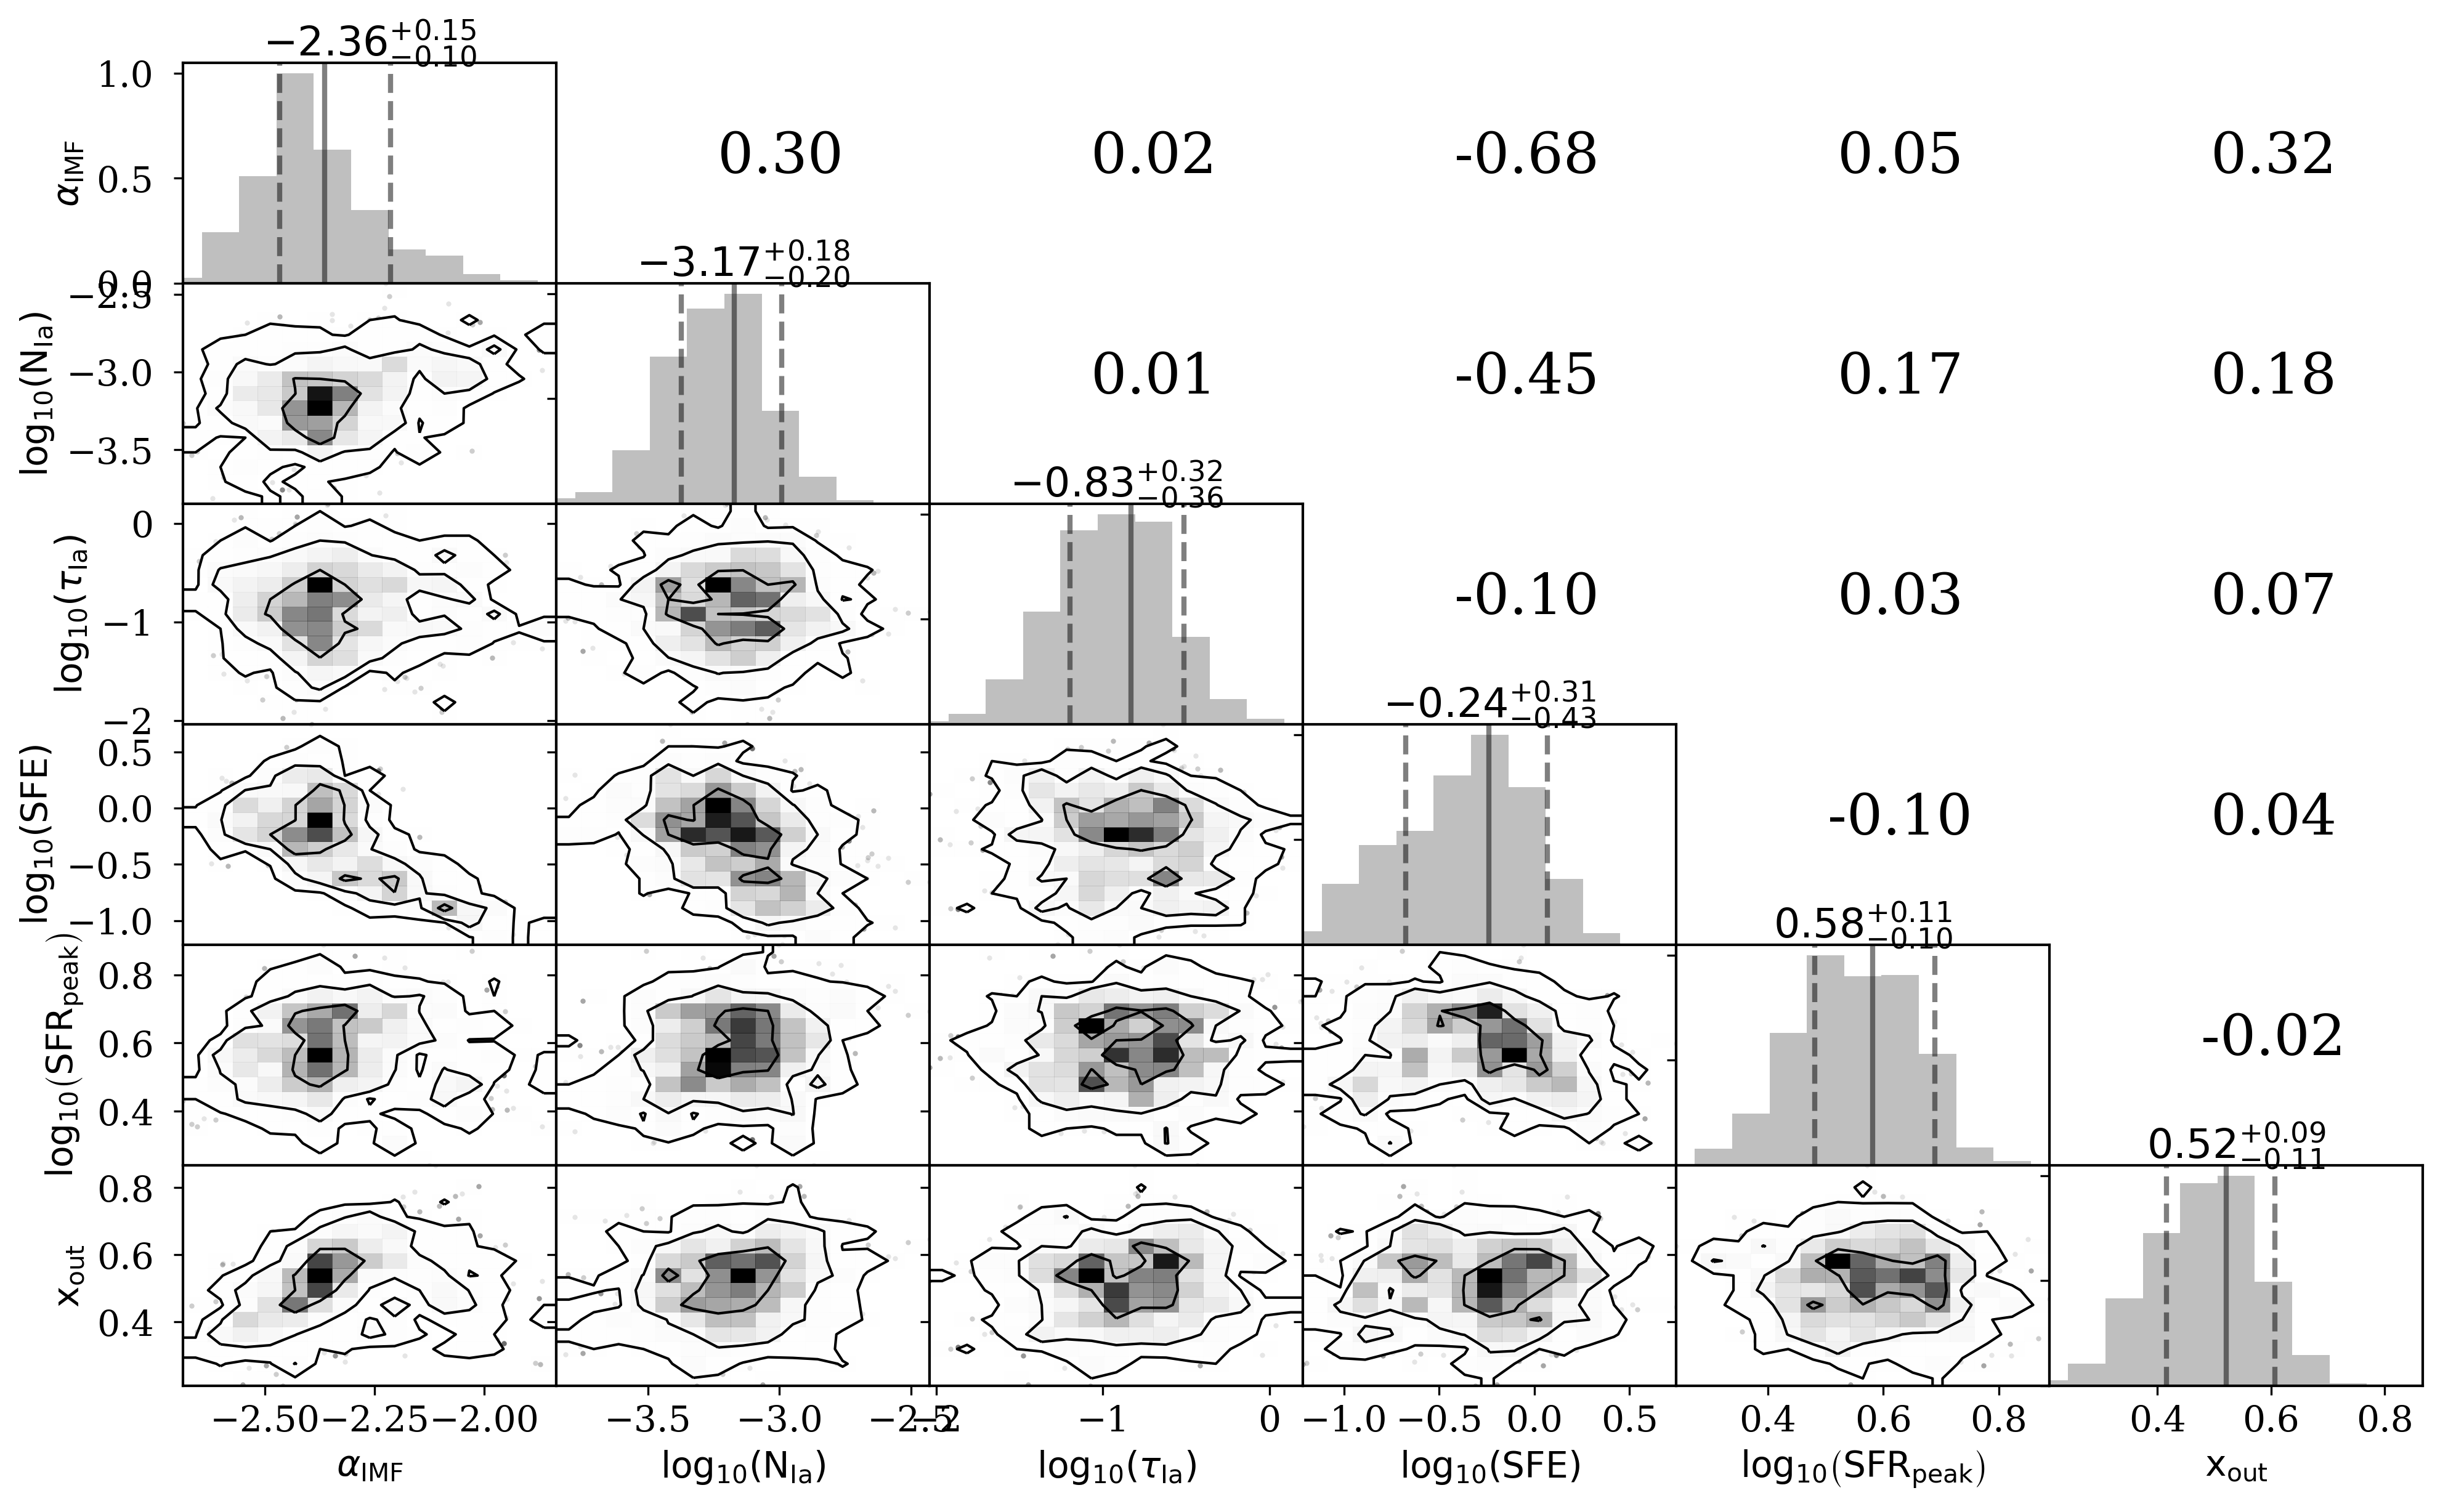

In [9]:


# This function shows MCMC convergence plots and restructures the chain (flattens it and throws out burn-in)

from Chempy.plot_mcmc import restructure_chain
restructure_chain('mcmc/', a.parameter_names)



# Corner plot of the posterior distribution in comparison to the Prior
from Chempy.plot_mcmc import plot_mcmc_chain
plot_mcmc_chain('mcmc/', use_scale = False)



[-2.36066285 -3.30367781 -0.69647525 -0.13660361  0.59964276  0.52646762]


/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


model_temp/  already exists. Content might be overwritten
l:  -178.3033845791417 pr:  -2.08966278543 po:  -180.393047365
-0.0535923640721
0.174673610123
0.351004573167
0.0573099408465
0.202347236144
0.243945330403
0.217405421565
0.0225738150351
-0.142171077493
0.102406712563
0.00830082617239
0.220469134725
0.0046011874992
-0.159056520125
0.064190770138
-0.143661558218
-0.234846019896
0.0847455928738


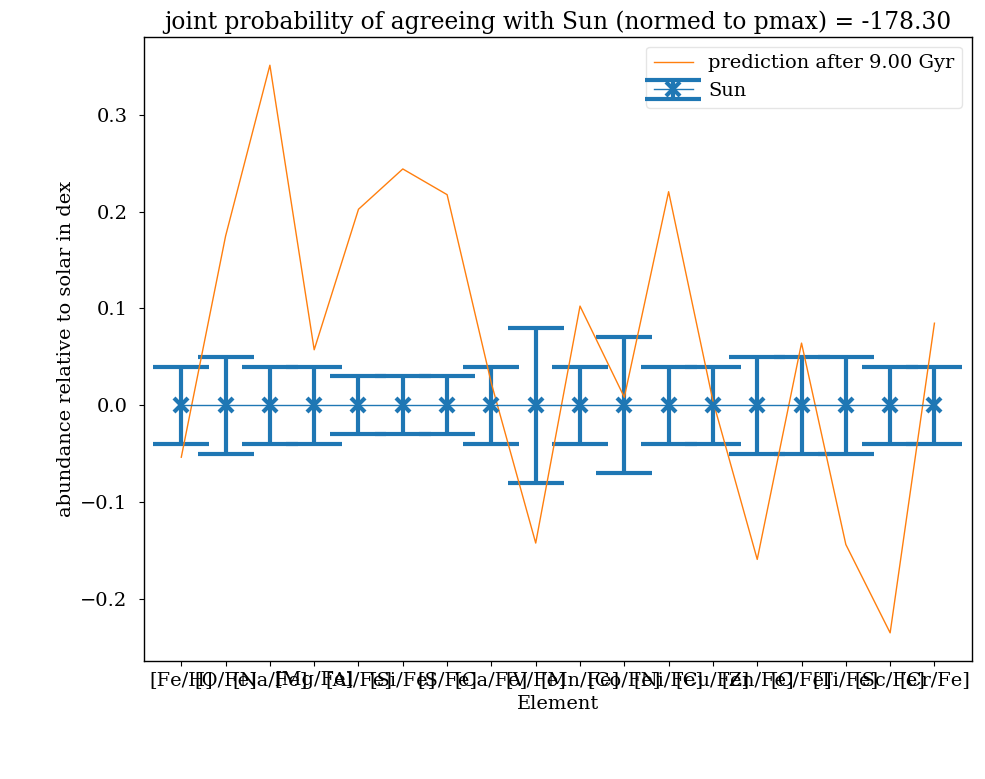

In [10]:
# run best posterior model
best_p0 = np.load('mcmc/best_parameter_values.npy')
a.testing_output = True
a.summary_pdf = True
posterior, blobs = cem(best_p0[0],a)

y = np.load('model_temp/blobs_name_list.npy')
el_names_result = list(y[:18])
result_array = np.zeros(len(el_names_result))
z = np.load('model_temp/Chempy_default_abundances.npy')
# The timestep where sun is formed
idx = np.where(z['time']==9)[0][0]

for i,item in enumerate(el_names_result):
    if item != 'Fe':
        print(z[idx][item]-z[idx]['Fe'])
        result_array[i] = z[idx][item]-z[idx]['Fe']
    else:
        print(z[idx][item])
        result_array[i] = z[idx][item]

np.save('mcmc/best_posterior_blobs',result_array)
np.save('mcmc/blobs_elements', el_names_result)
# blobs are doing something wrong
#x = np.load('mcmc/blobs_max.npy')
#print(x)

0
[-2.42359088 -3.24631126 -1.23695526  0.02216343  0.56923192  0.47359585]


/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


model_temp/  already exists. Content might be overwritten
l:  -156.39455164264163 pr:  -3.1440119752 po:  -159.538563618
1
[-2.52958307 -3.33059213 -0.13299449 -0.01964091  0.49310376  0.39461415]
model_temp/  already exists. Content might be overwritten
l:  -149.6720839813842 pr:  -5.79101896116 po:  -155.463102943
2
[-2.35514253 -3.41459483 -0.60598454 -0.08942136  0.59008026  0.55747033]
model_temp/  already exists. Content might be overwritten
l:  -197.26150353463856 pr:  -3.17164302086 po:  -200.433146555
3
[-2.38464442 -3.27428392 -1.28716954  0.26827991  0.43378956  0.52215699]
model_temp/  already exists. Content might be overwritten
l:  -160.2076979876095 pr:  -5.37931509658 po:  -165.587013084
4
[-1.98631374 -3.07316419 -0.41164161 -0.859345    0.66733661  0.60218336]
model_temp/  already exists. Content might be overwritten
l:  -228.72650531357243 pr:  -4.91337280007 po:  -233.639878114
5
[-2.44272905 -3.19828907 -0.76042851 -0.21791294  0.52986354  0.47706657]
model_temp/  

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])


model_temp/  already exists. Content might be overwritten
l:  -200.16951003224023 pr:  -4.8440202267 po:  -205.013530259
14
[-2.39648896 -3.25353398 -1.0631052  -0.48690606  0.65234164  0.39207009]
model_temp/  already exists. Content might be overwritten
l:  -172.53089310421973 pr:  -3.14510502058 po:  -175.675998125
15
[-2.43164841 -3.25013673 -0.63430983 -0.16003889  0.55782688  0.50905528]
model_temp/  already exists. Content might be overwritten
l:  -157.46691680473938 pr:  -1.75444288663 po:  -159.221359691
16
[-2.31931302 -2.84465597 -0.5215217   0.00664146  0.62692573  0.63624361]
model_temp/  already exists. Content might be overwritten
l:  -162.56296930126283 pr:  -2.22906052882 po:  -164.79202983
17
[-2.31252709 -3.3049115  -0.69802224  0.06230649  0.62519536  0.60308598]
model_temp/  already exists. Content might be overwritten
l:  -193.9801411906048 pr:  -3.31265945771 po:  -197.292800648
18
[-2.37709901 -3.3299047  -0.02316816 -0.06446185  0.47511388  0.58497372]
model_te

/home/rybizki/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


l:  -167.9270902706633 pr:  -1.78420549343 po:  -169.711295764
20
[-2.34961873 -3.3140085  -0.95242039 -0.46884973  0.54255886  0.55435423]
model_temp/  already exists. Content might be overwritten
l:  -182.97819105245463 pr:  -2.21887548318 po:  -185.197066536
21
[-2.28217922 -3.11647965 -1.13800573 -0.73863368  0.44992792  0.55083451]
model_temp/  already exists. Content might be overwritten
l:  -218.4551891347304 pr:  -3.0814411623 po:  -221.536630297
22
[-2.41109611 -3.46367676 -0.95626241  0.22681492  0.45674794  0.54891646]
model_temp/  already exists. Content might be overwritten
l:  -181.17970721319278 pr:  -5.13015375335 po:  -186.309860967
23
[-2.3543963  -3.28648527 -0.96747267 -0.49820662  0.58530091  0.48342023]
model_temp/  already exists. Content might be overwritten
l:  -179.12373630241004 pr:  -2.06554305186 po:  -181.189279354
24
[-2.5343412  -3.5875567  -0.93316369  0.05506979  0.50803967  0.38474495]
model_temp/  already exists. Content might be overwritten
l:  -174

/home/rybizki/extra_package/lib/python3.6/site-packages/Chempy/time_integration.py:275: RuntimeWarning: invalid value encountered in double_scalars
  self.gas_reservoir['Z'][index] = self.gas_reservoir['Z'][index] / float(self.gas_reservoir['gas'][index])



gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
gas reservoir is empty
model_temp/  already exists. Content might be overwritten
l:  -200.08742193055124 pr:  -4.12654505067 po:  -204.213966981
38
[-2.44884617 -3.28381483 -1.05167395 -0.28197478  0.68404819  0.26683717]
model_temp/  already exists. Content might be overwritten
l:  -160.72179297760013 pr:  -5.67656979071 po:  -166.398362768
39
[-2.19661756 -3.00057897 -0.56211305 -0.6269505   0.6272881   0.65417692]
model_temp/  already exists. Content might be overwritten
l:  -199.66442344606173 pr:  -2.8036685827 po:  -202.468092029
40
[-2.29186391 -3.40058813 -0.74111866 -0.28599926  0.68122414  0.53748501]
model_temp/  already exists. Content might be overwritten
l:  -213.1823043232816 pr:  -3.3034347643 po:  -216.485739088
41
[-2.33701163 -3.47229337 -1.27411753 -0.2822704   0.73924982  0.39233373]
model_temp/  already exists. Content might be overwritten
l:  -221.17904957471836 pr:  -6.52692782942 po:  -227.70

model_temp/  already exists. Content might be overwritten
l:  -187.49599286605707 pr:  -2.3444408745 po:  -189.840433741
78
[-2.39484261 -3.04079175 -1.22398589  0.21283307  0.6058225   0.53469435]
model_temp/  already exists. Content might be overwritten
l:  -149.1176204641401 pr:  -3.1955299575 po:  -152.313150422
79
[-2.35882778 -3.21010298 -0.72509752  0.58021544  0.37915114  0.63653121]
too few gas requested infall needed=  0.0190859029816 gas there =  4.83127559562e-06 total SFR =  [  4.29728497e-05   3.63084804e-02   5.89303373e-02   7.17349904e-02
   7.76194640e-02   7.87374799e-02   7.66767356e-02   7.25957611e-02
   6.73292952e-02   6.14691842e-02   5.54262885e-02   4.94776816e-02
   4.38024861e-02   3.85089543e-02   3.36548196e-02   2.92624948e-02
   2.53303348e-02   2.18409099e-02   1.87670137e-02   1.60759677e-02
   1.37326508e-02   1.17015808e-02   9.94829784e-03   8.44023993e-03
   7.14725137e-03   6.04183251e-03   5.09920979e-03   4.29728497e-03] gas needed =  0.0190907

too few gas requested infall needed=  0.00547397700517 gas there =  0.00439358189575 total SFR =  [  4.29728497e-05   3.63084804e-02   5.89303373e-02   7.17349904e-02
   7.76194640e-02   7.87374799e-02   7.66767356e-02   7.25957611e-02
   6.73292952e-02   6.14691842e-02   5.54262885e-02   4.94776816e-02
   4.38024861e-02   3.85089543e-02   3.36548196e-02   2.92624948e-02
   2.53303348e-02   2.18409099e-02   1.87670137e-02   1.60759677e-02
   1.37326508e-02   1.17015808e-02   9.94829784e-03   8.44023993e-03
   7.14725137e-03   6.04183251e-03   5.09920979e-03   4.29728497e-03] gas needed =  0.00986755884619 corona =  1.37168399639 sfe =  1.90189021905 dt =  0.5
too few gas requested infall needed=  0.00466543390259 gas there =  0.00378719264797 total SFR =  [  4.29728497e-05   3.63084804e-02   5.89303373e-02   7.17349904e-02
   7.76194640e-02   7.87374799e-02   7.66767356e-02   7.25957611e-02
   6.73292952e-02   6.14691842e-02   5.54262885e-02   4.94776816e-02
   4.38024861e-02   3.85089

model_temp/  already exists. Content might be overwritten
l:  -150.93915070642714 pr:  -4.53095845334 po:  -155.47010916
88
[-2.52026    -3.18251564 -0.57707545  0.01063052  0.67805702  0.49629794]
model_temp/  already exists. Content might be overwritten
l:  -173.87174161664322 pr:  -2.94156481448 po:  -176.813306431
89
[-2.24477322 -2.73534902 -1.07200579 -0.63844735  0.75170248  0.53449482]
model_temp/  already exists. Content might be overwritten
l:  -225.2405712809149 pr:  -3.15923589458 po:  -228.399807175
90
[-2.26864506 -3.11139491 -1.19548049 -0.52745249  0.67559457  0.57179341]
model_temp/  already exists. Content might be overwritten
l:  -183.4975532671278 pr:  -2.93379701177 po:  -186.431350279
91
[-2.32469479 -3.3359637  -1.32366433 -0.64589447  0.55907256  0.34479076]
model_temp/  already exists. Content might be overwritten
l:  -185.69839380530087 pr:  -5.30766991294 po:  -191.006063718
92
[-2.57910561 -3.19288886 -0.60066828 -0.05453148  0.55040592  0.36505422]
model_te

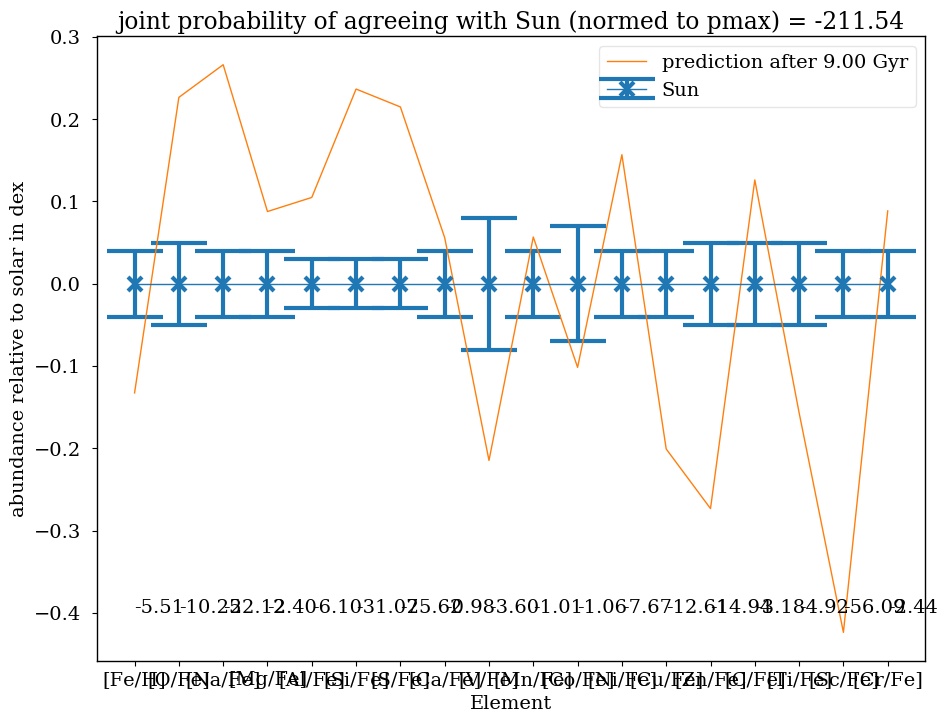

In [11]:
t = np.load('mcmc/positions_for_plotting.npy')
result_array = np.zeros(shape = (len(t),len(el_names_result)))

for j in range(len(t)):
    print(j)
    posterior, blobs = cem(t[j],a)

    y = np.load('model_temp/blobs_name_list.npy')
    el_names_result = list(y[:18])
    z = np.load('model_temp/Chempy_default_abundances.npy')
    # The timestep where sun is formed
    idx = np.where(z['time']==9)[0][0]

    for i,item in enumerate(el_names_result):
        if item != 'Fe':
            #print(z[idx][item]-z[idx]['Fe'])
            result_array[j][i] = z[idx][item]-z[idx]['Fe']
        else:
            #print(z[idx][item])
            result_array[j][i] = z[idx][item]

np.save('mcmc/posterior_100_blobs',result_array)
np.save('mcmc/blobs_elements', el_names_result)

In [12]:
np.median(result_array, axis = 0)

array([-0.0523694 ,  0.14124798,  0.270321  ,  0.0259453 ,  0.11384539,
        0.21571736,  0.19014242,  0.00883028, -0.16723689,  0.1106054 ,
       -0.06394601,  0.21656103, -0.10756046, -0.25136813,  0.05757688,
       -0.17631813, -0.34388004,  0.07789504])

In [13]:
np.std(result_array, axis = 0)

array([ 0.06197327,  0.07958466,  0.07845643,  0.07041198,  0.08147466,
        0.03700939,  0.03990789,  0.04411412,  0.02841649,  0.03927568,
        0.06060708,  0.02527946,  0.10607713,  0.07967745,  0.06783523,
        0.04299904,  0.101276  ,  0.01031164])

In [14]:
import shutil
# copy the results into a separate folder
shutil.copytree('mcmc/','../data/mcmc_%s' %(star_name))
shutil.copytree('model_temp/','../data/mcmc_%s/model_temp' %(star_name))
shutil.rmtree('mcmc/')
shutil.rmtree('model_temp/')